In [1]:
!pip install librosa

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import librosa
audio_file_path='/content/drive/MyDrive/archive/fold5/100263-2-0-3.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [3]:
print(librosa_audio_data)

[ 0.00331575  0.00467553  0.00361099 ... -0.00376796 -0.00347471
 -0.00357828]


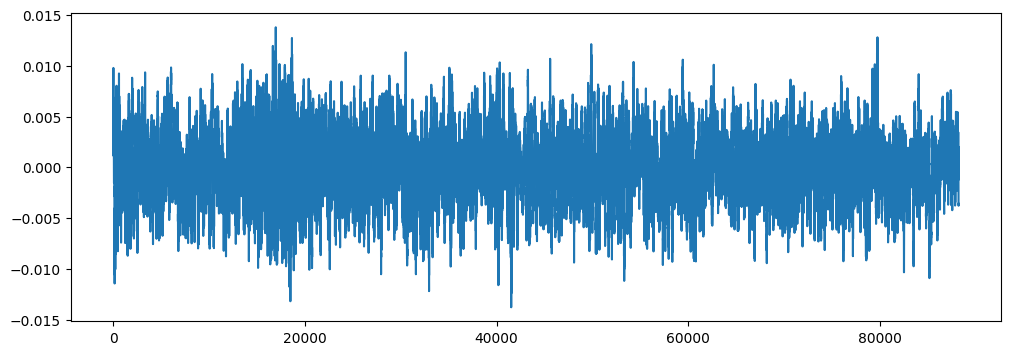

In [4]:
import matplotlib.pyplot as plt
# Original audio with 1 channel
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [5]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [6]:
mfccs

array([[-4.74862762e+02, -4.50886139e+02, -4.49053375e+02, ...,
        -4.76761566e+02, -4.73348724e+02, -4.90852692e+02],
       [ 1.15302643e+02,  1.11442474e+02,  1.11252258e+02, ...,
         1.11125000e+02,  1.10579697e+02,  1.02991508e+02],
       [-1.83261414e+01, -2.46824512e+01, -3.02597752e+01, ...,
        -8.23575592e+00, -9.06652164e+00, -4.50194788e+00],
       ...,
       [-2.87604141e+00, -3.24798346e+00, -4.89655733e+00, ...,
        -5.20241737e-01,  3.56725693e+00,  7.49375820e+00],
       [-4.29682910e-01, -5.88385940e-01, -8.17236423e-01, ...,
         1.83409363e-01,  7.67328501e-01,  2.71199870e+00],
       [-1.17806602e+00,  6.98093891e-01,  6.35215521e+00, ...,
        -2.62220001e+00, -4.79127598e+00, -3.18263483e+00]], dtype=float32)

In [7]:
import pandas as pd
import os
import librosa

audio_dataset_path='/content/drive/MyDrive/archive'
metadata=pd.read_csv('/content/drive/MyDrive/archive/UrbanSound8K.csv')
metadata.head()
import os

audio_dataset_path = '/content/drive/MyDrive/archive'
# Check the files in each fold
for i in range(1, 11):  # Assuming you have folds 1 to 10
    print(f"Files in fold {i}:")
    fold_path = os.path.join(audio_dataset_path, f'fold{i}')
    if os.path.exists(fold_path):
        files = os.listdir(fold_path)
        print(files)  # List all files in this fold
    else:
        print(f"Fold {i} path does not exist.")


Files in fold 1:
['101415-3-0-2.wav', '101415-3-0-3.wav', '102842-3-1-0.wav', '102842-3-0-1.wav', '102106-3-0-0.wav', '102842-3-1-5.wav', '102305-6-0-0.wav', '101415-3-0-8.wav', '102842-3-1-6.wav', '103074-7-2-0.wav', '105415-2-0-1.wav', '105415-2-0-21.wav', '105415-2-0-15.wav', '105415-2-0-4.wav', '105415-2-0-6.wav', '105415-2-0-19.wav', '105415-2-0-24.wav', '108041-9-0-2.wav', '106905-8-0-2.wav', '108041-9-0-9.wav', '106905-8-0-1.wav', '108041-9-0-6.wav', '106905-8-0-3.wav', '108041-9-0-11.wav', '108041-9-0-7.wav', '108041-9-0-5.wav', '106905-8-0-0.wav', '105415-2-0-8.wav', '108041-9-0-4.wav', '114587-3-0-4.wav', '114587-3-0-2.wav', '114587-3-0-5.wav', '118101-3-0-3.wav', '118101-3-0-6.wav', '118279-8-0-12.wav', '118101-3-0-0.wav', '118279-8-0-3.wav', '118279-8-0-11.wav', '114587-3-0-7.wav', '118279-8-0-14.wav', '118279-8-0-2.wav', '118101-3-0-4.wav', '118279-8-0-1.wav', '118279-8-0-10.wav', '118279-8-0-0.wav', '118279-8-0-13.wav', '118279-8-0-4.wav', '118279-8-0-6.wav', '118279-8-0-

In [8]:
def features_extractor(file):
    import resampy # Import resampy within the function
    audio, sample_rate = librosa.load(file_name,sr=None, res_type='kaiser_fast') # Use the 'file' parameter instead of file_name
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features



In [ ]:
import pandas as pd
import os
import numpy as np
import librosa
from tqdm import tqdm

# Mount Google Drive to access your dataset

# Define the dataset path and load metadata
audio_dataset_path = '/content/drive/MyDrive/archive'
metadata = pd.read_csv('/content/drive/MyDrive/archive/UrbanSound8K.csv')

# Display the first few rows of metadata
print(metadata.head())

# Define the feature extraction function
def features_extractor(file_name):
    try:
        # Load the audio file
        audio, sample_rate = librosa.load(file_name, sr=None, res_type='kaiser_fast')
        # Extract MFCC features
        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        # Scale the features
        mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
        return mfccs_scaled_features
    except Exception as e:
        print(f"Error extracting features from {file_name}: {e}")
        return None  # Return None if there is an error

# Initialize an empty list for extracted features
extracted_features = []

# Iterate through every audio file and extract features
for index_num, row in tqdm(metadata.iterrows(), total=len(metadata)):
    # Construct the file path
    file_name = os.path.join(audio_dataset_path, 'fold' + str(row["fold"]), str(row["slice_file_name"]))
    final_class_labels = row["class"]

    # Print the constructed file path for debugging
    print(f"Constructed file path: {file_name}")

    # Check if the file exists before extracting features
    if os.path.exists(file_name):
        data = features_extractor(file_name)
        if data is not None:
            extracted_features.append([data, final_class_labels])
        else:
            print(f"Failed to extract features from: {file_name}")
    else:
        print(f"File does not exist: {file_name}")  # Log missing files

# After processing, check how many features were extracted
print(f"Total extracted features: {len(extracted_features)}")


      slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing  


  0%|          | 3/8732 [00:00<07:53, 18.45it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100032-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100263-2-0-117.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100263-2-0-121.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100263-2-0-126.wav


  0%|          | 7/8732 [00:00<08:35, 16.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100263-2-0-137.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100263-2-0-143.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100263-2-0-161.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100263-2-0-3.wav


  0%|          | 13/8732 [00:00<06:09, 23.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100263-2-0-36.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/100648-1-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/100648-1-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/100648-1-2-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/100648-1-3-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/100648-1-4-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/100652-3-0-0.wav


  0%|          | 16/8732 [00:00<06:18, 23.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/100652-3-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/100652-3-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/100652-3-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/100795-3-0-0.wav


  0%|          | 22/8732 [00:01<06:57, 20.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/100795-3-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/100795-3-1-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/100795-3-1-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-0.wav


  0%|          | 25/8732 [00:01<07:37, 19.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-12.wav


  0%|          | 29/8732 [00:01<08:13, 17.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-14.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-15.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-16.wav


  0%|          | 34/8732 [00:01<08:01, 18.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-17.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-18.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-19.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-2.wav


  0%|          | 38/8732 [00:02<08:11, 17.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-20.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-21.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-22.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-23.wav


  0%|          | 42/8732 [00:02<08:08, 17.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-24.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-25.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-26.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-27.wav


  1%|          | 47/8732 [00:02<07:36, 19.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-28.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-29.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-30.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-4.wav


  1%|          | 49/8732 [00:02<07:46, 18.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-7.wav


  1%|          | 53/8732 [00:02<09:01, 16.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/101281-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/101281-3-0-14.wav


  1%|          | 57/8732 [00:03<08:36, 16.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/101281-3-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/101382-2-0-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/101382-2-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/101382-2-0-20.wav


  1%|          | 61/8732 [00:03<09:16, 15.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/101382-2-0-21.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/101382-2-0-29.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/101382-2-0-33.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/101382-2-0-42.wav


  1%|          | 66/8732 [00:03<07:52, 18.35it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/101382-2-0-45.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/101415-3-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/101415-3-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/101415-3-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-1.wav


  1%|          | 70/8732 [00:03<08:01, 18.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-14.wav


  1%|          | 74/8732 [00:04<08:18, 17.35it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-16.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-17.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-18.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-19.wav


  1%|          | 78/8732 [00:04<08:18, 17.36it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-21.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-22.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-23.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-24.wav


  1%|          | 82/8732 [00:04<08:31, 16.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-26.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-28.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-29.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-3.wav


  1%|          | 86/8732 [00:04<09:33, 15.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-32.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-33.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-36.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-37.wav


  1%|          | 92/8732 [00:05<07:15, 19.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-38.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-39.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-40.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-9.wav


  1%|          | 100/8732 [00:05<05:14, 27.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/101848-9-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/101848-9-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/101848-9-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/101848-9-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/101848-9-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/101848-9-0-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/102102-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/102103-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/102103-3-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/102104-3-0-0.wav


  1%|▏         | 111/8732 [00:05<03:43, 38.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/102105-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/102106-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/102305-6-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/102547-3-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/102547-3-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/102547-3-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/102842-3-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/102842-3-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/102842-3-1-5.wav


  1%|▏         | 119/8732 [00:05<03:49, 37.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/102842-3-1-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/102853-8-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/102853-8-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/102853-8-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/102853-8-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/102853-8-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/102853-8-0-5.wav


  1%|▏         | 127/8732 [00:06<03:53, 36.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/102853-8-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/102853-8-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-13.wav


  2%|▏         | 131/8732 [00:06<03:51, 37.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-14.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-15.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-16.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-17.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-18.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-19.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-2.wav


  2%|▏         | 139/8732 [00:06<04:04, 35.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-20.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-21.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-22.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-23.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-24.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-25.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-26.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-27.wav


  2%|▏         | 147/8732 [00:06<03:57, 36.22it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-28.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-29.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-30.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-7.wav


  2%|▏         | 155/8732 [00:06<03:53, 36.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/102858-5-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/102858-5-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/102871-8-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/102871-8-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/102871-8-0-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/102871-8-0-11.wav


  2%|▏         | 163/8732 [00:06<03:47, 37.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/102871-8-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/102871-8-0-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/102871-8-0-14.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/102871-8-0-15.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/102871-8-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/102871-8-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/102871-8-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/102871-8-0-5.wav


  2%|▏         | 171/8732 [00:07<03:56, 36.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/102871-8-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/102871-8-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/102871-8-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/102871-8-0-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/103074-7-0-0.wav
File does not exist: /content/drive/MyDrive/archive/fold1/103074-7-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/103074-7-0-1.wav
File does not exist: /content/drive/MyDrive/archive/fold1/103074-7-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/103074-7-0-2.wav
File does not exist: /content/drive/MyDrive/archive/fold1/103074-7-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/103074-7-1-0.wav
File does not exist: /content/drive/MyDrive/archive/fold1/103074-7-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/103074-7-1-1.wav
File do

  2%|▏         | 197/8732 [00:07<01:29, 95.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-2-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-2-1.wav


  2%|▏         | 207/8732 [00:07<02:20, 60.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-2-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-2-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-2-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-2-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-2-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-2-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-2-6.wav


  2%|▏         | 215/8732 [00:07<02:45, 51.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-2-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-2-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-2-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-4-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-6-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-7-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-10.wav


  3%|▎         | 222/8732 [00:08<03:03, 46.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-14.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-15.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-16.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-17.wav


  3%|▎         | 228/8732 [00:08<03:27, 40.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-18.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-19.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-5.wav


  3%|▎         | 238/8732 [00:08<03:40, 38.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/103258-5-0-0.wav
File does not exist: /content/drive/MyDrive/archive/fold1/103258-5-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/103258-5-0-1.wav
File does not exist: /content/drive/MyDrive/archive/fold1/103258-5-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/103258-5-0-10.wav
File does not exist: /content/drive/MyDrive/archive/fold1/103258-5-0-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/103258-5-0-11.wav
File does not exist: /content/drive/MyDrive/archive/fold1/103258-5-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/103258-5-0-12.wav
Fi

  3%|▎         | 269/8732 [00:08<02:17, 61.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/103438-5-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/103438-5-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/104327-2-0-15.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/104327-2-0-19.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/104327-2-0-26.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/104327-2-0-28.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/104327-2-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/104327-2-0-30.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/104327-2-0-34.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/104327-2-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104421-2-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104421-2-0-15.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104421-

  3%|▎         | 277/8732 [00:09<02:41, 52.28it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104421-2-1-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/104625-4-0-15.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/104625-4-0-21.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/104625-4-0-27.wav


  3%|▎         | 283/8732 [00:09<03:43, 37.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/104625-4-0-29.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/104625-4-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/104625-4-0-35.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/104625-4-0-40.wav


  3%|▎         | 288/8732 [00:09<04:31, 31.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/104625-4-0-41.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/104625-4-0-45.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/104625-4-0-48.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/104625-4-0-51.wav


  3%|▎         | 292/8732 [00:09<05:04, 27.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/104625-4-0-52.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/104625-4-0-53.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/104625-4-0-55.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/104625-4-0-57.wav


  3%|▎         | 296/8732 [00:10<05:36, 25.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/104625-4-0-66.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/104625-4-1-20.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/104625-4-1-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/104817-4-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/104817-4-0-1.wav


  3%|▎         | 303/8732 [00:10<05:24, 25.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/104817-4-0-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/104817-4-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/104817-4-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/104817-4-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/104817-4-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/104817-4-0-5.wav


  4%|▎         | 307/8732 [00:10<05:13, 26.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/104817-4-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/104817-4-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/104817-4-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/104817-4-0-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-10-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-10-10.wav


  4%|▎         | 315/8732 [00:10<04:31, 30.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-10-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-10-15.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-10-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-10-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-11-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-11-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-12-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-14-1.wav


  4%|▎         | 323/8732 [00:10<04:05, 34.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-14-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-14-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-15-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-15-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-15-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-15-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-16-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-16-10.wav


  4%|▍         | 335/8732 [00:11<03:44, 37.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-16-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-16-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-16-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-16-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-17-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-17-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-17-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-17-14.wav


  4%|▍         | 339/8732 [00:11<03:53, 35.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-17-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-17-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-17-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-18-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-18-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-18-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-18-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-19-0.wav


  4%|▍         | 347/8732 [00:11<03:45, 37.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-19-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-19-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-19-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-19-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-19-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-2-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-2-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-2-6.wav


  4%|▍         | 356/8732 [00:11<03:41, 37.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-3-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-7-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-7-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-7-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-7-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-7-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-8-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-8-14.wav


  4%|▍         | 364/8732 [00:12<03:37, 38.42it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-8-15.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-8-17.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-8-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-8-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-8-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-9-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-9-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-9-9.wav


  4%|▍         | 372/8732 [00:12<03:48, 36.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-1-0.wav


  4%|▍         | 380/8732 [00:12<03:46, 36.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-1-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-1-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-1-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-1-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-1-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-1-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-1-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-1-4.wav


  4%|▍         | 388/8732 [00:12<03:43, 37.38it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-1-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-1-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-1-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-1-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-1-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-2-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-2-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-2-10.wav


  5%|▍         | 396/8732 [00:12<03:36, 38.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-2-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-2-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-2-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-2-14.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-2-15.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-2-16.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-2-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-2-3.wav


  5%|▍         | 404/8732 [00:13<03:37, 38.27it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-2-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-2-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-2-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-2-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-2-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-2-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-3-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-3-1.wav


  5%|▍         | 413/8732 [00:13<03:33, 38.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-3-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-3-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-3-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-3-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-3-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-3-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-4-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-4-1.wav


  5%|▍         | 421/8732 [00:13<03:41, 37.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-4-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-4-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105088-3-0-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105088-3-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105088-3-0-19.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/105088-3-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-0-1.wav


  5%|▍         | 429/8732 [00:13<03:48, 36.31it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-1-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-1-2.wav


  5%|▌         | 437/8732 [00:14<03:40, 37.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-1-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-1-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-2-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-2-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-2-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-2-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-2-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-2-5.wav


  5%|▌         | 445/8732 [00:14<03:55, 35.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-2-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-2-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/105319-3-0-22.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/105319-3-0-29.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/105319-3-0-39.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/105415-2-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/105415-2-0-15.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/105415-2-0-19.wav


  5%|▌         | 453/8732 [00:14<03:58, 34.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/105415-2-0-21.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/105415-2-0-24.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/105415-2-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/105415-2-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/105415-2-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/105425-9-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/105425-9-0-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/105425-9-0-12.wav


  5%|▌         | 457/8732 [00:14<03:56, 34.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/105425-9-0-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/105425-9-0-14.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/105425-9-0-23.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/106014-5-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/106014-5-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/106014-5-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/106014-5-0-3.wav


  5%|▌         | 466/8732 [00:14<03:46, 36.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/106014-5-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-14.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-15.wav


  5%|▌         | 470/8732 [00:14<03:47, 36.31it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-16.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-17.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-18.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-19.wav


  5%|▌         | 478/8732 [00:15<05:10, 26.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-20.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-5.wav


  6%|▌         | 481/8732 [00:15<05:22, 25.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/106486-5-0-0.wav


  6%|▌         | 487/8732 [00:15<06:22, 21.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/106486-5-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/106486-5-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/106487-5-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/106487-5-0-1.wav


  6%|▌         | 490/8732 [00:15<06:27, 21.25it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/106487-5-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/106905-5-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/106905-5-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/106905-5-0-2.wav


  6%|▌         | 493/8732 [00:16<07:01, 19.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/106905-8-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/106905-8-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/106905-8-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/106905-8-0-3.wav


  6%|▌         | 499/8732 [00:16<06:39, 20.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/106955-6-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/107090-1-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/107090-1-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/107190-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/107228-5-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/107228-5-0-1.wav


  6%|▌         | 505/8732 [00:16<06:47, 20.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/107228-5-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/107228-5-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/107228-5-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/107228-5-0-5.wav


  6%|▌         | 508/8732 [00:16<07:19, 18.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/107228-5-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/107228-5-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-0-1.wav


  6%|▌         | 512/8732 [00:17<07:54, 17.32it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-0-5.wav


  6%|▌         | 516/8732 [00:17<07:53, 17.37it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-0.wav


  6%|▌         | 521/8732 [00:17<07:26, 18.39it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-12.wav


  6%|▌         | 526/8732 [00:17<07:02, 19.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-14.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-15.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-16.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-17.wav


  6%|▌         | 530/8732 [00:18<07:06, 19.21it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-18.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-4.wav


  6%|▌         | 534/8732 [00:18<07:16, 18.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-8.wav


  6%|▌         | 539/8732 [00:18<06:57, 19.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/107653-9-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/107653-9-0-14.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/107653-9-0-18.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/107653-9-0-3.wav


  6%|▌         | 543/8732 [00:18<07:41, 17.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/107653-9-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/107653-9-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/107842-4-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/107842-4-0-1.wav


  6%|▌         | 545/8732 [00:18<08:21, 16.33it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/107842-4-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/107842-4-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/107842-4-2-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/107842-4-2-1.wav


  6%|▋         | 550/8732 [00:19<08:32, 15.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/107842-4-2-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/107842-4-2-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/107842-4-2-4.wav


  6%|▋         | 554/8732 [00:19<09:02, 15.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/107842-4-3-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/108041-9-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/108041-9-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/108041-9-0-4.wav


  6%|▋         | 556/8732 [00:19<09:31, 14.31it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/108041-9-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/108041-9-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/108041-9-0-7.wav


  6%|▋         | 558/8732 [00:19<10:35, 12.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/108041-9-0-9.wav


  6%|▋         | 564/8732 [00:22<28:25,  4.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/108187-3-2-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/108187-3-3-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/108187-3-4-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/108187-3-6-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/108357-9-0-15.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/108357-9-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/108357-9-0-27.wav

  7%|▋         | 579/8732 [00:22<08:05, 16.79it/s]


Constructed file path: /content/drive/MyDrive/archive/fold5/108357-9-0-30.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/108357-9-0-44.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/108357-9-0-49.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/108362-2-0-11.wav
File does not exist: /content/drive/MyDrive/archive/fold1/108362-2-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/108362-2-0-12.wav
File does not exist: /content/drive/MyDrive/archive/fold1/108362-2-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/108362-2-0-21.wav
File does not exist: /content/drive/MyDrive/archive/fold1/108362-2-0-21.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/108362-2-0-23.wav
File does not exist: /content/drive/MyDrive/archive/fold1/108362-2-0-23.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/108362-2-0-29.wav
File does not exist: /content/drive/MyDrive/archive/fold1/108362-2-0-29

  7%|▋         | 584/8732 [00:22<06:48, 19.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/108638-9-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/108638-9-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/108638-9-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/109233-3-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/109233-3-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/109233-3-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/109233-3-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/109263-9-0-34.wav


  7%|▋         | 593/8732 [00:22<05:30, 24.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/109263-9-0-39.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/109263-9-0-54.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/109263-9-0-61.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/109263-9-0-78.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/109703-2-0-134.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/109703-2-0-14.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/109703-2-0-153.wav


  7%|▋         | 601/8732 [00:22<04:54, 27.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/109703-2-0-29.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/109703-2-0-32.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/109703-2-0-48.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/109703-2-0-50.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/109711-3-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/109711-3-2-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/109711-3-2-6.wav


  7%|▋         | 610/8732 [00:23<04:11, 32.25it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/110134-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/110371-3-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/110371-3-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/110371-3-1-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/110389-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/110621-7-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/110621-7-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/110621-7-0-2.wav


  7%|▋         | 615/8732 [00:23<03:55, 34.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/110621-7-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/110622-6-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/110688-3-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/110688-3-0-17.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/110688-3-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/110688-3-0-32.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/110868-9-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/110868-9-0-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/110868-9-0-14.wav


  7%|▋         | 623/8732 [00:23<03:50, 35.23it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/110868-9-0-15.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/110868-9-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/110868-9-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/110918-3-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/110918-3-0-26.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/110918-3-0-40.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/110918-3-0-9.wav


  7%|▋         | 631/8732 [00:23<03:53, 34.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/111048-6-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-0-6.wav


  7%|▋         | 639/8732 [00:24<03:54, 34.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-1-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-1-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-1-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-1-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-1-13.wav


  7%|▋         | 647/8732 [00:24<03:43, 36.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-1-14.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-1-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-1-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-1-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-1-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-1-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-1-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-1-8.wav


  8%|▊         | 655/8732 [00:24<03:44, 35.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-1-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-14.wav


  8%|▊         | 663/8732 [00:24<03:57, 33.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-15.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-16.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-17.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-18.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-19.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-20.wav


  8%|▊         | 671/8732 [00:24<03:47, 35.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-21.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-22.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-8.wav


  8%|▊         | 675/8732 [00:25<04:03, 33.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/112075-5-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/112075-5-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/112075-5-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/112195-3-0-38.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/112195-3-0-48.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/112195-3-0-57.wav


  8%|▊         | 683/8732 [00:25<04:18, 31.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/112195-3-0-80.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/113160-8-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/113201-5-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/113201-5-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/113201-5-0-2.wav


  8%|▊         | 687/8732 [00:25<05:12, 25.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/113201-5-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/113201-5-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/113201-5-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/113201-5-0-6.wav


  8%|▊         | 690/8732 [00:25<05:55, 22.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/113201-5-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-10.wav


  8%|▊         | 693/8732 [00:25<06:24, 20.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-14.wav


  8%|▊         | 699/8732 [00:26<06:59, 19.17it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-15.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-16.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-17.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-18.wav


  8%|▊         | 703/8732 [00:26<07:08, 18.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-19.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-20.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-21.wav


  8%|▊         | 707/8732 [00:26<07:22, 18.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-22.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-23.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-24.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-25.wav


  8%|▊         | 711/8732 [00:26<07:25, 18.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-26.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-27.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-28.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-3.wav


  8%|▊         | 713/8732 [00:27<08:33, 15.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-6.wav


  8%|▊         | 717/8732 [00:27<07:58, 16.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-0-0.wav


  8%|▊         | 721/8732 [00:27<07:41, 17.35it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-0-4.wav


  8%|▊         | 725/8732 [00:27<07:50, 17.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-0-8.wav


  8%|▊         | 729/8732 [00:28<08:06, 16.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-1-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-1-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-2-0.wav


  8%|▊         | 733/8732 [00:28<07:51, 16.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-3-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-3-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-4-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-5-0.wav


  8%|▊         | 742/8732 [00:28<04:13, 31.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-6-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-7-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-8-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/113205-5-0-0.wav
File does not exist: /content/drive/MyDrive/archive/fold1/113205-5-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/113205-5-1-0.wav
File does not exist: /content/drive/MyDrive/archive/fold1/113205-5-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/113205-5-1-1.wav
File does not exist: /content/drive/MyDrive/archive/fold1/113205-5-1-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/113205-5-1-2.wav
File does not exist: /content/drive/MyDrive/archive/fold1/113205-5-1-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/113205-5-1-3.wav
File does not exist: /content/drive/MyDrive/archive/fold1/113205-5-1-3.wav
Construct

  9%|▊         | 751/8732 [00:28<02:54, 45.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113216-5-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113216-5-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/113216-5-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/113601-9-0-22.wav


  9%|▊         | 760/8732 [00:28<03:56, 33.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/113601-9-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/113601-9-0-33.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/113601-9-0-34.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/113601-9-0-35.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/113601-9-0-42.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/113785-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/113785-3-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/114280-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/114280-3-0-1.wav


  9%|▉         | 766/8732 [00:29<03:30, 37.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/114587-3-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/114587-3-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/114587-3-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/114587-3-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/115239-9-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/115239-9-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/115239-9-0-2.wav


  9%|▉         | 775/8732 [00:29<03:37, 36.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/115239-9-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/115239-9-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/115239-9-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/115240-9-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/115240-9-0-16.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/115240-9-0-28.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/115240-9-0-34.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/115240-9-0-36.wav


  9%|▉         | 783/8732 [00:29<04:04, 32.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/115240-9-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/115241-9-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/115241-9-0-14.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/115241-9-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/115241-9-0-20.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/115241-9-0-6.wav


  9%|▉         | 791/8732 [00:29<04:10, 31.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/115241-9-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/115241-9-0-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/115242-9-0-14.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/115242-9-0-44.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/115242-9-0-55.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/115242-9-0-68.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/115242-9-0-70.wav


  9%|▉         | 795/8732 [00:30<05:10, 25.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/115242-9-0-83.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/115243-9-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/115243-9-0-16.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/115243-9-0-4.wav


  9%|▉         | 798/8732 [00:30<05:33, 23.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/115243-9-0-46.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/115243-9-0-81.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/115243-9-0-94.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/115411-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/115411-3-2-0.wav


  9%|▉         | 804/8732 [00:30<05:44, 23.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/115411-3-3-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/115415-9-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/115415-9-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/115415-9-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/115415-9-0-5.wav


  9%|▉         | 807/8732 [00:30<07:18, 18.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/115415-9-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/115415-9-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/115418-9-0-11.wav


  9%|▉         | 810/8732 [00:31<09:09, 14.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/115418-9-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/115418-9-0-15.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/115418-9-0-20.wav


  9%|▉         | 812/8732 [00:31<09:55, 13.30it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/115418-9-0-29.wav


  9%|▉         | 814/8732 [00:31<11:08, 11.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/115418-9-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/115535-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/115536-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/115537-3-0-0.wav


  9%|▉         | 821/8732 [00:31<08:00, 16.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/116163-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/116163-3-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/116163-3-2-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/116400-3-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/116400-3-1-0.wav


  9%|▉         | 823/8732 [00:32<08:52, 14.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/116400-3-1-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/116400-3-1-2.wav


  9%|▉         | 825/8732 [00:32<10:10, 12.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/116423-2-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/116423-2-0-1.wav


  9%|▉         | 827/8732 [00:32<10:27, 12.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/116423-2-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/116423-2-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/116423-2-0-4.wav


  9%|▉         | 829/8732 [00:32<10:33, 12.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/116483-3-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/116483-3-0-2.wav


 10%|▉         | 831/8732 [00:32<12:10, 10.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/116483-3-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/116483-3-1-2.wav


 10%|▉         | 834/8732 [00:33<16:01,  8.22it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/116484-3-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/116484-3-0-16.wav


 10%|▉         | 836/8732 [00:33<18:05,  7.27it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/116484-3-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/116484-3-0-8.wav


 10%|▉         | 838/8732 [00:33<17:27,  7.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/116485-3-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/116485-3-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/116485-3-2-0.wav


 10%|▉         | 843/8732 [00:34<10:10, 12.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/116485-3-2-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/117048-3-0-17.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/117048-3-0-23.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/117048-3-0-25.wav


 10%|▉         | 847/8732 [00:34<08:44, 15.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/117048-3-0-35.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/117072-3-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/117072-3-0-14.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/117072-3-0-19.wav


 10%|▉         | 851/8732 [00:34<08:03, 16.29it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/117072-3-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/117181-8-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/117181-8-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/117181-8-0-10.wav


 10%|▉         | 855/8732 [00:34<07:37, 17.22it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/117181-8-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/117181-8-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/117181-8-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/117181-8-0-3.wav


 10%|▉         | 859/8732 [00:35<07:11, 18.24it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/117181-8-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/117181-8-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/117181-8-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/117181-8-0-7.wav


 10%|▉         | 865/8732 [00:35<06:01, 21.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/117181-8-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/117181-8-0-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/11722-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/11722-3-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/117271-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/117271-3-0-1.wav


 10%|▉         | 868/8732 [00:35<06:20, 20.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/117271-3-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/117271-3-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/117536-1-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/117889-9-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/117889-9-0-20.wav


 10%|█         | 874/8732 [00:35<06:41, 19.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/117889-9-0-30.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/117889-9-0-36.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/117889-9-0-39.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/117889-9-0-40.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/118070-1-0-0.wav

 10%|█         | 880/8732 [00:35<05:33, 23.58it/s]


Constructed file path: /content/drive/MyDrive/archive/fold6/118072-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/118101-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/118101-3-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/118101-3-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/118101-3-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/118278-4-0-0.wav


 10%|█         | 888/8732 [00:36<04:27, 29.29it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/118278-4-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/118278-4-0-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/118278-4-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/118278-4-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/118278-4-0-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/118278-4-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/118278-4-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/118278-4-0-4.wav


 10%|█         | 896/8732 [00:36<04:00, 32.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/118278-4-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/118278-4-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/118278-4-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/118278-4-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/118278-4-0-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/118279-8-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/118279-8-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/118279-8-0-10.wav


 10%|█         | 900/8732 [00:36<03:57, 33.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/118279-8-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/118279-8-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/118279-8-0-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/118279-8-0-14.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/118279-8-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/118279-8-0-3.wav


 10%|█         | 908/8732 [00:36<04:05, 31.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/118279-8-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/118279-8-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/118279-8-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/118279-8-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/118279-8-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/118279-8-0-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/118440-4-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/118440-4-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/118440-4-2-0.wav


 11%|█         | 922/8732 [00:37<02:42, 48.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/118440-4-3-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/118440-4-4-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/118440-4-5-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/118440-4-6-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/118440-4-7-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/118440-4-8-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/118496-1-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/118496-1-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/118558-5-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/118558-5-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/118558-5-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/118558-5-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/118558-5-1-

 11%|█         | 932/8732 [00:37<02:47, 46.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/118558-5-1-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/118558-5-2-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/118558-5-2-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/118558-5-2-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/118558-5-2-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/118587-3-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/118587-3-0-21.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/118587-3-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/118723-4-0-0.wav


 11%|█         | 942/8732 [00:37<02:52, 45.17it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/118961-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/118962-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/118963-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/118964-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/119067-0-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/119067-0-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/119067-0-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/119420-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/119420-3-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/119449-5-0-0.wav


 11%|█         | 947/8732 [00:37<03:43, 34.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/119449-5-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/119449-5-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/119449-5-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/119449-5-0-4.wav


 11%|█         | 963/8732 [00:37<02:34, 50.22it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/119449-5-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/119449-5-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/119455-5-0-0.wav
File does not exist: /content/drive/MyDrive/archive/fold1/119455-5-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/119455-5-0-1.wav
File does not exist: /content/drive/MyDrive/archive/fold1/119455-5-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/119455-5-0-2.wav
File does not exist: /content/drive/MyDrive/archive/fold1/119455-5-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/119455-5-0-3.wav
File does not exist: /content/drive/MyDrive/archive/fold1/119455-5-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/119455-5-0-4.wav
File does not exist: /content/drive/MyDrive/archive/fold1/119455-5-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/119455-5-0-5.wav
File does

 11%|█         | 969/8732 [00:38<02:52, 45.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/119809-7-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/119809-7-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/121285-0-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/121285-0-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/121285-0-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/121285-0-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/121285-0-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/121285-0-0-5.wav


 11%|█         | 979/8732 [00:38<03:12, 40.27it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/121285-0-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/121285-0-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/121285-0-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/121285-0-0-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/121286-0-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/121286-0-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/121286-0-0-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/121286-0-0-11.wav


 11%|█▏        | 984/8732 [00:38<03:21, 38.37it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/121286-0-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/121286-0-0-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/121286-0-0-14.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/121286-0-0-15.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/121286-0-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/121286-0-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/121286-0-0-4.wav


 11%|█▏        | 992/8732 [00:38<03:42, 34.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/121286-0-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/121286-0-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/121286-0-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/121286-0-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/121286-0-0-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/121299-1-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/121528-8-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/121528-8-1-1.wav


 11%|█▏        | 1001/8732 [00:39<03:23, 38.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/121888-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/122199-3-1-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/122199-3-1-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/122199-3-1-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/122199-3-1-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/122690-6-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/122738-9-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/122738-9-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/122738-9-0-2.wav


 12%|█▏        | 1010/8732 [00:39<03:17, 39.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/122738-9-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/122738-9-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/122738-9-0-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/123399-2-0-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/123399-2-0-19.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/123399-2-0-22.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/123399-2-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/123399-2-0-54.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/123399-2-0-74.wav

 12%|█▏        | 1018/8732 [00:39<03:22, 38.00it/s]


Constructed file path: /content/drive/MyDrive/archive/fold3/123399-2-0-83.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/123399-2-0-91.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/123685-5-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/123685-5-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/123685-5-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/123685-5-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/123685-5-0-4.wav


 12%|█▏        | 1026/8732 [00:39<03:43, 34.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/123685-5-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/123685-5-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/123685-5-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/123685-5-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-10.wav


 12%|█▏        | 1034/8732 [00:39<03:38, 35.23it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-14.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-15.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-16.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-17.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-18.wav


 12%|█▏        | 1038/8732 [00:40<03:36, 35.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-8.wav


 12%|█▏        | 1047/8732 [00:40<03:37, 35.40it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-1-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-1-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-1-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-1-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-1-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-2-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-2-1.wav


 12%|█▏        | 1055/8732 [00:40<03:30, 36.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-2-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-2-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-2-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-12.wav


 12%|█▏        | 1063/8732 [00:40<03:30, 36.40it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-14.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-15.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-16.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-17.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-18.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-2.wav


 12%|█▏        | 1071/8732 [00:41<03:35, 35.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/124489-9-0-12.wav


 12%|█▏        | 1079/8732 [00:41<03:26, 37.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/124489-9-0-14.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/124489-9-0-16.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/124489-9-0-17.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/124489-9-0-18.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/124489-9-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125520-1-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125520-1-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125520-1-2-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125520-1-3-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125520-1-4-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/125523-3-0-1.wav


 12%|█▏        | 1091/8732 [00:41<02:58, 42.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/125523-3-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/125523-3-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/125554-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/125574-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-0-3.wav


 13%|█▎        | 1096/8732 [00:41<03:09, 40.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-0-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-1-1.wav


 13%|█▎        | 1105/8732 [00:41<03:25, 37.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-1-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-1-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-1-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-1-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-1-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-1-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-1-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-2-0.wav


 13%|█▎        | 1113/8732 [00:42<03:30, 36.22it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-2-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-2-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-2-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-2-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-2-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-2-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-2-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-2-8.wav


 13%|█▎        | 1121/8732 [00:42<03:26, 36.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-3-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-3-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-3-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-3-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-3-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-3-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-3-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-3-7.wav


 13%|█▎        | 1133/8732 [00:42<03:22, 37.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-4-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-4-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-4-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-4-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-4-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-4-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-4-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-4-7.wav


 13%|█▎        | 1137/8732 [00:42<03:36, 35.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-4-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/125791-3-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/125791-3-0-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/125791-3-0-15.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/125791-3-0-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/126153-9-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/126153-9-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/126153-9-0-11.wav


 13%|█▎        | 1145/8732 [00:42<03:36, 35.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/126153-9-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/126153-9-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/126153-9-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/126153-9-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/12647-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/12647-3-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/12647-3-2-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/12647-3-3-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/126521-3-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/126521-3-0-17.wav


 13%|█▎        | 1156/8732 [00:43<03:11, 39.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/126521-3-0-18.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/126521-3-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/127443-4-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/127443-4-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/127443-4-0-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/127443-4-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/127443-4-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/127443-4-0-2.wav


 13%|█▎        | 1164/8732 [00:43<03:31, 35.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/127443-4-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/127443-4-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/127443-4-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/127443-4-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/127443-4-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/127443-4-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/127443-4-0-9.wav


 13%|█▎        | 1172/8732 [00:43<03:22, 37.32it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/127538-4-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/127538-4-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/127538-4-2-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/127872-0-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/127873-0-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/128030-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/128030-3-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/128030-3-2-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/12812-5-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/12812-5-0-1.wav


 14%|█▎        | 1183/8732 [00:43<03:13, 39.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/12812-5-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/128152-9-0-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/128152-9-0-126.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/128152-9-0-167.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/128152-9-0-48.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/128152-9-0-49.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/128152-9-0-67.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/128160-5-0-0.wav


 14%|█▎        | 1187/8732 [00:44<03:29, 36.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/128160-5-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/128160-5-0-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/128160-5-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/128160-5-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/128160-5-0-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/128160-5-0-14.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/128160-5-0-15.wav


 14%|█▎        | 1195/8732 [00:44<03:45, 33.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/128160-5-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/128160-5-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/128160-5-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/128160-5-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/128160-5-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/128160-5-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/128160-5-0-8.wav


 14%|█▎        | 1199/8732 [00:44<03:50, 32.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/128160-5-0-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/128240-3-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/128240-3-0-20.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/128240-3-0-39.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/128240-3-0-42.wav


 14%|█▍        | 1208/8732 [00:44<04:09, 30.21it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/128465-1-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/128465-1-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/128465-1-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/128465-1-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/128465-1-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/128465-1-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/128465-1-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/128465-1-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/128465-1-0-8.wav


 14%|█▍        | 1216/8732 [00:45<03:58, 31.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/128470-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/128470-3-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/128470-3-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/128470-3-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/128607-4-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/128607-4-0-1.wav


 14%|█▍        | 1220/8732 [00:45<04:38, 26.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/128607-4-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/128607-4-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/128607-4-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/128607-4-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/128607-4-1-1.wav


 14%|█▍        | 1226/8732 [00:45<04:59, 25.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/128607-4-1-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/128607-4-1-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/128891-3-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/128891-3-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/128891-3-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/129356-2-0-101.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/129356-2-0-115.wav


 14%|█▍        | 1234/8732 [00:45<04:25, 28.22it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/129356-2-0-118.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/129356-2-0-129.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/129356-2-0-199.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/129356-2-0-48.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/129356-2-0-98.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/129750-2-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/129750-2-0-34.wav


 14%|█▍        | 1238/8732 [00:45<04:13, 29.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/129750-2-0-36.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/129750-2-0-37.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/129750-2-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/129750-2-0-45.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/129750-2-0-46.wav


 14%|█▍        | 1245/8732 [00:46<05:27, 22.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/129750-2-0-48.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/130030-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/130961-4-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/130961-4-1-1.wav


 14%|█▍        | 1248/8732 [00:46<05:35, 22.29it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/130961-4-1-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/130961-4-1-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/130961-4-1-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/130961-4-2-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/130961-4-2-2.wav


 14%|█▍        | 1254/8732 [00:46<06:01, 20.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/130961-4-3-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/130961-4-3-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/130961-4-3-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/130961-4-4-0.wav


 14%|█▍        | 1257/8732 [00:46<05:50, 21.32it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/130961-4-5-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/130961-4-5-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/130961-4-5-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/130961-4-5-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/130961-4-5-4.wav

 14%|█▍        | 1263/8732 [00:47<05:57, 20.89it/s]


Constructed file path: /content/drive/MyDrive/archive/fold7/130961-4-5-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/131199-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/131428-9-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/131428-9-0-5.wav


 14%|█▍        | 1266/8732 [00:47<05:59, 20.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/131428-9-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/131428-9-1-19.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/131428-9-1-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/131428-9-1-9.wav


 15%|█▍        | 1272/8732 [00:47<05:54, 21.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/131571-6-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/131918-7-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/131918-7-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/131918-7-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/131918-7-0-3.wav


 15%|█▍        | 1275/8732 [00:47<06:03, 20.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/131918-7-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/131918-7-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/131918-7-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/131918-7-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/131918-7-0-8.wav


 15%|█▍        | 1281/8732 [00:48<05:49, 21.33it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/132016-7-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/132016-7-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/132016-7-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/132016-7-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/132016-7-0-4.wav


 15%|█▍        | 1284/8732 [00:48<06:00, 20.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/132016-7-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/132016-7-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/132016-7-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/132016-7-0-8.wav


 15%|█▍        | 1290/8732 [00:48<06:09, 20.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/132016-9-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/132016-9-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/132016-9-0-14.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/132016-9-0-16.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/132016-9-0-20.wav


 15%|█▍        | 1293/8732 [00:48<06:08, 20.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/132016-9-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/132021-7-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/132021-7-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/132021-7-0-10.wav


 15%|█▍        | 1298/8732 [00:48<06:26, 19.23it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/132021-7-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/132021-7-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/132021-7-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/132021-7-0-3.wav


 15%|█▍        | 1302/8732 [00:49<06:27, 19.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/132021-7-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/132021-7-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/132021-7-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/132021-7-0-7.wav


 15%|█▍        | 1306/8732 [00:49<06:51, 18.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/132021-7-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/132021-7-0-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/132021-7-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/132073-1-0-0.wav


 15%|█▌        | 1313/8732 [00:49<05:01, 24.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/132073-1-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/132073-1-2-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/132073-1-3-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/132073-1-4-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/132073-1-5-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/132073-1-6-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/132108-9-0-12.wav


 15%|█▌        | 1316/8732 [00:49<05:12, 23.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/132108-9-0-21.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/132108-9-1-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/132108-9-1-24.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/132108-9-1-26.wav


 15%|█▌        | 1322/8732 [00:50<06:20, 19.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/132108-9-1-27.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/132162-9-1-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/132162-9-1-58.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/132162-9-1-63.wav


 15%|█▌        | 1325/8732 [00:50<06:39, 18.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/132162-9-1-67.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/132162-9-1-68.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/132162-9-1-73.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-1.wav


 15%|█▌        | 1329/8732 [00:50<06:53, 17.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-12.wav


 15%|█▌        | 1331/8732 [00:50<07:29, 16.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-14.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-16.wav


 15%|█▌        | 1335/8732 [00:50<07:27, 16.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-17.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-18.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-19.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-20.wav


 15%|█▌        | 1339/8732 [00:51<08:04, 15.25it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-22.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-23.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-24.wav


 15%|█▌        | 1341/8732 [00:51<07:59, 15.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-25.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-26.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-27.wav


 15%|█▌        | 1345/8732 [00:51<08:16, 14.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-28.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-6.wav


 15%|█▌        | 1350/8732 [00:51<07:13, 17.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/132855-2-0-113.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/132855-2-0-41.wav


 16%|█▌        | 1354/8732 [00:52<07:05, 17.33it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/132855-2-0-58.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/132855-2-0-70.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/132855-2-0-77.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/132855-2-0-88.wav


 16%|█▌        | 1355/8732 [00:52<04:44, 25.97it/s]


KeyboardInterrupt: 

In [9]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()


NameError: name 'extracted_features' is not defined

In [10]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

NameError: name 'np' is not defined

In [ ]:
X.shape

(8432, 40)

In [ ]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train

array([[-4.3727649e+02,  1.6274173e+02,  3.1540569e+01, ...,
        -1.2784810e+00, -5.2325187e+00, -4.3229809e+00],
       [-2.3890533e+02,  1.6014679e+02, -4.5138977e+01, ...,
         5.1965504e+00, -4.9648499e+00, -2.8517032e+00],
       [-1.6727878e+02,  1.5934615e+02, -1.2630367e+01, ...,
        -1.3461025e+00, -6.1064083e-02, -1.6889019e+00],
       ...,
       [-2.3875716e+02,  6.8075199e+00, -3.6511089e+01, ...,
         1.4638164e+00, -2.1341443e+00,  2.5904682e+00],
       [-1.9972446e+02,  1.4268324e+02,  3.4241154e+00, ...,
         1.0756589e+00, -5.0619092e+00, -2.8616065e-01],
       [-2.8441882e+02,  1.6063229e+02, -6.1000572e+01, ...,
        -4.3912630e+00, -8.5062103e+00,  9.3969326e+00]], dtype=float32)

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
X_train.shape

(6745, 40)

In [ ]:
X_test.shape

(1687, 40)

In [ ]:
y_train.shape

(6745, 10)

In [ ]:
y_test.shape

(1687, 10)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics


In [ ]:
num_labels=y.shape[1]

In [ ]:
model = Sequential()
model.add(Dense(256, input_shape=(X.shape[1],)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(len(np.unique(y)), activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NameError: name 'BatchNormalization' is not defined

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           4,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,410 (177.38 KB)

 Trainable params: 45,410 (177.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

# Callbacks
checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras',
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Train the model
num_epochs = 200
num_batch_size = 64

history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpointer, early_stopping, lr_reduction], verbose=1)

Epoch 1/200
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6967 - loss: 0.9075
Epoch 1: val_loss improved from inf to 0.68804, saving model to saved_models/audio_classification.keras
106/106 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.6967 - loss: 0.9075 - val_accuracy: 0.7985 - val_loss: 0.6880
Epoch 2/200
 82/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7215 - loss: 0.8619
Epoch 2: val_loss improved from 0.68804 to 0.68436, saving model to saved_models/audio_classification.keras
106/106 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7178 - loss: 0.8698 - val_accuracy: 0.7985 - val_loss: 0.6844
Epoch 3/200
 87/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6871 - loss: 0.9205
Epoch 3: val_loss improved from 0.68436 to 0.67795, saving model to saved_models/audio_classification.keras
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6891 - loss: 0.9188 - val_accuracy: 0.8008 - val_loss: 0.6780
Epoch 4/200
 87/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8251333832740784


In [ ]:
X_test[1]

array([-2.5030122e+02,  3.5825779e+01, -2.7056658e+01,  3.4116531e+01,
       -1.4733079e+01,  1.8933716e+01, -2.2994502e+00,  9.4720507e+00,
       -1.0262076e+01,  1.1561429e+01, -3.6271195e+00,  1.0620969e+01,
       -7.5911655e+00,  6.7691457e-01, -4.9847941e+00,  6.2892683e-02,
       -4.6041613e+00,  6.6422504e-01, -5.8126326e+00,  3.7332201e-01,
       -1.3035412e+00, -3.9550185e+00, -7.6444993e+00,  6.9645247e+00,
       -8.2398443e+00, -6.3019395e-01, -2.8716753e+00, -1.4145970e+00,
        1.6023453e+00, -7.7081698e-01, -7.2441463e+00,  3.8952436e+00,
       -5.7855182e+00,  1.0097473e+00,  1.7218910e+00, -4.5337620e+00,
        2.5419922e+00,  1.9113742e+00, -4.0025811e+00,  2.1746988e+00],
      dtype=float32)

In [ ]:
# Use `predict` method instead of `predict_classes`
predictions = model.predict(X_test)

# Get the class with the highest probability
predicted_classes = predictions.argmax(axis=1)

print(predicted_classes)

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[5 4 9 ... 2 8 8]


In [11]:
!pip install resampy
import librosa
import numpy as np

filename='/content/drive/MyDrive/archive/fold7/101848-9-0-0.wav'
audio, sample_rate = librosa.load(file_name, sr=None, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1) # Reshape mfccs_scaled_features
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

# Use `predict` method instead of `predict_classes`
predicted_label = model.predict(mfccs_scaled_features)

# Get the class with the highest probability
predicted_label = predicted_label.argmax(axis=1)

print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 37.8 MB/s eta 0:00:00


NameError: name 'file_name' is not defined

In [12]:
# Import required libraries
import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

# Load metadata
audio_dataset_path = '/content/drive/MyDrive/archive'
metadata = pd.read_csv('/content/drive/MyDrive/archive/UrbanSound8K.csv')

# Define the feature extraction function
def features_extractor(file_name):
    try:
        # Load the audio file
        audio, sample_rate = librosa.load(file_name, sr=None, res_type='kaiser_fast')
        # Extract MFCC features
        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        # Scale the features
        mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
        return mfccs_scaled_features
    except Exception as e:
        print(f"Error extracting features from {file_name}: {e}")
        return None  # Return None if there is an error

# Initialize an empty list for extracted features
extracted_features = []

# Iterate through every audio file and extract features
for index_num, row in tqdm(metadata.iterrows(), total=len(metadata)):
    # Construct the file path
    file_name = os.path.join(audio_dataset_path, 'fold' + str(row["fold"]), str(row["slice_file_name"]))
    final_class_labels = row["class"]

    # Print the constructed file path for debugging
    print(f"Constructed file path: {file_name}")

    # Check if the file exists before extracting features
    if os.path.exists(file_name):
        data = features_extractor(file_name)
        if data is not None:
            extracted_features.append([data, final_class_labels])
        else:
            print(f"Failed to extract features from: {file_name}")
    else:
        print(f"File does not exist: {file_name}")  # Log missing files

# After processing, check how many features were extracted
print(f"Total extracted features: {len(extracted_features)}")

# Convert to DataFrame
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature', 'class'])

# Encode labels
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
y = to_categorical(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Dense(256, input_shape=(X.shape[1],)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Callbacks
checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras',
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Train the model
num_epochs = 200
num_batch_size = 64

history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpointer, early_stopping, lr_reduction], verbose=1)

# Evaluate the model
test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy[1]}')

# Predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Classification report
print(classification_report(np.argmax(y_test, axis=1), predicted_classes))

# Confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), predicted_classes)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Save the model
model.save('final_audio_classification_model.h5')

# Predicting on a specific audio file
# Load and preprocess the specific audio file
filename = '/content/drive/MyDrive/archive/fold7/101848-9-0-0.wav'
audio, sample_rate = librosa.load(filename, sr=None, res_type='kaiser_fast')

# Extract MFCC features
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)  # Reshape for prediction

# Use `predict` method instead of `predict_classes`
predicted_label = model.predict(mfccs_scaled_features)

# Get the class with the highest probability
predicted_label = predicted_label.argmax(axis=1)

# Inverse transform to get the original class label
prediction_class = labelencoder.inverse_transform(predicted_label)

print(f"Predicted class for {filename}: {prediction_class[0]}")


  0%|          | 0/8732 [00:00<?, ?it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100032-3-0-0.wav


  0%|          | 1/8732 [00:00<1:13:28,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100263-2-0-117.wav


  0%|          | 2/8732 [00:01<1:13:17,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100263-2-0-121.wav


  0%|          | 3/8732 [00:01<1:33:24,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100263-2-0-126.wav


  0%|          | 4/8732 [00:02<1:24:42,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100263-2-0-137.wav


  0%|          | 5/8732 [00:02<1:24:49,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100263-2-0-143.wav


  0%|          | 6/8732 [00:03<1:25:55,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100263-2-0-161.wav


  0%|          | 7/8732 [00:03<1:18:09,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100263-2-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100263-2-0-36.wav


  0%|          | 9/8732 [00:04<57:47,  2.52it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold10/100648-1-0-0.wav


  0%|          | 10/8732 [00:04<57:49,  2.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/100648-1-1-0.wav


  0%|          | 11/8732 [00:05<59:11,  2.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/100648-1-2-0.wav


  0%|          | 12/8732 [00:05<1:01:15,  2.37it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/100648-1-3-0.wav


  0%|          | 13/8732 [00:06<1:13:46,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/100648-1-4-0.wav


  0%|          | 14/8732 [00:07<1:28:36,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/100652-3-0-0.wav


  0%|          | 15/8732 [00:08<1:38:37,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/100652-3-0-1.wav


  0%|          | 16/8732 [00:08<1:42:49,  1.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/100652-3-0-2.wav


  0%|          | 17/8732 [00:09<1:40:49,  1.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/100652-3-0-3.wav


  0%|          | 18/8732 [00:10<1:31:51,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/100795-3-0-0.wav


  0%|          | 19/8732 [00:10<1:31:29,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/100795-3-1-0.wav


  0%|          | 20/8732 [00:11<1:28:34,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/100795-3-1-1.wav


  0%|          | 21/8732 [00:12<1:39:21,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/100795-3-1-2.wav


  0%|          | 22/8732 [00:12<1:42:35,  1.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-0.wav


  0%|          | 23/8732 [00:13<1:51:06,  1.31it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-1.wav


  0%|          | 24/8732 [00:14<1:39:28,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-10.wav


  0%|          | 25/8732 [00:14<1:30:55,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-11.wav


  0%|          | 26/8732 [00:15<1:26:46,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-12.wav


  0%|          | 27/8732 [00:15<1:29:26,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-13.wav


  0%|          | 28/8732 [00:16<1:23:19,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-14.wav


  0%|          | 29/8732 [00:16<1:20:55,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-15.wav


  0%|          | 30/8732 [00:17<1:20:30,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-16.wav


  0%|          | 31/8732 [00:18<1:18:24,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-17.wav


  0%|          | 32/8732 [00:18<1:22:12,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-18.wav


  0%|          | 33/8732 [00:19<1:22:21,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-19.wav


  0%|          | 34/8732 [00:20<1:34:25,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-2.wav


  0%|          | 35/8732 [00:20<1:25:20,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-20.wav


  0%|          | 36/8732 [00:21<1:33:19,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-21.wav


  0%|          | 37/8732 [00:21<1:24:36,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-22.wav


  0%|          | 38/8732 [00:22<1:20:23,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-23.wav


  0%|          | 39/8732 [00:22<1:17:26,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-24.wav


  0%|          | 40/8732 [00:23<1:14:59,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-25.wav


  0%|          | 41/8732 [00:23<1:13:20,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-26.wav


  0%|          | 42/8732 [00:24<1:11:23,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-27.wav


  0%|          | 43/8732 [00:24<1:15:56,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-28.wav


  1%|          | 44/8732 [00:25<1:30:49,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-29.wav


  1%|          | 45/8732 [00:26<1:23:31,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-3.wav


  1%|          | 46/8732 [00:26<1:13:45,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-30.wav


  1%|          | 47/8732 [00:27<1:22:18,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-4.wav


  1%|          | 48/8732 [00:27<1:29:16,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-5.wav


  1%|          | 49/8732 [00:28<1:20:01,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-6.wav


  1%|          | 50/8732 [00:28<1:29:11,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-7.wav


  1%|          | 51/8732 [00:29<1:21:38,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-8.wav


  1%|          | 52/8732 [00:29<1:21:35,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-9.wav


  1%|          | 53/8732 [00:30<1:20:12,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/101281-3-0-0.wav


  1%|          | 54/8732 [00:30<1:15:14,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/101281-3-0-14.wav


  1%|          | 55/8732 [00:31<1:13:20,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/101281-3-0-5.wav


  1%|          | 56/8732 [00:32<1:17:39,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/101382-2-0-10.wav


  1%|          | 57/8732 [00:32<1:26:22,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/101382-2-0-12.wav


  1%|          | 58/8732 [00:33<1:21:24,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/101382-2-0-20.wav


  1%|          | 59/8732 [00:33<1:19:09,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/101382-2-0-21.wav


  1%|          | 60/8732 [00:34<1:15:45,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/101382-2-0-29.wav


  1%|          | 61/8732 [00:35<1:31:48,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/101382-2-0-33.wav


  1%|          | 62/8732 [00:35<1:35:14,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/101382-2-0-42.wav


  1%|          | 63/8732 [00:36<1:38:20,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/101382-2-0-45.wav


  1%|          | 64/8732 [00:37<1:28:50,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/101415-3-0-2.wav


  1%|          | 65/8732 [00:37<1:32:38,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/101415-3-0-3.wav


  1%|          | 66/8732 [00:38<1:39:16,  1.45it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/101415-3-0-8.wav


  1%|          | 67/8732 [00:38<1:25:22,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-1.wav


  1%|          | 68/8732 [00:39<1:36:34,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-11.wav


  1%|          | 69/8732 [00:40<1:34:57,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-12.wav


  1%|          | 70/8732 [00:40<1:24:53,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-13.wav


  1%|          | 71/8732 [00:41<1:20:27,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-14.wav


  1%|          | 72/8732 [00:41<1:25:49,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-16.wav


  1%|          | 73/8732 [00:42<1:37:46,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-17.wav


  1%|          | 74/8732 [00:43<1:41:59,  1.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-18.wav


  1%|          | 75/8732 [00:44<1:37:30,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-19.wav


  1%|          | 76/8732 [00:45<1:44:46,  1.38it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-21.wav


  1%|          | 77/8732 [00:45<1:40:40,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-22.wav


  1%|          | 78/8732 [00:46<1:32:07,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-23.wav


  1%|          | 79/8732 [00:47<1:44:57,  1.37it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-24.wav


  1%|          | 80/8732 [00:47<1:35:44,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-26.wav


  1%|          | 81/8732 [00:48<1:42:56,  1.40it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-28.wav


  1%|          | 82/8732 [00:49<1:37:34,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-29.wav


  1%|          | 83/8732 [00:49<1:35:59,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-3.wav


  1%|          | 84/8732 [00:50<1:31:52,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-32.wav


  1%|          | 85/8732 [00:50<1:26:37,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-33.wav


  1%|          | 86/8732 [00:51<1:33:54,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-36.wav


  1%|          | 87/8732 [00:51<1:23:34,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-37.wav


  1%|          | 88/8732 [00:52<1:19:16,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-38.wav


  1%|          | 89/8732 [00:52<1:15:12,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-39.wav


  1%|          | 90/8732 [00:53<1:24:08,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-4.wav


  1%|          | 91/8732 [00:54<1:30:35,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-40.wav


  1%|          | 92/8732 [00:54<1:24:20,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-6.wav


  1%|          | 93/8732 [00:55<1:16:07,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-9.wav


  1%|          | 94/8732 [00:55<1:10:37,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/101848-9-0-0.wav


  1%|          | 95/8732 [00:56<1:08:34,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/101848-9-0-1.wav


  1%|          | 96/8732 [00:56<1:06:51,  2.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/101848-9-0-2.wav


  1%|          | 97/8732 [00:57<1:26:20,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/101848-9-0-3.wav


  1%|          | 98/8732 [00:58<1:34:27,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/101848-9-0-8.wav


  1%|          | 99/8732 [00:59<1:43:47,  1.39it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/101848-9-0-9.wav


  1%|          | 100/8732 [00:59<1:32:40,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/102102-3-0-0.wav


  1%|          | 101/8732 [01:00<1:23:43,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102103-3-0-0.wav


  1%|          | 102/8732 [01:00<1:31:57,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102103-3-1-0.wav


  1%|          | 103/8732 [01:01<1:19:15,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/102104-3-0-0.wav


  1%|          | 104/8732 [01:01<1:12:49,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/102105-3-0-0.wav


  1%|          | 104/8732 [01:02<1:25:49,  1.68it/s]


KeyboardInterrupt: 

In [13]:
import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical


In [14]:

import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

In [15]:
# Load metadata
audio_dataset_path = '/content/drive/MyDrive/archive'
metadata = pd.read_csv('/content/drive/MyDrive/archive/UrbanSound8K.csv')

# Display the first few rows of metadata
print(metadata.head())

# Load metadata
audio_dataset_path = '/content/drive/MyDrive/archive'
metadata = pd.read_csv('/content/drive/MyDrive/archive/UrbanSound8K.csv')

# Number of classes
num_classes = len(metadata['class'].unique())  # Ensure this matches your dataset
print("Number of classes:", num_classes)



      slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing  
Number of classes: 10


In [16]:
# Define the feature extraction function
def features_extractor(file_name):
    try:
        # Load the audio file
        audio, sample_rate = librosa.load(file_name, sr=None, res_type='kaiser_fast')
        # Extract MFCC features
        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        # Scale the features
        mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
        return mfccs_scaled_features
    except Exception as e:
        print(f"Error extracting features from {file_name}: {e}")
        return None  # Return None if there is an error


In [17]:
# Initialize an empty list for extracted features
extracted_features = []


In [18]:
# Iterate through every audio file and extract features
for index_num, row in tqdm(metadata.iterrows(), total=len(metadata)):
    # Construct the file path
    file_name = os.path.join(audio_dataset_path, 'fold' + str(row["fold"]), str(row["slice_file_name"]))
    final_class_labels = row["class"]

    # Print the constructed file path for debugging
    print(f"Constructed file path: {file_name}")

    # Check if the file exists before extracting features
    if os.path.exists(file_name):
        data = features_extractor(file_name)
        if data is not None:
            extracted_features.append([data, final_class_labels])
        else:
            print(f"Failed to extract features from: {file_name}")
    else:
        print(f"File does not exist: {file_name}")  # Log missing files

# After processing, check how many features were extracted
print(f"Total extracted features: {len(extracted_features)}")


  0%|          | 4/8732 [00:00<04:00, 36.35it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100032-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100263-2-0-117.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100263-2-0-121.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100263-2-0-126.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100263-2-0-137.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100263-2-0-143.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100263-2-0-161.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100263-2-0-3.wav


  0%|          | 12/8732 [00:00<04:07, 35.23it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100263-2-0-36.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/100648-1-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/100648-1-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/100648-1-2-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/100648-1-3-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/100648-1-4-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/100652-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/100652-3-0-1.wav


  0%|          | 16/8732 [00:00<04:33, 31.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/100652-3-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/100652-3-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/100795-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/100795-3-1-0.wav


  0%|          | 23/8732 [00:00<06:02, 23.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/100795-3-1-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/100795-3-1-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-10.wav


  0%|          | 29/8732 [00:01<06:37, 21.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-14.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-15.wav


  0%|          | 32/8732 [00:01<07:08, 20.30it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-16.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-17.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-18.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-19.wav


  0%|          | 38/8732 [00:01<06:55, 20.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-20.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-21.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-22.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-23.wav


  1%|          | 44/8732 [00:01<06:13, 23.23it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-24.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-25.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-26.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-27.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-28.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-29.wav


  1%|          | 50/8732 [00:02<06:10, 23.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-30.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-7.wav


  1%|          | 53/8732 [00:02<06:41, 21.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/100852-0-0-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/101281-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/101281-3-0-14.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/101281-3-0-5.wav


  1%|          | 59/8732 [00:02<07:10, 20.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/101382-2-0-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/101382-2-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/101382-2-0-20.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/101382-2-0-21.wav


  1%|          | 62/8732 [00:02<07:30, 19.25it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/101382-2-0-29.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/101382-2-0-33.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/101382-2-0-42.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/101382-2-0-45.wav


  1%|          | 67/8732 [00:02<06:51, 21.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/101415-3-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/101415-3-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/101415-3-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-11.wav


  1%|          | 70/8732 [00:03<07:20, 19.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-14.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-16.wav


  1%|          | 75/8732 [00:03<07:59, 18.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-17.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-18.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-19.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-21.wav


  1%|          | 79/8732 [00:03<08:54, 16.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-22.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-23.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-24.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-26.wav


  1%|          | 83/8732 [00:03<08:37, 16.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-28.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-29.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-32.wav


  1%|          | 87/8732 [00:04<08:46, 16.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-33.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-36.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-37.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-38.wav


  1%|          | 91/8732 [00:04<09:16, 15.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-39.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-40.wav


  1%|          | 95/8732 [00:04<08:54, 16.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/101729-0-0-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/101848-9-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/101848-9-0-1.wav


  1%|          | 99/8732 [00:04<08:11, 17.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/101848-9-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/101848-9-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/101848-9-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/101848-9-0-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/102102-3-0-0.wav


  1%|          | 105/8732 [00:05<06:41, 21.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102103-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/102103-3-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/102104-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/102105-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/102106-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/102305-6-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/102547-3-0-2.wav


  1%|          | 108/8732 [00:06<28:33,  5.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/102547-3-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/102547-3-0-8.wav


  1%|▏         | 110/8732 [00:07<43:58,  3.27it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/102842-3-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/102842-3-1-0.wav


  1%|▏         | 112/8732 [00:09<56:12,  2.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/102842-3-1-5.wav


  1%|▏         | 113/8732 [00:09<1:02:57,  2.28it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/102842-3-1-6.wav


  1%|▏         | 114/8732 [00:10<1:12:21,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/102853-8-0-0.wav


  1%|▏         | 115/8732 [00:11<1:13:22,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/102853-8-0-1.wav


  1%|▏         | 116/8732 [00:11<1:10:53,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/102853-8-0-2.wav


  1%|▏         | 117/8732 [00:12<1:09:54,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/102853-8-0-3.wav


  1%|▏         | 118/8732 [00:12<1:11:19,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/102853-8-0-4.wav


  1%|▏         | 119/8732 [00:13<1:08:34,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/102853-8-0-5.wav


  1%|▏         | 120/8732 [00:13<1:06:28,  2.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/102853-8-0-6.wav


  1%|▏         | 121/8732 [00:14<1:19:52,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/102853-8-1-0.wav


  1%|▏         | 122/8732 [00:14<1:21:23,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-0.wav


  1%|▏         | 123/8732 [00:15<1:21:53,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-1.wav


  1%|▏         | 124/8732 [00:16<1:45:37,  1.36it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-10.wav


  1%|▏         | 125/8732 [00:17<1:45:16,  1.36it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-11.wav


  1%|▏         | 126/8732 [00:17<1:37:00,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-12.wav


  1%|▏         | 127/8732 [00:18<1:27:12,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-13.wav


  1%|▏         | 128/8732 [00:18<1:17:57,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-14.wav


  1%|▏         | 129/8732 [00:19<1:13:22,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-15.wav


  1%|▏         | 130/8732 [00:19<1:23:12,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-16.wav


  2%|▏         | 131/8732 [00:20<1:30:45,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-17.wav


  2%|▏         | 132/8732 [00:21<1:35:59,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-18.wav


  2%|▏         | 133/8732 [00:22<1:44:41,  1.37it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-19.wav


  2%|▏         | 134/8732 [00:23<1:51:38,  1.28it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-2.wav


  2%|▏         | 135/8732 [00:23<1:46:43,  1.34it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-20.wav


  2%|▏         | 136/8732 [00:24<1:45:58,  1.35it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-21.wav


  2%|▏         | 137/8732 [00:25<1:50:59,  1.29it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-22.wav


  2%|▏         | 138/8732 [00:26<1:49:20,  1.31it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-23.wav


  2%|▏         | 139/8732 [00:26<1:33:22,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-24.wav


  2%|▏         | 140/8732 [00:27<1:37:43,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-25.wav


  2%|▏         | 141/8732 [00:27<1:30:10,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-26.wav


  2%|▏         | 142/8732 [00:28<1:38:19,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-27.wav


  2%|▏         | 143/8732 [00:29<1:36:36,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-28.wav


  2%|▏         | 144/8732 [00:29<1:28:18,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-29.wav


  2%|▏         | 145/8732 [00:30<1:21:02,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-3.wav


  2%|▏         | 146/8732 [00:30<1:28:05,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-30.wav


  2%|▏         | 147/8732 [00:31<1:19:22,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-4.wav


  2%|▏         | 148/8732 [00:31<1:14:40,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-5.wav


  2%|▏         | 149/8732 [00:32<1:10:03,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-6.wav


  2%|▏         | 150/8732 [00:32<1:14:53,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-7.wav


  2%|▏         | 151/8732 [00:33<1:10:00,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-8.wav


  2%|▏         | 152/8732 [00:34<1:24:22,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/102857-5-0-9.wav


  2%|▏         | 153/8732 [00:34<1:30:37,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/102858-5-0-0.wav


  2%|▏         | 154/8732 [00:35<1:33:48,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/102858-5-0-1.wav


  2%|▏         | 155/8732 [00:36<1:37:18,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/102871-8-0-0.wav


  2%|▏         | 156/8732 [00:36<1:28:20,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/102871-8-0-1.wav


  2%|▏         | 157/8732 [00:37<1:25:18,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/102871-8-0-10.wav


  2%|▏         | 158/8732 [00:37<1:18:25,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/102871-8-0-11.wav


  2%|▏         | 159/8732 [00:38<1:25:43,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/102871-8-0-12.wav


  2%|▏         | 160/8732 [00:38<1:17:36,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/102871-8-0-13.wav


  2%|▏         | 161/8732 [00:39<1:17:18,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/102871-8-0-14.wav


  2%|▏         | 162/8732 [00:39<1:13:15,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/102871-8-0-15.wav


  2%|▏         | 163/8732 [00:40<1:10:09,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/102871-8-0-2.wav


  2%|▏         | 164/8732 [00:40<1:19:12,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/102871-8-0-3.wav


  2%|▏         | 165/8732 [00:41<1:29:48,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/102871-8-0-4.wav


  2%|▏         | 166/8732 [00:42<1:35:35,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/102871-8-0-5.wav


  2%|▏         | 167/8732 [00:43<1:40:33,  1.42it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/102871-8-0-6.wav


  2%|▏         | 168/8732 [00:43<1:26:52,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/102871-8-0-7.wav


  2%|▏         | 169/8732 [00:44<1:22:57,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/102871-8-0-8.wav


  2%|▏         | 170/8732 [00:44<1:19:33,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/102871-8-0-9.wav


  2%|▏         | 171/8732 [00:45<1:11:14,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/103074-7-0-0.wav
File does not exist: /content/drive/MyDrive/archive/fold1/103074-7-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/103074-7-0-1.wav
File does not exist: /content/drive/MyDrive/archive/fold1/103074-7-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/103074-7-0-2.wav
File does not exist: /content/drive/MyDrive/archive/fold1/103074-7-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/103074-7-1-0.wav
File does not exist: /content/drive/MyDrive/archive/fold1/103074-7-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/103074-7-1-1.wav
File does not exist: /content/drive/MyDrive/archive/fold1/103074-7-1-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/103074-7-1-2.wav
File does not exist: /content/drive/MyDrive/archive/fold1/103074-7-1-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/103074-7-1-3.wav
File does n

  2%|▏         | 182/8732 [00:45<21:27,  6.64it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold1/103074-7-3-0.wav
File does not exist: /content/drive/MyDrive/archive/fold1/103074-7-3-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/103074-7-3-1.wav
File does not exist: /content/drive/MyDrive/archive/fold1/103074-7-3-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/103074-7-3-2.wav
File does not exist: /content/drive/MyDrive/archive/fold1/103074-7-3-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/103074-7-3-3.wav
File does not exist: /content/drive/MyDrive/archive/fold1/103074-7-3-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/103074-7-4-0.wav
File does not exist: /content/drive/MyDrive/archive/fold1/103074-7-4-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/103074-7-4-1.wav
File does not exist: /content/drive/MyDrive/archive/fold1/103074-7-4-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/103074-7-4-2.wav
File does n

  2%|▏         | 194/8732 [00:46<13:39, 10.42it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/103076-3-1-0.wav


  2%|▏         | 195/8732 [00:47<18:50,  7.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/103076-3-2-0.wav


  2%|▏         | 196/8732 [00:47<22:12,  6.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-0-0.wav


  2%|▏         | 197/8732 [00:48<26:28,  5.37it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-0-3.wav


  2%|▏         | 198/8732 [00:48<37:50,  3.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-0-4.wav


  2%|▏         | 199/8732 [00:49<48:03,  2.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-0-5.wav


  2%|▏         | 200/8732 [00:50<48:54,  2.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-0-6.wav


  2%|▏         | 201/8732 [00:50<59:56,  2.37it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-1-0.wav


  2%|▏         | 202/8732 [00:51<58:00,  2.45it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-2-0.wav


  2%|▏         | 203/8732 [00:51<58:27,  2.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-2-1.wav


  2%|▏         | 204/8732 [00:51<59:19,  2.40it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-2-10.wav


  2%|▏         | 205/8732 [00:52<58:26,  2.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-2-11.wav


  2%|▏         | 206/8732 [00:53<1:08:41,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-2-2.wav


  2%|▏         | 207/8732 [00:53<1:07:43,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-2-3.wav


  2%|▏         | 208/8732 [00:54<1:21:58,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-2-4.wav


  2%|▏         | 209/8732 [00:55<1:32:52,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-2-5.wav


  2%|▏         | 210/8732 [00:55<1:34:04,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-2-6.wav


  2%|▏         | 211/8732 [00:56<1:21:52,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-2-7.wav


  2%|▏         | 212/8732 [00:56<1:15:50,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-2-8.wav


  2%|▏         | 213/8732 [00:57<1:27:21,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-2-9.wav


  2%|▏         | 214/8732 [00:57<1:22:27,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-4-0.wav


  2%|▏         | 215/8732 [00:58<1:25:44,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-6-0.wav


  2%|▏         | 216/8732 [00:59<1:20:35,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/103199-4-7-2.wav


  2%|▏         | 217/8732 [00:59<1:20:58,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-0.wav


  2%|▏         | 218/8732 [01:00<1:15:44,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-1.wav


  3%|▎         | 219/8732 [01:00<1:11:28,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-10.wav


  3%|▎         | 220/8732 [01:00<1:06:52,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-11.wav


  3%|▎         | 221/8732 [01:01<1:09:29,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-12.wav


  3%|▎         | 222/8732 [01:02<1:18:19,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-13.wav


  3%|▎         | 223/8732 [01:03<1:31:09,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-14.wav


  3%|▎         | 224/8732 [01:03<1:37:07,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-15.wav


  3%|▎         | 225/8732 [01:04<1:38:37,  1.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-16.wav


  3%|▎         | 226/8732 [01:04<1:25:52,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-17.wav


  3%|▎         | 227/8732 [01:05<1:24:08,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-18.wav


  3%|▎         | 228/8732 [01:06<1:35:21,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-19.wav


  3%|▎         | 229/8732 [01:06<1:26:43,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-2.wav


  3%|▎         | 230/8732 [01:07<1:26:24,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-3.wav


  3%|▎         | 231/8732 [01:07<1:19:49,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-4.wav


  3%|▎         | 232/8732 [01:08<1:14:00,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-5.wav


  3%|▎         | 233/8732 [01:08<1:09:15,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-6.wav


  3%|▎         | 234/8732 [01:09<1:07:32,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-7.wav


  3%|▎         | 235/8732 [01:09<1:15:14,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-8.wav


  3%|▎         | 236/8732 [01:10<1:13:31,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/103249-5-0-9.wav


  3%|▎         | 237/8732 [01:10<1:16:20,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/103258-5-0-0.wav
File does not exist: /content/drive/MyDrive/archive/fold1/103258-5-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/103258-5-0-1.wav
File does not exist: /content/drive/MyDrive/archive/fold1/103258-5-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/103258-5-0-10.wav
File does not exist: /content/drive/MyDrive/archive/fold1/103258-5-0-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/103258-5-0-11.wav
File does not exist: /content/drive/MyDrive/archive/fold1/103258-5-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/103258-5-0-12.wav
File does not exist: /content/drive/MyDrive/archive/fold1/103258-5-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/103258-5-0-13.wav
File does not exist: /content/drive/MyDrive/archive/fold1/103258-5-0-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/103258-5-0-14.wav
Fi

  3%|▎         | 258/8732 [01:11<10:13, 13.82it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold3/103357-4-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/103438-5-0-0.wav


  3%|▎         | 260/8732 [01:12<19:59,  7.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/103438-5-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/103438-5-0-2.wav


  3%|▎         | 262/8732 [01:13<27:52,  5.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/104327-2-0-15.wav


  3%|▎         | 263/8732 [01:14<29:57,  4.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/104327-2-0-19.wav


  3%|▎         | 264/8732 [01:14<32:43,  4.31it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/104327-2-0-26.wav


  3%|▎         | 265/8732 [01:15<38:39,  3.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/104327-2-0-28.wav


  3%|▎         | 266/8732 [01:15<48:13,  2.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/104327-2-0-3.wav


  3%|▎         | 267/8732 [01:16<52:37,  2.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/104327-2-0-30.wav


  3%|▎         | 268/8732 [01:16<1:00:45,  2.32it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/104327-2-0-34.wav


  3%|▎         | 269/8732 [01:17<1:10:33,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/104327-2-0-4.wav


  3%|▎         | 270/8732 [01:18<1:20:53,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104421-2-0-1.wav


  3%|▎         | 271/8732 [01:19<1:21:13,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104421-2-0-15.wav


  3%|▎         | 272/8732 [01:19<1:32:59,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104421-2-0-20.wav


  3%|▎         | 273/8732 [01:20<1:31:05,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104421-2-0-29.wav


  3%|▎         | 274/8732 [01:21<1:33:09,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104421-2-0-3.wav


  3%|▎         | 275/8732 [01:22<2:02:43,  1.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104421-2-0-5.wav


  3%|▎         | 276/8732 [01:23<1:44:59,  1.34it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104421-2-0-7.wav


  3%|▎         | 277/8732 [01:24<1:52:08,  1.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104421-2-1-3.wav


  3%|▎         | 278/8732 [01:24<1:36:38,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/104625-4-0-15.wav


  3%|▎         | 279/8732 [01:25<1:35:46,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/104625-4-0-21.wav


  3%|▎         | 280/8732 [01:25<1:32:09,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/104625-4-0-27.wav


  3%|▎         | 281/8732 [01:26<1:26:28,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/104625-4-0-29.wav


  3%|▎         | 282/8732 [01:27<1:38:30,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/104625-4-0-3.wav


  3%|▎         | 283/8732 [01:27<1:35:10,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/104625-4-0-35.wav


  3%|▎         | 284/8732 [01:28<1:46:11,  1.33it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/104625-4-0-40.wav


  3%|▎         | 285/8732 [01:29<1:35:00,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/104625-4-0-41.wav


  3%|▎         | 286/8732 [01:29<1:26:27,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/104625-4-0-45.wav


  3%|▎         | 287/8732 [01:30<1:32:52,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/104625-4-0-48.wav


  3%|▎         | 288/8732 [01:31<1:38:15,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/104625-4-0-51.wav


  3%|▎         | 289/8732 [01:31<1:31:23,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/104625-4-0-52.wav


  3%|▎         | 290/8732 [01:32<1:34:56,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/104625-4-0-53.wav


  3%|▎         | 291/8732 [01:33<1:40:03,  1.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/104625-4-0-55.wav


  3%|▎         | 292/8732 [01:33<1:35:11,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/104625-4-0-57.wav


  3%|▎         | 293/8732 [01:34<1:28:02,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/104625-4-0-66.wav


  3%|▎         | 294/8732 [01:34<1:25:53,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/104625-4-1-20.wav


  3%|▎         | 295/8732 [01:35<1:22:32,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/104625-4-1-8.wav


  3%|▎         | 296/8732 [01:36<1:33:13,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/104817-4-0-0.wav


  3%|▎         | 297/8732 [01:36<1:22:59,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/104817-4-0-1.wav


  3%|▎         | 298/8732 [01:37<1:13:39,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/104817-4-0-10.wav


  3%|▎         | 299/8732 [01:37<1:27:13,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/104817-4-0-11.wav


  3%|▎         | 300/8732 [01:38<1:32:07,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/104817-4-0-2.wav


  3%|▎         | 301/8732 [01:39<1:23:42,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/104817-4-0-3.wav


  3%|▎         | 302/8732 [01:39<1:32:05,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/104817-4-0-4.wav


  3%|▎         | 303/8732 [01:40<1:22:41,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/104817-4-0-5.wav


  3%|▎         | 304/8732 [01:41<1:27:14,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/104817-4-0-6.wav


  3%|▎         | 305/8732 [01:41<1:26:25,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/104817-4-0-7.wav


  4%|▎         | 306/8732 [01:42<1:24:47,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/104817-4-0-8.wav


  4%|▎         | 307/8732 [01:42<1:14:58,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/104817-4-0-9.wav


  4%|▎         | 308/8732 [01:43<1:09:10,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-0-5.wav


  4%|▎         | 309/8732 [01:43<1:06:49,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-10-1.wav


  4%|▎         | 310/8732 [01:43<1:05:41,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-10-10.wav


  4%|▎         | 311/8732 [01:44<1:00:55,  2.30it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-10-13.wav


  4%|▎         | 312/8732 [01:44<58:05,  2.42it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-10-15.wav


  4%|▎         | 313/8732 [01:45<58:11,  2.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-10-8.wav


  4%|▎         | 314/8732 [01:45<1:11:28,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-10-9.wav


  4%|▎         | 315/8732 [01:46<1:20:11,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-11-0.wav


  4%|▎         | 316/8732 [01:47<1:20:31,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-11-2.wav


  4%|▎         | 317/8732 [01:47<1:26:34,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-12-2.wav


  4%|▎         | 318/8732 [01:48<1:24:58,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-14-1.wav


  4%|▎         | 319/8732 [01:48<1:14:42,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-14-5.wav


  4%|▎         | 320/8732 [01:49<1:20:20,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-14-6.wav


  4%|▎         | 321/8732 [01:50<1:26:21,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-15-1.wav


  4%|▎         | 322/8732 [01:50<1:17:41,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-15-3.wav


  4%|▎         | 323/8732 [01:50<1:09:30,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-15-5.wav


  4%|▎         | 324/8732 [01:51<1:04:59,  2.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-15-9.wav


  4%|▎         | 325/8732 [01:51<1:14:38,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-16-0.wav


  4%|▎         | 326/8732 [01:52<1:09:45,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-16-10.wav


  4%|▎         | 327/8732 [01:52<1:12:07,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-16-11.wav


  4%|▍         | 328/8732 [01:53<1:10:20,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-16-5.wav


  4%|▍         | 329/8732 [01:54<1:14:17,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-16-6.wav


  4%|▍         | 330/8732 [01:54<1:08:42,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-16-7.wav


  4%|▍         | 331/8732 [01:54<1:11:57,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-17-0.wav


  4%|▍         | 332/8732 [01:55<1:06:54,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-17-1.wav


  4%|▍         | 333/8732 [01:56<1:16:34,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-17-12.wav


  4%|▍         | 334/8732 [01:56<1:27:14,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-17-14.wav


  4%|▍         | 335/8732 [01:57<1:17:57,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-17-4.wav


  4%|▍         | 336/8732 [01:57<1:18:29,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-17-7.wav


  4%|▍         | 337/8732 [01:58<1:14:04,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-17-8.wav


  4%|▍         | 338/8732 [01:59<1:21:13,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-18-12.wav


  4%|▍         | 339/8732 [01:59<1:15:11,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-18-13.wav


  4%|▍         | 340/8732 [01:59<1:08:27,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-18-3.wav


  4%|▍         | 341/8732 [02:00<1:06:36,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-18-9.wav


  4%|▍         | 342/8732 [02:00<1:17:08,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-19-0.wav


  4%|▍         | 343/8732 [02:01<1:23:23,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-19-3.wav


  4%|▍         | 344/8732 [02:02<1:25:29,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-19-6.wav


  4%|▍         | 345/8732 [02:02<1:15:41,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-19-7.wav


  4%|▍         | 346/8732 [02:03<1:10:02,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-19-8.wav


  4%|▍         | 347/8732 [02:03<1:21:38,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-19-9.wav


  4%|▍         | 348/8732 [02:04<1:12:58,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-2-4.wav


  4%|▍         | 349/8732 [02:04<1:11:53,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-2-5.wav


  4%|▍         | 350/8732 [02:05<1:15:24,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-2-6.wav


  4%|▍         | 351/8732 [02:06<1:19:15,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-3-1.wav


  4%|▍         | 352/8732 [02:06<1:23:25,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-7-0.wav


  4%|▍         | 353/8732 [02:07<1:13:37,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-7-1.wav


  4%|▍         | 354/8732 [02:07<1:21:01,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-7-4.wav


  4%|▍         | 355/8732 [02:08<1:22:59,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-7-7.wav


  4%|▍         | 356/8732 [02:08<1:16:04,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-7-9.wav


  4%|▍         | 357/8732 [02:09<1:15:22,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-8-13.wav


  4%|▍         | 358/8732 [02:09<1:09:13,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-8-14.wav


  4%|▍         | 359/8732 [02:10<1:17:55,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-8-15.wav


  4%|▍         | 360/8732 [02:10<1:12:43,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-8-17.wav


  4%|▍         | 361/8732 [02:11<1:12:24,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-8-4.wav


  4%|▍         | 362/8732 [02:11<1:12:13,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-8-6.wav


  4%|▍         | 363/8732 [02:12<1:07:41,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-8-7.wav


  4%|▍         | 364/8732 [02:13<1:17:35,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-9-0.wav


  4%|▍         | 365/8732 [02:13<1:18:58,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-9-13.wav


  4%|▍         | 366/8732 [02:14<1:12:20,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/104998-7-9-9.wav


  4%|▍         | 367/8732 [02:14<1:13:32,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-0-0.wav


  4%|▍         | 368/8732 [02:14<1:07:44,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-0-1.wav


  4%|▍         | 369/8732 [02:15<1:07:46,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-0-2.wav


  4%|▍         | 370/8732 [02:16<1:18:48,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-0-3.wav


  4%|▍         | 371/8732 [02:16<1:24:32,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-0-4.wav


  4%|▍         | 372/8732 [02:17<1:18:09,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-0-5.wav


  4%|▍         | 373/8732 [02:17<1:18:35,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-0-6.wav


  4%|▍         | 374/8732 [02:18<1:28:55,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-1-0.wav


  4%|▍         | 375/8732 [02:19<1:22:44,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-1-1.wav


  4%|▍         | 376/8732 [02:19<1:14:51,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-1-10.wav


  4%|▍         | 377/8732 [02:20<1:18:03,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-1-11.wav


  4%|▍         | 378/8732 [02:20<1:24:12,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-1-12.wav


  4%|▍         | 379/8732 [02:21<1:30:07,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-1-13.wav


  4%|▍         | 380/8732 [02:22<1:18:49,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-1-2.wav


  4%|▍         | 381/8732 [02:22<1:25:07,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-1-3.wav


  4%|▍         | 382/8732 [02:23<1:17:07,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-1-4.wav


  4%|▍         | 383/8732 [02:23<1:23:11,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-1-5.wav


  4%|▍         | 384/8732 [02:24<1:27:03,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-1-6.wav


  4%|▍         | 385/8732 [02:25<1:24:02,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-1-7.wav


  4%|▍         | 386/8732 [02:25<1:21:41,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-1-8.wav


  4%|▍         | 387/8732 [02:26<1:20:09,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-1-9.wav


  4%|▍         | 388/8732 [02:26<1:12:27,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-2-0.wav


  4%|▍         | 389/8732 [02:27<1:24:47,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-2-1.wav


  4%|▍         | 390/8732 [02:28<1:22:59,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-2-10.wav


  4%|▍         | 391/8732 [02:28<1:27:59,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-2-11.wav


  4%|▍         | 392/8732 [02:29<1:31:41,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-2-12.wav


  5%|▍         | 393/8732 [02:29<1:21:03,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-2-13.wav


  5%|▍         | 394/8732 [02:30<1:24:24,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-2-14.wav


  5%|▍         | 395/8732 [02:31<1:27:41,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-2-15.wav


  5%|▍         | 396/8732 [02:31<1:17:34,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-2-16.wav


  5%|▍         | 397/8732 [02:32<1:11:45,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-2-2.wav


  5%|▍         | 398/8732 [02:32<1:05:24,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-2-3.wav


  5%|▍         | 399/8732 [02:32<1:06:13,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-2-4.wav


  5%|▍         | 400/8732 [02:33<1:19:40,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-2-5.wav


  5%|▍         | 401/8732 [02:34<1:23:33,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-2-6.wav


  5%|▍         | 402/8732 [02:34<1:14:31,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-2-7.wav


  5%|▍         | 403/8732 [02:35<1:34:28,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-2-8.wav


  5%|▍         | 404/8732 [02:36<1:33:29,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-2-9.wav


  5%|▍         | 405/8732 [02:37<1:35:08,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-3-0.wav


  5%|▍         | 406/8732 [02:37<1:29:48,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-3-1.wav


  5%|▍         | 407/8732 [02:38<1:26:37,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-3-2.wav


  5%|▍         | 408/8732 [02:38<1:16:21,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-3-3.wav


  5%|▍         | 409/8732 [02:39<1:10:58,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-3-4.wav


  5%|▍         | 410/8732 [02:39<1:12:01,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-3-5.wav


  5%|▍         | 411/8732 [02:40<1:07:42,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-3-6.wav


  5%|▍         | 412/8732 [02:40<1:03:58,  2.17it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-3-7.wav


  5%|▍         | 413/8732 [02:40<1:06:01,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-4-0.wav


  5%|▍         | 414/8732 [02:41<1:02:31,  2.22it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-4-1.wav


  5%|▍         | 415/8732 [02:41<57:52,  2.39it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-4-2.wav


  5%|▍         | 416/8732 [02:42<1:06:40,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105029-7-4-3.wav


  5%|▍         | 417/8732 [02:42<1:08:15,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105088-3-0-10.wav


  5%|▍         | 418/8732 [02:43<1:02:59,  2.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105088-3-0-11.wav


  5%|▍         | 419/8732 [02:43<1:08:35,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105088-3-0-19.wav


  5%|▍         | 420/8732 [02:44<1:07:50,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/105088-3-0-8.wav


  5%|▍         | 421/8732 [02:44<1:01:15,  2.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-0-0.wav


  5%|▍         | 422/8732 [02:45<1:18:40,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-0-1.wav


  5%|▍         | 423/8732 [02:45<1:16:31,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-0-2.wav


  5%|▍         | 424/8732 [02:46<1:19:51,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-0-3.wav


  5%|▍         | 425/8732 [02:47<1:19:13,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-0-4.wav


  5%|▍         | 426/8732 [02:48<1:32:13,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-0-5.wav


  5%|▍         | 427/8732 [02:48<1:24:18,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-1-0.wav


  5%|▍         | 428/8732 [02:48<1:14:46,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-1-1.wav


  5%|▍         | 429/8732 [02:49<1:23:47,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-1-2.wav


  5%|▍         | 430/8732 [02:50<1:15:22,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-1-3.wav


  5%|▍         | 431/8732 [02:50<1:24:01,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-1-4.wav


  5%|▍         | 432/8732 [02:51<1:16:26,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-2-0.wav


  5%|▍         | 433/8732 [02:51<1:22:42,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-2-1.wav


  5%|▍         | 434/8732 [02:52<1:12:16,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-2-2.wav


  5%|▍         | 435/8732 [02:52<1:08:09,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-2-3.wav


  5%|▍         | 436/8732 [02:53<1:01:21,  2.25it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-2-4.wav


  5%|▌         | 437/8732 [02:53<58:54,  2.35it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-2-5.wav


  5%|▌         | 438/8732 [02:53<1:03:11,  2.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-2-6.wav


  5%|▌         | 439/8732 [02:54<1:05:32,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/105289-8-2-7.wav


  5%|▌         | 440/8732 [02:55<1:15:32,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/105319-3-0-22.wav


  5%|▌         | 441/8732 [02:55<1:08:46,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/105319-3-0-29.wav


  5%|▌         | 442/8732 [02:56<1:17:42,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/105319-3-0-39.wav


  5%|▌         | 443/8732 [02:56<1:11:50,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/105415-2-0-1.wav


  5%|▌         | 444/8732 [02:57<1:23:30,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/105415-2-0-15.wav


  5%|▌         | 445/8732 [02:57<1:18:24,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/105415-2-0-19.wav


  5%|▌         | 446/8732 [02:58<1:11:25,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/105415-2-0-21.wav


  5%|▌         | 447/8732 [02:59<1:18:13,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/105415-2-0-24.wav


  5%|▌         | 448/8732 [02:59<1:12:03,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/105415-2-0-4.wav


  5%|▌         | 449/8732 [02:59<1:09:38,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/105415-2-0-6.wav


  5%|▌         | 450/8732 [03:00<1:18:07,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/105415-2-0-8.wav


  5%|▌         | 451/8732 [03:01<1:11:57,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/105425-9-0-1.wav


  5%|▌         | 452/8732 [03:01<1:12:13,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/105425-9-0-10.wav


  5%|▌         | 453/8732 [03:01<1:06:14,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/105425-9-0-12.wav


  5%|▌         | 454/8732 [03:02<1:05:51,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/105425-9-0-13.wav


  5%|▌         | 455/8732 [03:03<1:21:22,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/105425-9-0-14.wav


  5%|▌         | 456/8732 [03:04<1:29:46,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/105425-9-0-23.wav


  5%|▌         | 457/8732 [03:04<1:21:04,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/106014-5-0-0.wav


  5%|▌         | 458/8732 [03:04<1:12:17,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/106014-5-0-1.wav


  5%|▌         | 459/8732 [03:05<1:07:17,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/106014-5-0-2.wav


  5%|▌         | 460/8732 [03:05<1:03:27,  2.17it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/106014-5-0-3.wav


  5%|▌         | 461/8732 [03:06<1:04:38,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/106014-5-0-4.wav


  5%|▌         | 462/8732 [03:06<1:09:16,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-0.wav


  5%|▌         | 463/8732 [03:07<1:16:23,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-1.wav


  5%|▌         | 464/8732 [03:07<1:09:44,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-10.wav


  5%|▌         | 465/8732 [03:08<1:17:56,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-11.wav


  5%|▌         | 466/8732 [03:09<1:18:30,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-12.wav


  5%|▌         | 467/8732 [03:09<1:11:05,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-13.wav


  5%|▌         | 468/8732 [03:10<1:17:36,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-14.wav


  5%|▌         | 469/8732 [03:10<1:20:57,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-15.wav


  5%|▌         | 470/8732 [03:11<1:10:35,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-16.wav


  5%|▌         | 471/8732 [03:11<1:03:48,  2.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-17.wav


  5%|▌         | 472/8732 [03:12<1:05:09,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-18.wav


  5%|▌         | 473/8732 [03:12<1:01:11,  2.25it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-19.wav


  5%|▌         | 474/8732 [03:12<1:00:53,  2.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-2.wav


  5%|▌         | 475/8732 [03:13<1:03:00,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-20.wav


  5%|▌         | 476/8732 [03:13<1:00:41,  2.27it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-3.wav


  5%|▌         | 477/8732 [03:14<1:10:11,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-4.wav


  5%|▌         | 478/8732 [03:14<1:05:21,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-5.wav


  5%|▌         | 479/8732 [03:15<1:02:36,  2.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-6.wav


  5%|▌         | 480/8732 [03:15<1:00:40,  2.27it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-7.wav


  6%|▌         | 481/8732 [03:16<1:01:09,  2.25it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-8.wav


  6%|▌         | 482/8732 [03:16<58:22,  2.36it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold2/106015-5-0-9.wav


  6%|▌         | 483/8732 [03:16<58:13,  2.36it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/106486-5-0-0.wav


  6%|▌         | 484/8732 [03:17<58:30,  2.35it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/106486-5-0-1.wav


  6%|▌         | 485/8732 [03:17<1:04:05,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/106486-5-0-2.wav


  6%|▌         | 486/8732 [03:18<1:14:37,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/106487-5-0-0.wav


  6%|▌         | 487/8732 [03:19<1:28:04,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/106487-5-0-1.wav


  6%|▌         | 488/8732 [03:20<1:25:11,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/106487-5-0-2.wav


  6%|▌         | 489/8732 [03:20<1:14:54,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/106905-5-0-0.wav


  6%|▌         | 490/8732 [03:21<1:20:04,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/106905-5-0-1.wav


  6%|▌         | 491/8732 [03:21<1:12:38,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/106905-5-0-2.wav


  6%|▌         | 492/8732 [03:22<1:20:43,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/106905-8-0-0.wav


  6%|▌         | 493/8732 [03:22<1:19:03,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/106905-8-0-1.wav


  6%|▌         | 494/8732 [03:23<1:15:23,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/106905-8-0-2.wav


  6%|▌         | 495/8732 [03:23<1:10:12,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/106905-8-0-3.wav


  6%|▌         | 496/8732 [03:24<1:20:27,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/106955-6-0-0.wav


  6%|▌         | 497/8732 [03:24<1:11:39,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/107090-1-0-0.wav


  6%|▌         | 498/8732 [03:25<1:06:50,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/107090-1-1-0.wav


  6%|▌         | 499/8732 [03:25<1:05:57,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/107190-3-0-0.wav


  6%|▌         | 500/8732 [03:26<1:04:25,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/107228-5-0-0.wav


  6%|▌         | 501/8732 [03:26<1:15:28,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/107228-5-0-1.wav


  6%|▌         | 502/8732 [03:27<1:26:54,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/107228-5-0-2.wav


  6%|▌         | 503/8732 [03:28<1:32:36,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/107228-5-0-3.wav


  6%|▌         | 504/8732 [03:28<1:23:09,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/107228-5-0-4.wav


  6%|▌         | 505/8732 [03:29<1:12:43,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/107228-5-0-5.wav


  6%|▌         | 506/8732 [03:29<1:05:12,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/107228-5-0-6.wav


  6%|▌         | 507/8732 [03:30<1:14:44,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/107228-5-0-7.wav


  6%|▌         | 508/8732 [03:30<1:19:40,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-0-0.wav


  6%|▌         | 509/8732 [03:31<1:22:16,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-0-1.wav


  6%|▌         | 510/8732 [03:32<1:21:02,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-0-2.wav


  6%|▌         | 511/8732 [03:32<1:13:33,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-0-3.wav


  6%|▌         | 512/8732 [03:33<1:14:05,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-0-4.wav


  6%|▌         | 513/8732 [03:33<1:16:18,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-0-5.wav


  6%|▌         | 514/8732 [03:34<1:25:59,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-0-6.wav


  6%|▌         | 515/8732 [03:34<1:15:18,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-0-7.wav


  6%|▌         | 516/8732 [03:35<1:12:23,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-0-8.wav


  6%|▌         | 517/8732 [03:36<1:20:15,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-0.wav


  6%|▌         | 518/8732 [03:36<1:18:49,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-1.wav


  6%|▌         | 519/8732 [03:37<1:12:34,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-10.wav


  6%|▌         | 520/8732 [03:37<1:12:32,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-11.wav


  6%|▌         | 521/8732 [03:38<1:20:55,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-12.wav


  6%|▌         | 522/8732 [03:38<1:17:30,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-13.wav


  6%|▌         | 523/8732 [03:39<1:14:31,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-14.wav


  6%|▌         | 524/8732 [03:39<1:10:59,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-15.wav


  6%|▌         | 525/8732 [03:40<1:19:25,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-16.wav


  6%|▌         | 526/8732 [03:41<1:19:39,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-17.wav


  6%|▌         | 527/8732 [03:41<1:12:12,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-18.wav


  6%|▌         | 528/8732 [03:42<1:18:24,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-2.wav


  6%|▌         | 529/8732 [03:42<1:15:32,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-3.wav


  6%|▌         | 530/8732 [03:43<1:10:35,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-4.wav


  6%|▌         | 531/8732 [03:43<1:18:49,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-5.wav


  6%|▌         | 532/8732 [03:44<1:27:51,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-6.wav


  6%|▌         | 533/8732 [03:45<1:32:04,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-7.wav


  6%|▌         | 534/8732 [03:46<1:37:00,  1.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-8.wav


  6%|▌         | 535/8732 [03:46<1:26:54,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/107357-8-1-9.wav


  6%|▌         | 536/8732 [03:47<1:17:50,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/107653-9-0-12.wav


  6%|▌         | 537/8732 [03:47<1:24:02,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/107653-9-0-14.wav


  6%|▌         | 538/8732 [03:48<1:14:10,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/107653-9-0-18.wav


  6%|▌         | 539/8732 [03:48<1:26:05,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/107653-9-0-3.wav


  6%|▌         | 540/8732 [03:49<1:18:16,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/107653-9-0-5.wav


  6%|▌         | 541/8732 [03:49<1:09:44,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/107653-9-0-7.wav


  6%|▌         | 542/8732 [03:50<1:05:19,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/107842-4-0-0.wav


  6%|▌         | 543/8732 [03:50<1:15:40,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/107842-4-0-1.wav


  6%|▌         | 544/8732 [03:51<1:08:51,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/107842-4-0-2.wav


  6%|▌         | 545/8732 [03:51<1:03:54,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/107842-4-1-0.wav


  6%|▋         | 546/8732 [03:52<59:09,  2.31it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold6/107842-4-2-0.wav


  6%|▋         | 547/8732 [03:52<1:03:07,  2.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/107842-4-2-1.wav


  6%|▋         | 548/8732 [03:53<1:18:16,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/107842-4-2-2.wav


  6%|▋         | 549/8732 [03:53<1:17:40,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/107842-4-2-3.wav


  6%|▋         | 550/8732 [03:54<1:24:50,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/107842-4-2-4.wav


  6%|▋         | 551/8732 [03:55<1:28:20,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/107842-4-3-0.wav


  6%|▋         | 552/8732 [03:55<1:18:52,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/108041-9-0-11.wav


  6%|▋         | 553/8732 [03:56<1:11:27,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/108041-9-0-2.wav


  6%|▋         | 554/8732 [03:56<1:19:22,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/108041-9-0-4.wav


  6%|▋         | 555/8732 [03:57<1:24:40,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/108041-9-0-5.wav


  6%|▋         | 556/8732 [03:58<1:31:59,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/108041-9-0-6.wav


  6%|▋         | 557/8732 [03:59<1:27:06,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/108041-9-0-7.wav


  6%|▋         | 558/8732 [03:59<1:21:27,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/108041-9-0-9.wav


  6%|▋         | 559/8732 [04:00<1:25:27,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/108187-3-2-0.wav


  6%|▋         | 560/8732 [04:00<1:18:24,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/108187-3-3-0.wav


  6%|▋         | 561/8732 [04:01<1:11:13,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/108187-3-4-0.wav


  6%|▋         | 562/8732 [04:01<1:17:32,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/108187-3-6-0.wav


  6%|▋         | 563/8732 [04:02<1:09:27,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/108357-9-0-15.wav


  6%|▋         | 564/8732 [04:02<1:11:04,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/108357-9-0-2.wav


  6%|▋         | 565/8732 [04:03<1:23:20,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/108357-9-0-27.wav


  6%|▋         | 566/8732 [04:03<1:18:13,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/108357-9-0-30.wav


  6%|▋         | 567/8732 [04:04<1:23:49,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/108357-9-0-44.wav


  7%|▋         | 568/8732 [04:05<1:20:54,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/108357-9-0-49.wav


  7%|▋         | 569/8732 [04:06<1:28:54,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/108362-2-0-11.wav
File does not exist: /content/drive/MyDrive/archive/fold1/108362-2-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/108362-2-0-12.wav
File does not exist: /content/drive/MyDrive/archive/fold1/108362-2-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/108362-2-0-21.wav
File does not exist: /content/drive/MyDrive/archive/fold1/108362-2-0-21.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/108362-2-0-23.wav
File does not exist: /content/drive/MyDrive/archive/fold1/108362-2-0-23.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/108362-2-0-29.wav
File does not exist: /content/drive/MyDrive/archive/fold1/108362-2-0-29.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/108362-2-0-30.wav
File does not exist: /content/drive/MyDrive/archive/fold1/108362-2-0-30.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/108362-2-0-7.wav

  7%|▋         | 578/8732 [04:06<22:33,  6.03it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold6/108638-9-0-1.wav


  7%|▋         | 579/8732 [04:06<29:04,  4.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/108638-9-0-2.wav


  7%|▋         | 580/8732 [04:07<32:50,  4.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/108638-9-0-4.wav


  7%|▋         | 581/8732 [04:07<38:48,  3.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/108638-9-0-5.wav


  7%|▋         | 582/8732 [04:08<41:24,  3.28it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/108638-9-0-6.wav


  7%|▋         | 583/8732 [04:08<49:15,  2.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/109233-3-0-3.wav


  7%|▋         | 584/8732 [04:09<59:04,  2.30it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/109233-3-0-4.wav


  7%|▋         | 585/8732 [04:10<1:00:51,  2.23it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/109233-3-0-5.wav


  7%|▋         | 586/8732 [04:10<59:01,  2.30it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold6/109233-3-0-6.wav


  7%|▋         | 587/8732 [04:10<56:25,  2.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/109263-9-0-34.wav


  7%|▋         | 588/8732 [04:11<1:06:21,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/109263-9-0-39.wav


  7%|▋         | 589/8732 [04:11<1:02:11,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/109263-9-0-54.wav


  7%|▋         | 590/8732 [04:12<1:11:23,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/109263-9-0-61.wav


  7%|▋         | 591/8732 [04:13<1:17:38,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/109263-9-0-78.wav


  7%|▋         | 592/8732 [04:14<1:29:58,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/109703-2-0-134.wav


  7%|▋         | 593/8732 [04:14<1:32:28,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/109703-2-0-14.wav


  7%|▋         | 594/8732 [04:15<1:21:10,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/109703-2-0-153.wav


  7%|▋         | 595/8732 [04:15<1:26:43,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/109703-2-0-29.wav


  7%|▋         | 596/8732 [04:16<1:15:28,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/109703-2-0-32.wav


  7%|▋         | 597/8732 [04:16<1:19:54,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/109703-2-0-48.wav


  7%|▋         | 598/8732 [04:17<1:14:38,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/109703-2-0-50.wav


  7%|▋         | 599/8732 [04:18<1:23:19,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/109711-3-1-0.wav


  7%|▋         | 600/8732 [04:18<1:13:25,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/109711-3-2-4.wav


  7%|▋         | 601/8732 [04:19<1:09:17,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/109711-3-2-6.wav


  7%|▋         | 602/8732 [04:19<1:08:14,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/110134-3-0-0.wav


  7%|▋         | 603/8732 [04:20<1:16:50,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/110371-3-0-1.wav


  7%|▋         | 604/8732 [04:20<1:24:16,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/110371-3-1-0.wav


  7%|▋         | 605/8732 [04:21<1:22:11,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/110371-3-1-1.wav


  7%|▋         | 606/8732 [04:22<1:26:01,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/110389-3-0-0.wav


  7%|▋         | 607/8732 [04:22<1:26:44,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/110621-7-0-0.wav


  7%|▋         | 608/8732 [04:23<1:29:30,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/110621-7-0-1.wav


  7%|▋         | 609/8732 [04:24<1:21:08,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/110621-7-0-2.wav


  7%|▋         | 610/8732 [04:24<1:12:54,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/110621-7-0-3.wav


  7%|▋         | 611/8732 [04:24<1:04:07,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/110622-6-0-0.wav


  7%|▋         | 612/8732 [04:25<59:48,  2.26it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold8/110688-3-0-11.wav


  7%|▋         | 613/8732 [04:25<1:10:27,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/110688-3-0-17.wav


  7%|▋         | 614/8732 [04:26<1:10:40,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/110688-3-0-2.wav


  7%|▋         | 615/8732 [04:26<1:05:23,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/110688-3-0-32.wav


  7%|▋         | 616/8732 [04:27<1:09:59,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/110868-9-0-11.wav


  7%|▋         | 617/8732 [04:27<1:10:30,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/110868-9-0-13.wav


  7%|▋         | 618/8732 [04:28<1:19:20,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/110868-9-0-14.wav


  7%|▋         | 619/8732 [04:29<1:17:34,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/110868-9-0-15.wav


  7%|▋         | 620/8732 [04:29<1:24:50,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/110868-9-0-6.wav


  7%|▋         | 621/8732 [04:30<1:14:19,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/110868-9-0-8.wav


  7%|▋         | 622/8732 [04:30<1:11:57,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/110918-3-0-1.wav


  7%|▋         | 623/8732 [04:31<1:19:45,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/110918-3-0-26.wav


  7%|▋         | 624/8732 [04:31<1:13:03,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/110918-3-0-40.wav


  7%|▋         | 625/8732 [04:32<1:13:33,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/110918-3-0-9.wav


  7%|▋         | 626/8732 [04:33<1:15:09,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/111048-6-0-0.wav


  7%|▋         | 627/8732 [04:33<1:19:37,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-0-0.wav


  7%|▋         | 628/8732 [04:34<1:18:34,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-0-1.wav


  7%|▋         | 629/8732 [04:34<1:15:20,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-0-2.wav


  7%|▋         | 630/8732 [04:35<1:22:51,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-0-3.wav


  7%|▋         | 631/8732 [04:36<1:24:54,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-0-4.wav


  7%|▋         | 632/8732 [04:36<1:13:45,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-0-5.wav


  7%|▋         | 633/8732 [04:37<1:19:27,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-0-6.wav


  7%|▋         | 634/8732 [04:37<1:25:27,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-0-7.wav


  7%|▋         | 635/8732 [04:38<1:20:01,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-1-0.wav


  7%|▋         | 636/8732 [04:39<1:24:24,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-1-1.wav


  7%|▋         | 637/8732 [04:39<1:13:43,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-1-10.wav


  7%|▋         | 638/8732 [04:39<1:08:40,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-1-11.wav


  7%|▋         | 639/8732 [04:40<1:20:43,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-1-12.wav


  7%|▋         | 640/8732 [04:41<1:16:59,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-1-13.wav


  7%|▋         | 641/8732 [04:41<1:08:35,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-1-14.wav


  7%|▋         | 642/8732 [04:42<1:03:46,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-1-2.wav


  7%|▋         | 643/8732 [04:42<1:00:38,  2.22it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-1-3.wav


  7%|▋         | 644/8732 [04:42<59:58,  2.25it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-1-4.wav


  7%|▋         | 645/8732 [04:43<1:06:35,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-1-5.wav


  7%|▋         | 646/8732 [04:44<1:08:01,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-1-6.wav


  7%|▋         | 647/8732 [04:44<1:08:02,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-1-7.wav


  7%|▋         | 648/8732 [04:45<1:08:25,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-1-8.wav


  7%|▋         | 649/8732 [04:45<1:07:01,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/111386-5-1-9.wav


  7%|▋         | 650/8732 [04:46<1:11:07,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-0.wav


  7%|▋         | 651/8732 [04:46<1:13:24,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-1.wav


  7%|▋         | 652/8732 [04:47<1:10:44,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-10.wav


  7%|▋         | 653/8732 [04:47<1:18:13,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-11.wav


  7%|▋         | 654/8732 [04:48<1:24:12,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-12.wav


  8%|▊         | 655/8732 [04:48<1:14:13,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-13.wav


  8%|▊         | 656/8732 [04:49<1:07:42,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-14.wav


  8%|▊         | 657/8732 [04:49<1:08:18,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-15.wav


  8%|▊         | 658/8732 [04:50<1:16:07,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-16.wav


  8%|▊         | 659/8732 [04:51<1:21:00,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-17.wav


  8%|▊         | 660/8732 [04:51<1:25:01,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-18.wav


  8%|▊         | 661/8732 [04:52<1:29:57,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-19.wav


  8%|▊         | 662/8732 [04:53<1:25:12,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-2.wav


  8%|▊         | 663/8732 [04:53<1:17:10,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-20.wav


  8%|▊         | 664/8732 [04:54<1:11:53,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-21.wav


  8%|▊         | 665/8732 [04:54<1:12:24,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-22.wav


  8%|▊         | 666/8732 [04:55<1:24:49,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-3.wav


  8%|▊         | 667/8732 [04:56<1:27:18,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-4.wav


  8%|▊         | 668/8732 [04:56<1:19:23,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-5.wav


  8%|▊         | 669/8732 [04:57<1:11:07,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-6.wav


  8%|▊         | 670/8732 [04:57<1:05:59,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-7.wav


  8%|▊         | 671/8732 [04:57<1:04:02,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-8.wav


  8%|▊         | 672/8732 [04:58<1:08:54,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/111671-8-0-9.wav


  8%|▊         | 673/8732 [04:58<1:01:04,  2.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/112075-5-0-0.wav


  8%|▊         | 674/8732 [04:59<59:31,  2.26it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold3/112075-5-0-1.wav


  8%|▊         | 675/8732 [04:59<1:02:17,  2.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/112075-5-0-2.wav


  8%|▊         | 676/8732 [05:00<1:17:32,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/112195-3-0-38.wav


  8%|▊         | 677/8732 [05:01<1:13:57,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/112195-3-0-48.wav


  8%|▊         | 678/8732 [05:01<1:06:27,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/112195-3-0-57.wav


  8%|▊         | 679/8732 [05:01<1:00:52,  2.21it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/112195-3-0-80.wav


  8%|▊         | 680/8732 [05:02<1:03:18,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/113160-8-0-0.wav


  8%|▊         | 681/8732 [05:03<1:12:56,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/113201-5-0-0.wav


  8%|▊         | 682/8732 [05:03<1:10:25,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/113201-5-0-1.wav


  8%|▊         | 683/8732 [05:04<1:08:46,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/113201-5-0-2.wav


  8%|▊         | 684/8732 [05:04<1:16:48,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/113201-5-0-3.wav


  8%|▊         | 685/8732 [05:05<1:22:58,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/113201-5-0-4.wav


  8%|▊         | 686/8732 [05:06<1:28:52,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/113201-5-0-5.wav


  8%|▊         | 687/8732 [05:06<1:30:18,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/113201-5-0-6.wav


  8%|▊         | 688/8732 [05:07<1:29:21,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/113201-5-0-7.wav


  8%|▊         | 689/8732 [05:08<1:26:17,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-0.wav


  8%|▊         | 690/8732 [05:08<1:30:20,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-1.wav


  8%|▊         | 691/8732 [05:09<1:23:21,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-10.wav


  8%|▊         | 692/8732 [05:09<1:18:21,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-11.wav


  8%|▊         | 693/8732 [05:10<1:21:07,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-12.wav


  8%|▊         | 694/8732 [05:11<1:20:44,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-13.wav


  8%|▊         | 695/8732 [05:11<1:20:02,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-14.wav


  8%|▊         | 696/8732 [05:12<1:19:56,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-15.wav


  8%|▊         | 697/8732 [05:13<1:30:32,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-16.wav


  8%|▊         | 698/8732 [05:13<1:23:30,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-17.wav


  8%|▊         | 699/8732 [05:14<1:29:36,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-18.wav


  8%|▊         | 700/8732 [05:15<1:29:36,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-19.wav


  8%|▊         | 701/8732 [05:15<1:32:56,  1.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-2.wav


  8%|▊         | 702/8732 [05:16<1:23:20,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-20.wav


  8%|▊         | 703/8732 [05:16<1:23:14,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-21.wav


  8%|▊         | 704/8732 [05:17<1:30:07,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-22.wav


  8%|▊         | 705/8732 [05:18<1:27:54,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-23.wav


  8%|▊         | 706/8732 [05:18<1:19:23,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-24.wav


  8%|▊         | 707/8732 [05:19<1:12:51,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-25.wav


  8%|▊         | 708/8732 [05:20<1:22:08,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-26.wav


  8%|▊         | 709/8732 [05:20<1:32:08,  1.45it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-27.wav


  8%|▊         | 710/8732 [05:21<1:30:11,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-28.wav


  8%|▊         | 711/8732 [05:22<1:35:29,  1.40it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-3.wav


  8%|▊         | 712/8732 [05:22<1:25:30,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-4.wav


  8%|▊         | 713/8732 [05:23<1:22:57,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-5.wav


  8%|▊         | 714/8732 [05:23<1:18:11,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-6.wav


  8%|▊         | 715/8732 [05:24<1:31:15,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-7.wav


  8%|▊         | 716/8732 [05:25<1:39:14,  1.35it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-8.wav


  8%|▊         | 717/8732 [05:26<1:29:29,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113202-5-0-9.wav


  8%|▊         | 718/8732 [05:26<1:33:24,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-0-0.wav


  8%|▊         | 719/8732 [05:27<1:31:32,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-0-1.wav


  8%|▊         | 720/8732 [05:28<1:28:17,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-0-2.wav


  8%|▊         | 721/8732 [05:28<1:23:32,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-0-3.wav


  8%|▊         | 722/8732 [05:29<1:28:45,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-0-4.wav


  8%|▊         | 723/8732 [05:30<1:22:28,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-0-5.wav


  8%|▊         | 724/8732 [05:30<1:21:33,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-0-6.wav


  8%|▊         | 725/8732 [05:31<1:23:51,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-0-7.wav


  8%|▊         | 726/8732 [05:31<1:23:12,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-0-8.wav


  8%|▊         | 727/8732 [05:32<1:35:17,  1.40it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-1-0.wav


  8%|▊         | 728/8732 [05:33<1:27:31,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-1-1.wav


  8%|▊         | 729/8732 [05:34<1:27:32,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-1-2.wav


  8%|▊         | 730/8732 [05:34<1:33:02,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-2-0.wav


  8%|▊         | 731/8732 [05:35<1:32:32,  1.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-3-0.wav


  8%|▊         | 732/8732 [05:36<1:27:18,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-3-1.wav


  8%|▊         | 733/8732 [05:36<1:19:30,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-4-0.wav


  8%|▊         | 734/8732 [05:37<1:16:23,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-5-0.wav


  8%|▊         | 735/8732 [05:37<1:12:44,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-6-0.wav


  8%|▊         | 736/8732 [05:38<1:22:14,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-7-0.wav


  8%|▊         | 737/8732 [05:39<1:25:53,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113203-5-8-0.wav


  8%|▊         | 738/8732 [05:39<1:21:28,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/113205-5-0-0.wav
File does not exist: /content/drive/MyDrive/archive/fold1/113205-5-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/113205-5-1-0.wav
File does not exist: /content/drive/MyDrive/archive/fold1/113205-5-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/113205-5-1-1.wav
File does not exist: /content/drive/MyDrive/archive/fold1/113205-5-1-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/113205-5-1-2.wav
File does not exist: /content/drive/MyDrive/archive/fold1/113205-5-1-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/113205-5-1-3.wav
File does not exist: /content/drive/MyDrive/archive/fold1/113205-5-1-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/113205-5-1-4.wav
File does not exist: /content/drive/MyDrive/archive/fold1/113205-5-1-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/113205-5-1-5.wav
File does n

  9%|▊         | 750/8732 [05:39<17:14,  7.71it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold8/113216-5-0-1.wav


  9%|▊         | 751/8732 [05:40<24:33,  5.42it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113216-5-0-2.wav


  9%|▊         | 752/8732 [05:41<29:55,  4.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113216-5-0-3.wav


  9%|▊         | 753/8732 [05:42<40:36,  3.27it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/113216-5-0-4.wav


  9%|▊         | 754/8732 [05:42<47:24,  2.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/113601-9-0-22.wav


  9%|▊         | 755/8732 [05:43<55:10,  2.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/113601-9-0-3.wav


  9%|▊         | 756/8732 [05:43<55:50,  2.38it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/113601-9-0-33.wav


  9%|▊         | 757/8732 [05:44<54:51,  2.42it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/113601-9-0-34.wav


  9%|▊         | 758/8732 [05:44<59:49,  2.22it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/113601-9-0-35.wav


  9%|▊         | 759/8732 [05:45<59:10,  2.25it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/113601-9-0-42.wav


  9%|▊         | 760/8732 [05:45<1:07:38,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/113785-3-0-0.wav


  9%|▊         | 761/8732 [05:46<1:16:58,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/113785-3-1-0.wav


  9%|▊         | 762/8732 [05:46<1:08:57,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/114280-3-0-0.wav


  9%|▊         | 763/8732 [05:47<1:08:06,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/114280-3-0-1.wav


  9%|▊         | 764/8732 [05:48<1:14:28,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/114587-3-0-2.wav


  9%|▉         | 765/8732 [05:48<1:08:08,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/114587-3-0-4.wav


  9%|▉         | 766/8732 [05:48<1:03:22,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/114587-3-0-5.wav


  9%|▉         | 767/8732 [05:49<1:00:06,  2.21it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/114587-3-0-7.wav


  9%|▉         | 768/8732 [05:50<1:11:35,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/115239-9-0-0.wav


  9%|▉         | 769/8732 [05:50<1:11:55,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/115239-9-0-1.wav


  9%|▉         | 770/8732 [05:51<1:10:19,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/115239-9-0-2.wav


  9%|▉         | 771/8732 [05:51<1:15:24,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/115239-9-0-3.wav


  9%|▉         | 772/8732 [05:52<1:17:06,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/115239-9-0-4.wav


  9%|▉         | 773/8732 [05:52<1:17:41,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/115239-9-0-5.wav


  9%|▉         | 774/8732 [05:53<1:24:08,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/115240-9-0-1.wav


  9%|▉         | 775/8732 [05:54<1:29:48,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/115240-9-0-16.wav


  9%|▉         | 776/8732 [05:55<1:29:08,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/115240-9-0-28.wav


  9%|▉         | 777/8732 [05:55<1:15:32,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/115240-9-0-34.wav


  9%|▉         | 778/8732 [05:55<1:09:39,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/115240-9-0-36.wav


  9%|▉         | 779/8732 [05:56<1:07:38,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/115240-9-0-4.wav


  9%|▉         | 780/8732 [05:56<1:08:31,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/115241-9-0-1.wav


  9%|▉         | 781/8732 [05:57<1:11:41,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/115241-9-0-14.wav


  9%|▉         | 782/8732 [05:57<1:05:46,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/115241-9-0-2.wav


  9%|▉         | 783/8732 [05:58<1:15:56,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/115241-9-0-20.wav


  9%|▉         | 784/8732 [05:59<1:20:59,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/115241-9-0-6.wav


  9%|▉         | 785/8732 [06:00<1:30:06,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/115241-9-0-8.wav


  9%|▉         | 786/8732 [06:00<1:23:57,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/115241-9-0-9.wav


  9%|▉         | 787/8732 [06:01<1:21:05,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/115242-9-0-14.wav


  9%|▉         | 788/8732 [06:02<1:28:52,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/115242-9-0-44.wav


  9%|▉         | 789/8732 [06:02<1:21:24,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/115242-9-0-55.wav


  9%|▉         | 790/8732 [06:03<1:27:06,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/115242-9-0-68.wav


  9%|▉         | 791/8732 [06:04<1:37:31,  1.36it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/115242-9-0-70.wav


  9%|▉         | 792/8732 [06:04<1:25:12,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/115242-9-0-83.wav


  9%|▉         | 793/8732 [06:05<1:20:47,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/115243-9-0-0.wav


  9%|▉         | 794/8732 [06:05<1:13:09,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/115243-9-0-16.wav


  9%|▉         | 795/8732 [06:06<1:20:15,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/115243-9-0-4.wav


  9%|▉         | 796/8732 [06:07<1:28:24,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/115243-9-0-46.wav


  9%|▉         | 797/8732 [06:07<1:18:49,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/115243-9-0-81.wav


  9%|▉         | 798/8732 [06:07<1:11:02,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/115243-9-0-94.wav


  9%|▉         | 799/8732 [06:08<1:19:12,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/115411-3-0-0.wav


  9%|▉         | 800/8732 [06:09<1:25:34,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/115411-3-2-0.wav


  9%|▉         | 801/8732 [06:10<1:27:01,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/115411-3-3-0.wav


  9%|▉         | 802/8732 [06:11<1:35:58,  1.38it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/115415-9-0-0.wav


  9%|▉         | 803/8732 [06:11<1:24:06,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/115415-9-0-1.wav


  9%|▉         | 804/8732 [06:12<1:26:21,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/115415-9-0-4.wav


  9%|▉         | 805/8732 [06:12<1:31:46,  1.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/115415-9-0-5.wav


  9%|▉         | 806/8732 [06:13<1:21:00,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/115415-9-0-6.wav


  9%|▉         | 807/8732 [06:14<1:22:59,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/115415-9-0-7.wav


  9%|▉         | 808/8732 [06:14<1:13:55,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/115418-9-0-11.wav


  9%|▉         | 809/8732 [06:15<1:19:14,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/115418-9-0-12.wav


  9%|▉         | 810/8732 [06:15<1:12:08,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/115418-9-0-15.wav


  9%|▉         | 811/8732 [06:15<1:06:49,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/115418-9-0-20.wav


  9%|▉         | 812/8732 [06:16<1:13:21,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/115418-9-0-29.wav


  9%|▉         | 813/8732 [06:17<1:19:41,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/115418-9-0-6.wav


  9%|▉         | 814/8732 [06:17<1:18:01,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/115535-3-0-0.wav


  9%|▉         | 815/8732 [06:18<1:13:58,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/115536-3-0-0.wav


  9%|▉         | 816/8732 [06:18<1:08:05,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/115537-3-0-0.wav


  9%|▉         | 817/8732 [06:19<1:13:14,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/116163-3-0-0.wav


  9%|▉         | 818/8732 [06:19<1:04:54,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/116163-3-1-0.wav


  9%|▉         | 819/8732 [06:20<1:11:00,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/116163-3-2-0.wav


  9%|▉         | 820/8732 [06:20<1:03:26,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/116400-3-0-2.wav


  9%|▉         | 821/8732 [06:21<1:00:58,  2.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/116400-3-1-0.wav


  9%|▉         | 822/8732 [06:21<1:04:30,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/116400-3-1-1.wav


  9%|▉         | 823/8732 [06:22<1:14:41,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/116400-3-1-2.wav


  9%|▉         | 824/8732 [06:22<1:09:20,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/116423-2-0-0.wav


  9%|▉         | 825/8732 [06:23<1:07:01,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/116423-2-0-1.wav


  9%|▉         | 826/8732 [06:23<1:03:04,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/116423-2-0-2.wav


  9%|▉         | 827/8732 [06:24<1:11:27,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/116423-2-0-3.wav


  9%|▉         | 828/8732 [06:25<1:11:14,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/116423-2-0-4.wav


  9%|▉         | 829/8732 [06:25<1:23:13,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/116483-3-0-1.wav


 10%|▉         | 830/8732 [06:26<1:19:51,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/116483-3-0-2.wav


 10%|▉         | 831/8732 [06:26<1:12:54,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/116483-3-1-0.wav


 10%|▉         | 832/8732 [06:27<1:13:17,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/116483-3-1-2.wav


 10%|▉         | 833/8732 [06:27<1:09:45,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/116484-3-0-12.wav


 10%|▉         | 834/8732 [06:28<1:03:08,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/116484-3-0-16.wav


 10%|▉         | 835/8732 [06:29<1:12:21,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/116484-3-0-6.wav


 10%|▉         | 836/8732 [06:29<1:07:09,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/116484-3-0-8.wav


 10%|▉         | 837/8732 [06:30<1:14:45,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/116485-3-0-4.wav


 10%|▉         | 838/8732 [06:30<1:11:02,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/116485-3-0-6.wav


 10%|▉         | 839/8732 [06:31<1:16:17,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/116485-3-2-0.wav


 10%|▉         | 840/8732 [06:31<1:13:34,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/116485-3-2-4.wav


 10%|▉         | 841/8732 [06:32<1:06:57,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/117048-3-0-17.wav


 10%|▉         | 842/8732 [06:32<1:05:15,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/117048-3-0-23.wav


 10%|▉         | 843/8732 [06:33<1:14:54,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/117048-3-0-25.wav


 10%|▉         | 844/8732 [06:33<1:13:50,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/117048-3-0-35.wav


 10%|▉         | 845/8732 [06:34<1:05:34,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/117072-3-0-11.wav


 10%|▉         | 846/8732 [06:34<1:04:25,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/117072-3-0-14.wav


 10%|▉         | 847/8732 [06:35<1:03:17,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/117072-3-0-19.wav


 10%|▉         | 848/8732 [06:35<1:07:58,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/117072-3-0-8.wav


 10%|▉         | 849/8732 [06:36<1:09:46,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/117181-8-0-0.wav


 10%|▉         | 850/8732 [06:36<1:08:09,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/117181-8-0-1.wav


 10%|▉         | 851/8732 [06:37<1:15:54,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/117181-8-0-10.wav


 10%|▉         | 852/8732 [06:38<1:16:50,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/117181-8-0-11.wav


 10%|▉         | 853/8732 [06:38<1:06:51,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/117181-8-0-12.wav


 10%|▉         | 854/8732 [06:38<1:04:00,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/117181-8-0-2.wav


 10%|▉         | 855/8732 [06:39<1:01:44,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/117181-8-0-3.wav


 10%|▉         | 856/8732 [06:40<1:14:22,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/117181-8-0-4.wav


 10%|▉         | 857/8732 [06:40<1:09:16,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/117181-8-0-5.wav


 10%|▉         | 858/8732 [06:41<1:07:05,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/117181-8-0-6.wav


 10%|▉         | 859/8732 [06:41<1:05:03,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/117181-8-0-7.wav


 10%|▉         | 860/8732 [06:42<1:14:45,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/117181-8-0-8.wav


 10%|▉         | 861/8732 [06:43<1:24:49,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/117181-8-0-9.wav


 10%|▉         | 862/8732 [06:43<1:13:56,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/11722-3-0-0.wav


 10%|▉         | 863/8732 [06:43<1:11:20,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/11722-3-1-0.wav


 10%|▉         | 864/8732 [06:44<1:10:01,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/117271-3-0-0.wav


 10%|▉         | 865/8732 [06:45<1:14:50,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/117271-3-0-1.wav


 10%|▉         | 866/8732 [06:45<1:06:24,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/117271-3-0-2.wav


 10%|▉         | 867/8732 [06:45<1:01:08,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/117271-3-0-3.wav


 10%|▉         | 868/8732 [06:46<1:04:43,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/117536-1-0-0.wav


 10%|▉         | 869/8732 [06:46<59:52,  2.19it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold10/117889-9-0-12.wav


 10%|▉         | 870/8732 [06:47<57:42,  2.27it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/117889-9-0-20.wav


 10%|▉         | 871/8732 [06:47<57:13,  2.29it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/117889-9-0-30.wav


 10%|▉         | 872/8732 [06:48<55:39,  2.35it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/117889-9-0-36.wav


 10%|▉         | 873/8732 [06:48<54:30,  2.40it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/117889-9-0-39.wav


 10%|█         | 874/8732 [06:49<1:05:43,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/117889-9-0-40.wav


 10%|█         | 875/8732 [06:49<1:09:07,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/118070-1-0-0.wav


 10%|█         | 876/8732 [06:50<1:09:24,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/118072-3-0-0.wav


 10%|█         | 877/8732 [06:50<1:03:37,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/118101-3-0-0.wav


 10%|█         | 878/8732 [06:51<1:16:21,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/118101-3-0-3.wav


 10%|█         | 879/8732 [06:52<1:25:03,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/118101-3-0-4.wav


 10%|█         | 880/8732 [06:52<1:28:04,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/118101-3-0-6.wav


 10%|█         | 881/8732 [06:53<1:33:13,  1.40it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/118278-4-0-0.wav


 10%|█         | 882/8732 [06:54<1:22:55,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/118278-4-0-1.wav


 10%|█         | 883/8732 [06:54<1:12:16,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/118278-4-0-10.wav


 10%|█         | 884/8732 [06:55<1:10:57,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/118278-4-0-11.wav


 10%|█         | 885/8732 [06:55<1:08:55,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/118278-4-0-12.wav


 10%|█         | 886/8732 [06:56<1:10:47,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/118278-4-0-13.wav


 10%|█         | 887/8732 [06:56<1:18:53,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/118278-4-0-2.wav


 10%|█         | 888/8732 [06:57<1:11:01,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/118278-4-0-3.wav


 10%|█         | 889/8732 [06:57<1:09:05,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/118278-4-0-4.wav


 10%|█         | 890/8732 [06:58<1:03:48,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/118278-4-0-5.wav


 10%|█         | 891/8732 [06:58<1:12:06,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/118278-4-0-6.wav


 10%|█         | 892/8732 [06:59<1:11:39,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/118278-4-0-7.wav


 10%|█         | 893/8732 [06:59<1:06:55,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/118278-4-0-8.wav


 10%|█         | 894/8732 [07:00<1:16:30,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/118278-4-0-9.wav


 10%|█         | 895/8732 [07:01<1:13:34,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/118279-8-0-0.wav


 10%|█         | 896/8732 [07:01<1:07:24,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/118279-8-0-1.wav


 10%|█         | 897/8732 [07:02<1:19:42,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/118279-8-0-10.wav


 10%|█         | 898/8732 [07:02<1:11:09,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/118279-8-0-11.wav


 10%|█         | 899/8732 [07:03<1:09:22,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/118279-8-0-12.wav


 10%|█         | 900/8732 [07:04<1:19:24,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/118279-8-0-13.wav


 10%|█         | 901/8732 [07:04<1:27:01,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/118279-8-0-14.wav


 10%|█         | 902/8732 [07:05<1:16:35,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/118279-8-0-2.wav


 10%|█         | 903/8732 [07:05<1:21:14,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/118279-8-0-3.wav


 10%|█         | 904/8732 [07:06<1:25:45,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/118279-8-0-4.wav


 10%|█         | 905/8732 [07:07<1:32:11,  1.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/118279-8-0-5.wav


 10%|█         | 906/8732 [07:07<1:20:03,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/118279-8-0-6.wav


 10%|█         | 907/8732 [07:08<1:13:04,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/118279-8-0-7.wav


 10%|█         | 908/8732 [07:09<1:20:32,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/118279-8-0-8.wav


 10%|█         | 909/8732 [07:09<1:28:58,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/118279-8-0-9.wav


 10%|█         | 910/8732 [07:10<1:22:28,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/118440-4-0-0.wav


 10%|█         | 911/8732 [07:11<1:21:18,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/118440-4-1-0.wav


 10%|█         | 912/8732 [07:11<1:14:55,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/118440-4-2-0.wav


 10%|█         | 913/8732 [07:11<1:05:54,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/118440-4-3-0.wav


 10%|█         | 914/8732 [07:12<1:01:06,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/118440-4-4-0.wav


 10%|█         | 915/8732 [07:12<58:46,  2.22it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold5/118440-4-5-0.wav


 10%|█         | 916/8732 [07:13<1:02:11,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/118440-4-6-0.wav


 11%|█         | 917/8732 [07:13<1:03:17,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/118440-4-7-0.wav


 11%|█         | 918/8732 [07:14<1:09:34,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/118440-4-8-0.wav


 11%|█         | 919/8732 [07:14<1:03:34,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/118496-1-0-0.wav


 11%|█         | 920/8732 [07:15<1:09:26,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/118496-1-1-0.wav


 11%|█         | 921/8732 [07:15<1:10:34,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/118558-5-0-0.wav


 11%|█         | 922/8732 [07:16<1:11:30,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/118558-5-0-1.wav


 11%|█         | 923/8732 [07:16<1:05:35,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/118558-5-0-2.wav


 11%|█         | 924/8732 [07:17<1:10:58,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/118558-5-1-0.wav


 11%|█         | 925/8732 [07:18<1:07:15,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/118558-5-1-1.wav


 11%|█         | 926/8732 [07:18<1:16:23,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/118558-5-1-2.wav


 11%|█         | 927/8732 [07:19<1:08:18,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/118558-5-2-0.wav


 11%|█         | 928/8732 [07:19<1:13:00,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/118558-5-2-1.wav


 11%|█         | 929/8732 [07:20<1:16:41,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/118558-5-2-2.wav


 11%|█         | 930/8732 [07:21<1:20:41,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/118558-5-2-3.wav


 11%|█         | 931/8732 [07:21<1:25:25,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/118587-3-0-2.wav


 11%|█         | 932/8732 [07:22<1:25:25,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/118587-3-0-21.wav


 11%|█         | 933/8732 [07:23<1:18:39,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/118587-3-0-6.wav


 11%|█         | 934/8732 [07:23<1:24:00,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/118723-4-0-0.wav


 11%|█         | 935/8732 [07:24<1:20:18,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/118961-3-0-0.wav


 11%|█         | 936/8732 [07:24<1:20:23,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/118962-3-0-0.wav


 11%|█         | 937/8732 [07:25<1:11:49,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/118963-3-0-0.wav


 11%|█         | 938/8732 [07:26<1:18:29,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/118964-3-0-0.wav


 11%|█         | 939/8732 [07:26<1:15:28,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/119067-0-0-0.wav


 11%|█         | 940/8732 [07:26<1:08:02,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/119067-0-0-1.wav


 11%|█         | 941/8732 [07:27<1:03:34,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/119067-0-0-2.wav


 11%|█         | 942/8732 [07:28<1:13:30,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/119420-3-0-0.wav


 11%|█         | 943/8732 [07:28<1:19:43,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/119420-3-1-0.wav


 11%|█         | 944/8732 [07:29<1:26:54,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/119449-5-0-0.wav


 11%|█         | 945/8732 [07:30<1:30:52,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/119449-5-0-1.wav


 11%|█         | 946/8732 [07:30<1:19:00,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/119449-5-0-2.wav


 11%|█         | 947/8732 [07:31<1:12:30,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/119449-5-0-3.wav


 11%|█         | 948/8732 [07:32<1:22:53,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/119449-5-0-4.wav


 11%|█         | 949/8732 [07:32<1:25:33,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/119449-5-0-5.wav


 11%|█         | 950/8732 [07:33<1:16:29,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/119449-5-0-6.wav


 11%|█         | 951/8732 [07:33<1:06:30,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/119455-5-0-0.wav
File does not exist: /content/drive/MyDrive/archive/fold1/119455-5-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/119455-5-0-1.wav
File does not exist: /content/drive/MyDrive/archive/fold1/119455-5-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/119455-5-0-2.wav
File does not exist: /content/drive/MyDrive/archive/fold1/119455-5-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/119455-5-0-3.wav
File does not exist: /content/drive/MyDrive/archive/fold1/119455-5-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/119455-5-0-4.wav
File does not exist: /content/drive/MyDrive/archive/fold1/119455-5-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/119455-5-0-5.wav
File does not exist: /content/drive/MyDrive/archive/fold1/119455-5-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/119455-5-0-6.wav
File does n

 11%|█         | 960/8732 [07:34<20:22,  6.36it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold9/119809-7-0-1.wav


 11%|█         | 961/8732 [07:34<24:35,  5.27it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/119809-7-0-2.wav


 11%|█         | 962/8732 [07:35<33:01,  3.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/119809-7-0-3.wav


 11%|█         | 963/8732 [07:35<35:58,  3.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/119809-7-0-4.wav


 11%|█         | 964/8732 [07:36<46:51,  2.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/119809-7-0-5.wav


 11%|█         | 965/8732 [07:36<46:26,  2.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/119809-7-0-6.wav


 11%|█         | 966/8732 [07:37<46:44,  2.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/121285-0-0-0.wav


 11%|█         | 967/8732 [07:37<1:02:00,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/121285-0-0-1.wav


 11%|█         | 968/8732 [07:38<58:28,  2.21it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold6/121285-0-0-2.wav


 11%|█         | 969/8732 [07:38<1:00:55,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/121285-0-0-3.wav


 11%|█         | 970/8732 [07:39<1:02:03,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/121285-0-0-4.wav


 11%|█         | 971/8732 [07:39<59:06,  2.19it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold6/121285-0-0-5.wav


 11%|█         | 972/8732 [07:40<1:09:20,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/121285-0-0-6.wav


 11%|█         | 973/8732 [07:41<1:17:07,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/121285-0-0-7.wav


 11%|█         | 974/8732 [07:42<1:25:17,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/121285-0-0-8.wav


 11%|█         | 975/8732 [07:42<1:15:37,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/121285-0-0-9.wav


 11%|█         | 976/8732 [07:43<1:19:04,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/121286-0-0-0.wav


 11%|█         | 977/8732 [07:43<1:12:20,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/121286-0-0-1.wav


 11%|█         | 978/8732 [07:44<1:11:40,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/121286-0-0-10.wav


 11%|█         | 979/8732 [07:44<1:04:31,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/121286-0-0-11.wav


 11%|█         | 980/8732 [07:44<1:01:32,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/121286-0-0-12.wav


 11%|█         | 981/8732 [07:45<1:02:10,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/121286-0-0-13.wav


 11%|█         | 982/8732 [07:45<1:08:20,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/121286-0-0-14.wav


 11%|█▏        | 983/8732 [07:46<1:08:46,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/121286-0-0-15.wav


 11%|█▏        | 984/8732 [07:47<1:07:53,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/121286-0-0-2.wav


 11%|█▏        | 985/8732 [07:47<1:03:09,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/121286-0-0-3.wav


 11%|█▏        | 986/8732 [07:47<1:00:06,  2.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/121286-0-0-4.wav


 11%|█▏        | 987/8732 [07:48<58:06,  2.22it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold5/121286-0-0-5.wav


 11%|█▏        | 988/8732 [07:49<1:12:52,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/121286-0-0-6.wav


 11%|█▏        | 989/8732 [07:49<1:19:35,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/121286-0-0-7.wav


 11%|█▏        | 990/8732 [07:50<1:13:29,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/121286-0-0-8.wav


 11%|█▏        | 991/8732 [07:50<1:09:49,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/121286-0-0-9.wav


 11%|█▏        | 992/8732 [07:51<1:09:33,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/121299-1-0-0.wav


 11%|█▏        | 993/8732 [07:51<1:05:10,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/121528-8-1-0.wav


 11%|█▏        | 994/8732 [07:52<1:13:01,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/121528-8-1-1.wav


 11%|█▏        | 995/8732 [07:52<1:10:36,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/121888-3-0-0.wav


 11%|█▏        | 996/8732 [07:53<1:14:21,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/122199-3-1-1.wav


 11%|█▏        | 997/8732 [07:54<1:19:37,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/122199-3-1-2.wav


 11%|█▏        | 998/8732 [07:55<1:26:05,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/122199-3-1-3.wav


 11%|█▏        | 999/8732 [07:55<1:32:20,  1.40it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/122199-3-1-6.wav


 11%|█▏        | 1000/8732 [07:56<1:23:43,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/122690-6-0-0.wav


 11%|█▏        | 1001/8732 [07:57<1:25:00,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/122738-9-0-11.wav


 11%|█▏        | 1002/8732 [07:57<1:17:07,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/122738-9-0-12.wav


 11%|█▏        | 1003/8732 [07:57<1:09:20,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/122738-9-0-2.wav


 11%|█▏        | 1004/8732 [07:58<1:08:49,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/122738-9-0-3.wav


 12%|█▏        | 1005/8732 [07:59<1:08:28,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/122738-9-0-5.wav


 12%|█▏        | 1006/8732 [07:59<1:04:15,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/122738-9-0-9.wav


 12%|█▏        | 1007/8732 [07:59<1:04:32,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/123399-2-0-13.wav


 12%|█▏        | 1008/8732 [08:00<1:13:25,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/123399-2-0-19.wav


 12%|█▏        | 1009/8732 [08:01<1:09:26,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/123399-2-0-22.wav


 12%|█▏        | 1010/8732 [08:01<1:04:40,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/123399-2-0-5.wav


 12%|█▏        | 1011/8732 [08:02<1:05:42,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/123399-2-0-54.wav


 12%|█▏        | 1012/8732 [08:02<1:03:19,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/123399-2-0-74.wav


 12%|█▏        | 1013/8732 [08:03<1:05:34,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/123399-2-0-83.wav


 12%|█▏        | 1014/8732 [08:03<1:10:08,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/123399-2-0-91.wav


 12%|█▏        | 1015/8732 [08:04<1:07:03,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/123685-5-0-0.wav


 12%|█▏        | 1016/8732 [08:04<1:02:03,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/123685-5-0-1.wav


 12%|█▏        | 1017/8732 [08:05<1:11:12,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/123685-5-0-2.wav


 12%|█▏        | 1018/8732 [08:05<1:04:42,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/123685-5-0-3.wav


 12%|█▏        | 1019/8732 [08:06<1:04:36,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/123685-5-0-4.wav


 12%|█▏        | 1020/8732 [08:06<1:15:22,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/123685-5-0-5.wav


 12%|█▏        | 1021/8732 [08:07<1:09:51,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/123685-5-0-6.wav


 12%|█▏        | 1022/8732 [08:07<1:08:50,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/123685-5-0-7.wav


 12%|█▏        | 1023/8732 [08:08<1:09:41,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/123685-5-0-8.wav


 12%|█▏        | 1024/8732 [08:09<1:14:08,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-0.wav


 12%|█▏        | 1025/8732 [08:09<1:09:30,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-1.wav


 12%|█▏        | 1026/8732 [08:10<1:09:48,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-10.wav


 12%|█▏        | 1027/8732 [08:10<1:21:59,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-11.wav


 12%|█▏        | 1028/8732 [08:11<1:22:19,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-12.wav


 12%|█▏        | 1029/8732 [08:12<1:13:00,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-13.wav


 12%|█▏        | 1030/8732 [08:12<1:07:40,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-14.wav


 12%|█▏        | 1031/8732 [08:13<1:09:45,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-15.wav


 12%|█▏        | 1032/8732 [08:13<1:04:31,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-16.wav


 12%|█▏        | 1033/8732 [08:13<1:00:57,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-17.wav


 12%|█▏        | 1034/8732 [08:14<55:34,  2.31it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-18.wav


 12%|█▏        | 1035/8732 [08:15<1:10:39,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-2.wav


 12%|█▏        | 1036/8732 [08:15<1:21:28,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-3.wav


 12%|█▏        | 1037/8732 [08:16<1:23:50,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-4.wav


 12%|█▏        | 1038/8732 [08:17<1:20:50,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-5.wav


 12%|█▏        | 1039/8732 [08:17<1:10:01,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-6.wav


 12%|█▏        | 1040/8732 [08:17<1:03:13,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-7.wav


 12%|█▏        | 1041/8732 [08:18<1:01:59,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-8.wav


 12%|█▏        | 1042/8732 [08:19<1:11:20,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-0-9.wav


 12%|█▏        | 1043/8732 [08:19<1:18:17,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-1-0.wav


 12%|█▏        | 1044/8732 [08:20<1:12:25,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-1-1.wav


 12%|█▏        | 1045/8732 [08:20<1:19:30,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-1-2.wav


 12%|█▏        | 1046/8732 [08:21<1:28:02,  1.45it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-1-3.wav


 12%|█▏        | 1047/8732 [08:22<1:21:33,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-1-4.wav


 12%|█▏        | 1048/8732 [08:23<1:25:39,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-1-5.wav


 12%|█▏        | 1049/8732 [08:23<1:15:07,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-2-0.wav


 12%|█▏        | 1050/8732 [08:24<1:19:24,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-2-1.wav


 12%|█▏        | 1051/8732 [08:24<1:18:39,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-2-2.wav


 12%|█▏        | 1052/8732 [08:25<1:09:43,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-2-3.wav


 12%|█▏        | 1053/8732 [08:25<1:17:45,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/123688-8-2-4.wav


 12%|█▏        | 1054/8732 [08:26<1:25:43,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-0.wav


 12%|█▏        | 1055/8732 [08:27<1:27:42,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-1.wav


 12%|█▏        | 1056/8732 [08:28<1:23:17,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-10.wav


 12%|█▏        | 1057/8732 [08:28<1:30:53,  1.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-11.wav


 12%|█▏        | 1058/8732 [08:29<1:18:41,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-12.wav


 12%|█▏        | 1059/8732 [08:29<1:10:07,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-13.wav


 12%|█▏        | 1060/8732 [08:30<1:03:17,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-14.wav


 12%|█▏        | 1061/8732 [08:30<1:11:31,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-15.wav


 12%|█▏        | 1062/8732 [08:31<1:06:29,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-16.wav


 12%|█▏        | 1063/8732 [08:31<1:09:41,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-17.wav


 12%|█▏        | 1064/8732 [08:32<1:10:37,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-18.wav


 12%|█▏        | 1065/8732 [08:32<1:11:25,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-2.wav


 12%|█▏        | 1066/8732 [08:33<1:16:07,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-3.wav


 12%|█▏        | 1067/8732 [08:34<1:08:32,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-4.wav


 12%|█▏        | 1068/8732 [08:34<1:18:15,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-5.wav


 12%|█▏        | 1069/8732 [08:35<1:17:28,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-6.wav


 12%|█▏        | 1070/8732 [08:36<1:22:57,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-7.wav


 12%|█▏        | 1071/8732 [08:36<1:13:38,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-8.wav


 12%|█▏        | 1072/8732 [08:37<1:10:53,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/124389-8-1-9.wav


 12%|█▏        | 1073/8732 [08:37<1:08:34,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/124489-9-0-12.wav


 12%|█▏        | 1074/8732 [08:38<1:10:03,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/124489-9-0-14.wav


 12%|█▏        | 1075/8732 [08:38<1:03:58,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/124489-9-0-16.wav


 12%|█▏        | 1076/8732 [08:39<1:16:51,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/124489-9-0-17.wav


 12%|█▏        | 1077/8732 [08:40<1:20:24,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/124489-9-0-18.wav


 12%|█▏        | 1078/8732 [08:40<1:16:08,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/124489-9-0-6.wav


 12%|█▏        | 1079/8732 [08:41<1:12:42,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125520-1-0-0.wav


 12%|█▏        | 1080/8732 [08:41<1:05:33,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125520-1-1-0.wav


 12%|█▏        | 1081/8732 [08:41<1:05:40,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125520-1-2-0.wav


 12%|█▏        | 1082/8732 [08:42<1:03:34,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125520-1-3-0.wav


 12%|█▏        | 1083/8732 [08:43<1:06:13,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125520-1-4-0.wav


 12%|█▏        | 1084/8732 [08:43<1:09:56,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/125523-3-0-1.wav


 12%|█▏        | 1085/8732 [08:44<1:10:45,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/125523-3-0-11.wav


 12%|█▏        | 1086/8732 [08:45<1:22:02,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/125523-3-0-3.wav


 12%|█▏        | 1087/8732 [08:45<1:12:21,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/125554-3-0-0.wav


 12%|█▏        | 1088/8732 [08:46<1:18:13,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/125574-3-0-0.wav


 12%|█▏        | 1089/8732 [08:46<1:12:36,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-0-0.wav


 12%|█▏        | 1090/8732 [08:47<1:11:29,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-0-1.wav


 12%|█▏        | 1091/8732 [08:47<1:10:04,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-0-2.wav


 13%|█▎        | 1092/8732 [08:48<1:22:31,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-0-3.wav


 13%|█▎        | 1093/8732 [08:49<1:24:02,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-0-4.wav


 13%|█▎        | 1094/8732 [08:49<1:19:23,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-0-5.wav


 13%|█▎        | 1095/8732 [08:50<1:21:31,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-0-6.wav


 13%|█▎        | 1096/8732 [08:51<1:23:51,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-0-7.wav


 13%|█▎        | 1097/8732 [08:51<1:11:20,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-0-8.wav


 13%|█▎        | 1098/8732 [08:51<1:06:20,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-0-9.wav


 13%|█▎        | 1099/8732 [08:52<1:01:17,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-1-0.wav


 13%|█▎        | 1100/8732 [08:53<1:10:35,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-1-1.wav


 13%|█▎        | 1101/8732 [08:53<1:19:53,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-1-2.wav


 13%|█▎        | 1102/8732 [08:54<1:14:43,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-1-3.wav


 13%|█▎        | 1103/8732 [08:54<1:14:58,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-1-4.wav


 13%|█▎        | 1104/8732 [08:55<1:06:45,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-1-5.wav


 13%|█▎        | 1105/8732 [08:55<1:09:16,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-1-6.wav


 13%|█▎        | 1106/8732 [08:56<1:06:45,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-1-7.wav


 13%|█▎        | 1107/8732 [08:57<1:17:02,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-1-8.wav


 13%|█▎        | 1108/8732 [08:57<1:09:56,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-2-0.wav


 13%|█▎        | 1109/8732 [08:58<1:08:22,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-2-1.wav


 13%|█▎        | 1110/8732 [08:58<1:12:55,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-2-2.wav


 13%|█▎        | 1111/8732 [08:59<1:12:01,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-2-3.wav


 13%|█▎        | 1112/8732 [08:59<1:11:59,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-2-4.wav


 13%|█▎        | 1113/8732 [09:00<1:10:05,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-2-5.wav


 13%|█▎        | 1114/8732 [09:00<1:10:13,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-2-6.wav


 13%|█▎        | 1115/8732 [09:01<1:07:28,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-2-7.wav


 13%|█▎        | 1116/8732 [09:02<1:15:30,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-2-8.wav


 13%|█▎        | 1117/8732 [09:02<1:11:40,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-3-0.wav


 13%|█▎        | 1118/8732 [09:03<1:17:53,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-3-1.wav


 13%|█▎        | 1119/8732 [09:04<1:21:42,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-3-2.wav


 13%|█▎        | 1120/8732 [09:04<1:12:03,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-3-3.wav


 13%|█▎        | 1121/8732 [09:04<1:05:53,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-3-4.wav


 13%|█▎        | 1122/8732 [09:05<1:13:30,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-3-5.wav


 13%|█▎        | 1123/8732 [09:06<1:08:11,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-3-6.wav


 13%|█▎        | 1124/8732 [09:06<1:07:41,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-3-7.wav


 13%|█▎        | 1125/8732 [09:07<1:12:09,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-4-0.wav


 13%|█▎        | 1126/8732 [09:07<1:12:46,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-4-1.wav


 13%|█▎        | 1127/8732 [09:08<1:06:58,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-4-2.wav


 13%|█▎        | 1128/8732 [09:09<1:18:03,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-4-3.wav


 13%|█▎        | 1129/8732 [09:09<1:21:46,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-4-4.wav


 13%|█▎        | 1130/8732 [09:10<1:13:31,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-4-5.wav


 13%|█▎        | 1131/8732 [09:10<1:07:47,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-4-6.wav


 13%|█▎        | 1132/8732 [09:11<1:06:45,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-4-7.wav


 13%|█▎        | 1133/8732 [09:11<1:17:38,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/125678-7-4-8.wav


 13%|█▎        | 1134/8732 [09:12<1:19:06,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/125791-3-0-12.wav


 13%|█▎        | 1135/8732 [09:13<1:22:02,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/125791-3-0-13.wav


 13%|█▎        | 1136/8732 [09:14<1:23:59,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/125791-3-0-15.wav


 13%|█▎        | 1137/8732 [09:14<1:13:57,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/125791-3-0-9.wav


 13%|█▎        | 1138/8732 [09:14<1:06:51,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/126153-9-0-0.wav


 13%|█▎        | 1139/8732 [09:15<1:07:13,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/126153-9-0-1.wav


 13%|█▎        | 1140/8732 [09:15<1:10:45,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/126153-9-0-11.wav


 13%|█▎        | 1141/8732 [09:16<1:04:44,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/126153-9-0-4.wav


 13%|█▎        | 1142/8732 [09:17<1:14:06,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/126153-9-0-5.wav


 13%|█▎        | 1143/8732 [09:17<1:21:04,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/126153-9-0-6.wav


 13%|█▎        | 1144/8732 [09:18<1:11:58,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/126153-9-0-8.wav


 13%|█▎        | 1145/8732 [09:18<1:06:02,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/12647-3-0-0.wav


 13%|█▎        | 1146/8732 [09:19<1:09:20,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/12647-3-1-0.wav


 13%|█▎        | 1147/8732 [09:19<1:03:11,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/12647-3-2-0.wav


 13%|█▎        | 1148/8732 [09:20<57:04,  2.21it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold3/12647-3-3-0.wav


 13%|█▎        | 1149/8732 [09:20<1:05:37,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/126521-3-0-12.wav


 13%|█▎        | 1150/8732 [09:21<1:14:00,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/126521-3-0-17.wav


 13%|█▎        | 1151/8732 [09:22<1:19:59,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/126521-3-0-18.wav


 13%|█▎        | 1152/8732 [09:22<1:24:09,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/126521-3-0-2.wav


 13%|█▎        | 1153/8732 [09:23<1:19:50,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/127443-4-0-0.wav


 13%|█▎        | 1154/8732 [09:24<1:23:36,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/127443-4-0-1.wav


 13%|█▎        | 1155/8732 [09:24<1:13:38,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/127443-4-0-10.wav


 13%|█▎        | 1156/8732 [09:25<1:11:20,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/127443-4-0-11.wav


 13%|█▎        | 1157/8732 [09:25<1:04:58,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/127443-4-0-12.wav


 13%|█▎        | 1158/8732 [09:26<1:02:06,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/127443-4-0-2.wav


 13%|█▎        | 1159/8732 [09:26<56:21,  2.24it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold7/127443-4-0-3.wav


 13%|█▎        | 1160/8732 [09:27<1:09:19,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/127443-4-0-4.wav


 13%|█▎        | 1161/8732 [09:27<1:14:57,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/127443-4-0-5.wav


 13%|█▎        | 1162/8732 [09:28<1:11:58,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/127443-4-0-6.wav


 13%|█▎        | 1163/8732 [09:28<1:06:20,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/127443-4-0-7.wav


 13%|█▎        | 1164/8732 [09:29<1:03:43,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/127443-4-0-8.wav


 13%|█▎        | 1165/8732 [09:29<1:00:16,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/127443-4-0-9.wav


 13%|█▎        | 1166/8732 [09:30<55:54,  2.26it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold9/127538-4-0-0.wav


 13%|█▎        | 1167/8732 [09:30<1:02:57,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/127538-4-1-0.wav


 13%|█▎        | 1168/8732 [09:31<1:03:01,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/127538-4-2-0.wav


 13%|█▎        | 1169/8732 [09:31<1:04:28,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/127872-0-0-0.wav


 13%|█▎        | 1170/8732 [09:32<1:12:47,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/127873-0-0-0.wav


 13%|█▎        | 1171/8732 [09:32<1:11:14,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/128030-3-0-0.wav


 13%|█▎        | 1172/8732 [09:33<1:09:55,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/128030-3-1-0.wav


 13%|█▎        | 1173/8732 [09:33<1:04:21,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/128030-3-2-0.wav


 13%|█▎        | 1174/8732 [09:34<1:00:14,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/12812-5-0-0.wav


 13%|█▎        | 1175/8732 [09:34<1:02:16,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/12812-5-0-1.wav


 13%|█▎        | 1176/8732 [09:35<1:04:34,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/12812-5-0-2.wav


 13%|█▎        | 1177/8732 [09:35<1:07:50,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/128152-9-0-10.wav


 13%|█▎        | 1178/8732 [09:36<1:16:03,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/128152-9-0-126.wav


 14%|█▎        | 1179/8732 [09:37<1:19:01,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/128152-9-0-167.wav


 14%|█▎        | 1180/8732 [09:37<1:14:11,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/128152-9-0-48.wav


 14%|█▎        | 1181/8732 [09:38<1:05:48,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/128152-9-0-49.wav


 14%|█▎        | 1182/8732 [09:38<1:01:36,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/128152-9-0-67.wav


 14%|█▎        | 1183/8732 [09:39<1:04:28,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/128160-5-0-0.wav


 14%|█▎        | 1184/8732 [09:39<1:10:46,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/128160-5-0-1.wav


 14%|█▎        | 1185/8732 [09:40<1:11:45,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/128160-5-0-10.wav


 14%|█▎        | 1186/8732 [09:40<1:05:34,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/128160-5-0-11.wav


 14%|█▎        | 1187/8732 [09:41<1:03:59,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/128160-5-0-12.wav


 14%|█▎        | 1188/8732 [09:42<1:13:00,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/128160-5-0-13.wav


 14%|█▎        | 1189/8732 [09:42<1:09:53,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/128160-5-0-14.wav


 14%|█▎        | 1190/8732 [09:43<1:03:47,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/128160-5-0-15.wav


 14%|█▎        | 1191/8732 [09:43<1:04:37,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/128160-5-0-2.wav


 14%|█▎        | 1192/8732 [09:44<1:02:46,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/128160-5-0-3.wav


 14%|█▎        | 1193/8732 [09:44<1:00:18,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/128160-5-0-4.wav


 14%|█▎        | 1194/8732 [09:44<58:25,  2.15it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/128160-5-0-5.wav


 14%|█▎        | 1195/8732 [09:45<1:02:12,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/128160-5-0-6.wav


 14%|█▎        | 1196/8732 [09:45<59:45,  2.10it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/128160-5-0-7.wav


 14%|█▎        | 1197/8732 [09:46<1:09:42,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/128160-5-0-8.wav


 14%|█▎        | 1198/8732 [09:47<1:04:41,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/128160-5-0-9.wav


 14%|█▎        | 1199/8732 [09:47<1:04:59,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/128240-3-0-1.wav


 14%|█▎        | 1200/8732 [09:48<1:06:52,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/128240-3-0-20.wav


 14%|█▍        | 1201/8732 [09:48<1:07:54,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/128240-3-0-39.wav


 14%|█▍        | 1202/8732 [09:49<1:17:17,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/128240-3-0-42.wav


 14%|█▍        | 1203/8732 [09:50<1:12:59,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/128465-1-0-0.wav


 14%|█▍        | 1204/8732 [09:50<1:06:31,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/128465-1-0-1.wav


 14%|█▍        | 1205/8732 [09:51<1:11:09,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/128465-1-0-2.wav


 14%|█▍        | 1206/8732 [09:51<1:07:20,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/128465-1-0-3.wav


 14%|█▍        | 1207/8732 [09:52<1:06:33,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/128465-1-0-4.wav


 14%|█▍        | 1208/8732 [09:52<1:00:57,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/128465-1-0-5.wav


 14%|█▍        | 1209/8732 [09:52<1:02:08,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/128465-1-0-6.wav


 14%|█▍        | 1210/8732 [09:53<1:08:03,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/128465-1-0-7.wav


 14%|█▍        | 1211/8732 [09:54<1:02:14,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/128465-1-0-8.wav


 14%|█▍        | 1212/8732 [09:54<57:25,  2.18it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold10/128470-3-0-0.wav


 14%|█▍        | 1213/8732 [09:54<59:31,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/128470-3-0-1.wav


 14%|█▍        | 1214/8732 [09:55<1:07:36,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/128470-3-0-5.wav


 14%|█▍        | 1215/8732 [09:56<1:14:41,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/128470-3-0-8.wav


 14%|█▍        | 1216/8732 [09:57<1:20:15,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/128607-4-0-0.wav


 14%|█▍        | 1217/8732 [09:57<1:17:12,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/128607-4-0-1.wav


 14%|█▍        | 1218/8732 [09:58<1:21:13,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/128607-4-0-2.wav


 14%|█▍        | 1219/8732 [09:58<1:19:44,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/128607-4-0-3.wav


 14%|█▍        | 1220/8732 [09:59<1:21:44,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/128607-4-0-4.wav


 14%|█▍        | 1221/8732 [10:00<1:27:57,  1.42it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/128607-4-1-0.wav


 14%|█▍        | 1222/8732 [10:01<1:25:30,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/128607-4-1-1.wav


 14%|█▍        | 1223/8732 [10:01<1:18:48,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/128607-4-1-2.wav


 14%|█▍        | 1224/8732 [10:02<1:27:48,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/128607-4-1-3.wav


 14%|█▍        | 1225/8732 [10:03<1:25:16,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/128891-3-0-2.wav


 14%|█▍        | 1226/8732 [10:03<1:19:35,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/128891-3-0-4.wav


 14%|█▍        | 1227/8732 [10:03<1:09:22,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/128891-3-0-5.wav


 14%|█▍        | 1228/8732 [10:04<1:09:04,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/129356-2-0-101.wav


 14%|█▍        | 1229/8732 [10:05<1:15:51,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/129356-2-0-115.wav


 14%|█▍        | 1230/8732 [10:05<1:13:47,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/129356-2-0-118.wav


 14%|█▍        | 1231/8732 [10:06<1:06:33,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/129356-2-0-129.wav


 14%|█▍        | 1232/8732 [10:06<1:01:06,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/129356-2-0-199.wav


 14%|█▍        | 1233/8732 [10:06<56:28,  2.21it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold6/129356-2-0-48.wav


 14%|█▍        | 1234/8732 [10:07<1:07:09,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/129356-2-0-98.wav


 14%|█▍        | 1235/8732 [10:08<1:07:12,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/129750-2-0-3.wav


 14%|█▍        | 1236/8732 [10:08<1:05:38,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/129750-2-0-34.wav


 14%|█▍        | 1237/8732 [10:09<1:14:03,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/129750-2-0-36.wav


 14%|█▍        | 1238/8732 [10:10<1:22:28,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/129750-2-0-37.wav


 14%|█▍        | 1239/8732 [10:10<1:12:52,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/129750-2-0-4.wav


 14%|█▍        | 1240/8732 [10:11<1:12:06,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/129750-2-0-45.wav


 14%|█▍        | 1241/8732 [10:12<1:22:24,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/129750-2-0-46.wav


 14%|█▍        | 1242/8732 [10:12<1:17:27,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/129750-2-0-48.wav


 14%|█▍        | 1243/8732 [10:13<1:21:10,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/130030-3-0-0.wav


 14%|█▍        | 1244/8732 [10:14<1:24:26,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/130961-4-0-0.wav


 14%|█▍        | 1245/8732 [10:14<1:26:33,  1.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/130961-4-1-1.wav


 14%|█▍        | 1246/8732 [10:15<1:22:02,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/130961-4-1-2.wav


 14%|█▍        | 1247/8732 [10:16<1:22:09,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/130961-4-1-3.wav


 14%|█▍        | 1248/8732 [10:16<1:24:21,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/130961-4-1-4.wav


 14%|█▍        | 1249/8732 [10:17<1:14:46,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/130961-4-2-1.wav


 14%|█▍        | 1250/8732 [10:17<1:18:41,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/130961-4-2-2.wav


 14%|█▍        | 1251/8732 [10:18<1:10:16,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/130961-4-3-0.wav


 14%|█▍        | 1252/8732 [10:19<1:15:18,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/130961-4-3-1.wav


 14%|█▍        | 1253/8732 [10:19<1:12:46,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/130961-4-3-2.wav


 14%|█▍        | 1254/8732 [10:20<1:08:32,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/130961-4-4-0.wav


 14%|█▍        | 1255/8732 [10:20<1:01:42,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/130961-4-5-0.wav


 14%|█▍        | 1256/8732 [10:21<1:07:47,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/130961-4-5-1.wav


 14%|█▍        | 1257/8732 [10:21<1:04:52,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/130961-4-5-2.wav


 14%|█▍        | 1258/8732 [10:22<1:03:00,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/130961-4-5-3.wav


 14%|█▍        | 1259/8732 [10:22<1:00:18,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/130961-4-5-4.wav


 14%|█▍        | 1260/8732 [10:22<55:32,  2.24it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold7/130961-4-5-5.wav


 14%|█▍        | 1261/8732 [10:23<51:36,  2.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/131199-3-0-0.wav


 14%|█▍        | 1262/8732 [10:23<47:33,  2.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/131428-9-0-3.wav


 14%|█▍        | 1263/8732 [10:23<47:03,  2.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/131428-9-0-5.wav


 14%|█▍        | 1264/8732 [10:24<1:03:33,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/131428-9-1-0.wav


 14%|█▍        | 1265/8732 [10:25<1:10:10,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/131428-9-1-19.wav


 14%|█▍        | 1266/8732 [10:25<1:02:58,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/131428-9-1-8.wav


 15%|█▍        | 1267/8732 [10:26<59:57,  2.07it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/131428-9-1-9.wav


 15%|█▍        | 1268/8732 [10:26<58:28,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/131571-6-0-0.wav


 15%|█▍        | 1269/8732 [10:26<55:13,  2.25it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/131918-7-0-0.wav


 15%|█▍        | 1270/8732 [10:27<1:04:12,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/131918-7-0-1.wav


 15%|█▍        | 1271/8732 [10:28<1:04:53,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/131918-7-0-2.wav


 15%|█▍        | 1272/8732 [10:28<1:10:36,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/131918-7-0-3.wav


 15%|█▍        | 1273/8732 [10:29<1:03:18,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/131918-7-0-4.wav


 15%|█▍        | 1274/8732 [10:29<58:18,  2.13it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold6/131918-7-0-5.wav


 15%|█▍        | 1275/8732 [10:30<1:07:12,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/131918-7-0-6.wav


 15%|█▍        | 1276/8732 [10:30<1:08:44,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/131918-7-0-7.wav


 15%|█▍        | 1277/8732 [10:31<1:01:05,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/131918-7-0-8.wav


 15%|█▍        | 1278/8732 [10:31<59:19,  2.09it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/132016-7-0-0.wav


 15%|█▍        | 1279/8732 [10:32<57:26,  2.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/132016-7-0-1.wav


 15%|█▍        | 1280/8732 [10:32<53:30,  2.32it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/132016-7-0-2.wav


 15%|█▍        | 1281/8732 [10:33<1:02:34,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/132016-7-0-3.wav


 15%|█▍        | 1282/8732 [10:33<57:58,  2.14it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/132016-7-0-4.wav


 15%|█▍        | 1283/8732 [10:33<55:26,  2.24it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/132016-7-0-5.wav


 15%|█▍        | 1284/8732 [10:34<1:05:20,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/132016-7-0-6.wav


 15%|█▍        | 1285/8732 [10:35<1:12:01,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/132016-7-0-7.wav


 15%|█▍        | 1286/8732 [10:35<1:12:35,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/132016-7-0-8.wav


 15%|█▍        | 1287/8732 [10:36<1:04:15,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/132016-9-0-0.wav


 15%|█▍        | 1288/8732 [10:36<59:36,  2.08it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold1/132016-9-0-11.wav


 15%|█▍        | 1289/8732 [10:37<1:09:17,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/132016-9-0-14.wav


 15%|█▍        | 1290/8732 [10:37<1:06:20,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/132016-9-0-16.wav


 15%|█▍        | 1291/8732 [10:38<1:11:39,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/132016-9-0-20.wav


 15%|█▍        | 1292/8732 [10:38<1:02:18,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/132016-9-0-6.wav


 15%|█▍        | 1293/8732 [10:39<1:02:46,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/132021-7-0-0.wav


 15%|█▍        | 1294/8732 [10:40<1:15:56,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/132021-7-0-1.wav


 15%|█▍        | 1295/8732 [10:40<1:11:45,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/132021-7-0-10.wav


 15%|█▍        | 1296/8732 [10:41<1:14:49,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/132021-7-0-11.wav


 15%|█▍        | 1297/8732 [10:42<1:15:55,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/132021-7-0-12.wav


 15%|█▍        | 1298/8732 [10:42<1:09:30,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/132021-7-0-2.wav


 15%|█▍        | 1299/8732 [10:42<1:03:21,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/132021-7-0-3.wav


 15%|█▍        | 1300/8732 [10:43<1:09:00,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/132021-7-0-4.wav


 15%|█▍        | 1301/8732 [10:44<1:15:05,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/132021-7-0-5.wav


 15%|█▍        | 1302/8732 [10:44<1:18:29,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/132021-7-0-6.wav


 15%|█▍        | 1303/8732 [10:45<1:25:33,  1.45it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/132021-7-0-7.wav


 15%|█▍        | 1304/8732 [10:46<1:25:56,  1.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/132021-7-0-8.wav


 15%|█▍        | 1305/8732 [10:46<1:14:37,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/132021-7-0-9.wav


 15%|█▍        | 1306/8732 [10:47<1:10:58,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/132021-7-1-0.wav


 15%|█▍        | 1307/8732 [10:47<1:04:46,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/132073-1-0-0.wav


 15%|█▍        | 1308/8732 [10:48<1:02:57,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/132073-1-1-0.wav


 15%|█▍        | 1309/8732 [10:48<1:01:58,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/132073-1-2-0.wav


 15%|█▌        | 1310/8732 [10:49<58:08,  2.13it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold2/132073-1-3-0.wav


 15%|█▌        | 1311/8732 [10:49<1:08:43,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/132073-1-4-0.wav


 15%|█▌        | 1312/8732 [10:50<1:09:40,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/132073-1-5-0.wav


 15%|█▌        | 1313/8732 [10:50<1:02:17,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/132073-1-6-0.wav


 15%|█▌        | 1314/8732 [10:51<57:51,  2.14it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/132108-9-0-12.wav


 15%|█▌        | 1315/8732 [10:51<1:06:53,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/132108-9-0-21.wav


 15%|█▌        | 1316/8732 [10:52<1:04:46,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/132108-9-1-1.wav


 15%|█▌        | 1317/8732 [10:52<1:03:38,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/132108-9-1-24.wav


 15%|█▌        | 1318/8732 [10:53<1:11:56,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/132108-9-1-26.wav


 15%|█▌        | 1319/8732 [10:54<1:24:26,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/132108-9-1-27.wav


 15%|█▌        | 1320/8732 [10:55<1:27:19,  1.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/132162-9-1-3.wav


 15%|█▌        | 1321/8732 [10:55<1:20:52,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/132162-9-1-58.wav


 15%|█▌        | 1322/8732 [10:56<1:15:11,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/132162-9-1-63.wav


 15%|█▌        | 1323/8732 [10:57<1:21:02,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/132162-9-1-67.wav


 15%|█▌        | 1324/8732 [10:57<1:20:08,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/132162-9-1-68.wav


 15%|█▌        | 1325/8732 [10:58<1:12:35,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/132162-9-1-73.wav


 15%|█▌        | 1326/8732 [10:58<1:17:49,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-1.wav


 15%|█▌        | 1327/8732 [10:59<1:09:24,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-10.wav


 15%|█▌        | 1328/8732 [10:59<1:08:43,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-11.wav


 15%|█▌        | 1329/8732 [11:00<1:02:34,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-12.wav


 15%|█▌        | 1330/8732 [11:00<59:05,  2.09it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-13.wav


 15%|█▌        | 1331/8732 [11:01<1:09:10,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-14.wav


 15%|█▌        | 1332/8732 [11:02<1:13:42,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-16.wav


 15%|█▌        | 1333/8732 [11:02<1:12:39,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-17.wav


 15%|█▌        | 1334/8732 [11:03<1:07:16,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-18.wav


 15%|█▌        | 1335/8732 [11:03<1:08:43,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-19.wav


 15%|█▌        | 1336/8732 [11:04<1:04:20,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-20.wav


 15%|█▌        | 1337/8732 [11:04<1:00:46,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-22.wav


 15%|█▌        | 1338/8732 [11:05<56:56,  2.16it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-23.wav


 15%|█▌        | 1339/8732 [11:05<1:03:09,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-24.wav


 15%|█▌        | 1340/8732 [11:06<58:56,  2.09it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-25.wav


 15%|█▌        | 1341/8732 [11:06<58:43,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-26.wav


 15%|█▌        | 1342/8732 [11:07<1:07:06,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-27.wav


 15%|█▌        | 1343/8732 [11:07<1:00:47,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-28.wav


 15%|█▌        | 1344/8732 [11:08<1:11:26,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-3.wav


 15%|█▌        | 1345/8732 [11:08<1:07:46,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-5.wav


 15%|█▌        | 1346/8732 [11:09<1:00:30,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-6.wav


 15%|█▌        | 1347/8732 [11:09<1:07:50,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-7.wav


 15%|█▌        | 1348/8732 [11:10<1:15:44,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-8.wav


 15%|█▌        | 1349/8732 [11:11<1:06:38,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/13230-0-0-9.wav


 15%|█▌        | 1350/8732 [11:11<1:13:37,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/132855-2-0-113.wav


 15%|█▌        | 1351/8732 [11:12<1:12:24,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/132855-2-0-41.wav


 15%|█▌        | 1352/8732 [11:12<1:04:42,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/132855-2-0-58.wav


 15%|█▌        | 1353/8732 [11:13<1:00:40,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/132855-2-0-70.wav


 16%|█▌        | 1354/8732 [11:13<58:43,  2.09it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold3/132855-2-0-77.wav


 16%|█▌        | 1355/8732 [11:13<55:47,  2.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/132855-2-0-88.wav


 16%|█▌        | 1356/8732 [11:14<53:08,  2.31it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/132855-2-0-90.wav


 16%|█▌        | 1357/8732 [11:14<54:21,  2.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/132855-2-0-99.wav


 16%|█▌        | 1358/8732 [11:15<58:06,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/133090-2-0-14.wav


 16%|█▌        | 1359/8732 [11:15<57:44,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/133090-2-0-20.wav


 16%|█▌        | 1360/8732 [11:16<56:18,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/133090-2-0-28.wav


 16%|█▌        | 1361/8732 [11:16<54:25,  2.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/133090-2-0-37.wav


 16%|█▌        | 1362/8732 [11:17<53:38,  2.29it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/133090-2-0-38.wav


 16%|█▌        | 1363/8732 [11:17<1:03:43,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/133090-2-0-64.wav


 16%|█▌        | 1364/8732 [11:18<1:14:13,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/133090-2-0-70.wav


 16%|█▌        | 1365/8732 [11:19<1:24:25,  1.45it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/133090-2-0-76.wav


 16%|█▌        | 1366/8732 [11:20<1:18:46,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/133473-8-0-0.wav


 16%|█▌        | 1367/8732 [11:20<1:10:16,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/133473-8-0-1.wav


 16%|█▌        | 1368/8732 [11:20<1:02:08,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/133473-8-0-2.wav


 16%|█▌        | 1369/8732 [11:21<1:10:20,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/133473-8-0-3.wav


 16%|█▌        | 1370/8732 [11:22<1:14:43,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/133473-8-0-4.wav


 16%|█▌        | 1371/8732 [11:22<1:09:54,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/133473-8-0-5.wav


 16%|█▌        | 1372/8732 [11:23<1:05:26,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/133494-2-0-18.wav


 16%|█▌        | 1373/8732 [11:23<1:04:48,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/133494-2-0-19.wav


 16%|█▌        | 1374/8732 [11:24<1:21:12,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/133494-2-0-22.wav


 16%|█▌        | 1375/8732 [11:25<1:22:28,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/133494-2-0-25.wav


 16%|█▌        | 1376/8732 [11:26<1:22:39,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/133494-2-0-26.wav


 16%|█▌        | 1377/8732 [11:26<1:29:06,  1.38it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/133494-2-0-31.wav


 16%|█▌        | 1378/8732 [11:27<1:24:21,  1.45it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/133494-2-0-37.wav


 16%|█▌        | 1379/8732 [11:28<1:22:55,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/133494-2-0-45.wav


 16%|█▌        | 1380/8732 [11:28<1:17:32,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/133797-6-0-0.wav


 16%|█▌        | 1381/8732 [11:29<1:10:56,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/133797-6-1-0.wav


 16%|█▌        | 1382/8732 [11:30<1:27:17,  1.40it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/133797-6-2-0.wav


 16%|█▌        | 1383/8732 [11:30<1:18:48,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/134717-0-0-0.wav


 16%|█▌        | 1384/8732 [11:31<1:12:12,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/134717-0-0-1.wav


 16%|█▌        | 1385/8732 [11:31<1:05:49,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/134717-0-0-12.wav


 16%|█▌        | 1386/8732 [11:32<1:12:23,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/134717-0-0-13.wav


 16%|█▌        | 1387/8732 [11:32<1:06:26,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/134717-0-0-14.wav


 16%|█▌        | 1388/8732 [11:33<1:14:22,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/134717-0-0-15.wav


 16%|█▌        | 1389/8732 [11:33<1:10:01,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/134717-0-0-16.wav


 16%|█▌        | 1390/8732 [11:34<1:04:39,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/134717-0-0-18.wav


 16%|█▌        | 1391/8732 [11:34<1:09:57,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/134717-0-0-19.wav


 16%|█▌        | 1392/8732 [11:35<1:03:26,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/134717-0-0-2.wav


 16%|█▌        | 1393/8732 [11:36<1:08:36,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/134717-0-0-20.wav


 16%|█▌        | 1394/8732 [11:36<1:14:20,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/134717-0-0-21.wav


 16%|█▌        | 1395/8732 [11:37<1:17:53,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/134717-0-0-22.wav


 16%|█▌        | 1396/8732 [11:38<1:18:55,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/134717-0-0-23.wav


 16%|█▌        | 1397/8732 [11:38<1:10:23,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/134717-0-0-24.wav


 16%|█▌        | 1398/8732 [11:39<1:08:15,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/134717-0-0-25.wav


 16%|█▌        | 1399/8732 [11:39<1:18:14,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/134717-0-0-26.wav


 16%|█▌        | 1400/8732 [11:40<1:09:07,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/134717-0-0-27.wav


 16%|█▌        | 1401/8732 [11:40<1:14:30,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/134717-0-0-28.wav


 16%|█▌        | 1402/8732 [11:41<1:10:34,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/134717-0-0-4.wav


 16%|█▌        | 1403/8732 [11:41<1:05:06,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/134717-0-0-5.wav


 16%|█▌        | 1404/8732 [11:42<1:07:44,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/134717-0-0-6.wav


 16%|█▌        | 1405/8732 [11:43<1:16:17,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/134717-0-0-7.wav


 16%|█▌        | 1406/8732 [11:43<1:08:43,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/134717-0-0-8.wav


 16%|█▌        | 1407/8732 [11:44<1:11:40,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/134717-0-0-9.wav


 16%|█▌        | 1408/8732 [11:44<1:04:26,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/135160-8-0-0.wav


 16%|█▌        | 1409/8732 [11:45<1:01:21,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/135160-8-0-1.wav


 16%|█▌        | 1410/8732 [11:45<56:50,  2.15it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold6/135160-8-0-10.wav


 16%|█▌        | 1411/8732 [11:46<59:04,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/135160-8-0-11.wav


 16%|█▌        | 1412/8732 [11:46<53:10,  2.29it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/135160-8-0-2.wav


 16%|█▌        | 1413/8732 [11:46<52:27,  2.33it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/135160-8-0-3.wav


 16%|█▌        | 1414/8732 [11:47<49:40,  2.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/135160-8-0-4.wav


 16%|█▌        | 1415/8732 [11:47<59:38,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/135160-8-0-5.wav


 16%|█▌        | 1416/8732 [11:48<57:24,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/135160-8-0-6.wav


 16%|█▌        | 1417/8732 [11:48<57:14,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/135160-8-0-7.wav


 16%|█▌        | 1418/8732 [11:49<57:00,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/135160-8-0-8.wav


 16%|█▋        | 1419/8732 [11:49<1:07:23,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/135160-8-0-9.wav


 16%|█▋        | 1420/8732 [11:50<1:01:08,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/135526-6-0-0.wav


 16%|█▋        | 1421/8732 [11:50<56:54,  2.14it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold3/135526-6-1-0.wav


 16%|█▋        | 1422/8732 [11:51<1:04:45,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/135526-6-10-0.wav


 16%|█▋        | 1423/8732 [11:51<58:26,  2.08it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold3/135526-6-11-0.wav


 16%|█▋        | 1424/8732 [11:52<58:37,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/135526-6-12-0.wav


 16%|█▋        | 1425/8732 [11:52<53:11,  2.29it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/135526-6-13-0.wav


 16%|█▋        | 1426/8732 [11:53<57:26,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/135526-6-2-0.wav


 16%|█▋        | 1427/8732 [11:53<1:05:51,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/135526-6-3-0.wav


 16%|█▋        | 1428/8732 [11:54<1:04:06,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/135526-6-4-0.wav


 16%|█▋        | 1429/8732 [11:54<1:02:25,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/135526-6-5-0.wav


 16%|█▋        | 1430/8732 [11:55<57:23,  2.12it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold3/135526-6-6-0.wav


 16%|█▋        | 1431/8732 [11:55<1:05:29,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/135526-6-7-0.wav


 16%|█▋        | 1432/8732 [11:56<1:13:49,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/135526-6-8-0.wav


 16%|█▋        | 1433/8732 [11:57<1:05:34,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/135526-6-9-0.wav


 16%|█▋        | 1434/8732 [11:57<1:11:51,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/135527-6-0-0.wav


 16%|█▋        | 1435/8732 [11:58<1:04:20,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/135527-6-1-0.wav


 16%|█▋        | 1436/8732 [11:58<1:12:30,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/135527-6-10-0.wav


 16%|█▋        | 1437/8732 [11:59<1:14:35,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/135527-6-11-0.wav


 16%|█▋        | 1438/8732 [11:59<1:07:21,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/135527-6-12-0.wav


 16%|█▋        | 1439/8732 [12:00<1:03:24,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/135527-6-13-0.wav


 16%|█▋        | 1440/8732 [12:00<58:27,  2.08it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold7/135527-6-14-0.wav


 17%|█▋        | 1441/8732 [12:01<1:09:31,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/135527-6-14-1.wav


 17%|█▋        | 1442/8732 [12:02<1:13:31,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/135527-6-14-10.wav


 17%|█▋        | 1443/8732 [12:02<1:14:55,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/135527-6-14-2.wav


 17%|█▋        | 1444/8732 [12:03<1:16:25,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/135527-6-14-3.wav


 17%|█▋        | 1445/8732 [12:04<1:12:07,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/135527-6-14-4.wav


 17%|█▋        | 1446/8732 [12:04<1:06:21,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/135527-6-14-5.wav


 17%|█▋        | 1447/8732 [12:05<1:15:41,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/135527-6-14-6.wav


 17%|█▋        | 1448/8732 [12:05<1:10:32,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/135527-6-14-7.wav


 17%|█▋        | 1449/8732 [12:06<1:07:22,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/135527-6-14-8.wav


 17%|█▋        | 1450/8732 [12:06<1:03:05,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/135527-6-14-9.wav


 17%|█▋        | 1451/8732 [12:07<1:11:05,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/135527-6-2-0.wav


 17%|█▋        | 1452/8732 [12:08<1:20:27,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/135527-6-3-0.wav


 17%|█▋        | 1453/8732 [12:09<1:26:15,  1.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/135527-6-4-0.wav


 17%|█▋        | 1454/8732 [12:09<1:13:22,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/135527-6-5-0.wav


 17%|█▋        | 1455/8732 [12:10<1:21:42,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/135527-6-6-0.wav


 17%|█▋        | 1456/8732 [12:10<1:14:49,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/135527-6-7-0.wav


 17%|█▋        | 1457/8732 [12:11<1:17:40,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/135527-6-8-0.wav


 17%|█▋        | 1458/8732 [12:12<1:15:33,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/135527-6-9-0.wav


 17%|█▋        | 1459/8732 [12:12<1:17:38,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/135528-6-0-0.wav


 17%|█▋        | 1460/8732 [12:13<1:18:40,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/135528-6-1-0.wav


 17%|█▋        | 1461/8732 [12:13<1:13:49,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/135528-6-10-0.wav


 17%|█▋        | 1462/8732 [12:14<1:04:33,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/135528-6-11-0.wav


 17%|█▋        | 1463/8732 [12:15<1:10:04,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/135528-6-12-0.wav


 17%|█▋        | 1464/8732 [12:15<1:05:53,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/135528-6-2-0.wav


 17%|█▋        | 1465/8732 [12:15<1:05:13,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/135528-6-3-0.wav


 17%|█▋        | 1466/8732 [12:16<1:09:34,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/135528-6-4-0.wav


 17%|█▋        | 1467/8732 [12:17<1:02:00,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/135528-6-4-1.wav


 17%|█▋        | 1468/8732 [12:17<1:09:39,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/135528-6-4-2.wav


 17%|█▋        | 1469/8732 [12:18<1:11:30,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/135528-6-5-0.wav


 17%|█▋        | 1470/8732 [12:18<1:09:30,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/135528-6-6-0.wav


 17%|█▋        | 1471/8732 [12:19<1:13:24,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/135528-6-7-0.wav


 17%|█▋        | 1472/8732 [12:19<1:05:33,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/135528-6-8-0.wav


 17%|█▋        | 1473/8732 [12:20<1:10:17,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/135528-6-9-0.wav


 17%|█▋        | 1474/8732 [12:21<1:02:23,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/135544-6-0-0.wav


 17%|█▋        | 1475/8732 [12:21<56:44,  2.13it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold6/135544-6-1-0.wav


 17%|█▋        | 1476/8732 [12:21<53:36,  2.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/135544-6-10-0.wav


 17%|█▋        | 1477/8732 [12:22<1:02:12,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/135544-6-11-0.wav


 17%|█▋        | 1478/8732 [12:23<1:07:46,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/135544-6-12-0.wav


 17%|█▋        | 1479/8732 [12:23<1:05:46,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/135544-6-13-0.wav


 17%|█▋        | 1480/8732 [12:24<1:10:23,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/135544-6-14-0.wav


 17%|█▋        | 1481/8732 [12:24<1:03:18,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/135544-6-15-0.wav


 17%|█▋        | 1482/8732 [12:25<1:04:46,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/135544-6-16-0.wav


 17%|█▋        | 1483/8732 [12:25<1:10:59,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/135544-6-17-0.wav


 17%|█▋        | 1484/8732 [12:26<1:03:04,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/135544-6-18-0.wav


 17%|█▋        | 1485/8732 [12:27<1:10:25,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/135544-6-19-0.wav


 17%|█▋        | 1486/8732 [12:27<1:06:23,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/135544-6-2-0.wav


 17%|█▋        | 1487/8732 [12:27<1:03:40,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/135544-6-3-0.wav


 17%|█▋        | 1488/8732 [12:28<1:02:24,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/135544-6-4-0.wav


 17%|█▋        | 1489/8732 [12:29<1:16:42,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/135544-6-5-0.wav


 17%|█▋        | 1490/8732 [12:29<1:08:06,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/135544-6-6-0.wav


 17%|█▋        | 1491/8732 [12:30<1:06:00,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/135544-6-7-0.wav


 17%|█▋        | 1492/8732 [12:30<59:54,  2.01it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold6/135544-6-8-0.wav


 17%|█▋        | 1493/8732 [12:31<54:53,  2.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/135544-6-9-0.wav


 17%|█▋        | 1494/8732 [12:31<1:03:49,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/13577-3-0-0.wav


 17%|█▋        | 1495/8732 [12:32<1:08:09,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/13577-3-0-2.wav


 17%|█▋        | 1496/8732 [12:32<1:01:43,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/13577-3-5-0.wav


 17%|█▋        | 1497/8732 [12:33<1:01:55,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/135776-2-0-32.wav
File does not exist: /content/drive/MyDrive/archive/fold1/135776-2-0-32.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/135776-2-0-37.wav
File does not exist: /content/drive/MyDrive/archive/fold1/135776-2-0-37.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/135776-2-0-40.wav
File does not exist: /content/drive/MyDrive/archive/fold1/135776-2-0-40.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/135776-2-0-49.wav
File does not exist: /content/drive/MyDrive/archive/fold1/135776-2-0-49.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/135776-2-0-50.wav
File does not exist: /content/drive/MyDrive/archive/fold1/135776-2-0-50.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/135776-2-0-65.wav
File does not exist: /content/drive/MyDrive/archive/fold1/135776-2-0-65.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/135776-2-0-85.wa

 17%|█▋        | 1506/8732 [12:33<16:45,  7.19it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold9/13579-2-0-16.wav


 17%|█▋        | 1507/8732 [12:34<21:28,  5.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/13579-2-0-17.wav


 17%|█▋        | 1508/8732 [12:34<27:30,  4.38it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/13579-2-0-2.wav


 17%|█▋        | 1509/8732 [12:35<30:24,  3.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/13579-2-0-38.wav


 17%|█▋        | 1510/8732 [12:35<36:01,  3.34it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/13579-2-0-48.wav


 17%|█▋        | 1511/8732 [12:35<38:34,  3.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/13579-2-0-53.wav


 17%|█▋        | 1512/8732 [12:36<43:45,  2.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/13579-2-0-62.wav


 17%|█▋        | 1513/8732 [12:36<48:01,  2.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/135849-4-0-0.wav


 17%|█▋        | 1514/8732 [12:37<55:16,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/136399-6-0-0.wav


 17%|█▋        | 1515/8732 [12:38<59:50,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/136399-6-1-0.wav


 17%|█▋        | 1516/8732 [12:38<58:25,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/136399-6-2-0.wav


 17%|█▋        | 1517/8732 [12:39<56:13,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/136399-6-3-0.wav


 17%|█▋        | 1518/8732 [12:39<54:48,  2.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/136399-6-4-0.wav


 17%|█▋        | 1519/8732 [12:40<56:29,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/136399-6-5-0.wav


 17%|█▋        | 1520/8732 [12:40<53:57,  2.23it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/136399-6-6-0.wav


 17%|█▋        | 1521/8732 [12:40<56:24,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/136399-6-7-0.wav


 17%|█▋        | 1522/8732 [12:41<55:14,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/136399-6-8-0.wav


 17%|█▋        | 1523/8732 [12:41<52:40,  2.28it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/136399-6-9-0.wav


 17%|█▋        | 1524/8732 [12:42<54:01,  2.22it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/136558-9-0-1.wav


 17%|█▋        | 1525/8732 [12:42<57:26,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/136558-9-0-2.wav


 17%|█▋        | 1526/8732 [12:43<1:02:06,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/136558-9-1-10.wav


 17%|█▋        | 1527/8732 [12:43<1:02:57,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/136558-9-1-21.wav


 17%|█▋        | 1528/8732 [12:44<1:07:27,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/136558-9-1-26.wav


 18%|█▊        | 1529/8732 [12:44<1:02:04,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/136558-9-1-39.wav


 18%|█▊        | 1530/8732 [12:45<1:11:19,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/137156-9-0-28.wav
File does not exist: /content/drive/MyDrive/archive/fold1/137156-9-0-28.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/137156-9-0-30.wav
File does not exist: /content/drive/MyDrive/archive/fold1/137156-9-0-30.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/137156-9-0-31.wav
File does not exist: /content/drive/MyDrive/archive/fold1/137156-9-0-31.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/137156-9-0-5.wav
File does not exist: /content/drive/MyDrive/archive/fold1/137156-9-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/137156-9-0-73.wav
File does not exist: /content/drive/MyDrive/archive/fold1/137156-9-0-73.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/137156-9-0-79.wav
File does not exist: /content/drive/MyDrive/archive/fold1/137156-9-0-79.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/137803-3-0-0.wav


 18%|█▊        | 1537/8732 [12:46<23:40,  5.07it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold9/137803-3-0-1.wav


 18%|█▊        | 1538/8732 [12:46<32:15,  3.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/137803-3-0-2.wav


 18%|█▊        | 1539/8732 [12:47<37:27,  3.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/137815-4-0-0.wav


 18%|█▊        | 1540/8732 [12:48<44:31,  2.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/137815-4-0-1.wav


 18%|█▊        | 1541/8732 [12:48<45:11,  2.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/137815-4-0-10.wav


 18%|█▊        | 1542/8732 [12:49<54:38,  2.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/137815-4-0-2.wav


 18%|█▊        | 1543/8732 [12:49<57:24,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/137815-4-0-3.wav


 18%|█▊        | 1544/8732 [12:50<55:38,  2.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/137815-4-0-4.wav


 18%|█▊        | 1545/8732 [12:50<56:06,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/137815-4-0-5.wav


 18%|█▊        | 1546/8732 [12:51<57:50,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/137815-4-0-6.wav


 18%|█▊        | 1547/8732 [12:51<55:15,  2.17it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/137815-4-0-7.wav


 18%|█▊        | 1548/8732 [12:52<1:01:57,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/137815-4-0-8.wav


 18%|█▊        | 1549/8732 [12:52<57:23,  2.09it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold9/137815-4-0-9.wav


 18%|█▊        | 1550/8732 [12:53<54:26,  2.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/137969-2-0-18.wav


 18%|█▊        | 1551/8732 [12:53<51:59,  2.30it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/137969-2-0-20.wav


 18%|█▊        | 1552/8732 [12:54<57:42,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/137969-2-0-37.wav


 18%|█▊        | 1553/8732 [12:54<1:02:33,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/137969-2-0-4.wav


 18%|█▊        | 1554/8732 [12:55<1:08:40,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/137969-2-0-41.wav


 18%|█▊        | 1555/8732 [12:55<1:02:14,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/137969-2-0-55.wav


 18%|█▊        | 1556/8732 [12:56<1:08:25,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/137969-2-0-56.wav


 18%|█▊        | 1557/8732 [12:56<1:01:00,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/137971-2-0-0.wav


 18%|█▊        | 1558/8732 [12:57<1:08:23,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/137971-2-0-2.wav


 18%|█▊        | 1559/8732 [12:58<1:13:39,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/137971-2-0-3.wav


 18%|█▊        | 1560/8732 [12:58<1:09:27,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/137971-2-0-4.wav


 18%|█▊        | 1561/8732 [12:59<1:07:36,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/137971-2-0-5.wav


 18%|█▊        | 1562/8732 [12:59<1:12:56,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/137971-2-0-6.wav


 18%|█▊        | 1563/8732 [13:00<1:17:11,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/137971-2-0-8.wav


 18%|█▊        | 1564/8732 [13:01<1:16:46,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/138015-3-0-1.wav


 18%|█▊        | 1565/8732 [13:01<1:06:48,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/138015-3-0-5.wav


 18%|█▊        | 1566/8732 [13:02<1:06:43,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/138015-3-0-7.wav


 18%|█▊        | 1567/8732 [13:02<1:07:05,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/138017-9-0-2.wav


 18%|█▊        | 1568/8732 [13:03<1:12:41,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/138017-9-0-9.wav


 18%|█▊        | 1569/8732 [13:03<1:04:46,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/138017-9-1-10.wav


 18%|█▊        | 1570/8732 [13:04<59:47,  2.00it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold10/138017-9-1-16.wav


 18%|█▊        | 1571/8732 [13:04<1:00:28,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/138017-9-1-4.wav


 18%|█▊        | 1572/8732 [13:05<1:00:47,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/138017-9-1-6.wav


 18%|█▊        | 1573/8732 [13:06<1:04:31,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/138031-2-0-13.wav


 18%|█▊        | 1574/8732 [13:06<58:26,  2.04it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold1/138031-2-0-2.wav


 18%|█▊        | 1575/8732 [13:07<1:06:03,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/138031-2-0-22.wav


 18%|█▊        | 1576/8732 [13:07<1:04:53,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/138031-2-0-23.wav


 18%|█▊        | 1577/8732 [13:07<59:11,  2.01it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold1/138031-2-0-28.wav


 18%|█▊        | 1578/8732 [13:08<1:03:08,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/138031-2-0-45.wav


 18%|█▊        | 1579/8732 [13:08<57:43,  2.07it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold1/138031-2-0-47.wav


 18%|█▊        | 1580/8732 [13:09<59:26,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/138031-2-0-7.wav


 18%|█▊        | 1581/8732 [13:10<1:08:59,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/138465-1-0-0.wav


 18%|█▊        | 1582/8732 [13:10<1:13:38,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/138468-1-0-0.wav


 18%|█▊        | 1583/8732 [13:11<1:08:15,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/138473-9-0-12.wav


 18%|█▊        | 1584/8732 [13:11<1:06:03,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/138473-9-0-29.wav


 18%|█▊        | 1585/8732 [13:12<1:00:04,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/138473-9-0-35.wav


 18%|█▊        | 1586/8732 [13:13<1:08:12,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/138473-9-0-38.wav


 18%|█▊        | 1587/8732 [13:13<1:03:37,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/138473-9-0-5.wav


 18%|█▊        | 1588/8732 [13:13<1:00:36,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/138473-9-0-6.wav


 18%|█▊        | 1589/8732 [13:14<1:07:06,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/139000-4-0-0.wav


 18%|█▊        | 1590/8732 [13:15<1:12:06,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/139000-4-0-1.wav


 18%|█▊        | 1591/8732 [13:15<1:05:04,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/139000-4-0-2.wav


 18%|█▊        | 1592/8732 [13:16<1:14:58,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/139665-9-0-19.wav


 18%|█▊        | 1593/8732 [13:17<1:12:23,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/139665-9-0-23.wav


 18%|█▊        | 1594/8732 [13:17<1:04:32,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/139665-9-0-25.wav


 18%|█▊        | 1595/8732 [13:18<1:13:11,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/139665-9-0-32.wav


 18%|█▊        | 1596/8732 [13:18<1:06:17,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/139665-9-0-8.wav


 18%|█▊        | 1597/8732 [13:19<1:14:31,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/139665-9-0-9.wav


 18%|█▊        | 1598/8732 [13:20<1:12:14,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/139948-3-0-0.wav


 18%|█▊        | 1599/8732 [13:20<1:04:01,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/139948-3-1-0.wav


 18%|█▊        | 1600/8732 [13:21<1:10:21,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/139948-3-2-0.wav


 18%|█▊        | 1601/8732 [13:21<1:02:48,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/139948-3-4-0.wav


 18%|█▊        | 1602/8732 [13:22<1:02:23,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/139951-9-0-13.wav


 18%|█▊        | 1603/8732 [13:22<1:08:55,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/139951-9-0-17.wav


 18%|█▊        | 1604/8732 [13:23<1:03:50,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/139951-9-0-29.wav


 18%|█▊        | 1605/8732 [13:24<1:14:59,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/139951-9-0-33.wav


 18%|█▊        | 1606/8732 [13:24<1:11:15,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/139951-9-0-45.wav


 18%|█▊        | 1607/8732 [13:25<1:04:08,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/139951-9-0-9.wav


 18%|█▊        | 1608/8732 [13:25<1:01:31,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/140824-4-0-0.wav


 18%|█▊        | 1609/8732 [13:26<1:08:46,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/14110-4-0-0.wav


 18%|█▊        | 1610/8732 [13:26<1:06:43,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/14110-4-0-1.wav


 18%|█▊        | 1611/8732 [13:27<1:14:16,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/14110-4-0-2.wav


 18%|█▊        | 1612/8732 [13:28<1:09:57,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/14111-4-0-0.wav


 18%|█▊        | 1613/8732 [13:28<1:03:16,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/14111-4-0-1.wav


 18%|█▊        | 1614/8732 [13:28<58:30,  2.03it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold9/14111-4-0-2.wav


 18%|█▊        | 1615/8732 [13:29<52:47,  2.25it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/14111-4-0-3.wav


 19%|█▊        | 1616/8732 [13:29<49:26,  2.40it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/14111-4-0-4.wav


 19%|█▊        | 1617/8732 [13:30<1:01:22,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/14111-4-0-5.wav


 19%|█▊        | 1618/8732 [13:30<1:06:33,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/14111-4-0-6.wav


 19%|█▊        | 1619/8732 [13:31<1:00:04,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/14111-4-0-7.wav


 19%|█▊        | 1620/8732 [13:31<1:06:01,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/14113-4-0-0.wav


 19%|█▊        | 1621/8732 [13:32<1:04:25,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/14113-4-0-1.wav


 19%|█▊        | 1622/8732 [13:33<1:09:56,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/14114-4-0-0.wav


 19%|█▊        | 1623/8732 [13:33<1:09:11,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/14114-4-0-1.wav


 19%|█▊        | 1624/8732 [13:34<1:16:21,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/14114-4-0-2.wav


 19%|█▊        | 1625/8732 [13:35<1:16:00,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/14114-4-0-3.wav


 19%|█▊        | 1626/8732 [13:35<1:07:32,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/14115-4-0-0.wav


 19%|█▊        | 1627/8732 [13:36<1:10:22,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/141240-5-0-0.wav


 19%|█▊        | 1628/8732 [13:36<1:16:20,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/141240-5-1-0.wav


 19%|█▊        | 1629/8732 [13:37<1:10:24,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/142003-2-0-0.wav


 19%|█▊        | 1630/8732 [13:38<1:14:00,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/142003-2-0-1.wav


 19%|█▊        | 1631/8732 [13:38<1:18:30,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/142003-2-0-19.wav


 19%|█▊        | 1632/8732 [13:39<1:09:32,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/142003-2-0-20.wav


 19%|█▊        | 1633/8732 [13:39<1:10:20,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/142003-2-0-21.wav


 19%|█▊        | 1634/8732 [13:40<1:03:38,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/142003-2-0-24.wav


 19%|█▊        | 1635/8732 [13:40<1:02:51,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/142003-2-0-30.wav


 19%|█▊        | 1636/8732 [13:41<58:53,  2.01it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold8/142003-2-0-8.wav


 19%|█▊        | 1637/8732 [13:42<1:08:42,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/142641-3-0-0.wav


 19%|█▉        | 1638/8732 [13:42<1:09:37,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/143115-1-0-0.wav


 19%|█▉        | 1639/8732 [13:43<1:15:16,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/143115-1-1-0.wav


 19%|█▉        | 1640/8732 [13:43<1:04:28,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/143115-1-2-0.wav


 19%|█▉        | 1641/8732 [13:44<56:04,  2.11it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold6/143115-1-3-0.wav


 19%|█▉        | 1642/8732 [13:44<1:02:23,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/143115-1-4-0.wav


 19%|█▉        | 1643/8732 [13:45<1:11:30,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/14358-3-0-26.wav


 19%|█▉        | 1644/8732 [13:46<1:14:02,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/14358-3-0-7.wav


 19%|█▉        | 1645/8732 [13:46<1:06:43,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/14358-3-0-85.wav


 19%|█▉        | 1646/8732 [13:47<1:04:24,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/14358-3-0-90.wav


 19%|█▉        | 1647/8732 [13:47<57:39,  2.05it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold1/143604-5-0-0.wav


 19%|█▉        | 1648/8732 [13:48<1:06:05,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/143651-2-0-0.wav


 19%|█▉        | 1649/8732 [13:48<1:10:41,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/143651-2-0-16.wav


 19%|█▉        | 1650/8732 [13:49<1:16:05,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/143651-2-0-20.wav


 19%|█▉        | 1651/8732 [13:50<1:17:57,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/143651-2-0-22.wav


 19%|█▉        | 1652/8732 [13:51<1:19:35,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/143651-2-0-39.wav


 19%|█▉        | 1653/8732 [13:51<1:20:34,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/143651-2-0-55.wav


 19%|█▉        | 1654/8732 [13:52<1:10:03,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/143651-2-0-59.wav


 19%|█▉        | 1655/8732 [13:52<1:06:02,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/143651-2-0-63.wav


 19%|█▉        | 1656/8732 [13:53<1:13:44,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/14385-9-0-10.wav


 19%|█▉        | 1657/8732 [13:53<1:03:19,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/14385-9-0-11.wav


 19%|█▉        | 1658/8732 [13:54<58:45,  2.01it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold9/14385-9-0-13.wav


 19%|█▉        | 1659/8732 [13:54<1:01:30,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/14385-9-0-14.wav


 19%|█▉        | 1660/8732 [13:55<1:03:48,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/14385-9-0-17.wav


 19%|█▉        | 1661/8732 [13:55<1:00:00,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/14385-9-0-21.wav


 19%|█▉        | 1662/8732 [13:56<1:07:09,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/14386-9-0-11.wav


 19%|█▉        | 1663/8732 [13:56<1:06:56,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/14386-9-0-16.wav


 19%|█▉        | 1664/8732 [13:57<1:05:53,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/14386-9-0-17.wav


 19%|█▉        | 1665/8732 [13:58<1:10:33,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/14386-9-0-2.wav


 19%|█▉        | 1666/8732 [13:58<1:03:38,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/14386-9-0-20.wav


 19%|█▉        | 1667/8732 [13:59<1:08:08,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/14386-9-0-6.wav


 19%|█▉        | 1668/8732 [13:59<1:07:27,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/14387-9-0-11.wav


 19%|█▉        | 1669/8732 [14:00<1:12:40,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/14387-9-0-12.wav


 19%|█▉        | 1670/8732 [14:01<1:14:28,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/14387-9-0-15.wav


 19%|█▉        | 1671/8732 [14:02<1:20:18,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/14387-9-0-16.wav


 19%|█▉        | 1672/8732 [14:02<1:11:06,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/14387-9-0-19.wav


 19%|█▉        | 1673/8732 [14:02<1:04:37,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/14387-9-0-7.wav


 19%|█▉        | 1674/8732 [14:03<1:11:15,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/143970-5-0-0.wav


 19%|█▉        | 1675/8732 [14:04<1:04:39,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/143970-5-0-1.wav


 19%|█▉        | 1676/8732 [14:04<1:16:25,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/143970-5-0-2.wav


 19%|█▉        | 1677/8732 [14:05<1:15:24,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/143970-5-0-3.wav


 19%|█▉        | 1678/8732 [14:06<1:16:05,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144007-5-0-0.wav


 19%|█▉        | 1679/8732 [14:06<1:08:04,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144007-5-0-1.wav


 19%|█▉        | 1680/8732 [14:07<1:02:48,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144007-5-0-10.wav


 19%|█▉        | 1681/8732 [14:07<1:00:35,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144007-5-0-11.wav


 19%|█▉        | 1682/8732 [14:08<59:38,  1.97it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/144007-5-0-12.wav


 19%|█▉        | 1683/8732 [14:08<1:01:37,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144007-5-0-13.wav


 19%|█▉        | 1684/8732 [14:09<1:10:13,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144007-5-0-14.wav


 19%|█▉        | 1685/8732 [14:09<1:04:27,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144007-5-0-15.wav


 19%|█▉        | 1686/8732 [14:10<58:34,  2.01it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/144007-5-0-16.wav


 19%|█▉        | 1687/8732 [14:10<1:06:22,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144007-5-0-17.wav


 19%|█▉        | 1688/8732 [14:11<1:03:11,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144007-5-0-18.wav


 19%|█▉        | 1689/8732 [14:11<1:00:37,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144007-5-0-19.wav


 19%|█▉        | 1690/8732 [14:12<1:08:15,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144007-5-0-2.wav


 19%|█▉        | 1691/8732 [14:12<1:01:54,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144007-5-0-20.wav


 19%|█▉        | 1692/8732 [14:13<1:11:46,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144007-5-0-21.wav


 19%|█▉        | 1693/8732 [14:14<1:18:12,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144007-5-0-3.wav


 19%|█▉        | 1694/8732 [14:15<1:15:30,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144007-5-0-4.wav


 19%|█▉        | 1695/8732 [14:15<1:05:40,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144007-5-0-5.wav


 19%|█▉        | 1696/8732 [14:16<1:10:19,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144007-5-0-6.wav


 19%|█▉        | 1697/8732 [14:16<1:09:04,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144007-5-0-7.wav


 19%|█▉        | 1698/8732 [14:17<1:12:15,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144007-5-0-8.wav


 19%|█▉        | 1699/8732 [14:17<1:05:36,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144007-5-0-9.wav


 19%|█▉        | 1700/8732 [14:18<1:06:10,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144007-5-1-0.wav


 19%|█▉        | 1701/8732 [14:18<1:00:55,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144007-5-1-1.wav


 19%|█▉        | 1702/8732 [14:19<1:09:44,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144007-5-1-10.wav


 20%|█▉        | 1703/8732 [14:20<1:02:40,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144007-5-1-11.wav


 20%|█▉        | 1704/8732 [14:20<1:10:07,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144007-5-1-2.wav


 20%|█▉        | 1705/8732 [14:21<1:14:51,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144007-5-1-3.wav


 20%|█▉        | 1706/8732 [14:22<1:16:46,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144007-5-1-4.wav


 20%|█▉        | 1707/8732 [14:22<1:09:19,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144007-5-1-5.wav


 20%|█▉        | 1708/8732 [14:23<1:12:25,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144007-5-1-6.wav


 20%|█▉        | 1709/8732 [14:23<1:06:27,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144007-5-1-7.wav


 20%|█▉        | 1710/8732 [14:24<1:12:48,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144007-5-1-8.wav


 20%|█▉        | 1711/8732 [14:25<1:19:55,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144007-5-1-9.wav


 20%|█▉        | 1712/8732 [14:25<1:17:07,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/144028-3-0-0.wav


 20%|█▉        | 1713/8732 [14:26<1:22:51,  1.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/144028-3-1-0.wav


 20%|█▉        | 1714/8732 [14:27<1:13:48,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/144028-3-1-1.wav


 20%|█▉        | 1715/8732 [14:27<1:13:23,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/144068-5-0-0.wav


 20%|█▉        | 1716/8732 [14:28<1:17:54,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/144068-5-0-1.wav


 20%|█▉        | 1717/8732 [14:29<1:09:39,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/144068-5-0-10.wav


 20%|█▉        | 1718/8732 [14:29<1:14:12,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/144068-5-0-11.wav


 20%|█▉        | 1719/8732 [14:30<1:07:53,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/144068-5-0-12.wav


 20%|█▉        | 1720/8732 [14:30<1:02:19,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/144068-5-0-13.wav


 20%|█▉        | 1721/8732 [14:31<1:09:12,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/144068-5-0-14.wav


 20%|█▉        | 1722/8732 [14:32<1:18:18,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/144068-5-0-15.wav


 20%|█▉        | 1723/8732 [14:32<1:09:36,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/144068-5-0-16.wav


 20%|█▉        | 1724/8732 [14:33<1:11:37,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/144068-5-0-17.wav


 20%|█▉        | 1725/8732 [14:33<1:04:40,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/144068-5-0-18.wav


 20%|█▉        | 1726/8732 [14:34<1:01:01,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/144068-5-0-2.wav


 20%|█▉        | 1727/8732 [14:35<1:22:21,  1.42it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/144068-5-0-3.wav


 20%|█▉        | 1728/8732 [14:35<1:20:45,  1.45it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/144068-5-0-4.wav


 20%|█▉        | 1729/8732 [14:36<1:15:44,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/144068-5-0-5.wav


 20%|█▉        | 1730/8732 [14:37<1:22:48,  1.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/144068-5-0-6.wav


 20%|█▉        | 1731/8732 [14:37<1:12:36,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/144068-5-0-7.wav


 20%|█▉        | 1732/8732 [14:38<1:10:46,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/144068-5-0-8.wav


 20%|█▉        | 1733/8732 [14:38<1:07:58,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/144068-5-0-9.wav


 20%|█▉        | 1734/8732 [14:39<1:14:53,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/144068-5-1-0.wav


 20%|█▉        | 1735/8732 [14:40<1:06:27,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/144068-5-2-0.wav


 20%|█▉        | 1736/8732 [14:40<1:05:15,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/144068-5-3-0.wav


 20%|█▉        | 1737/8732 [14:41<1:02:16,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/144068-5-4-0.wav


 20%|█▉        | 1738/8732 [14:41<1:10:45,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/144068-5-4-1.wav


 20%|█▉        | 1739/8732 [14:42<1:03:14,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/144068-5-4-2.wav


 20%|█▉        | 1740/8732 [14:42<1:07:15,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/144068-5-4-3.wav


 20%|█▉        | 1741/8732 [14:43<1:05:44,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/144068-5-4-4.wav


 20%|█▉        | 1742/8732 [14:43<59:34,  1.96it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold3/144068-5-4-5.wav


 20%|█▉        | 1743/8732 [14:44<55:39,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/144068-5-4-6.wav


 20%|█▉        | 1744/8732 [14:44<1:04:39,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/144068-5-4-7.wav


 20%|█▉        | 1745/8732 [14:45<1:00:44,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/144068-5-4-8.wav


 20%|█▉        | 1746/8732 [14:46<1:09:07,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/144068-5-5-0.wav


 20%|██        | 1747/8732 [14:46<1:17:53,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/144068-5-5-1.wav


 20%|██        | 1748/8732 [14:47<1:20:52,  1.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/144068-5-5-2.wav


 20%|██        | 1749/8732 [14:48<1:11:24,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144351-4-0-0.wav


 20%|██        | 1750/8732 [14:48<1:06:41,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144351-4-0-1.wav


 20%|██        | 1751/8732 [14:49<1:01:39,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144351-4-0-2.wav


 20%|██        | 1752/8732 [14:49<1:14:01,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144351-4-1-1.wav


 20%|██        | 1753/8732 [14:50<1:07:39,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144351-4-2-0.wav


 20%|██        | 1754/8732 [14:51<1:15:30,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144351-4-2-2.wav


 20%|██        | 1755/8732 [14:51<1:17:03,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144351-4-2-4.wav


 20%|██        | 1756/8732 [14:52<1:15:01,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144351-4-2-5.wav


 20%|██        | 1757/8732 [14:53<1:18:38,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144351-4-2-6.wav


 20%|██        | 1758/8732 [14:53<1:14:30,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144351-4-3-1.wav


 20%|██        | 1759/8732 [14:54<1:06:55,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144351-4-3-10.wav


 20%|██        | 1760/8732 [14:54<1:02:07,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144351-4-3-11.wav


 20%|██        | 1761/8732 [14:55<1:07:06,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144351-4-3-12.wav


 20%|██        | 1762/8732 [14:55<1:06:25,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144351-4-3-14.wav


 20%|██        | 1763/8732 [14:56<1:06:12,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144351-4-3-15.wav


 20%|██        | 1764/8732 [14:56<1:00:56,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144351-4-3-2.wav


 20%|██        | 1765/8732 [14:57<1:06:54,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144351-4-3-3.wav


 20%|██        | 1766/8732 [14:58<1:12:33,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144351-4-3-4.wav


 20%|██        | 1767/8732 [14:59<1:16:12,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144351-4-3-5.wav


 20%|██        | 1768/8732 [14:59<1:09:23,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/144351-4-3-7.wav


 20%|██        | 1769/8732 [14:59<1:03:50,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/14468-3-0-2.wav


 20%|██        | 1770/8732 [15:00<1:09:34,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/14468-3-0-3.wav


 20%|██        | 1771/8732 [15:01<1:06:16,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/14468-3-1-0.wav


 20%|██        | 1772/8732 [15:01<59:57,  1.93it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold10/14468-3-5-0.wav


 20%|██        | 1773/8732 [15:01<54:51,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/14470-2-0-10.wav


 20%|██        | 1774/8732 [15:02<57:19,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/14470-2-0-14.wav


 20%|██        | 1775/8732 [15:03<57:42,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/14470-2-0-21.wav


 20%|██        | 1776/8732 [15:03<54:17,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/14470-2-0-4.wav


 20%|██        | 1777/8732 [15:03<51:38,  2.24it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/14470-2-0-56.wav


 20%|██        | 1778/8732 [15:04<51:53,  2.23it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/14470-2-0-65.wav


 20%|██        | 1779/8732 [15:04<53:51,  2.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/14470-2-0-70.wav


 20%|██        | 1780/8732 [15:05<1:02:56,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/14470-2-0-72.wav


 20%|██        | 1781/8732 [15:05<59:27,  1.95it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold3/144885-3-0-0.wav


 20%|██        | 1782/8732 [15:06<53:11,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/145206-6-0-0.wav


 20%|██        | 1783/8732 [15:06<50:48,  2.28it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/145206-6-1-0.wav


 20%|██        | 1784/8732 [15:07<54:40,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/145206-6-2-0.wav


 20%|██        | 1785/8732 [15:07<1:02:38,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/145206-6-3-0.wav


 20%|██        | 1786/8732 [15:08<56:36,  2.05it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold8/145206-6-4-0.wav


 20%|██        | 1787/8732 [15:08<58:15,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/145206-6-5-0.wav


 20%|██        | 1788/8732 [15:09<53:17,  2.17it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/14524-1-0-0.wav


 20%|██        | 1789/8732 [15:09<53:09,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/14527-9-0-0.wav


 20%|██        | 1790/8732 [15:10<55:01,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/14527-9-0-2.wav


 21%|██        | 1791/8732 [15:10<1:07:57,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/14527-9-0-3.wav


 21%|██        | 1792/8732 [15:11<59:43,  1.94it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold9/14527-9-0-4.wav


 21%|██        | 1793/8732 [15:11<58:39,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/14527-9-0-5.wav


 21%|██        | 1794/8732 [15:12<58:06,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/14527-9-0-6.wav


 21%|██        | 1795/8732 [15:12<1:03:55,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/14527-9-0-7.wav


 21%|██        | 1796/8732 [15:13<1:07:54,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/145390-9-0-13.wav


 21%|██        | 1797/8732 [15:14<1:11:38,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/145390-9-0-15.wav


 21%|██        | 1798/8732 [15:14<1:10:48,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/145390-9-0-22.wav


 21%|██        | 1799/8732 [15:15<1:04:46,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/145390-9-0-26.wav


 21%|██        | 1800/8732 [15:15<57:25,  2.01it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold9/145390-9-0-3.wav


 21%|██        | 1801/8732 [15:16<54:49,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/145390-9-0-34.wav


 21%|██        | 1802/8732 [15:16<51:59,  2.22it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/145390-9-0-7.wav


 21%|██        | 1803/8732 [15:16<49:24,  2.34it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/145577-1-0-0.wav


 21%|██        | 1804/8732 [15:17<1:05:57,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/145608-6-0-0.wav


 21%|██        | 1805/8732 [15:18<1:10:22,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/145608-6-1-0.wav


 21%|██        | 1806/8732 [15:19<1:06:46,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/145608-6-2-0.wav


 21%|██        | 1807/8732 [15:19<1:09:59,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/145608-6-3-0.wav


 21%|██        | 1808/8732 [15:20<1:03:37,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/145609-6-0-0.wav


 21%|██        | 1809/8732 [15:20<1:06:43,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/145609-6-1-0.wav


 21%|██        | 1810/8732 [15:21<1:05:28,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/145611-6-0-0.wav


 21%|██        | 1811/8732 [15:21<1:05:01,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/145611-6-1-0.wav


 21%|██        | 1812/8732 [15:22<1:07:20,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/145611-6-2-0.wav


 21%|██        | 1813/8732 [15:23<1:10:55,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/145611-6-3-0.wav


 21%|██        | 1814/8732 [15:23<1:12:27,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/145611-6-4-0.wav


 21%|██        | 1815/8732 [15:24<1:14:17,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/145612-6-0-0.wav


 21%|██        | 1816/8732 [15:24<1:04:12,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/145612-6-1-0.wav


 21%|██        | 1817/8732 [15:25<1:02:49,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/145612-6-2-0.wav


 21%|██        | 1818/8732 [15:25<1:00:29,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/145612-6-3-0.wav


 21%|██        | 1819/8732 [15:26<54:43,  2.11it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold9/145683-6-0-0.wav


 21%|██        | 1820/8732 [15:26<51:29,  2.24it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/145683-6-1-0.wav


 21%|██        | 1821/8732 [15:27<53:09,  2.17it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/145683-6-2-0.wav


 21%|██        | 1822/8732 [15:27<48:51,  2.36it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/145683-6-3-0.wav


 21%|██        | 1823/8732 [15:28<1:00:06,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/145683-6-4-0.wav


 21%|██        | 1824/8732 [15:28<54:37,  2.11it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold9/145683-6-5-0.wav


 21%|██        | 1825/8732 [15:28<52:02,  2.21it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/146186-5-0-0.wav


 21%|██        | 1826/8732 [15:29<1:03:56,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/146186-5-0-1.wav


 21%|██        | 1827/8732 [15:30<1:10:00,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/146186-5-0-10.wav


 21%|██        | 1828/8732 [15:31<1:09:06,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/146186-5-0-11.wav


 21%|██        | 1829/8732 [15:31<1:02:55,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/146186-5-0-12.wav


 21%|██        | 1830/8732 [15:31<59:03,  1.95it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold1/146186-5-0-13.wav


 21%|██        | 1831/8732 [15:32<55:21,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/146186-5-0-2.wav


 21%|██        | 1832/8732 [15:32<57:07,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/146186-5-0-3.wav


 21%|██        | 1833/8732 [15:33<1:04:14,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/146186-5-0-4.wav


 21%|██        | 1834/8732 [15:34<1:09:36,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/146186-5-0-5.wav


 21%|██        | 1835/8732 [15:34<1:07:07,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/146186-5-0-6.wav


 21%|██        | 1836/8732 [15:35<1:13:02,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/146186-5-0-7.wav


 21%|██        | 1837/8732 [15:36<1:14:58,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/146186-5-0-8.wav


 21%|██        | 1838/8732 [15:36<1:16:25,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/146186-5-0-9.wav


 21%|██        | 1839/8732 [15:37<1:09:53,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/146244-4-0-0.wav


 21%|██        | 1840/8732 [15:38<1:17:43,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/146249-4-0-0.wav


 21%|██        | 1841/8732 [15:38<1:15:52,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/146343-3-0-0.wav


 21%|██        | 1842/8732 [15:39<1:09:33,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/146690-0-0-100.wav


 21%|██        | 1843/8732 [15:40<1:14:47,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/146690-0-0-112.wav


 21%|██        | 1844/8732 [15:40<1:18:44,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/146690-0-0-115.wav


 21%|██        | 1845/8732 [15:41<1:16:25,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/146690-0-0-116.wav


 21%|██        | 1846/8732 [15:42<1:19:43,  1.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/146690-0-0-117.wav


 21%|██        | 1847/8732 [15:42<1:09:37,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/146690-0-0-125.wav


 21%|██        | 1848/8732 [15:43<1:02:30,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/146690-0-0-137.wav


 21%|██        | 1849/8732 [15:43<58:51,  1.95it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold2/146690-0-0-140.wav


 21%|██        | 1850/8732 [15:44<1:00:38,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/146690-0-0-151.wav


 21%|██        | 1851/8732 [15:44<56:47,  2.02it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold2/146690-0-0-154.wav


 21%|██        | 1852/8732 [15:45<1:04:59,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/146690-0-0-155.wav


 21%|██        | 1853/8732 [15:45<1:10:47,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/146690-0-0-165.wav


 21%|██        | 1854/8732 [15:46<1:17:52,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/146690-0-0-17.wav


 21%|██        | 1855/8732 [15:47<1:09:25,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/146690-0-0-18.wav


 21%|██▏       | 1856/8732 [15:47<1:03:09,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/146690-0-0-25.wav


 21%|██▏       | 1857/8732 [15:48<1:03:11,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/146690-0-0-35.wav


 21%|██▏       | 1858/8732 [15:48<58:09,  1.97it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold2/146690-0-0-38.wav


 21%|██▏       | 1859/8732 [15:49<54:38,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/146690-0-0-43.wav


 21%|██▏       | 1860/8732 [15:49<57:23,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/146690-0-0-47.wav


 21%|██▏       | 1861/8732 [15:50<54:44,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/146690-0-0-64.wav


 21%|██▏       | 1862/8732 [15:50<59:32,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/146690-0-0-8.wav


 21%|██▏       | 1863/8732 [15:51<1:08:24,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/146690-0-0-80.wav


 21%|██▏       | 1864/8732 [15:51<1:02:06,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/146690-0-0-86.wav


 21%|██▏       | 1865/8732 [15:52<58:02,  1.97it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold2/146690-0-0-87.wav


 21%|██▏       | 1866/8732 [15:52<56:19,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/146690-0-0-93.wav


 21%|██▏       | 1867/8732 [15:53<58:27,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/146709-0-0-1.wav


 21%|██▏       | 1868/8732 [15:53<1:01:10,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/146709-0-0-11.wav


 21%|██▏       | 1869/8732 [15:54<57:45,  1.98it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/146709-0-0-12.wav


 21%|██▏       | 1870/8732 [15:54<1:04:15,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/146709-0-0-17.wav


 21%|██▏       | 1871/8732 [15:55<1:07:16,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/146709-0-0-18.wav


 21%|██▏       | 1872/8732 [15:56<1:10:12,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/146709-0-0-19.wav


 21%|██▏       | 1873/8732 [15:56<1:03:33,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/146709-0-0-20.wav


 21%|██▏       | 1874/8732 [15:57<59:26,  1.92it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/146709-0-0-22.wav


 21%|██▏       | 1875/8732 [15:57<59:29,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/146709-0-0-25.wav


 21%|██▏       | 1876/8732 [15:58<55:46,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/146709-0-0-26.wav


 21%|██▏       | 1877/8732 [15:58<53:24,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/146709-0-0-3.wav


 22%|██▏       | 1878/8732 [15:58<51:04,  2.24it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/146709-0-0-30.wav


 22%|██▏       | 1879/8732 [15:59<55:15,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/146709-0-0-33.wav


 22%|██▏       | 1880/8732 [16:00<1:03:14,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/146709-0-0-34.wav


 22%|██▏       | 1881/8732 [16:00<1:02:20,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/146709-0-0-37.wav


 22%|██▏       | 1882/8732 [16:01<57:09,  2.00it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/146709-0-0-44.wav


 22%|██▏       | 1883/8732 [16:01<1:07:32,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/146709-0-0-48.wav


 22%|██▏       | 1884/8732 [16:02<1:05:20,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/146709-0-0-53.wav


 22%|██▏       | 1885/8732 [16:02<59:00,  1.93it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/146709-0-0-59.wav


 22%|██▏       | 1886/8732 [16:03<1:06:21,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/146709-0-0-63.wav


 22%|██▏       | 1887/8732 [16:03<1:00:57,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/146709-0-0-65.wav


 22%|██▏       | 1888/8732 [16:04<1:07:48,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/146709-0-0-66.wav


 22%|██▏       | 1889/8732 [16:05<1:06:50,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/146709-0-0-68.wav


 22%|██▏       | 1890/8732 [16:06<1:13:36,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/146709-0-0-7.wav


 22%|██▏       | 1891/8732 [16:06<1:05:55,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/146714-0-0-0.wav


 22%|██▏       | 1892/8732 [16:06<59:51,  1.90it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold3/146714-0-0-12.wav


 22%|██▏       | 1893/8732 [16:07<1:06:49,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/146714-0-0-13.wav


 22%|██▏       | 1894/8732 [16:08<1:06:20,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/146714-0-0-17.wav


 22%|██▏       | 1895/8732 [16:08<1:01:14,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/146714-0-0-18.wav


 22%|██▏       | 1896/8732 [16:09<1:11:13,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/146714-0-0-2.wav


 22%|██▏       | 1897/8732 [16:09<1:04:34,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/146714-0-0-21.wav


 22%|██▏       | 1898/8732 [16:10<57:18,  1.99it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold3/146714-0-0-22.wav


 22%|██▏       | 1899/8732 [16:11<1:08:10,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/146714-0-0-27.wav


 22%|██▏       | 1900/8732 [16:11<1:05:48,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/146714-0-0-33.wav


 22%|██▏       | 1901/8732 [16:12<1:04:32,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/146714-0-0-35.wav


 22%|██▏       | 1902/8732 [16:12<57:16,  1.99it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold3/146714-0-0-36.wav


 22%|██▏       | 1903/8732 [16:12<53:30,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/146714-0-0-38.wav


 22%|██▏       | 1904/8732 [16:13<1:01:53,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/146714-0-0-41.wav


 22%|██▏       | 1905/8732 [16:14<58:25,  1.95it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold3/146714-0-0-43.wav


 22%|██▏       | 1906/8732 [16:14<1:08:53,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/146714-0-0-45.wav


 22%|██▏       | 1907/8732 [16:15<1:12:38,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/146714-0-0-47.wav


 22%|██▏       | 1908/8732 [16:16<1:15:17,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/146714-0-0-49.wav


 22%|██▏       | 1909/8732 [16:16<1:11:37,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/146714-0-0-50.wav


 22%|██▏       | 1910/8732 [16:17<1:16:14,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/146714-0-0-53.wav


 22%|██▏       | 1911/8732 [16:18<1:16:25,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/146714-0-0-55.wav


 22%|██▏       | 1912/8732 [16:19<1:19:43,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/146714-0-0-56.wav


 22%|██▏       | 1913/8732 [16:19<1:08:54,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/146714-0-0-58.wav


 22%|██▏       | 1914/8732 [16:20<1:13:22,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/146714-0-0-6.wav


 22%|██▏       | 1915/8732 [16:20<1:09:38,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/146845-0-0-0.wav


 22%|██▏       | 1916/8732 [16:21<1:13:44,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/146845-0-0-1.wav


 22%|██▏       | 1917/8732 [16:22<1:15:59,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/146845-0-0-10.wav


 22%|██▏       | 1918/8732 [16:22<1:10:41,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/146845-0-0-11.wav


 22%|██▏       | 1919/8732 [16:23<1:05:25,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/146845-0-0-12.wav


 22%|██▏       | 1920/8732 [16:23<59:06,  1.92it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold7/146845-0-0-13.wav


 22%|██▏       | 1921/8732 [16:24<1:00:54,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/146845-0-0-14.wav


 22%|██▏       | 1922/8732 [16:24<57:49,  1.96it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold7/146845-0-0-15.wav


 22%|██▏       | 1923/8732 [16:25<58:29,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/146845-0-0-16.wav


 22%|██▏       | 1924/8732 [16:25<1:02:25,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/146845-0-0-17.wav


 22%|██▏       | 1925/8732 [16:26<1:02:02,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/146845-0-0-18.wav


 22%|██▏       | 1926/8732 [16:26<1:05:22,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/146845-0-0-19.wav


 22%|██▏       | 1927/8732 [16:27<1:00:38,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/146845-0-0-2.wav


 22%|██▏       | 1928/8732 [16:28<1:08:34,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/146845-0-0-20.wav


 22%|██▏       | 1929/8732 [16:28<1:01:29,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/146845-0-0-21.wav


 22%|██▏       | 1930/8732 [16:29<1:00:24,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/146845-0-0-22.wav


 22%|██▏       | 1931/8732 [16:29<1:07:46,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/146845-0-0-24.wav


 22%|██▏       | 1932/8732 [16:30<1:15:44,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/146845-0-0-25.wav


 22%|██▏       | 1933/8732 [16:31<1:17:34,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/146845-0-0-26.wav


 22%|██▏       | 1934/8732 [16:31<1:07:49,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/146845-0-0-27.wav


 22%|██▏       | 1935/8732 [16:32<1:02:05,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/146845-0-0-3.wav


 22%|██▏       | 1936/8732 [16:32<1:03:45,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/146845-0-0-30.wav


 22%|██▏       | 1937/8732 [16:33<1:01:18,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/146845-0-0-31.wav


 22%|██▏       | 1938/8732 [16:33<1:04:02,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/146845-0-0-32.wav


 22%|██▏       | 1939/8732 [16:34<1:00:13,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/146845-0-0-33.wav


 22%|██▏       | 1940/8732 [16:35<1:06:43,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/146845-0-0-35.wav


 22%|██▏       | 1941/8732 [16:35<1:10:40,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/146845-0-0-36.wav


 22%|██▏       | 1942/8732 [16:36<1:03:23,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/146845-0-0-5.wav


 22%|██▏       | 1943/8732 [16:36<58:41,  1.93it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold7/146845-0-0-6.wav


 22%|██▏       | 1944/8732 [16:37<56:18,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/146845-0-0-7.wav


 22%|██▏       | 1945/8732 [16:37<1:07:24,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/146845-0-0-8.wav


 22%|██▏       | 1946/8732 [16:38<1:16:06,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/146845-0-0-9.wav


 22%|██▏       | 1947/8732 [16:39<1:16:49,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/147019-4-0-0.wav


 22%|██▏       | 1948/8732 [16:39<1:09:34,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/147317-6-0-0.wav


 22%|██▏       | 1949/8732 [16:40<1:14:52,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/147491-9-0-0.wav


 22%|██▏       | 1950/8732 [16:41<1:13:05,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/147491-9-0-5.wav


 22%|██▏       | 1951/8732 [16:41<1:05:05,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/147491-9-2-10.wav


 22%|██▏       | 1952/8732 [16:42<1:09:24,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/147491-9-2-25.wav


 22%|██▏       | 1953/8732 [16:42<1:03:56,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/147491-9-2-32.wav


 22%|██▏       | 1954/8732 [16:43<1:01:53,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/147491-9-2-6.wav


 22%|██▏       | 1955/8732 [16:43<57:23,  1.97it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold2/147672-3-0-0.wav


 22%|██▏       | 1956/8732 [16:44<1:03:11,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/147672-3-1-0.wav


 22%|██▏       | 1957/8732 [16:45<1:05:48,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/147672-3-2-0.wav


 22%|██▏       | 1958/8732 [16:45<58:21,  1.93it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold7/14772-7-0-0.wav


 22%|██▏       | 1959/8732 [16:46<1:03:00,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/14772-7-1-0.wav


 22%|██▏       | 1960/8732 [16:46<1:07:08,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/14772-7-2-0.wav


 22%|██▏       | 1961/8732 [16:47<58:56,  1.91it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold7/14772-7-3-0.wav


 22%|██▏       | 1962/8732 [16:47<1:04:28,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/14772-7-4-0.wav


 22%|██▏       | 1963/8732 [16:48<1:00:58,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/14772-7-5-0.wav


 22%|██▏       | 1964/8732 [16:48<57:16,  1.97it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold7/14772-7-6-0.wav


 23%|██▎       | 1965/8732 [16:49<55:30,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/14772-7-7-0.wav


 23%|██▎       | 1966/8732 [16:49<58:12,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/14772-7-8-0.wav


 23%|██▎       | 1967/8732 [16:50<1:03:07,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/14772-7-9-0.wav


 23%|██▎       | 1968/8732 [16:50<56:44,  1.99it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold1/147764-4-0-0.wav


 23%|██▎       | 1969/8732 [16:51<52:47,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/147764-4-1-0.wav


 23%|██▎       | 1970/8732 [16:51<48:43,  2.31it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/147764-4-2-0.wav


 23%|██▎       | 1971/8732 [16:52<1:01:21,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/147764-4-3-0.wav


 23%|██▎       | 1972/8732 [16:52<58:49,  1.92it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold1/147764-4-4-0.wav


 23%|██▎       | 1973/8732 [16:53<1:08:12,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/147764-4-4-1.wav


 23%|██▎       | 1974/8732 [16:54<1:05:56,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/147764-4-4-2.wav


 23%|██▎       | 1975/8732 [16:54<1:00:40,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/147764-4-5-0.wav


 23%|██▎       | 1976/8732 [16:55<1:00:03,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/147764-4-6-0.wav


 23%|██▎       | 1977/8732 [16:55<1:03:22,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/147764-4-7-0.wav


 23%|██▎       | 1978/8732 [16:56<57:21,  1.96it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold1/147764-4-8-0.wav


 23%|██▎       | 1979/8732 [16:56<1:01:35,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/14780-9-0-0.wav


 23%|██▎       | 1980/8732 [16:57<56:22,  2.00it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold2/14780-9-0-1.wav


 23%|██▎       | 1981/8732 [16:57<59:49,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/14780-9-0-2.wav


 23%|██▎       | 1982/8732 [16:58<1:05:41,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/147926-0-0-10.wav


 23%|██▎       | 1983/8732 [16:58<58:32,  1.92it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold2/147926-0-0-11.wav


 23%|██▎       | 1984/8732 [16:59<1:00:00,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/147926-0-0-12.wav


 23%|██▎       | 1985/8732 [16:59<1:01:00,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/147926-0-0-16.wav


 23%|██▎       | 1986/8732 [17:00<1:04:46,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/147926-0-0-17.wav


 23%|██▎       | 1987/8732 [17:01<1:12:33,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/147926-0-0-2.wav


 23%|██▎       | 1988/8732 [17:01<1:08:29,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/147926-0-0-20.wav


 23%|██▎       | 1989/8732 [17:02<1:03:18,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/147926-0-0-21.wav


 23%|██▎       | 1990/8732 [17:02<1:03:53,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/147926-0-0-27.wav


 23%|██▎       | 1991/8732 [17:03<1:04:07,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/147926-0-0-28.wav


 23%|██▎       | 1992/8732 [17:03<58:51,  1.91it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold2/147926-0-0-34.wav


 23%|██▎       | 1993/8732 [17:04<1:05:26,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/147926-0-0-35.wav


 23%|██▎       | 1994/8732 [17:05<58:32,  1.92it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold2/147926-0-0-36.wav


 23%|██▎       | 1995/8732 [17:05<54:01,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/147926-0-0-37.wav


 23%|██▎       | 1996/8732 [17:05<56:22,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/147926-0-0-39.wav


 23%|██▎       | 1997/8732 [17:06<52:45,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/147926-0-0-4.wav


 23%|██▎       | 1998/8732 [17:07<1:03:28,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/147926-0-0-41.wav


 23%|██▎       | 1999/8732 [17:07<58:32,  1.92it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold2/147926-0-0-42.wav


 23%|██▎       | 2000/8732 [17:08<1:10:08,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/147926-0-0-44.wav


 23%|██▎       | 2001/8732 [17:08<1:03:48,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/147926-0-0-5.wav


 23%|██▎       | 2002/8732 [17:09<1:06:49,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/147926-0-0-50.wav


 23%|██▎       | 2003/8732 [17:10<1:06:00,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/147926-0-0-52.wav


 23%|██▎       | 2004/8732 [17:10<1:00:42,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/147926-0-0-54.wav


 23%|██▎       | 2005/8732 [17:11<1:04:58,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/147926-0-0-7.wav


 23%|██▎       | 2006/8732 [17:11<1:08:47,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/148166-6-0-0.wav


 23%|██▎       | 2007/8732 [17:12<1:02:00,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/148463-7-2-0.wav


 23%|██▎       | 2008/8732 [17:12<57:59,  1.93it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/148463-7-2-1.wav


 23%|██▎       | 2009/8732 [17:13<57:20,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/148463-7-2-2.wav


 23%|██▎       | 2010/8732 [17:13<54:07,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/148463-7-3-0.wav


 23%|██▎       | 2011/8732 [17:14<1:01:12,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/148463-7-3-1.wav


 23%|██▎       | 2012/8732 [17:14<56:46,  1.97it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/148463-7-3-10.wav


 23%|██▎       | 2013/8732 [17:15<52:49,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/148463-7-3-2.wav


 23%|██▎       | 2014/8732 [17:15<50:14,  2.23it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/148463-7-3-3.wav


 23%|██▎       | 2015/8732 [17:15<49:02,  2.28it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/148463-7-3-4.wav


 23%|██▎       | 2016/8732 [17:16<46:34,  2.40it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/148463-7-3-5.wav


 23%|██▎       | 2017/8732 [17:16<51:26,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/148463-7-3-6.wav


 23%|██▎       | 2018/8732 [17:17<49:04,  2.28it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/148463-7-3-7.wav


 23%|██▎       | 2019/8732 [17:17<53:36,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/148463-7-3-8.wav


 23%|██▎       | 2020/8732 [17:18<1:01:33,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/148463-7-3-9.wav


 23%|██▎       | 2021/8732 [17:19<1:02:24,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/148632-8-0-0.wav


 23%|██▎       | 2022/8732 [17:19<1:07:03,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/148632-8-0-1.wav


 23%|██▎       | 2023/8732 [17:20<1:12:37,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/148632-8-0-10.wav


 23%|██▎       | 2024/8732 [17:20<1:03:24,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/148632-8-0-11.wav


 23%|██▎       | 2025/8732 [17:21<1:09:58,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/148632-8-0-12.wav


 23%|██▎       | 2026/8732 [17:22<1:07:31,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/148632-8-0-13.wav


 23%|██▎       | 2027/8732 [17:22<1:10:35,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/148632-8-0-14.wav


 23%|██▎       | 2028/8732 [17:23<1:03:23,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/148632-8-0-15.wav


 23%|██▎       | 2029/8732 [17:23<58:13,  1.92it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold8/148632-8-0-16.wav


 23%|██▎       | 2030/8732 [17:24<52:43,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/148632-8-0-17.wav


 23%|██▎       | 2031/8732 [17:24<57:50,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/148632-8-0-18.wav


 23%|██▎       | 2032/8732 [17:25<1:02:57,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/148632-8-0-2.wav


 23%|██▎       | 2033/8732 [17:25<1:00:50,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/148632-8-0-3.wav


 23%|██▎       | 2034/8732 [17:26<56:26,  1.98it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold8/148632-8-0-4.wav


 23%|██▎       | 2035/8732 [17:27<1:01:10,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/148632-8-0-5.wav


 23%|██▎       | 2036/8732 [17:27<1:08:21,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/148632-8-0-6.wav


 23%|██▎       | 2037/8732 [17:28<1:07:04,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/148632-8-0-7.wav


 23%|██▎       | 2038/8732 [17:28<58:40,  1.90it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold8/148632-8-0-8.wav


 23%|██▎       | 2039/8732 [17:29<54:26,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/148632-8-0-9.wav


 23%|██▎       | 2040/8732 [17:29<59:12,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/148827-6-0-0.wav


 23%|██▎       | 2041/8732 [17:30<1:06:23,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/148827-6-1-0.wav


 23%|██▎       | 2042/8732 [17:31<1:11:03,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/148827-6-2-0.wav


 23%|██▎       | 2043/8732 [17:31<1:12:04,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/148827-6-3-0.wav


 23%|██▎       | 2044/8732 [17:32<1:14:11,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/148827-6-4-0.wav


 23%|██▎       | 2045/8732 [17:32<1:04:00,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/148828-6-0-0.wav


 23%|██▎       | 2046/8732 [17:33<58:30,  1.90it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold7/148828-6-1-0.wav


 23%|██▎       | 2047/8732 [17:33<55:39,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/148833-6-0-0.wav


 23%|██▎       | 2048/8732 [17:34<52:01,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/148833-6-1-0.wav


 23%|██▎       | 2049/8732 [17:34<50:22,  2.21it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/148834-6-0-0.wav


 23%|██▎       | 2050/8732 [17:34<47:08,  2.36it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/148835-6-0-0.wav


 23%|██▎       | 2051/8732 [17:35<44:14,  2.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/148835-6-1-0.wav


 23%|██▎       | 2052/8732 [17:35<51:10,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/148835-6-2-0.wav


 24%|██▎       | 2053/8732 [17:36<53:37,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/148835-6-3-0.wav


 24%|██▎       | 2054/8732 [17:37<59:24,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/148835-6-4-0.wav


 24%|██▎       | 2055/8732 [17:37<1:05:08,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/148837-6-0-0.wav


 24%|██▎       | 2056/8732 [17:38<58:18,  1.91it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/148837-6-1-0.wav


 24%|██▎       | 2057/8732 [17:38<52:54,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/148837-6-2-0.wav


 24%|██▎       | 2058/8732 [17:39<51:59,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/148838-6-0-0.wav


 24%|██▎       | 2059/8732 [17:39<48:14,  2.31it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/148838-6-1-0.wav


 24%|██▎       | 2060/8732 [17:39<45:32,  2.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/148838-6-2-0.wav


 24%|██▎       | 2061/8732 [17:40<58:45,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/148841-6-0-0.wav


 24%|██▎       | 2062/8732 [17:40<53:19,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/148841-6-1-0.wav


 24%|██▎       | 2063/8732 [17:41<1:00:44,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/148841-6-2-0.wav


 24%|██▎       | 2064/8732 [17:41<54:04,  2.06it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold2/149177-6-0-0.wav


 24%|██▎       | 2065/8732 [17:42<1:00:57,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/149193-5-0-0.wav


 24%|██▎       | 2066/8732 [17:43<1:02:27,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/149193-5-0-1.wav


 24%|██▎       | 2067/8732 [17:44<1:14:25,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/149193-5-0-2.wav


 24%|██▎       | 2068/8732 [17:44<1:18:23,  1.42it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/149193-5-0-3.wav


 24%|██▎       | 2069/8732 [17:45<1:10:15,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/149193-5-0-4.wav


 24%|██▎       | 2070/8732 [17:45<1:07:55,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/149193-5-0-5.wav


 24%|██▎       | 2071/8732 [17:46<1:08:08,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/149254-9-0-25.wav


 24%|██▎       | 2072/8732 [17:46<1:00:41,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/149254-9-0-29.wav


 24%|██▎       | 2073/8732 [17:47<58:19,  1.90it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold2/149254-9-0-30.wav


 24%|██▍       | 2074/8732 [17:48<59:49,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/149254-9-0-42.wav


 24%|██▍       | 2075/8732 [17:48<1:00:10,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/149254-9-0-51.wav


 24%|██▍       | 2076/8732 [17:48<55:06,  2.01it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold2/149254-9-0-56.wav


 24%|██▍       | 2077/8732 [17:49<1:08:55,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/149255-9-0-0.wav


 24%|██▍       | 2078/8732 [17:50<1:12:34,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/149255-9-0-13.wav


 24%|██▍       | 2079/8732 [17:51<1:16:48,  1.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/149255-9-0-3.wav


 24%|██▍       | 2080/8732 [17:51<1:12:09,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/149255-9-0-4.wav


 24%|██▍       | 2081/8732 [17:52<1:06:31,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/149255-9-0-5.wav


 24%|██▍       | 2082/8732 [17:53<1:13:13,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/149255-9-0-7.wav


 24%|██▍       | 2083/8732 [17:53<1:04:28,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/149370-9-0-15.wav


 24%|██▍       | 2084/8732 [17:54<1:09:02,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/149370-9-0-19.wav


 24%|██▍       | 2085/8732 [17:54<1:01:26,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/149370-9-0-21.wav


 24%|██▍       | 2086/8732 [17:55<1:08:48,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/149370-9-0-22.wav


 24%|██▍       | 2087/8732 [17:55<1:01:38,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/149370-9-0-32.wav


 24%|██▍       | 2088/8732 [17:56<56:51,  1.95it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold2/149370-9-0-37.wav


 24%|██▍       | 2089/8732 [17:56<55:49,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/149929-9-0-0.wav


 24%|██▍       | 2090/8732 [17:57<1:04:07,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/149929-9-0-2.wav


 24%|██▍       | 2091/8732 [17:58<1:08:27,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/149929-9-0-5.wav


 24%|██▍       | 2092/8732 [17:59<1:12:48,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/149929-9-1-0.wav


 24%|██▍       | 2093/8732 [17:59<1:17:56,  1.42it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/149929-9-1-1.wav


 24%|██▍       | 2094/8732 [18:00<1:12:40,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/149929-9-1-4.wav


 24%|██▍       | 2095/8732 [18:00<1:03:07,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/150341-3-0-0.wav


 24%|██▍       | 2096/8732 [18:01<1:00:39,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/150341-3-1-0.wav


 24%|██▍       | 2097/8732 [18:01<58:39,  1.89it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/151005-4-0-0.wav


 24%|██▍       | 2098/8732 [18:02<54:49,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/151005-4-0-1.wav


 24%|██▍       | 2099/8732 [18:02<59:22,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/151005-4-0-2.wav


 24%|██▍       | 2100/8732 [18:03<1:00:32,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/151005-4-0-3.wav


 24%|██▍       | 2101/8732 [18:04<1:04:28,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/151005-4-1-0.wav


 24%|██▍       | 2102/8732 [18:04<1:08:08,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/151005-4-1-1.wav


 24%|██▍       | 2103/8732 [18:05<1:12:07,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/151005-4-1-2.wav


 24%|██▍       | 2104/8732 [18:05<1:07:51,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/151005-4-2-0.wav


 24%|██▍       | 2105/8732 [18:06<59:50,  1.85it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/151005-4-2-1.wav


 24%|██▍       | 2106/8732 [18:06<1:00:17,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/151005-4-3-0.wav


 24%|██▍       | 2107/8732 [18:07<1:08:36,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/151005-4-3-1.wav


 24%|██▍       | 2108/8732 [18:08<1:02:39,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/151005-4-3-2.wav


 24%|██▍       | 2109/8732 [18:08<59:50,  1.84it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold7/151065-6-0-0.wav


 24%|██▍       | 2110/8732 [18:09<1:04:25,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/151069-6-0-0.wav


 24%|██▍       | 2111/8732 [18:10<1:09:46,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/151071-6-0-0.wav


 24%|██▍       | 2112/8732 [18:10<1:05:58,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/151149-2-0-11.wav


 24%|██▍       | 2113/8732 [18:11<1:10:34,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/151149-2-0-12.wav


 24%|██▍       | 2114/8732 [18:12<1:14:06,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/151149-2-0-15.wav


 24%|██▍       | 2115/8732 [18:12<1:06:06,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/151149-2-0-22.wav


 24%|██▍       | 2116/8732 [18:13<1:09:35,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/151149-2-0-3.wav


 24%|██▍       | 2117/8732 [18:13<1:02:35,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/151149-2-0-4.wav


 24%|██▍       | 2118/8732 [18:13<55:28,  1.99it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold3/151149-2-0-54.wav


 24%|██▍       | 2119/8732 [18:14<51:53,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/151149-2-0-56.wav


 24%|██▍       | 2120/8732 [18:14<50:02,  2.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/151359-1-0-0.wav


 24%|██▍       | 2121/8732 [18:15<47:56,  2.30it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/151359-1-1-0.wav


 24%|██▍       | 2122/8732 [18:15<54:33,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/151359-1-2-0.wav


 24%|██▍       | 2123/8732 [18:16<55:51,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/151359-1-3-0.wav


 24%|██▍       | 2124/8732 [18:16<59:43,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/151877-5-0-0.wav


 24%|██▍       | 2125/8732 [18:17<1:05:05,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/151877-5-1-0.wav


 24%|██▍       | 2126/8732 [18:18<58:48,  1.87it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold1/151977-0-0-0.wav


 24%|██▍       | 2127/8732 [18:18<54:25,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/151977-0-0-1.wav


 24%|██▍       | 2128/8732 [18:18<50:16,  2.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/151977-0-0-10.wav


 24%|██▍       | 2129/8732 [18:19<58:41,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/151977-0-0-11.wav


 24%|██▍       | 2130/8732 [18:20<59:22,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/151977-0-0-12.wav


 24%|██▍       | 2131/8732 [18:20<52:09,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/151977-0-0-13.wav


 24%|██▍       | 2132/8732 [18:21<1:05:31,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/151977-0-0-2.wav


 24%|██▍       | 2133/8732 [18:21<1:03:09,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/151977-0-0-3.wav


 24%|██▍       | 2134/8732 [18:22<1:07:49,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/151977-0-0-4.wav


 24%|██▍       | 2135/8732 [18:23<1:04:55,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/151977-0-0-5.wav


 24%|██▍       | 2136/8732 [18:23<1:05:26,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/151977-0-0-6.wav


 24%|██▍       | 2137/8732 [18:24<1:02:28,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/151977-0-0-7.wav


 24%|██▍       | 2138/8732 [18:24<57:37,  1.91it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold1/151977-0-0-8.wav


 24%|██▍       | 2139/8732 [18:25<56:03,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/151977-0-0-9.wav


 25%|██▍       | 2140/8732 [18:25<52:15,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/152570-9-0-0.wav


 25%|██▍       | 2141/8732 [18:26<1:01:13,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/152570-9-1-41.wav


 25%|██▍       | 2142/8732 [18:27<1:09:19,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/152570-9-1-42.wav


 25%|██▍       | 2143/8732 [18:27<1:02:28,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/152570-9-1-61.wav


 25%|██▍       | 2144/8732 [18:28<1:02:29,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/152570-9-1-63.wav


 25%|██▍       | 2145/8732 [18:28<1:09:33,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/152570-9-1-81.wav


 25%|██▍       | 2146/8732 [18:29<1:04:48,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/152588-3-0-0.wav


 25%|██▍       | 2147/8732 [18:29<1:01:05,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/152588-3-1-0.wav


 25%|██▍       | 2148/8732 [18:30<1:11:02,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/152588-3-2-0.wav


 25%|██▍       | 2149/8732 [18:31<1:02:10,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/152588-3-3-0.wav


 25%|██▍       | 2150/8732 [18:31<1:05:31,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/152908-5-0-0.wav


 25%|██▍       | 2151/8732 [18:32<1:07:29,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/152908-5-0-1.wav


 25%|██▍       | 2152/8732 [18:32<1:08:35,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/152908-5-0-10.wav


 25%|██▍       | 2153/8732 [18:33<1:12:49,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/152908-5-0-11.wav


 25%|██▍       | 2154/8732 [18:34<1:05:22,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/152908-5-0-12.wav


 25%|██▍       | 2155/8732 [18:34<1:00:38,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/152908-5-0-13.wav


 25%|██▍       | 2156/8732 [18:35<1:06:31,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/152908-5-0-2.wav


 25%|██▍       | 2157/8732 [18:35<1:02:37,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/152908-5-0-3.wav


 25%|██▍       | 2158/8732 [18:36<1:11:30,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/152908-5-0-4.wav


 25%|██▍       | 2159/8732 [18:37<1:04:27,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/152908-5-0-5.wav


 25%|██▍       | 2160/8732 [18:37<59:39,  1.84it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold2/152908-5-0-6.wav


 25%|██▍       | 2161/8732 [18:38<1:00:51,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/152908-5-0-7.wav


 25%|██▍       | 2162/8732 [18:38<56:10,  1.95it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold2/152908-5-0-8.wav


 25%|██▍       | 2163/8732 [18:38<51:05,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/152908-5-0-9.wav


 25%|██▍       | 2164/8732 [18:39<56:30,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/153057-1-0-0.wav


 25%|██▍       | 2165/8732 [18:40<1:01:22,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/153261-0-0-0.wav


 25%|██▍       | 2166/8732 [18:40<55:48,  1.96it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold3/153261-0-0-1.wav


 25%|██▍       | 2167/8732 [18:41<1:06:38,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/153261-0-0-2.wav


 25%|██▍       | 2168/8732 [18:41<1:02:41,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/153261-0-0-3.wav


 25%|██▍       | 2169/8732 [18:42<1:05:24,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/15356-2-0-0.wav


 25%|██▍       | 2170/8732 [18:43<1:03:15,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/15356-2-0-1.wav


 25%|██▍       | 2171/8732 [18:43<1:01:35,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/15356-2-0-2.wav


 25%|██▍       | 2172/8732 [18:44<1:08:36,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/15356-2-0-3.wav


 25%|██▍       | 2173/8732 [18:44<1:01:21,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/15356-2-0-4.wav


 25%|██▍       | 2174/8732 [18:45<59:06,  1.85it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/154758-5-0-0.wav


 25%|██▍       | 2175/8732 [18:46<1:04:01,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/154758-5-0-1.wav


 25%|██▍       | 2176/8732 [18:46<57:49,  1.89it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/154758-5-0-10.wav


 25%|██▍       | 2177/8732 [18:47<1:07:13,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/154758-5-0-11.wav


 25%|██▍       | 2178/8732 [18:47<1:10:28,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/154758-5-0-12.wav


 25%|██▍       | 2179/8732 [18:48<1:12:06,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/154758-5-0-13.wav


 25%|██▍       | 2180/8732 [18:49<1:13:51,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/154758-5-0-14.wav


 25%|██▍       | 2181/8732 [18:50<1:14:20,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/154758-5-0-15.wav


 25%|██▍       | 2182/8732 [18:50<1:09:51,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/154758-5-0-16.wav


 25%|██▌       | 2183/8732 [18:51<1:08:12,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/154758-5-0-17.wav


 25%|██▌       | 2184/8732 [18:51<1:05:42,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/154758-5-0-18.wav


 25%|██▌       | 2185/8732 [18:52<1:04:44,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/154758-5-0-19.wav


 25%|██▌       | 2186/8732 [18:52<58:35,  1.86it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/154758-5-0-2.wav


 25%|██▌       | 2187/8732 [18:53<57:10,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/154758-5-0-20.wav


 25%|██▌       | 2188/8732 [18:53<1:02:42,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/154758-5-0-21.wav


 25%|██▌       | 2189/8732 [18:54<1:07:44,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/154758-5-0-3.wav


 25%|██▌       | 2190/8732 [18:55<1:09:47,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/154758-5-0-4.wav


 25%|██▌       | 2191/8732 [18:55<1:01:58,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/154758-5-0-5.wav


 25%|██▌       | 2192/8732 [18:56<1:05:59,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/154758-5-0-6.wav


 25%|██▌       | 2193/8732 [18:56<59:20,  1.84it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/154758-5-0-7.wav


 25%|██▌       | 2194/8732 [18:57<1:05:00,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/154758-5-0-8.wav


 25%|██▌       | 2195/8732 [18:58<1:10:08,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/154758-5-0-9.wav


 25%|██▌       | 2196/8732 [18:58<1:02:40,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/155044-9-0-11.wav


 25%|██▌       | 2197/8732 [18:59<1:07:26,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/155044-9-0-15.wav


 25%|██▌       | 2198/8732 [19:00<1:06:50,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/155044-9-0-19.wav


 25%|██▌       | 2199/8732 [19:00<1:01:17,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/155044-9-0-3.wav


 25%|██▌       | 2200/8732 [19:00<56:37,  1.92it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold9/155044-9-0-37.wav


 25%|██▌       | 2201/8732 [19:01<1:00:45,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/155044-9-0-38.wav


 25%|██▌       | 2202/8732 [19:02<1:01:22,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/155127-9-0-2.wav


 25%|██▌       | 2203/8732 [19:02<1:06:32,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/155127-9-1-2.wav


 25%|██▌       | 2204/8732 [19:03<1:14:17,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/155127-9-1-23.wav


 25%|██▌       | 2205/8732 [19:04<1:04:40,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/155127-9-1-24.wav


 25%|██▌       | 2206/8732 [19:04<59:52,  1.82it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold6/155127-9-1-25.wav


 25%|██▌       | 2207/8732 [19:05<1:00:24,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/155127-9-1-27.wav


 25%|██▌       | 2208/8732 [19:05<1:05:33,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/155129-1-0-0.wav


 25%|██▌       | 2209/8732 [19:06<1:04:02,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/155129-1-1-0.wav


 25%|██▌       | 2210/8732 [19:07<1:08:03,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/155129-1-2-0.wav


 25%|██▌       | 2211/8732 [19:07<1:03:28,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/155130-1-0-0.wav


 25%|██▌       | 2212/8732 [19:08<1:01:07,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/155130-1-1-0.wav


 25%|██▌       | 2213/8732 [19:08<1:05:26,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/155202-9-0-124.wav
File does not exist: /content/drive/MyDrive/archive/fold1/155202-9-0-124.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/155202-9-0-126.wav
File does not exist: /content/drive/MyDrive/archive/fold1/155202-9-0-126.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/155202-9-0-135.wav
File does not exist: /content/drive/MyDrive/archive/fold1/155202-9-0-135.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/155202-9-0-38.wav
File does not exist: /content/drive/MyDrive/archive/fold1/155202-9-0-38.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/155202-9-0-42.wav
File does not exist: /content/drive/MyDrive/archive/fold1/155202-9-0-42.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/155202-9-0-6.wav
File does not exist: /content/drive/MyDrive/archive/fold1/155202-9-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/155212-9-0-1

 25%|██▌       | 2220/8732 [19:09<25:01,  4.34it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold6/155212-9-1-14.wav


 25%|██▌       | 2221/8732 [19:09<27:59,  3.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/155212-9-1-49.wav


 25%|██▌       | 2222/8732 [19:10<31:05,  3.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/155212-9-1-75.wav


 25%|██▌       | 2223/8732 [19:10<35:36,  3.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/155212-9-1-85.wav


 25%|██▌       | 2224/8732 [19:11<41:18,  2.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/155212-9-1-88.wav


 25%|██▌       | 2225/8732 [19:12<51:29,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/155217-9-0-27.wav


 25%|██▌       | 2226/8732 [19:12<49:47,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/155217-9-0-39.wav


 26%|██▌       | 2227/8732 [19:13<58:08,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/155217-9-0-57.wav


 26%|██▌       | 2228/8732 [19:13<55:29,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/155217-9-0-85.wav


 26%|██▌       | 2229/8732 [19:14<57:46,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/155217-9-1-24.wav


 26%|██▌       | 2230/8732 [19:15<1:02:32,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/155217-9-1-58.wav


 26%|██▌       | 2231/8732 [19:15<1:02:56,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/155219-2-0-0.wav


 26%|██▌       | 2232/8732 [19:16<1:00:10,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/155219-2-0-1.wav


 26%|██▌       | 2233/8732 [19:16<1:05:07,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/155219-2-0-22.wav


 26%|██▌       | 2234/8732 [19:17<1:14:10,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/155219-2-0-24.wav


 26%|██▌       | 2235/8732 [19:18<1:13:25,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/155219-2-0-25.wav


 26%|██▌       | 2236/8732 [19:19<1:15:10,  1.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/155219-2-0-26.wav


 26%|██▌       | 2237/8732 [19:19<1:16:18,  1.42it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/155219-2-0-51.wav


 26%|██▌       | 2238/8732 [19:20<1:18:09,  1.38it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/155219-2-0-57.wav


 26%|██▌       | 2239/8732 [19:21<1:08:24,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/155227-9-0-2.wav


 26%|██▌       | 2240/8732 [19:21<1:05:30,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/155227-9-0-20.wav


 26%|██▌       | 2241/8732 [19:22<1:09:31,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/155227-9-0-23.wav


 26%|██▌       | 2242/8732 [19:22<1:02:35,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/155227-9-0-24.wav


 26%|██▌       | 2243/8732 [19:23<1:00:30,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/155227-9-0-27.wav


 26%|██▌       | 2244/8732 [19:23<57:40,  1.87it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold3/155227-9-0-3.wav


 26%|██▌       | 2245/8732 [19:24<57:22,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/155234-1-0-0.wav


 26%|██▌       | 2246/8732 [19:25<1:05:12,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/155238-2-0-17.wav


 26%|██▌       | 2247/8732 [19:25<59:35,  1.81it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold7/155238-2-0-3.wav


 26%|██▌       | 2248/8732 [19:26<58:26,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/155238-2-0-31.wav


 26%|██▌       | 2249/8732 [19:26<1:04:25,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/155238-2-0-36.wav


 26%|██▌       | 2250/8732 [19:27<1:02:33,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/155238-2-0-47.wav


 26%|██▌       | 2251/8732 [19:27<54:45,  1.97it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold7/155238-2-0-67.wav


 26%|██▌       | 2252/8732 [19:28<56:16,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/155238-2-0-75.wav


 26%|██▌       | 2253/8732 [19:28<58:48,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/155238-2-0-97.wav


 26%|██▌       | 2254/8732 [19:29<54:31,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/155241-9-0-50.wav


 26%|██▌       | 2255/8732 [19:29<55:38,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/155241-9-0-56.wav


 26%|██▌       | 2256/8732 [19:30<53:03,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/155241-9-0-69.wav


 26%|██▌       | 2257/8732 [19:30<55:15,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/155241-9-0-79.wav


 26%|██▌       | 2258/8732 [19:31<52:03,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/155241-9-0-8.wav


 26%|██▌       | 2259/8732 [19:31<56:11,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/155241-9-0-88.wav


 26%|██▌       | 2260/8732 [19:32<1:02:36,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/155242-9-0-12.wav


 26%|██▌       | 2261/8732 [19:32<56:43,  1.90it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold9/155242-9-0-15.wav


 26%|██▌       | 2262/8732 [19:33<1:01:01,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/155242-9-0-27.wav


 26%|██▌       | 2263/8732 [19:34<56:07,  1.92it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold9/155242-9-0-35.wav


 26%|██▌       | 2264/8732 [19:34<51:56,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/155242-9-0-4.wav


 26%|██▌       | 2265/8732 [19:34<50:05,  2.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/155242-9-0-44.wav


 26%|██▌       | 2266/8732 [19:35<49:21,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/155243-9-0-18.wav


 26%|██▌       | 2267/8732 [19:35<48:11,  2.24it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/155243-9-0-24.wav


 26%|██▌       | 2268/8732 [19:36<53:20,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/155243-9-0-32.wav


 26%|██▌       | 2269/8732 [19:37<1:00:58,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/155243-9-0-42.wav


 26%|██▌       | 2270/8732 [19:37<1:07:01,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/155243-9-0-53.wav


 26%|██▌       | 2271/8732 [19:38<1:09:25,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/155243-9-0-55.wav


 26%|██▌       | 2272/8732 [19:38<1:01:30,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/155262-2-0-101.wav


 26%|██▌       | 2273/8732 [19:39<1:01:23,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/155262-2-0-11.wav


 26%|██▌       | 2274/8732 [19:40<1:09:06,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/155262-2-0-15.wav


 26%|██▌       | 2275/8732 [19:40<1:05:01,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/155262-2-0-2.wav


 26%|██▌       | 2276/8732 [19:41<1:04:34,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/155262-2-0-21.wav


 26%|██▌       | 2277/8732 [19:42<1:07:40,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/155262-2-0-48.wav


 26%|██▌       | 2278/8732 [19:42<1:07:34,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/155262-2-0-58.wav


 26%|██▌       | 2279/8732 [19:43<59:45,  1.80it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold10/155262-2-0-63.wav


 26%|██▌       | 2280/8732 [19:43<56:18,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/155263-2-0-12.wav


 26%|██▌       | 2281/8732 [19:44<1:01:30,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/155263-2-0-22.wav


 26%|██▌       | 2282/8732 [19:44<1:08:28,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/155263-2-0-23.wav


 26%|██▌       | 2283/8732 [19:45<1:01:29,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/155263-2-0-34.wav


 26%|██▌       | 2284/8732 [19:45<55:25,  1.94it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold3/155263-2-0-43.wav


 26%|██▌       | 2285/8732 [19:46<51:50,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/155263-2-0-50.wav


 26%|██▌       | 2286/8732 [19:46<49:52,  2.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/155263-2-0-57.wav


 26%|██▌       | 2287/8732 [19:47<1:01:59,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/155263-2-0-61.wav


 26%|██▌       | 2288/8732 [19:48<1:01:37,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/155280-2-0-10.wav


 26%|██▌       | 2289/8732 [19:48<54:03,  1.99it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold10/155280-2-0-11.wav


 26%|██▌       | 2290/8732 [19:48<51:08,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/155280-2-0-13.wav


 26%|██▌       | 2291/8732 [19:49<58:46,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/155280-2-0-15.wav


 26%|██▌       | 2292/8732 [19:50<57:41,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/155280-2-0-3.wav


 26%|██▋       | 2293/8732 [19:50<58:13,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/155280-2-0-5.wav


 26%|██▋       | 2294/8732 [19:51<58:59,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/155280-2-0-6.wav


 26%|██▋       | 2295/8732 [19:51<1:03:06,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/155280-2-0-7.wav


 26%|██▋       | 2296/8732 [19:52<1:02:09,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/155283-1-0-0.wav


 26%|██▋       | 2297/8732 [19:53<1:04:50,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/155283-1-1-0.wav


 26%|██▋       | 2298/8732 [19:53<58:17,  1.84it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold8/155294-3-0-0.wav


 26%|██▋       | 2299/8732 [19:54<1:00:20,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/155299-3-0-1.wav


 26%|██▋       | 2300/8732 [19:54<1:05:38,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/155299-3-1-0.wav


 26%|██▋       | 2301/8732 [19:55<1:08:38,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/155299-3-1-1.wav


 26%|██▋       | 2302/8732 [19:56<1:11:10,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/155299-3-1-2.wav


 26%|██▋       | 2303/8732 [19:56<1:04:21,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/155309-3-0-0.wav


 26%|██▋       | 2304/8732 [19:57<1:05:42,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/155310-3-0-0.wav


 26%|██▋       | 2305/8732 [19:57<1:07:04,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/155311-3-0-0.wav


 26%|██▋       | 2306/8732 [19:58<1:10:58,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/155312-3-0-0.wav


 26%|██▋       | 2307/8732 [19:59<59:50,  1.79it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold8/155313-3-0-0.wav


 26%|██▋       | 2308/8732 [19:59<1:01:17,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/155314-3-0-1.wav


 26%|██▋       | 2309/8732 [20:00<1:04:56,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/155314-3-0-2.wav


 26%|██▋       | 2310/8732 [20:01<1:09:47,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/155314-3-0-5.wav


 26%|██▋       | 2311/8732 [20:01<1:05:01,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/155315-3-0-0.wav


 26%|██▋       | 2312/8732 [20:02<1:08:56,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/155317-3-0-0.wav


 26%|██▋       | 2313/8732 [20:03<1:12:43,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/155320-3-0-0.wav


 27%|██▋       | 2314/8732 [20:03<1:01:59,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/15544-5-0-0.wav


 27%|██▋       | 2315/8732 [20:03<56:56,  1.88it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold10/15544-5-0-1.wav


 27%|██▋       | 2316/8732 [20:04<52:08,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/15544-5-0-10.wav


 27%|██▋       | 2317/8732 [20:04<50:29,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/15544-5-0-11.wav


 27%|██▋       | 2318/8732 [20:05<56:50,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/15544-5-0-12.wav


 27%|██▋       | 2319/8732 [20:05<54:23,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/15544-5-0-13.wav


 27%|██▋       | 2320/8732 [20:06<1:00:23,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/15544-5-0-14.wav


 27%|██▋       | 2321/8732 [20:06<55:56,  1.91it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold10/15544-5-0-15.wav


 27%|██▋       | 2322/8732 [20:07<53:16,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/15544-5-0-16.wav


 27%|██▋       | 2323/8732 [20:08<1:00:04,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/15544-5-0-17.wav


 27%|██▋       | 2324/8732 [20:08<1:08:32,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/15544-5-0-18.wav


 27%|██▋       | 2325/8732 [20:09<1:04:07,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/15544-5-0-19.wav


 27%|██▋       | 2326/8732 [20:09<1:01:49,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/15544-5-0-2.wav


 27%|██▋       | 2327/8732 [20:10<1:07:20,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/15544-5-0-3.wav


 27%|██▋       | 2328/8732 [20:11<1:06:27,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/15544-5-0-4.wav


 27%|██▋       | 2329/8732 [20:12<1:10:34,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/15544-5-0-5.wav


 27%|██▋       | 2330/8732 [20:12<1:05:18,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/15544-5-0-6.wav


 27%|██▋       | 2331/8732 [20:12<1:00:03,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/15544-5-0-7.wav


 27%|██▋       | 2332/8732 [20:13<1:04:14,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/15544-5-0-8.wav


 27%|██▋       | 2333/8732 [20:14<57:53,  1.84it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold10/15544-5-0-9.wav


 27%|██▋       | 2334/8732 [20:14<1:02:37,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/155488-3-0-6.wav


 27%|██▋       | 2335/8732 [20:15<59:34,  1.79it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold6/155488-3-2-0.wav


 27%|██▋       | 2336/8732 [20:15<55:37,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/155488-3-3-0.wav


 27%|██▋       | 2337/8732 [20:16<50:36,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/155488-3-3-1.wav


 27%|██▋       | 2338/8732 [20:16<53:43,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/15564-2-0-0.wav


 27%|██▋       | 2339/8732 [20:17<1:03:41,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/15564-2-0-1.wav


 27%|██▋       | 2340/8732 [20:17<57:25,  1.86it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold1/15564-2-0-2.wav


 27%|██▋       | 2341/8732 [20:18<52:23,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/156091-1-0-0.wav


 27%|██▋       | 2342/8732 [20:18<49:29,  2.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/156194-1-0-0.wav


 27%|██▋       | 2343/8732 [20:19<50:51,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/156200-2-0-0.wav


 27%|██▋       | 2344/8732 [20:19<1:01:16,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/156358-5-0-0.wav


 27%|██▋       | 2345/8732 [20:20<1:06:32,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/156358-5-0-1.wav


 27%|██▋       | 2346/8732 [20:21<1:13:53,  1.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/156358-5-0-2.wav


 27%|██▋       | 2347/8732 [20:21<1:06:50,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/156358-5-0-3.wav


 27%|██▋       | 2348/8732 [20:22<1:05:22,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/156358-5-0-4.wav


 27%|██▋       | 2349/8732 [20:23<1:08:40,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/156358-5-0-5.wav


 27%|██▋       | 2350/8732 [20:24<1:11:15,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/156358-5-0-6.wav


 27%|██▋       | 2351/8732 [20:24<1:04:17,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/156362-4-0-0.wav


 27%|██▋       | 2352/8732 [20:24<58:57,  1.80it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/156362-4-0-1.wav


 27%|██▋       | 2353/8732 [20:25<1:05:04,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/156362-4-0-2.wav


 27%|██▋       | 2354/8732 [20:26<1:05:48,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/156362-4-0-3.wav


 27%|██▋       | 2355/8732 [20:26<59:18,  1.79it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/156362-4-1-0.wav


 27%|██▋       | 2356/8732 [20:27<57:41,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/156362-4-2-0.wav


 27%|██▋       | 2357/8732 [20:27<1:03:32,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/156362-4-2-1.wav


 27%|██▋       | 2358/8732 [20:28<1:08:44,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/156362-4-3-0.wav


 27%|██▋       | 2359/8732 [20:29<1:00:09,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/156362-4-3-1.wav


 27%|██▋       | 2360/8732 [20:29<1:06:40,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/156362-4-3-2.wav


 27%|██▋       | 2361/8732 [20:30<1:02:02,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/156362-4-3-3.wav


 27%|██▋       | 2362/8732 [20:30<56:25,  1.88it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/156362-4-3-4.wav


 27%|██▋       | 2363/8732 [20:31<1:02:41,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/156362-4-3-5.wav


 27%|██▋       | 2364/8732 [20:31<56:04,  1.89it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/156362-4-3-6.wav


 27%|██▋       | 2365/8732 [20:32<52:15,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/156362-4-3-7.wav


 27%|██▋       | 2366/8732 [20:32<48:28,  2.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/156362-4-3-8.wav


 27%|██▋       | 2367/8732 [20:33<52:54,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/156418-3-0-0.wav


 27%|██▋       | 2368/8732 [20:33<53:44,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/156418-3-0-1.wav


 27%|██▋       | 2369/8732 [20:34<48:59,  2.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/156418-3-1-0.wav


 27%|██▋       | 2370/8732 [20:34<53:13,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/156418-3-2-0.wav


 27%|██▋       | 2371/8732 [20:35<50:42,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/156634-5-0-0.wav


 27%|██▋       | 2372/8732 [20:35<47:33,  2.23it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/156634-5-0-1.wav


 27%|██▋       | 2373/8732 [20:35<46:10,  2.30it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/156634-5-0-10.wav


 27%|██▋       | 2374/8732 [20:36<53:06,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/156634-5-0-11.wav


 27%|██▋       | 2375/8732 [20:37<56:11,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/156634-5-0-12.wav


 27%|██▋       | 2376/8732 [20:37<54:32,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/156634-5-0-2.wav


 27%|██▋       | 2377/8732 [20:38<50:17,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/156634-5-0-3.wav


 27%|██▋       | 2378/8732 [20:38<52:39,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/156634-5-0-4.wav


 27%|██▋       | 2379/8732 [20:38<48:04,  2.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/156634-5-0-5.wav


 27%|██▋       | 2380/8732 [20:39<44:56,  2.36it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/156634-5-0-6.wav


 27%|██▋       | 2381/8732 [20:40<55:31,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/156634-5-0-7.wav


 27%|██▋       | 2382/8732 [20:40<57:31,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/156634-5-0-8.wav


 27%|██▋       | 2383/8732 [20:41<54:05,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/156634-5-0-9.wav


 27%|██▋       | 2384/8732 [20:41<1:06:23,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/156634-5-1-0.wav


 27%|██▋       | 2385/8732 [20:42<1:00:26,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/156634-5-2-0.wav


 27%|██▋       | 2386/8732 [20:42<59:54,  1.77it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold5/156634-5-2-1.wav


 27%|██▋       | 2387/8732 [20:43<1:07:08,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/156634-5-2-2.wav


 27%|██▋       | 2388/8732 [20:44<1:01:25,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/156634-5-2-3.wav


 27%|██▋       | 2389/8732 [20:44<56:14,  1.88it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold5/156634-5-2-4.wav


 27%|██▋       | 2390/8732 [20:45<1:01:00,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/156634-5-2-5.wav


 27%|██▋       | 2391/8732 [20:45<56:13,  1.88it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold5/156634-5-2-6.wav


 27%|██▋       | 2392/8732 [20:46<52:14,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/156634-5-2-7.wav


 27%|██▋       | 2393/8732 [20:46<59:30,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/156634-5-2-8.wav


 27%|██▋       | 2394/8732 [20:47<58:36,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/156868-8-0-0.wav


 27%|██▋       | 2395/8732 [20:47<52:50,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/156868-8-1-0.wav


 27%|██▋       | 2396/8732 [20:48<48:46,  2.17it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/156868-8-2-0.wav


 27%|██▋       | 2397/8732 [20:48<44:31,  2.37it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/156868-8-3-0.wav


 27%|██▋       | 2398/8732 [20:48<42:16,  2.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/156868-8-4-0.wav


 27%|██▋       | 2399/8732 [20:49<45:34,  2.32it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/156869-8-0-0.wav


 27%|██▋       | 2400/8732 [20:50<55:05,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/156869-8-0-1.wav


 27%|██▋       | 2401/8732 [20:50<59:56,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/156869-8-0-10.wav


 28%|██▊       | 2402/8732 [20:51<52:55,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/156869-8-0-11.wav


 28%|██▊       | 2403/8732 [20:51<57:40,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/156869-8-0-2.wav


 28%|██▊       | 2404/8732 [20:52<53:23,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/156869-8-0-3.wav


 28%|██▊       | 2405/8732 [20:52<1:00:12,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/156869-8-0-4.wav


 28%|██▊       | 2406/8732 [20:53<57:37,  1.83it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold5/156869-8-0-5.wav


 28%|██▊       | 2407/8732 [20:53<58:02,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/156869-8-0-6.wav


 28%|██▊       | 2408/8732 [20:54<57:20,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/156869-8-0-7.wav


 28%|██▊       | 2409/8732 [20:54<55:53,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/156869-8-0-8.wav


 28%|██▊       | 2410/8732 [20:55<1:01:20,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/156869-8-0-9.wav


 28%|██▊       | 2411/8732 [20:56<56:50,  1.85it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold2/156893-7-0-0.wav


 28%|██▊       | 2412/8732 [20:56<53:20,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/156893-7-1-0.wav


 28%|██▊       | 2413/8732 [20:57<56:05,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/156893-7-10-0.wav


 28%|██▊       | 2414/8732 [20:57<1:00:30,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/156893-7-11-0.wav


 28%|██▊       | 2415/8732 [20:58<1:01:51,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/156893-7-2-0.wav


 28%|██▊       | 2416/8732 [20:58<59:59,  1.75it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold2/156893-7-3-0.wav


 28%|██▊       | 2417/8732 [20:59<1:02:43,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/156893-7-4-0.wav


 28%|██▊       | 2418/8732 [21:00<56:30,  1.86it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold2/156893-7-5-0.wav


 28%|██▊       | 2419/8732 [21:00<1:02:03,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/156893-7-6-0.wav


 28%|██▊       | 2420/8732 [21:01<1:05:34,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/156893-7-7-0.wav


 28%|██▊       | 2421/8732 [21:02<1:08:23,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/156893-7-8-0.wav


 28%|██▊       | 2422/8732 [21:02<59:51,  1.76it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold2/156893-7-9-0.wav


 28%|██▊       | 2423/8732 [21:03<59:11,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/156897-6-0-0.wav


 28%|██▊       | 2424/8732 [21:03<1:04:22,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/157207-6-0-0.wav


 28%|██▊       | 2425/8732 [21:04<57:38,  1.82it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold10/157207-6-1-0.wav


 28%|██▊       | 2426/8732 [21:04<1:04:27,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/157207-6-10-0.wav


 28%|██▊       | 2427/8732 [21:05<57:29,  1.83it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold10/157207-6-2-0.wav


 28%|██▊       | 2428/8732 [21:05<50:39,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/157207-6-3-0.wav


 28%|██▊       | 2429/8732 [21:06<54:27,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/157207-6-4-0.wav


 28%|██▊       | 2430/8732 [21:06<50:34,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/157207-6-5-0.wav


 28%|██▊       | 2431/8732 [21:07<53:48,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/157207-6-6-0.wav


 28%|██▊       | 2432/8732 [21:07<47:53,  2.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/157207-6-7-0.wav


 28%|██▊       | 2433/8732 [21:08<49:42,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/157207-6-8-0.wav


 28%|██▊       | 2434/8732 [21:08<47:31,  2.21it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/157207-6-9-0.wav


 28%|██▊       | 2435/8732 [21:08<45:09,  2.32it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/157322-3-0-3.wav


 28%|██▊       | 2436/8732 [21:09<48:07,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/157322-3-0-4.wav


 28%|██▊       | 2437/8732 [21:10<57:53,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/157322-3-0-5.wav


 28%|██▊       | 2438/8732 [21:10<1:03:27,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/157322-3-0-6.wav


 28%|██▊       | 2439/8732 [21:11<1:00:19,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/157648-8-0-0.wav


 28%|██▊       | 2440/8732 [21:12<1:05:20,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/157649-3-0-0.wav


 28%|██▊       | 2441/8732 [21:12<58:58,  1.78it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold8/157649-3-0-1.wav


 28%|██▊       | 2442/8732 [21:13<55:14,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/157649-3-1-1.wav


 28%|██▊       | 2443/8732 [21:13<50:30,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/157649-3-2-0.wav


 28%|██▊       | 2444/8732 [21:13<49:36,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/157695-3-0-19.wav


 28%|██▊       | 2445/8732 [21:14<47:36,  2.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/157695-3-0-2.wav


 28%|██▊       | 2446/8732 [21:14<52:17,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/157695-3-0-27.wav


 28%|██▊       | 2447/8732 [21:15<52:52,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/157695-3-0-8.wav


 28%|██▊       | 2448/8732 [21:16<1:00:00,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/157799-6-0-0.wav


 28%|██▊       | 2449/8732 [21:16<1:05:42,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/157800-6-0-0.wav


 28%|██▊       | 2450/8732 [21:17<58:32,  1.79it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold9/157801-6-0-0.wav


 28%|██▊       | 2451/8732 [21:17<1:02:06,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/157866-8-0-0.wav


 28%|██▊       | 2452/8732 [21:18<1:01:00,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/157866-8-0-1.wav


 28%|██▊       | 2453/8732 [21:19<1:04:26,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/157866-8-0-10.wav


 28%|██▊       | 2454/8732 [21:19<1:06:37,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/157866-8-0-11.wav


 28%|██▊       | 2455/8732 [21:20<58:51,  1.78it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold9/157866-8-0-12.wav


 28%|██▊       | 2456/8732 [21:20<53:09,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/157866-8-0-13.wav


 28%|██▊       | 2457/8732 [21:21<58:04,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/157866-8-0-14.wav


 28%|██▊       | 2458/8732 [21:21<56:24,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/157866-8-0-15.wav


 28%|██▊       | 2459/8732 [21:22<51:28,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/157866-8-0-16.wav


 28%|██▊       | 2460/8732 [21:22<57:17,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/157866-8-0-17.wav


 28%|██▊       | 2461/8732 [21:23<50:23,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/157866-8-0-18.wav


 28%|██▊       | 2462/8732 [21:23<56:25,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/157866-8-0-19.wav


 28%|██▊       | 2463/8732 [21:24<55:00,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/157866-8-0-2.wav


 28%|██▊       | 2464/8732 [21:24<49:42,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/157866-8-0-20.wav


 28%|██▊       | 2465/8732 [21:25<1:00:56,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/157866-8-0-21.wav


 28%|██▊       | 2466/8732 [21:26<59:47,  1.75it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold9/157866-8-0-22.wav


 28%|██▊       | 2467/8732 [21:26<1:03:27,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/157866-8-0-23.wav


 28%|██▊       | 2468/8732 [21:27<59:25,  1.76it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold9/157866-8-0-24.wav


 28%|██▊       | 2469/8732 [21:27<53:44,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/157866-8-0-25.wav


 28%|██▊       | 2470/8732 [21:28<53:38,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/157866-8-0-26.wav


 28%|██▊       | 2471/8732 [21:28<49:39,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/157866-8-0-27.wav


 28%|██▊       | 2472/8732 [21:28<45:47,  2.28it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/157866-8-0-3.wav


 28%|██▊       | 2473/8732 [21:29<50:28,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/157866-8-0-4.wav


 28%|██▊       | 2474/8732 [21:30<53:38,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/157866-8-0-5.wav


 28%|██▊       | 2475/8732 [21:30<58:30,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/157866-8-0-6.wav


 28%|██▊       | 2476/8732 [21:31<1:01:31,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/157866-8-0-7.wav


 28%|██▊       | 2477/8732 [21:32<1:08:06,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/157866-8-0-8.wav


 28%|██▊       | 2478/8732 [21:32<1:00:01,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/157866-8-0-9.wav


 28%|██▊       | 2479/8732 [21:32<53:37,  1.94it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold1/157867-8-0-0.wav


 28%|██▊       | 2480/8732 [21:33<56:58,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/157867-8-0-1.wav


 28%|██▊       | 2481/8732 [21:34<1:01:58,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/157867-8-0-10.wav


 28%|██▊       | 2482/8732 [21:35<1:08:00,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/157867-8-0-11.wav


 28%|██▊       | 2483/8732 [21:35<1:08:38,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/157867-8-0-12.wav


 28%|██▊       | 2484/8732 [21:36<1:09:20,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/157867-8-0-13.wav


 28%|██▊       | 2485/8732 [21:37<1:06:02,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/157867-8-0-14.wav


 28%|██▊       | 2486/8732 [21:37<1:08:29,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/157867-8-0-15.wav


 28%|██▊       | 2487/8732 [21:38<1:00:29,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/157867-8-0-16.wav


 28%|██▊       | 2488/8732 [21:38<1:04:01,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/157867-8-0-17.wav


 29%|██▊       | 2489/8732 [21:39<1:06:44,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/157867-8-0-18.wav


 29%|██▊       | 2490/8732 [21:40<1:01:46,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/157867-8-0-19.wav


 29%|██▊       | 2491/8732 [21:40<55:25,  1.88it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold1/157867-8-0-2.wav


 29%|██▊       | 2492/8732 [21:40<50:45,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/157867-8-0-20.wav


 29%|██▊       | 2493/8732 [21:41<56:24,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/157867-8-0-21.wav


 29%|██▊       | 2494/8732 [21:42<1:01:43,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/157867-8-0-22.wav


 29%|██▊       | 2495/8732 [21:42<1:03:36,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/157867-8-0-23.wav


 29%|██▊       | 2496/8732 [21:43<1:00:50,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/157867-8-0-24.wav


 29%|██▊       | 2497/8732 [21:43<54:14,  1.92it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold1/157867-8-0-25.wav


 29%|██▊       | 2498/8732 [21:44<57:41,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/157867-8-0-26.wav


 29%|██▊       | 2499/8732 [21:44<51:41,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/157867-8-0-27.wav


 29%|██▊       | 2500/8732 [21:45<59:01,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/157867-8-0-28.wav


 29%|██▊       | 2501/8732 [21:46<1:03:50,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/157867-8-0-3.wav


 29%|██▊       | 2502/8732 [21:46<56:46,  1.83it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold1/157867-8-0-4.wav


 29%|██▊       | 2503/8732 [21:46<50:00,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/157867-8-0-5.wav


 29%|██▊       | 2504/8732 [21:47<1:00:33,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/157867-8-0-6.wav


 29%|██▊       | 2505/8732 [21:48<59:24,  1.75it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold1/157867-8-0-7.wav


 29%|██▊       | 2506/8732 [21:48<54:48,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/157867-8-0-8.wav


 29%|██▊       | 2507/8732 [21:49<50:50,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/157867-8-0-9.wav


 29%|██▊       | 2508/8732 [21:49<48:58,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/157868-8-0-0.wav


 29%|██▊       | 2509/8732 [21:50<54:55,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/157868-8-0-1.wav


 29%|██▊       | 2510/8732 [21:50<53:51,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/157868-8-0-10.wav


 29%|██▉       | 2511/8732 [21:51<57:39,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/157868-8-0-11.wav


 29%|██▉       | 2512/8732 [21:51<55:05,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/157868-8-0-12.wav


 29%|██▉       | 2513/8732 [21:52<1:00:58,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/157868-8-0-13.wav


 29%|██▉       | 2514/8732 [21:52<52:04,  1.99it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold8/157868-8-0-14.wav


 29%|██▉       | 2515/8732 [21:53<51:21,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/157868-8-0-15.wav


 29%|██▉       | 2516/8732 [21:53<52:23,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/157868-8-0-16.wav


 29%|██▉       | 2517/8732 [21:54<1:00:35,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/157868-8-0-17.wav


 29%|██▉       | 2518/8732 [21:55<56:45,  1.82it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold8/157868-8-0-18.wav


 29%|██▉       | 2519/8732 [21:55<57:40,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/157868-8-0-19.wav


 29%|██▉       | 2520/8732 [21:56<55:58,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/157868-8-0-2.wav


 29%|██▉       | 2521/8732 [21:56<54:16,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/157868-8-0-20.wav


 29%|██▉       | 2522/8732 [21:57<53:27,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/157868-8-0-21.wav


 29%|██▉       | 2523/8732 [21:57<49:56,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/157868-8-0-22.wav


 29%|██▉       | 2524/8732 [21:57<45:54,  2.25it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/157868-8-0-23.wav


 29%|██▉       | 2525/8732 [21:58<51:05,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/157868-8-0-24.wav


 29%|██▉       | 2526/8732 [21:59<54:44,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/157868-8-0-25.wav


 29%|██▉       | 2527/8732 [21:59<50:15,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/157868-8-0-26.wav


 29%|██▉       | 2528/8732 [21:59<49:14,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/157868-8-0-27.wav


 29%|██▉       | 2529/8732 [22:00<47:22,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/157868-8-0-3.wav


 29%|██▉       | 2530/8732 [22:00<46:13,  2.24it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/157868-8-0-4.wav


 29%|██▉       | 2531/8732 [22:01<58:06,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/157868-8-0-5.wav


 29%|██▉       | 2532/8732 [22:02<55:30,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/157868-8-0-6.wav


 29%|██▉       | 2533/8732 [22:02<53:48,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/157868-8-0-7.wav


 29%|██▉       | 2534/8732 [22:02<50:07,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/157868-8-0-8.wav


 29%|██▉       | 2535/8732 [22:03<48:28,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/157868-8-0-9.wav


 29%|██▉       | 2536/8732 [22:03<48:26,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/157940-9-0-0.wav


 29%|██▉       | 2537/8732 [22:04<56:03,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/157940-9-0-2.wav


 29%|██▉       | 2538/8732 [22:05<57:35,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/157940-9-0-3.wav


 29%|██▉       | 2539/8732 [22:06<1:07:19,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/157940-9-0-4.wav


 29%|██▉       | 2540/8732 [22:06<1:09:55,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/157940-9-0-5.wav


 29%|██▉       | 2541/8732 [22:07<1:09:54,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/157940-9-0-6.wav


 29%|██▉       | 2542/8732 [22:07<1:05:25,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/157950-3-0-0.wav


 29%|██▉       | 2543/8732 [22:08<59:02,  1.75it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold7/158593-2-0-0.wav


 29%|██▉       | 2544/8732 [22:08<53:28,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/158593-2-0-31.wav


 29%|██▉       | 2545/8732 [22:09<49:03,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/158593-2-0-43.wav


 29%|██▉       | 2546/8732 [22:09<45:55,  2.25it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/158593-2-0-47.wav


 29%|██▉       | 2547/8732 [22:09<43:39,  2.36it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/158593-2-0-52.wav


 29%|██▉       | 2548/8732 [22:10<48:43,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/158593-2-0-54.wav


 29%|██▉       | 2549/8732 [22:11<54:30,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/158593-2-0-8.wav


 29%|██▉       | 2550/8732 [22:11<58:57,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/158597-2-0-16.wav


 29%|██▉       | 2551/8732 [22:12<1:05:12,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/158597-2-0-2.wav


 29%|██▉       | 2552/8732 [22:13<1:11:47,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/158597-2-0-3.wav


 29%|██▉       | 2553/8732 [22:13<1:03:28,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/158597-2-0-30.wav


 29%|██▉       | 2554/8732 [22:14<57:46,  1.78it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold2/158597-2-0-33.wav


 29%|██▉       | 2555/8732 [22:14<51:35,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/158597-2-0-41.wav


 29%|██▉       | 2556/8732 [22:15<50:45,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/158597-2-0-57.wav


 29%|██▉       | 2557/8732 [22:16<1:08:04,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/158597-2-0-85.wav


 29%|██▉       | 2558/8732 [22:16<1:00:39,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/158607-3-0-0.wav


 29%|██▉       | 2559/8732 [22:16<53:05,  1.94it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold2/158607-3-1-0.wav


 29%|██▉       | 2560/8732 [22:17<49:49,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/158607-3-2-0.wav


 29%|██▉       | 2561/8732 [22:17<47:25,  2.17it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/158608-8-0-0.wav


 29%|██▉       | 2562/8732 [22:18<55:38,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/158608-8-0-1.wav


 29%|██▉       | 2563/8732 [22:19<56:50,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/158608-8-0-10.wav


 29%|██▉       | 2564/8732 [22:19<52:12,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/158608-8-0-2.wav


 29%|██▉       | 2565/8732 [22:20<53:56,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/158608-8-0-3.wav


 29%|██▉       | 2566/8732 [22:20<58:57,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/158608-8-0-4.wav


 29%|██▉       | 2567/8732 [22:21<1:03:51,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/158608-8-0-5.wav


 29%|██▉       | 2568/8732 [22:21<57:15,  1.79it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/158608-8-0-6.wav


 29%|██▉       | 2569/8732 [22:22<51:47,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/158608-8-0-7.wav


 29%|██▉       | 2570/8732 [22:23<58:48,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/158608-8-0-8.wav


 29%|██▉       | 2571/8732 [22:23<1:06:42,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/158608-8-0-9.wav


 29%|██▉       | 2572/8732 [22:24<1:06:44,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/158977-6-0-0.wav


 29%|██▉       | 2573/8732 [22:25<1:02:20,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/158978-6-0-0.wav


 29%|██▉       | 2574/8732 [22:25<56:18,  1.82it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold6/158979-6-0-0.wav


 29%|██▉       | 2575/8732 [22:25<51:52,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159176-3-0-0.wav


 30%|██▉       | 2576/8732 [22:26<51:36,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/159439-2-0-0.wav


 30%|██▉       | 2577/8732 [22:27<57:41,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/159439-2-0-10.wav


 30%|██▉       | 2578/8732 [22:27<51:27,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/159439-2-0-11.wav


 30%|██▉       | 2579/8732 [22:27<54:23,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/159439-2-0-19.wav


 30%|██▉       | 2580/8732 [22:28<1:00:57,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/159439-2-0-21.wav


 30%|██▉       | 2581/8732 [22:29<1:00:42,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/159439-2-0-29.wav


 30%|██▉       | 2582/8732 [22:29<1:00:04,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/159439-2-0-30.wav


 30%|██▉       | 2583/8732 [22:30<1:09:17,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/159701-6-0-0.wav


 30%|██▉       | 2584/8732 [22:31<1:03:01,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/159701-6-1-0.wav


 30%|██▉       | 2585/8732 [22:31<56:25,  1.82it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold5/159701-6-2-0.wav


 30%|██▉       | 2586/8732 [22:32<51:23,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/159701-6-3-0.wav


 30%|██▉       | 2587/8732 [22:32<56:29,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/159701-6-4-0.wav


 30%|██▉       | 2588/8732 [22:33<1:01:37,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/159701-6-5-0.wav


 30%|██▉       | 2589/8732 [22:33<58:08,  1.76it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold5/159701-6-6-0.wav


 30%|██▉       | 2590/8732 [22:34<52:06,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/159702-6-0-0.wav


 30%|██▉       | 2591/8732 [22:34<48:09,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/159702-6-1-0.wav


 30%|██▉       | 2592/8732 [22:35<48:41,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/159702-6-2-0.wav


 30%|██▉       | 2593/8732 [22:35<45:38,  2.24it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/159702-6-3-0.wav


 30%|██▉       | 2594/8732 [22:36<51:53,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/159702-6-4-0.wav


 30%|██▉       | 2595/8732 [22:36<51:39,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/159702-6-5-0.wav


 30%|██▉       | 2596/8732 [22:37<57:49,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/159702-6-6-0.wav


 30%|██▉       | 2597/8732 [22:38<1:04:36,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/159703-6-0-0.wav


 30%|██▉       | 2598/8732 [22:38<56:39,  1.80it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold6/159704-6-0-0.wav


 30%|██▉       | 2599/8732 [22:38<52:53,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/159705-6-0-0.wav


 30%|██▉       | 2600/8732 [22:39<1:01:43,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/159706-6-0-0.wav


 30%|██▉       | 2601/8732 [22:40<1:04:56,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159707-6-0-0.wav


 30%|██▉       | 2602/8732 [22:40<57:27,  1.78it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold7/159708-6-0-0.wav


 30%|██▉       | 2603/8732 [22:41<1:02:44,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/159708-6-1-0.wav


 30%|██▉       | 2604/8732 [22:41<55:24,  1.84it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold7/159708-6-2-0.wav


 30%|██▉       | 2605/8732 [22:42<52:49,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/159708-6-3-0.wav


 30%|██▉       | 2606/8732 [22:42<48:31,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/159708-6-4-0.wav


 30%|██▉       | 2607/8732 [22:43<43:32,  2.34it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/159708-6-5-0.wav


 30%|██▉       | 2608/8732 [22:43<51:49,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/159708-6-6-0.wav


 30%|██▉       | 2609/8732 [22:44<47:54,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/159709-6-0-0.wav


 30%|██▉       | 2610/8732 [22:44<46:53,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/159710-6-0-0.wav


 30%|██▉       | 2611/8732 [22:45<53:28,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159726-3-0-0.wav


 30%|██▉       | 2612/8732 [22:45<52:21,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159726-3-1-0.wav


 30%|██▉       | 2613/8732 [22:46<49:17,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159735-2-0-11.wav


 30%|██▉       | 2614/8732 [22:46<47:34,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159735-2-0-121.wav


 30%|██▉       | 2615/8732 [22:47<49:46,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159735-2-0-17.wav


 30%|██▉       | 2616/8732 [22:48<1:01:29,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159735-2-0-22.wav


 30%|██▉       | 2617/8732 [22:48<54:11,  1.88it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold9/159735-2-0-34.wav


 30%|██▉       | 2618/8732 [22:48<50:50,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159735-2-0-80.wav


 30%|██▉       | 2619/8732 [22:49<51:39,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159735-2-0-9.wav


 30%|███       | 2620/8732 [22:50<1:05:01,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159735-2-0-99.wav


 30%|███       | 2621/8732 [22:51<1:06:33,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/159738-8-0-0.wav
File does not exist: /content/drive/MyDrive/archive/fold1/159738-8-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/159738-8-0-1.wav
File does not exist: /content/drive/MyDrive/archive/fold1/159738-8-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/159738-8-0-10.wav
File does not exist: /content/drive/MyDrive/archive/fold1/159738-8-0-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/159738-8-0-11.wav
File does not exist: /content/drive/MyDrive/archive/fold1/159738-8-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/159738-8-0-12.wav
File does not exist: /content/drive/MyDrive/archive/fold1/159738-8-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/159738-8-0-13.wav
File does not exist: /content/drive/MyDrive/archive/fold1/159738-8-0-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/159738-8-0-14.wav
Fi

 30%|███       | 2642/8732 [22:51<08:57, 11.33it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold10/159742-8-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/159742-8-0-10.wav


 30%|███       | 2644/8732 [22:52<14:06,  7.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/159742-8-0-11.wav


 30%|███       | 2645/8732 [22:53<17:21,  5.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/159742-8-0-12.wav


 30%|███       | 2646/8732 [22:53<22:01,  4.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/159742-8-0-13.wav


 30%|███       | 2647/8732 [22:54<24:12,  4.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/159742-8-0-14.wav


 30%|███       | 2648/8732 [22:54<28:11,  3.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/159742-8-0-2.wav


 30%|███       | 2649/8732 [22:55<31:05,  3.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/159742-8-0-3.wav


 30%|███       | 2650/8732 [22:55<34:30,  2.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/159742-8-0-4.wav


 30%|███       | 2651/8732 [22:56<35:22,  2.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/159742-8-0-5.wav


 30%|███       | 2652/8732 [22:56<46:55,  2.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/159742-8-0-6.wav


 30%|███       | 2653/8732 [22:57<46:19,  2.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/159742-8-0-7.wav


 30%|███       | 2654/8732 [22:58<52:34,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/159742-8-0-8.wav


 30%|███       | 2655/8732 [22:58<58:42,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/159742-8-0-9.wav


 30%|███       | 2656/8732 [22:59<55:06,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/159743-8-0-0.wav


 30%|███       | 2657/8732 [22:59<49:59,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159744-8-0-0.wav


 30%|███       | 2658/8732 [23:00<47:24,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159744-8-0-1.wav


 30%|███       | 2659/8732 [23:00<58:09,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159744-8-0-10.wav


 30%|███       | 2660/8732 [23:01<56:32,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159744-8-0-11.wav


 30%|███       | 2661/8732 [23:01<54:53,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159744-8-0-12.wav


 30%|███       | 2662/8732 [23:02<52:40,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159744-8-0-13.wav


 30%|███       | 2663/8732 [23:02<52:17,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159744-8-0-2.wav


 31%|███       | 2664/8732 [23:03<58:31,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159744-8-0-3.wav


 31%|███       | 2665/8732 [23:04<1:01:56,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159744-8-0-4.wav


 31%|███       | 2666/8732 [23:04<54:35,  1.85it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold9/159744-8-0-5.wav


 31%|███       | 2667/8732 [23:05<1:00:41,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159744-8-0-6.wav


 31%|███       | 2668/8732 [23:06<1:02:13,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159744-8-0-7.wav


 31%|███       | 2669/8732 [23:06<59:25,  1.70it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold9/159744-8-0-8.wav


 31%|███       | 2670/8732 [23:07<1:02:49,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159744-8-0-9.wav


 31%|███       | 2671/8732 [23:08<1:06:25,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159745-8-0-0.wav


 31%|███       | 2672/8732 [23:08<58:12,  1.74it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold9/159745-8-1-0.wav


 31%|███       | 2673/8732 [23:08<53:13,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159745-8-1-1.wav


 31%|███       | 2674/8732 [23:09<52:55,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159745-8-1-2.wav


 31%|███       | 2675/8732 [23:10<1:00:23,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159745-8-1-3.wav


 31%|███       | 2676/8732 [23:10<54:47,  1.84it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold9/159745-8-1-4.wav


 31%|███       | 2677/8732 [23:11<57:15,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159745-8-1-5.wav


 31%|███       | 2678/8732 [23:11<51:47,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159745-8-1-6.wav


 31%|███       | 2679/8732 [23:12<1:01:14,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159745-8-1-7.wav


 31%|███       | 2680/8732 [23:12<1:00:18,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/159747-8-0-0.wav


 31%|███       | 2681/8732 [23:13<53:08,  1.90it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold2/159747-8-0-1.wav


 31%|███       | 2682/8732 [23:13<47:35,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/159747-8-0-10.wav


 31%|███       | 2683/8732 [23:14<46:04,  2.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/159747-8-0-11.wav


 31%|███       | 2684/8732 [23:14<47:55,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/159747-8-0-12.wav


 31%|███       | 2685/8732 [23:15<55:24,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/159747-8-0-13.wav


 31%|███       | 2686/8732 [23:16<59:50,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/159747-8-0-14.wav


 31%|███       | 2687/8732 [23:16<54:59,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/159747-8-0-15.wav


 31%|███       | 2688/8732 [23:16<49:58,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/159747-8-0-16.wav


 31%|███       | 2689/8732 [23:17<52:16,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/159747-8-0-17.wav


 31%|███       | 2690/8732 [23:17<49:50,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/159747-8-0-18.wav


 31%|███       | 2691/8732 [23:18<47:15,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/159747-8-0-19.wav


 31%|███       | 2692/8732 [23:19<56:29,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/159747-8-0-2.wav


 31%|███       | 2693/8732 [23:19<1:02:13,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/159747-8-0-20.wav


 31%|███       | 2694/8732 [23:20<1:04:28,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/159747-8-0-21.wav


 31%|███       | 2695/8732 [23:20<58:34,  1.72it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold2/159747-8-0-3.wav


 31%|███       | 2696/8732 [23:21<53:30,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/159747-8-0-4.wav


 31%|███       | 2697/8732 [23:21<50:58,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/159747-8-0-5.wav


 31%|███       | 2698/8732 [23:22<59:22,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/159747-8-0-6.wav


 31%|███       | 2699/8732 [23:22<54:04,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/159747-8-0-7.wav


 31%|███       | 2700/8732 [23:23<59:08,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/159747-8-0-8.wav


 31%|███       | 2701/8732 [23:24<59:17,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/159747-8-0-9.wav


 31%|███       | 2702/8732 [23:24<54:58,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159748-8-0-0.wav


 31%|███       | 2703/8732 [23:25<51:02,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159748-8-0-1.wav


 31%|███       | 2704/8732 [23:25<59:53,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159748-8-0-2.wav


 31%|███       | 2705/8732 [23:26<52:51,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159748-8-0-3.wav


 31%|███       | 2706/8732 [23:26<49:54,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159748-8-0-4.wav


 31%|███       | 2707/8732 [23:27<50:33,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159748-8-0-5.wav


 31%|███       | 2708/8732 [23:28<1:01:45,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159748-8-0-6.wav


 31%|███       | 2709/8732 [23:28<59:11,  1.70it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold9/159748-8-0-7.wav


 31%|███       | 2710/8732 [23:29<57:26,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159748-8-0-8.wav


 31%|███       | 2711/8732 [23:29<54:37,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159748-8-0-9.wav


 31%|███       | 2712/8732 [23:30<55:15,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159748-8-1-0.wav


 31%|███       | 2713/8732 [23:30<51:25,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159748-8-2-0.wav


 31%|███       | 2714/8732 [23:31<59:56,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159748-8-2-1.wav


 31%|███       | 2715/8732 [23:32<1:04:26,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159748-8-2-2.wav


 31%|███       | 2716/8732 [23:32<1:07:28,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159748-8-2-3.wav


 31%|███       | 2717/8732 [23:33<1:00:07,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159748-8-2-4.wav


 31%|███       | 2718/8732 [23:34<1:03:32,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159748-8-2-5.wav


 31%|███       | 2719/8732 [23:34<1:05:44,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159748-8-2-6.wav


 31%|███       | 2720/8732 [23:35<1:07:20,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159748-8-2-7.wav


 31%|███       | 2721/8732 [23:36<1:09:53,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159748-8-2-8.wav


 31%|███       | 2722/8732 [23:36<1:09:47,  1.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/159750-8-0-0.wav


 31%|███       | 2723/8732 [23:37<1:10:11,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/159750-8-0-1.wav


 31%|███       | 2724/8732 [23:38<1:10:28,  1.42it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/159750-8-0-2.wav


 31%|███       | 2725/8732 [23:38<1:03:28,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/159750-8-0-3.wav


 31%|███       | 2726/8732 [23:39<1:05:49,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/159750-8-0-4.wav


 31%|███       | 2727/8732 [23:40<59:48,  1.67it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold2/159750-8-0-5.wav


 31%|███       | 2728/8732 [23:40<54:16,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/159750-8-0-6.wav


 31%|███▏      | 2729/8732 [23:41<1:00:17,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/159750-8-0-7.wav


 31%|███▏      | 2730/8732 [23:41<1:00:21,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/159750-8-0-8.wav


 31%|███▏      | 2731/8732 [23:42<54:58,  1.82it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/159751-8-0-0.wav


 31%|███▏      | 2732/8732 [23:42<55:10,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159751-8-0-1.wav


 31%|███▏      | 2733/8732 [23:43<49:28,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159751-8-0-10.wav


 31%|███▏      | 2734/8732 [23:43<56:31,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159751-8-0-11.wav


 31%|███▏      | 2735/8732 [23:44<52:31,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159751-8-0-12.wav


 31%|███▏      | 2736/8732 [23:44<56:52,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159751-8-0-13.wav


 31%|███▏      | 2737/8732 [23:45<1:04:00,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159751-8-0-14.wav


 31%|███▏      | 2738/8732 [23:46<1:08:42,  1.45it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159751-8-0-15.wav


 31%|███▏      | 2739/8732 [23:47<1:03:29,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159751-8-0-16.wav


 31%|███▏      | 2740/8732 [23:47<1:07:45,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159751-8-0-17.wav


 31%|███▏      | 2741/8732 [23:48<1:01:09,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159751-8-0-18.wav


 31%|███▏      | 2742/8732 [23:48<54:49,  1.82it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/159751-8-0-19.wav


 31%|███▏      | 2743/8732 [23:49<59:48,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159751-8-0-2.wav


 31%|███▏      | 2744/8732 [23:50<1:03:21,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159751-8-0-20.wav


 31%|███▏      | 2745/8732 [23:50<55:42,  1.79it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/159751-8-0-21.wav


 31%|███▏      | 2746/8732 [23:51<59:24,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159751-8-0-3.wav


 31%|███▏      | 2747/8732 [23:51<1:01:44,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159751-8-0-4.wav


 31%|███▏      | 2748/8732 [23:52<56:04,  1.78it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/159751-8-0-5.wav


 31%|███▏      | 2749/8732 [23:52<52:37,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159751-8-0-6.wav


 31%|███▏      | 2750/8732 [23:53<59:53,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159751-8-0-7.wav


 32%|███▏      | 2751/8732 [23:54<1:02:52,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159751-8-0-8.wav


 32%|███▏      | 2752/8732 [23:54<56:22,  1.77it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/159751-8-0-9.wav


 32%|███▏      | 2753/8732 [23:55<1:01:34,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159752-8-0-0.wav


 32%|███▏      | 2754/8732 [23:55<58:30,  1.70it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/159752-8-0-1.wav


 32%|███▏      | 2755/8732 [23:56<57:36,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159752-8-0-10.wav


 32%|███▏      | 2756/8732 [23:57<56:47,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159752-8-0-11.wav


 32%|███▏      | 2757/8732 [23:57<1:00:11,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159752-8-0-12.wav


 32%|███▏      | 2758/8732 [23:58<59:41,  1.67it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/159752-8-0-2.wav


 32%|███▏      | 2759/8732 [23:58<56:30,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159752-8-0-3.wav


 32%|███▏      | 2760/8732 [23:59<51:32,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159752-8-0-4.wav


 32%|███▏      | 2761/8732 [23:59<50:34,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159752-8-0-5.wav


 32%|███▏      | 2762/8732 [24:00<1:02:22,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159752-8-0-6.wav


 32%|███▏      | 2763/8732 [24:00<55:49,  1.78it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/159752-8-0-7.wav


 32%|███▏      | 2764/8732 [24:01<52:12,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159752-8-0-8.wav


 32%|███▏      | 2765/8732 [24:01<47:20,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159752-8-0-9.wav


 32%|███▏      | 2766/8732 [24:02<46:27,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159752-8-1-0.wav


 32%|███▏      | 2767/8732 [24:02<44:48,  2.22it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159752-8-2-0.wav


 32%|███▏      | 2768/8732 [24:03<44:02,  2.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159752-8-2-1.wav


 32%|███▏      | 2769/8732 [24:03<41:31,  2.39it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159752-8-2-2.wav


 32%|███▏      | 2770/8732 [24:03<41:21,  2.40it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159752-8-2-3.wav


 32%|███▏      | 2771/8732 [24:04<42:27,  2.34it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159753-8-0-0.wav


 32%|███▏      | 2772/8732 [24:05<53:54,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159753-8-0-1.wav


 32%|███▏      | 2773/8732 [24:05<49:41,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159753-8-0-2.wav


 32%|███▏      | 2774/8732 [24:06<55:39,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159753-8-0-3.wav


 32%|███▏      | 2775/8732 [24:06<56:26,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159753-8-0-4.wav


 32%|███▏      | 2776/8732 [24:07<51:55,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159753-8-0-5.wav


 32%|███▏      | 2777/8732 [24:07<55:34,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/159753-8-0-6.wav


 32%|███▏      | 2778/8732 [24:08<51:40,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/159754-8-0-0.wav


 32%|███▏      | 2779/8732 [24:08<52:29,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/159754-8-1-0.wav


 32%|███▏      | 2780/8732 [24:09<47:38,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/159754-8-2-0.wav


 32%|███▏      | 2781/8732 [24:09<44:46,  2.21it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/159754-8-3-0.wav


 32%|███▏      | 2782/8732 [24:09<42:59,  2.31it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/159754-8-4-0.wav


 32%|███▏      | 2783/8732 [24:10<41:36,  2.38it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159755-8-0-0.wav


 32%|███▏      | 2784/8732 [24:10<40:27,  2.45it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159755-8-0-1.wav


 32%|███▏      | 2785/8732 [24:11<54:01,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159755-8-0-2.wav


 32%|███▏      | 2786/8732 [24:12<58:10,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/159755-8-0-3.wav


 32%|███▏      | 2787/8732 [24:12<54:53,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/159761-0-0-0.wav


 32%|███▏      | 2788/8732 [24:13<51:00,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/159761-0-0-1.wav


 32%|███▏      | 2789/8732 [24:13<56:58,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/159761-0-0-2.wav


 32%|███▏      | 2790/8732 [24:14<1:01:13,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/159761-0-0-3.wav


 32%|███▏      | 2791/8732 [24:15<59:28,  1.66it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold3/159761-0-0-4.wav


 32%|███▏      | 2792/8732 [24:15<56:42,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/159761-0-0-5.wav


 32%|███▏      | 2793/8732 [24:16<1:01:51,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/159761-0-0-6.wav


 32%|███▏      | 2794/8732 [24:17<1:08:32,  1.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/159761-0-0-7.wav


 32%|███▏      | 2795/8732 [24:17<1:02:51,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/159761-0-0-8.wav


 32%|███▏      | 2796/8732 [24:18<1:07:21,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/160009-2-0-1.wav
File does not exist: /content/drive/MyDrive/archive/fold1/160009-2-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/160009-2-0-11.wav
File does not exist: /content/drive/MyDrive/archive/fold1/160009-2-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/160009-2-0-22.wav
File does not exist: /content/drive/MyDrive/archive/fold1/160009-2-0-22.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/160009-2-0-30.wav
File does not exist: /content/drive/MyDrive/archive/fold1/160009-2-0-30.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/160009-2-0-31.wav
File does not exist: /content/drive/MyDrive/archive/fold1/160009-2-0-31.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/160009-2-0-47.wav
File does not exist: /content/drive/MyDrive/archive/fold1/160009-2-0-47.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/160009-2-0-5.wav
F

 32%|███▏      | 2805/8732 [24:19<21:25,  4.61it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold5/160010-2-0-21.wav


 32%|███▏      | 2806/8732 [24:20<26:34,  3.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/160010-2-0-30.wav


 32%|███▏      | 2807/8732 [24:20<28:41,  3.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/160010-2-0-32.wav


 32%|███▏      | 2808/8732 [24:21<31:20,  3.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/160010-2-0-33.wav


 32%|███▏      | 2809/8732 [24:21<36:51,  2.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/160010-2-0-37.wav


 32%|███▏      | 2810/8732 [24:22<40:40,  2.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/160010-2-0-38.wav


 32%|███▏      | 2811/8732 [24:22<40:46,  2.42it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/160010-2-0-49.wav


 32%|███▏      | 2812/8732 [24:23<42:33,  2.32it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/160011-2-0-0.wav


 32%|███▏      | 2813/8732 [24:23<49:14,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/160011-2-0-1.wav


 32%|███▏      | 2814/8732 [24:24<47:51,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/160011-2-0-12.wav


 32%|███▏      | 2815/8732 [24:25<58:06,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/160011-2-0-3.wav


 32%|███▏      | 2816/8732 [24:25<55:28,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/160011-2-0-34.wav


 32%|███▏      | 2817/8732 [24:26<1:00:08,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/160011-2-0-5.wav


 32%|███▏      | 2818/8732 [24:26<53:58,  1.83it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold2/160011-2-0-7.wav


 32%|███▏      | 2819/8732 [24:27<49:28,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/160011-2-0-9.wav


 32%|███▏      | 2820/8732 [24:27<51:07,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/160016-2-0-13.wav


 32%|███▏      | 2821/8732 [24:28<47:04,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/160016-2-0-25.wav


 32%|███▏      | 2822/8732 [24:28<48:46,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/160016-2-0-26.wav


 32%|███▏      | 2823/8732 [24:29<48:33,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/160016-2-0-37.wav


 32%|███▏      | 2824/8732 [24:29<48:58,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/160016-2-0-40.wav


 32%|███▏      | 2825/8732 [24:30<54:53,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/160016-2-0-5.wav


 32%|███▏      | 2826/8732 [24:30<59:16,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/160016-2-0-8.wav


 32%|███▏      | 2827/8732 [24:31<1:01:43,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/160092-3-0-0.wav


 32%|███▏      | 2828/8732 [24:32<1:04:55,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/160093-3-0-0.wav


 32%|███▏      | 2829/8732 [24:32<55:35,  1.77it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold1/160094-3-0-0.wav


 32%|███▏      | 2830/8732 [24:33<48:27,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/160366-3-0-13.wav


 32%|███▏      | 2831/8732 [24:33<47:55,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/160366-3-0-4.wav


 32%|███▏      | 2832/8732 [24:33<47:39,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/160366-3-0-7.wav


 32%|███▏      | 2833/8732 [24:34<47:02,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/160366-3-0-8.wav


 32%|███▏      | 2834/8732 [24:34<48:36,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/160575-3-0-0.wav


 32%|███▏      | 2835/8732 [24:35<52:51,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/160575-3-1-0.wav


 32%|███▏      | 2836/8732 [24:36<57:59,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/160575-3-4-0.wav


 32%|███▏      | 2837/8732 [24:36<52:51,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/160575-3-7-0.wav


 33%|███▎      | 2838/8732 [24:37<49:24,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/161005-2-0-0.wav


 33%|███▎      | 2839/8732 [24:37<57:42,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/161005-2-0-12.wav


 33%|███▎      | 2840/8732 [24:38<1:04:02,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/161005-2-0-14.wav


 33%|███▎      | 2841/8732 [24:39<56:17,  1.74it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold9/161005-2-0-19.wav


 33%|███▎      | 2842/8732 [24:39<51:23,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/161005-2-0-27.wav


 33%|███▎      | 2843/8732 [24:40<52:38,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/161005-2-0-28.wav


 33%|███▎      | 2844/8732 [24:40<54:42,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/161005-2-0-4.wav


 33%|███▎      | 2845/8732 [24:41<50:42,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/161005-2-0-6.wav


 33%|███▎      | 2846/8732 [24:41<51:31,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/161010-1-0-0.wav


 33%|███▎      | 2847/8732 [24:42<46:45,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/161010-1-1-0.wav


 33%|███▎      | 2848/8732 [24:42<47:36,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/161010-1-2-0.wav


 33%|███▎      | 2849/8732 [24:43<55:49,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/161010-1-3-0.wav


 33%|███▎      | 2850/8732 [24:44<1:01:05,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/161129-4-0-1.wav


/usr/local/lib/python3.10/dist-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
 33%|███▎      | 2851/8732 [24:44<59:11,  1.66it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold8/161129-4-0-10.wav


 33%|███▎      | 2852/8732 [24:45<1:02:04,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/161129-4-0-11.wav


 33%|███▎      | 2853/8732 [24:46<1:04:32,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/161129-4-0-12.wav


 33%|███▎      | 2854/8732 [24:46<1:05:32,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/161129-4-0-13.wav


 33%|███▎      | 2855/8732 [24:48<1:24:50,  1.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/161129-4-0-15.wav


 33%|███▎      | 2856/8732 [24:48<1:15:29,  1.30it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/161129-4-0-16.wav


 33%|███▎      | 2857/8732 [24:49<1:15:32,  1.30it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/161129-4-0-19.wav


 33%|███▎      | 2858/8732 [24:50<1:30:26,  1.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/161129-4-0-2.wav


 33%|███▎      | 2859/8732 [24:51<1:19:24,  1.23it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/161129-4-0-20.wav


 33%|███▎      | 2860/8732 [24:52<1:22:52,  1.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/161129-4-0-3.wav


 33%|███▎      | 2861/8732 [24:53<1:35:36,  1.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/161129-4-0-4.wav


 33%|███▎      | 2862/8732 [24:54<1:27:52,  1.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/161129-4-0-5.wav


 33%|███▎      | 2863/8732 [24:54<1:19:47,  1.23it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/161129-4-0-6.wav


 33%|███▎      | 2864/8732 [24:55<1:31:11,  1.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/161129-4-0-7.wav


 33%|███▎      | 2865/8732 [24:56<1:28:44,  1.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/161129-4-0-8.wav


 33%|███▎      | 2866/8732 [24:57<1:30:23,  1.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/161129-4-0-9.wav


 33%|███▎      | 2867/8732 [24:58<1:26:02,  1.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/161195-6-0-0.wav


 33%|███▎      | 2868/8732 [24:59<1:20:52,  1.21it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/161702-9-0-26.wav


 33%|███▎      | 2869/8732 [24:59<1:17:31,  1.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/161702-9-0-30.wav


 33%|███▎      | 2870/8732 [25:00<1:11:27,  1.37it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/161702-9-0-37.wav


 33%|███▎      | 2871/8732 [25:01<1:06:14,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/161702-9-0-45.wav


 33%|███▎      | 2872/8732 [25:01<1:07:58,  1.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/161702-9-0-6.wav


 33%|███▎      | 2873/8732 [25:02<58:26,  1.67it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold1/161702-9-0-8.wav


 33%|███▎      | 2874/8732 [25:02<51:19,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/161922-3-1-4.wav


 33%|███▎      | 2875/8732 [25:03<1:01:06,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/161922-3-1-5.wav


 33%|███▎      | 2876/8732 [25:04<1:05:34,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/161922-3-1-6.wav


 33%|███▎      | 2877/8732 [25:04<1:05:57,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/161922-3-2-0.wav


 33%|███▎      | 2878/8732 [25:05<1:06:32,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/161923-3-0-0.wav


 33%|███▎      | 2879/8732 [25:06<1:07:29,  1.45it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/161923-3-0-12.wav


 33%|███▎      | 2880/8732 [25:07<1:08:22,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/161923-3-0-19.wav


 33%|███▎      | 2881/8732 [25:07<1:05:45,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/161923-3-0-5.wav


 33%|███▎      | 2882/8732 [25:08<58:23,  1.67it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold8/162103-0-0-0.wav


 33%|███▎      | 2883/8732 [25:08<1:05:23,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/162103-0-0-1.wav


 33%|███▎      | 2884/8732 [25:09<1:02:57,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/162103-0-0-10.wav


 33%|███▎      | 2885/8732 [25:09<56:53,  1.71it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold8/162103-0-0-11.wav


 33%|███▎      | 2886/8732 [25:10<55:06,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/162103-0-0-12.wav


 33%|███▎      | 2887/8732 [25:11<1:01:45,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/162103-0-0-13.wav


 33%|███▎      | 2888/8732 [25:11<58:25,  1.67it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold8/162103-0-0-14.wav


 33%|███▎      | 2889/8732 [25:12<1:00:38,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/162103-0-0-15.wav


 33%|███▎      | 2890/8732 [25:12<54:41,  1.78it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold8/162103-0-0-16.wav


 33%|███▎      | 2891/8732 [25:13<52:13,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/162103-0-0-17.wav


 33%|███▎      | 2892/8732 [25:14<55:11,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/162103-0-0-2.wav


 33%|███▎      | 2893/8732 [25:14<55:32,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/162103-0-0-3.wav


 33%|███▎      | 2894/8732 [25:15<52:53,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/162103-0-0-4.wav


 33%|███▎      | 2895/8732 [25:15<57:16,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/162103-0-0-5.wav


 33%|███▎      | 2896/8732 [25:16<56:37,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/162103-0-0-6.wav


 33%|███▎      | 2897/8732 [25:16<55:55,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/162103-0-0-7.wav


 33%|███▎      | 2898/8732 [25:17<50:09,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/162103-0-0-8.wav


 33%|███▎      | 2899/8732 [25:17<55:29,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/162103-0-0-9.wav


 33%|███▎      | 2900/8732 [25:18<55:10,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-0-0.wav


 33%|███▎      | 2901/8732 [25:19<1:06:08,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-0-1.wav


 33%|███▎      | 2902/8732 [25:20<1:09:06,  1.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-0-2.wav


 33%|███▎      | 2903/8732 [25:20<1:06:19,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-1-0.wav


 33%|███▎      | 2904/8732 [25:21<1:08:06,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-10-0.wav


 33%|███▎      | 2905/8732 [25:22<1:01:39,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-10-1.wav


 33%|███▎      | 2906/8732 [25:22<1:03:06,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-10-2.wav


 33%|███▎      | 2907/8732 [25:23<1:05:07,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-10-3.wav


 33%|███▎      | 2908/8732 [25:24<1:07:33,  1.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-11-0.wav


 33%|███▎      | 2909/8732 [25:24<1:03:48,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-11-1.wav


 33%|███▎      | 2910/8732 [25:25<1:01:47,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-11-2.wav


 33%|███▎      | 2911/8732 [25:26<1:04:11,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-11-3.wav


 33%|███▎      | 2912/8732 [25:26<1:02:40,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-11-4.wav


 33%|███▎      | 2913/8732 [25:27<1:05:10,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-11-5.wav


 33%|███▎      | 2914/8732 [25:28<1:08:06,  1.42it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-11-6.wav


 33%|███▎      | 2915/8732 [25:28<1:00:51,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-11-7.wav


 33%|███▎      | 2916/8732 [25:29<55:29,  1.75it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-12-0.wav


 33%|███▎      | 2917/8732 [25:29<1:01:26,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-12-1.wav


 33%|███▎      | 2918/8732 [25:30<1:02:05,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-12-2.wav


 33%|███▎      | 2919/8732 [25:31<59:12,  1.64it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-12-3.wav


 33%|███▎      | 2920/8732 [25:32<1:08:42,  1.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-12-4.wav


 33%|███▎      | 2921/8732 [25:32<1:05:12,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-13-0.wav


 33%|███▎      | 2922/8732 [25:33<1:05:30,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-13-1.wav


 33%|███▎      | 2923/8732 [25:33<1:00:13,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-13-2.wav


 33%|███▎      | 2924/8732 [25:34<1:04:06,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-13-3.wav


 33%|███▎      | 2925/8732 [25:35<1:01:40,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-13-4.wav


 34%|███▎      | 2926/8732 [25:36<1:11:33,  1.35it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-14-0.wav


 34%|███▎      | 2927/8732 [25:37<1:18:49,  1.23it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-14-1.wav


 34%|███▎      | 2928/8732 [25:37<1:18:52,  1.23it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-14-2.wav


 34%|███▎      | 2929/8732 [25:38<1:07:22,  1.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-15-0.wav


 34%|███▎      | 2930/8732 [25:38<1:01:15,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-15-1.wav


 34%|███▎      | 2931/8732 [25:39<56:30,  1.71it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-15-2.wav


 34%|███▎      | 2932/8732 [25:40<1:06:41,  1.45it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-15-3.wav


 34%|███▎      | 2933/8732 [25:40<1:04:37,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-15-4.wav


 34%|███▎      | 2934/8732 [25:41<58:19,  1.66it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-16-0.wav


 34%|███▎      | 2935/8732 [25:42<1:07:12,  1.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-16-1.wav


 34%|███▎      | 2936/8732 [25:42<1:08:43,  1.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-17-0.wav


 34%|███▎      | 2937/8732 [25:43<1:00:27,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-17-1.wav


 34%|███▎      | 2938/8732 [25:44<1:02:17,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-17-2.wav


 34%|███▎      | 2939/8732 [25:44<1:02:19,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-17-3.wav


 34%|███▎      | 2940/8732 [25:45<1:08:06,  1.42it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-17-4.wav


 34%|███▎      | 2941/8732 [25:46<1:12:02,  1.34it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-2-0.wav


 34%|███▎      | 2942/8732 [25:46<1:05:43,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-3-0.wav


 34%|███▎      | 2943/8732 [25:47<1:01:57,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-4-0.wav


 34%|███▎      | 2944/8732 [25:48<1:04:32,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-5-0.wav


 34%|███▎      | 2945/8732 [25:48<58:05,  1.66it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-6-0.wav


 34%|███▎      | 2946/8732 [25:49<1:02:01,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-7-0.wav


 34%|███▎      | 2947/8732 [25:50<1:00:04,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-7-1.wav


 34%|███▍      | 2948/8732 [25:50<1:08:02,  1.42it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-8-0.wav


 34%|███▍      | 2949/8732 [25:51<1:03:02,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-8-1.wav


 34%|███▍      | 2950/8732 [25:52<1:02:13,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-8-2.wav


 34%|███▍      | 2951/8732 [25:52<1:00:04,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-8-3.wav


 34%|███▍      | 2952/8732 [25:53<1:07:31,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-8-4.wav


 34%|███▍      | 2953/8732 [25:53<1:00:23,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-8-5.wav


 34%|███▍      | 2954/8732 [25:54<55:09,  1.75it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-8-6.wav


 34%|███▍      | 2955/8732 [25:55<1:01:28,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-8-7.wav


 34%|███▍      | 2956/8732 [25:55<1:03:29,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-9-0.wav


 34%|███▍      | 2957/8732 [25:56<1:03:41,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-9-1.wav


 34%|███▍      | 2958/8732 [25:57<58:29,  1.65it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-9-2.wav


 34%|███▍      | 2959/8732 [25:57<55:22,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-9-3.wav


 34%|███▍      | 2960/8732 [25:58<1:02:34,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162134-7-9-4.wav


 34%|███▍      | 2961/8732 [25:59<1:02:45,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/162148-3-0-0.wav


 34%|███▍      | 2962/8732 [25:59<56:05,  1.71it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold5/162318-2-0-17.wav


 34%|███▍      | 2963/8732 [26:00<59:28,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/162318-2-0-25.wav


 34%|███▍      | 2964/8732 [26:00<1:05:01,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/162318-2-0-34.wav


 34%|███▍      | 2965/8732 [26:01<1:05:33,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/162318-2-0-38.wav


 34%|███▍      | 2966/8732 [26:02<1:07:17,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/162318-2-0-39.wav


 34%|███▍      | 2967/8732 [26:03<1:07:04,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/162318-2-0-40.wav


 34%|███▍      | 2968/8732 [26:03<1:04:10,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/162318-2-0-55.wav


 34%|███▍      | 2969/8732 [26:04<58:35,  1.64it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold5/162318-2-0-7.wav


 34%|███▍      | 2970/8732 [26:04<57:02,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/162431-6-0-0.wav


 34%|███▍      | 2971/8732 [26:05<55:07,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/162431-6-1-0.wav


 34%|███▍      | 2972/8732 [26:05<50:15,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/162431-6-2-0.wav


 34%|███▍      | 2973/8732 [26:06<45:32,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/162431-6-3-0.wav


 34%|███▍      | 2974/8732 [26:06<44:10,  2.17it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/162432-6-0-0.wav


 34%|███▍      | 2975/8732 [26:06<44:03,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/162432-6-1-0.wav


 34%|███▍      | 2976/8732 [26:07<42:16,  2.27it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/162432-6-10-0.wav


 34%|███▍      | 2977/8732 [26:07<40:35,  2.36it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/162432-6-11-0.wav


 34%|███▍      | 2978/8732 [26:08<42:29,  2.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/162432-6-12-0.wav


 34%|███▍      | 2979/8732 [26:08<49:05,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/162432-6-13-0.wav


 34%|███▍      | 2980/8732 [26:09<50:14,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/162432-6-14-0.wav


 34%|███▍      | 2981/8732 [26:09<45:49,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/162432-6-2-0.wav


 34%|███▍      | 2982/8732 [26:10<45:06,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/162432-6-3-0.wav


 34%|███▍      | 2983/8732 [26:10<43:01,  2.23it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/162432-6-4-0.wav


 34%|███▍      | 2984/8732 [26:11<41:24,  2.31it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/162432-6-5-0.wav


 34%|███▍      | 2985/8732 [26:11<42:39,  2.25it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/162432-6-6-0.wav


 34%|███▍      | 2986/8732 [26:12<54:32,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/162432-6-7-0.wav


 34%|███▍      | 2987/8732 [26:12<53:41,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/162432-6-8-0.wav


 34%|███▍      | 2988/8732 [26:13<48:39,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/162432-6-9-0.wav


 34%|███▍      | 2989/8732 [26:13<45:39,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/162433-6-0-0.wav


 34%|███▍      | 2990/8732 [26:14<42:04,  2.27it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/162433-6-1-0.wav


 34%|███▍      | 2991/8732 [26:14<49:54,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/162433-6-2-0.wav


 34%|███▍      | 2992/8732 [26:15<48:55,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/162433-6-3-0.wav


 34%|███▍      | 2993/8732 [26:15<53:42,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/162433-6-4-0.wav


 34%|███▍      | 2994/8732 [26:16<54:44,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/162433-6-5-0.wav


 34%|███▍      | 2995/8732 [26:17<1:00:18,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/162433-6-6-0.wav


 34%|███▍      | 2996/8732 [26:17<52:55,  1.81it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold8/162433-6-7-0.wav


 34%|███▍      | 2997/8732 [26:18<57:08,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/162433-6-8-0.wav


 34%|███▍      | 2998/8732 [26:18<52:55,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/162434-6-0-0.wav


 34%|███▍      | 2999/8732 [26:19<57:50,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/162434-6-1-0.wav


 34%|███▍      | 3000/8732 [26:19<52:07,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/162434-6-2-0.wav


 34%|███▍      | 3001/8732 [26:20<52:33,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/162435-6-0-0.wav


 34%|███▍      | 3002/8732 [26:21<56:37,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/162435-6-1-0.wav


 34%|███▍      | 3003/8732 [26:21<59:27,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/162435-6-2-0.wav


 34%|███▍      | 3004/8732 [26:22<55:21,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/162435-6-3-0.wav


 34%|███▍      | 3005/8732 [26:22<52:08,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/162436-6-0-0.wav


 34%|███▍      | 3006/8732 [26:23<49:23,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/162540-1-0-0.wav


 34%|███▍      | 3007/8732 [26:23<46:07,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/162540-1-1-0.wav


 34%|███▍      | 3008/8732 [26:24<42:09,  2.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/162540-1-2-0.wav


 34%|███▍      | 3009/8732 [26:24<39:20,  2.42it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/162541-1-0-0.wav


 34%|███▍      | 3010/8732 [26:24<37:34,  2.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/162541-1-1-0.wav


 34%|███▍      | 3011/8732 [26:25<36:34,  2.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/162541-1-2-0.wav


 34%|███▍      | 3012/8732 [26:25<35:07,  2.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/162702-1-0-0.wav


 35%|███▍      | 3013/8732 [26:25<36:24,  2.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/162702-1-1-0.wav


 35%|███▍      | 3014/8732 [26:26<37:15,  2.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/162703-1-0-0.wav


 35%|███▍      | 3015/8732 [26:26<36:25,  2.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/162728-1-0-0.wav


 35%|███▍      | 3016/8732 [26:27<36:54,  2.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/163459-3-0-0.wav


 35%|███▍      | 3017/8732 [26:27<47:18,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/163460-6-0-0.wav


 35%|███▍      | 3018/8732 [26:28<51:54,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/164053-8-0-0.wav


 35%|███▍      | 3019/8732 [26:29<57:27,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/164053-8-1-0.wav


 35%|███▍      | 3020/8732 [26:29<59:04,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/164053-8-2-0.wav


 35%|███▍      | 3021/8732 [26:30<1:04:15,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/164053-8-2-1.wav


 35%|███▍      | 3022/8732 [26:31<1:04:49,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/164053-8-2-2.wav


 35%|███▍      | 3023/8732 [26:31<1:04:34,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/164053-8-2-3.wav


 35%|███▍      | 3024/8732 [26:32<57:37,  1.65it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold1/164053-8-3-0.wav


 35%|███▍      | 3025/8732 [26:33<59:36,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/164194-2-0-10.wav


 35%|███▍      | 3026/8732 [26:33<55:35,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/164194-2-0-11.wav


 35%|███▍      | 3027/8732 [26:34<50:49,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/164194-2-0-14.wav


 35%|███▍      | 3028/8732 [26:34<46:36,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/164194-2-0-18.wav


 35%|███▍      | 3029/8732 [26:35<51:59,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/164194-2-0-24.wav


 35%|███▍      | 3030/8732 [26:35<49:26,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/164194-2-0-26.wav


 35%|███▍      | 3031/8732 [26:36<54:47,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/164194-2-0-29.wav


 35%|███▍      | 3032/8732 [26:36<52:44,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/164194-2-0-7.wav


 35%|███▍      | 3033/8732 [26:37<50:49,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/164311-3-0-0.wav


 35%|███▍      | 3034/8732 [26:37<46:27,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/164311-3-1-0.wav


 35%|███▍      | 3035/8732 [26:38<48:38,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/164312-3-0-0.wav


 35%|███▍      | 3036/8732 [26:38<53:53,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/164312-3-1-0.wav


 35%|███▍      | 3037/8732 [26:39<49:17,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/164312-3-3-0.wav


 35%|███▍      | 3038/8732 [26:39<45:13,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/164312-3-4-0.wav


 35%|███▍      | 3039/8732 [26:40<51:13,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/164344-9-0-0.wav


 35%|███▍      | 3040/8732 [26:40<49:39,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/164344-9-0-26.wav


 35%|███▍      | 3041/8732 [26:41<54:34,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/164344-9-0-38.wav


 35%|███▍      | 3042/8732 [26:41<49:13,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/164344-9-0-39.wav


 35%|███▍      | 3043/8732 [26:42<49:57,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/164344-9-0-40.wav


 35%|███▍      | 3044/8732 [26:43<58:09,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/164344-9-0-44.wav


 35%|███▍      | 3045/8732 [26:43<51:19,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/164377-9-0-16.wav


 35%|███▍      | 3046/8732 [26:44<50:04,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/164377-9-1-15.wav


 35%|███▍      | 3047/8732 [26:44<45:52,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/164377-9-1-3.wav


 35%|███▍      | 3048/8732 [26:45<45:56,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/164377-9-1-36.wav


 35%|███▍      | 3049/8732 [26:45<43:26,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/164377-9-1-43.wav


 35%|███▍      | 3050/8732 [26:46<49:05,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/164377-9-1-50.wav


 35%|███▍      | 3051/8732 [26:46<55:36,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/164377-9-1-92.wav


 35%|███▍      | 3052/8732 [26:47<50:53,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/164625-1-0-0.wav


 35%|███▍      | 3053/8732 [26:47<50:20,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/164626-1-0-0.wav


 35%|███▍      | 3054/8732 [26:48<45:05,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/164627-1-0-0.wav


 35%|███▍      | 3055/8732 [26:48<41:18,  2.29it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/164646-6-0-0.wav


 35%|███▍      | 3056/8732 [26:49<46:33,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/164667-6-0-0.wav


 35%|███▌      | 3057/8732 [26:49<50:28,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/164782-8-0-0.wav


 35%|███▌      | 3058/8732 [26:50<53:07,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/164782-8-0-1.wav


 35%|███▌      | 3059/8732 [26:51<57:08,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/164782-8-0-2.wav


 35%|███▌      | 3060/8732 [26:51<1:02:27,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/164782-8-0-3.wav


 35%|███▌      | 3061/8732 [26:52<58:23,  1.62it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold5/164782-8-0-4.wav


 35%|███▌      | 3062/8732 [26:52<54:37,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/164782-8-0-5.wav


 35%|███▌      | 3063/8732 [26:53<51:58,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/164782-8-0-6.wav


 35%|███▌      | 3064/8732 [26:54<57:54,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/164782-8-0-7.wav


 35%|███▌      | 3065/8732 [26:54<58:52,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/164797-2-0-16.wav


 35%|███▌      | 3066/8732 [26:55<59:27,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/164797-2-0-29.wav


 35%|███▌      | 3067/8732 [26:55<52:46,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/164797-2-0-32.wav


 35%|███▌      | 3068/8732 [26:56<47:36,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/164797-2-0-44.wav


 35%|███▌      | 3069/8732 [26:56<47:03,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/164797-2-0-47.wav


 35%|███▌      | 3070/8732 [26:57<56:30,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/164797-2-0-50.wav


 35%|███▌      | 3071/8732 [26:57<54:12,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/164797-2-0-8.wav


 35%|███▌      | 3072/8732 [26:58<56:46,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/165039-7-0-0.wav


 35%|███▌      | 3073/8732 [26:59<1:00:33,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/165039-7-1-0.wav


 35%|███▌      | 3074/8732 [27:00<1:02:40,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/165039-7-10-0.wav


 35%|███▌      | 3075/8732 [27:00<56:02,  1.68it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold3/165039-7-10-1.wav


 35%|███▌      | 3076/8732 [27:01<58:49,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/165039-7-11-0.wav


 35%|███▌      | 3077/8732 [27:01<1:02:42,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/165039-7-12-0.wav


 35%|███▌      | 3078/8732 [27:02<1:06:59,  1.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/165039-7-12-1.wav


 35%|███▌      | 3079/8732 [27:03<1:08:19,  1.38it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/165039-7-13-0.wav


 35%|███▌      | 3080/8732 [27:03<1:00:16,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/165039-7-14-0.wav


 35%|███▌      | 3081/8732 [27:04<56:40,  1.66it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold3/165039-7-15-0.wav


 35%|███▌      | 3082/8732 [27:05<54:38,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/165039-7-15-1.wav


 35%|███▌      | 3083/8732 [27:05<59:21,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/165039-7-16-0.wav


 35%|███▌      | 3084/8732 [27:06<52:47,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/165039-7-17-0.wav


 35%|███▌      | 3085/8732 [27:06<48:03,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/165039-7-17-1.wav


 35%|███▌      | 3086/8732 [27:07<1:06:08,  1.42it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/165039-7-2-0.wav


 35%|███▌      | 3087/8732 [27:08<1:02:00,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/165039-7-2-1.wav


 35%|███▌      | 3088/8732 [27:08<53:25,  1.76it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold3/165039-7-3-0.wav


 35%|███▌      | 3089/8732 [27:09<52:27,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/165039-7-4-0.wav


 35%|███▌      | 3090/8732 [27:09<47:53,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/165039-7-4-1.wav


 35%|███▌      | 3091/8732 [27:09<43:40,  2.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/165039-7-4-2.wav


 35%|███▌      | 3092/8732 [27:10<50:57,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/165039-7-5-0.wav


 35%|███▌      | 3093/8732 [27:11<57:04,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/165039-7-5-1.wav


 35%|███▌      | 3094/8732 [27:11<52:04,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/165039-7-6-0.wav


 35%|███▌      | 3095/8732 [27:12<48:33,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/165039-7-6-1.wav


 35%|███▌      | 3096/8732 [27:12<54:06,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/165039-7-7-0.wav


 35%|███▌      | 3097/8732 [27:13<47:21,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/165039-7-8-0.wav


 35%|███▌      | 3098/8732 [27:14<55:08,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/165039-7-8-1.wav


 35%|███▌      | 3099/8732 [27:14<51:02,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/165039-7-8-2.wav


 36%|███▌      | 3100/8732 [27:15<50:57,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/165039-7-9-0.wav


 36%|███▌      | 3101/8732 [27:15<57:43,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/165067-2-0-111.wav


 36%|███▌      | 3102/8732 [27:16<50:44,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/165067-2-0-112.wav


 36%|███▌      | 3103/8732 [27:16<55:34,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/165067-2-0-35.wav


 36%|███▌      | 3104/8732 [27:17<59:20,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/165067-2-0-56.wav


 36%|███▌      | 3105/8732 [27:18<55:17,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/165067-2-0-72.wav


 36%|███▌      | 3106/8732 [27:18<51:34,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/165067-2-0-9.wav


 36%|███▌      | 3107/8732 [27:19<58:37,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/165067-2-0-91.wav


 36%|███▌      | 3108/8732 [27:20<1:03:30,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/165166-8-0-0.wav


 36%|███▌      | 3109/8732 [27:20<1:00:09,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/165166-8-0-1.wav


 36%|███▌      | 3110/8732 [27:21<55:03,  1.70it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold10/165166-8-0-2.wav


 36%|███▌      | 3111/8732 [27:21<52:38,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/165166-8-0-3.wav


 36%|███▌      | 3112/8732 [27:22<51:05,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/165166-8-0-4.wav


 36%|███▌      | 3113/8732 [27:22<49:07,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/165166-8-0-5.wav


 36%|███▌      | 3114/8732 [27:23<55:11,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/165166-8-0-6.wav


 36%|███▌      | 3115/8732 [27:23<49:56,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/165166-8-0-7.wav


 36%|███▌      | 3116/8732 [27:24<45:15,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/165166-8-0-8.wav


 36%|███▌      | 3117/8732 [27:24<45:51,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/165192-9-0-118.wav


 36%|███▌      | 3118/8732 [27:25<44:13,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/165192-9-0-146.wav


 36%|███▌      | 3119/8732 [27:25<46:59,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/165192-9-0-160.wav


 36%|███▌      | 3120/8732 [27:26<45:39,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/165192-9-0-5.wav


 36%|███▌      | 3121/8732 [27:26<45:57,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/165192-9-0-76.wav


 36%|███▌      | 3122/8732 [27:27<52:36,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/165192-9-0-87.wav


 36%|███▌      | 3123/8732 [27:27<49:07,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/165454-0-0-0.wav


 36%|███▌      | 3124/8732 [27:28<45:13,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/165454-0-0-1.wav


 36%|███▌      | 3125/8732 [27:28<42:23,  2.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/165454-0-0-10.wav


 36%|███▌      | 3126/8732 [27:29<51:26,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/165454-0-0-11.wav


 36%|███▌      | 3127/8732 [27:29<51:48,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/165454-0-0-12.wav


 36%|███▌      | 3128/8732 [27:30<51:52,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/165454-0-0-2.wav


 36%|███▌      | 3129/8732 [27:31<51:21,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/165454-0-0-3.wav


 36%|███▌      | 3130/8732 [27:31<53:20,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/165454-0-0-4.wav


 36%|███▌      | 3131/8732 [27:32<55:29,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/165454-0-0-5.wav


 36%|███▌      | 3132/8732 [27:33<56:59,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/165454-0-0-6.wav


 36%|███▌      | 3133/8732 [27:33<53:38,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/165454-0-0-7.wav


 36%|███▌      | 3134/8732 [27:33<51:19,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/165454-0-0-8.wav


 36%|███▌      | 3135/8732 [27:34<51:20,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/165454-0-0-9.wav


 36%|███▌      | 3136/8732 [27:34<46:04,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/165529-2-0-18.wav


 36%|███▌      | 3137/8732 [27:35<46:44,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/165529-2-0-3.wav


 36%|███▌      | 3138/8732 [27:36<56:05,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/165529-2-0-6.wav


 36%|███▌      | 3139/8732 [27:36<59:07,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/165529-2-0-70.wav


 36%|███▌      | 3140/8732 [27:37<52:21,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/165529-2-0-73.wav


 36%|███▌      | 3141/8732 [27:37<48:53,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/165529-2-0-8.wav


 36%|███▌      | 3142/8732 [27:38<50:02,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/165529-2-0-90.wav


 36%|███▌      | 3143/8732 [27:39<55:06,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/165567-3-0-0.wav


 36%|███▌      | 3144/8732 [27:39<50:46,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/165567-3-2-0.wav


 36%|███▌      | 3145/8732 [27:40<56:46,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/165567-3-3-0.wav


 36%|███▌      | 3146/8732 [27:41<1:00:48,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/165567-3-4-0.wav


 36%|███▌      | 3147/8732 [27:41<57:52,  1.61it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold10/165640-4-0-0.wav


 36%|███▌      | 3148/8732 [27:42<55:17,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/165640-4-0-1.wav


 36%|███▌      | 3149/8732 [27:42<50:47,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/165640-4-0-2.wav


 36%|███▌      | 3150/8732 [27:43<55:44,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/165641-4-0-0.wav


 36%|███▌      | 3151/8732 [27:43<58:44,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/165641-4-0-1.wav


 36%|███▌      | 3152/8732 [27:44<56:57,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/165642-4-0-0.wav


 36%|███▌      | 3153/8732 [27:45<1:02:04,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/165643-4-0-0.wav


 36%|███▌      | 3154/8732 [27:45<54:44,  1.70it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold7/165644-4-0-0.wav


 36%|███▌      | 3155/8732 [27:46<50:17,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/165644-4-0-1.wav


 36%|███▌      | 3156/8732 [27:46<56:26,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/165645-4-0-0.wav


 36%|███▌      | 3157/8732 [27:47<1:01:40,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/165645-4-1-0.wav


 36%|███▌      | 3158/8732 [27:48<1:04:15,  1.45it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/165645-4-2-0.wav


 36%|███▌      | 3159/8732 [27:48<58:34,  1.59it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold1/165645-4-3-0.wav


 36%|███▌      | 3160/8732 [27:49<1:00:24,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/165645-4-4-0.wav


 36%|███▌      | 3161/8732 [27:50<1:02:48,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/165645-4-5-0.wav


 36%|███▌      | 3162/8732 [27:50<58:33,  1.59it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold5/165774-7-0-0.wav


 36%|███▌      | 3163/8732 [27:51<1:00:58,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/165774-7-1-0.wav


 36%|███▌      | 3164/8732 [27:52<53:55,  1.72it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold5/165774-7-2-0.wav


 36%|███▌      | 3165/8732 [27:52<51:59,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/165774-7-3-0.wav


 36%|███▋      | 3166/8732 [27:53<1:00:10,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/165774-7-4-0.wav


 36%|███▋      | 3167/8732 [27:53<52:21,  1.77it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold5/165774-7-5-0.wav


 36%|███▋      | 3168/8732 [27:54<56:42,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/165774-7-6-0.wav


 36%|███▋      | 3169/8732 [27:54<51:29,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/165774-7-7-0.wav


 36%|███▋      | 3170/8732 [27:55<56:19,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/165774-7-8-0.wav


 36%|███▋      | 3171/8732 [27:56<1:00:29,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/165775-7-0-0.wav


 36%|███▋      | 3172/8732 [27:57<1:02:08,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/165775-7-1-0.wav


 36%|███▋      | 3173/8732 [27:57<56:55,  1.63it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/165785-4-0-0.wav


 36%|███▋      | 3174/8732 [27:58<1:01:30,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/165785-4-1-0.wav


 36%|███▋      | 3175/8732 [27:58<57:30,  1.61it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/165785-4-2-0.wav


 36%|███▋      | 3176/8732 [27:59<51:31,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/165785-4-3-0.wav


 36%|███▋      | 3177/8732 [28:00<55:59,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/165785-4-4-0.wav


 36%|███▋      | 3178/8732 [28:00<53:27,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/165786-4-0-0.wav


 36%|███▋      | 3179/8732 [28:00<48:34,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/166101-5-0-0.wav


 36%|███▋      | 3180/8732 [28:01<45:19,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/166101-5-0-1.wav


 36%|███▋      | 3181/8732 [28:01<43:33,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/166101-5-0-2.wav


 36%|███▋      | 3182/8732 [28:02<46:01,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/166101-5-0-3.wav


 36%|███▋      | 3183/8732 [28:02<42:18,  2.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/166101-5-1-0.wav


 36%|███▋      | 3184/8732 [28:03<44:06,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/166101-5-2-0.wav


 36%|███▋      | 3185/8732 [28:03<45:34,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/166101-5-2-1.wav


 36%|███▋      | 3186/8732 [28:04<48:35,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/166101-5-2-2.wav


 36%|███▋      | 3187/8732 [28:04<44:35,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/166101-5-2-3.wav


 37%|███▋      | 3188/8732 [28:05<44:49,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/166101-5-2-4.wav


 37%|███▋      | 3189/8732 [28:05<45:46,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/166101-5-3-0.wav


 37%|███▋      | 3190/8732 [28:06<43:57,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/166268-3-0-0.wav


 37%|███▋      | 3191/8732 [28:06<50:06,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/166268-3-1-0.wav


 37%|███▋      | 3192/8732 [28:07<50:57,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/166268-3-2-0.wav


 37%|███▋      | 3193/8732 [28:07<50:28,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/166421-3-0-29.wav


 37%|███▋      | 3194/8732 [28:08<51:21,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/166421-3-0-31.wav


 37%|███▋      | 3195/8732 [28:09<58:46,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/166421-3-0-5.wav


 37%|███▋      | 3196/8732 [28:10<59:51,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/166489-3-0-1.wav


 37%|███▋      | 3197/8732 [28:10<1:01:01,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/166489-3-0-2.wav


 37%|███▋      | 3198/8732 [28:11<53:44,  1.72it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold6/166489-3-0-4.wav


 37%|███▋      | 3199/8732 [28:11<49:30,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/16692-5-0-0.wav


 37%|███▋      | 3200/8732 [28:12<53:20,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/16692-5-0-1.wav


 37%|███▋      | 3201/8732 [28:12<49:31,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/16692-5-0-10.wav


 37%|███▋      | 3202/8732 [28:13<43:16,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/16692-5-0-2.wav


 37%|███▋      | 3203/8732 [28:13<44:35,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/16692-5-0-3.wav


 37%|███▋      | 3204/8732 [28:14<46:01,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/16692-5-0-4.wav


 37%|███▋      | 3205/8732 [28:14<42:40,  2.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/16692-5-0-5.wav


 37%|███▋      | 3206/8732 [28:15<50:42,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/16692-5-0-6.wav


 37%|███▋      | 3207/8732 [28:15<46:49,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/16692-5-0-7.wav


 37%|███▋      | 3208/8732 [28:16<51:04,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/16692-5-0-8.wav


 37%|███▋      | 3209/8732 [28:16<48:12,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/16692-5-0-9.wav


 37%|███▋      | 3210/8732 [28:17<53:04,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/166931-4-0-0.wav


 37%|███▋      | 3211/8732 [28:17<52:26,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/166931-4-0-1.wav


 37%|███▋      | 3212/8732 [28:18<55:39,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/166931-4-1-2.wav


 37%|███▋      | 3213/8732 [28:19<58:13,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/166931-4-1-4.wav


 37%|███▋      | 3214/8732 [28:19<51:37,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/166931-4-1-5.wav


 37%|███▋      | 3215/8732 [28:20<55:28,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/166931-4-1-6.wav


 37%|███▋      | 3216/8732 [28:20<51:36,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/166931-4-2-0.wav


 37%|███▋      | 3217/8732 [28:21<50:41,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/166931-4-2-12.wav


 37%|███▋      | 3218/8732 [28:21<46:26,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/166931-4-2-13.wav


 37%|███▋      | 3219/8732 [28:22<44:14,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/166931-4-2-3.wav


 37%|███▋      | 3220/8732 [28:22<49:57,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/166931-4-2-7.wav


 37%|███▋      | 3221/8732 [28:23<47:35,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/166931-4-2-8.wav


 37%|███▋      | 3222/8732 [28:24<55:21,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/166931-4-3-1.wav


 37%|███▋      | 3223/8732 [28:24<50:31,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/166931-4-3-2.wav


 37%|███▋      | 3224/8732 [28:25<47:03,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/166931-4-4-0.wav


 37%|███▋      | 3225/8732 [28:25<46:53,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/166931-4-4-2.wav


 37%|███▋      | 3226/8732 [28:26<49:47,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/166931-4-4-3.wav


 37%|███▋      | 3227/8732 [28:26<46:15,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/166942-0-0-0.wav


 37%|███▋      | 3228/8732 [28:27<44:10,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/166942-0-0-1.wav


 37%|███▋      | 3229/8732 [28:27<46:17,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/166942-0-0-10.wav


 37%|███▋      | 3230/8732 [28:28<43:26,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/166942-0-0-11.wav


 37%|███▋      | 3231/8732 [28:28<53:05,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/166942-0-0-12.wav


 37%|███▋      | 3232/8732 [28:29<55:23,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/166942-0-0-13.wav


 37%|███▋      | 3233/8732 [28:29<51:32,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/166942-0-0-14.wav


 37%|███▋      | 3234/8732 [28:30<50:11,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/166942-0-0-15.wav


 37%|███▋      | 3235/8732 [28:30<46:53,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/166942-0-0-2.wav


 37%|███▋      | 3236/8732 [28:31<56:15,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/166942-0-0-3.wav


 37%|███▋      | 3237/8732 [28:32<59:06,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/166942-0-0-4.wav


 37%|███▋      | 3238/8732 [28:33<56:35,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/166942-0-0-5.wav


 37%|███▋      | 3239/8732 [28:33<55:16,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/166942-0-0-6.wav


 37%|███▋      | 3240/8732 [28:34<1:00:12,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/166942-0-0-7.wav


 37%|███▋      | 3241/8732 [28:34<52:46,  1.73it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/166942-0-0-8.wav


 37%|███▋      | 3242/8732 [28:35<56:10,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/166942-0-0-9.wav


 37%|███▋      | 3243/8732 [28:36<58:33,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/167464-0-0-0.wav


 37%|███▋      | 3244/8732 [28:36<52:17,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/167464-0-0-1.wav


 37%|███▋      | 3245/8732 [28:37<50:15,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/167464-0-0-10.wav


 37%|███▋      | 3246/8732 [28:38<1:00:51,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/167464-0-0-11.wav


 37%|███▋      | 3247/8732 [28:38<1:04:52,  1.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/167464-0-0-12.wav


 37%|███▋      | 3248/8732 [28:39<55:07,  1.66it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold10/167464-0-0-13.wav


 37%|███▋      | 3249/8732 [28:39<53:05,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/167464-0-0-14.wav


 37%|███▋      | 3250/8732 [28:40<48:22,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/167464-0-0-15.wav


 37%|███▋      | 3251/8732 [28:40<45:53,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/167464-0-0-16.wav


 37%|███▋      | 3252/8732 [28:40<42:03,  2.17it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/167464-0-0-17.wav


 37%|███▋      | 3253/8732 [28:41<41:08,  2.22it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/167464-0-0-18.wav


 37%|███▋      | 3254/8732 [28:41<43:27,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/167464-0-0-19.wav


 37%|███▋      | 3255/8732 [28:42<50:54,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/167464-0-0-2.wav


 37%|███▋      | 3256/8732 [28:43<51:23,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/167464-0-0-20.wav


 37%|███▋      | 3257/8732 [28:44<59:18,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/167464-0-0-21.wav


 37%|███▋      | 3258/8732 [28:44<57:30,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/167464-0-0-22.wav


 37%|███▋      | 3259/8732 [28:45<1:00:44,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/167464-0-0-23.wav


 37%|███▋      | 3260/8732 [28:46<1:00:53,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/167464-0-0-24.wav


 37%|███▋      | 3261/8732 [28:46<1:03:17,  1.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/167464-0-0-3.wav


 37%|███▋      | 3262/8732 [28:47<59:41,  1.53it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold10/167464-0-0-4.wav


 37%|███▋      | 3263/8732 [28:47<52:25,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/167464-0-0-5.wav


 37%|███▋      | 3264/8732 [28:48<51:46,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/167464-0-0-6.wav


 37%|███▋      | 3265/8732 [28:49<54:42,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/167464-0-0-7.wav


 37%|███▋      | 3266/8732 [28:49<49:12,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/167464-0-0-8.wav


 37%|███▋      | 3267/8732 [28:49<45:46,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/167464-0-0-9.wav


 37%|███▋      | 3268/8732 [28:50<42:35,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/167701-4-0-0.wav


 37%|███▋      | 3269/8732 [28:50<41:16,  2.21it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/167701-4-1-0.wav


 37%|███▋      | 3270/8732 [28:50<38:10,  2.38it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/167701-4-10-0.wav


 37%|███▋      | 3271/8732 [28:51<38:59,  2.33it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/167701-4-11-0.wav


 37%|███▋      | 3272/8732 [28:51<41:46,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/167701-4-12-0.wav


 37%|███▋      | 3273/8732 [28:52<38:48,  2.34it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/167701-4-2-0.wav


 37%|███▋      | 3274/8732 [28:52<38:30,  2.36it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/167701-4-3-0.wav


 38%|███▊      | 3275/8732 [28:53<39:36,  2.30it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/167701-4-4-0.wav


 38%|███▊      | 3276/8732 [28:53<47:25,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/167701-4-5-0.wav


 38%|███▊      | 3277/8732 [28:54<52:33,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/167701-4-6-0.wav


 38%|███▊      | 3278/8732 [28:55<55:26,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/167701-4-6-1.wav


 38%|███▊      | 3279/8732 [28:56<59:06,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/167701-4-6-2.wav


 38%|███▊      | 3280/8732 [28:56<58:08,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/167701-4-6-3.wav


 38%|███▊      | 3281/8732 [28:57<59:56,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/167701-4-6-4.wav


 38%|███▊      | 3282/8732 [28:57<53:14,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/167701-4-7-0.wav


 38%|███▊      | 3283/8732 [28:58<45:53,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/167701-4-9-0.wav


 38%|███▊      | 3284/8732 [28:58<42:47,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/167701-4-9-1.wav


 38%|███▊      | 3285/8732 [28:58<39:30,  2.30it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/167702-4-0-0.wav


 38%|███▊      | 3286/8732 [28:59<38:17,  2.37it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/167702-4-1-0.wav


 38%|███▊      | 3287/8732 [28:59<41:53,  2.17it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/167702-4-2-0.wav


 38%|███▊      | 3288/8732 [29:00<49:27,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/167702-4-3-0.wav


 38%|███▊      | 3289/8732 [29:00<45:15,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/167702-4-4-0.wav


 38%|███▊      | 3290/8732 [29:01<43:40,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/167702-4-5-0.wav


 38%|███▊      | 3291/8732 [29:01<44:50,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/167702-4-6-0.wav


 38%|███▊      | 3292/8732 [29:02<44:26,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/167702-4-7-0.wav


 38%|███▊      | 3293/8732 [29:02<42:19,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/167702-4-7-1.wav


 38%|███▊      | 3294/8732 [29:03<38:58,  2.33it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/167702-4-8-0.wav


 38%|███▊      | 3295/8732 [29:03<42:13,  2.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/167702-4-9-0.wav


 38%|███▊      | 3296/8732 [29:04<47:26,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/16772-8-0-0.wav


 38%|███▊      | 3297/8732 [29:04<42:51,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/167750-4-0-0.wav


 38%|███▊      | 3298/8732 [29:05<42:16,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/167750-4-1-0.wav


 38%|███▊      | 3299/8732 [29:05<52:03,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/167750-4-2-0.wav


 38%|███▊      | 3300/8732 [29:06<45:56,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/167750-4-3-0.wav


 38%|███▊      | 3301/8732 [29:06<41:22,  2.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/168037-4-0-0.wav


 38%|███▊      | 3302/8732 [29:07<39:16,  2.30it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/168037-4-1-0.wav


 38%|███▊      | 3303/8732 [29:07<35:50,  2.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/168037-4-10-0.wav


 38%|███▊      | 3304/8732 [29:07<36:10,  2.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/168037-4-11-0.wav


 38%|███▊      | 3305/8732 [29:08<44:49,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/168037-4-12-0.wav


 38%|███▊      | 3306/8732 [29:08<44:50,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/168037-4-13-0.wav


 38%|███▊      | 3307/8732 [29:09<42:19,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/168037-4-2-0.wav


 38%|███▊      | 3308/8732 [29:09<39:40,  2.28it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/168037-4-3-0.wav


 38%|███▊      | 3309/8732 [29:10<43:15,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/168037-4-4-0.wav


 38%|███▊      | 3310/8732 [29:10<41:18,  2.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/168037-4-5-0.wav


 38%|███▊      | 3311/8732 [29:11<41:49,  2.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/168037-4-6-0.wav


 38%|███▊      | 3312/8732 [29:11<39:39,  2.28it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/168037-4-7-0.wav


 38%|███▊      | 3313/8732 [29:12<44:49,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/168037-4-8-0.wav


 38%|███▊      | 3314/8732 [29:12<43:05,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/168037-4-9-0.wav


 38%|███▊      | 3315/8732 [29:13<50:57,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/16860-9-0-26.wav


 38%|███▊      | 3316/8732 [29:13<46:23,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/16860-9-0-28.wav


 38%|███▊      | 3317/8732 [29:14<44:37,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/16860-9-0-30.wav


 38%|███▊      | 3318/8732 [29:14<49:50,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/16860-9-0-45.wav


 38%|███▊      | 3319/8732 [29:15<47:51,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/16860-9-0-50.wav


 38%|███▊      | 3320/8732 [29:15<46:30,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/16860-9-0-8.wav


 38%|███▊      | 3321/8732 [29:16<43:32,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/168713-9-0-32.wav


 38%|███▊      | 3322/8732 [29:16<45:20,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/168713-9-0-33.wav


 38%|███▊      | 3323/8732 [29:17<46:46,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/168713-9-0-38.wav


 38%|███▊      | 3324/8732 [29:17<43:56,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/168713-9-0-46.wav


 38%|███▊      | 3325/8732 [29:18<43:37,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/168713-9-0-62.wav


 38%|███▊      | 3326/8732 [29:18<42:32,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/168713-9-0-82.wav


 38%|███▊      | 3327/8732 [29:19<52:11,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/168846-5-0-0.wav


 38%|███▊      | 3328/8732 [29:20<49:51,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/168846-5-0-1.wav


 38%|███▊      | 3329/8732 [29:20<48:14,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/168846-5-0-2.wav


 38%|███▊      | 3330/8732 [29:21<46:02,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/168846-5-1-0.wav


 38%|███▊      | 3331/8732 [29:21<50:16,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/168846-5-1-1.wav


 38%|███▊      | 3332/8732 [29:22<52:08,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/168846-5-1-10.wav


 38%|███▊      | 3333/8732 [29:22<51:50,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/168846-5-1-11.wav


 38%|███▊      | 3334/8732 [29:23<51:14,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/168846-5-1-12.wav


 38%|███▊      | 3335/8732 [29:24<57:37,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/168846-5-1-13.wav


 38%|███▊      | 3336/8732 [29:25<1:00:49,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/168846-5-1-14.wav


 38%|███▊      | 3337/8732 [29:25<51:51,  1.73it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold7/168846-5-1-2.wav


 38%|███▊      | 3338/8732 [29:25<46:49,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/168846-5-1-3.wav


 38%|███▊      | 3339/8732 [29:26<49:58,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/168846-5-1-4.wav


 38%|███▊      | 3340/8732 [29:26<48:18,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/168846-5-1-5.wav


 38%|███▊      | 3341/8732 [29:27<47:16,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/168846-5-1-6.wav


 38%|███▊      | 3342/8732 [29:27<43:12,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/168846-5-1-7.wav


 38%|███▊      | 3343/8732 [29:28<49:36,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/168846-5-1-8.wav


 38%|███▊      | 3344/8732 [29:28<45:56,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/168846-5-1-9.wav


 38%|███▊      | 3345/8732 [29:29<52:50,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/168906-9-0-114.wav


 38%|███▊      | 3346/8732 [29:29<45:48,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/168906-9-0-128.wav


 38%|███▊      | 3347/8732 [29:30<55:05,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/168906-9-0-28.wav


 38%|███▊      | 3348/8732 [29:31<51:21,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/168906-9-0-47.wav


 38%|███▊      | 3349/8732 [29:32<55:17,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/168906-9-0-73.wav


 38%|███▊      | 3350/8732 [29:32<53:40,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/168906-9-0-95.wav


 38%|███▊      | 3351/8732 [29:33<55:07,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/169043-2-0-10.wav


 38%|███▊      | 3352/8732 [29:34<1:00:12,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/169043-2-0-13.wav


 38%|███▊      | 3353/8732 [29:34<57:59,  1.55it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold8/169043-2-0-15.wav


 38%|███▊      | 3354/8732 [29:35<56:49,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/169043-2-0-21.wav


 38%|███▊      | 3355/8732 [29:35<54:01,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/169043-2-0-24.wav


 38%|███▊      | 3356/8732 [29:36<51:28,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/169043-2-0-28.wav


 38%|███▊      | 3357/8732 [29:36<46:53,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/169043-2-0-3.wav


 38%|███▊      | 3358/8732 [29:37<47:59,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/169044-2-0-10.wav


 38%|███▊      | 3359/8732 [29:37<49:03,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/169044-2-0-13.wav


 38%|███▊      | 3360/8732 [29:38<44:26,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/169044-2-0-18.wav


 38%|███▊      | 3361/8732 [29:38<45:36,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/169044-2-0-21.wav


 39%|███▊      | 3362/8732 [29:39<49:03,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/169044-2-0-25.wav


 39%|███▊      | 3363/8732 [29:39<44:54,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/169044-2-0-3.wav


 39%|███▊      | 3364/8732 [29:40<42:35,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/169044-2-0-5.wav


 39%|███▊      | 3365/8732 [29:40<40:22,  2.22it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/169045-2-0-0.wav


 39%|███▊      | 3366/8732 [29:41<41:52,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/169045-2-0-1.wav


 39%|███▊      | 3367/8732 [29:41<40:34,  2.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/169045-2-0-14.wav


 39%|███▊      | 3368/8732 [29:42<47:44,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/169045-2-0-16.wav


 39%|███▊      | 3369/8732 [29:42<44:39,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/169045-2-0-20.wav


 39%|███▊      | 3370/8732 [29:43<49:04,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/169045-2-0-3.wav


 39%|███▊      | 3371/8732 [29:43<46:31,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/169045-2-0-8.wav


 39%|███▊      | 3372/8732 [29:44<54:44,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/169098-7-0-0.wav


 39%|███▊      | 3373/8732 [29:45<57:23,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/169098-7-0-1.wav


 39%|███▊      | 3374/8732 [29:45<51:21,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/169098-7-0-2.wav


 39%|███▊      | 3375/8732 [29:46<51:31,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/169098-7-0-3.wav


 39%|███▊      | 3376/8732 [29:46<53:55,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/169098-7-0-4.wav


 39%|███▊      | 3377/8732 [29:47<48:25,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/169098-7-0-5.wav


 39%|███▊      | 3378/8732 [29:48<55:34,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/169098-7-0-6.wav


 39%|███▊      | 3379/8732 [29:48<53:39,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/169098-7-0-7.wav


 39%|███▊      | 3380/8732 [29:49<51:22,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/169098-7-0-8.wav


 39%|███▊      | 3381/8732 [29:49<46:52,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/169098-7-0-9.wav


 39%|███▊      | 3382/8732 [29:50<55:00,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/169098-7-1-0.wav


 39%|███▊      | 3383/8732 [29:50<49:09,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/169098-7-2-0.wav


 39%|███▉      | 3384/8732 [29:51<49:13,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/169098-7-3-0.wav


 39%|███▉      | 3385/8732 [29:52<54:13,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/169098-7-3-1.wav


 39%|███▉      | 3386/8732 [29:52<53:42,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/169098-7-4-0.wav


 39%|███▉      | 3387/8732 [29:53<48:40,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/169098-7-4-1.wav


 39%|███▉      | 3388/8732 [29:53<49:22,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/169098-7-4-10.wav


 39%|███▉      | 3389/8732 [29:54<44:10,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/169098-7-4-11.wav


 39%|███▉      | 3390/8732 [29:54<49:02,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/169098-7-4-2.wav


 39%|███▉      | 3391/8732 [29:55<46:08,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/169098-7-4-3.wav


 39%|███▉      | 3392/8732 [29:55<51:16,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/169098-7-4-4.wav


 39%|███▉      | 3393/8732 [29:56<46:21,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/169098-7-4-5.wav


 39%|███▉      | 3394/8732 [29:56<44:18,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/169098-7-4-6.wav


 39%|███▉      | 3395/8732 [29:57<51:27,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/169098-7-4-7.wav


 39%|███▉      | 3396/8732 [29:58<54:19,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/169098-7-4-8.wav


 39%|███▉      | 3397/8732 [29:58<48:04,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/169098-7-4-9.wav


 39%|███▉      | 3398/8732 [29:59<44:19,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/169261-6-0-0.wav


 39%|███▉      | 3399/8732 [29:59<44:59,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/169466-4-0-12.wav


 39%|███▉      | 3400/8732 [30:00<44:15,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/169466-4-0-7.wav


 39%|███▉      | 3401/8732 [30:00<46:53,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/169466-4-0-8.wav


 39%|███▉      | 3402/8732 [30:01<45:29,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/169466-4-1-3.wav


 39%|███▉      | 3403/8732 [30:01<53:18,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/169466-4-1-5.wav


 39%|███▉      | 3404/8732 [30:02<48:21,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/169466-4-1-8.wav


 39%|███▉      | 3405/8732 [30:03<55:57,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/169466-4-2-17.wav


 39%|███▉      | 3406/8732 [30:03<52:14,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/169466-4-2-18.wav


 39%|███▉      | 3407/8732 [30:04<48:50,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/169466-4-2-2.wav


 39%|███▉      | 3408/8732 [30:04<53:19,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/169466-4-2-21.wav


 39%|███▉      | 3409/8732 [30:05<1:01:05,  1.45it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/169466-4-2-4.wav


 39%|███▉      | 3410/8732 [30:06<1:01:34,  1.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/169466-4-2-6.wav


 39%|███▉      | 3411/8732 [30:07<1:04:04,  1.38it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/169466-4-2-8.wav


 39%|███▉      | 3412/8732 [30:07<1:02:49,  1.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/169466-4-3-1.wav


 39%|███▉      | 3413/8732 [30:08<54:57,  1.61it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/169466-4-3-10.wav


 39%|███▉      | 3414/8732 [30:08<50:51,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/169466-4-3-12.wav


 39%|███▉      | 3415/8732 [30:09<47:56,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/169466-4-3-14.wav


 39%|███▉      | 3416/8732 [30:09<54:14,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/169466-4-3-3.wav


 39%|███▉      | 3417/8732 [30:10<50:54,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/169466-4-3-7.wav


 39%|███▉      | 3418/8732 [30:10<47:40,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/169466-4-3-8.wav


 39%|███▉      | 3419/8732 [30:11<44:43,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/169466-4-3-9.wav


 39%|███▉      | 3420/8732 [30:12<49:47,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/170015-3-0-0.wav


 39%|███▉      | 3421/8732 [30:12<45:13,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/170022-0-0-0.wav


 39%|███▉      | 3422/8732 [30:13<46:58,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/170022-0-0-1.wav


 39%|███▉      | 3423/8732 [30:13<42:07,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/17009-2-0-0.wav


 39%|███▉      | 3424/8732 [30:13<44:53,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/17009-2-0-1.wav


 39%|███▉      | 3425/8732 [30:14<41:55,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/17009-2-0-10.wav


 39%|███▉      | 3426/8732 [30:15<47:12,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/17009-2-0-3.wav


 39%|███▉      | 3427/8732 [30:15<43:07,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/17009-2-0-4.wav


 39%|███▉      | 3428/8732 [30:16<51:31,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/17009-2-0-6.wav


 39%|███▉      | 3429/8732 [30:16<49:54,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/17009-2-0-9.wav


 39%|███▉      | 3430/8732 [30:17<57:21,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/170243-1-0-0.wav


 39%|███▉      | 3431/8732 [30:18<52:56,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/170245-0-0-0.wav


 39%|███▉      | 3432/8732 [30:18<46:27,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/170564-2-0-0.wav


 39%|███▉      | 3433/8732 [30:18<42:17,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/170564-2-0-3.wav


 39%|███▉      | 3434/8732 [30:19<51:32,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/170564-2-1-22.wav


 39%|███▉      | 3435/8732 [30:20<48:47,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/170564-2-1-27.wav


 39%|███▉      | 3436/8732 [30:20<57:25,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/170564-2-1-31.wav


 39%|███▉      | 3437/8732 [30:21<53:57,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/170564-2-1-32.wav


 39%|███▉      | 3438/8732 [30:22<52:26,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/170564-2-1-34.wav


 39%|███▉      | 3439/8732 [30:22<51:14,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/170564-2-1-9.wav


 39%|███▉      | 3440/8732 [30:23<47:55,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/17074-1-0-0.wav


 39%|███▉      | 3441/8732 [30:23<46:30,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/171165-9-0-103.wav


 39%|███▉      | 3442/8732 [30:24<46:52,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/171165-9-0-15.wav


 39%|███▉      | 3443/8732 [30:24<53:34,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/171165-9-0-19.wav


 39%|███▉      | 3444/8732 [30:25<47:42,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/171165-9-0-54.wav


 39%|███▉      | 3445/8732 [30:25<48:13,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/171165-9-0-70.wav


 39%|███▉      | 3446/8732 [30:26<52:52,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/171165-9-0-84.wav


 39%|███▉      | 3447/8732 [30:27<50:56,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/171184-9-0-17.wav


 39%|███▉      | 3448/8732 [30:27<58:09,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/171184-9-0-18.wav


 39%|███▉      | 3449/8732 [30:28<58:05,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/171184-9-0-19.wav


 40%|███▉      | 3450/8732 [30:29<54:23,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/171184-9-0-23.wav


 40%|███▉      | 3451/8732 [30:29<49:14,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/171184-9-0-6.wav


 40%|███▉      | 3452/8732 [30:29<45:35,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/171184-9-0-7.wav


 40%|███▉      | 3453/8732 [30:30<45:21,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/17124-1-0-0.wav


 40%|███▉      | 3454/8732 [30:31<48:22,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/171243-9-0-11.wav


 40%|███▉      | 3455/8732 [30:31<52:08,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/171243-9-0-123.wav


 40%|███▉      | 3456/8732 [30:32<48:04,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/171243-9-0-31.wav


 40%|███▉      | 3457/8732 [30:32<52:50,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/171243-9-0-49.wav


 40%|███▉      | 3458/8732 [30:33<58:00,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/171243-9-0-81.wav


 40%|███▉      | 3459/8732 [30:34<52:39,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/171243-9-0-85.wav


 40%|███▉      | 3460/8732 [30:34<50:33,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/171243-9-0-91.wav


 40%|███▉      | 3461/8732 [30:35<46:03,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/171249-1-0-0.wav


 40%|███▉      | 3462/8732 [30:35<46:04,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/171249-1-1-0.wav


 40%|███▉      | 3463/8732 [30:36<42:17,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/171249-1-2-0.wav


 40%|███▉      | 3464/8732 [30:36<40:25,  2.17it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/171305-7-0-0.wav


 40%|███▉      | 3465/8732 [30:37<46:40,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/171305-7-1-0.wav


 40%|███▉      | 3466/8732 [30:37<42:38,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/171305-7-10-0.wav


 40%|███▉      | 3467/8732 [30:37<39:00,  2.25it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/171305-7-11-0.wav


 40%|███▉      | 3468/8732 [30:38<37:55,  2.31it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/171305-7-12-0.wav


 40%|███▉      | 3469/8732 [30:38<44:08,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/171305-7-13-0.wav


 40%|███▉      | 3470/8732 [30:39<43:41,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/171305-7-14-0.wav


 40%|███▉      | 3471/8732 [30:39<41:00,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/171305-7-15-0.wav


 40%|███▉      | 3472/8732 [30:40<47:02,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/171305-7-16-0.wav


 40%|███▉      | 3473/8732 [30:40<43:38,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/171305-7-17-0.wav


 40%|███▉      | 3474/8732 [30:41<40:47,  2.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/171305-7-18-0.wav


 40%|███▉      | 3475/8732 [30:41<43:17,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/171305-7-19-0.wav


 40%|███▉      | 3476/8732 [30:42<49:01,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/171305-7-2-0.wav


 40%|███▉      | 3477/8732 [30:43<52:07,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/171305-7-20-0.wav


 40%|███▉      | 3478/8732 [30:43<44:51,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/171305-7-21-0.wav


 40%|███▉      | 3479/8732 [30:44<50:10,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/171305-7-22-0.wav


 40%|███▉      | 3480/8732 [30:44<46:02,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/171305-7-23-0.wav


 40%|███▉      | 3481/8732 [30:45<43:54,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/171305-7-24-0.wav


 40%|███▉      | 3482/8732 [30:45<43:25,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/171305-7-25-0.wav


 40%|███▉      | 3483/8732 [30:46<49:46,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/171305-7-26-0.wav


 40%|███▉      | 3484/8732 [30:46<46:03,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/171305-7-27-0.wav


 40%|███▉      | 3485/8732 [30:47<51:01,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/171305-7-28-0.wav


 40%|███▉      | 3486/8732 [30:48<54:37,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/171305-7-29-0.wav


 40%|███▉      | 3487/8732 [30:48<55:02,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/171305-7-3-0.wav


 40%|███▉      | 3488/8732 [30:49<48:04,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/171305-7-4-0.wav


 40%|███▉      | 3489/8732 [30:49<46:07,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/171305-7-5-0.wav


 40%|███▉      | 3490/8732 [30:50<52:15,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/171305-7-6-0.wav


 40%|███▉      | 3491/8732 [30:50<48:59,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/171305-7-7-0.wav


 40%|███▉      | 3492/8732 [30:51<53:04,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/171305-7-8-0.wav


 40%|████      | 3493/8732 [30:52<50:09,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/171305-7-8-1.wav


 40%|████      | 3494/8732 [30:52<45:29,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/171305-7-9-0.wav


 40%|████      | 3495/8732 [30:53<47:03,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/171388-9-0-202.wav


 40%|████      | 3496/8732 [30:53<43:05,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/171388-9-0-225.wav


 40%|████      | 3497/8732 [30:54<44:47,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/171388-9-0-246.wav


 40%|████      | 3498/8732 [30:54<42:11,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/171388-9-0-253.wav


 40%|████      | 3499/8732 [30:55<42:58,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/171388-9-0-43.wav


 40%|████      | 3500/8732 [30:55<43:06,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/171388-9-0-88.wav


 40%|████      | 3501/8732 [30:56<45:51,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/171406-9-0-124.wav


 40%|████      | 3502/8732 [30:56<53:58,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/171406-9-0-183.wav


 40%|████      | 3503/8732 [30:57<49:26,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/171406-9-0-23.wav


 40%|████      | 3504/8732 [30:58<50:06,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/171406-9-0-57.wav


 40%|████      | 3505/8732 [30:58<46:01,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/171406-9-0-7.wav


 40%|████      | 3506/8732 [30:58<45:14,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/171406-9-0-90.wav


 40%|████      | 3507/8732 [30:59<50:49,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/171464-3-0-0.wav


 40%|████      | 3508/8732 [31:00<52:05,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/171464-3-1-0.wav


 40%|████      | 3509/8732 [31:00<51:49,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/171464-3-2-0.wav


 40%|████      | 3510/8732 [31:01<52:59,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/171478-9-0-26.wav


 40%|████      | 3511/8732 [31:02<56:05,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/171478-9-0-28.wav


 40%|████      | 3512/8732 [31:03<1:02:02,  1.40it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/171478-9-0-38.wav


 40%|████      | 3513/8732 [31:03<57:54,  1.50it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold10/171478-9-0-4.wav


 40%|████      | 3514/8732 [31:04<55:10,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/171478-9-0-55.wav


 40%|████      | 3515/8732 [31:04<49:25,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/171478-9-0-57.wav


 40%|████      | 3516/8732 [31:05<45:04,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/171478-9-0-58.wav


 40%|████      | 3517/8732 [31:05<47:30,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/172314-9-0-22.wav
File does not exist: /content/drive/MyDrive/archive/fold1/172314-9-0-22.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/172314-9-0-40.wav
File does not exist: /content/drive/MyDrive/archive/fold1/172314-9-0-40.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/172314-9-0-51.wav
File does not exist: /content/drive/MyDrive/archive/fold1/172314-9-0-51.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/172314-9-0-52.wav
File does not exist: /content/drive/MyDrive/archive/fold1/172314-9-0-52.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/172314-9-0-72.wav
File does not exist: /content/drive/MyDrive/archive/fold1/172314-9-0-72.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/172314-9-0-80.wav
File does not exist: /content/drive/MyDrive/archive/fold1/172314-9-0-80.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/172315-9-0-105.w

 40%|████      | 3524/8732 [31:06<17:30,  4.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/172315-9-0-113.wav


 40%|████      | 3525/8732 [31:06<20:19,  4.27it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/172315-9-0-203.wav


 40%|████      | 3526/8732 [31:07<22:37,  3.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/172315-9-0-211.wav


 40%|████      | 3527/8732 [31:08<33:33,  2.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/172315-9-0-212.wav


 40%|████      | 3528/8732 [31:08<33:45,  2.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/172315-9-0-224.wav


 40%|████      | 3529/8732 [31:09<40:49,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/172338-9-0-1.wav


 40%|████      | 3530/8732 [31:09<38:51,  2.23it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/172338-9-0-20.wav


 40%|████      | 3531/8732 [31:09<37:59,  2.28it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/172338-9-0-21.wav


 40%|████      | 3532/8732 [31:10<44:37,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/172338-9-0-39.wav


 40%|████      | 3533/8732 [31:11<42:43,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/172338-9-0-6.wav


 40%|████      | 3534/8732 [31:11<39:37,  2.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/172338-9-0-7.wav


 40%|████      | 3535/8732 [31:11<37:19,  2.32it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/172460-9-0-100.wav


 40%|████      | 3536/8732 [31:12<35:50,  2.42it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/172460-9-0-101.wav


 41%|████      | 3537/8732 [31:12<42:41,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/172460-9-0-24.wav


 41%|████      | 3538/8732 [31:13<48:47,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/172460-9-0-31.wav


 41%|████      | 3539/8732 [31:14<52:32,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/172460-9-0-91.wav


 41%|████      | 3540/8732 [31:14<49:51,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/172460-9-0-94.wav


 41%|████      | 3541/8732 [31:15<48:13,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/172519-9-0-10.wav


 41%|████      | 3542/8732 [31:16<52:49,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/172519-9-0-13.wav


 41%|████      | 3543/8732 [31:16<56:11,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/172519-9-0-49.wav


 41%|████      | 3544/8732 [31:17<57:20,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/172519-9-0-53.wav


 41%|████      | 3545/8732 [31:18<55:18,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/172519-9-0-67.wav


 41%|████      | 3546/8732 [31:18<48:28,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/172519-9-0-8.wav


 41%|████      | 3547/8732 [31:19<56:27,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/172593-2-0-10.wav


 41%|████      | 3548/8732 [31:20<1:00:23,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/172593-2-0-13.wav


 41%|████      | 3549/8732 [31:20<55:41,  1.55it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold2/172593-2-0-14.wav


 41%|████      | 3550/8732 [31:21<59:52,  1.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/172593-2-0-18.wav


 41%|████      | 3551/8732 [31:21<51:20,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/172593-2-0-22.wav


 41%|████      | 3552/8732 [31:22<54:32,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/172593-2-0-27.wav


 41%|████      | 3553/8732 [31:23<50:04,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/172593-2-0-28.wav


 41%|████      | 3554/8732 [31:23<49:18,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/172593-2-0-29.wav


 41%|████      | 3555/8732 [31:24<50:08,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/17307-1-0-0.wav


 41%|████      | 3556/8732 [31:24<47:00,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/173891-9-0-1.wav


 41%|████      | 3557/8732 [31:25<47:10,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/173891-9-0-10.wav


 41%|████      | 3558/8732 [31:25<52:03,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/173891-9-0-11.wav


 41%|████      | 3559/8732 [31:26<52:27,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/173891-9-0-17.wav


 41%|████      | 3560/8732 [31:27<53:41,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/173891-9-0-2.wav


 41%|████      | 3561/8732 [31:27<50:10,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/173891-9-0-7.wav


 41%|████      | 3562/8732 [31:28<49:02,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/173993-3-0-25.wav


 41%|████      | 3563/8732 [31:28<46:19,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/173993-3-0-39.wav


 41%|████      | 3564/8732 [31:29<43:41,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/173993-3-0-51.wav


 41%|████      | 3565/8732 [31:29<46:19,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/173993-3-0-52.wav


 41%|████      | 3566/8732 [31:30<42:18,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/173994-3-0-14.wav


 41%|████      | 3567/8732 [31:30<41:24,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/173994-3-0-3.wav


 41%|████      | 3568/8732 [31:31<50:31,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/173994-3-0-44.wav


 41%|████      | 3569/8732 [31:31<48:23,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/173994-3-0-45.wav


 41%|████      | 3570/8732 [31:32<56:36,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/173995-3-0-0.wav


 41%|████      | 3571/8732 [31:33<54:10,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/173995-3-0-11.wav


 41%|████      | 3572/8732 [31:33<49:02,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/173995-3-0-27.wav


 41%|████      | 3573/8732 [31:34<53:05,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/173995-3-0-3.wav


 41%|████      | 3574/8732 [31:35<54:58,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/174026-3-1-0.wav


 41%|████      | 3575/8732 [31:36<1:00:08,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/174026-3-1-1.wav


 41%|████      | 3576/8732 [31:36<52:47,  1.63it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold4/174026-3-1-5.wav


 41%|████      | 3577/8732 [31:37<52:51,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/174026-3-2-2.wav


 41%|████      | 3578/8732 [31:37<56:51,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/174032-2-0-1.wav


 41%|████      | 3579/8732 [31:38<57:00,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/174032-2-0-11.wav


 41%|████      | 3580/8732 [31:39<54:01,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/174032-2-0-17.wav


 41%|████      | 3581/8732 [31:39<47:36,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/174032-2-0-18.wav


 41%|████      | 3582/8732 [31:40<48:20,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/174032-2-0-22.wav


 41%|████      | 3583/8732 [31:40<43:59,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/174032-2-0-26.wav


 41%|████      | 3584/8732 [31:41<44:18,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/174032-2-0-4.wav


 41%|████      | 3585/8732 [31:41<50:18,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/174276-7-0-0.wav


 41%|████      | 3586/8732 [31:42<45:26,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/174276-7-1-0.wav


 41%|████      | 3587/8732 [31:42<48:04,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/174276-7-2-0.wav


 41%|████      | 3588/8732 [31:43<51:42,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/174276-7-3-0.wav


 41%|████      | 3589/8732 [31:43<48:14,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/174276-7-4-0.wav


 41%|████      | 3590/8732 [31:44<51:42,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/174276-7-5-0.wav


 41%|████      | 3591/8732 [31:45<57:46,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/174276-7-6-0.wav


 41%|████      | 3592/8732 [31:46<58:30,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/174282-6-0-0.wav


 41%|████      | 3593/8732 [31:46<59:54,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/174282-6-1-0.wav


 41%|████      | 3594/8732 [31:47<54:04,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/174282-6-2-0.wav


 41%|████      | 3595/8732 [31:47<50:35,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/174284-6-0-0.wav


 41%|████      | 3596/8732 [31:48<48:38,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/174284-6-1-0.wav


 41%|████      | 3597/8732 [31:49<52:25,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/174284-6-2-0.wav


 41%|████      | 3598/8732 [31:49<46:29,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/174285-6-0-0.wav


 41%|████      | 3599/8732 [31:49<43:34,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/174285-6-1-0.wav


 41%|████      | 3600/8732 [31:50<47:06,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/174285-6-2-0.wav


 41%|████      | 3601/8732 [31:51<47:59,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/174287-6-0-0.wav


 41%|████▏     | 3602/8732 [31:52<54:53,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/174287-6-1-0.wav


 41%|████▏     | 3603/8732 [31:52<55:29,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/174287-6-2-0.wav


 41%|████▏     | 3604/8732 [31:53<55:50,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/174287-6-3-0.wav


 41%|████▏     | 3605/8732 [31:53<48:11,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/174289-6-0-0.wav


 41%|████▏     | 3606/8732 [31:54<45:01,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/174289-6-1-0.wav


 41%|████▏     | 3607/8732 [31:54<41:33,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/174289-6-2-0.wav


 41%|████▏     | 3608/8732 [31:55<46:40,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/174289-6-3-0.wav


 41%|████▏     | 3609/8732 [31:55<45:57,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/174290-6-0-0.wav


 41%|████▏     | 3610/8732 [31:56<47:54,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/174290-6-1-0.wav


 41%|████▏     | 3611/8732 [31:57<51:15,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/174290-6-2-0.wav


 41%|████▏     | 3612/8732 [31:57<46:18,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/174290-6-3-0.wav


 41%|████▏     | 3613/8732 [31:57<40:52,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/174292-6-0-0.wav


 41%|████▏     | 3614/8732 [31:58<43:03,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/174292-6-1-0.wav


 41%|████▏     | 3615/8732 [31:58<42:40,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/174292-6-2-0.wav


 41%|████▏     | 3616/8732 [31:59<39:36,  2.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/174293-6-0-0.wav


 41%|████▏     | 3617/8732 [31:59<44:46,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/174293-6-1-0.wav


 41%|████▏     | 3618/8732 [32:00<42:35,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/174293-6-2-0.wav


 41%|████▏     | 3619/8732 [32:00<43:34,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/174294-6-0-0.wav


 41%|████▏     | 3620/8732 [32:01<40:05,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/174294-6-1-0.wav


 41%|████▏     | 3621/8732 [32:01<46:17,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/174294-6-2-0.wav


 41%|████▏     | 3622/8732 [32:02<42:17,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/174786-2-0-18.wav


 41%|████▏     | 3623/8732 [32:02<42:23,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/174786-2-0-19.wav


 42%|████▏     | 3624/8732 [32:03<44:27,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/174786-2-0-27.wav


 42%|████▏     | 3625/8732 [32:04<50:50,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/174786-2-0-30.wav


 42%|████▏     | 3626/8732 [32:04<47:52,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/174786-2-0-39.wav


 42%|████▏     | 3627/8732 [32:05<52:11,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/174786-2-0-60.wav


 42%|████▏     | 3628/8732 [32:06<57:48,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/174786-2-0-75.wav


 42%|████▏     | 3629/8732 [32:06<50:31,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/174786-2-0-89.wav


 42%|████▏     | 3630/8732 [32:07<53:57,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/17480-2-0-11.wav


 42%|████▏     | 3631/8732 [32:07<52:35,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/17480-2-0-24.wav


 42%|████▏     | 3632/8732 [32:08<57:01,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/17480-2-0-25.wav


 42%|████▏     | 3633/8732 [32:09<53:09,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/17480-2-0-30.wav


 42%|████▏     | 3634/8732 [32:09<55:41,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/17480-2-0-35.wav


 42%|████▏     | 3635/8732 [32:10<48:27,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/17480-2-0-5.wav


 42%|████▏     | 3636/8732 [32:10<43:23,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/17480-2-0-6.wav


 42%|████▏     | 3637/8732 [32:11<43:28,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/17480-2-0-9.wav


 42%|████▏     | 3638/8732 [32:11<49:02,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/174840-1-0-0.wav


 42%|████▏     | 3639/8732 [32:12<44:34,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/174841-1-0-0.wav


 42%|████▏     | 3640/8732 [32:12<40:25,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/17486-3-0-0.wav


 42%|████▏     | 3641/8732 [32:13<37:26,  2.27it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/17486-3-1-0.wav


 42%|████▏     | 3642/8732 [32:13<35:43,  2.37it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/17486-3-2-0.wav


 42%|████▏     | 3643/8732 [32:14<42:57,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/174873-3-5-1.wav


 42%|████▏     | 3644/8732 [32:14<40:15,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/174873-3-5-10.wav


 42%|████▏     | 3645/8732 [32:15<46:29,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/174873-3-5-12.wav


 42%|████▏     | 3646/8732 [32:15<42:19,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/174873-3-5-13.wav


 42%|████▏     | 3647/8732 [32:16<46:45,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/174906-2-0-10.wav


 42%|████▏     | 3648/8732 [32:16<46:06,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/174906-2-0-11.wav


 42%|████▏     | 3649/8732 [32:17<42:26,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/174906-2-0-14.wav


 42%|████▏     | 3650/8732 [32:17<40:39,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/174906-2-0-18.wav


 42%|████▏     | 3651/8732 [32:18<46:26,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/174906-2-0-20.wav


 42%|████▏     | 3652/8732 [32:18<43:39,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/174906-2-0-21.wav


 42%|████▏     | 3653/8732 [32:19<48:47,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/174906-2-0-6.wav


 42%|████▏     | 3654/8732 [32:20<55:19,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/174906-2-0-8.wav


 42%|████▏     | 3655/8732 [32:20<48:49,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/174994-3-0-0.wav


 42%|████▏     | 3656/8732 [32:21<49:06,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/174994-3-0-1.wav


 42%|████▏     | 3657/8732 [32:22<54:58,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/174994-3-0-2.wav


 42%|████▏     | 3658/8732 [32:22<54:15,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/174994-3-0-4.wav


 42%|████▏     | 3659/8732 [32:23<51:48,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/175296-2-0-123.wav


 42%|████▏     | 3660/8732 [32:24<54:24,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/175296-2-0-128.wav


 42%|████▏     | 3661/8732 [32:24<48:23,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/175296-2-0-140.wav


 42%|████▏     | 3662/8732 [32:25<50:23,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/175296-2-0-212.wav


 42%|████▏     | 3663/8732 [32:25<55:07,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/175296-2-0-3.wav


 42%|████▏     | 3664/8732 [32:26<57:25,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/175296-2-0-54.wav


 42%|████▏     | 3665/8732 [32:27<57:14,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/175296-2-0-76.wav


 42%|████▏     | 3666/8732 [32:28<57:44,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/175296-2-0-86.wav


 42%|████▏     | 3667/8732 [32:28<51:09,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/17578-5-0-0.wav


 42%|████▏     | 3668/8732 [32:29<53:41,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/17578-5-0-1.wav


 42%|████▏     | 3669/8732 [32:29<52:53,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/17578-5-0-10.wav


 42%|████▏     | 3670/8732 [32:30<55:00,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/17578-5-0-11.wav


 42%|████▏     | 3671/8732 [32:30<48:33,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/17578-5-0-12.wav


 42%|████▏     | 3672/8732 [32:31<43:41,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/17578-5-0-14.wav


 42%|████▏     | 3673/8732 [32:31<48:12,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/17578-5-0-15.wav


 42%|████▏     | 3674/8732 [32:32<44:20,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/17578-5-0-16.wav


 42%|████▏     | 3675/8732 [32:33<47:54,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/17578-5-0-18.wav


 42%|████▏     | 3676/8732 [32:33<48:01,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/17578-5-0-2.wav


 42%|████▏     | 3677/8732 [32:34<52:09,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/17578-5-0-21.wav


 42%|████▏     | 3678/8732 [32:34<46:38,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/17578-5-0-22.wav


 42%|████▏     | 3679/8732 [32:35<42:45,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/17578-5-0-23.wav


 42%|████▏     | 3680/8732 [32:35<43:35,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/17578-5-0-24.wav


 42%|████▏     | 3681/8732 [32:36<40:13,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/17578-5-0-25.wav


 42%|████▏     | 3682/8732 [32:36<40:05,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/17578-5-0-26.wav


 42%|████▏     | 3683/8732 [32:36<37:28,  2.25it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/17578-5-0-27.wav


 42%|████▏     | 3684/8732 [32:37<35:49,  2.35it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/17578-5-0-28.wav


 42%|████▏     | 3685/8732 [32:37<36:55,  2.28it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/17578-5-0-29.wav


 42%|████▏     | 3686/8732 [32:38<35:55,  2.34it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/17578-5-0-3.wav


 42%|████▏     | 3687/8732 [32:39<45:36,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/17578-5-0-30.wav


 42%|████▏     | 3688/8732 [32:39<42:06,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/17578-5-0-31.wav


 42%|████▏     | 3689/8732 [32:40<46:43,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/17578-5-0-32.wav


 42%|████▏     | 3690/8732 [32:40<50:48,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/17578-5-0-33.wav


 42%|████▏     | 3691/8732 [32:41<46:25,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/17578-5-0-34.wav


 42%|████▏     | 3692/8732 [32:41<42:14,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/17578-5-0-35.wav


 42%|████▏     | 3693/8732 [32:42<47:00,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/17578-5-0-4.wav


 42%|████▏     | 3694/8732 [32:43<50:42,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/17578-5-0-5.wav


 42%|████▏     | 3695/8732 [32:43<45:37,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/17578-5-0-6.wav


 42%|████▏     | 3696/8732 [32:44<49:29,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/17578-5-0-7.wav


 42%|████▏     | 3697/8732 [32:44<52:18,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/17578-5-0-8.wav


 42%|████▏     | 3698/8732 [32:45<46:31,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/17578-5-0-9.wav


 42%|████▏     | 3699/8732 [32:45<50:02,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/175842-1-0-0.wav


 42%|████▏     | 3700/8732 [32:46<51:33,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/175843-1-0-0.wav


 42%|████▏     | 3701/8732 [32:47<46:50,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/175844-1-0-0.wav


 42%|████▏     | 3702/8732 [32:47<45:50,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/175845-1-0-0.wav


 42%|████▏     | 3703/8732 [32:48<50:01,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/175846-1-0-0.wav


 42%|████▏     | 3704/8732 [32:48<45:22,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/175847-1-0-0.wav


 42%|████▏     | 3705/8732 [32:49<47:42,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/175848-1-0-0.wav


 42%|████▏     | 3706/8732 [32:49<44:47,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/175849-1-0-0.wav


 42%|████▏     | 3707/8732 [32:50<39:28,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/175850-1-0-0.wav


 42%|████▏     | 3708/8732 [32:50<37:50,  2.21it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/175851-1-0-0.wav


 42%|████▏     | 3709/8732 [32:51<40:11,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/175852-1-0-0.wav


 42%|████▏     | 3710/8732 [32:51<45:41,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/175853-1-0-0.wav


 42%|████▏     | 3711/8732 [32:52<47:43,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/175854-1-0-0.wav


 43%|████▎     | 3712/8732 [32:52<43:18,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/175855-1-0-0.wav


 43%|████▎     | 3713/8732 [32:53<48:33,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/175856-1-0-0.wav


 43%|████▎     | 3714/8732 [32:53<42:45,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/175856-1-1-0.wav


 43%|████▎     | 3715/8732 [32:54<47:04,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/175856-1-2-0.wav


 43%|████▎     | 3716/8732 [32:54<44:59,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/175904-2-0-11.wav


 43%|████▎     | 3717/8732 [32:55<50:13,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/175904-2-0-12.wav


 43%|████▎     | 3718/8732 [32:56<45:38,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/175904-2-0-124.wav


 43%|████▎     | 3719/8732 [32:56<50:31,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/175904-2-0-24.wav


 43%|████▎     | 3720/8732 [32:57<54:17,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/175904-2-0-41.wav


 43%|████▎     | 3721/8732 [32:58<55:21,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/175904-2-0-64.wav


 43%|████▎     | 3722/8732 [32:59<57:07,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/175904-2-0-76.wav


 43%|████▎     | 3723/8732 [32:59<54:52,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/175904-2-0-98.wav


 43%|████▎     | 3724/8732 [33:00<48:46,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/175915-3-0-0.wav


 43%|████▎     | 3725/8732 [33:00<50:54,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/175915-3-0-1.wav


 43%|████▎     | 3726/8732 [33:01<49:57,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/175915-3-0-3.wav


 43%|████▎     | 3727/8732 [33:01<48:12,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/175915-3-1-8.wav


 43%|████▎     | 3728/8732 [33:02<49:34,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/175917-3-0-3.wav


 43%|████▎     | 3729/8732 [33:03<50:34,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/175917-3-1-1.wav


 43%|████▎     | 3730/8732 [33:03<45:24,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/175917-3-2-2.wav


 43%|████▎     | 3731/8732 [33:04<50:31,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/175917-3-4-1.wav


 43%|████▎     | 3732/8732 [33:05<54:17,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/17592-5-0-0.wav


 43%|████▎     | 3733/8732 [33:05<48:46,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/17592-5-1-0.wav


 43%|████▎     | 3734/8732 [33:06<51:26,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/17592-5-1-1.wav


 43%|████▎     | 3735/8732 [33:06<47:20,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/17592-5-1-2.wav


 43%|████▎     | 3736/8732 [33:07<43:43,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/17592-5-1-3.wav


 43%|████▎     | 3737/8732 [33:07<43:07,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/176003-1-0-0.wav


 43%|████▎     | 3738/8732 [33:08<47:15,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/17615-3-0-0.wav


 43%|████▎     | 3739/8732 [33:08<42:43,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/17615-3-0-3.wav


 43%|████▎     | 3740/8732 [33:09<47:40,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/17615-3-0-4.wav


 43%|████▎     | 3741/8732 [33:10<52:30,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/17615-3-0-6.wav


 43%|████▎     | 3742/8732 [33:10<50:30,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/176257-3-0-0.wav
File does not exist: /content/drive/MyDrive/archive/fold1/176257-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/176258-3-1-12.wav
File does not exist: /content/drive/MyDrive/archive/fold1/176258-3-1-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/176258-3-1-13.wav
File does not exist: /content/drive/MyDrive/archive/fold1/176258-3-1-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/176258-3-1-18.wav
File does not exist: /content/drive/MyDrive/archive/fold1/176258-3-1-18.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/176258-3-1-2.wav
File does not exist: /content/drive/MyDrive/archive/fold1/176258-3-1-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/176631-1-0-0.wav


 43%|████▎     | 3748/8732 [33:11<18:24,  4.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/176634-1-0-0.wav


 43%|████▎     | 3749/8732 [33:11<20:38,  4.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/176638-1-0-0.wav


 43%|████▎     | 3750/8732 [33:11<22:55,  3.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/176638-1-1-0.wav


 43%|████▎     | 3751/8732 [33:12<24:32,  3.38it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/176638-5-0-0.wav


 43%|████▎     | 3752/8732 [33:12<26:11,  3.17it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/176638-5-0-1.wav


 43%|████▎     | 3753/8732 [33:13<36:56,  2.25it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/176638-5-0-2.wav


 43%|████▎     | 3754/8732 [33:13<34:25,  2.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/176714-2-0-18.wav


 43%|████▎     | 3755/8732 [33:14<36:31,  2.27it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/176714-2-0-23.wav


 43%|████▎     | 3756/8732 [33:14<40:34,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/176714-2-0-26.wav


 43%|████▎     | 3757/8732 [33:15<39:14,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/176714-2-0-33.wav


 43%|████▎     | 3758/8732 [33:15<38:00,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/176714-2-0-40.wav


 43%|████▎     | 3759/8732 [33:16<36:40,  2.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/176714-2-0-51.wav


 43%|████▎     | 3760/8732 [33:16<37:06,  2.23it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/176714-2-0-55.wav


 43%|████▎     | 3761/8732 [33:17<44:11,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/176714-2-0-77.wav


 43%|████▎     | 3762/8732 [33:17<42:53,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/176783-3-0-11.wav


 43%|████▎     | 3763/8732 [33:18<39:34,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/176783-3-0-3.wav


 43%|████▎     | 3764/8732 [33:19<47:41,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/176783-3-0-5.wav


 43%|████▎     | 3765/8732 [33:19<49:18,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/176783-3-1-0.wav


 43%|████▎     | 3766/8732 [33:20<47:23,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/176787-5-0-0.wav
File does not exist: /content/drive/MyDrive/archive/fold1/176787-5-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/176787-5-0-1.wav
File does not exist: /content/drive/MyDrive/archive/fold1/176787-5-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/176787-5-0-10.wav
File does not exist: /content/drive/MyDrive/archive/fold1/176787-5-0-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/176787-5-0-11.wav
File does not exist: /content/drive/MyDrive/archive/fold1/176787-5-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/176787-5-0-12.wav
File does not exist: /content/drive/MyDrive/archive/fold1/176787-5-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/176787-5-0-13.wav
File does not exist: /content/drive/MyDrive/archive/fold1/176787-5-0-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/176787-5-0-14.wav
Fi

 43%|████▎     | 3798/8732 [33:20<04:23, 18.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-0-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-0-11.wav


 44%|████▎     | 3801/8732 [33:22<09:40,  8.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-0-13.wav


 44%|████▎     | 3803/8732 [33:23<12:34,  6.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-0-14.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-0-15.wav


 44%|████▎     | 3805/8732 [33:24<15:42,  5.23it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-0-16.wav


 44%|████▎     | 3806/8732 [33:25<18:57,  4.33it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-0-17.wav


 44%|████▎     | 3807/8732 [33:25<20:34,  3.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-0-18.wav


 44%|████▎     | 3808/8732 [33:26<22:25,  3.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-0-19.wav


 44%|████▎     | 3809/8732 [33:26<27:53,  2.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-0-2.wav


 44%|████▎     | 3810/8732 [33:27<29:55,  2.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-0-20.wav


 44%|████▎     | 3811/8732 [33:27<30:12,  2.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-0-21.wav


 44%|████▎     | 3812/8732 [33:28<31:26,  2.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-0-22.wav


 44%|████▎     | 3813/8732 [33:28<37:40,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-0-23.wav


 44%|████▎     | 3814/8732 [33:29<40:06,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-0-24.wav


 44%|████▎     | 3815/8732 [33:30<44:20,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-0-25.wav


 44%|████▎     | 3816/8732 [33:30<41:36,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-0-26.wav


 44%|████▎     | 3817/8732 [33:30<39:50,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-0-27.wav


 44%|████▎     | 3818/8732 [33:31<48:18,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-0-28.wav


 44%|████▎     | 3819/8732 [33:32<52:12,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-0-29.wav


 44%|████▎     | 3820/8732 [33:33<49:43,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-0-3.wav


 44%|████▍     | 3821/8732 [33:33<47:47,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-0-30.wav


 44%|████▍     | 3822/8732 [33:34<52:48,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-0-31.wav


 44%|████▍     | 3823/8732 [33:34<47:52,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-0-4.wav


 44%|████▍     | 3824/8732 [33:35<46:07,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-0-5.wav


 44%|████▍     | 3825/8732 [33:36<50:24,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-0-6.wav


 44%|████▍     | 3826/8732 [33:36<52:50,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-0-7.wav


 44%|████▍     | 3827/8732 [33:37<47:31,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-0-8.wav


 44%|████▍     | 3828/8732 [33:37<44:14,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-0-9.wav


 44%|████▍     | 3829/8732 [33:38<42:53,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-1-0.wav


 44%|████▍     | 3830/8732 [33:38<39:37,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-1-1.wav


 44%|████▍     | 3831/8732 [33:39<49:12,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-1-10.wav


 44%|████▍     | 3832/8732 [33:39<47:29,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-1-2.wav


 44%|████▍     | 3833/8732 [33:40<50:15,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-1-3.wav


 44%|████▍     | 3834/8732 [33:41<47:48,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-1-4.wav


 44%|████▍     | 3835/8732 [33:41<41:37,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-1-5.wav


 44%|████▍     | 3836/8732 [33:41<42:02,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-1-6.wav


 44%|████▍     | 3837/8732 [33:42<46:30,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-1-7.wav


 44%|████▍     | 3838/8732 [33:43<49:35,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-1-8.wav


 44%|████▍     | 3839/8732 [33:44<51:27,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-1-9.wav


 44%|████▍     | 3840/8732 [33:44<46:24,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-2-0.wav


 44%|████▍     | 3841/8732 [33:45<46:57,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177537-7-2-1.wav


 44%|████▍     | 3842/8732 [33:45<42:31,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/177592-5-0-0.wav


 44%|████▍     | 3843/8732 [33:46<47:22,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/177592-5-0-1.wav


 44%|████▍     | 3844/8732 [33:46<51:06,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/177592-5-0-10.wav


 44%|████▍     | 3845/8732 [33:47<52:28,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/177592-5-0-2.wav


 44%|████▍     | 3846/8732 [33:48<56:44,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/177592-5-0-3.wav


 44%|████▍     | 3847/8732 [33:48<50:38,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/177592-5-0-4.wav


 44%|████▍     | 3848/8732 [33:49<52:22,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/177592-5-0-5.wav


 44%|████▍     | 3849/8732 [33:49<46:40,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/177592-5-0-6.wav


 44%|████▍     | 3850/8732 [33:50<51:37,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/177592-5-0-7.wav


 44%|████▍     | 3851/8732 [33:51<46:10,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/177592-5-0-8.wav


 44%|████▍     | 3852/8732 [33:51<43:26,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/177592-5-0-9.wav


 44%|████▍     | 3853/8732 [33:52<40:06,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/177620-3-0-20.wav


 44%|████▍     | 3854/8732 [33:52<38:23,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/177620-3-0-21.wav


 44%|████▍     | 3855/8732 [33:53<43:17,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/177620-3-0-25.wav


 44%|████▍     | 3856/8732 [33:53<39:50,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/177620-3-0-8.wav


 44%|████▍     | 3857/8732 [33:53<37:34,  2.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/177621-0-0-0.wav
File does not exist: /content/drive/MyDrive/archive/fold1/177621-0-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/177621-0-0-100.wav
File does not exist: /content/drive/MyDrive/archive/fold1/177621-0-0-100.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/177621-0-0-104.wav
File does not exist: /content/drive/MyDrive/archive/fold1/177621-0-0-104.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/177621-0-0-105.wav
File does not exist: /content/drive/MyDrive/archive/fold1/177621-0-0-105.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/177621-0-0-109.wav
File does not exist: /content/drive/MyDrive/archive/fold1/177621-0-0-109.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/177621-0-0-117.wav
File does not exist: /content/drive/MyDrive/archive/fold1/177621-0-0-117.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/177621-0

 44%|████▍     | 3883/8732 [33:54<04:52, 16.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/177726-0-0-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/177726-0-0-11.wav


 44%|████▍     | 3885/8732 [33:55<08:49,  9.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/177726-0-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/177726-0-0-13.wav


 45%|████▍     | 3887/8732 [33:56<13:28,  6.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/177726-0-0-14.wav


 45%|████▍     | 3888/8732 [33:57<15:18,  5.27it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/177726-0-0-15.wav


 45%|████▍     | 3889/8732 [33:57<17:08,  4.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/177726-0-0-17.wav


 45%|████▍     | 3890/8732 [33:58<22:24,  3.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/177726-0-0-18.wav


 45%|████▍     | 3891/8732 [33:58<23:53,  3.38it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/177726-0-0-19.wav


 45%|████▍     | 3892/8732 [33:59<29:55,  2.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/177726-0-0-2.wav


 45%|████▍     | 3893/8732 [34:00<30:36,  2.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/177726-0-0-21.wav


 45%|████▍     | 3894/8732 [34:00<31:46,  2.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/177726-0-0-22.wav


 45%|████▍     | 3895/8732 [34:01<35:41,  2.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/177726-0-0-23.wav


 45%|████▍     | 3896/8732 [34:01<36:08,  2.23it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/177726-0-0-25.wav


 45%|████▍     | 3897/8732 [34:02<39:42,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/177726-0-0-26.wav


 45%|████▍     | 3898/8732 [34:03<45:56,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/177726-0-0-27.wav


 45%|████▍     | 3899/8732 [34:03<42:57,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/177726-0-0-28.wav


 45%|████▍     | 3900/8732 [34:03<41:06,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/177726-0-0-29.wav


 45%|████▍     | 3901/8732 [34:04<37:08,  2.17it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/177726-0-0-3.wav


 45%|████▍     | 3902/8732 [34:04<43:30,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/177726-0-0-30.wav


 45%|████▍     | 3903/8732 [34:05<43:34,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/177726-0-0-31.wav


 45%|████▍     | 3904/8732 [34:06<46:39,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/177726-0-0-32.wav


 45%|████▍     | 3905/8732 [34:06<50:20,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/177726-0-0-33.wav


 45%|████▍     | 3906/8732 [34:07<50:17,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/177726-0-0-34.wav


 45%|████▍     | 3907/8732 [34:08<53:09,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/177726-0-0-36.wav


 45%|████▍     | 3908/8732 [34:08<49:41,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/177726-0-0-37.wav


 45%|████▍     | 3909/8732 [34:09<47:05,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/177726-0-0-5.wav


 45%|████▍     | 3910/8732 [34:10<52:03,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/177726-0-0-6.wav


 45%|████▍     | 3911/8732 [34:10<53:48,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/177726-0-0-7.wav


 45%|████▍     | 3912/8732 [34:11<52:37,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/177726-0-0-8.wav


 45%|████▍     | 3913/8732 [34:11<47:46,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/177726-0-0-9.wav


 45%|████▍     | 3914/8732 [34:12<49:47,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177729-0-0-1.wav


 45%|████▍     | 3915/8732 [34:13<51:53,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177729-0-0-106.wav


 45%|████▍     | 3916/8732 [34:13<48:06,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177729-0-0-108.wav


 45%|████▍     | 3917/8732 [34:14<47:37,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177729-0-0-111.wav


 45%|████▍     | 3918/8732 [34:14<44:16,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177729-0-0-120.wav


 45%|████▍     | 3919/8732 [34:15<48:29,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177729-0-0-128.wav


 45%|████▍     | 3920/8732 [34:16<49:52,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177729-0-0-20.wav


 45%|████▍     | 3921/8732 [34:16<45:53,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177729-0-0-22.wav


 45%|████▍     | 3922/8732 [34:17<45:55,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177729-0-0-27.wav


 45%|████▍     | 3923/8732 [34:17<44:49,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177729-0-0-28.wav


 45%|████▍     | 3924/8732 [34:18<47:44,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177729-0-0-3.wav


 45%|████▍     | 3925/8732 [34:19<50:52,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177729-0-0-38.wav


 45%|████▍     | 3926/8732 [34:19<45:46,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177729-0-0-40.wav


 45%|████▍     | 3927/8732 [34:20<44:38,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177729-0-0-42.wav


 45%|████▍     | 3928/8732 [34:20<45:23,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177729-0-0-50.wav


 45%|████▍     | 3929/8732 [34:21<41:31,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177729-0-0-51.wav


 45%|████▌     | 3930/8732 [34:21<47:38,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177729-0-0-53.wav


 45%|████▌     | 3931/8732 [34:22<49:48,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177729-0-0-58.wav


 45%|████▌     | 3932/8732 [34:23<54:35,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177729-0-0-63.wav


 45%|████▌     | 3933/8732 [34:23<51:22,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177729-0-0-67.wav


 45%|████▌     | 3934/8732 [34:24<46:54,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177729-0-0-68.wav


 45%|████▌     | 3935/8732 [34:24<42:09,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177729-0-0-69.wav


 45%|████▌     | 3936/8732 [34:25<47:19,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177729-0-0-73.wav


 45%|████▌     | 3937/8732 [34:26<51:52,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177729-0-0-74.wav


 45%|████▌     | 3938/8732 [34:27<53:12,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177729-0-0-80.wav


 45%|████▌     | 3939/8732 [34:27<49:16,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177729-0-0-82.wav


 45%|████▌     | 3940/8732 [34:27<45:38,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177729-0-0-83.wav


 45%|████▌     | 3941/8732 [34:28<48:48,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177729-0-0-89.wav


 45%|████▌     | 3942/8732 [34:29<51:42,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177729-0-0-91.wav


 45%|████▌     | 3943/8732 [34:30<57:34,  1.39it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177729-0-0-97.wav


 45%|████▌     | 3944/8732 [34:30<50:25,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/177729-0-0-98.wav


 45%|████▌     | 3945/8732 [34:31<48:01,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/177742-0-0-10.wav


 45%|████▌     | 3946/8732 [34:31<44:10,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/177742-0-0-102.wav


 45%|████▌     | 3947/8732 [34:32<50:36,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/177742-0-0-111.wav


 45%|████▌     | 3948/8732 [34:32<44:00,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/177742-0-0-149.wav


 45%|████▌     | 3949/8732 [34:33<40:56,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/177742-0-0-161.wav


 45%|████▌     | 3950/8732 [34:33<38:35,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/177742-0-0-164.wav


 45%|████▌     | 3951/8732 [34:34<39:15,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/177742-0-0-165.wav


 45%|████▌     | 3952/8732 [34:34<39:30,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/177742-0-0-17.wav


 45%|████▌     | 3953/8732 [34:35<37:32,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/177742-0-0-178.wav


 45%|████▌     | 3954/8732 [34:35<36:13,  2.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/177742-0-0-196.wav


 45%|████▌     | 3955/8732 [34:36<35:04,  2.27it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/177742-0-0-202.wav


 45%|████▌     | 3956/8732 [34:36<36:51,  2.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/177742-0-0-203.wav


 45%|████▌     | 3957/8732 [34:37<43:14,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/177742-0-0-204.wav


 45%|████▌     | 3958/8732 [34:37<40:52,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/177742-0-0-205.wav


 45%|████▌     | 3959/8732 [34:38<50:29,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/177742-0-0-211.wav


 45%|████▌     | 3960/8732 [34:39<48:10,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/177742-0-0-214.wav


 45%|████▌     | 3961/8732 [34:39<42:34,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/177742-0-0-3.wav


 45%|████▌     | 3962/8732 [34:40<43:18,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/177742-0-0-36.wav


 45%|████▌     | 3963/8732 [34:40<46:09,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/177742-0-0-49.wav


 45%|████▌     | 3964/8732 [34:41<47:07,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/177742-0-0-58.wav


 45%|████▌     | 3965/8732 [34:42<50:44,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/177742-0-0-67.wav


 45%|████▌     | 3966/8732 [34:42<52:14,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/177742-0-0-73.wav


 45%|████▌     | 3967/8732 [34:43<47:23,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/177742-0-0-84.wav


 45%|████▌     | 3968/8732 [34:43<43:15,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/177742-0-0-99.wav


 45%|████▌     | 3969/8732 [34:44<40:47,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/177756-2-0-10.wav


 45%|████▌     | 3970/8732 [34:44<46:32,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/177756-2-0-12.wav


 45%|████▌     | 3971/8732 [34:45<50:17,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/177756-2-0-16.wav


 45%|████▌     | 3972/8732 [34:46<44:07,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/177756-2-0-17.wav


 45%|████▌     | 3973/8732 [34:46<40:51,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/177756-2-0-19.wav


 46%|████▌     | 3974/8732 [34:46<38:28,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/177756-2-0-4.wav


 46%|████▌     | 3975/8732 [34:47<38:33,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/177756-2-0-5.wav


 46%|████▌     | 3976/8732 [34:47<40:27,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/177756-2-0-7.wav


 46%|████▌     | 3977/8732 [34:48<40:49,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178099-9-0-0.wav


 46%|████▌     | 3978/8732 [34:48<39:13,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178099-9-0-1.wav


 46%|████▌     | 3979/8732 [34:51<1:20:17,  1.01s/it]

Constructed file path: /content/drive/MyDrive/archive/fold5/178099-9-0-10.wav


 46%|████▌     | 3980/8732 [34:51<1:14:13,  1.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178099-9-0-12.wav


 46%|████▌     | 3981/8732 [34:52<1:01:06,  1.30it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178099-9-0-6.wav


 46%|████▌     | 3982/8732 [34:52<53:30,  1.48it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold5/178099-9-0-7.wav


 46%|████▌     | 3983/8732 [34:53<54:00,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/17810-3-0-0.wav


 46%|████▌     | 3984/8732 [34:54<53:55,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/17810-3-1-0.wav


 46%|████▌     | 3985/8732 [34:54<47:06,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/178115-1-0-0.wav


 46%|████▌     | 3986/8732 [34:54<43:23,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/178118-3-0-0.wav


 46%|████▌     | 3987/8732 [34:55<41:20,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/178118-3-1-0.wav


 46%|████▌     | 3988/8732 [34:56<45:14,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/178118-3-2-0.wav


 46%|████▌     | 3989/8732 [34:56<39:50,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178260-7-0-0.wav


 46%|████▌     | 3990/8732 [34:57<47:48,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178260-7-1-0.wav


 46%|████▌     | 3991/8732 [34:57<43:37,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178260-7-1-1.wav


 46%|████▌     | 3992/8732 [34:58<40:11,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178260-7-1-10.wav


 46%|████▌     | 3993/8732 [34:58<44:40,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178260-7-1-2.wav


 46%|████▌     | 3994/8732 [34:59<40:39,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178260-7-1-3.wav


 46%|████▌     | 3995/8732 [35:00<48:18,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178260-7-1-4.wav


 46%|████▌     | 3996/8732 [35:00<52:05,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178260-7-1-5.wav


 46%|████▌     | 3997/8732 [35:01<46:25,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178260-7-1-6.wav


 46%|████▌     | 3998/8732 [35:01<41:52,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178260-7-1-7.wav


 46%|████▌     | 3999/8732 [35:02<39:16,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178260-7-1-8.wav


 46%|████▌     | 4000/8732 [35:02<36:34,  2.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178260-7-1-9.wav


 46%|████▌     | 4001/8732 [35:02<35:38,  2.21it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178260-7-2-0.wav


 46%|████▌     | 4002/8732 [35:03<35:04,  2.25it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178260-7-2-1.wav


 46%|████▌     | 4003/8732 [35:03<34:20,  2.29it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178260-7-2-2.wav


 46%|████▌     | 4004/8732 [35:04<34:29,  2.28it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178260-7-3-0.wav


 46%|████▌     | 4005/8732 [35:04<33:17,  2.37it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178260-7-3-1.wav


 46%|████▌     | 4006/8732 [35:05<35:48,  2.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178260-7-3-10.wav


 46%|████▌     | 4007/8732 [35:05<34:51,  2.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178260-7-3-11.wav


 46%|████▌     | 4008/8732 [35:06<41:25,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178260-7-3-12.wav


 46%|████▌     | 4009/8732 [35:06<38:15,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178260-7-3-2.wav


 46%|████▌     | 4010/8732 [35:07<40:28,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178260-7-3-3.wav


 46%|████▌     | 4011/8732 [35:07<45:12,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178260-7-3-4.wav


 46%|████▌     | 4012/8732 [35:08<51:37,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178260-7-3-5.wav


 46%|████▌     | 4013/8732 [35:09<46:50,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178260-7-3-6.wav


 46%|████▌     | 4014/8732 [35:09<42:34,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178260-7-3-7.wav


 46%|████▌     | 4015/8732 [35:10<43:07,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178260-7-3-8.wav


 46%|████▌     | 4016/8732 [35:10<43:46,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178260-7-3-9.wav


 46%|████▌     | 4017/8732 [35:11<46:18,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178260-7-4-0.wav


 46%|████▌     | 4018/8732 [35:11<42:02,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178260-7-4-1.wav


 46%|████▌     | 4019/8732 [35:12<47:26,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178260-7-5-0.wav


 46%|████▌     | 4020/8732 [35:12<42:37,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178260-7-6-0.wav


 46%|████▌     | 4021/8732 [35:13<43:27,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178260-7-7-0.wav


 46%|████▌     | 4022/8732 [35:13<38:43,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/178261-7-0-0.wav


 46%|████▌     | 4023/8732 [35:14<36:12,  2.17it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/178261-7-1-0.wav


 46%|████▌     | 4024/8732 [35:14<36:03,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/178261-7-2-0.wav


 46%|████▌     | 4025/8732 [35:15<41:18,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/178261-7-3-0.wav


 46%|████▌     | 4026/8732 [35:16<48:20,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/178261-7-3-1.wav


 46%|████▌     | 4027/8732 [35:16<43:40,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/178261-7-3-2.wav


 46%|████▌     | 4028/8732 [35:17<49:00,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/178261-7-3-3.wav


 46%|████▌     | 4029/8732 [35:17<42:19,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/178261-7-3-4.wav


 46%|████▌     | 4030/8732 [35:18<46:14,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/178261-7-3-5.wav


 46%|████▌     | 4031/8732 [35:19<48:25,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/178261-7-3-6.wav


 46%|████▌     | 4032/8732 [35:19<45:56,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/178402-1-0-0.wav


 46%|████▌     | 4033/8732 [35:20<47:55,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178497-3-0-1.wav


 46%|████▌     | 4034/8732 [35:20<45:42,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178497-3-0-3.wav


 46%|████▌     | 4035/8732 [35:21<40:52,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178497-3-0-4.wav


 46%|████▌     | 4036/8732 [35:21<38:58,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178497-3-0-6.wav


 46%|████▌     | 4037/8732 [35:22<37:53,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/178520-2-0-11.wav


 46%|████▌     | 4038/8732 [35:22<36:41,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/178520-2-0-23.wav


 46%|████▋     | 4039/8732 [35:23<36:56,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/178520-2-0-27.wav


 46%|████▋     | 4040/8732 [35:23<37:12,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/178520-2-0-28.wav


 46%|████▋     | 4041/8732 [35:23<34:23,  2.27it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/178520-2-0-29.wav


 46%|████▋     | 4042/8732 [35:24<35:40,  2.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/178520-2-0-38.wav


 46%|████▋     | 4043/8732 [35:25<40:54,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/178520-2-0-39.wav


 46%|████▋     | 4044/8732 [35:25<45:29,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/178520-2-0-42.wav


 46%|████▋     | 4045/8732 [35:26<48:48,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/178521-2-0-18.wav


 46%|████▋     | 4046/8732 [35:26<43:52,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/178521-2-0-2.wav


 46%|████▋     | 4047/8732 [35:27<48:40,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/178521-2-0-22.wav


 46%|████▋     | 4048/8732 [35:28<50:43,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/178521-2-0-69.wav


 46%|████▋     | 4049/8732 [35:28<44:34,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/178521-2-0-7.wav


 46%|████▋     | 4050/8732 [35:29<43:26,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/178521-2-0-70.wav


 46%|████▋     | 4051/8732 [35:29<42:08,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/178521-2-0-86.wav


 46%|████▋     | 4052/8732 [35:30<45:27,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/178521-2-0-93.wav


 46%|████▋     | 4053/8732 [35:31<49:51,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/17853-5-0-0.wav


 46%|████▋     | 4054/8732 [35:31<51:00,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/17853-5-0-1.wav


 46%|████▋     | 4055/8732 [35:32<51:24,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/17853-5-0-10.wav


 46%|████▋     | 4056/8732 [35:33<47:57,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/17853-5-0-11.wav


 46%|████▋     | 4057/8732 [35:33<46:52,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/17853-5-0-12.wav


 46%|████▋     | 4058/8732 [35:34<46:16,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/17853-5-0-13.wav


 46%|████▋     | 4059/8732 [35:34<41:42,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/17853-5-0-14.wav


 46%|████▋     | 4060/8732 [35:35<39:59,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/17853-5-0-15.wav


 47%|████▋     | 4061/8732 [35:35<37:03,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/17853-5-0-2.wav


 47%|████▋     | 4062/8732 [35:35<35:18,  2.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/17853-5-0-3.wav


 47%|████▋     | 4063/8732 [35:36<35:43,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/17853-5-0-4.wav


 47%|████▋     | 4064/8732 [35:36<37:59,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/17853-5-0-5.wav


 47%|████▋     | 4065/8732 [35:37<43:08,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/17853-5-0-6.wav


 47%|████▋     | 4066/8732 [35:38<39:03,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/17853-5-0-7.wav


 47%|████▋     | 4067/8732 [35:38<43:14,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/17853-5-0-8.wav


 47%|████▋     | 4068/8732 [35:39<41:38,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/17853-5-0-9.wav


 47%|████▋     | 4069/8732 [35:39<42:06,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-1.wav


 47%|████▋     | 4070/8732 [35:40<49:12,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-11.wav


 47%|████▋     | 4071/8732 [35:41<50:19,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-12.wav


 47%|████▋     | 4072/8732 [35:41<45:22,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-14.wav


 47%|████▋     | 4073/8732 [35:42<49:33,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-15.wav


 47%|████▋     | 4074/8732 [35:43<54:55,  1.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-16.wav


 47%|████▋     | 4075/8732 [35:44<54:06,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-17.wav


 47%|████▋     | 4076/8732 [35:44<48:20,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-18.wav


 47%|████▋     | 4077/8732 [35:45<47:00,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-19.wav


 47%|████▋     | 4078/8732 [35:45<50:29,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-2.wav


 47%|████▋     | 4079/8732 [35:46<51:28,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-21.wav


 47%|████▋     | 4080/8732 [35:47<52:27,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-23.wav


 47%|████▋     | 4081/8732 [35:47<49:04,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-3.wav


 47%|████▋     | 4082/8732 [35:48<51:05,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-31.wav


 47%|████▋     | 4083/8732 [35:49<49:46,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-33.wav


 47%|████▋     | 4084/8732 [35:49<44:30,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-34.wav


 47%|████▋     | 4085/8732 [35:50<44:39,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-38.wav


 47%|████▋     | 4086/8732 [35:50<45:22,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-39.wav


 47%|████▋     | 4087/8732 [35:51<40:54,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-42.wav


 47%|████▋     | 4088/8732 [35:51<36:48,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-43.wav


 47%|████▋     | 4089/8732 [35:51<36:47,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-44.wav


 47%|████▋     | 4090/8732 [35:52<38:04,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-45.wav


 47%|████▋     | 4091/8732 [35:53<40:05,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-46.wav


 47%|████▋     | 4092/8732 [35:53<43:08,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-53.wav


 47%|████▋     | 4093/8732 [35:54<41:00,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-55.wav


 47%|████▋     | 4094/8732 [35:54<44:59,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-57.wav


 47%|████▋     | 4095/8732 [35:55<41:21,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-6.wav


 47%|████▋     | 4096/8732 [35:55<38:21,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-60.wav


 47%|████▋     | 4097/8732 [35:56<39:30,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-63.wav


 47%|████▋     | 4098/8732 [35:56<35:34,  2.17it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-64.wav


 47%|████▋     | 4099/8732 [35:57<35:53,  2.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-65.wav


 47%|████▋     | 4100/8732 [35:57<33:54,  2.28it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-66.wav


 47%|████▋     | 4101/8732 [35:57<35:55,  2.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-67.wav


 47%|████▋     | 4102/8732 [35:58<41:47,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-68.wav


 47%|████▋     | 4103/8732 [35:59<42:32,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-7.wav


 47%|████▋     | 4104/8732 [35:59<39:19,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-72.wav


 47%|████▋     | 4105/8732 [36:00<44:15,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-8.wav


 47%|████▋     | 4106/8732 [36:00<41:30,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178686-0-0-9.wav


 47%|████▋     | 4107/8732 [36:01<45:35,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178825-2-0-4.wav


 47%|████▋     | 4108/8732 [36:02<49:02,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178825-2-0-53.wav


 47%|████▋     | 4109/8732 [36:02<46:05,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178825-2-0-62.wav


 47%|████▋     | 4110/8732 [36:03<48:01,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178825-2-0-70.wav


 47%|████▋     | 4111/8732 [36:04<48:11,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178825-2-0-74.wav


 47%|████▋     | 4112/8732 [36:04<49:58,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178825-2-0-9.wav


 47%|████▋     | 4113/8732 [36:05<44:47,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/178825-2-0-95.wav


 47%|████▋     | 4114/8732 [36:05<47:57,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/178826-2-0-10.wav


 47%|████▋     | 4115/8732 [36:06<46:47,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/178826-2-0-12.wav


 47%|████▋     | 4116/8732 [36:07<45:06,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/178826-2-0-14.wav


 47%|████▋     | 4117/8732 [36:07<46:12,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/178826-2-0-16.wav


 47%|████▋     | 4118/8732 [36:08<48:24,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/178826-2-0-17.wav


 47%|████▋     | 4119/8732 [36:09<49:39,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/178826-2-0-20.wav


 47%|████▋     | 4120/8732 [36:09<46:01,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/178826-2-0-28.wav


 47%|████▋     | 4121/8732 [36:10<47:09,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/178826-2-0-39.wav


 47%|████▋     | 4122/8732 [36:10<42:55,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/179039-9-0-22.wav


 47%|████▋     | 4123/8732 [36:11<43:42,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/179039-9-0-23.wav


 47%|████▋     | 4124/8732 [36:11<45:44,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/179039-9-0-30.wav


 47%|████▋     | 4125/8732 [36:12<41:07,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/179039-9-0-38.wav


 47%|████▋     | 4126/8732 [36:13<45:06,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/179039-9-0-4.wav


 47%|████▋     | 4127/8732 [36:13<40:47,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/179039-9-0-40.wav


 47%|████▋     | 4128/8732 [36:13<41:12,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/179096-3-0-1.wav


 47%|████▋     | 4129/8732 [36:14<38:51,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/179096-3-0-10.wav


 47%|████▋     | 4130/8732 [36:15<43:05,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/179096-3-0-5.wav


 47%|████▋     | 4131/8732 [36:15<39:32,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/179096-3-0-9.wav


 47%|████▋     | 4132/8732 [36:16<39:37,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/17913-4-0-0.wav


 47%|████▋     | 4133/8732 [36:16<36:16,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/17913-4-0-1.wav


 47%|████▋     | 4134/8732 [36:16<37:10,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/17913-4-0-2.wav


 47%|████▋     | 4135/8732 [36:17<42:21,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/17913-4-1-0.wav


 47%|████▋     | 4136/8732 [36:18<44:48,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/17913-4-2-0.wav


 47%|████▋     | 4137/8732 [36:18<40:32,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/179212-4-0-0.wav


 47%|████▋     | 4138/8732 [36:19<40:32,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/179386-3-0-0.wav


 47%|████▋     | 4139/8732 [36:19<40:10,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/179386-3-0-1.wav


 47%|████▋     | 4140/8732 [36:20<40:40,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/179386-3-0-2.wav


 47%|████▋     | 4141/8732 [36:20<36:12,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/179386-3-0-3.wav


 47%|████▋     | 4142/8732 [36:21<37:43,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/179725-4-0-0.wav


 47%|████▋     | 4143/8732 [36:21<40:58,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/17973-2-0-17.wav


 47%|████▋     | 4144/8732 [36:22<38:33,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/17973-2-0-21.wav


 47%|████▋     | 4145/8732 [36:22<36:32,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/17973-2-0-22.wav


 47%|████▋     | 4146/8732 [36:23<41:14,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/17973-2-0-29.wav


 47%|████▋     | 4147/8732 [36:23<41:56,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/17973-2-0-31.wav


 48%|████▊     | 4148/8732 [36:24<41:05,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/17973-2-0-32.wav


 48%|████▊     | 4149/8732 [36:24<37:35,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/17973-2-0-8.wav


 48%|████▊     | 4150/8732 [36:25<36:27,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/17973-2-0-9.wav


 48%|████▊     | 4151/8732 [36:25<38:35,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/179858-1-0-0.wav


 48%|████▊     | 4152/8732 [36:26<36:23,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/179860-1-0-0.wav


 48%|████▊     | 4153/8732 [36:26<33:50,  2.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/179861-1-0-0.wav


 48%|████▊     | 4154/8732 [36:27<34:07,  2.24it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/179862-1-0-0.wav


 48%|████▊     | 4155/8732 [36:27<35:03,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/179863-1-0-0.wav


 48%|████▊     | 4156/8732 [36:28<42:18,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/179864-1-0-0.wav


 48%|████▊     | 4157/8732 [36:28<44:50,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/179865-1-0-0.wav


 48%|████▊     | 4158/8732 [36:29<50:00,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/179866-1-0-0.wav


 48%|████▊     | 4159/8732 [36:30<44:12,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/179866-1-1-0.wav


 48%|████▊     | 4160/8732 [36:30<39:47,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/179867-1-0-0.wav


 48%|████▊     | 4161/8732 [36:30<34:35,  2.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/179868-1-0-0.wav


 48%|████▊     | 4162/8732 [36:31<34:53,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180029-4-1-0.wav


 48%|████▊     | 4163/8732 [36:31<39:54,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180029-4-10-0.wav


 48%|████▊     | 4164/8732 [36:32<43:33,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180029-4-11-0.wav


 48%|████▊     | 4165/8732 [36:33<39:12,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180029-4-12-0.wav


 48%|████▊     | 4166/8732 [36:33<35:08,  2.17it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180029-4-13-0.wav


 48%|████▊     | 4167/8732 [36:34<41:09,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180029-4-14-0.wav


 48%|████▊     | 4168/8732 [36:34<45:01,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180029-4-15-0.wav


 48%|████▊     | 4169/8732 [36:35<39:26,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180029-4-16-0.wav


 48%|████▊     | 4170/8732 [36:35<40:22,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180029-4-19-0.wav


 48%|████▊     | 4171/8732 [36:36<45:21,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180029-4-2-0.wav


 48%|████▊     | 4172/8732 [36:37<47:45,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180029-4-20-0.wav


 48%|████▊     | 4173/8732 [36:37<43:26,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180029-4-4-0.wav


 48%|████▊     | 4174/8732 [36:38<38:55,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180029-4-5-0.wav


 48%|████▊     | 4175/8732 [36:38<36:35,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180029-4-6-0.wav


 48%|████▊     | 4176/8732 [36:38<37:44,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180029-4-7-0.wav


 48%|████▊     | 4177/8732 [36:39<34:15,  2.22it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180029-4-8-0.wav


 48%|████▊     | 4178/8732 [36:39<39:13,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180029-4-9-0.wav


 48%|████▊     | 4179/8732 [36:40<41:40,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180052-3-0-0.wav


 48%|████▊     | 4180/8732 [36:41<44:21,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180052-3-0-1.wav


 48%|████▊     | 4181/8732 [36:41<47:38,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180052-3-0-3.wav


 48%|████▊     | 4182/8732 [36:42<44:20,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180052-3-0-4.wav


 48%|████▊     | 4183/8732 [36:43<45:21,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/180057-9-0-11.wav


 48%|████▊     | 4184/8732 [36:43<42:51,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/180057-9-0-20.wav


 48%|████▊     | 4185/8732 [36:43<38:54,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/180057-9-0-34.wav


 48%|████▊     | 4186/8732 [36:44<35:49,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/180057-9-0-36.wav


 48%|████▊     | 4187/8732 [36:45<41:50,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/180057-9-0-5.wav


 48%|████▊     | 4188/8732 [36:45<38:55,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/180057-9-0-7.wav


 48%|████▊     | 4189/8732 [36:45<36:20,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180125-4-0-16.wav


 48%|████▊     | 4190/8732 [36:46<36:50,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180125-4-0-17.wav


 48%|████▊     | 4191/8732 [36:47<40:57,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180125-4-1-3.wav


 48%|████▊     | 4192/8732 [36:48<52:54,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180125-4-1-5.wav


 48%|████▊     | 4193/8732 [36:48<53:40,  1.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180125-4-1-7.wav


 48%|████▊     | 4194/8732 [36:49<53:34,  1.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180125-4-1-8.wav


 48%|████▊     | 4195/8732 [36:49<45:59,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180125-4-2-1.wav


 48%|████▊     | 4196/8732 [36:50<47:53,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180125-4-2-13.wav


 48%|████▊     | 4197/8732 [36:51<46:55,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180125-4-2-14.wav


 48%|████▊     | 4198/8732 [36:51<49:18,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180125-4-2-15.wav


 48%|████▊     | 4199/8732 [36:52<42:32,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180125-4-2-17.wav


 48%|████▊     | 4200/8732 [36:53<46:03,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180125-4-3-0.wav


 48%|████▊     | 4201/8732 [36:53<48:13,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180125-4-3-1.wav


 48%|████▊     | 4202/8732 [36:54<52:17,  1.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180125-4-3-10.wav


 48%|████▊     | 4203/8732 [36:55<53:56,  1.40it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180125-4-3-2.wav


 48%|████▊     | 4204/8732 [36:55<46:50,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180125-4-3-22.wav


 48%|████▊     | 4205/8732 [36:56<42:20,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180125-4-3-24.wav


 48%|████▊     | 4206/8732 [36:56<46:39,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180125-4-3-4.wav


 48%|████▊     | 4207/8732 [36:57<47:41,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/180126-4-0-0.wav


 48%|████▊     | 4208/8732 [36:58<45:14,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/180126-4-1-0.wav


 48%|████▊     | 4209/8732 [36:58<46:46,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/180126-4-1-1.wav


 48%|████▊     | 4210/8732 [36:59<49:29,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/180126-4-1-2.wav


 48%|████▊     | 4211/8732 [37:00<50:21,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/180126-4-2-0.wav


 48%|████▊     | 4212/8732 [37:00<47:41,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/180126-4-3-0.wav


 48%|████▊     | 4213/8732 [37:01<41:25,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/180126-4-4-0.wav


 48%|████▊     | 4214/8732 [37:01<40:19,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/180126-4-4-1.wav


 48%|████▊     | 4215/8732 [37:02<43:30,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/180126-4-4-2.wav


 48%|████▊     | 4216/8732 [37:02<42:32,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/180127-4-0-0.wav


 48%|████▊     | 4217/8732 [37:03<47:49,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/180127-4-0-1.wav


 48%|████▊     | 4218/8732 [37:04<51:11,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/180127-4-0-10.wav


 48%|████▊     | 4219/8732 [37:04<45:38,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/180127-4-0-11.wav


 48%|████▊     | 4220/8732 [37:05<41:07,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/180127-4-0-12.wav


 48%|████▊     | 4221/8732 [37:06<47:31,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/180127-4-0-13.wav


 48%|████▊     | 4222/8732 [37:06<41:53,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/180127-4-0-14.wav


 48%|████▊     | 4223/8732 [37:06<38:18,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/180127-4-0-15.wav


 48%|████▊     | 4224/8732 [37:07<36:04,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/180127-4-0-16.wav


 48%|████▊     | 4225/8732 [37:07<38:12,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/180127-4-0-17.wav


 48%|████▊     | 4226/8732 [37:08<41:17,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/180127-4-0-18.wav


 48%|████▊     | 4227/8732 [37:09<47:43,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/180127-4-0-19.wav


 48%|████▊     | 4228/8732 [37:09<45:32,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/180127-4-0-2.wav


 48%|████▊     | 4229/8732 [37:10<50:51,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/180127-4-0-20.wav


 48%|████▊     | 4230/8732 [37:11<45:00,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/180127-4-0-21.wav


 48%|████▊     | 4231/8732 [37:11<49:26,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/180127-4-0-3.wav


 48%|████▊     | 4232/8732 [37:12<50:38,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/180127-4-0-4.wav


 48%|████▊     | 4233/8732 [37:13<46:34,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/180127-4-0-5.wav


 48%|████▊     | 4234/8732 [37:13<40:44,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/180127-4-0-6.wav


 48%|████▊     | 4235/8732 [37:14<46:30,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/180127-4-0-7.wav


 49%|████▊     | 4236/8732 [37:14<43:46,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/180127-4-0-8.wav


 49%|████▊     | 4237/8732 [37:15<45:51,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/180127-4-0-9.wav


 49%|████▊     | 4238/8732 [37:16<51:00,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180128-4-0-0.wav


 49%|████▊     | 4239/8732 [37:16<46:33,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180128-4-11-0.wav


 49%|████▊     | 4240/8732 [37:17<40:51,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180128-4-11-1.wav


 49%|████▊     | 4241/8732 [37:17<37:25,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180128-4-12-0.wav


 49%|████▊     | 4242/8732 [37:17<35:45,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180128-4-13-0.wav


 49%|████▊     | 4243/8732 [37:18<37:02,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180128-4-14-0.wav


 49%|████▊     | 4244/8732 [37:18<34:34,  2.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180128-4-16-1.wav


 49%|████▊     | 4245/8732 [37:19<38:34,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180128-4-17-0.wav


 49%|████▊     | 4246/8732 [37:20<39:37,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180128-4-4-0.wav


 49%|████▊     | 4247/8732 [37:20<37:27,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180128-4-5-0.wav


 49%|████▊     | 4248/8732 [37:21<41:21,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180128-4-6-0.wav


 49%|████▊     | 4249/8732 [37:21<44:34,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180128-4-6-1.wav


 49%|████▊     | 4250/8732 [37:22<43:54,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180128-4-6-2.wav


 49%|████▊     | 4251/8732 [37:22<39:30,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180128-4-7-0.wav


 49%|████▊     | 4252/8732 [37:23<36:17,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180128-4-7-2.wav


 49%|████▊     | 4253/8732 [37:23<40:54,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180128-4-7-3.wav


 49%|████▊     | 4254/8732 [37:24<45:40,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180128-4-7-4.wav


 49%|████▊     | 4255/8732 [37:25<39:41,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180128-4-7-5.wav


 49%|████▊     | 4256/8732 [37:25<41:28,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/180128-4-9-0.wav


 49%|████▉     | 4257/8732 [37:26<38:43,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/180132-4-0-0.wav


 49%|████▉     | 4258/8732 [37:26<36:32,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/180132-4-1-0.wav


 49%|████▉     | 4259/8732 [37:27<41:45,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/180132-4-2-0.wav


 49%|████▉     | 4260/8732 [37:27<41:35,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/180132-4-3-0.wav


 49%|████▉     | 4261/8732 [37:28<41:59,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/180134-4-1-3.wav


 49%|████▉     | 4262/8732 [37:28<38:01,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/180134-4-1-7.wav


 49%|████▉     | 4263/8732 [37:29<39:19,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/180134-4-1-8.wav


 49%|████▉     | 4264/8732 [37:30<43:29,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/180134-4-1-9.wav


 49%|████▉     | 4265/8732 [37:30<51:07,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/180134-4-2-0.wav


 49%|████▉     | 4266/8732 [37:31<45:38,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/180134-4-2-1.wav


 49%|████▉     | 4267/8732 [37:32<47:28,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/180134-4-2-11.wav


 49%|████▉     | 4268/8732 [37:32<41:09,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/180134-4-2-13.wav


 49%|████▉     | 4269/8732 [37:33<46:59,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/180134-4-2-15.wav


 49%|████▉     | 4270/8732 [37:34<51:05,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/180134-4-2-16.wav


 49%|████▉     | 4271/8732 [37:34<47:14,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/180134-4-2-17.wav


 49%|████▉     | 4272/8732 [37:35<48:06,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/180134-4-2-19.wav


 49%|████▉     | 4273/8732 [37:36<49:42,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/180134-4-2-3.wav


 49%|████▉     | 4274/8732 [37:36<50:10,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/180134-4-2-4.wav


 49%|████▉     | 4275/8732 [37:37<44:05,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/180134-4-2-5.wav


 49%|████▉     | 4276/8732 [37:37<39:48,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/180134-4-2-6.wav


 49%|████▉     | 4277/8732 [37:37<38:26,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/180134-4-2-9.wav


 49%|████▉     | 4278/8732 [37:38<34:34,  2.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180156-1-0-0.wav


 49%|████▉     | 4279/8732 [37:38<31:55,  2.33it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180156-1-1-0.wav


 49%|████▉     | 4280/8732 [37:39<30:08,  2.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180156-1-10-0.wav


 49%|████▉     | 4281/8732 [37:39<35:46,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180156-1-11-0.wav


 49%|████▉     | 4282/8732 [37:40<33:29,  2.21it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180156-1-12-0.wav


 49%|████▉     | 4283/8732 [37:40<36:45,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180156-1-2-0.wav


 49%|████▉     | 4284/8732 [37:41<40:42,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180156-1-3-0.wav


 49%|████▉     | 4285/8732 [37:41<36:37,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180156-1-4-0.wav


 49%|████▉     | 4286/8732 [37:42<33:08,  2.24it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180156-1-5-0.wav


 49%|████▉     | 4287/8732 [37:42<37:52,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180156-1-6-0.wav


 49%|████▉     | 4288/8732 [37:43<42:39,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180156-1-7-0.wav


 49%|████▉     | 4289/8732 [37:43<38:30,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180156-1-8-0.wav


 49%|████▉     | 4290/8732 [37:44<35:34,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180156-1-9-0.wav


 49%|████▉     | 4291/8732 [37:45<42:31,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/180256-3-0-0.wav
File does not exist: /content/drive/MyDrive/archive/fold1/180256-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/180256-3-0-1.wav
File does not exist: /content/drive/MyDrive/archive/fold1/180256-3-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/180256-3-0-2.wav
File does not exist: /content/drive/MyDrive/archive/fold1/180256-3-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/180256-3-0-3.wav
File does not exist: /content/drive/MyDrive/archive/fold1/180256-3-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/180257-3-0-1.wav


 49%|████▉     | 4296/8732 [37:45<18:05,  4.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/180257-3-0-3.wav


 49%|████▉     | 4297/8732 [37:46<21:58,  3.36it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/180257-3-0-4.wav


 49%|████▉     | 4298/8732 [37:46<23:11,  3.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/180257-3-0-5.wav


 49%|████▉     | 4299/8732 [37:47<29:19,  2.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180937-4-0-11.wav


 49%|████▉     | 4300/8732 [37:47<34:02,  2.17it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180937-4-0-13.wav


 49%|████▉     | 4301/8732 [37:48<39:13,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180937-4-0-14.wav


 49%|████▉     | 4302/8732 [37:49<40:25,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180937-4-0-19.wav


 49%|████▉     | 4303/8732 [37:49<44:02,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180937-4-0-20.wav


 49%|████▉     | 4304/8732 [37:50<41:07,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180937-4-1-12.wav


 49%|████▉     | 4305/8732 [37:51<46:09,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180937-4-1-20.wav


 49%|████▉     | 4306/8732 [37:51<45:09,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180937-4-1-27.wav


 49%|████▉     | 4307/8732 [37:52<40:22,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180937-4-1-30.wav


 49%|████▉     | 4308/8732 [37:53<48:55,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180937-4-1-46.wav


 49%|████▉     | 4309/8732 [37:53<52:58,  1.39it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180937-4-1-47.wav


 49%|████▉     | 4310/8732 [37:54<52:37,  1.40it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180937-4-1-54.wav


 49%|████▉     | 4311/8732 [37:55<48:03,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180937-4-2-1.wav


 49%|████▉     | 4312/8732 [37:55<47:21,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180937-4-2-2.wav


 49%|████▉     | 4313/8732 [37:56<46:16,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180937-4-3-12.wav


 49%|████▉     | 4314/8732 [37:56<43:02,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/180937-4-3-9.wav


 50%|█████     | 4377/8732 [37:57<01:50, 39.32it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/180937-7-0-0.wav
File does not exist: /content/drive/MyDrive/archive/fold1/180937-7-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/180937-7-0-1.wav
File does not exist: /content/drive/MyDrive/archive/fold1/180937-7-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/180937-7-0-2.wav
File does not exist: /content/drive/MyDrive/archive/fold1/180937-7-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/180937-7-0-4.wav
File does not exist: /content/drive/MyDrive/archive/fold1/180937-7-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/180937-7-0-5.wav
File does not exist: /content/drive/MyDrive/archive/fold1/180937-7-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/180937-7-0-6.wav
File does not exist: /content/drive/MyDrive/archive/fold1/180937-7-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/180937-7-1-0.wav
File does n

 50%|█████     | 4395/8732 [37:58<02:16, 31.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/180977-3-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/180977-3-1-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/180977-3-1-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/181102-9-0-111.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/181102-9-0-117.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/181102-9-0-23.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/181102-9-0-26.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/181102-9-0-50.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/181102-9-0-97.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/181624-4-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/181624-4-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/181624-4-10-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/181

 50%|█████     | 4409/8732 [38:05<10:39,  6.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/181624-4-4-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/181624-4-5-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/181624-4-6-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/181624-4-7-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/181624-4-8-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/181624-4-9-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/181725-3-0-16.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/181725-3-0-22.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/181725-3-0-37.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/182103-9-0-0.wav


 51%|█████     | 4419/8732 [38:11<16:58,  4.23it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/182103-9-0-22.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/182103-9-0-26.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/182103-9-0-47.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/182103-9-0-53.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/182103-9-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/182474-1-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/182739-2-0-13.wav


 51%|█████     | 4426/8732 [38:15<21:00,  3.42it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/182739-2-0-17.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/182739-2-0-24.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/182739-2-0-35.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/182739-2-0-56.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/182739-2-0-62.wav


 51%|█████     | 4431/8732 [38:18<24:10,  2.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/182739-2-0-78.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/182739-2-0-85.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/182800-2-0-0.wav
File does not exist: /content/drive/MyDrive/archive/fold1/182800-2-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/182800-2-1-0.wav


 51%|█████     | 4435/8732 [38:20<24:23,  2.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/182800-2-2-0.wav
File does not exist: /content/drive/MyDrive/archive/fold1/182800-2-2-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/182800-2-2-1.wav
File does not exist: /content/drive/MyDrive/archive/fold1/182800-2-2-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/182800-2-2-2.wav
File does not exist: /content/drive/MyDrive/archive/fold1/182800-2-2-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/182800-2-2-3.wav
File does not exist: /content/drive/MyDrive/archive/fold1/182800-2-2-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/182800-2-3-0.wav
File does not exist: /content/drive/MyDrive/archive/fold1/182800-2-3-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/182800-2-3-1.wav
File does not exist: /content/drive/MyDrive/archive/fold1/182800-2-3-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/183894-1-5-0.wav


 51%|█████     | 4442/8732 [38:20<19:00,  3.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/183894-1-6-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/183894-1-7-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/183894-1-8-0.wav


 51%|█████     | 4445/8732 [38:22<23:59,  2.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/183894-1-9-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/183989-3-1-18.wav


 51%|█████     | 4447/8732 [38:23<24:36,  2.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/183989-3-1-21.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/183989-3-1-23.wav


 51%|█████     | 4449/8732 [38:24<27:17,  2.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/183989-3-1-25.wav


 51%|█████     | 4450/8732 [38:25<29:07,  2.45it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/183992-3-0-10.wav


 51%|█████     | 4451/8732 [38:26<31:26,  2.27it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/183992-3-0-3.wav


 51%|█████     | 4452/8732 [38:27<34:02,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/183992-3-0-6.wav


 51%|█████     | 4453/8732 [38:27<33:25,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/183992-3-0-9.wav


 51%|█████     | 4454/8732 [38:28<36:36,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/184355-1-0-0.wav


 51%|█████     | 4455/8732 [38:28<39:41,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/184449-2-0-12.wav


 51%|█████     | 4456/8732 [38:29<39:08,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/184449-2-0-13.wav


 51%|█████     | 4457/8732 [38:29<39:09,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/184449-2-0-15.wav


 51%|█████     | 4458/8732 [38:30<36:26,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/184449-2-0-16.wav


 51%|█████     | 4459/8732 [38:30<34:16,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/184449-2-0-19.wav


 51%|█████     | 4460/8732 [38:31<31:59,  2.23it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/184449-2-0-24.wav


 51%|█████     | 4461/8732 [38:31<36:40,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/184449-2-0-28.wav


 51%|█████     | 4462/8732 [38:32<37:32,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/184449-2-0-33.wav


 51%|█████     | 4463/8732 [38:33<41:44,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/18453-3-0-0.wav


 51%|█████     | 4464/8732 [38:33<38:30,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/184575-3-0-0.wav


 51%|█████     | 4465/8732 [38:34<42:56,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/184575-3-0-1.wav


 51%|█████     | 4466/8732 [38:34<40:54,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/184575-3-0-2.wav


 51%|█████     | 4467/8732 [38:35<39:51,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/184575-3-0-3.wav


 51%|█████     | 4468/8732 [38:35<35:35,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/184623-8-0-0.wav


 51%|█████     | 4469/8732 [38:36<34:32,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/184623-8-0-1.wav


 51%|█████     | 4470/8732 [38:36<38:53,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/184623-8-0-2.wav


 51%|█████     | 4471/8732 [38:37<39:13,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/184623-8-0-3.wav


 51%|█████     | 4472/8732 [38:37<35:26,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/184623-8-1-0.wav


 51%|█████     | 4473/8732 [38:38<35:27,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/184725-3-0-1.wav


 51%|█████     | 4474/8732 [38:38<40:13,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/184725-3-0-2.wav


 51%|█████     | 4475/8732 [38:39<45:44,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/184725-3-0-4.wav


 51%|█████▏    | 4476/8732 [38:40<46:29,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/184725-3-0-5.wav


 51%|█████▏    | 4477/8732 [38:40<41:33,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/184805-0-0-101.wav


 51%|█████▏    | 4478/8732 [38:41<37:28,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/184805-0-0-103.wav


 51%|█████▏    | 4479/8732 [38:41<38:31,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/184805-0-0-104.wav


 51%|█████▏    | 4480/8732 [38:42<45:47,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/184805-0-0-112.wav


 51%|█████▏    | 4481/8732 [38:43<43:18,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/184805-0-0-121.wav


 51%|█████▏    | 4482/8732 [38:44<46:53,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/184805-0-0-13.wav


 51%|█████▏    | 4483/8732 [38:44<39:35,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/184805-0-0-16.wav


 51%|█████▏    | 4484/8732 [38:44<37:32,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/184805-0-0-2.wav


 51%|█████▏    | 4485/8732 [38:45<35:43,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/184805-0-0-27.wav


 51%|█████▏    | 4486/8732 [38:45<36:52,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/184805-0-0-32.wav


 51%|█████▏    | 4487/8732 [38:46<37:34,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/184805-0-0-34.wav


 51%|█████▏    | 4488/8732 [38:47<39:53,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/184805-0-0-4.wav


 51%|█████▏    | 4489/8732 [38:47<40:15,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/184805-0-0-40.wav


 51%|█████▏    | 4490/8732 [38:48<36:40,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/184805-0-0-45.wav


 51%|█████▏    | 4491/8732 [38:48<41:27,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/184805-0-0-47.wav


 51%|█████▏    | 4492/8732 [38:49<45:35,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/184805-0-0-48.wav


 51%|█████▏    | 4493/8732 [38:50<46:21,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/184805-0-0-49.wav


 51%|█████▏    | 4494/8732 [38:50<41:22,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/184805-0-0-5.wav


 51%|█████▏    | 4495/8732 [38:51<39:29,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/184805-0-0-51.wav


 51%|█████▏    | 4496/8732 [38:51<41:38,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/184805-0-0-54.wav


 52%|█████▏    | 4497/8732 [38:52<36:29,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/184805-0-0-57.wav


 52%|█████▏    | 4498/8732 [38:52<34:08,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/184805-0-0-58.wav


 52%|█████▏    | 4499/8732 [38:52<32:18,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/184805-0-0-61.wav


 52%|█████▏    | 4500/8732 [38:53<37:37,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/184805-0-0-63.wav


 52%|█████▏    | 4501/8732 [38:54<42:23,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/184805-0-0-64.wav


 52%|█████▏    | 4502/8732 [38:55<46:59,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/184805-0-0-74.wav


 52%|█████▏    | 4503/8732 [38:56<49:33,  1.42it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/184805-0-0-75.wav


 52%|█████▏    | 4504/8732 [38:56<43:26,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/184805-0-0-77.wav


 52%|█████▏    | 4505/8732 [38:56<38:28,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/184805-0-0-81.wav


 52%|█████▏    | 4506/8732 [38:57<35:12,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/184805-0-0-82.wav


 52%|█████▏    | 4507/8732 [38:57<40:06,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/184805-0-0-88.wav


 52%|█████▏    | 4508/8732 [38:58<39:28,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/184805-0-0-90.wav


 52%|█████▏    | 4509/8732 [38:59<38:29,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/184805-0-0-99.wav


 52%|█████▏    | 4510/8732 [38:59<37:21,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/185373-9-0-21.wav


 52%|█████▏    | 4511/8732 [39:00<37:19,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/185373-9-0-6.wav


 52%|█████▏    | 4512/8732 [39:00<34:53,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/185373-9-1-17.wav


 52%|█████▏    | 4513/8732 [39:00<32:55,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/185373-9-1-46.wav


 52%|█████▏    | 4514/8732 [39:01<35:24,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/185373-9-1-7.wav


 52%|█████▏    | 4515/8732 [39:01<34:14,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/185373-9-1-70.wav


 52%|█████▏    | 4516/8732 [39:02<32:46,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/185374-9-0-16.wav


 52%|█████▏    | 4517/8732 [39:02<31:43,  2.21it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/185374-9-0-18.wav


 52%|█████▏    | 4518/8732 [39:03<35:58,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/185374-9-0-23.wav


 52%|█████▏    | 4519/8732 [39:04<40:43,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/185374-9-0-30.wav


 52%|█████▏    | 4520/8732 [39:04<43:20,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/185374-9-0-33.wav


 52%|█████▏    | 4521/8732 [39:05<50:57,  1.38it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/185374-9-0-35.wav


 52%|█████▏    | 4522/8732 [39:06<47:23,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/185374-9-0-60.wav


 52%|█████▏    | 4523/8732 [39:06<41:24,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/185375-9-0-23.wav


 52%|█████▏    | 4524/8732 [39:07<38:39,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/185375-9-0-26.wav


 52%|█████▏    | 4525/8732 [39:07<36:06,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/185375-9-0-33.wav


 52%|█████▏    | 4526/8732 [39:08<36:08,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/185375-9-0-60.wav


 52%|█████▏    | 4527/8732 [39:08<34:03,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/185375-9-0-61.wav


 52%|█████▏    | 4528/8732 [39:08<32:36,  2.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/185375-9-0-84.wav


 52%|█████▏    | 4529/8732 [39:09<31:38,  2.21it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/185436-1-0-0.wav


 52%|█████▏    | 4530/8732 [39:10<37:44,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/185436-1-1-0.wav


 52%|█████▏    | 4531/8732 [39:10<42:03,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/185436-1-2-0.wav


 52%|█████▏    | 4532/8732 [39:11<48:00,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/185436-1-3-0.wav


 52%|█████▏    | 4533/8732 [39:12<49:02,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/185436-1-4-0.wav


 52%|█████▏    | 4534/8732 [39:13<50:36,  1.38it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/185436-1-5-0.wav


 52%|█████▏    | 4535/8732 [39:13<47:12,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/185436-1-6-0.wav


 52%|█████▏    | 4536/8732 [39:14<48:14,  1.45it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/185436-1-7-0.wav


 52%|█████▏    | 4537/8732 [39:14<42:16,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/185709-0-0-0.wav


 52%|█████▏    | 4538/8732 [39:15<39:20,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/185709-0-0-1.wav


 52%|█████▏    | 4539/8732 [39:15<38:32,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/185709-0-0-2.wav


 52%|█████▏    | 4540/8732 [39:16<35:04,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/185709-0-0-3.wav


 52%|█████▏    | 4541/8732 [39:16<35:41,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/185709-0-0-4.wav


 52%|█████▏    | 4542/8732 [39:17<40:09,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/185709-0-0-5.wav


 52%|█████▏    | 4543/8732 [39:18<36:31,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/185709-0-0-6.wav


 52%|█████▏    | 4544/8732 [39:18<35:26,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/185709-0-0-7.wav


 52%|█████▏    | 4545/8732 [39:19<41:37,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/185709-0-0-8.wav


 52%|█████▏    | 4546/8732 [39:19<36:39,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/185800-4-0-0.wav


 52%|█████▏    | 4547/8732 [39:20<35:04,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/185800-4-0-1.wav


 52%|█████▏    | 4548/8732 [39:20<32:46,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/185800-4-1-0.wav


 52%|█████▏    | 4549/8732 [39:21<36:28,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/185800-4-2-0.wav


 52%|█████▏    | 4550/8732 [39:21<41:48,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/185800-4-2-1.wav


 52%|█████▏    | 4551/8732 [39:22<40:20,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/185800-4-2-2.wav


 52%|█████▏    | 4552/8732 [39:22<38:04,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/185801-4-0-0.wav


 52%|█████▏    | 4553/8732 [39:23<41:04,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/185801-4-0-1.wav


 52%|█████▏    | 4554/8732 [39:24<42:22,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/185801-4-0-2.wav


 52%|█████▏    | 4555/8732 [39:24<40:49,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/18581-3-0-0.wav


 52%|█████▏    | 4556/8732 [39:25<36:45,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/18581-3-0-5.wav


 52%|█████▏    | 4557/8732 [39:25<33:20,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/18581-3-1-1.wav


 52%|█████▏    | 4558/8732 [39:26<40:07,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/18581-3-1-3.wav


 52%|█████▏    | 4559/8732 [39:26<36:32,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/185909-2-0-102.wav


 52%|█████▏    | 4560/8732 [39:27<40:52,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/185909-2-0-116.wav


 52%|█████▏    | 4561/8732 [39:27<36:10,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/185909-2-0-13.wav


 52%|█████▏    | 4562/8732 [39:28<32:43,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/185909-2-0-17.wav


 52%|█████▏    | 4563/8732 [39:28<34:28,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/185909-2-0-22.wav


 52%|█████▏    | 4564/8732 [39:29<34:43,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/185909-2-0-34.wav


 52%|█████▏    | 4565/8732 [39:29<33:10,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/185909-2-0-86.wav


 52%|█████▏    | 4566/8732 [39:30<38:14,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/185909-2-0-87.wav


 52%|█████▏    | 4567/8732 [39:31<39:07,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/18592-5-0-0.wav


 52%|█████▏    | 4568/8732 [39:31<37:25,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/18592-5-0-1.wav


 52%|█████▏    | 4569/8732 [39:32<38:20,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/18592-5-0-2.wav


 52%|█████▏    | 4570/8732 [39:32<42:03,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/18592-5-0-3.wav


 52%|█████▏    | 4571/8732 [39:33<46:45,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/18592-5-0-4.wav


 52%|█████▏    | 4572/8732 [39:33<39:48,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/18594-1-0-0.wav


 52%|█████▏    | 4573/8732 [39:34<39:01,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/18594-1-1-0.wav


 52%|█████▏    | 4574/8732 [39:35<39:03,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/18594-1-2-0.wav


 52%|█████▏    | 4575/8732 [39:35<37:29,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/18594-1-3-0.wav


 52%|█████▏    | 4576/8732 [39:36<36:34,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/18594-1-4-0.wav


 52%|█████▏    | 4577/8732 [39:36<36:43,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/18594-1-5-0.wav


 52%|█████▏    | 4578/8732 [39:36<32:41,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/18594-1-6-0.wav


 52%|█████▏    | 4579/8732 [39:37<30:40,  2.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/186334-2-0-1.wav


 52%|█████▏    | 4580/8732 [39:37<32:24,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/186334-2-0-11.wav


 52%|█████▏    | 4581/8732 [39:38<33:15,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/186334-2-0-20.wav


 52%|█████▏    | 4582/8732 [39:38<31:57,  2.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/186334-2-0-33.wav


 52%|█████▏    | 4583/8732 [39:39<30:52,  2.24it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/186334-2-0-35.wav


 52%|█████▏    | 4584/8732 [39:39<29:41,  2.33it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/186334-2-0-36.wav


 53%|█████▎    | 4585/8732 [39:39<28:28,  2.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/186334-2-0-37.wav


 53%|█████▎    | 4586/8732 [39:40<35:01,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/186334-2-0-44.wav


 53%|█████▎    | 4587/8732 [39:41<34:05,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/186336-9-0-0.wav


 53%|█████▎    | 4588/8732 [39:41<40:39,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/186336-9-0-1.wav


 53%|█████▎    | 4589/8732 [39:42<38:33,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/186336-9-0-2.wav


 53%|█████▎    | 4590/8732 [39:43<38:37,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/186336-9-0-3.wav


 53%|█████▎    | 4591/8732 [39:43<42:19,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/186336-9-0-4.wav


 53%|█████▎    | 4592/8732 [39:44<38:19,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/186339-9-0-1.wav


 53%|█████▎    | 4593/8732 [39:44<41:21,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/186339-9-0-12.wav


 53%|█████▎    | 4594/8732 [39:45<43:03,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/186339-9-0-17.wav


 53%|█████▎    | 4595/8732 [39:46<44:49,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/186339-9-0-18.wav


 53%|█████▎    | 4596/8732 [39:47<47:31,  1.45it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/186339-9-0-3.wav


 53%|█████▎    | 4597/8732 [39:47<44:15,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/186339-9-0-7.wav


 53%|█████▎    | 4598/8732 [39:48<43:42,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/186935-5-0-0.wav


 53%|█████▎    | 4599/8732 [39:48<42:27,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/186935-5-0-1.wav


 53%|█████▎    | 4600/8732 [39:49<43:06,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/186936-5-0-0.wav


 53%|█████▎    | 4601/8732 [39:49<41:32,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/186936-5-0-1.wav


 53%|█████▎    | 4602/8732 [39:50<39:40,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/186938-5-0-0.wav


 53%|█████▎    | 4603/8732 [39:50<36:16,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/186940-5-0-0.wav


 53%|█████▎    | 4604/8732 [39:51<35:56,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/187075-5-0-0.wav


 53%|█████▎    | 4605/8732 [39:51<35:11,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/187075-5-0-1.wav


 53%|█████▎    | 4606/8732 [39:52<35:24,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/187075-5-0-2.wav


 53%|█████▎    | 4607/8732 [39:53<39:39,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/187075-5-0-3.wav


 53%|█████▎    | 4608/8732 [39:53<39:38,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/187075-5-0-4.wav


 53%|█████▎    | 4609/8732 [39:54<36:19,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/187075-5-0-5.wav


 53%|█████▎    | 4610/8732 [39:54<32:28,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/187075-5-0-6.wav


 53%|█████▎    | 4611/8732 [39:54<31:06,  2.21it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/187075-5-0-7.wav


 53%|█████▎    | 4612/8732 [39:55<31:28,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/187075-5-0-8.wav


 53%|█████▎    | 4613/8732 [39:55<30:33,  2.25it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/187110-2-0-1.wav


 53%|█████▎    | 4614/8732 [39:56<33:42,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/187110-2-0-10.wav


 53%|█████▎    | 4615/8732 [39:56<32:23,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/187110-2-0-12.wav


 53%|█████▎    | 4616/8732 [39:57<29:32,  2.32it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/187110-2-0-27.wav


 53%|█████▎    | 4617/8732 [39:57<31:50,  2.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/187110-2-0-30.wav


 53%|█████▎    | 4618/8732 [39:58<32:07,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/187110-2-0-34.wav


 53%|█████▎    | 4619/8732 [39:58<30:24,  2.25it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/187110-2-0-6.wav


 53%|█████▎    | 4620/8732 [39:58<29:47,  2.30it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/187110-2-0-8.wav


 53%|█████▎    | 4621/8732 [39:59<29:28,  2.33it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/187356-1-0-0.wav


 53%|█████▎    | 4622/8732 [39:59<28:04,  2.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/187356-1-1-0.wav


 53%|█████▎    | 4623/8732 [40:00<34:54,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/187356-1-2-0.wav


 53%|█████▎    | 4624/8732 [40:01<39:26,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/187356-1-3-0.wav


 53%|█████▎    | 4625/8732 [40:01<37:41,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/187356-1-4-0.wav


 53%|█████▎    | 4626/8732 [40:02<36:21,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/187356-1-5-0.wav


 53%|█████▎    | 4627/8732 [40:02<35:08,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/187356-1-6-0.wav


 53%|█████▎    | 4628/8732 [40:03<33:45,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/187377-4-0-0.wav


 53%|█████▎    | 4629/8732 [40:03<37:20,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/187377-4-0-1.wav


 53%|█████▎    | 4630/8732 [40:04<34:06,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/187378-3-0-12.wav


 53%|█████▎    | 4631/8732 [40:04<38:12,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/187378-3-0-19.wav


 53%|█████▎    | 4632/8732 [40:05<36:47,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/187378-3-0-30.wav


 53%|█████▎    | 4633/8732 [40:05<34:01,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/187378-3-0-7.wav


 53%|█████▎    | 4634/8732 [40:06<37:17,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/187863-4-0-0.wav


 53%|█████▎    | 4635/8732 [40:06<34:24,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/187863-4-0-1.wav


 53%|█████▎    | 4636/8732 [40:07<36:54,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/187863-4-0-2.wav


 53%|█████▎    | 4637/8732 [40:07<35:41,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/187863-4-0-3.wav


 53%|█████▎    | 4638/8732 [40:08<32:55,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/187863-4-0-4.wav


 53%|█████▎    | 4639/8732 [40:08<34:03,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/187863-4-0-5.wav


 53%|█████▎    | 4640/8732 [40:09<30:53,  2.21it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/187920-7-0-0.wav


 53%|█████▎    | 4641/8732 [40:09<30:08,  2.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/187920-7-1-0.wav


 53%|█████▎    | 4642/8732 [40:10<42:48,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/187920-7-1-1.wav


 53%|█████▎    | 4643/8732 [40:11<42:10,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/187920-7-1-2.wav


 53%|█████▎    | 4644/8732 [40:11<40:12,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/187920-7-2-0.wav


 53%|█████▎    | 4645/8732 [40:12<42:05,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/188004-8-0-0.wav


 53%|█████▎    | 4646/8732 [40:12<39:00,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/188004-8-0-1.wav


 53%|█████▎    | 4647/8732 [40:13<40:29,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/188004-8-0-2.wav


 53%|█████▎    | 4648/8732 [40:14<42:33,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/188497-2-0-0.wav


 53%|█████▎    | 4649/8732 [40:14<39:40,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/188497-2-0-1.wav


 53%|█████▎    | 4650/8732 [40:15<35:23,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/188497-2-0-11.wav


 53%|█████▎    | 4651/8732 [40:15<32:10,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/188497-2-0-17.wav


 53%|█████▎    | 4652/8732 [40:16<38:10,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/188497-2-0-19.wav


 53%|█████▎    | 4653/8732 [40:16<35:33,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/188497-2-0-2.wav


 53%|█████▎    | 4654/8732 [40:17<32:57,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/188497-2-0-23.wav


 53%|█████▎    | 4655/8732 [40:17<33:52,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/188497-2-0-8.wav


 53%|█████▎    | 4656/8732 [40:18<34:52,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/188813-7-0-0.wav


 53%|█████▎    | 4657/8732 [40:18<34:20,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/188813-7-1-0.wav


 53%|█████▎    | 4658/8732 [40:19<38:28,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/188813-7-10-0.wav


 53%|█████▎    | 4659/8732 [40:20<42:56,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/188813-7-10-1.wav


 53%|█████▎    | 4660/8732 [40:20<45:48,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/188813-7-10-2.wav


 53%|█████▎    | 4661/8732 [40:21<50:34,  1.34it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/188813-7-10-3.wav


 53%|█████▎    | 4662/8732 [40:22<45:30,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/188813-7-11-0.wav


 53%|█████▎    | 4663/8732 [40:22<44:18,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/188813-7-11-1.wav


 53%|█████▎    | 4664/8732 [40:23<42:58,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/188813-7-12-0.wav


 53%|█████▎    | 4665/8732 [40:24<39:43,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/188813-7-13-0.wav


 53%|█████▎    | 4666/8732 [40:24<35:56,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/188813-7-2-0.wav


 53%|█████▎    | 4667/8732 [40:25<39:34,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/188813-7-3-0.wav


 53%|█████▎    | 4668/8732 [40:25<43:11,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/188813-7-4-0.wav


 53%|█████▎    | 4669/8732 [40:26<38:40,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/188813-7-5-0.wav


 53%|█████▎    | 4670/8732 [40:27<41:54,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/188813-7-6-0.wav


 53%|█████▎    | 4671/8732 [40:27<47:13,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/188813-7-7-0.wav


 54%|█████▎    | 4672/8732 [40:28<47:17,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/188813-7-8-0.wav


 54%|█████▎    | 4673/8732 [40:29<44:33,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/188813-7-9-0.wav


 54%|█████▎    | 4674/8732 [40:29<40:07,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/188823-7-0-0.wav


 54%|█████▎    | 4675/8732 [40:30<44:34,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/188823-7-0-1.wav


 54%|█████▎    | 4676/8732 [40:31<46:19,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/188823-7-0-2.wav


 54%|█████▎    | 4677/8732 [40:31<45:51,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/188823-7-0-3.wav


 54%|█████▎    | 4678/8732 [40:32<47:32,  1.42it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/188823-7-0-4.wav


 54%|█████▎    | 4679/8732 [40:33<42:51,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/188823-7-1-0.wav


 54%|█████▎    | 4680/8732 [40:33<38:55,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/188823-7-1-1.wav


 54%|█████▎    | 4681/8732 [40:34<37:17,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/188823-7-1-2.wav


 54%|█████▎    | 4682/8732 [40:34<36:21,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/188823-7-1-3.wav


 54%|█████▎    | 4683/8732 [40:35<37:59,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/188823-7-2-0.wav


 54%|█████▎    | 4684/8732 [40:35<38:35,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/188823-7-2-1.wav


 54%|█████▎    | 4685/8732 [40:36<42:59,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/188823-7-2-2.wav


 54%|█████▎    | 4686/8732 [40:37<50:46,  1.33it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/188823-7-2-3.wav


 54%|█████▎    | 4687/8732 [40:38<48:17,  1.40it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/188823-7-3-0.wav


 54%|█████▎    | 4688/8732 [40:38<48:37,  1.39it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/188823-7-4-0.wav


 54%|█████▎    | 4689/8732 [40:39<50:37,  1.33it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/188823-7-5-0.wav


 54%|█████▎    | 4690/8732 [40:40<44:15,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/188823-7-6-0.wav


 54%|█████▎    | 4691/8732 [40:40<38:54,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/188824-7-0-0.wav


 54%|█████▎    | 4692/8732 [40:41<40:57,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/188824-7-1-0.wav


 54%|█████▎    | 4693/8732 [40:41<36:25,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/188824-7-10-0.wav


 54%|█████▍    | 4694/8732 [40:42<39:33,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/188824-7-11-0.wav


 54%|█████▍    | 4695/8732 [40:42<35:16,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/188824-7-12-0.wav


 54%|█████▍    | 4696/8732 [40:43<32:42,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/188824-7-2-0.wav


 54%|█████▍    | 4697/8732 [40:43<30:33,  2.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/188824-7-3-0.wav


 54%|█████▍    | 4698/8732 [40:44<32:32,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/188824-7-4-0.wav


 54%|█████▍    | 4699/8732 [40:44<32:02,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/188824-7-5-0.wav


 54%|█████▍    | 4700/8732 [40:44<31:52,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/188824-7-6-0.wav


 54%|█████▍    | 4701/8732 [40:45<29:09,  2.30it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/188824-7-7-0.wav


 54%|█████▍    | 4702/8732 [40:46<35:43,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/188824-7-8-0.wav


 54%|█████▍    | 4703/8732 [40:46<35:43,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/188824-7-9-0.wav


 54%|█████▍    | 4704/8732 [40:47<34:04,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/189023-0-0-0.wav


 54%|█████▍    | 4705/8732 [40:47<40:16,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/189023-0-0-1.wav


 54%|█████▍    | 4706/8732 [40:48<39:50,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/189023-0-0-10.wav


 54%|█████▍    | 4707/8732 [40:48<35:50,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/189023-0-0-11.wav


 54%|█████▍    | 4708/8732 [40:49<35:34,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/189023-0-0-12.wav


 54%|█████▍    | 4709/8732 [40:50<41:13,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/189023-0-0-13.wav


 54%|█████▍    | 4710/8732 [40:50<39:25,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/189023-0-0-2.wav


 54%|█████▍    | 4711/8732 [40:51<38:38,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/189023-0-0-3.wav


 54%|█████▍    | 4712/8732 [40:51<36:34,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/189023-0-0-4.wav


 54%|█████▍    | 4713/8732 [40:52<42:03,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/189023-0-0-5.wav


 54%|█████▍    | 4714/8732 [40:53<40:57,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/189023-0-0-6.wav


 54%|█████▍    | 4715/8732 [40:53<41:20,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/189023-0-0-7.wav


 54%|█████▍    | 4716/8732 [40:54<36:54,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/189023-0-0-8.wav


 54%|█████▍    | 4717/8732 [40:54<42:05,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/189023-0-0-9.wav


 54%|█████▍    | 4718/8732 [40:55<40:25,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/18933-1-0-0.wav


 54%|█████▍    | 4719/8732 [40:55<34:55,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/189825-9-0-0.wav


 54%|█████▍    | 4720/8732 [40:56<39:57,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/189825-9-0-1.wav


 54%|█████▍    | 4721/8732 [40:57<42:37,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/189825-9-0-2.wav


 54%|█████▍    | 4722/8732 [40:58<46:09,  1.45it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/189825-9-0-3.wav


 54%|█████▍    | 4723/8732 [40:58<41:24,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/189825-9-0-5.wav


 54%|█████▍    | 4724/8732 [40:59<38:25,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/189825-9-0-7.wav


 54%|█████▍    | 4725/8732 [40:59<40:15,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/189846-3-0-0.wav


 54%|█████▍    | 4726/8732 [41:00<41:26,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/189846-3-1-0.wav


 54%|█████▍    | 4727/8732 [41:00<36:42,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/189846-3-3-0.wav


 54%|█████▍    | 4728/8732 [41:01<33:23,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/189846-3-4-0.wav


 54%|█████▍    | 4729/8732 [41:01<34:00,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/189895-3-0-0.wav


 54%|█████▍    | 4730/8732 [41:02<34:18,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/189981-0-0-0.wav


 54%|█████▍    | 4731/8732 [41:02<31:34,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/189981-0-0-1.wav


 54%|█████▍    | 4732/8732 [41:03<35:44,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/189981-0-0-10.wav


 54%|█████▍    | 4733/8732 [41:03<33:06,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/189981-0-0-11.wav


 54%|█████▍    | 4734/8732 [41:04<32:00,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/189981-0-0-12.wav


 54%|█████▍    | 4735/8732 [41:04<33:39,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/189981-0-0-13.wav


 54%|█████▍    | 4736/8732 [41:05<37:50,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/189981-0-0-14.wav


 54%|█████▍    | 4737/8732 [41:05<38:02,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/189981-0-0-15.wav


 54%|█████▍    | 4738/8732 [41:06<40:20,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/189981-0-0-16.wav


 54%|█████▍    | 4739/8732 [41:07<40:51,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/189981-0-0-17.wav


 54%|█████▍    | 4740/8732 [41:08<45:31,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/189981-0-0-2.wav


 54%|█████▍    | 4741/8732 [41:08<47:06,  1.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/189981-0-0-3.wav


 54%|█████▍    | 4742/8732 [41:09<41:00,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/189981-0-0-4.wav


 54%|█████▍    | 4743/8732 [41:10<43:06,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/189981-0-0-5.wav


 54%|█████▍    | 4744/8732 [41:10<40:25,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/189981-0-0-6.wav


 54%|█████▍    | 4745/8732 [41:10<36:41,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/189981-0-0-7.wav


 54%|█████▍    | 4746/8732 [41:11<37:59,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/189981-0-0-8.wav


 54%|█████▍    | 4747/8732 [41:12<41:18,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/189981-0-0-9.wav


 54%|█████▍    | 4748/8732 [41:13<42:16,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/189982-0-0-11.wav


 54%|█████▍    | 4749/8732 [41:13<39:20,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/189982-0-0-13.wav


 54%|█████▍    | 4750/8732 [41:13<34:52,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/189982-0-0-16.wav


 54%|█████▍    | 4751/8732 [41:14<38:44,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/189982-0-0-17.wav


 54%|█████▍    | 4752/8732 [41:15<36:50,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/189982-0-0-18.wav


 54%|█████▍    | 4753/8732 [41:15<34:45,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/189982-0-0-19.wav


 54%|█████▍    | 4754/8732 [41:16<35:09,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/189982-0-0-2.wav


 54%|█████▍    | 4755/8732 [41:16<33:05,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/189982-0-0-20.wav


 54%|█████▍    | 4756/8732 [41:16<29:51,  2.22it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/189982-0-0-23.wav


 54%|█████▍    | 4757/8732 [41:17<38:04,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/189982-0-0-27.wav


 54%|█████▍    | 4758/8732 [41:18<35:29,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/189982-0-0-28.wav


 55%|█████▍    | 4759/8732 [41:18<35:39,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/189982-0-0-3.wav


 55%|█████▍    | 4760/8732 [41:19<31:59,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/189982-0-0-30.wav


 55%|█████▍    | 4761/8732 [41:19<30:13,  2.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/189982-0-0-33.wav


 55%|█████▍    | 4762/8732 [41:19<32:07,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/189982-0-0-35.wav


 55%|█████▍    | 4763/8732 [41:20<32:44,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/189982-0-0-36.wav


 55%|█████▍    | 4764/8732 [41:21<36:58,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/189982-0-0-38.wav


 55%|█████▍    | 4765/8732 [41:21<37:32,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/189982-0-0-39.wav


 55%|█████▍    | 4766/8732 [41:22<35:02,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/189982-0-0-4.wav


 55%|█████▍    | 4767/8732 [41:22<31:10,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/189982-0-0-42.wav


 55%|█████▍    | 4768/8732 [41:22<29:48,  2.22it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/189982-0-0-43.wav


 55%|█████▍    | 4769/8732 [41:23<35:32,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/189982-0-0-44.wav


 55%|█████▍    | 4770/8732 [41:24<35:44,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/189982-0-0-45.wav


 55%|█████▍    | 4771/8732 [41:24<35:21,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/189982-0-0-6.wav


 55%|█████▍    | 4772/8732 [41:25<35:56,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/189982-0-0-7.wav


 55%|█████▍    | 4773/8732 [41:26<39:29,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/189985-0-0-0.wav


 55%|█████▍    | 4774/8732 [41:26<37:50,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/189985-0-0-1.wav


 55%|█████▍    | 4775/8732 [41:27<35:07,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/189985-0-0-2.wav


 55%|█████▍    | 4776/8732 [41:27<35:46,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/189985-0-0-3.wav


 55%|█████▍    | 4777/8732 [41:27<32:33,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/189985-0-0-4.wav


 55%|█████▍    | 4778/8732 [41:28<36:33,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/189985-0-0-5.wav


 55%|█████▍    | 4779/8732 [41:29<38:20,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/189985-0-0-6.wav


 55%|█████▍    | 4780/8732 [41:29<34:57,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/189986-0-0-0.wav


 55%|█████▍    | 4781/8732 [41:30<39:03,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/189987-0-0-0.wav


 55%|█████▍    | 4782/8732 [41:30<35:04,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/189987-0-0-1.wav


 55%|█████▍    | 4783/8732 [41:31<34:42,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/189987-0-0-2.wav


 55%|█████▍    | 4784/8732 [41:31<31:38,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/189987-0-0-3.wav


 55%|█████▍    | 4785/8732 [41:32<36:17,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/189987-0-0-4.wav


 55%|█████▍    | 4786/8732 [41:32<33:35,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/189988-0-0-0.wav


 55%|█████▍    | 4787/8732 [41:33<39:44,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/189988-0-0-1.wav


 55%|█████▍    | 4788/8732 [41:34<37:35,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/189988-0-0-2.wav


 55%|█████▍    | 4789/8732 [41:34<41:31,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/189988-0-0-3.wav


 55%|█████▍    | 4790/8732 [41:35<43:12,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/189988-0-0-4.wav


 55%|█████▍    | 4791/8732 [41:36<38:06,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/189988-0-0-5.wav


 55%|█████▍    | 4792/8732 [41:36<40:06,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/189989-0-0-0.wav


 55%|█████▍    | 4793/8732 [41:37<40:56,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/189989-0-0-1.wav


 55%|█████▍    | 4794/8732 [41:38<44:03,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/189989-0-0-2.wav


 55%|█████▍    | 4795/8732 [41:38<44:41,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/189991-0-0-0.wav


 55%|█████▍    | 4796/8732 [41:39<39:45,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/189991-0-0-1.wav


 55%|█████▍    | 4797/8732 [41:39<39:23,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/189991-0-0-2.wav


 55%|█████▍    | 4798/8732 [41:40<38:04,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/189991-0-0-3.wav


 55%|█████▍    | 4799/8732 [41:40<34:46,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/189991-0-0-4.wav


 55%|█████▍    | 4800/8732 [41:41<33:51,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/189991-0-0-5.wav


 55%|█████▍    | 4801/8732 [41:41<32:48,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/189991-0-0-6.wav


 55%|█████▍    | 4802/8732 [41:42<33:34,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/189991-0-0-7.wav


 55%|█████▌    | 4803/8732 [41:42<31:49,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/19007-4-0-0.wav


 55%|█████▌    | 4804/8732 [41:43<29:07,  2.25it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/19026-1-0-0.wav


 55%|█████▌    | 4805/8732 [41:43<31:12,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/190680-3-1-0.wav


 55%|█████▌    | 4806/8732 [41:44<28:00,  2.34it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/190680-3-4-0.wav


 55%|█████▌    | 4807/8732 [41:44<28:28,  2.30it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/190680-3-6-0.wav


 55%|█████▌    | 4808/8732 [41:45<32:53,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/190893-2-0-10.wav


 55%|█████▌    | 4809/8732 [41:45<32:26,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/190893-2-0-11.wav


 55%|█████▌    | 4810/8732 [41:46<30:47,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/190893-2-0-12.wav


 55%|█████▌    | 4811/8732 [41:46<29:26,  2.22it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/190893-2-0-21.wav


 55%|█████▌    | 4812/8732 [41:47<33:30,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/190893-2-0-23.wav


 55%|█████▌    | 4813/8732 [41:47<36:50,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/190893-2-0-27.wav


 55%|█████▌    | 4814/8732 [41:48<34:47,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/190893-2-0-28.wav


 55%|█████▌    | 4815/8732 [41:48<38:55,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/190893-2-0-7.wav


 55%|█████▌    | 4816/8732 [41:49<36:11,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/190894-2-0-0.wav


 55%|█████▌    | 4817/8732 [41:49<35:21,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/190894-2-0-2.wav


 55%|█████▌    | 4818/8732 [41:50<37:59,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/190894-2-0-3.wav


 55%|█████▌    | 4819/8732 [41:51<41:16,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/190894-2-0-4.wav


 55%|█████▌    | 4820/8732 [41:51<38:13,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/190894-2-0-5.wav


 55%|█████▌    | 4821/8732 [41:52<34:00,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/190894-2-0-6.wav


 55%|█████▌    | 4822/8732 [41:52<36:13,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/190894-2-0-7.wav


 55%|█████▌    | 4823/8732 [41:53<38:16,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/190894-2-0-8.wav


 55%|█████▌    | 4824/8732 [41:53<36:17,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/190996-3-0-0.wav


 55%|█████▌    | 4825/8732 [41:54<39:24,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/190996-3-0-1.wav


 55%|█████▌    | 4826/8732 [41:55<41:39,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/190996-3-0-8.wav


 55%|█████▌    | 4827/8732 [41:55<38:58,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/191382-3-0-0.wav


 55%|█████▌    | 4828/8732 [41:56<35:33,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/191382-3-0-5.wav


 55%|█████▌    | 4829/8732 [41:57<40:23,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/191382-3-1-0.wav


 55%|█████▌    | 4830/8732 [41:57<38:54,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/191382-3-1-1.wav


 55%|█████▌    | 4831/8732 [41:58<40:20,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/191431-9-0-26.wav


 55%|█████▌    | 4832/8732 [41:59<44:38,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/191431-9-0-30.wav


 55%|█████▌    | 4833/8732 [41:59<40:24,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/191431-9-0-61.wav


 55%|█████▌    | 4834/8732 [42:00<36:26,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/191431-9-0-66.wav


 55%|█████▌    | 4835/8732 [42:00<33:29,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/191431-9-0-73.wav


 55%|█████▌    | 4836/8732 [42:01<39:18,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/191431-9-0-8.wav


 55%|█████▌    | 4837/8732 [42:02<41:44,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/191449-6-0-0.wav


 55%|█████▌    | 4838/8732 [42:02<41:55,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/191687-3-0-0.wav


 55%|█████▌    | 4839/8732 [42:03<41:11,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/191687-3-0-11.wav


 55%|█████▌    | 4840/8732 [42:04<44:03,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/191687-3-0-15.wav


 55%|█████▌    | 4841/8732 [42:04<38:19,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/191687-3-0-5.wav


 55%|█████▌    | 4842/8732 [42:05<37:12,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/192123-2-0-0.wav


 55%|█████▌    | 4843/8732 [42:05<35:54,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/192123-2-0-10.wav


 55%|█████▌    | 4844/8732 [42:06<38:53,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/192123-2-0-11.wav


 55%|█████▌    | 4845/8732 [42:06<35:25,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/192123-2-0-17.wav


 55%|█████▌    | 4846/8732 [42:07<31:59,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/192123-2-0-18.wav


 56%|█████▌    | 4847/8732 [42:07<31:21,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/192123-2-0-22.wav


 56%|█████▌    | 4848/8732 [42:07<29:41,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/192123-2-0-23.wav


 56%|█████▌    | 4849/8732 [42:08<34:43,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/192123-2-0-4.wav


 56%|█████▌    | 4850/8732 [42:08<31:50,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/192124-2-0-0.wav


 56%|█████▌    | 4851/8732 [42:09<39:23,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/192124-2-0-11.wav


 56%|█████▌    | 4852/8732 [42:10<40:45,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/192124-2-0-12.wav


 56%|█████▌    | 4853/8732 [42:10<36:36,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/192124-2-0-15.wav


 56%|█████▌    | 4854/8732 [42:11<39:21,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/192124-2-0-3.wav


 56%|█████▌    | 4855/8732 [42:12<35:15,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/192124-2-0-4.wav


 56%|█████▌    | 4856/8732 [42:12<34:44,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/192124-2-0-5.wav


 56%|█████▌    | 4857/8732 [42:13<38:36,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/192124-2-0-7.wav


 56%|█████▌    | 4858/8732 [42:13<34:42,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/19218-3-0-0.wav


 56%|█████▌    | 4859/8732 [42:14<37:05,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/192236-3-0-2.wav


 56%|█████▌    | 4860/8732 [42:14<34:13,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/192236-3-0-4.wav


 56%|█████▌    | 4861/8732 [42:15<34:28,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/192236-3-0-6.wav


 56%|█████▌    | 4862/8732 [42:15<32:31,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/192236-3-0-8.wav


 56%|█████▌    | 4863/8732 [42:16<30:36,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/192269-2-0-1.wav


 56%|█████▌    | 4864/8732 [42:16<32:03,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/192269-2-0-11.wav


 56%|█████▌    | 4865/8732 [42:17<30:34,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/192269-2-0-18.wav


 56%|█████▌    | 4866/8732 [42:18<38:31,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/192269-2-0-24.wav


 56%|█████▌    | 4867/8732 [42:18<40:28,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/192269-2-0-35.wav


 56%|█████▌    | 4868/8732 [42:19<41:56,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/192269-2-0-37.wav


 56%|█████▌    | 4869/8732 [42:20<43:55,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/192269-2-0-54.wav


 56%|█████▌    | 4870/8732 [42:20<39:09,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/192269-2-0-56.wav


 56%|█████▌    | 4871/8732 [42:21<34:44,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/192382-2-0-105.wav


 56%|█████▌    | 4872/8732 [42:21<32:50,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/192382-2-0-12.wav


 56%|█████▌    | 4873/8732 [42:22<37:48,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/192382-2-0-18.wav


 56%|█████▌    | 4874/8732 [42:22<36:10,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/192382-2-0-36.wav


 56%|█████▌    | 4875/8732 [42:23<39:03,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/192382-2-0-66.wav


 56%|█████▌    | 4876/8732 [42:23<36:31,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/192382-2-0-67.wav


 56%|█████▌    | 4877/8732 [42:24<39:34,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/192382-2-0-8.wav


 56%|█████▌    | 4878/8732 [42:25<35:46,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/192382-2-0-9.wav


 56%|█████▌    | 4879/8732 [42:25<32:27,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/19338-5-0-0.wav


 56%|█████▌    | 4880/8732 [42:25<29:59,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/19338-5-1-0.wav


 56%|█████▌    | 4881/8732 [42:26<28:08,  2.28it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/19338-5-2-0.wav


 56%|█████▌    | 4882/8732 [42:26<28:56,  2.22it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/19338-5-3-0.wav


 56%|█████▌    | 4883/8732 [42:27<32:27,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/193394-3-0-10.wav
File does not exist: /content/drive/MyDrive/archive/fold1/193394-3-0-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/193394-3-0-11.wav
File does not exist: /content/drive/MyDrive/archive/fold1/193394-3-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/193394-3-0-4.wav
File does not exist: /content/drive/MyDrive/archive/fold1/193394-3-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/193394-3-0-7.wav
File does not exist: /content/drive/MyDrive/archive/fold1/193394-3-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/193697-2-0-103.wav


 56%|█████▌    | 4888/8732 [42:27<14:14,  4.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/193697-2-0-107.wav


 56%|█████▌    | 4889/8732 [42:28<16:43,  3.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/193697-2-0-110.wav


 56%|█████▌    | 4890/8732 [42:28<20:38,  3.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/193697-2-0-135.wav


 56%|█████▌    | 4891/8732 [42:29<27:33,  2.32it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/193697-2-0-5.wav


 56%|█████▌    | 4892/8732 [42:30<32:21,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/193697-2-0-90.wav


 56%|█████▌    | 4893/8732 [42:31<34:58,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/193697-2-0-99.wav


 56%|█████▌    | 4894/8732 [42:31<35:03,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/193698-2-0-112.wav
File does not exist: /content/drive/MyDrive/archive/fold1/193698-2-0-112.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/193698-2-0-113.wav
File does not exist: /content/drive/MyDrive/archive/fold1/193698-2-0-113.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/193698-2-0-114.wav
File does not exist: /content/drive/MyDrive/archive/fold1/193698-2-0-114.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/193698-2-0-140.wav
File does not exist: /content/drive/MyDrive/archive/fold1/193698-2-0-140.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/193698-2-0-42.wav
File does not exist: /content/drive/MyDrive/archive/fold1/193698-2-0-42.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/193698-2-0-58.wav
File does not exist: /content/drive/MyDrive/archive/fold1/193698-2-0-58.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/193698-2

 56%|█████▌    | 4903/8732 [42:32<12:36,  5.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/193699-2-0-3.wav


 56%|█████▌    | 4904/8732 [42:33<14:58,  4.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/193699-2-0-32.wav


 56%|█████▌    | 4905/8732 [42:33<17:21,  3.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/193699-2-0-33.wav


 56%|█████▌    | 4906/8732 [42:34<19:54,  3.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/193699-2-0-46.wav


 56%|█████▌    | 4907/8732 [42:34<25:48,  2.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/193699-2-0-54.wav


 56%|█████▌    | 4908/8732 [42:35<28:45,  2.22it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/193699-2-0-62.wav


 56%|█████▌    | 4909/8732 [42:35<28:23,  2.24it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/193699-2-0-69.wav


 56%|█████▌    | 4910/8732 [42:36<28:11,  2.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/194310-9-0-15.wav


 56%|█████▌    | 4911/8732 [42:36<29:25,  2.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/194310-9-0-3.wav


 56%|█████▋    | 4912/8732 [42:37<27:14,  2.34it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/194310-9-0-35.wav


 56%|█████▋    | 4913/8732 [42:37<31:40,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/194310-9-0-7.wav


 56%|█████▋    | 4914/8732 [42:38<30:03,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/194310-9-0-73.wav


 56%|█████▋    | 4915/8732 [42:38<27:44,  2.29it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/194310-9-0-8.wav


 56%|█████▋    | 4916/8732 [42:39<34:53,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/194321-9-0-100.wav


 56%|█████▋    | 4917/8732 [42:39<33:12,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/194321-9-0-126.wav


 56%|█████▋    | 4918/8732 [42:40<33:12,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/194321-9-0-150.wav


 56%|█████▋    | 4919/8732 [42:40<31:35,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/194321-9-0-241.wav


 56%|█████▋    | 4920/8732 [42:41<31:22,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/194321-9-0-6.wav


 56%|█████▋    | 4921/8732 [42:41<33:32,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/194321-9-0-61.wav


 56%|█████▋    | 4922/8732 [42:42<31:42,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/194458-9-0-2.wav


 56%|█████▋    | 4923/8732 [42:42<30:46,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/194458-9-0-34.wav


 56%|█████▋    | 4924/8732 [42:43<35:10,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/194458-9-1-122.wav


 56%|█████▋    | 4925/8732 [42:44<37:34,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/194458-9-1-75.wav


 56%|█████▋    | 4926/8732 [42:44<34:24,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/194458-9-1-91.wav


 56%|█████▋    | 4927/8732 [42:45<31:38,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/194732-9-0-126.wav
File does not exist: /content/drive/MyDrive/archive/fold1/194732-9-0-126.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/194732-9-0-163.wav
File does not exist: /content/drive/MyDrive/archive/fold1/194732-9-0-163.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/194732-9-0-171.wav
File does not exist: /content/drive/MyDrive/archive/fold1/194732-9-0-171.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/194732-9-0-175.wav
File does not exist: /content/drive/MyDrive/archive/fold1/194732-9-0-175.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/194732-9-0-191.wav
File does not exist: /content/drive/MyDrive/archive/fold1/194732-9-0-191.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/194732-9-0-41.wav
File does not exist: /content/drive/MyDrive/archive/fold1/194732-9-0-41.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/194732

 57%|█████▋    | 4935/8732 [42:45<10:35,  5.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/194733-9-0-10.wav


 57%|█████▋    | 4936/8732 [42:46<12:28,  5.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/194733-9-0-11.wav


 57%|█████▋    | 4937/8732 [42:46<14:43,  4.30it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/194733-9-0-12.wav


 57%|█████▋    | 4938/8732 [42:46<17:30,  3.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/194733-9-0-14.wav


 57%|█████▋    | 4939/8732 [42:47<25:11,  2.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/194733-9-0-16.wav


 57%|█████▋    | 4940/8732 [42:48<26:18,  2.40it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/194733-9-0-7.wav


 57%|█████▋    | 4941/8732 [42:48<29:07,  2.17it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/194753-3-0-0.wav


 57%|█████▋    | 4942/8732 [42:49<29:03,  2.17it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/194753-3-1-0.wav


 57%|█████▋    | 4943/8732 [42:50<33:19,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/194753-3-2-0.wav


 57%|█████▋    | 4944/8732 [42:50<37:11,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/194753-3-3-0.wav


 57%|█████▋    | 4945/8732 [42:51<36:23,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/194754-3-0-0.wav


 57%|█████▋    | 4946/8732 [42:51<33:44,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/194754-3-0-1.wav


 57%|█████▋    | 4947/8732 [42:52<35:38,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/194754-3-0-2.wav


 57%|█████▋    | 4948/8732 [42:52<33:07,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/194841-9-0-130.wav


 57%|█████▋    | 4949/8732 [42:53<37:19,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/194841-9-0-144.wav


 57%|█████▋    | 4950/8732 [42:54<37:51,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/194841-9-0-164.wav


 57%|█████▋    | 4951/8732 [42:54<38:43,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/194841-9-0-178.wav


 57%|█████▋    | 4952/8732 [42:55<45:30,  1.38it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/194841-9-0-222.wav


 57%|█████▋    | 4953/8732 [42:56<49:04,  1.28it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/194841-9-0-48.wav


 57%|█████▋    | 4954/8732 [42:57<42:52,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/194910-9-0-108.wav


 57%|█████▋    | 4955/8732 [42:57<39:15,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/194910-9-0-26.wav


 57%|█████▋    | 4956/8732 [42:58<42:40,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/194910-9-0-5.wav


 57%|█████▋    | 4957/8732 [42:59<40:45,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/194910-9-0-63.wav


 57%|█████▋    | 4958/8732 [42:59<38:25,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/194910-9-0-65.wav


 57%|█████▋    | 4959/8732 [43:00<34:57,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/19496-3-0-0.wav


 57%|█████▋    | 4960/8732 [43:00<32:53,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/19496-3-1-0.wav


 57%|█████▋    | 4961/8732 [43:01<36:37,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/19496-3-1-1.wav


 57%|█████▋    | 4962/8732 [43:01<36:07,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/194962-5-0-0.wav


 57%|█████▋    | 4963/8732 [43:02<35:28,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/194962-5-0-1.wav


 57%|█████▋    | 4964/8732 [43:03<37:19,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/194962-5-0-2.wav


 57%|█████▋    | 4965/8732 [43:03<40:05,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/19503-3-0-0.wav


 57%|█████▋    | 4966/8732 [43:04<39:59,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/19503-3-1-0.wav


 57%|█████▋    | 4967/8732 [43:05<41:16,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/19503-3-2-0.wav


 57%|█████▋    | 4968/8732 [43:05<35:42,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/195063-4-0-0.wav


 57%|█████▋    | 4969/8732 [43:05<33:44,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/195063-4-1-0.wav


 57%|█████▋    | 4970/8732 [43:06<36:06,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/195451-5-0-0.wav


 57%|█████▋    | 4971/8732 [43:07<34:41,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/195451-5-0-1.wav


 57%|█████▋    | 4972/8732 [43:07<31:41,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/195451-5-0-10.wav


 57%|█████▋    | 4973/8732 [43:07<30:02,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/195451-5-0-11.wav


 57%|█████▋    | 4974/8732 [43:08<29:01,  2.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/195451-5-0-12.wav


 57%|█████▋    | 4975/8732 [43:08<30:42,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/195451-5-0-13.wav


 57%|█████▋    | 4976/8732 [43:09<35:21,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/195451-5-0-14.wav


 57%|█████▋    | 4977/8732 [43:10<40:16,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/195451-5-0-15.wav


 57%|█████▋    | 4978/8732 [43:10<35:52,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/195451-5-0-16.wav


 57%|█████▋    | 4979/8732 [43:11<39:52,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/195451-5-0-17.wav


 57%|█████▋    | 4980/8732 [43:12<37:11,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/195451-5-0-18.wav


 57%|█████▋    | 4983/8732 [43:25<2:28:00,  2.37s/it]

Constructed file path: /content/drive/MyDrive/archive/fold3/195451-5-0-19.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/195451-5-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/195451-5-0-20.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/195451-5-0-21.wav


 57%|█████▋    | 4987/8732 [43:25<59:32,  1.05it/s]  

Constructed file path: /content/drive/MyDrive/archive/fold3/195451-5-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/195451-5-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/195451-5-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/195451-5-0-6.wav


 57%|█████▋    | 4991/8732 [43:26<33:05,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/195451-5-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/195451-5-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/195451-5-0-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/195969-0-0-1.wav


 57%|█████▋    | 4993/8732 [43:27<27:38,  2.25it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/195969-0-0-10.wav


 57%|█████▋    | 4994/8732 [43:27<31:32,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/195969-0-0-12.wav


 57%|█████▋    | 4995/8732 [43:28<35:02,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/195969-0-0-13.wav


 57%|█████▋    | 4996/8732 [43:29<34:32,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/195969-0-0-14.wav


 57%|█████▋    | 4997/8732 [43:29<33:10,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/195969-0-0-15.wav


 57%|█████▋    | 4998/8732 [43:30<37:46,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/195969-0-0-17.wav


 57%|█████▋    | 4999/8732 [43:31<41:30,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/195969-0-0-18.wav


 57%|█████▋    | 5000/8732 [43:32<45:38,  1.36it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/195969-0-0-19.wav


 57%|█████▋    | 5001/8732 [43:32<43:23,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/195969-0-0-2.wav


 57%|█████▋    | 5002/8732 [43:33<39:37,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/195969-0-0-20.wav


 57%|█████▋    | 5003/8732 [43:33<36:52,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/195969-0-0-21.wav


 57%|█████▋    | 5004/8732 [43:34<37:11,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/195969-0-0-22.wav


 57%|█████▋    | 5005/8732 [43:35<38:18,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/195969-0-0-24.wav


 57%|█████▋    | 5006/8732 [43:35<38:38,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/195969-0-0-25.wav


 57%|█████▋    | 5007/8732 [43:36<38:31,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/195969-0-0-26.wav


 57%|█████▋    | 5008/8732 [43:36<39:17,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/195969-0-0-28.wav


 57%|█████▋    | 5009/8732 [43:37<36:10,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/195969-0-0-4.wav


 57%|█████▋    | 5010/8732 [43:38<37:31,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/195969-0-0-5.wav


 57%|█████▋    | 5011/8732 [43:38<36:03,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/195969-0-0-6.wav


 57%|█████▋    | 5012/8732 [43:39<39:37,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/195969-0-0-7.wav


 57%|█████▋    | 5013/8732 [43:39<38:10,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/195969-0-0-8.wav


 57%|█████▋    | 5014/8732 [43:40<35:10,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/195969-0-0-9.wav


 57%|█████▋    | 5015/8732 [43:41<41:32,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/196057-2-0-0.wav


 57%|█████▋    | 5016/8732 [43:41<37:48,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/196058-2-0-0.wav


 57%|█████▋    | 5017/8732 [43:42<33:47,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/196059-2-0-0.wav


 57%|█████▋    | 5018/8732 [43:42<38:45,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/196059-2-0-1.wav


 57%|█████▋    | 5019/8732 [43:43<35:03,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/196060-2-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/196061-2-0-0.wav


 58%|█████▊    | 5021/8732 [43:43<26:15,  2.36it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/196062-2-0-0.wav


 58%|█████▊    | 5022/8732 [43:44<28:41,  2.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/196063-2-0-0.wav


 58%|█████▊    | 5023/8732 [43:45<30:39,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/196063-2-0-1.wav


 58%|█████▊    | 5024/8732 [43:45<31:35,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/196063-2-0-2.wav


 58%|█████▊    | 5025/8732 [43:46<32:56,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/196064-2-0-0.wav


 58%|█████▊    | 5026/8732 [43:46<29:41,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/196065-2-0-0.wav


 58%|█████▊    | 5027/8732 [43:47<33:22,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/196066-2-0-0.wav


 58%|█████▊    | 5028/8732 [43:47<36:03,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/196066-2-0-1.wav


 58%|█████▊    | 5029/8732 [43:48<31:22,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/196067-2-0-0.wav


 58%|█████▊    | 5030/8732 [43:48<29:04,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/196068-2-0-0.wav


 58%|█████▊    | 5031/8732 [43:49<28:05,  2.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/196068-2-0-1.wav


 58%|█████▊    | 5032/8732 [43:49<27:17,  2.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/196069-2-0-0.wav


 58%|█████▊    | 5033/8732 [43:50<34:11,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/196070-2-0-0.wav


 58%|█████▊    | 5034/8732 [43:50<32:43,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/196070-2-0-1.wav


 58%|█████▊    | 5035/8732 [43:51<38:49,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/196070-2-0-2.wav


 58%|█████▊    | 5036/8732 [43:52<35:46,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/196070-2-0-3.wav


 58%|█████▊    | 5037/8732 [43:52<34:19,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/196070-2-0-4.wav


 58%|█████▊    | 5038/8732 [43:53<40:48,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/196070-2-0-5.wav


 58%|█████▊    | 5039/8732 [43:54<42:30,  1.45it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/196071-2-0-0.wav


 58%|█████▊    | 5040/8732 [43:54<38:13,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/196072-2-0-0.wav


 58%|█████▊    | 5041/8732 [43:55<34:49,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/196073-2-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/196074-2-0-0.wav


 58%|█████▊    | 5043/8732 [43:55<29:38,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/196075-2-0-0.wav


 58%|█████▊    | 5044/8732 [43:56<33:14,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/196076-2-0-0.wav


 58%|█████▊    | 5045/8732 [43:57<36:16,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/196077-2-0-0.wav


 58%|█████▊    | 5046/8732 [43:58<38:58,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/196077-2-0-1.wav


 58%|█████▊    | 5047/8732 [43:58<37:43,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/196078-2-0-0.wav


 58%|█████▊    | 5048/8732 [43:59<36:40,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/196079-2-0-0.wav


 58%|█████▊    | 5049/8732 [43:59<38:55,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/196080-2-0-0.wav


 58%|█████▊    | 5050/8732 [44:00<33:58,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/196081-2-0-0.wav


 58%|█████▊    | 5051/8732 [44:00<35:50,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/196082-2-0-0.wav


 58%|█████▊    | 5052/8732 [44:01<32:52,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/196083-2-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/196084-2-0-0.wav


 58%|█████▊    | 5054/8732 [44:01<24:50,  2.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/196084-2-0-1.wav


 58%|█████▊    | 5055/8732 [44:02<28:42,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/196084-2-0-2.wav


 58%|█████▊    | 5056/8732 [44:03<28:30,  2.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/196085-2-0-0.wav


 58%|█████▊    | 5057/8732 [44:03<31:05,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/196085-2-0-1.wav


 58%|█████▊    | 5058/8732 [44:04<33:51,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/196085-2-0-2.wav


 58%|█████▊    | 5059/8732 [44:05<38:04,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/196085-2-0-3.wav


 58%|█████▊    | 5060/8732 [44:05<38:17,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/196085-2-0-4.wav


 58%|█████▊    | 5061/8732 [44:06<39:50,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/196086-2-0-0.wav


 58%|█████▊    | 5062/8732 [44:06<34:46,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/196087-2-0-0.wav


 58%|█████▊    | 5063/8732 [44:07<33:41,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/196088-2-0-0.wav


 58%|█████▊    | 5064/8732 [44:07<35:30,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/196127-3-0-0.wav


 58%|█████▊    | 5065/8732 [44:08<37:19,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/196127-3-0-1.wav


 58%|█████▊    | 5066/8732 [44:09<39:35,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/196127-3-0-3.wav


 58%|█████▊    | 5067/8732 [44:10<44:21,  1.38it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/196127-3-0-4.wav


 58%|█████▊    | 5068/8732 [44:11<45:32,  1.34it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/196384-9-0-11.wav


 58%|█████▊    | 5069/8732 [44:11<39:18,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/196384-9-0-15.wav


 58%|█████▊    | 5070/8732 [44:11<34:59,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/196384-9-0-16.wav


 58%|█████▊    | 5071/8732 [44:12<35:03,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/196384-9-0-18.wav


 58%|█████▊    | 5072/8732 [44:13<39:48,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/196384-9-0-2.wav


 58%|█████▊    | 5073/8732 [44:13<38:46,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/196384-9-0-27.wav


 58%|█████▊    | 5074/8732 [44:14<38:21,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/196400-6-0-0.wav


 58%|█████▊    | 5075/8732 [44:14<33:46,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/196561-3-0-16.wav


 58%|█████▊    | 5076/8732 [44:15<37:42,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/196561-3-0-29.wav


 58%|█████▊    | 5077/8732 [44:16<33:39,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/196561-3-0-44.wav


 58%|█████▊    | 5078/8732 [44:16<36:00,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/196561-3-0-9.wav


 58%|█████▊    | 5079/8732 [44:17<36:07,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/197073-3-0-0.wav


 58%|█████▊    | 5080/8732 [44:18<37:55,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/197073-3-3-0.wav


 58%|█████▊    | 5084/8732 [44:18<16:48,  3.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/197073-3-4-3.wav
File does not exist: /content/drive/MyDrive/archive/fold1/197073-3-4-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/197073-3-7-0.wav
File does not exist: /content/drive/MyDrive/archive/fold1/197073-3-7-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/197074-3-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/197074-3-0-5.wav


 58%|█████▊    | 5085/8732 [44:19<23:37,  2.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/197074-3-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/197075-3-1-1.wav


 58%|█████▊    | 5087/8732 [44:20<25:10,  2.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/197075-3-4-1.wav


 58%|█████▊    | 5088/8732 [44:21<31:41,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/197075-3-6-0.wav


 58%|█████▊    | 5089/8732 [44:22<34:10,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/197075-3-7-5.wav


 58%|█████▊    | 5090/8732 [44:22<38:26,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/197080-3-0-1.wav


 58%|█████▊    | 5091/8732 [44:23<36:44,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/197080-3-0-6.wav


 58%|█████▊    | 5092/8732 [44:23<34:57,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/197080-3-0-7.wav


 58%|█████▊    | 5093/8732 [44:24<37:01,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/197080-3-1-0.wav


 58%|█████▊    | 5094/8732 [44:25<42:16,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/197243-3-0-0.wav


 58%|█████▊    | 5095/8732 [44:26<42:21,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/197243-3-1-0.wav


 58%|█████▊    | 5096/8732 [44:26<41:33,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/197318-6-0-0.wav


 58%|█████▊    | 5097/8732 [44:27<40:24,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/197318-6-1-0.wav


 58%|█████▊    | 5098/8732 [44:27<35:18,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/197318-6-10-0.wav


 58%|█████▊    | 5099/8732 [44:28<34:25,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/197318-6-11-0.wav


 58%|█████▊    | 5100/8732 [44:28<31:05,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/197318-6-12-0.wav


 58%|█████▊    | 5101/8732 [44:29<36:04,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/197318-6-2-0.wav


 58%|█████▊    | 5102/8732 [44:30<38:03,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/197318-6-3-0.wav


 58%|█████▊    | 5103/8732 [44:31<39:51,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/197318-6-4-0.wav


 58%|█████▊    | 5104/8732 [44:31<35:57,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/197318-6-5-0.wav


 58%|█████▊    | 5105/8732 [44:31<33:14,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/197318-6-6-0.wav


 58%|█████▊    | 5106/8732 [44:32<33:16,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/197318-6-7-0.wav


 58%|█████▊    | 5107/8732 [44:32<31:48,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/197318-6-8-0.wav


 58%|█████▊    | 5108/8732 [44:33<31:45,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/197318-6-9-0.wav


 59%|█████▊    | 5109/8732 [44:34<34:15,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/197320-6-0-0.wav


 59%|█████▊    | 5110/8732 [44:34<30:31,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/197320-6-1-0.wav


 59%|█████▊    | 5111/8732 [44:35<33:52,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/197320-6-10-0.wav


 59%|█████▊    | 5112/8732 [44:35<33:49,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/197320-6-11-0.wav


 59%|█████▊    | 5113/8732 [44:36<34:45,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/197320-6-12-0.wav


 59%|█████▊    | 5114/8732 [44:36<35:26,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/197320-6-2-0.wav


 59%|█████▊    | 5115/8732 [44:37<35:25,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/197320-6-3-0.wav


 59%|█████▊    | 5116/8732 [44:38<39:53,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/197320-6-4-0.wav


 59%|█████▊    | 5117/8732 [44:39<42:00,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/197320-6-5-0.wav


 59%|█████▊    | 5118/8732 [44:39<37:10,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/197320-6-6-0.wav


 59%|█████▊    | 5119/8732 [44:39<32:35,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/197320-6-7-0.wav


 59%|█████▊    | 5120/8732 [44:40<30:07,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/197320-6-8-0.wav


 59%|█████▊    | 5121/8732 [44:40<28:59,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/197320-6-9-0.wav


 59%|█████▊    | 5122/8732 [44:41<33:30,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/197554-2-0-23.wav


 59%|█████▊    | 5123/8732 [44:41<31:27,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/197554-2-0-26.wav


 59%|█████▊    | 5124/8732 [44:42<36:14,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/197554-2-0-28.wav


 59%|█████▊    | 5125/8732 [44:43<36:25,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/197554-2-0-3.wav


 59%|█████▊    | 5126/8732 [44:43<36:16,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/197554-2-0-60.wav


 59%|█████▊    | 5127/8732 [44:44<36:33,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/197554-2-0-69.wav


 59%|█████▊    | 5128/8732 [44:45<36:20,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/197554-2-0-74.wav


 59%|█████▊    | 5129/8732 [44:45<34:54,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/197554-2-0-82.wav


 59%|█████▊    | 5130/8732 [44:46<38:06,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/199261-3-0-0.wav


 59%|█████▉    | 5131/8732 [44:47<37:06,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/199261-3-0-1.wav


 59%|█████▉    | 5132/8732 [44:47<41:05,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/199261-3-0-2.wav


 59%|█████▉    | 5133/8732 [44:48<42:07,  1.42it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/199261-3-0-4.wav


 59%|█████▉    | 5134/8732 [44:49<47:42,  1.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/199769-1-0-0.wav


 59%|█████▉    | 5139/8732 [44:50<15:39,  3.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/199769-1-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/199769-1-0-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/199769-1-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/199769-1-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/199769-1-0-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/199769-1-0-14.wav


 59%|█████▉    | 5141/8732 [44:50<11:48,  5.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/199769-1-0-15.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/199769-1-0-16.wav


 59%|█████▉    | 5143/8732 [44:50<13:25,  4.45it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/199769-1-0-17.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/199769-1-0-18.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/199769-1-0-2.wav


 59%|█████▉    | 5149/8732 [44:51<08:02,  7.42it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/199769-1-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/199769-1-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/199769-1-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/199769-1-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/199769-1-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/199769-1-0-8.wav


 59%|█████▉    | 5152/8732 [44:51<06:02,  9.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/199769-1-0-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/199929-4-0-0.wav


 59%|█████▉    | 5154/8732 [44:52<10:13,  5.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/199929-4-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/199929-4-2-0.wav


 59%|█████▉    | 5156/8732 [44:53<19:04,  3.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/20015-3-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/20015-3-0-14.wav


 59%|█████▉    | 5158/8732 [44:55<26:12,  2.27it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/20015-3-0-19.wav


 59%|█████▉    | 5159/8732 [44:55<29:12,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/20015-3-0-4.wav


 59%|█████▉    | 5162/8732 [44:56<21:56,  2.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/200161-3-6-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/200161-3-6-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/200161-3-6-4.wav


 59%|█████▉    | 5164/8732 [44:56<16:01,  3.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/200161-3-7-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/200460-6-0-0.wav


 59%|█████▉    | 5165/8732 [44:57<21:17,  2.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/200460-6-1-0.wav


 59%|█████▉    | 5166/8732 [44:58<24:14,  2.45it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/200460-6-2-0.wav


 59%|█████▉    | 5167/8732 [44:58<28:19,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/200460-6-3-0.wav


 59%|█████▉    | 5168/8732 [44:59<25:48,  2.30it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/200460-6-4-0.wav


 59%|█████▉    | 5169/8732 [44:59<25:36,  2.32it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/200460-6-5-0.wav


 59%|█████▉    | 5170/8732 [45:00<24:49,  2.39it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/200786-5-0-0.wav


 59%|█████▉    | 5171/8732 [45:00<26:45,  2.22it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/200786-5-1-0.wav


 59%|█████▉    | 5172/8732 [45:00<25:05,  2.37it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/200786-5-1-1.wav


 59%|█████▉    | 5173/8732 [45:01<23:47,  2.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/200786-5-1-2.wav


 59%|█████▉    | 5174/8732 [45:01<22:48,  2.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/200786-5-1-3.wav


 59%|█████▉    | 5175/8732 [45:02<23:09,  2.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/200786-5-1-4.wav


 59%|█████▉    | 5176/8732 [45:02<23:41,  2.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/200786-5-1-5.wav


 59%|█████▉    | 5177/8732 [45:03<26:34,  2.23it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/201207-3-0-0.wav


 59%|█████▉    | 5178/8732 [45:03<30:45,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/201207-3-13-0.wav


 59%|█████▉    | 5179/8732 [45:04<28:37,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/201207-3-21-0.wav


 59%|█████▉    | 5180/8732 [45:04<33:05,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/201207-3-29-0.wav


 59%|█████▉    | 5181/8732 [45:05<31:18,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/201652-5-0-0.wav


 59%|█████▉    | 5182/8732 [45:06<34:39,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/201652-5-0-1.wav


 59%|█████▉    | 5183/8732 [45:06<32:13,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/201652-5-0-2.wav


 59%|█████▉    | 5184/8732 [45:07<35:51,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/201652-5-0-3.wav


 59%|█████▉    | 5185/8732 [45:07<36:19,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/201652-5-1-0.wav


 59%|█████▉    | 5186/8732 [45:08<33:22,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/201652-5-2-0.wav


 59%|█████▉    | 5187/8732 [45:08<33:18,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/201652-5-2-1.wav


 59%|█████▉    | 5188/8732 [45:09<36:19,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/201652-5-2-2.wav


 59%|█████▉    | 5189/8732 [45:10<35:00,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/201652-5-2-3.wav


 59%|█████▉    | 5190/8732 [45:11<40:36,  1.45it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/201652-5-2-4.wav


 59%|█████▉    | 5191/8732 [45:11<38:11,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/201652-5-2-5.wav


 59%|█████▉    | 5192/8732 [45:12<39:49,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/201652-5-3-0.wav


 59%|█████▉    | 5193/8732 [45:12<38:21,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/201652-5-3-1.wav


 59%|█████▉    | 5194/8732 [45:13<35:15,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/201652-5-3-2.wav


 59%|█████▉    | 5195/8732 [45:14<37:54,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/201652-5-3-3.wav


 60%|█████▉    | 5196/8732 [45:14<33:43,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/201652-5-3-4.wav


 60%|█████▉    | 5197/8732 [45:15<31:32,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/201652-5-4-0.wav


 60%|█████▉    | 5198/8732 [45:15<31:24,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/201652-5-4-1.wav


 60%|█████▉    | 5199/8732 [45:15<29:08,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/201652-5-4-2.wav


 60%|█████▉    | 5200/8732 [45:16<28:43,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/201652-5-4-3.wav


 60%|█████▉    | 5201/8732 [45:17<34:40,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/201652-5-4-4.wav


 60%|█████▉    | 5202/8732 [45:17<34:50,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/201652-5-4-5.wav


 60%|█████▉    | 5203/8732 [45:18<31:51,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/201652-5-4-6.wav


 60%|█████▉    | 5204/8732 [45:19<36:11,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/201652-5-4-7.wav


 60%|█████▉    | 5205/8732 [45:20<43:51,  1.34it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/201652-5-4-8.wav


 60%|█████▉    | 5206/8732 [45:20<37:44,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/201652-5-4-9.wav


 60%|█████▉    | 5207/8732 [45:20<34:13,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/201652-5-5-0.wav


 60%|█████▉    | 5208/8732 [45:21<32:02,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/201652-5-5-1.wav


 60%|█████▉    | 5209/8732 [45:21<30:26,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/201652-5-5-2.wav


 60%|█████▉    | 5210/8732 [45:22<29:47,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/201652-5-5-3.wav


 60%|█████▉    | 5211/8732 [45:23<33:21,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/201652-5-5-4.wav


 60%|█████▉    | 5212/8732 [45:23<30:52,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/201652-5-5-5.wav


 60%|█████▉    | 5213/8732 [45:24<35:09,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/201988-5-0-0.wav


 60%|█████▉    | 5214/8732 [45:24<33:55,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/201988-5-0-1.wav


 60%|█████▉    | 5215/8732 [45:25<35:49,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/201988-5-0-10.wav


 60%|█████▉    | 5216/8732 [45:25<31:51,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/201988-5-0-11.wav


 60%|█████▉    | 5217/8732 [45:26<33:50,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/201988-5-0-12.wav


 60%|█████▉    | 5218/8732 [45:27<32:45,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/201988-5-0-13.wav


 60%|█████▉    | 5219/8732 [45:27<33:03,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/201988-5-0-14.wav


 60%|█████▉    | 5220/8732 [45:28<29:41,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/201988-5-0-15.wav


 60%|█████▉    | 5221/8732 [45:28<28:17,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/201988-5-0-16.wav


 60%|█████▉    | 5222/8732 [45:29<30:29,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/201988-5-0-17.wav


 60%|█████▉    | 5223/8732 [45:29<33:44,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/201988-5-0-18.wav


 60%|█████▉    | 5224/8732 [45:30<30:36,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/201988-5-0-19.wav


 60%|█████▉    | 5225/8732 [45:30<27:25,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/201988-5-0-2.wav


 60%|█████▉    | 5226/8732 [45:31<33:46,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/201988-5-0-20.wav


 60%|█████▉    | 5227/8732 [45:31<32:43,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/201988-5-0-21.wav


 60%|█████▉    | 5228/8732 [45:32<28:44,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/201988-5-0-22.wav


 60%|█████▉    | 5229/8732 [45:32<32:34,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/201988-5-0-3.wav


 60%|█████▉    | 5230/8732 [45:33<36:04,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/201988-5-0-4.wav


 60%|█████▉    | 5231/8732 [45:34<37:06,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/201988-5-0-5.wav


 60%|█████▉    | 5232/8732 [45:34<33:01,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/201988-5-0-6.wav


 60%|█████▉    | 5233/8732 [45:35<30:13,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/201988-5-0-7.wav


 60%|█████▉    | 5234/8732 [45:35<32:35,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/201988-5-0-8.wav


 60%|█████▉    | 5235/8732 [45:36<32:43,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/201988-5-0-9.wav


 60%|█████▉    | 5236/8732 [45:37<36:23,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/201988-5-1-0.wav


 60%|█████▉    | 5237/8732 [45:37<40:13,  1.45it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/202334-9-0-105.wav


 60%|█████▉    | 5238/8732 [45:38<43:42,  1.33it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/202334-9-0-106.wav


 60%|█████▉    | 5239/8732 [45:39<42:24,  1.37it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/202334-9-0-137.wav


 60%|██████    | 5240/8732 [45:40<43:07,  1.35it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/202334-9-0-202.wav


 60%|██████    | 5241/8732 [45:40<37:41,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/202334-9-0-63.wav


 60%|██████    | 5242/8732 [45:41<40:20,  1.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/202334-9-0-88.wav


 60%|██████    | 5243/8732 [45:41<35:50,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/202516-0-0-0.wav


 60%|██████    | 5244/8732 [45:42<32:13,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/202516-0-0-1.wav


 60%|██████    | 5245/8732 [45:42<29:07,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/202516-0-0-10.wav


 60%|██████    | 5246/8732 [45:43<32:58,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/202516-0-0-11.wav


 60%|██████    | 5247/8732 [45:44<36:45,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/202516-0-0-2.wav


 60%|██████    | 5248/8732 [45:44<35:59,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/202516-0-0-3.wav


 60%|██████    | 5249/8732 [45:45<39:59,  1.45it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/202516-0-0-4.wav


 60%|██████    | 5250/8732 [45:46<38:43,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/202516-0-0-5.wav


 60%|██████    | 5251/8732 [45:46<32:41,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/202516-0-0-6.wav


 60%|██████    | 5252/8732 [45:47<32:21,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/202516-0-0-7.wav


 60%|██████    | 5253/8732 [45:47<32:01,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/202516-0-0-8.wav


 60%|██████    | 5254/8732 [45:48<34:22,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/202516-0-0-9.wav


 60%|██████    | 5255/8732 [45:48<33:26,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/202517-0-0-0.wav


 60%|██████    | 5256/8732 [45:49<32:09,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/20285-3-0-0.wav


 60%|██████    | 5257/8732 [45:50<34:41,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/20285-3-1-0.wav


 60%|██████    | 5258/8732 [45:50<34:29,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/20285-3-1-1.wav


 60%|██████    | 5259/8732 [45:51<31:30,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/20285-3-2-0.wav


 60%|██████    | 5260/8732 [45:51<27:57,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203128-3-1-0.wav


 60%|██████    | 5261/8732 [45:51<26:11,  2.21it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203128-3-3-0.wav


 60%|██████    | 5262/8732 [45:52<25:51,  2.24it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203128-3-6-0.wav


 60%|██████    | 5263/8732 [45:52<27:11,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203128-3-9-0.wav


 60%|██████    | 5264/8732 [45:53<25:53,  2.23it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/203355-3-0-0.wav


 60%|██████    | 5265/8732 [45:53<24:56,  2.32it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/203355-3-1-0.wav


 60%|██████    | 5266/8732 [45:54<24:07,  2.39it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/203356-3-0-0.wav
File does not exist: /content/drive/MyDrive/archive/fold1/203356-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/203356-3-0-1.wav
File does not exist: /content/drive/MyDrive/archive/fold1/203356-3-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/203356-3-0-2.wav
File does not exist: /content/drive/MyDrive/archive/fold1/203356-3-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/203356-3-0-3.wav
File does not exist: /content/drive/MyDrive/archive/fold1/203356-3-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/203424-9-0-15.wav


 60%|██████    | 5271/8732 [45:54<13:16,  4.34it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/203424-9-0-18.wav


 60%|██████    | 5272/8732 [45:55<18:09,  3.17it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/203424-9-0-26.wav


 60%|██████    | 5273/8732 [45:56<22:57,  2.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/203424-9-0-34.wav


 60%|██████    | 5274/8732 [45:56<24:19,  2.37it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/203424-9-0-4.wav


 60%|██████    | 5275/8732 [45:57<25:33,  2.25it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/203424-9-0-46.wav


 60%|██████    | 5276/8732 [45:58<29:56,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/203440-3-0-0.wav


 60%|██████    | 5277/8732 [45:58<33:46,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/203440-3-0-1.wav


 60%|██████    | 5278/8732 [45:59<36:10,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/203440-3-0-5.wav


 60%|██████    | 5279/8732 [45:59<32:08,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/203440-3-0-6.wav


 60%|██████    | 5280/8732 [46:00<38:19,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/203516-3-0-0.wav


 60%|██████    | 5281/8732 [46:01<38:40,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/203654-9-0-15.wav


 60%|██████    | 5282/8732 [46:01<34:05,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/203654-9-0-28.wav


 61%|██████    | 5283/8732 [46:02<38:37,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/203654-9-0-39.wav


 61%|██████    | 5284/8732 [46:03<37:19,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/203654-9-0-42.wav


 61%|██████    | 5285/8732 [46:03<35:59,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/203654-9-0-60.wav


 61%|██████    | 5286/8732 [46:04<32:20,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/203654-9-0-8.wav


 61%|██████    | 5287/8732 [46:04<30:18,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/203913-8-0-0.wav


 61%|██████    | 5288/8732 [46:05<33:09,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/203913-8-0-1.wav


 61%|██████    | 5289/8732 [46:06<32:30,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/203913-8-0-10.wav


 61%|██████    | 5290/8732 [46:06<30:17,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/203913-8-0-11.wav


 61%|██████    | 5291/8732 [46:06<27:15,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/203913-8-0-12.wav


 61%|██████    | 5292/8732 [46:07<27:40,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/203913-8-0-2.wav


 61%|██████    | 5293/8732 [46:07<27:54,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/203913-8-0-3.wav


 61%|██████    | 5294/8732 [46:08<26:10,  2.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/203913-8-0-4.wav


 61%|██████    | 5295/8732 [46:08<25:28,  2.25it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/203913-8-0-5.wav


 61%|██████    | 5296/8732 [46:09<29:03,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/203913-8-0-6.wav


 61%|██████    | 5297/8732 [46:09<27:35,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/203913-8-0-7.wav


 61%|██████    | 5298/8732 [46:10<25:19,  2.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/203913-8-0-8.wav


 61%|██████    | 5299/8732 [46:10<24:18,  2.35it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/203913-8-0-9.wav


 61%|██████    | 5300/8732 [46:11<29:34,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/203913-8-1-0.wav


 61%|██████    | 5301/8732 [46:11<30:13,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/203913-8-1-1.wav


 61%|██████    | 5302/8732 [46:12<28:08,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/203913-8-1-2.wav


 61%|██████    | 5303/8732 [46:12<33:57,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/203913-8-1-3.wav


 61%|██████    | 5304/8732 [46:13<31:31,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/203913-8-1-4.wav


 61%|██████    | 5305/8732 [46:14<31:56,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/203913-8-1-5.wav


 61%|██████    | 5306/8732 [46:14<32:07,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-1-0.wav


 61%|██████    | 5307/8732 [46:15<34:44,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-1-1.wav


 61%|██████    | 5308/8732 [46:16<36:25,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-1-2.wav


 61%|██████    | 5309/8732 [46:16<35:48,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-1-3.wav


 61%|██████    | 5310/8732 [46:17<38:11,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-1-6.wav


 61%|██████    | 5311/8732 [46:18<38:10,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-1-7.wav


 61%|██████    | 5312/8732 [46:18<33:55,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-1-8.wav


 61%|██████    | 5313/8732 [46:19<36:53,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-10-0.wav


 61%|██████    | 5314/8732 [46:20<38:51,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-10-1.wav


 61%|██████    | 5315/8732 [46:20<36:17,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-10-2.wav


 61%|██████    | 5316/8732 [46:20<32:47,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-2-0.wav


 61%|██████    | 5317/8732 [46:21<30:13,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-2-11.wav


 61%|██████    | 5318/8732 [46:22<35:45,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-2-2.wav


 61%|██████    | 5319/8732 [46:22<31:52,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-2-3.wav


 61%|██████    | 5320/8732 [46:23<28:50,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-2-5.wav


 61%|██████    | 5321/8732 [46:23<29:52,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-2-6.wav


 61%|██████    | 5322/8732 [46:24<34:11,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-2-8.wav


 61%|██████    | 5323/8732 [46:24<31:08,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-2-9.wav


 61%|██████    | 5324/8732 [46:25<31:10,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-3-1.wav


 61%|██████    | 5325/8732 [46:25<29:38,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-3-10.wav


 61%|██████    | 5326/8732 [46:26<32:32,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-3-2.wav


 61%|██████    | 5327/8732 [46:27<37:32,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-3-3.wav


 61%|██████    | 5328/8732 [46:27<33:40,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-3-5.wav


 61%|██████    | 5329/8732 [46:28<30:50,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-3-9.wav


 61%|██████    | 5330/8732 [46:29<36:36,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-4-0.wav


 61%|██████    | 5331/8732 [46:29<37:40,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-4-1.wav


 61%|██████    | 5332/8732 [46:30<40:56,  1.38it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-4-10.wav


 61%|██████    | 5333/8732 [46:31<36:34,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-4-11.wav


 61%|██████    | 5334/8732 [46:31<33:48,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-4-12.wav


 61%|██████    | 5335/8732 [46:32<33:13,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-4-2.wav


 61%|██████    | 5336/8732 [46:32<32:24,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-4-4.wav


 61%|██████    | 5337/8732 [46:33<37:18,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-4-6.wav


 61%|██████    | 5338/8732 [46:34<39:09,  1.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-4-7.wav


 61%|██████    | 5339/8732 [46:34<34:29,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-4-8.wav


 61%|██████    | 5340/8732 [46:35<33:04,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-5-0.wav


 61%|██████    | 5341/8732 [46:36<35:25,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-5-1.wav


 61%|██████    | 5342/8732 [46:36<37:14,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-5-10.wav


 61%|██████    | 5343/8732 [46:37<34:16,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-5-11.wav


 61%|██████    | 5344/8732 [46:37<35:32,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-5-6.wav


 61%|██████    | 5345/8732 [46:38<32:28,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-5-7.wav


 61%|██████    | 5346/8732 [46:39<35:48,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-6-1.wav


 61%|██████    | 5347/8732 [46:39<33:17,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-6-10.wav


 61%|██████    | 5348/8732 [46:40<30:30,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-6-11.wav


 61%|██████▏   | 5349/8732 [46:40<28:59,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-6-2.wav


 61%|██████▏   | 5350/8732 [46:41<32:09,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-6-3.wav


 61%|██████▏   | 5351/8732 [46:41<29:55,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-6-8.wav


 61%|██████▏   | 5352/8732 [46:42<27:54,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-6-9.wav


 61%|██████▏   | 5353/8732 [46:42<31:51,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-7-0.wav


 61%|██████▏   | 5354/8732 [46:43<28:54,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-7-10.wav


 61%|██████▏   | 5355/8732 [46:43<31:02,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-7-12.wav


 61%|██████▏   | 5356/8732 [46:44<33:24,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-7-13.wav


 61%|██████▏   | 5357/8732 [46:45<37:36,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-7-14.wav


 61%|██████▏   | 5358/8732 [46:46<40:40,  1.38it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-7-15.wav


 61%|██████▏   | 5359/8732 [46:46<36:16,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-7-16.wav


 61%|██████▏   | 5360/8732 [46:47<37:27,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-7-2.wav


 61%|██████▏   | 5361/8732 [46:47<32:53,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-7-3.wav


 61%|██████▏   | 5362/8732 [46:48<34:13,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-7-4.wav


 61%|██████▏   | 5363/8732 [46:48<30:28,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-7-9.wav


 61%|██████▏   | 5364/8732 [46:49<31:48,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-8-0.wav


 61%|██████▏   | 5365/8732 [46:49<30:43,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-9-0.wav


 61%|██████▏   | 5366/8732 [46:50<30:36,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-9-11.wav


 61%|██████▏   | 5367/8732 [46:50<29:06,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-9-12.wav


 61%|██████▏   | 5368/8732 [46:51<31:41,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-9-15.wav


 61%|██████▏   | 5369/8732 [46:52<36:37,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-9-17.wav


 61%|██████▏   | 5370/8732 [46:53<36:31,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-9-18.wav


 62%|██████▏   | 5371/8732 [46:53<35:40,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-9-19.wav


 62%|██████▏   | 5372/8732 [46:54<38:07,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-9-20.wav


 62%|██████▏   | 5373/8732 [46:54<33:00,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-9-24.wav


 62%|██████▏   | 5374/8732 [46:55<30:39,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-9-4.wav


 62%|██████▏   | 5375/8732 [46:55<27:51,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-9-6.wav


 62%|██████▏   | 5376/8732 [46:56<29:15,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-9-8.wav


 62%|██████▏   | 5377/8732 [46:56<27:22,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/203929-7-9-9.wav


 62%|██████▏   | 5378/8732 [46:57<33:53,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/203956-1-0-0.wav


 62%|██████▏   | 5379/8732 [46:58<34:30,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/203962-5-0-0.wav


 62%|██████▏   | 5380/8732 [46:58<31:53,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/203962-5-0-1.wav


 62%|██████▏   | 5381/8732 [46:59<31:44,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/204067-2-0-1.wav


 62%|██████▏   | 5382/8732 [46:59<31:04,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/204067-2-0-20.wav


 62%|██████▏   | 5383/8732 [47:00<28:38,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/204067-2-0-29.wav


 62%|██████▏   | 5384/8732 [47:00<28:00,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/204067-2-0-3.wav


 62%|██████▏   | 5385/8732 [47:01<28:35,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/204067-2-0-30.wav


 62%|██████▏   | 5386/8732 [47:01<26:15,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/204067-2-0-32.wav


 62%|██████▏   | 5387/8732 [47:02<25:46,  2.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/204067-2-0-35.wav


 62%|██████▏   | 5388/8732 [47:02<30:46,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/204067-2-0-39.wav


 62%|██████▏   | 5389/8732 [47:03<29:15,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204240-0-0-0.wav


 62%|██████▏   | 5390/8732 [47:03<28:51,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204240-0-0-1.wav


 62%|██████▏   | 5391/8732 [47:04<27:03,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204240-0-0-10.wav


 62%|██████▏   | 5392/8732 [47:04<26:00,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204240-0-0-11.wav


 62%|██████▏   | 5393/8732 [47:05<25:16,  2.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204240-0-0-12.wav


 62%|██████▏   | 5394/8732 [47:05<28:02,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204240-0-0-13.wav


 62%|██████▏   | 5395/8732 [47:06<29:20,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204240-0-0-14.wav


 62%|██████▏   | 5396/8732 [47:07<33:50,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204240-0-0-15.wav


 62%|██████▏   | 5397/8732 [47:07<35:15,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204240-0-0-16.wav


 62%|██████▏   | 5398/8732 [47:08<36:13,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204240-0-0-17.wav


 62%|██████▏   | 5399/8732 [47:08<32:27,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204240-0-0-18.wav


 62%|██████▏   | 5400/8732 [47:09<32:45,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204240-0-0-19.wav


 62%|██████▏   | 5401/8732 [47:09<29:53,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204240-0-0-2.wav


 62%|██████▏   | 5402/8732 [47:10<29:48,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204240-0-0-20.wav


 62%|██████▏   | 5403/8732 [47:10<29:44,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204240-0-0-21.wav


 62%|██████▏   | 5404/8732 [47:11<33:13,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204240-0-0-22.wav


 62%|██████▏   | 5405/8732 [47:12<33:31,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204240-0-0-23.wav


 62%|██████▏   | 5406/8732 [47:13<37:10,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204240-0-0-25.wav


 62%|██████▏   | 5407/8732 [47:13<38:26,  1.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204240-0-0-26.wav


 62%|██████▏   | 5408/8732 [47:14<35:41,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204240-0-0-27.wav


 62%|██████▏   | 5409/8732 [47:15<37:05,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204240-0-0-28.wav


 62%|██████▏   | 5410/8732 [47:15<34:32,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204240-0-0-29.wav


 62%|██████▏   | 5411/8732 [47:16<32:19,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204240-0-0-3.wav


 62%|██████▏   | 5412/8732 [47:16<31:02,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204240-0-0-30.wav


 62%|██████▏   | 5413/8732 [47:17<33:14,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204240-0-0-31.wav


 62%|██████▏   | 5414/8732 [47:18<37:24,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204240-0-0-32.wav


 62%|██████▏   | 5415/8732 [47:18<32:54,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204240-0-0-33.wav


 62%|██████▏   | 5416/8732 [47:19<36:42,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204240-0-0-34.wav


 62%|██████▏   | 5417/8732 [47:20<37:56,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204240-0-0-35.wav


 62%|██████▏   | 5418/8732 [47:20<36:04,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204240-0-0-5.wav


 62%|██████▏   | 5419/8732 [47:21<32:34,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204240-0-0-6.wav


 62%|██████▏   | 5420/8732 [47:22<38:20,  1.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204240-0-0-7.wav


 62%|██████▏   | 5421/8732 [47:22<39:01,  1.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204240-0-0-8.wav


 62%|██████▏   | 5422/8732 [47:23<39:39,  1.39it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204240-0-0-9.wav


 62%|██████▏   | 5423/8732 [47:24<34:43,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/204408-2-0-19.wav


 62%|██████▏   | 5424/8732 [47:24<33:22,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/204408-2-0-2.wav


 62%|██████▏   | 5425/8732 [47:25<30:37,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/204408-2-0-21.wav


 62%|██████▏   | 5426/8732 [47:25<33:05,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/204408-2-0-36.wav


 62%|██████▏   | 5427/8732 [47:26<34:27,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/204408-2-0-54.wav


 62%|██████▏   | 5428/8732 [47:26<31:26,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/204408-2-0-8.wav


 62%|██████▏   | 5429/8732 [47:27<31:07,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/204408-2-0-83.wav


 62%|██████▏   | 5430/8732 [47:28<34:10,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/204408-2-0-9.wav


 62%|██████▏   | 5431/8732 [47:28<37:05,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/204526-2-0-121.wav


 62%|██████▏   | 5432/8732 [47:29<32:22,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/204526-2-0-134.wav


 62%|██████▏   | 5433/8732 [47:30<34:44,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/204526-2-0-153.wav


 62%|██████▏   | 5434/8732 [47:30<32:45,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/204526-2-0-160.wav


 62%|██████▏   | 5435/8732 [47:31<31:26,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/204526-2-0-166.wav


 62%|██████▏   | 5436/8732 [47:31<30:38,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/204526-2-0-193.wav


 62%|██████▏   | 5437/8732 [47:32<34:36,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/204526-2-0-71.wav


 62%|██████▏   | 5438/8732 [47:33<33:32,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/204765-1-0-0.wav


 62%|██████▏   | 5439/8732 [47:33<32:18,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/204773-3-7-1.wav


 62%|██████▏   | 5440/8732 [47:34<32:26,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/204773-3-8-0.wav


 62%|██████▏   | 5441/8732 [47:34<31:44,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/204773-3-9-0.wav


 62%|██████▏   | 5442/8732 [47:35<35:07,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/204773-3-9-1.wav


 62%|██████▏   | 5443/8732 [47:35<30:31,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204919-3-0-0.wav


 62%|██████▏   | 5444/8732 [47:36<32:57,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204919-3-1-0.wav


 62%|██████▏   | 5445/8732 [47:37<36:35,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204919-3-3-0.wav


 62%|██████▏   | 5446/8732 [47:37<31:50,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/204919-3-4-0.wav


 62%|██████▏   | 5447/8732 [47:38<28:03,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/205013-6-0-0.wav


 62%|██████▏   | 5448/8732 [47:38<32:13,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/205610-4-0-0.wav


 62%|██████▏   | 5449/8732 [47:39<32:10,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/205610-4-0-1.wav


 62%|██████▏   | 5450/8732 [47:40<33:11,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/205610-4-0-2.wav


 62%|██████▏   | 5451/8732 [47:40<30:09,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/205610-4-0-3.wav


 62%|██████▏   | 5452/8732 [47:40<28:04,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/205610-4-0-4.wav


 62%|██████▏   | 5453/8732 [47:41<33:11,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/205610-4-0-5.wav


 62%|██████▏   | 5454/8732 [47:42<33:00,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/20571-3-0-0.wav


 62%|██████▏   | 5455/8732 [47:42<29:30,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/20571-3-1-0.wav


 62%|██████▏   | 5456/8732 [47:43<31:01,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/205874-4-0-0.wav


 62%|██████▏   | 5457/8732 [47:44<34:38,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/205874-4-1-0.wav


 63%|██████▎   | 5458/8732 [47:44<32:53,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/205874-4-10-0.wav


 63%|██████▎   | 5459/8732 [47:45<29:33,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/205874-4-11-0.wav


 63%|██████▎   | 5460/8732 [47:45<34:28,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/205874-4-2-0.wav


 63%|██████▎   | 5461/8732 [47:46<31:18,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/205874-4-3-0.wav


 63%|██████▎   | 5462/8732 [47:46<28:08,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/205874-4-4-0.wav


 63%|██████▎   | 5463/8732 [47:47<24:25,  2.23it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/205874-4-5-0.wav


 63%|██████▎   | 5464/8732 [47:47<23:00,  2.37it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/205874-4-6-0.wav


 63%|██████▎   | 5465/8732 [47:47<21:01,  2.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/205874-4-7-0.wav


 63%|██████▎   | 5466/8732 [47:48<20:20,  2.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/205874-4-8-0.wav


 63%|██████▎   | 5467/8732 [47:48<24:01,  2.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/205874-4-9-0.wav


 63%|██████▎   | 5468/8732 [47:49<23:10,  2.35it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/205878-4-0-0.wav


 63%|██████▎   | 5469/8732 [47:49<27:41,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/206037-2-0-11.wav


 63%|██████▎   | 5470/8732 [47:50<25:24,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/206037-2-0-21.wav


 63%|██████▎   | 5471/8732 [47:50<29:55,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/206037-2-0-22.wav


 63%|██████▎   | 5472/8732 [47:51<33:02,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/206037-2-0-25.wav


 63%|██████▎   | 5473/8732 [47:51<29:07,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/206037-2-0-3.wav


 63%|██████▎   | 5474/8732 [47:52<29:18,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/206037-2-0-38.wav


 63%|██████▎   | 5475/8732 [47:52<27:23,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/206037-2-0-4.wav


 63%|██████▎   | 5476/8732 [47:53<25:07,  2.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/206037-2-0-40.wav


 63%|██████▎   | 5477/8732 [47:54<29:14,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/20688-2-0-0.wav


 63%|██████▎   | 5478/8732 [47:54<26:24,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/20688-2-0-1.wav


 63%|██████▎   | 5479/8732 [47:54<25:46,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/20688-2-0-2.wav


 63%|██████▎   | 5480/8732 [47:55<25:59,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/20688-2-0-3.wav


 63%|██████▎   | 5481/8732 [47:55<24:36,  2.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/20688-2-0-4.wav


 63%|██████▎   | 5482/8732 [47:56<23:59,  2.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/207124-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/207124-3-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/207124-3-2-0.wav


 63%|██████▎   | 5485/8732 [47:56<15:06,  3.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/207211-2-0-100.wav


 63%|██████▎   | 5486/8732 [47:57<16:48,  3.22it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/207211-2-0-11.wav


 63%|██████▎   | 5487/8732 [47:57<20:41,  2.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/207211-2-0-141.wav


 63%|██████▎   | 5488/8732 [47:58<26:10,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/207211-2-0-58.wav


 63%|██████▎   | 5489/8732 [47:59<29:08,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/207211-2-0-72.wav


 63%|██████▎   | 5490/8732 [47:59<28:40,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/207211-2-0-82.wav


 63%|██████▎   | 5491/8732 [48:00<31:31,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/207211-2-0-88.wav


 63%|██████▎   | 5492/8732 [48:00<31:20,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/207211-2-0-89.wav


 63%|██████▎   | 5493/8732 [48:01<28:49,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/207213-2-0-109.wav


 63%|██████▎   | 5494/8732 [48:01<26:54,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/207213-2-0-130.wav


 63%|██████▎   | 5495/8732 [48:02<27:51,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/207213-2-0-134.wav


 63%|██████▎   | 5496/8732 [48:03<30:47,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/207213-2-0-41.wav


 63%|██████▎   | 5497/8732 [48:03<34:31,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/207213-2-0-52.wav


 63%|██████▎   | 5498/8732 [48:04<31:17,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/207213-2-0-73.wav


 63%|██████▎   | 5499/8732 [48:04<29:48,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/207213-2-0-81.wav


 63%|██████▎   | 5500/8732 [48:05<28:50,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/207213-2-0-85.wav


 63%|██████▎   | 5501/8732 [48:05<31:02,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/207214-2-0-126.wav


 63%|██████▎   | 5502/8732 [48:06<27:32,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/207214-2-0-26.wav


 63%|██████▎   | 5503/8732 [48:07<30:38,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/207214-2-0-3.wav


 63%|██████▎   | 5504/8732 [48:07<32:22,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/207214-2-0-31.wav


 63%|██████▎   | 5505/8732 [48:08<34:31,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/207214-2-0-54.wav


 63%|██████▎   | 5506/8732 [48:08<29:43,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/207214-2-0-62.wav


 63%|██████▎   | 5507/8732 [48:09<31:13,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/207214-2-0-63.wav


 63%|██████▎   | 5508/8732 [48:10<34:52,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/207214-2-0-68.wav


 63%|██████▎   | 5509/8732 [48:10<33:38,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/207216-2-0-112.wav


 63%|██████▎   | 5510/8732 [48:11<29:53,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/207216-2-0-119.wav


 63%|██████▎   | 5511/8732 [48:11<27:48,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/207216-2-0-128.wav


 63%|██████▎   | 5512/8732 [48:12<28:44,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/207216-2-0-130.wav


 63%|██████▎   | 5513/8732 [48:12<26:49,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/207216-2-0-137.wav


 63%|██████▎   | 5514/8732 [48:13<26:00,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/207216-2-0-22.wav


 63%|██████▎   | 5515/8732 [48:13<30:20,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/207216-2-0-43.wav


 63%|██████▎   | 5516/8732 [48:14<33:31,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/207216-2-0-66.wav


 63%|██████▎   | 5517/8732 [48:15<31:33,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/207369-3-0-0.wav


 63%|██████▎   | 5518/8732 [48:15<30:00,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/207962-3-0-0.wav


 63%|██████▎   | 5519/8732 [48:16<29:45,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/207962-3-1-0.wav


 63%|██████▎   | 5520/8732 [48:16<29:04,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/207962-3-2-0.wav


 63%|██████▎   | 5521/8732 [48:17<27:02,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/208030-3-0-0.wav


 63%|██████▎   | 5522/8732 [48:17<25:09,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/208030-3-1-0.wav


 63%|██████▎   | 5523/8732 [48:17<25:52,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/208030-3-2-0.wav


 63%|██████▎   | 5524/8732 [48:18<26:15,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/208030-3-4-0.wav


 63%|██████▎   | 5525/8732 [48:18<26:54,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/20841-3-2-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/20841-3-3-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/20841-3-4-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/20841-3-6-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/208652-8-0-0.wav


 63%|██████▎   | 5530/8732 [48:19<14:20,  3.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/208652-8-2-0.wav


 63%|██████▎   | 5531/8732 [48:20<17:21,  3.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/208652-8-4-0.wav


 63%|██████▎   | 5532/8732 [48:20<17:54,  2.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/208652-8-6-0.wav


 63%|██████▎   | 5533/8732 [48:21<18:08,  2.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/209672-3-0-0.wav


 63%|██████▎   | 5534/8732 [48:21<18:17,  2.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/209672-3-3-0.wav


 63%|██████▎   | 5535/8732 [48:22<21:21,  2.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/209672-3-6-0.wav


 63%|██████▎   | 5536/8732 [48:22<22:08,  2.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/209672-3-8-0.wav


 63%|██████▎   | 5537/8732 [48:22<21:59,  2.42it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/209864-5-0-0.wav


 63%|██████▎   | 5538/8732 [48:23<21:53,  2.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/209864-5-0-1.wav


 63%|██████▎   | 5539/8732 [48:23<21:41,  2.45it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/209864-5-0-2.wav


 63%|██████▎   | 5540/8732 [48:24<26:01,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/209864-5-0-3.wav


 63%|██████▎   | 5541/8732 [48:25<29:54,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/209992-5-0-0.wav


 63%|██████▎   | 5542/8732 [48:25<27:06,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/209992-5-1-4.wav


 63%|██████▎   | 5543/8732 [48:26<28:56,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/209992-5-1-7.wav


 63%|██████▎   | 5544/8732 [48:26<31:54,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/209992-5-2-100.wav


 64%|██████▎   | 5545/8732 [48:27<31:26,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/209992-5-2-114.wav


 64%|██████▎   | 5546/8732 [48:28<34:14,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/209992-5-2-115.wav


 64%|██████▎   | 5547/8732 [48:28<32:36,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/209992-5-2-116.wav


 64%|██████▎   | 5548/8732 [48:29<33:30,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/209992-5-2-131.wav


 64%|██████▎   | 5549/8732 [48:30<35:21,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/209992-5-2-137.wav


 64%|██████▎   | 5550/8732 [48:30<31:18,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/209992-5-2-138.wav


 64%|██████▎   | 5551/8732 [48:31<33:25,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/209992-5-2-26.wav


 64%|██████▎   | 5552/8732 [48:31<32:15,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/209992-5-2-42.wav


 64%|██████▎   | 5553/8732 [48:32<31:44,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/209992-5-2-43.wav


 64%|██████▎   | 5554/8732 [48:32<28:41,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/209992-5-2-77.wav


 64%|██████▎   | 5555/8732 [48:33<28:51,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/209992-5-2-79.wav


 64%|██████▎   | 5556/8732 [48:34<30:20,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/209992-5-2-8.wav


 64%|██████▎   | 5557/8732 [48:34<33:04,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/209992-5-2-81.wav


 64%|██████▎   | 5558/8732 [48:35<31:51,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/209992-5-2-82.wav


 64%|██████▎   | 5559/8732 [48:36<34:22,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/209992-5-2-87.wav


 64%|██████▎   | 5560/8732 [48:36<32:05,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/209992-5-2-91.wav


 64%|██████▎   | 5561/8732 [48:37<36:55,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/209992-5-3-22.wav


 64%|██████▎   | 5562/8732 [48:38<34:39,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/209992-5-3-5.wav


 64%|██████▎   | 5563/8732 [48:38<33:01,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/209992-5-3-6.wav


 64%|██████▎   | 5564/8732 [48:39<32:27,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/209992-5-4-1.wav


 64%|██████▎   | 5565/8732 [48:40<34:56,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/209992-5-4-15.wav


 64%|██████▎   | 5566/8732 [48:40<31:41,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/209992-5-4-17.wav


 64%|██████▍   | 5567/8732 [48:40<29:22,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/209992-5-4-3.wav


 64%|██████▍   | 5568/8732 [48:41<33:59,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/21187-5-0-0.wav


 64%|██████▍   | 5569/8732 [48:42<30:21,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/21683-9-0-15.wav


 64%|██████▍   | 5570/8732 [48:42<28:45,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/21683-9-0-18.wav


 64%|██████▍   | 5571/8732 [48:43<26:26,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/21683-9-0-3.wav


 64%|██████▍   | 5572/8732 [48:43<29:58,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/21683-9-0-30.wav


 64%|██████▍   | 5573/8732 [48:44<27:43,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/21683-9-0-34.wav


 64%|██████▍   | 5574/8732 [48:44<29:45,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/21683-9-0-39.wav


 64%|██████▍   | 5575/8732 [48:45<28:41,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/21683-9-0-45.wav


 64%|██████▍   | 5576/8732 [48:45<26:46,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/21684-9-0-12.wav


 64%|██████▍   | 5577/8732 [48:46<27:44,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/21684-9-0-25.wav


 64%|██████▍   | 5578/8732 [48:47<30:04,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/21684-9-0-30.wav


 64%|██████▍   | 5579/8732 [48:47<27:44,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/21684-9-0-39.wav


 64%|██████▍   | 5580/8732 [48:47<26:32,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/21684-9-0-5.wav


 64%|██████▍   | 5581/8732 [48:48<24:43,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/21684-9-0-50.wav


 64%|██████▍   | 5582/8732 [48:49<28:47,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/21684-9-0-7.wav


 64%|██████▍   | 5583/8732 [48:49<31:16,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/22347-3-0-0.wav


 64%|██████▍   | 5584/8732 [48:50<32:18,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/22347-3-1-1.wav


 64%|██████▍   | 5585/8732 [48:50<28:44,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/22347-3-1-2.wav


 64%|██████▍   | 5586/8732 [48:51<31:22,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/22347-3-3-0.wav


 64%|██████▍   | 5590/8732 [48:52<14:09,  3.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-11.wav


 64%|██████▍   | 5594/8732 [48:52<07:46,  6.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-14.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-15.wav


 64%|██████▍   | 5598/8732 [48:53<07:47,  6.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-16.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-17.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-18.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-19.wav


 64%|██████▍   | 5602/8732 [48:53<05:16,  9.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-20.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-21.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-22.wav


 64%|██████▍   | 5604/8732 [48:54<10:19,  5.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-23.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-24.wav


 64%|██████▍   | 5609/8732 [48:54<07:36,  6.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-25.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-26.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-27.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-28.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-29.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-3.wav


 64%|██████▍   | 5613/8732 [48:54<05:20,  9.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-30.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-31.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-32.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-33.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-34.wav


 64%|██████▍   | 5619/8732 [48:55<03:35, 14.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-35.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-36.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-37.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-38.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-39.wav

 64%|██████▍   | 5621/8732 [48:55<03:25, 15.13it/s]


Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-4.wav


 64%|██████▍   | 5623/8732 [48:55<05:49,  8.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-40.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-41.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-42.wav


 64%|██████▍   | 5625/8732 [48:56<06:49,  7.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-43.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-44.wav


 64%|██████▍   | 5630/8732 [48:56<05:36,  9.22it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-45.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-46.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-47.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-48.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-49.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-5.wav


 65%|██████▍   | 5633/8732 [48:56<04:25, 11.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-50.wav


 65%|██████▍   | 5635/8732 [48:57<05:28,  9.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-51.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-52.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-53.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-54.wav


 65%|██████▍   | 5641/8732 [48:57<05:09,  9.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/22601-8-0-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/22882-5-0-0.wav


 65%|██████▍   | 5643/8732 [48:58<08:00,  6.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/22882-5-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-1-0.wav


 65%|██████▍   | 5645/8732 [48:59<13:37,  3.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-10-0.wav


 65%|██████▍   | 5646/8732 [49:00<17:45,  2.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-100-0.wav


 65%|██████▍   | 5647/8732 [49:00<18:28,  2.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-11-0.wav


 65%|██████▍   | 5648/8732 [49:01<18:14,  2.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-110-1.wav


 65%|██████▍   | 5649/8732 [49:01<18:48,  2.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-17-2.wav


 65%|██████▍   | 5650/8732 [49:02<24:42,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-17-4.wav


 65%|██████▍   | 5651/8732 [49:03<27:38,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-17-5.wav


 65%|██████▍   | 5652/8732 [49:03<28:48,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-18-0.wav


 65%|██████▍   | 5653/8732 [49:04<26:33,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-19-0.wav


 65%|██████▍   | 5654/8732 [49:04<26:18,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-21-0.wav


 65%|██████▍   | 5655/8732 [49:05<27:19,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-23-0.wav


 65%|██████▍   | 5656/8732 [49:05<25:28,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-24-0.wav


 65%|██████▍   | 5657/8732 [49:06<24:11,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-27-0.wav


 65%|██████▍   | 5658/8732 [49:06<25:51,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-28-0.wav


 65%|██████▍   | 5659/8732 [49:07<28:57,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-29-2.wav


 65%|██████▍   | 5660/8732 [49:07<26:59,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-3-0.wav


 65%|██████▍   | 5661/8732 [49:08<29:05,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-33-0.wav


 65%|██████▍   | 5662/8732 [49:08<26:13,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-34-0.wav


 65%|██████▍   | 5663/8732 [49:09<24:19,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-35-2.wav


 65%|██████▍   | 5664/8732 [49:09<27:39,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-35-3.wav


 65%|██████▍   | 5665/8732 [49:10<26:10,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-36-0.wav


 65%|██████▍   | 5666/8732 [49:11<28:20,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-36-1.wav


 65%|██████▍   | 5667/8732 [49:11<26:06,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-36-2.wav


 65%|██████▍   | 5668/8732 [49:12<27:19,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-37-0.wav


 65%|██████▍   | 5669/8732 [49:12<24:51,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-39-0.wav


 65%|██████▍   | 5670/8732 [49:13<28:41,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-39-1.wav


 65%|██████▍   | 5671/8732 [49:13<25:38,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-40-0.wav


 65%|██████▍   | 5672/8732 [49:14<28:09,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-43-2.wav


 65%|██████▍   | 5673/8732 [49:14<25:56,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-44-0.wav


 65%|██████▍   | 5674/8732 [49:15<29:29,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-47-2.wav


 65%|██████▍   | 5675/8732 [49:15<28:22,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-48-0.wav


 65%|██████▌   | 5676/8732 [49:16<25:44,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-49-1.wav


 65%|██████▌   | 5677/8732 [49:16<28:44,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-49-3.wav


 65%|██████▌   | 5678/8732 [49:17<26:38,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-51-0.wav


 65%|██████▌   | 5679/8732 [49:17<24:45,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-53-0.wav


 65%|██████▌   | 5680/8732 [49:18<25:53,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-54-0.wav


 65%|██████▌   | 5681/8732 [49:18<27:45,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-58-0.wav


 65%|██████▌   | 5682/8732 [49:19<27:32,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-61-0.wav


 65%|██████▌   | 5683/8732 [49:19<25:17,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-61-1.wav


 65%|██████▌   | 5684/8732 [49:20<28:16,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-62-0.wav


 65%|██████▌   | 5685/8732 [49:21<30:32,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-63-0.wav


 65%|██████▌   | 5686/8732 [49:21<28:06,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-64-0.wav


 65%|██████▌   | 5687/8732 [49:22<25:24,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-67-0.wav


 65%|██████▌   | 5688/8732 [49:22<24:14,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-69-0.wav


 65%|██████▌   | 5689/8732 [49:22<23:24,  2.17it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-7-0.wav


 65%|██████▌   | 5690/8732 [49:23<24:01,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-71-0.wav


 65%|██████▌   | 5691/8732 [49:23<24:50,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-72-0.wav


 65%|██████▌   | 5692/8732 [49:24<28:02,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-74-0.wav


 65%|██████▌   | 5693/8732 [49:25<27:28,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-77-0.wav


 65%|██████▌   | 5694/8732 [49:25<25:09,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-78-2.wav


 65%|██████▌   | 5695/8732 [49:26<28:26,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-81-0.wav


 65%|██████▌   | 5696/8732 [49:26<29:31,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-83-0.wav


 65%|██████▌   | 5697/8732 [49:27<30:21,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-86-0.wav


 65%|██████▌   | 5698/8732 [49:27<26:43,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-87-0.wav


 65%|██████▌   | 5699/8732 [49:28<23:35,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-9-0.wav


 65%|██████▌   | 5700/8732 [49:28<24:27,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-91-0.wav


 65%|██████▌   | 5701/8732 [49:29<25:38,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-92-0.wav


 65%|██████▌   | 5702/8732 [49:29<23:44,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-93-0.wav


 65%|██████▌   | 5703/8732 [49:30<23:45,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-98-1.wav


 65%|██████▌   | 5704/8732 [49:30<27:06,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-99-2.wav


 65%|██████▌   | 5705/8732 [49:31<25:10,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/22883-7-99-3.wav


 65%|██████▌   | 5706/8732 [49:31<22:46,  2.21it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/22885-5-0-0.wav


 65%|██████▌   | 5707/8732 [49:32<28:19,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/22962-4-0-0.wav


 65%|██████▌   | 5708/8732 [49:32<26:04,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/22962-4-0-1.wav


 65%|██████▌   | 5709/8732 [49:33<30:39,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/22962-4-0-2.wav


 65%|██████▌   | 5710/8732 [49:34<34:05,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/22973-3-0-0.wav


 65%|██████▌   | 5711/8732 [49:35<31:34,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/22973-3-0-1.wav


 65%|██████▌   | 5712/8732 [49:35<31:56,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/22973-3-0-2.wav


 65%|██████▌   | 5713/8732 [49:36<32:40,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/23131-3-0-0.wav


 65%|██████▌   | 5714/8732 [49:37<33:06,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/23131-3-2-0.wav


 65%|██████▌   | 5715/8732 [49:37<28:55,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/23131-3-4-0.wav


 65%|██████▌   | 5716/8732 [49:37<26:12,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/23131-3-5-0.wav


 65%|██████▌   | 5717/8732 [49:38<23:34,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/23161-6-0-0.wav


 65%|██████▌   | 5718/8732 [49:38<25:07,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/23161-6-1-0.wav


 65%|██████▌   | 5719/8732 [49:39<22:10,  2.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/23218-5-0-0.wav


 66%|██████▌   | 5720/8732 [49:39<22:19,  2.25it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/23219-5-0-0.wav


 66%|██████▌   | 5721/8732 [49:39<23:00,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/23219-5-0-1.wav


 66%|██████▌   | 5722/8732 [49:40<22:26,  2.24it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/23219-5-0-10.wav


 66%|██████▌   | 5723/8732 [49:41<28:11,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/23219-5-0-11.wav


 66%|██████▌   | 5724/8732 [49:41<29:52,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/23219-5-0-12.wav


 66%|██████▌   | 5725/8732 [49:42<26:05,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/23219-5-0-13.wav


 66%|██████▌   | 5726/8732 [49:42<28:33,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/23219-5-0-2.wav


 66%|██████▌   | 5727/8732 [49:43<30:47,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/23219-5-0-3.wav


 66%|██████▌   | 5728/8732 [49:44<27:23,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/23219-5-0-4.wav


 66%|██████▌   | 5729/8732 [49:44<29:47,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/23219-5-0-5.wav


 66%|██████▌   | 5730/8732 [49:45<31:50,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/23219-5-0-6.wav


 66%|██████▌   | 5731/8732 [49:45<28:42,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/23219-5-0-7.wav


 66%|██████▌   | 5732/8732 [49:46<30:31,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/23219-5-0-8.wav


 66%|██████▌   | 5733/8732 [49:47<32:41,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/23219-5-0-9.wav


 66%|██████▌   | 5734/8732 [49:47<29:06,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/23219-5-1-0.wav


 66%|██████▌   | 5735/8732 [49:48<32:39,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/23219-5-1-1.wav


 66%|██████▌   | 5736/8732 [49:49<29:22,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/23219-5-1-2.wav


 66%|██████▌   | 5737/8732 [49:49<31:01,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/24074-1-0-0.wav


 66%|██████▌   | 5738/8732 [49:50<30:09,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/24074-1-0-1.wav


 66%|██████▌   | 5739/8732 [49:50<27:23,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/24074-1-0-10.wav


 66%|██████▌   | 5740/8732 [49:51<28:16,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/24074-1-0-11.wav


 66%|██████▌   | 5741/8732 [49:51<27:57,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/24074-1-0-12.wav


 66%|██████▌   | 5742/8732 [49:52<26:38,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/24074-1-0-13.wav


 66%|██████▌   | 5743/8732 [49:52<25:36,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/24074-1-0-2.wav


 66%|██████▌   | 5744/8732 [49:53<23:37,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/24074-1-0-3.wav


 66%|██████▌   | 5745/8732 [49:53<26:41,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/24074-1-0-4.wav


 66%|██████▌   | 5746/8732 [49:54<25:51,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/24074-1-0-5.wav


 66%|██████▌   | 5747/8732 [49:55<30:06,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/24074-1-0-6.wav


 66%|██████▌   | 5748/8732 [49:55<31:25,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/24074-1-0-7.wav


 66%|██████▌   | 5749/8732 [49:56<34:18,  1.45it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/24074-1-0-8.wav


 66%|██████▌   | 5750/8732 [49:57<32:04,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/24074-1-0-9.wav


 66%|██████▌   | 5751/8732 [49:57<32:17,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/24076-1-0-0.wav


 66%|██████▌   | 5752/8732 [49:58<28:29,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/24076-1-1-0.wav


 66%|██████▌   | 5753/8732 [49:58<30:31,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-0.wav


 66%|██████▌   | 5754/8732 [49:59<33:54,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-1.wav


 66%|██████▌   | 5755/8732 [50:00<32:41,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-10.wav


 66%|██████▌   | 5756/8732 [50:01<33:07,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-11.wav


 66%|██████▌   | 5757/8732 [50:01<28:36,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-12.wav


 66%|██████▌   | 5758/8732 [50:01<25:59,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-13.wav


 66%|██████▌   | 5759/8732 [50:02<28:52,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-14.wav


 66%|██████▌   | 5760/8732 [50:02<25:26,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-15.wav


 66%|██████▌   | 5761/8732 [50:03<26:41,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-16.wav


 66%|██████▌   | 5762/8732 [50:04<29:16,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-17.wav


 66%|██████▌   | 5763/8732 [50:04<28:48,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-18.wav


 66%|██████▌   | 5764/8732 [50:05<28:16,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-19.wav


 66%|██████▌   | 5765/8732 [50:05<25:34,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-2.wav


 66%|██████▌   | 5766/8732 [50:06<24:40,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-20.wav


 66%|██████▌   | 5767/8732 [50:06<25:23,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-21.wav


 66%|██████▌   | 5768/8732 [50:07<23:34,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-22.wav


 66%|██████▌   | 5769/8732 [50:07<22:00,  2.24it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-23.wav


 66%|██████▌   | 5770/8732 [50:08<23:53,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-24.wav


 66%|██████▌   | 5771/8732 [50:08<23:09,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-25.wav


 66%|██████▌   | 5772/8732 [50:09<24:30,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-26.wav


 66%|██████▌   | 5773/8732 [50:09<22:53,  2.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-27.wav


 66%|██████▌   | 5774/8732 [50:10<26:11,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-28.wav


 66%|██████▌   | 5775/8732 [50:10<27:32,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-29.wav


 66%|██████▌   | 5776/8732 [50:11<25:28,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-3.wav


 66%|██████▌   | 5777/8732 [50:11<27:21,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-30.wav


 66%|██████▌   | 5778/8732 [50:12<24:43,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-31.wav


 66%|██████▌   | 5779/8732 [50:12<27:21,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-32.wav


 66%|██████▌   | 5780/8732 [50:13<27:29,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-33.wav


 66%|██████▌   | 5781/8732 [50:13<25:28,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-34.wav


 66%|██████▌   | 5782/8732 [50:14<23:50,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-35.wav


 66%|██████▌   | 5783/8732 [50:14<25:10,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-36.wav


 66%|██████▌   | 5784/8732 [50:15<28:07,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-37.wav


 66%|██████▋   | 5785/8732 [50:15<25:06,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-38.wav


 66%|██████▋   | 5786/8732 [50:16<25:57,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-39.wav


 66%|██████▋   | 5787/8732 [50:17<25:44,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-4.wav


 66%|██████▋   | 5788/8732 [50:17<24:22,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-40.wav


 66%|██████▋   | 5789/8732 [50:18<28:38,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-41.wav


 66%|██████▋   | 5790/8732 [50:18<25:39,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-42.wav


 66%|██████▋   | 5791/8732 [50:19<28:00,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-43.wav


 66%|██████▋   | 5792/8732 [50:19<25:21,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-44.wav


 66%|██████▋   | 5793/8732 [50:20<23:16,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-45.wav


 66%|██████▋   | 5794/8732 [50:20<26:57,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-46.wav


 66%|██████▋   | 5795/8732 [50:21<26:46,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-47.wav


 66%|██████▋   | 5796/8732 [50:21<27:05,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-48.wav


 66%|██████▋   | 5797/8732 [50:22<26:24,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-49.wav


 66%|██████▋   | 5798/8732 [50:22<23:34,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-5.wav


 66%|██████▋   | 5799/8732 [50:23<29:13,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-50.wav


 66%|██████▋   | 5800/8732 [50:24<26:16,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-51.wav


 66%|██████▋   | 5801/8732 [50:24<26:34,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-52.wav


 66%|██████▋   | 5802/8732 [50:25<26:56,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-53.wav


 66%|██████▋   | 5803/8732 [50:25<25:35,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-54.wav


 66%|██████▋   | 5804/8732 [50:26<25:42,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-55.wav


 66%|██████▋   | 5805/8732 [50:26<28:05,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-56.wav


 66%|██████▋   | 5806/8732 [50:27<29:42,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-57.wav


 67%|██████▋   | 5807/8732 [50:27<26:04,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-58.wav


 67%|██████▋   | 5808/8732 [50:28<24:08,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-59.wav


 67%|██████▋   | 5809/8732 [50:29<26:43,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-6.wav


 67%|██████▋   | 5810/8732 [50:29<26:39,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-60.wav


 67%|██████▋   | 5811/8732 [50:30<29:41,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-61.wav


 67%|██████▋   | 5812/8732 [50:31<32:38,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-62.wav


 67%|██████▋   | 5813/8732 [50:31<29:58,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-63.wav


 67%|██████▋   | 5814/8732 [50:32<27:22,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-64.wav


 67%|██████▋   | 5815/8732 [50:32<27:43,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-65.wav


 67%|██████▋   | 5816/8732 [50:33<26:39,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-66.wav


 67%|██████▋   | 5817/8732 [50:33<24:42,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-67.wav


 67%|██████▋   | 5818/8732 [50:33<22:58,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-68.wav


 67%|██████▋   | 5819/8732 [50:34<28:38,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-69.wav


 67%|██████▋   | 5820/8732 [50:35<25:33,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-7.wav


 67%|██████▋   | 5821/8732 [50:35<28:04,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-70.wav


 67%|██████▋   | 5822/8732 [50:36<27:08,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-71.wav


 67%|██████▋   | 5823/8732 [50:37<29:50,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-72.wav


 67%|██████▋   | 5824/8732 [50:37<31:19,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-73.wav


 67%|██████▋   | 5825/8732 [50:38<31:51,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-74.wav


 67%|██████▋   | 5826/8732 [50:38<28:21,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-75.wav


 67%|██████▋   | 5827/8732 [50:39<27:55,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-76.wav


 67%|██████▋   | 5828/8732 [50:39<25:36,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-77.wav


 67%|██████▋   | 5829/8732 [50:40<24:48,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-78.wav


 67%|██████▋   | 5830/8732 [50:41<27:16,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-79.wav


 67%|██████▋   | 5831/8732 [50:41<25:13,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-8.wav


 67%|██████▋   | 5832/8732 [50:41<23:36,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-80.wav


 67%|██████▋   | 5833/8732 [50:42<27:14,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-81.wav


 67%|██████▋   | 5834/8732 [50:43<24:48,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-82.wav


 67%|██████▋   | 5835/8732 [50:43<25:31,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-83.wav


 67%|██████▋   | 5836/8732 [50:44<27:57,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-84.wav


 67%|██████▋   | 5837/8732 [50:44<28:25,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-85.wav


 67%|██████▋   | 5838/8732 [50:45<27:40,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-86.wav


 67%|██████▋   | 5839/8732 [50:46<29:49,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-87.wav


 67%|██████▋   | 5840/8732 [50:46<27:02,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-88.wav


 67%|██████▋   | 5841/8732 [50:47<25:11,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-89.wav


 67%|██████▋   | 5842/8732 [50:47<28:11,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-9.wav


 67%|██████▋   | 5843/8732 [50:48<25:28,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-90.wav


 67%|██████▋   | 5844/8732 [50:48<23:06,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-91.wav


 67%|██████▋   | 5845/8732 [50:49<22:58,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-92.wav


 67%|██████▋   | 5846/8732 [50:49<23:53,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-93.wav


 67%|██████▋   | 5847/8732 [50:49<21:35,  2.23it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-94.wav


 67%|██████▋   | 5848/8732 [50:50<22:08,  2.17it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-95.wav


 67%|██████▋   | 5849/8732 [50:50<24:02,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-96.wav


 67%|██████▋   | 5850/8732 [50:51<22:39,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-97.wav


 67%|██████▋   | 5851/8732 [50:51<22:06,  2.17it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-98.wav


 67%|██████▋   | 5852/8732 [50:52<20:18,  2.36it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24347-8-0-99.wav


 67%|██████▋   | 5853/8732 [50:52<19:44,  2.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/24364-4-0-0.wav


 67%|██████▋   | 5854/8732 [50:53<20:23,  2.35it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/24364-4-0-1.wav


 67%|██████▋   | 5855/8732 [50:53<24:03,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/24364-4-0-10.wav


 67%|██████▋   | 5856/8732 [50:54<23:53,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/24364-4-0-11.wav


 67%|██████▋   | 5857/8732 [50:54<23:01,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/24364-4-0-12.wav


 67%|██████▋   | 5858/8732 [50:55<21:52,  2.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/24364-4-0-2.wav


 67%|██████▋   | 5859/8732 [50:55<26:07,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/24364-4-0-3.wav


 67%|██████▋   | 5860/8732 [50:56<24:03,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/24364-4-0-4.wav


 67%|██████▋   | 5861/8732 [50:56<24:37,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/24364-4-0-5.wav


 67%|██████▋   | 5862/8732 [50:57<25:19,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/24364-4-0-6.wav


 67%|██████▋   | 5863/8732 [50:57<23:19,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/24364-4-0-7.wav


 67%|██████▋   | 5864/8732 [50:58<26:18,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/24364-4-0-8.wav


 67%|██████▋   | 5865/8732 [50:59<30:08,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/24364-4-0-9.wav


 67%|██████▋   | 5866/8732 [50:59<28:49,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/24631-6-0-0.wav


 67%|██████▋   | 5867/8732 [51:00<26:23,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24632-6-0-0.wav


 67%|██████▋   | 5868/8732 [51:00<26:12,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24632-6-1-0.wav


 67%|██████▋   | 5869/8732 [51:01<23:13,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/24652-6-0-0.wav


 67%|██████▋   | 5870/8732 [51:01<23:27,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/24728-7-0-0.wav


 67%|██████▋   | 5871/8732 [51:02<24:07,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/24728-7-1-0.wav


 67%|██████▋   | 5872/8732 [51:02<22:48,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/24728-7-2-0.wav


 67%|██████▋   | 5873/8732 [51:03<23:39,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/24728-7-3-0.wav


 67%|██████▋   | 5874/8732 [51:03<23:20,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/24728-7-4-0.wav


 67%|██████▋   | 5875/8732 [51:04<25:08,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/24728-7-5-0.wav


 67%|██████▋   | 5876/8732 [51:04<28:00,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/24965-3-0-0.wav


 67%|██████▋   | 5877/8732 [51:05<29:01,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/24965-3-1-0.wav


 67%|██████▋   | 5878/8732 [51:05<25:21,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/24965-3-2-0.wav


 67%|██████▋   | 5879/8732 [51:06<23:03,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/24965-3-3-0.wav


 67%|██████▋   | 5880/8732 [51:06<24:50,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/25037-6-0-0.wav


 67%|██████▋   | 5881/8732 [51:07<27:43,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/25037-6-1-0.wav


 67%|██████▋   | 5882/8732 [51:07<25:08,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/25038-6-0-0.wav


 67%|██████▋   | 5883/8732 [51:08<22:25,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/25038-6-1-0.wav


 67%|██████▋   | 5884/8732 [51:08<22:17,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/25039-6-0-0.wav


 67%|██████▋   | 5885/8732 [51:09<25:30,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/25039-6-1-0.wav


 67%|██████▋   | 5886/8732 [51:09<25:06,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/26173-8-0-0.wav


 67%|██████▋   | 5887/8732 [51:10<25:30,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/26176-1-0-0.wav


 67%|██████▋   | 5888/8732 [51:10<23:51,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/26177-1-0-0.wav


 67%|██████▋   | 5889/8732 [51:11<21:35,  2.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/26177-1-1-0.wav


 67%|██████▋   | 5890/8732 [51:11<21:08,  2.24it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/26177-1-2-0.wav


 67%|██████▋   | 5891/8732 [51:12<24:21,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/26184-5-0-0.wav


 67%|██████▋   | 5892/8732 [51:12<22:50,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/26184-5-1-0.wav


 67%|██████▋   | 5893/8732 [51:13<25:24,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/26184-5-2-0.wav


 67%|██████▋   | 5894/8732 [51:14<28:09,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/26184-5-3-0.wav


 68%|██████▊   | 5895/8732 [51:14<27:33,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/26184-5-4-0.wav


 68%|██████▊   | 5896/8732 [51:15<27:04,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/26184-5-4-1.wav


 68%|██████▊   | 5897/8732 [51:15<25:39,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/26184-5-4-2.wav


 68%|██████▊   | 5898/8732 [51:16<24:32,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/26184-5-4-3.wav


 68%|██████▊   | 5899/8732 [51:17<28:06,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/26185-1-0-0.wav


 68%|██████▊   | 5900/8732 [51:17<28:22,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/26185-1-1-0.wav


 68%|██████▊   | 5901/8732 [51:17<24:17,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/26186-1-0-0.wav


 68%|██████▊   | 5902/8732 [51:18<21:29,  2.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/26255-3-0-0.wav


 68%|██████▊   | 5903/8732 [51:18<19:35,  2.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/26255-3-13-1.wav


 68%|██████▊   | 5904/8732 [51:19<22:56,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/26255-3-6-0.wav


 68%|██████▊   | 5905/8732 [51:19<22:38,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/26255-3-8-0.wav


 68%|██████▊   | 5906/8732 [51:20<23:01,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/26256-3-4-0.wav


 68%|██████▊   | 5907/8732 [51:20<22:07,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/26256-3-5-22.wav


 68%|██████▊   | 5908/8732 [51:21<24:56,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/26256-3-6-6.wav


 68%|██████▊   | 5909/8732 [51:21<26:53,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/26256-3-7-36.wav


 68%|██████▊   | 5910/8732 [51:22<28:14,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/26270-9-0-19.wav


 68%|██████▊   | 5911/8732 [51:23<29:07,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/26270-9-0-23.wav


 68%|██████▊   | 5912/8732 [51:23<29:50,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/26270-9-0-3.wav


 68%|██████▊   | 5913/8732 [51:24<31:32,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/26270-9-0-30.wav


 68%|██████▊   | 5914/8732 [51:25<32:04,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/26270-9-0-32.wav


 68%|██████▊   | 5915/8732 [51:26<32:33,  1.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/26270-9-0-35.wav


 68%|██████▊   | 5916/8732 [51:26<32:24,  1.45it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/26344-4-0-0.wav


 68%|██████▊   | 5917/8732 [51:27<30:09,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/26344-4-1-0.wav


 68%|██████▊   | 5918/8732 [51:27<26:21,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/27068-1-0-0.wav


 68%|██████▊   | 5919/8732 [51:28<28:35,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/27070-2-0-0.wav


 68%|██████▊   | 5920/8732 [51:29<32:01,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/27070-2-0-2.wav


 68%|██████▊   | 5921/8732 [51:29<29:46,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/27070-2-0-3.wav


 68%|██████▊   | 5922/8732 [51:30<27:39,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/27070-2-0-4.wav


 68%|██████▊   | 5923/8732 [51:31<29:53,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/27070-2-0-5.wav


 68%|██████▊   | 5924/8732 [51:31<30:16,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/27070-2-0-7.wav


 68%|██████▊   | 5925/8732 [51:32<26:41,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/27070-2-0-8.wav


 68%|██████▊   | 5926/8732 [51:32<28:28,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/27216-3-0-18.wav


 68%|██████▊   | 5927/8732 [51:33<25:42,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/27216-3-0-21.wav


 68%|██████▊   | 5928/8732 [51:33<23:27,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/27216-3-0-24.wav


 68%|██████▊   | 5929/8732 [51:34<25:47,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/27216-3-0-9.wav


 68%|██████▊   | 5930/8732 [51:35<28:04,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/27217-3-0-13.wav


 68%|██████▊   | 5931/8732 [51:35<31:46,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/27217-3-0-22.wav


 68%|██████▊   | 5932/8732 [51:36<30:01,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/27217-3-0-6.wav


 68%|██████▊   | 5933/8732 [51:37<31:09,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/27349-3-0-2.wav


 68%|██████▊   | 5934/8732 [51:37<31:35,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/27349-3-0-6.wav


 68%|██████▊   | 5935/8732 [51:38<29:17,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/27349-3-1-2.wav


 68%|██████▊   | 5936/8732 [51:38<26:00,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/27349-3-2-1.wav


 68%|██████▊   | 5937/8732 [51:39<24:33,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/28284-3-0-0.wav


 68%|██████▊   | 5938/8732 [51:39<22:21,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/28284-3-0-1.wav


 68%|██████▊   | 5939/8732 [51:40<26:47,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/28284-3-1-0.wav


 68%|██████▊   | 5940/8732 [51:41<30:16,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/28385-9-0-32.wav


 68%|██████▊   | 5941/8732 [51:41<26:56,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/28385-9-0-33.wav


 68%|██████▊   | 5942/8732 [51:42<26:34,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/28385-9-0-44.wav


 68%|██████▊   | 5943/8732 [51:42<25:53,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/28385-9-0-46.wav


 68%|██████▊   | 5944/8732 [51:43<24:58,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/28385-9-0-57.wav


 68%|██████▊   | 5945/8732 [51:43<22:45,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/28385-9-0-65.wav


 68%|██████▊   | 5946/8732 [51:44<22:56,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/28385-9-0-9.wav


 68%|██████▊   | 5947/8732 [51:44<21:30,  2.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/28426-8-0-0.wav


 68%|██████▊   | 5948/8732 [51:45<24:25,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/28426-8-1-0.wav


 68%|██████▊   | 5949/8732 [51:45<23:33,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/28426-8-2-0.wav


 68%|██████▊   | 5950/8732 [51:46<22:02,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/28808-1-0-0.wav


 68%|██████▊   | 5951/8732 [51:46<24:51,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/28808-1-0-1.wav


 68%|██████▊   | 5952/8732 [51:47<24:22,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/28808-1-0-10.wav


 68%|██████▊   | 5953/8732 [51:48<27:59,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/28808-1-0-11.wav


 68%|██████▊   | 5954/8732 [51:48<25:52,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/28808-1-0-2.wav


 68%|██████▊   | 5955/8732 [51:48<23:59,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/28808-1-0-3.wav


 68%|██████▊   | 5956/8732 [51:49<26:23,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/28808-1-0-4.wav


 68%|██████▊   | 5957/8732 [51:50<26:06,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/28808-1-0-5.wav


 68%|██████▊   | 5958/8732 [51:50<27:35,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/28808-1-0-6.wav


 68%|██████▊   | 5959/8732 [51:51<29:28,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/28808-1-0-7.wav


 68%|██████▊   | 5960/8732 [51:52<30:03,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/28808-1-0-8.wav


 68%|██████▊   | 5961/8732 [51:53<32:41,  1.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/28808-1-0-9.wav


 68%|██████▊   | 5962/8732 [51:53<33:54,  1.36it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/28808-1-1-0.wav


 68%|██████▊   | 5963/8732 [51:54<28:54,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/28808-1-1-1.wav


 68%|██████▊   | 5964/8732 [51:54<25:13,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/2937-1-0-0.wav


 68%|██████▊   | 5971/8732 [51:55<07:22,  6.23it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/29721-4-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/29721-4-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/29721-4-0-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/29721-4-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/29721-4-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/29721-4-0-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/29721-4-0-14.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/29721-4-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/29721-4-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/29721-4-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/29721-4-0-5.wav


 68%|██████▊   | 5979/8732 [51:55<03:37, 12.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/29721-4-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/29721-4-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/29721-4-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/29721-4-0-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/29722-4-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/29722-4-0-1.wav


 69%|██████▊   | 5982/8732 [51:56<06:47,  6.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/29722-4-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/29722-4-0-3.wav


 69%|██████▊   | 5984/8732 [51:57<09:04,  5.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/29722-4-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/29722-4-0-5.wav


 69%|██████▊   | 5986/8732 [51:58<12:54,  3.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/29722-4-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/29932-1-0-0.wav


 69%|██████▊   | 5988/8732 [51:59<16:17,  2.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/29932-1-1-0.wav


 69%|██████▊   | 5989/8732 [51:59<17:38,  2.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/29936-3-0-0.wav


 69%|██████▊   | 5990/8732 [52:00<19:49,  2.30it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/29936-3-1-0.wav


 69%|██████▊   | 5991/8732 [52:01<20:03,  2.28it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/29936-3-2-0.wav


 69%|██████▊   | 5992/8732 [52:01<19:40,  2.32it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/29936-3-3-0.wav


 69%|██████▊   | 5993/8732 [52:01<19:06,  2.39it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/29937-3-0-14.wav


 69%|██████▊   | 5994/8732 [52:02<19:42,  2.32it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/29937-3-0-4.wav


 69%|██████▊   | 5995/8732 [52:02<19:49,  2.30it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/29937-3-0-6.wav


 69%|██████▊   | 5996/8732 [52:03<22:28,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/29937-3-0-8.wav


 69%|██████▊   | 5997/8732 [52:03<21:17,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/30204-0-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/30204-0-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/30204-0-0-10.wav


 69%|██████▊   | 6003/8732 [52:04<08:08,  5.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/30204-0-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/30204-0-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/30204-0-0-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/30204-0-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/30204-0-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/30204-0-0-4.wav


 69%|██████▉   | 6008/8732 [52:04<04:56,  9.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/30204-0-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/30204-0-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/30204-0-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/30204-0-0-8.wav


 69%|██████▉   | 6010/8732 [52:04<04:13, 10.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/30204-0-0-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-0.wav


 69%|██████▉   | 6012/8732 [52:05<07:12,  6.28it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-10.wav


 69%|██████▉   | 6014/8732 [52:06<13:39,  3.32it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-11.wav


 69%|██████▉   | 6015/8732 [52:07<17:00,  2.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-12.wav


 69%|██████▉   | 6016/8732 [52:07<18:56,  2.39it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-13.wav


 69%|██████▉   | 6017/8732 [52:08<18:32,  2.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-14.wav


 69%|██████▉   | 6018/8732 [52:09<21:47,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-15.wav


 69%|██████▉   | 6019/8732 [52:09<21:21,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-16.wav


 69%|██████▉   | 6020/8732 [52:10<21:58,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-17.wav


 69%|██████▉   | 6021/8732 [52:10<20:45,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-18.wav


 69%|██████▉   | 6022/8732 [52:10<21:50,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-19.wav


 69%|██████▉   | 6023/8732 [52:11<20:44,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-2.wav


 69%|██████▉   | 6024/8732 [52:11<22:04,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-20.wav


 69%|██████▉   | 6025/8732 [52:12<22:32,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-21.wav


 69%|██████▉   | 6026/8732 [52:12<20:50,  2.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-22.wav


 69%|██████▉   | 6027/8732 [52:13<23:58,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-23.wav


 69%|██████▉   | 6028/8732 [52:14<23:33,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-24.wav


 69%|██████▉   | 6029/8732 [52:14<22:07,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-25.wav


 69%|██████▉   | 6030/8732 [52:15<27:00,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-26.wav


 69%|██████▉   | 6031/8732 [52:15<23:39,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-27.wav


 69%|██████▉   | 6032/8732 [52:16<22:38,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-28.wav


 69%|██████▉   | 6033/8732 [52:16<21:36,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-29.wav


 69%|██████▉   | 6034/8732 [52:17<25:03,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-3.wav


 69%|██████▉   | 6035/8732 [52:17<24:12,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-30.wav


 69%|██████▉   | 6036/8732 [52:18<22:07,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-31.wav


 69%|██████▉   | 6037/8732 [52:18<21:08,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-32.wav


 69%|██████▉   | 6038/8732 [52:19<26:19,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-33.wav


 69%|██████▉   | 6039/8732 [52:19<23:46,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-34.wav


 69%|██████▉   | 6040/8732 [52:20<26:21,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-35.wav


 69%|██████▉   | 6041/8732 [52:21<24:53,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-36.wav


 69%|██████▉   | 6042/8732 [52:21<23:00,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-37.wav


 69%|██████▉   | 6043/8732 [52:22<25:27,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-38.wav


 69%|██████▉   | 6044/8732 [52:22<25:50,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-39.wav


 69%|██████▉   | 6045/8732 [52:23<25:20,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-4.wav


 69%|██████▉   | 6046/8732 [52:23<23:07,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-5.wav


 69%|██████▉   | 6047/8732 [52:24<21:23,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-6.wav


 69%|██████▉   | 6048/8732 [52:24<24:42,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-7.wav


 69%|██████▉   | 6049/8732 [52:25<22:52,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-8.wav


 69%|██████▉   | 6050/8732 [52:25<21:23,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/30206-7-0-9.wav


 69%|██████▉   | 6051/8732 [52:26<23:53,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/30226-3-1-0.wav


 69%|██████▉   | 6052/8732 [52:27<27:32,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/30226-3-1-1.wav


 69%|██████▉   | 6053/8732 [52:27<25:54,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/30226-3-1-3.wav


 69%|██████▉   | 6054/8732 [52:27<22:52,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/30226-3-1-5.wav


 69%|██████▉   | 6055/8732 [52:28<21:01,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/30344-3-0-0.wav


 69%|██████▉   | 6056/8732 [52:28<21:27,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/30344-3-0-1.wav


 69%|██████▉   | 6057/8732 [52:29<24:02,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/30344-3-0-3.wav


 69%|██████▉   | 6058/8732 [52:30<26:11,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/30344-3-0-4.wav


 69%|██████▉   | 6059/8732 [52:30<25:35,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/30823-8-0-0.wav


 69%|██████▉   | 6060/8732 [52:31<24:16,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/30832-3-1-0.wav


 69%|██████▉   | 6061/8732 [52:31<22:25,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/30832-3-12-0.wav


 69%|██████▉   | 6062/8732 [52:32<23:19,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/30832-3-5-1.wav


 69%|██████▉   | 6063/8732 [52:32<23:42,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/30832-3-7-0.wav


 69%|██████▉   | 6064/8732 [52:33<21:45,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/31150-2-0-1.wav


 69%|██████▉   | 6065/8732 [52:33<20:20,  2.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/31150-2-0-14.wav


 69%|██████▉   | 6066/8732 [52:34<21:36,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/31150-2-0-17.wav


 69%|██████▉   | 6067/8732 [52:34<20:44,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/31150-2-0-2.wav


 69%|██████▉   | 6068/8732 [52:34<19:22,  2.29it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/31150-2-0-24.wav


 70%|██████▉   | 6069/8732 [52:35<18:33,  2.39it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/31150-2-0-34.wav


 70%|██████▉   | 6070/8732 [52:35<19:09,  2.32it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/31150-2-0-6.wav


 70%|██████▉   | 6071/8732 [52:36<22:35,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/31323-3-0-1.wav


 70%|██████▉   | 6072/8732 [52:36<21:27,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/31323-3-0-2.wav


 70%|██████▉   | 6073/8732 [52:37<25:05,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/31323-3-0-20.wav


 70%|██████▉   | 6074/8732 [52:38<28:47,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/31323-3-0-22.wav


 70%|██████▉   | 6075/8732 [52:38<24:59,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/31325-3-1-0.wav


 70%|██████▉   | 6076/8732 [52:39<27:13,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/31325-3-1-1.wav


 70%|██████▉   | 6077/8732 [52:39<24:51,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/31325-3-3-6.wav


 70%|██████▉   | 6078/8732 [52:40<26:32,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/31325-3-4-0.wav


 70%|██████▉   | 6079/8732 [52:41<24:04,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/31840-3-0-0.wav


 70%|██████▉   | 6080/8732 [52:41<25:47,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/31840-3-1-0.wav


 70%|██████▉   | 6083/8732 [52:42<15:22,  2.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/31884-7-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/31884-7-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/31884-7-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/31884-7-0-3.wav


 70%|██████▉   | 6087/8732 [52:43<09:07,  4.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/31884-7-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/31884-7-1-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/31884-7-1-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/31884-7-1-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/31884-7-1-4.wav


 70%|██████▉   | 6090/8732 [52:43<05:51,  7.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/31973-9-0-43.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/31973-9-0-51.wav


 70%|██████▉   | 6092/8732 [52:44<09:58,  4.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/31973-9-0-56.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/31973-9-0-57.wav


 70%|██████▉   | 6094/8732 [52:45<15:59,  2.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/31973-9-0-64.wav


 70%|██████▉   | 6095/8732 [52:45<16:30,  2.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/31973-9-0-71.wav


 70%|██████▉   | 6096/8732 [52:46<19:00,  2.31it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/32318-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/32318-3-0-1.wav


 70%|██████▉   | 6098/8732 [52:46<14:49,  2.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/32417-1-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/33340-7-0-0.wav


 70%|██████▉   | 6100/8732 [52:47<15:57,  2.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/33340-7-1-0.wav


 70%|██████▉   | 6101/8732 [52:48<16:11,  2.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/33340-7-10-0.wav


 70%|██████▉   | 6102/8732 [52:48<17:40,  2.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/33340-7-11-0.wav


 70%|██████▉   | 6103/8732 [52:49<20:42,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/33340-7-12-0.wav


 70%|██████▉   | 6104/8732 [52:49<20:37,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/33340-7-13-0.wav


 70%|██████▉   | 6105/8732 [52:50<24:43,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/33340-7-14-0.wav


 70%|██████▉   | 6106/8732 [52:51<25:30,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/33340-7-15-0.wav


 70%|██████▉   | 6107/8732 [52:51<27:30,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/33340-7-16-0.wav


 70%|██████▉   | 6108/8732 [52:52<23:44,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/33340-7-2-0.wav


 70%|██████▉   | 6109/8732 [52:52<22:02,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/33340-7-3-0.wav


 70%|██████▉   | 6110/8732 [52:53<20:11,  2.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/33340-7-4-0.wav


 70%|██████▉   | 6111/8732 [52:53<21:55,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/33340-7-5-0.wav


 70%|██████▉   | 6112/8732 [52:54<21:58,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/33340-7-6-0.wav


 70%|███████   | 6113/8732 [52:54<21:50,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/33340-7-7-0.wav


 70%|███████   | 6114/8732 [52:55<21:44,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/33340-7-8-0.wav


 70%|███████   | 6115/8732 [52:55<25:15,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/33340-7-9-0.wav


 70%|███████   | 6116/8732 [52:56<27:28,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/33641-3-1-0.wav


 70%|███████   | 6117/8732 [52:57<26:16,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/33641-3-7-0.wav


 70%|███████   | 6118/8732 [52:57<22:46,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/33641-3-8-0.wav


 70%|███████   | 6119/8732 [52:58<24:36,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/33641-3-9-0.wav


 70%|███████   | 6123/8732 [52:58<11:12,  3.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/33696-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/33696-3-4-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/33696-3-4-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/33696-3-6-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/33849-3-0-0.wav


 70%|███████   | 6125/8732 [52:59<11:03,  3.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/33849-3-2-0.wav


 70%|███████   | 6126/8732 [52:59<13:15,  3.28it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/33849-3-3-0.wav


 70%|███████   | 6127/8732 [53:00<13:47,  3.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/33849-3-4-0.wav


 70%|███████   | 6128/8732 [53:00<17:09,  2.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/34050-7-0-0.wav


 70%|███████   | 6129/8732 [53:01<19:18,  2.25it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/34050-7-1-0.wav


 70%|███████   | 6130/8732 [53:01<18:29,  2.35it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/34050-7-2-0.wav


 70%|███████   | 6131/8732 [53:02<19:05,  2.27it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/34050-7-3-0.wav


 70%|███████   | 6132/8732 [53:02<18:05,  2.40it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/34050-7-4-0.wav


 70%|███████   | 6133/8732 [53:03<18:12,  2.38it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/34050-7-5-0.wav


 70%|███████   | 6134/8732 [53:03<20:54,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/34050-7-6-0.wav


 70%|███████   | 6135/8732 [53:04<22:14,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/34056-2-0-2.wav


 70%|███████   | 6136/8732 [53:04<24:32,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/34056-2-0-22.wav


 70%|███████   | 6137/8732 [53:05<26:07,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/34056-2-0-40.wav


 70%|███████   | 6138/8732 [53:06<23:38,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/34056-2-0-42.wav


 70%|███████   | 6139/8732 [53:06<22:35,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/34056-2-0-48.wav


 70%|███████   | 6140/8732 [53:06<22:07,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/34056-2-0-61.wav


 70%|███████   | 6141/8732 [53:07<24:38,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/34056-2-0-80.wav


 70%|███████   | 6142/8732 [53:08<25:59,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/34241-1-0-0.wav


 70%|███████   | 6143/8732 [53:09<27:54,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/34241-1-1-0.wav


 70%|███████   | 6144/8732 [53:09<28:27,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/34241-1-2-0.wav


 70%|███████   | 6145/8732 [53:10<26:59,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/344-3-0-0.wav


 70%|███████   | 6146/8732 [53:10<23:05,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/344-3-1-0.wav


 70%|███████   | 6147/8732 [53:11<20:55,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/344-3-4-0.wav


 70%|███████   | 6148/8732 [53:11<20:24,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/344-3-5-0.wav


 70%|███████   | 6149/8732 [53:11<19:27,  2.21it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/34621-4-0-0.wav


 70%|███████   | 6150/8732 [53:12<18:19,  2.35it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/34621-4-1-0.wav


 70%|███████   | 6151/8732 [53:12<21:18,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/34621-4-11-0.wav


 70%|███████   | 6152/8732 [53:13<19:26,  2.21it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/34621-4-12-0.wav


 70%|███████   | 6153/8732 [53:13<17:56,  2.40it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/34621-4-13-0.wav


 70%|███████   | 6154/8732 [53:13<17:14,  2.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/34621-4-14-0.wav


 70%|███████   | 6155/8732 [53:14<21:10,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/34621-4-15-0.wav


 70%|███████   | 6156/8732 [53:15<20:59,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/34621-4-16-0.wav


 71%|███████   | 6157/8732 [53:15<21:09,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/34621-4-17-0.wav


 71%|███████   | 6158/8732 [53:16<20:37,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/34621-4-18-0.wav


 71%|███████   | 6159/8732 [53:16<24:30,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/34621-4-2-0.wav


 71%|███████   | 6160/8732 [53:17<24:51,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/34621-4-20-0.wav


 71%|███████   | 6161/8732 [53:17<23:27,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/34621-4-21-0.wav


 71%|███████   | 6162/8732 [53:18<23:08,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/34621-4-22-0.wav


 71%|███████   | 6163/8732 [53:19<26:14,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/34621-4-24-0.wav


 71%|███████   | 6164/8732 [53:19<24:54,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/34621-4-25-0.wav


 71%|███████   | 6165/8732 [53:20<21:59,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/34621-4-26-0.wav


 71%|███████   | 6166/8732 [53:20<21:33,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/34621-4-27-0.wav


 71%|███████   | 6167/8732 [53:21<20:28,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/34621-4-4-0.wav


 71%|███████   | 6168/8732 [53:21<20:19,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/34621-4-5-0.wav


 71%|███████   | 6169/8732 [53:22<21:01,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/34621-4-7-0.wav


 71%|███████   | 6170/8732 [53:22<22:54,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/34621-4-8-0.wav


 71%|███████   | 6171/8732 [53:23<24:48,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/34643-4-0-0.wav


 71%|███████   | 6172/8732 [53:24<26:56,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/34643-4-1-0.wav


 71%|███████   | 6173/8732 [53:24<25:13,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/34643-4-1-1.wav


 71%|███████   | 6174/8732 [53:25<27:14,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/34643-4-2-0.wav


 71%|███████   | 6175/8732 [53:26<28:09,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/34643-4-2-1.wav


 71%|███████   | 6176/8732 [53:26<30:11,  1.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/34643-4-2-2.wav


 71%|███████   | 6182/8732 [53:27<10:55,  3.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/34708-6-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/34708-6-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/34708-6-2-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/34708-6-3-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/34708-6-4-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/34708-6-5-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/34771-3-0-10.wav


 71%|███████   | 6184/8732 [53:28<12:52,  3.30it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/34771-3-0-14.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/34771-3-0-4.wav


 71%|███████   | 6186/8732 [53:29<15:38,  2.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/34771-3-0-5.wav


 71%|███████   | 6187/8732 [53:30<18:42,  2.27it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/34866-9-0-10.wav


 71%|███████   | 6188/8732 [53:31<21:47,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/34866-9-0-11.wav


 71%|███████   | 6189/8732 [53:31<20:37,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/34866-9-0-13.wav


 71%|███████   | 6190/8732 [53:32<20:35,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/34866-9-0-3.wav


 71%|███████   | 6191/8732 [53:32<23:03,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/34866-9-0-5.wav


 71%|███████   | 6192/8732 [53:33<24:47,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/34866-9-0-9.wav


 71%|███████   | 6193/8732 [53:34<25:35,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/34871-3-11-0.wav


 71%|███████   | 6194/8732 [53:34<24:55,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/34871-3-6-0.wav


 71%|███████   | 6195/8732 [53:35<24:08,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/34871-3-8-0.wav


 71%|███████   | 6196/8732 [53:35<22:25,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/34871-3-9-0.wav


 71%|███████   | 6197/8732 [53:36<22:19,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/34872-3-0-0.wav


 71%|███████   | 6198/8732 [53:37<24:51,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/34872-3-0-1.wav


 71%|███████   | 6199/8732 [53:37<22:39,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/34872-3-0-2.wav


 71%|███████   | 6200/8732 [53:37<21:09,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/34931-3-0-0.wav


 71%|███████   | 6201/8732 [53:38<19:51,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/34952-8-0-0.wav


 71%|███████   | 6202/8732 [53:38<20:57,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/34952-8-0-1.wav


 71%|███████   | 6203/8732 [53:39<21:01,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/34952-8-0-2.wav


 71%|███████   | 6204/8732 [53:40<24:47,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/34952-8-0-3.wav


 71%|███████   | 6205/8732 [53:40<22:35,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/34952-8-0-4.wav


 71%|███████   | 6206/8732 [53:40<20:32,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/34952-8-0-5.wav


 71%|███████   | 6207/8732 [53:41<22:19,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/34952-8-0-6.wav


 71%|███████   | 6208/8732 [53:42<20:34,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/34952-8-0-7.wav


 71%|███████   | 6209/8732 [53:42<19:25,  2.17it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/35296-3-0-0.wav


 71%|███████   | 6210/8732 [53:43<23:10,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/35296-3-1-0.wav


 71%|███████   | 6211/8732 [53:43<23:54,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/35296-3-2-0.wav


 71%|███████   | 6212/8732 [53:44<26:37,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/35382-0-0-0.wav


 71%|███████   | 6213/8732 [53:45<24:33,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/35382-0-0-1.wav


 71%|███████   | 6214/8732 [53:45<26:29,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/35548-9-0-10.wav


 71%|███████   | 6215/8732 [53:46<26:07,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/35548-9-0-21.wav


 71%|███████   | 6216/8732 [53:46<23:27,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/35548-9-0-23.wav


 71%|███████   | 6217/8732 [53:47<26:51,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/35548-9-1-14.wav


 71%|███████   | 6218/8732 [53:48<28:01,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/35548-9-2-7.wav


 71%|███████   | 6219/8732 [53:48<25:24,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/35548-9-2-9.wav


 71%|███████   | 6220/8732 [53:49<22:58,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/35549-9-0-14.wav


 71%|███████   | 6221/8732 [53:49<23:13,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/35549-9-0-2.wav


 71%|███████▏  | 6222/8732 [53:50<25:39,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/35549-9-0-28.wav


 71%|███████▏  | 6223/8732 [53:50<23:02,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/35549-9-0-47.wav


 71%|███████▏  | 6224/8732 [53:51<23:14,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/35549-9-0-51.wav


 71%|███████▏  | 6225/8732 [53:51<21:34,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/35549-9-0-58.wav


 71%|███████▏  | 6226/8732 [53:52<23:33,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/35628-3-0-0.wav


 71%|███████▏  | 6227/8732 [53:52<20:54,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/35629-3-0-0.wav


 71%|███████▏  | 6228/8732 [53:53<19:54,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/35629-3-1-0.wav


 71%|███████▏  | 6229/8732 [53:53<18:24,  2.27it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/35629-3-2-0.wav


 71%|███████▏  | 6230/8732 [53:54<17:30,  2.38it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/35629-3-3-0.wav


 71%|███████▏  | 6231/8732 [53:54<18:00,  2.32it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/35799-6-0-0.wav


 71%|███████▏  | 6232/8732 [53:55<21:13,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/35800-6-0-0.wav


 71%|███████▏  | 6233/8732 [53:56<24:41,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/36263-9-0-12.wav


 71%|███████▏  | 6234/8732 [53:56<26:24,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/36263-9-0-13.wav


 71%|███████▏  | 6235/8732 [53:57<28:53,  1.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/36263-9-0-17.wav


 71%|███████▏  | 6236/8732 [53:58<29:32,  1.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/36263-9-0-2.wav


 71%|███████▏  | 6237/8732 [53:59<29:44,  1.40it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/36263-9-0-3.wav


 71%|███████▏  | 6238/8732 [53:59<28:49,  1.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/36263-9-0-5.wav


 71%|███████▏  | 6239/8732 [54:00<28:46,  1.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/36264-9-0-0.wav


 71%|███████▏  | 6240/8732 [54:01<29:03,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/36264-9-0-1.wav


 71%|███████▏  | 6241/8732 [54:01<27:49,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/36264-9-0-10.wav


 71%|███████▏  | 6242/8732 [54:02<28:08,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/36264-9-0-2.wav


 71%|███████▏  | 6243/8732 [54:03<26:59,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/36264-9-0-5.wav


 72%|███████▏  | 6244/8732 [54:03<24:06,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/36264-9-0-7.wav


 72%|███████▏  | 6245/8732 [54:03<23:35,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/36403-6-0-0.wav


 72%|███████▏  | 6246/8732 [54:04<26:00,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/36429-2-0-13.wav


 72%|███████▏  | 6247/8732 [54:05<22:47,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/36429-2-0-14.wav


 72%|███████▏  | 6248/8732 [54:05<21:48,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/36429-2-0-15.wav


 72%|███████▏  | 6249/8732 [54:06<20:48,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/36429-2-0-18.wav


 72%|███████▏  | 6250/8732 [54:06<18:58,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/36429-2-0-23.wav


 72%|███████▏  | 6251/8732 [54:06<17:15,  2.40it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/36429-2-0-6.wav


 72%|███████▏  | 6252/8732 [54:07<22:43,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/36429-2-0-7.wav


 72%|███████▏  | 6253/8732 [54:07<20:14,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/36902-3-0-0.wav


 72%|███████▏  | 6254/8732 [54:08<23:44,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/36902-3-1-0.wav


 72%|███████▏  | 6255/8732 [54:09<23:44,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/36902-3-2-0.wav


 72%|███████▏  | 6256/8732 [54:09<25:13,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/37236-6-0-0.wav


 72%|███████▏  | 6260/8732 [54:10<12:38,  3.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/37560-4-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/37560-4-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/37560-4-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/37560-4-0-3.wav


 72%|███████▏  | 6261/8732 [54:11<14:20,  2.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/37560-4-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/37560-4-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/37869-3-0-0.wav


 72%|███████▏  | 6264/8732 [54:11<10:15,  4.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/37869-3-1-0.wav


 72%|███████▏  | 6265/8732 [54:12<11:43,  3.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/37869-3-3-0.wav


 72%|███████▏  | 6266/8732 [54:12<12:19,  3.34it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/37869-3-5-0.wav


 72%|███████▏  | 6267/8732 [54:13<16:03,  2.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/38121-3-0-0.wav


 72%|███████▏  | 6268/8732 [54:13<15:22,  2.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/38231-3-0-0.wav


 72%|███████▏  | 6269/8732 [54:14<17:23,  2.36it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/38231-3-2-0.wav


 72%|███████▏  | 6270/8732 [54:14<18:40,  2.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/38231-3-3-0.wav


 72%|███████▏  | 6271/8732 [54:15<22:45,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/38231-3-4-0.wav


 72%|███████▏  | 6272/8732 [54:15<20:35,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/38236-3-2-2.wav


 72%|███████▏  | 6273/8732 [54:16<19:12,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/38236-3-2-3.wav


 72%|███████▏  | 6274/8732 [54:16<22:26,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/38236-3-3-0.wav


 72%|███████▏  | 6275/8732 [54:17<24:57,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/39532-4-0-0.wav


 72%|███████▏  | 6276/8732 [54:18<24:06,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/39532-4-1-0.wav


 72%|███████▏  | 6277/8732 [54:18<24:30,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/39532-4-2-0.wav


 72%|███████▏  | 6278/8732 [54:19<25:25,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/39532-4-3-0.wav


 72%|███████▏  | 6279/8732 [54:19<22:22,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/39533-4-0-0.wav


 72%|███████▏  | 6280/8732 [54:20<20:04,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/39533-4-1-0.wav


 72%|███████▏  | 6281/8732 [54:20<21:59,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/39847-5-0-0.wav


 72%|███████▏  | 6282/8732 [54:21<20:30,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/39847-5-0-1.wav


 72%|███████▏  | 6283/8732 [54:21<20:50,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/39847-5-0-10.wav


 72%|███████▏  | 6284/8732 [54:22<20:24,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/39847-5-0-11.wav


 72%|███████▏  | 6285/8732 [54:22<18:30,  2.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/39847-5-0-12.wav


 72%|███████▏  | 6286/8732 [54:23<18:22,  2.22it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/39847-5-0-2.wav


 72%|███████▏  | 6287/8732 [54:23<19:42,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/39847-5-0-3.wav


 72%|███████▏  | 6288/8732 [54:24<22:37,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/39847-5-0-4.wav


 72%|███████▏  | 6289/8732 [54:25<22:26,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/39847-5-0-5.wav


 72%|███████▏  | 6290/8732 [54:25<20:52,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/39847-5-0-6.wav


 72%|███████▏  | 6291/8732 [54:26<21:49,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/39847-5-0-7.wav


 72%|███████▏  | 6292/8732 [54:26<23:54,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/39847-5-0-8.wav


 72%|███████▏  | 6293/8732 [54:27<23:30,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/39847-5-0-9.wav


 72%|███████▏  | 6294/8732 [54:28<26:40,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/39847-5-1-0.wav


 72%|███████▏  | 6295/8732 [54:28<27:40,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/39852-5-0-0.wav


 72%|███████▏  | 6296/8732 [54:29<27:48,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/39852-5-0-1.wav


 72%|███████▏  | 6297/8732 [54:30<24:50,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/39854-5-0-0.wav


 72%|███████▏  | 6298/8732 [54:30<21:47,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/39854-5-1-0.wav


 72%|███████▏  | 6299/8732 [54:30<20:24,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/39854-5-1-1.wav


 72%|███████▏  | 6300/8732 [54:31<23:20,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/39854-5-1-2.wav


 72%|███████▏  | 6301/8732 [54:32<25:26,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/39854-5-1-3.wav


 72%|███████▏  | 6302/8732 [54:32<22:50,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/39854-5-1-4.wav


 72%|███████▏  | 6303/8732 [54:33<24:45,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/39856-5-0-0.wav


 72%|███████▏  | 6304/8732 [54:34<25:53,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/39856-5-0-1.wav


 72%|███████▏  | 6305/8732 [54:34<23:27,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/39856-5-0-10.wav


 72%|███████▏  | 6306/8732 [54:35<25:11,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/39856-5-0-11.wav


 72%|███████▏  | 6307/8732 [54:35<22:38,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/39856-5-0-12.wav


 72%|███████▏  | 6308/8732 [54:36<24:16,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/39856-5-0-13.wav


 72%|███████▏  | 6309/8732 [54:37<26:26,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/39856-5-0-14.wav


 72%|███████▏  | 6310/8732 [54:37<27:39,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/39856-5-0-15.wav


 72%|███████▏  | 6311/8732 [54:38<24:45,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/39856-5-0-16.wav


 72%|███████▏  | 6312/8732 [54:38<22:03,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/39856-5-0-17.wav


 72%|███████▏  | 6313/8732 [54:39<20:28,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/39856-5-0-18.wav


 72%|███████▏  | 6314/8732 [54:39<18:22,  2.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/39856-5-0-19.wav


 72%|███████▏  | 6315/8732 [54:40<19:20,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/39856-5-0-2.wav


 72%|███████▏  | 6316/8732 [54:40<18:24,  2.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/39856-5-0-20.wav


 72%|███████▏  | 6317/8732 [54:40<17:52,  2.25it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/39856-5-0-21.wav


 72%|███████▏  | 6318/8732 [54:41<22:55,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/39856-5-0-22.wav


 72%|███████▏  | 6319/8732 [54:42<24:20,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/39856-5-0-23.wav


 72%|███████▏  | 6320/8732 [54:43<23:57,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/39856-5-0-24.wav


 72%|███████▏  | 6321/8732 [54:43<22:45,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/39856-5-0-25.wav


 72%|███████▏  | 6322/8732 [54:43<21:20,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/39856-5-0-26.wav


 72%|███████▏  | 6323/8732 [54:44<19:17,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/39856-5-0-27.wav


 72%|███████▏  | 6324/8732 [54:44<19:37,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/39856-5-0-28.wav


 72%|███████▏  | 6325/8732 [54:45<20:59,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/39856-5-0-3.wav


 72%|███████▏  | 6326/8732 [54:46<23:01,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/39856-5-0-4.wav


 72%|███████▏  | 6327/8732 [54:46<24:21,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/39856-5-0-5.wav


 72%|███████▏  | 6328/8732 [54:47<22:58,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/39856-5-0-6.wav


 72%|███████▏  | 6329/8732 [54:47<21:30,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/39856-5-0-7.wav


 72%|███████▏  | 6330/8732 [54:48<19:23,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/39856-5-0-8.wav


 73%|███████▎  | 6331/8732 [54:48<23:14,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/39856-5-0-9.wav


 73%|███████▎  | 6332/8732 [54:49<22:04,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/39857-5-0-0.wav


 73%|███████▎  | 6333/8732 [54:49<21:33,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/39857-5-0-1.wav


 73%|███████▎  | 6334/8732 [54:50<19:37,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/39857-5-0-2.wav


 73%|███████▎  | 6335/8732 [54:50<18:21,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/39857-5-1-0.wav


 73%|███████▎  | 6336/8732 [54:51<23:37,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/39857-5-1-1.wav


 73%|███████▎  | 6337/8732 [54:52<23:06,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/39857-5-1-2.wav


 73%|███████▎  | 6338/8732 [54:52<22:41,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/39857-5-1-3.wav


 73%|███████▎  | 6339/8732 [54:53<25:04,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/39857-5-2-0.wav


 73%|███████▎  | 6340/8732 [54:53<21:49,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/39857-5-3-0.wav


 73%|███████▎  | 6341/8732 [54:54<21:03,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/39857-5-4-0.wav


 73%|███████▎  | 6342/8732 [54:55<23:34,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/39857-5-5-0.wav


 73%|███████▎  | 6343/8732 [54:55<26:11,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/39857-5-5-1.wav


 73%|███████▎  | 6344/8732 [54:56<25:11,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/39884-5-0-0.wav


 73%|███████▎  | 6345/8732 [54:56<22:16,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/39884-5-0-1.wav


 73%|███████▎  | 6346/8732 [54:57<22:42,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/39884-5-0-2.wav


 73%|███████▎  | 6347/8732 [54:57<22:03,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/39884-5-0-3.wav


 73%|███████▎  | 6348/8732 [54:58<24:42,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/39884-5-0-4.wav


 73%|███████▎  | 6349/8732 [54:59<21:48,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/39884-5-0-5.wav


 73%|███████▎  | 6350/8732 [54:59<21:18,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/39884-5-0-6.wav


 73%|███████▎  | 6351/8732 [55:00<24:22,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/39884-5-0-7.wav


 73%|███████▎  | 6352/8732 [55:00<22:58,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/39967-9-0-0.wav


 73%|███████▎  | 6353/8732 [55:01<20:48,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/39967-9-0-100.wav


 73%|███████▎  | 6354/8732 [55:01<19:32,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/39967-9-0-44.wav


 73%|███████▎  | 6355/8732 [55:02<21:59,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/39967-9-0-56.wav


 73%|███████▎  | 6356/8732 [55:03<24:03,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/39967-9-0-78.wav


 73%|███████▎  | 6357/8732 [55:03<22:48,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/39967-9-0-99.wav


 73%|███████▎  | 6358/8732 [55:04<21:10,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/39968-9-0-144.wav


 73%|███████▎  | 6359/8732 [55:04<22:49,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/39968-9-0-173.wav


 73%|███████▎  | 6360/8732 [55:05<20:33,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/39968-9-0-181.wav


 73%|███████▎  | 6361/8732 [55:05<19:24,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/39968-9-0-227.wav


 73%|███████▎  | 6362/8732 [55:06<21:49,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/39968-9-0-69.wav


 73%|███████▎  | 6363/8732 [55:06<20:59,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/39968-9-0-81.wav


 73%|███████▎  | 6364/8732 [55:07<24:05,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/39970-9-0-108.wav


 73%|███████▎  | 6365/8732 [55:07<21:28,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/39970-9-0-142.wav


 73%|███████▎  | 6366/8732 [55:08<23:33,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/39970-9-0-41.wav


 73%|███████▎  | 6367/8732 [55:09<24:39,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/39970-9-0-46.wav


 73%|███████▎  | 6368/8732 [55:09<23:55,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/39970-9-0-54.wav


 73%|███████▎  | 6369/8732 [55:10<21:22,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/39970-9-0-98.wav


 73%|███████▎  | 6370/8732 [55:10<21:20,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/40717-8-0-0.wav


 73%|███████▎  | 6371/8732 [55:11<21:20,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/40717-8-0-1.wav


 73%|███████▎  | 6372/8732 [55:11<19:41,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/40717-8-0-2.wav


 73%|███████▎  | 6373/8732 [55:12<22:57,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/40717-8-0-3.wav


 73%|███████▎  | 6374/8732 [55:12<20:32,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/40717-8-0-4.wav


 73%|███████▎  | 6375/8732 [55:13<19:04,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/40717-8-0-5.wav


 73%|███████▎  | 6376/8732 [55:14<22:35,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/40717-8-0-6.wav


 73%|███████▎  | 6377/8732 [55:14<20:42,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/40722-8-0-0.wav


 73%|███████▎  | 6378/8732 [55:14<18:32,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/40722-8-0-1.wav


 73%|███████▎  | 6379/8732 [55:15<19:03,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/40722-8-0-2.wav


 73%|███████▎  | 6380/8732 [55:15<17:29,  2.24it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/40722-8-0-3.wav


 73%|███████▎  | 6381/8732 [55:16<16:11,  2.42it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/40722-8-0-4.wav


 73%|███████▎  | 6382/8732 [55:16<19:21,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/40722-8-0-5.wav


 73%|███████▎  | 6383/8732 [55:17<19:01,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/40722-8-0-6.wav


 73%|███████▎  | 6384/8732 [55:17<19:10,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/40722-8-0-7.wav


 73%|███████▎  | 6385/8732 [55:18<18:15,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/40722-8-0-8.wav


 73%|███████▎  | 6386/8732 [55:18<18:06,  2.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/41306-3-0-10.wav


 73%|███████▎  | 6387/8732 [55:19<22:25,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/41306-3-0-13.wav


 73%|███████▎  | 6388/8732 [55:19<20:48,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/41306-3-0-4.wav


 73%|███████▎  | 6389/8732 [55:20<20:46,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/41364-9-0-11.wav


 73%|███████▎  | 6390/8732 [55:21<22:06,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/41364-9-0-18.wav


 73%|███████▎  | 6391/8732 [55:21<22:02,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/41364-9-0-22.wav


 73%|███████▎  | 6392/8732 [55:22<21:56,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/41364-9-0-23.wav


 73%|███████▎  | 6393/8732 [55:22<23:51,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/41364-9-0-24.wav


 73%|███████▎  | 6394/8732 [55:23<21:43,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/41364-9-0-27.wav


 73%|███████▎  | 6395/8732 [55:23<21:28,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/41372-3-0-25.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/41372-3-0-36.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/41372-3-0-39.wav


 73%|███████▎  | 6398/8732 [55:24<14:35,  2.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/41372-3-0-51.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/41918-3-0-0.wav


 73%|███████▎  | 6400/8732 [55:25<15:10,  2.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/41918-3-0-1.wav


 73%|███████▎  | 6401/8732 [55:25<15:16,  2.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/4201-3-0-0.wav


 73%|███████▎  | 6402/8732 [55:26<14:47,  2.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/4201-3-1-0.wav


 73%|███████▎  | 6403/8732 [55:26<17:45,  2.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/4201-3-2-0.wav


 73%|███████▎  | 6404/8732 [55:27<16:30,  2.35it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/4201-3-3-0.wav


 73%|███████▎  | 6408/8732 [55:27<09:07,  4.24it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/42097-7-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/42097-7-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/42097-7-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/42101-1-1-0.wav


 73%|███████▎  | 6409/8732 [55:28<12:27,  3.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/42117-8-0-0.wav


 73%|███████▎  | 6410/8732 [55:28<12:53,  3.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/42117-8-0-1.wav


 73%|███████▎  | 6411/8732 [55:29<15:01,  2.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/42117-8-0-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/42117-8-0-11.wav


 73%|███████▎  | 6416/8732 [55:30<07:49,  4.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/42117-8-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/42117-8-0-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/42117-8-0-14.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/42117-8-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/42117-8-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/42117-8-0-4.wav


 74%|███████▎  | 6423/8732 [55:30<03:38, 10.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/42117-8-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/42117-8-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/42117-8-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/42117-8-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/42117-8-0-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/42117-8-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/42324-4-0-0.wav


 74%|███████▎  | 6426/8732 [55:30<04:28,  8.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/42324-4-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/42324-4-2-0.wav


 74%|███████▎  | 6428/8732 [55:31<08:12,  4.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/42324-4-2-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/42324-4-2-2.wav


 74%|███████▎  | 6430/8732 [55:33<11:25,  3.36it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/42324-4-2-3.wav


 74%|███████▎  | 6431/8732 [55:33<13:53,  2.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/42324-4-2-4.wav


 74%|███████▎  | 6432/8732 [55:34<15:15,  2.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/42371-3-0-0.wav


 74%|███████▎  | 6436/8732 [55:35<10:06,  3.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/42937-4-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/42937-4-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/42937-4-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/42953-9-0-16.wav


 74%|███████▎  | 6437/8732 [55:35<13:02,  2.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/42953-9-0-21.wav


 74%|███████▎  | 6438/8732 [55:36<13:37,  2.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/42953-9-0-28.wav


 74%|███████▎  | 6439/8732 [55:36<15:40,  2.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/42953-9-0-37.wav


 74%|███████▍  | 6440/8732 [55:37<15:39,  2.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/42953-9-0-49.wav


 74%|███████▍  | 6441/8732 [55:37<16:50,  2.27it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/42953-9-0-50.wav


 74%|███████▍  | 6442/8732 [55:38<16:51,  2.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/42954-9-0-12.wav


 74%|███████▍  | 6443/8732 [55:39<21:03,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/42954-9-0-18.wav


 74%|███████▍  | 6444/8732 [55:39<19:34,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/42954-9-0-2.wav


 74%|███████▍  | 6445/8732 [55:40<22:02,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/42954-9-0-20.wav


 74%|███████▍  | 6446/8732 [55:40<21:32,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/42954-9-0-22.wav


 74%|███████▍  | 6447/8732 [55:41<21:53,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/42954-9-0-5.wav


 74%|███████▍  | 6448/8732 [55:41<20:15,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/42955-9-0-12.wav


 74%|███████▍  | 6449/8732 [55:42<20:24,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/42955-9-0-14.wav


 74%|███████▍  | 6450/8732 [55:42<18:35,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/42955-9-0-18.wav


 74%|███████▍  | 6451/8732 [55:43<16:45,  2.27it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/42955-9-0-19.wav


 74%|███████▍  | 6452/8732 [55:43<18:42,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/42955-9-0-22.wav


 74%|███████▍  | 6453/8732 [55:44<18:43,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/43784-3-0-0.wav


 74%|███████▍  | 6454/8732 [55:44<20:07,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/43784-3-1-0.wav


 74%|███████▍  | 6455/8732 [55:45<19:12,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/43786-3-0-0.wav


 74%|███████▍  | 6456/8732 [55:45<18:39,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/43786-3-1-0.wav


 74%|███████▍  | 6457/8732 [55:46<18:37,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/43787-3-0-0.wav


 74%|███████▍  | 6458/8732 [55:46<20:59,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/43787-3-1-0.wav


 74%|███████▍  | 6459/8732 [55:47<19:11,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/43787-3-2-0.wav


 74%|███████▍  | 6460/8732 [55:47<20:08,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/43787-3-3-0.wav


 74%|███████▍  | 6461/8732 [55:48<22:12,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/43802-1-0-0.wav


 74%|███████▍  | 6462/8732 [55:49<20:35,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/43802-1-1-0.wav


 74%|███████▍  | 6463/8732 [55:49<18:33,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/43802-1-2-0.wav


 74%|███████▍  | 6464/8732 [55:50<20:14,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/43803-1-0-0.wav


 74%|███████▍  | 6465/8732 [55:50<22:37,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/43805-8-0-0.wav


 74%|███████▍  | 6466/8732 [55:51<20:42,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/43805-8-1-0.wav


 74%|███████▍  | 6467/8732 [55:51<19:58,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/43805-8-2-0.wav


 74%|███████▍  | 6468/8732 [55:52<20:54,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/43805-8-3-0.wav


 74%|███████▍  | 6469/8732 [55:52<19:33,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/43805-8-4-0.wav


 74%|███████▍  | 6470/8732 [55:53<18:08,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/43806-8-0-0.wav


 74%|███████▍  | 6471/8732 [55:53<16:48,  2.24it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/44110-3-0-0.wav


 74%|███████▍  | 6472/8732 [55:53<16:19,  2.31it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/44110-3-1-0.wav


 74%|███████▍  | 6473/8732 [55:54<16:41,  2.25it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/44110-3-3-0.wav


 74%|███████▍  | 6474/8732 [55:54<17:02,  2.21it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/44110-3-4-0.wav


 74%|███████▍  | 6475/8732 [55:55<16:21,  2.30it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/44278-1-0-0.wav


 74%|███████▍  | 6476/8732 [55:55<15:25,  2.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/44278-1-1-0.wav


 74%|███████▍  | 6477/8732 [55:55<14:41,  2.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/44325-9-0-18.wav


 74%|███████▍  | 6478/8732 [55:56<14:16,  2.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/44325-9-0-21.wav


 74%|███████▍  | 6479/8732 [55:57<18:04,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/44325-9-0-35.wav


 74%|███████▍  | 6480/8732 [55:57<21:45,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/44325-9-0-67.wav


 74%|███████▍  | 6481/8732 [55:58<22:59,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/44325-9-0-72.wav


 74%|███████▍  | 6482/8732 [55:58<20:23,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/44325-9-0-78.wav


 74%|███████▍  | 6483/8732 [55:59<22:49,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/44735-5-0-0.wav


 74%|███████▍  | 6484/8732 [56:00<20:43,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/44735-5-0-1.wav


 74%|███████▍  | 6485/8732 [56:00<18:45,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/44736-5-0-0.wav


 74%|███████▍  | 6486/8732 [56:00<17:42,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/44736-5-0-1.wav


 74%|███████▍  | 6487/8732 [56:01<17:04,  2.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/44737-5-0-0.wav


 74%|███████▍  | 6488/8732 [56:02<19:58,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/44737-5-0-1.wav


 74%|███████▍  | 6489/8732 [56:02<19:09,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/44737-5-0-2.wav


 74%|███████▍  | 6490/8732 [56:03<21:46,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/44737-5-0-3.wav


 74%|███████▍  | 6494/8732 [56:04<11:24,  3.27it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/44831-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/44831-3-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/44831-3-2-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/45256-1-0-0.wav


 74%|███████▍  | 6495/8732 [56:04<13:03,  2.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/46299-2-0-0.wav


 74%|███████▍  | 6496/8732 [56:05<13:32,  2.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/46299-2-0-16.wav


 74%|███████▍  | 6497/8732 [56:05<14:09,  2.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/46299-2-0-21.wav


 74%|███████▍  | 6498/8732 [56:05<14:16,  2.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/46299-2-0-22.wav


 74%|███████▍  | 6499/8732 [56:06<14:17,  2.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/46299-2-0-36.wav


 74%|███████▍  | 6500/8732 [56:06<17:07,  2.17it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/46299-2-0-48.wav


 74%|███████▍  | 6501/8732 [56:07<16:25,  2.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/46299-2-0-8.wav


 74%|███████▍  | 6502/8732 [56:07<16:15,  2.29it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/46299-2-0-9.wav


 74%|███████▍  | 6503/8732 [56:08<17:53,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/46391-1-0-0.wav


 74%|███████▍  | 6504/8732 [56:08<19:10,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/46391-1-1-0.wav


 74%|███████▍  | 6505/8732 [56:09<21:06,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/46654-6-0-0.wav


 75%|███████▍  | 6506/8732 [56:10<19:01,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/46655-6-0-0.wav


 75%|███████▍  | 6507/8732 [56:10<17:22,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/46656-6-0-0.wav


 75%|███████▍  | 6508/8732 [56:10<18:35,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/46656-6-1-0.wav


 75%|███████▍  | 6509/8732 [56:11<16:57,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/46656-6-2-0.wav


 75%|███████▍  | 6510/8732 [56:11<17:07,  2.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/46656-6-3-0.wav


 75%|███████▍  | 6511/8732 [56:12<17:07,  2.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/46656-6-4-0.wav


 75%|███████▍  | 6512/8732 [56:12<19:52,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/46656-6-5-0.wav


 75%|███████▍  | 6513/8732 [56:13<21:09,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/46668-4-0-0.wav


 75%|███████▍  | 6514/8732 [56:14<19:13,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/46668-4-0-1.wav


 75%|███████▍  | 6515/8732 [56:14<18:37,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/46668-4-0-2.wav


 75%|███████▍  | 6516/8732 [56:14<17:49,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/46669-4-0-0.wav


 75%|███████▍  | 6517/8732 [56:15<17:16,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/46669-4-0-10.wav


 75%|███████▍  | 6518/8732 [56:15<17:13,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/46669-4-0-2.wav


 75%|███████▍  | 6519/8732 [56:16<16:24,  2.25it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/46669-4-0-24.wav


 75%|███████▍  | 6520/8732 [56:16<15:49,  2.33it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/46669-4-0-26.wav


 75%|███████▍  | 6521/8732 [56:17<16:55,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/46669-4-0-3.wav


 75%|███████▍  | 6522/8732 [56:17<16:48,  2.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/46669-4-0-30.wav


 75%|███████▍  | 6523/8732 [56:18<16:36,  2.22it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/46669-4-0-31.wav


 75%|███████▍  | 6524/8732 [56:18<15:56,  2.31it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/46669-4-0-32.wav


 75%|███████▍  | 6525/8732 [56:18<15:10,  2.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/46669-4-0-33.wav


 75%|███████▍  | 6526/8732 [56:19<15:08,  2.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/46669-4-0-35.wav


 75%|███████▍  | 6527/8732 [56:19<18:34,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/46669-4-0-36.wav


 75%|███████▍  | 6528/8732 [56:20<17:52,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/46669-4-0-37.wav


 75%|███████▍  | 6529/8732 [56:20<16:28,  2.23it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/46669-4-0-39.wav


 75%|███████▍  | 6530/8732 [56:21<20:25,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/46669-4-0-4.wav


 75%|███████▍  | 6531/8732 [56:21<18:46,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/46669-4-0-45.wav


 75%|███████▍  | 6532/8732 [56:22<20:41,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/46669-4-0-48.wav


 75%|███████▍  | 6533/8732 [56:23<23:45,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/46669-4-0-49.wav


 75%|███████▍  | 6534/8732 [56:23<21:11,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/46669-4-0-54.wav


 75%|███████▍  | 6535/8732 [56:24<18:54,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/46669-4-0-61.wav


 75%|███████▍  | 6536/8732 [56:24<21:11,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/46669-4-0-63.wav


 75%|███████▍  | 6537/8732 [56:25<20:46,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/46669-4-0-8.wav


 75%|███████▍  | 6538/8732 [56:26<21:01,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/46669-4-0-9.wav


 75%|███████▍  | 6539/8732 [56:26<22:10,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/46918-5-0-0.wav


 75%|███████▍  | 6540/8732 [56:27<22:09,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/46918-5-0-1.wav


 75%|███████▍  | 6541/8732 [56:27<19:37,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/46918-5-0-2.wav


 75%|███████▍  | 6542/8732 [56:28<18:08,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/47019-2-0-42.wav


 75%|███████▍  | 6543/8732 [56:28<18:14,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/47019-2-0-44.wav


 75%|███████▍  | 6544/8732 [56:29<18:15,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/47019-2-0-55.wav


 75%|███████▍  | 6545/8732 [56:29<19:20,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/47019-2-0-65.wav


 75%|███████▍  | 6546/8732 [56:30<19:08,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/47019-2-0-66.wav


 75%|███████▍  | 6547/8732 [56:30<17:39,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/47019-2-0-69.wav


 75%|███████▍  | 6548/8732 [56:31<20:39,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/47019-2-0-73.wav


 75%|███████▌  | 6549/8732 [56:31<19:50,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/47160-0-0-0.wav


 75%|███████▌  | 6550/8732 [56:32<21:23,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/47160-0-0-1.wav


 75%|███████▌  | 6551/8732 [56:33<19:42,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/47160-0-0-2.wav


 75%|███████▌  | 6552/8732 [56:33<21:21,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/47160-0-0-3.wav


 75%|███████▌  | 6553/8732 [56:34<23:33,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/47160-0-0-4.wav


 75%|███████▌  | 6554/8732 [56:34<21:27,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/47926-3-0-0.wav


 75%|███████▌  | 6555/8732 [56:35<21:23,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/47926-3-1-0.wav


 75%|███████▌  | 6556/8732 [56:36<21:34,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/47926-3-2-0.wav


 75%|███████▌  | 6557/8732 [56:36<20:06,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/47926-3-3-0.wav


 75%|███████▌  | 6558/8732 [56:37<21:28,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/4910-3-0-0.wav


 75%|███████▌  | 6559/8732 [56:37<19:18,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/4911-3-0-0.wav


 75%|███████▌  | 6560/8732 [56:38<18:42,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/4912-3-0-0.wav


 75%|███████▌  | 6561/8732 [56:38<20:07,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/4912-3-1-0.wav


 75%|███████▌  | 6562/8732 [56:39<19:46,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/4912-3-2-0.wav


 75%|███████▌  | 6563/8732 [56:40<20:40,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/4912-3-3-0.wav


 75%|███████▌  | 6564/8732 [56:40<22:23,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/4918-3-0-0.wav


 75%|███████▌  | 6565/8732 [56:41<19:34,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/4918-3-1-0.wav


 75%|███████▌  | 6566/8732 [56:41<17:58,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/4918-3-3-0.wav


 75%|███████▌  | 6567/8732 [56:42<20:10,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/4918-3-4-0.wav


 75%|███████▌  | 6568/8732 [56:42<18:18,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/49312-2-0-1.wav


 75%|███████▌  | 6569/8732 [56:43<17:42,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/49312-2-0-10.wav


 75%|███████▌  | 6570/8732 [56:43<16:28,  2.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/49312-2-0-16.wav


 75%|███████▌  | 6571/8732 [56:43<17:47,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/49312-2-0-17.wav


 75%|███████▌  | 6572/8732 [56:44<16:52,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/49312-2-0-2.wav


 75%|███████▌  | 6573/8732 [56:45<19:29,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/49312-2-0-5.wav


 75%|███████▌  | 6574/8732 [56:45<18:26,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/49312-2-0-7.wav


 75%|███████▌  | 6575/8732 [56:45<16:25,  2.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/49313-2-0-1.wav


 75%|███████▌  | 6576/8732 [56:46<17:27,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/49313-2-0-10.wav


 75%|███████▌  | 6577/8732 [56:46<16:34,  2.17it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/49313-2-0-13.wav


 75%|███████▌  | 6578/8732 [56:47<15:47,  2.27it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/49313-2-0-20.wav


 75%|███████▌  | 6579/8732 [56:47<16:47,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/49313-2-0-30.wav


 75%|███████▌  | 6580/8732 [56:48<19:05,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/49313-2-0-4.wav


 75%|███████▌  | 6581/8732 [56:49<20:17,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/49313-2-0-9.wav


 75%|███████▌  | 6582/8732 [56:49<18:39,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/49485-9-0-138.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/49485-9-0-142.wav


 75%|███████▌  | 6584/8732 [56:49<13:32,  2.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/49485-9-0-154.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/49485-9-0-24.wav


 75%|███████▌  | 6589/8732 [56:50<06:45,  5.29it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/49485-9-0-28.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/49485-9-0-91.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/49769-5-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/49769-5-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/49808-3-0-6.wav


 75%|███████▌  | 6591/8732 [56:50<06:55,  5.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/49808-3-1-22.wav


 75%|███████▌  | 6592/8732 [56:51<09:44,  3.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/49808-3-1-8.wav


 76%|███████▌  | 6593/8732 [56:51<10:35,  3.37it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/49809-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/49809-3-3-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/49809-3-4-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/49974-1-0-0.wav


 76%|███████▌  | 6597/8732 [56:52<07:17,  4.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/50223-3-0-1.wav


 76%|███████▌  | 6598/8732 [56:53<10:01,  3.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/50223-3-0-10.wav


 76%|███████▌  | 6599/8732 [56:53<11:07,  3.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/50223-3-0-3.wav


 76%|███████▌  | 6600/8732 [56:54<14:00,  2.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/50223-3-0-6.wav


 76%|███████▌  | 6601/8732 [56:54<14:40,  2.42it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/50413-4-0-0.wav


 76%|███████▌  | 6602/8732 [56:55<17:27,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/50413-4-0-1.wav


 76%|███████▌  | 6603/8732 [56:55<17:14,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/50413-4-0-2.wav


 76%|███████▌  | 6604/8732 [56:56<17:14,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/50413-4-0-3.wav


 76%|███████▌  | 6605/8732 [56:57<20:14,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/50414-4-0-0.wav


 76%|███████▌  | 6606/8732 [56:57<21:46,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/50414-4-0-1.wav


 76%|███████▌  | 6607/8732 [56:58<19:02,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/50415-4-0-0.wav


 76%|███████▌  | 6608/8732 [56:58<19:43,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/50415-4-0-1.wav


 76%|███████▌  | 6609/8732 [56:59<21:36,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/50416-4-0-0.wav


 76%|███████▌  | 6610/8732 [57:00<24:12,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/50416-4-0-1.wav


 76%|███████▌  | 6611/8732 [57:00<21:22,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/50416-4-0-2.wav


 76%|███████▌  | 6612/8732 [57:01<19:03,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/50454-5-0-0.wav


 76%|███████▌  | 6613/8732 [57:01<19:15,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/50455-5-0-0.wav


 76%|███████▌  | 6614/8732 [57:02<19:47,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/50612-3-0-0.wav


 76%|███████▌  | 6615/8732 [57:03<19:49,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/50613-3-0-0.wav


 76%|███████▌  | 6616/8732 [57:03<20:37,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/50614-3-0-0.wav


 76%|███████▌  | 6617/8732 [57:04<18:35,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/50618-6-0-0.wav


 76%|███████▌  | 6618/8732 [57:04<16:55,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/50629-4-0-0.wav


 76%|███████▌  | 6619/8732 [57:05<19:08,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/50629-4-0-1.wav


 76%|███████▌  | 6620/8732 [57:05<21:33,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/50629-4-1-0.wav


 76%|███████▌  | 6621/8732 [57:06<25:13,  1.39it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/50629-4-1-1.wav


 76%|███████▌  | 6622/8732 [57:07<25:21,  1.39it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/50629-4-1-11.wav


 76%|███████▌  | 6623/8732 [57:08<26:04,  1.35it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/50629-4-1-13.wav


 76%|███████▌  | 6624/8732 [57:09<25:06,  1.40it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/50629-4-1-2.wav


 76%|███████▌  | 6625/8732 [57:09<21:54,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/50629-4-1-3.wav


 76%|███████▌  | 6626/8732 [57:10<23:16,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/50629-4-1-4.wav


 76%|███████▌  | 6627/8732 [57:10<24:51,  1.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/50629-4-1-8.wav


 76%|███████▌  | 6628/8732 [57:11<21:46,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/50629-4-1-9.wav


 76%|███████▌  | 6629/8732 [57:11<21:13,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/50629-4-2-0.wav


 76%|███████▌  | 6630/8732 [57:12<21:12,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/50629-4-3-0.wav


 76%|███████▌  | 6631/8732 [57:13<19:21,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/50629-4-4-0.wav


 76%|███████▌  | 6632/8732 [57:13<19:15,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/50629-4-4-3.wav


 76%|███████▌  | 6633/8732 [57:14<18:58,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/50629-4-4-8.wav


 76%|███████▌  | 6634/8732 [57:14<17:25,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/50629-4-4-9.wav


 76%|███████▌  | 6635/8732 [57:15<17:48,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/50661-5-0-0.wav


 76%|███████▌  | 6636/8732 [57:15<18:37,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/50661-5-0-1.wav


 76%|███████▌  | 6637/8732 [57:16<20:34,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/50661-5-0-2.wav


 76%|███████▌  | 6638/8732 [57:16<18:41,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/50661-5-0-3.wav


 76%|███████▌  | 6639/8732 [57:17<17:32,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/50661-5-0-4.wav


 76%|███████▌  | 6640/8732 [57:17<19:08,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/50661-5-0-5.wav


 76%|███████▌  | 6641/8732 [57:18<18:09,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/50668-5-0-0.wav


 76%|███████▌  | 6642/8732 [57:18<19:54,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/50668-5-0-1.wav


 76%|███████▌  | 6643/8732 [57:19<18:57,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/50668-5-0-2.wav


 76%|███████▌  | 6644/8732 [57:20<20:56,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/50668-5-1-0.wav


 76%|███████▌  | 6645/8732 [57:20<22:38,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/50668-5-2-0.wav


 76%|███████▌  | 6646/8732 [57:21<22:13,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/50668-5-3-0.wav


 76%|███████▌  | 6647/8732 [57:21<20:03,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/50668-5-4-0.wav


 76%|███████▌  | 6648/8732 [57:22<21:24,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/50668-5-5-0.wav


 76%|███████▌  | 6649/8732 [57:23<18:46,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/50668-5-5-1.wav


 76%|███████▌  | 6650/8732 [57:23<18:30,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/50668-5-5-2.wav


 76%|███████▌  | 6651/8732 [57:24<21:17,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/50668-5-6-0.wav


 76%|███████▌  | 6652/8732 [57:24<18:33,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/50668-5-7-0.wav


 76%|███████▌  | 6653/8732 [57:25<17:02,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/50885-3-0-2.wav


 76%|███████▌  | 6654/8732 [57:25<20:25,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/50885-3-0-3.wav


 76%|███████▌  | 6655/8732 [57:26<19:49,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/50885-3-0-4.wav


 76%|███████▌  | 6656/8732 [57:27<22:10,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/50885-3-0-5.wav


 76%|███████▌  | 6657/8732 [57:27<19:02,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/50898-5-0-0.wav


 76%|███████▌  | 6658/8732 [57:28<20:27,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/50901-0-0-0.wav


 76%|███████▋  | 6659/8732 [57:29<21:45,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/50901-0-1-0.wav


 76%|███████▋  | 6660/8732 [57:29<22:05,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/50901-0-1-1.wav


 76%|███████▋  | 6661/8732 [57:30<20:44,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/51022-3-13-0.wav


 76%|███████▋  | 6662/8732 [57:30<18:27,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/51022-3-29-0.wav


 76%|███████▋  | 6663/8732 [57:30<17:05,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/51022-3-30-4.wav


 76%|███████▋  | 6664/8732 [57:31<16:05,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/51022-3-7-0.wav


 76%|███████▋  | 6665/8732 [57:32<17:58,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/51024-3-0-16.wav


 76%|███████▋  | 6666/8732 [57:32<20:04,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/51024-3-0-2.wav


 76%|███████▋  | 6667/8732 [57:33<22:13,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/51024-3-0-23.wav


 76%|███████▋  | 6668/8732 [57:34<22:27,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/51024-3-0-3.wav


 76%|███████▋  | 6669/8732 [57:34<19:28,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/51027-3-0-7.wav


 76%|███████▋  | 6670/8732 [57:35<20:13,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/51027-3-0-9.wav


 76%|███████▋  | 6671/8732 [57:35<22:04,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/51027-3-1-1.wav


 76%|███████▋  | 6672/8732 [57:36<20:47,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/51027-3-1-4.wav


 76%|███████▋  | 6673/8732 [57:37<21:52,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/518-4-0-0.wav


 76%|███████▋  | 6674/8732 [57:37<21:25,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/518-4-0-1.wav


 76%|███████▋  | 6675/8732 [57:38<19:13,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/518-4-0-2.wav


 76%|███████▋  | 6676/8732 [57:38<18:42,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/518-4-0-3.wav


 76%|███████▋  | 6679/8732 [57:39<09:52,  3.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/52077-3-0-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/52077-3-0-17.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/52077-3-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/52077-3-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/52102-1-0-0.wav


 77%|███████▋  | 6682/8732 [57:40<09:37,  3.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/52171-3-2-0.wav


 77%|███████▋  | 6683/8732 [57:40<10:05,  3.38it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/52171-3-3-0.wav


 77%|███████▋  | 6684/8732 [57:40<11:26,  2.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/52171-3-6-0.wav


 77%|███████▋  | 6685/8732 [57:41<12:52,  2.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/52171-3-6-1.wav


 77%|███████▋  | 6686/8732 [57:41<12:47,  2.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/52284-6-0-0.wav


 77%|███████▋  | 6687/8732 [57:42<15:04,  2.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/52357-6-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/52411-9-0-4.wav


 77%|███████▋  | 6689/8732 [57:42<12:53,  2.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/52411-9-0-52.wav


 77%|███████▋  | 6690/8732 [57:43<15:26,  2.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/52411-9-0-6.wav


 77%|███████▋  | 6691/8732 [57:44<14:48,  2.30it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/52411-9-0-64.wav


 77%|███████▋  | 6692/8732 [57:44<16:20,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/52411-9-0-66.wav


 77%|███████▋  | 6693/8732 [57:45<19:05,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/52411-9-0-79.wav


 77%|███████▋  | 6694/8732 [57:46<21:12,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/52441-3-0-0.wav


 77%|███████▋  | 6695/8732 [57:46<18:54,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/52441-3-0-13.wav


 77%|███████▋  | 6696/8732 [57:47<18:25,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/52441-3-0-8.wav


 77%|███████▋  | 6697/8732 [57:47<19:26,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/52441-3-1-2.wav


 77%|███████▋  | 6698/8732 [57:48<18:00,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/52633-3-0-1.wav


 77%|███████▋  | 6699/8732 [57:48<19:30,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/52633-3-0-2.wav


 77%|███████▋  | 6700/8732 [57:49<18:46,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/52633-3-0-8.wav


 77%|███████▋  | 6701/8732 [57:49<17:37,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/52633-3-0-9.wav


 77%|███████▋  | 6702/8732 [57:50<16:19,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/52740-3-0-0.wav


 77%|███████▋  | 6703/8732 [57:50<18:51,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/52740-3-0-1.wav


 77%|███████▋  | 6704/8732 [57:51<18:18,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/52740-3-0-2.wav


 77%|███████▋  | 6705/8732 [57:52<18:30,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/52740-3-0-3.wav


 77%|███████▋  | 6706/8732 [57:52<17:42,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/52882-2-0-0.wav


 77%|███████▋  | 6707/8732 [57:53<19:44,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/52882-2-0-11.wav


 77%|███████▋  | 6708/8732 [57:53<17:48,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/52882-2-0-3.wav


 77%|███████▋  | 6709/8732 [57:53<16:16,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/52882-2-0-4.wav


 77%|███████▋  | 6710/8732 [57:54<19:38,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/52882-2-0-6.wav


 77%|███████▋  | 6711/8732 [57:55<22:43,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/52882-2-0-7.wav


 77%|███████▋  | 6712/8732 [57:56<20:13,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/52882-2-0-8.wav


 77%|███████▋  | 6716/8732 [57:56<08:56,  3.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/54067-2-0-23.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/54067-2-0-33.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/54067-2-0-48.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/54067-2-0-60.wav


 77%|███████▋  | 6720/8732 [57:57<05:49,  5.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/54067-2-0-70.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/54067-2-0-71.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/54067-2-0-80.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/54081-9-0-24.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/54081-9-0-47.wav


 77%|███████▋  | 6722/8732 [57:58<09:37,  3.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/54081-9-0-56.wav


 77%|███████▋  | 6723/8732 [57:58<10:56,  3.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/54081-9-0-87.wav


 77%|███████▋  | 6724/8732 [57:59<13:39,  2.45it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/54081-9-0-93.wav


 77%|███████▋  | 6725/8732 [57:59<13:26,  2.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/54086-1-0-0.wav


 77%|███████▋  | 6726/8732 [58:00<15:09,  2.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/54086-1-1-0.wav


 77%|███████▋  | 6727/8732 [58:01<16:01,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/54086-1-2-0.wav


 77%|███████▋  | 6728/8732 [58:01<14:43,  2.27it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/54173-2-0-18.wav


 77%|███████▋  | 6729/8732 [58:02<17:05,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/54173-2-0-2.wav


 77%|███████▋  | 6730/8732 [58:02<20:00,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/54173-2-0-21.wav


 77%|███████▋  | 6731/8732 [58:03<19:06,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/54173-2-0-26.wav


 77%|███████▋  | 6732/8732 [58:03<18:49,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/54173-2-0-28.wav


 77%|███████▋  | 6733/8732 [58:04<17:57,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/54173-2-0-4.wav


 77%|███████▋  | 6734/8732 [58:04<17:01,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/54173-2-0-5.wav


 77%|███████▋  | 6735/8732 [58:05<15:33,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/54173-2-0-9.wav


 77%|███████▋  | 6736/8732 [58:05<14:50,  2.24it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/54187-1-0-0.wav


 77%|███████▋  | 6737/8732 [58:06<15:29,  2.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/54187-1-0-1.wav


 77%|███████▋  | 6738/8732 [58:06<17:11,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/54187-1-0-2.wav


 77%|███████▋  | 6739/8732 [58:07<16:50,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/54187-1-0-3.wav


 77%|███████▋  | 6740/8732 [58:07<17:18,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/54187-1-0-4.wav


 77%|███████▋  | 6741/8732 [58:08<20:38,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/54383-0-0-0.wav


 77%|███████▋  | 6742/8732 [58:09<19:10,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/54383-0-0-1.wav


 77%|███████▋  | 6743/8732 [58:09<21:31,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/54383-0-0-10.wav


 77%|███████▋  | 6744/8732 [58:10<20:02,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/54383-0-0-11.wav


 77%|███████▋  | 6745/8732 [58:11<20:58,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/54383-0-0-2.wav


 77%|███████▋  | 6746/8732 [58:11<19:52,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/54383-0-0-3.wav


 77%|███████▋  | 6747/8732 [58:12<17:46,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/54383-0-0-4.wav


 77%|███████▋  | 6748/8732 [58:12<17:11,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/54383-0-0-5.wav


 77%|███████▋  | 6749/8732 [58:12<16:12,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/54383-0-0-6.wav


 77%|███████▋  | 6750/8732 [58:13<18:30,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/54383-0-0-7.wav


 77%|███████▋  | 6751/8732 [58:14<17:02,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/54383-0-0-8.wav


 77%|███████▋  | 6752/8732 [58:14<15:50,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/54383-0-0-9.wav


 77%|███████▋  | 6753/8732 [58:14<14:35,  2.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/54545-3-0-0.wav


 77%|███████▋  | 6754/8732 [58:15<18:09,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/54545-3-0-1.wav


 77%|███████▋  | 6755/8732 [58:16<16:56,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/54545-3-0-2.wav


 77%|███████▋  | 6756/8732 [58:16<18:53,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/54697-7-0-0.wav


 77%|███████▋  | 6757/8732 [58:17<18:52,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/54697-7-0-1.wav


 77%|███████▋  | 6758/8732 [58:17<18:49,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/54697-7-0-2.wav


 77%|███████▋  | 6759/8732 [58:18<18:32,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/54697-7-0-3.wav


 77%|███████▋  | 6760/8732 [58:19<20:56,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/54697-7-0-4.wav


 77%|███████▋  | 6761/8732 [58:19<18:51,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/54823-3-0-0.wav


 77%|███████▋  | 6762/8732 [58:20<21:33,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/54823-3-1-0.wav


 77%|███████▋  | 6763/8732 [58:21<19:48,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/54823-3-2-1.wav


 77%|███████▋  | 6764/8732 [58:21<20:03,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/54858-3-0-0.wav
File does not exist: /content/drive/MyDrive/archive/fold1/54858-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/54858-3-1-2.wav
File does not exist: /content/drive/MyDrive/archive/fold1/54858-3-1-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/54858-3-2-0.wav


 78%|███████▊  | 6769/8732 [58:22<09:03,  3.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/54898-8-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/54898-8-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/54898-8-0-10.wav


 78%|███████▊  | 6770/8732 [58:23<12:44,  2.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/54898-8-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/54898-8-0-3.wav


 78%|███████▊  | 6774/8732 [58:24<08:55,  3.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/54898-8-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/54898-8-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/54898-8-0-6.wav


 78%|███████▊  | 6778/8732 [58:24<06:01,  5.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/54898-8-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/54898-8-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/54898-8-0-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/54914-2-0-23.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/54914-2-0-26.wav


 78%|███████▊  | 6780/8732 [58:25<09:31,  3.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/54914-2-0-27.wav


 78%|███████▊  | 6781/8732 [58:26<10:02,  3.24it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/54914-2-0-3.wav


 78%|███████▊  | 6782/8732 [58:26<11:05,  2.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/54914-2-0-34.wav


 78%|███████▊  | 6783/8732 [58:27<13:44,  2.36it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/54914-2-0-35.wav


 78%|███████▊  | 6784/8732 [58:27<14:22,  2.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/54914-2-0-48.wav


 78%|███████▊  | 6785/8732 [58:28<13:44,  2.36it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/54976-4-0-0.wav


 78%|███████▊  | 6786/8732 [58:28<13:54,  2.33it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/54976-4-0-1.wav


 78%|███████▊  | 6787/8732 [58:29<14:42,  2.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/54976-4-0-2.wav


 78%|███████▊  | 6788/8732 [58:29<15:48,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/54976-4-0-3.wav


 78%|███████▊  | 6789/8732 [58:30<17:29,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/54976-4-0-4.wav


 78%|███████▊  | 6790/8732 [58:31<20:10,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/54976-4-0-5.wav


 78%|███████▊  | 6791/8732 [58:31<18:40,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/54976-4-0-6.wav


 78%|███████▊  | 6792/8732 [58:32<18:18,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/54976-4-0-7.wav


 78%|███████▊  | 6793/8732 [58:32<17:52,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/54976-4-0-8.wav


 78%|███████▊  | 6794/8732 [58:33<17:52,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/54976-4-0-9.wav


 78%|███████▊  | 6795/8732 [58:33<17:45,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/54976-4-1-0.wav


 78%|███████▊  | 6796/8732 [58:34<16:03,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/54976-4-1-1.wav


 78%|███████▊  | 6797/8732 [58:34<17:45,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/54976-4-1-2.wav


 78%|███████▊  | 6798/8732 [58:35<19:16,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/54976-4-1-3.wav


 78%|███████▊  | 6799/8732 [58:36<18:36,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/55013-3-0-1.wav


 78%|███████▊  | 6800/8732 [58:36<20:30,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/55013-3-0-3.wav


 78%|███████▊  | 6801/8732 [58:37<19:16,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/55013-3-0-4.wav


 78%|███████▊  | 6802/8732 [58:38<20:27,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/55013-3-0-7.wav


 78%|███████▊  | 6803/8732 [58:38<18:44,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/55018-0-0-102.wav


 78%|███████▊  | 6804/8732 [58:39<16:46,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/55018-0-0-106.wav


 78%|███████▊  | 6805/8732 [58:39<17:06,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/55018-0-0-110.wav


 78%|███████▊  | 6806/8732 [58:39<15:03,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/55018-0-0-116.wav


 78%|███████▊  | 6807/8732 [58:40<13:55,  2.30it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/55018-0-0-121.wav


 78%|███████▊  | 6808/8732 [58:40<14:28,  2.21it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/55018-0-0-145.wav


 78%|███████▊  | 6809/8732 [58:41<13:59,  2.29it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/55018-0-0-146.wav


 78%|███████▊  | 6810/8732 [58:41<14:45,  2.17it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/55018-0-0-148.wav


 78%|███████▊  | 6811/8732 [58:42<14:30,  2.21it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/55018-0-0-162.wav


 78%|███████▊  | 6812/8732 [58:42<16:45,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/55018-0-0-194.wav


 78%|███████▊  | 6813/8732 [58:43<15:26,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/55018-0-0-2.wav


 78%|███████▊  | 6814/8732 [58:43<15:21,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/55018-0-0-209.wav


 78%|███████▊  | 6815/8732 [58:44<17:44,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/55018-0-0-246.wav


 78%|███████▊  | 6816/8732 [58:45<19:24,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/55018-0-0-248.wav


 78%|███████▊  | 6817/8732 [58:45<19:57,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/55018-0-0-26.wav


 78%|███████▊  | 6818/8732 [58:46<17:55,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/55018-0-0-37.wav


 78%|███████▊  | 6819/8732 [58:46<16:53,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/55018-0-0-44.wav


 78%|███████▊  | 6820/8732 [58:47<16:42,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/55018-0-0-49.wav


 78%|███████▊  | 6821/8732 [58:47<15:42,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/55018-0-0-8.wav


 78%|███████▊  | 6822/8732 [58:48<15:43,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/55018-0-0-84.wav


 78%|███████▊  | 6823/8732 [58:48<17:36,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/55018-0-0-87.wav


 78%|███████▊  | 6824/8732 [58:49<17:09,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/55018-0-0-92.wav


 78%|███████▊  | 6825/8732 [58:49<16:55,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/55018-0-0-93.wav


 78%|███████▊  | 6826/8732 [58:50<18:32,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/55020-4-0-0.wav


 78%|███████▊  | 6827/8732 [58:51<17:32,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/55020-4-0-1.wav


 78%|███████▊  | 6828/8732 [58:51<17:47,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/55020-4-0-10.wav


 78%|███████▊  | 6829/8732 [58:52<16:23,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/55020-4-0-11.wav


 78%|███████▊  | 6830/8732 [58:52<15:36,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/55020-4-0-12.wav


 78%|███████▊  | 6831/8732 [58:52<14:58,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/55020-4-0-13.wav


 78%|███████▊  | 6832/8732 [58:53<17:13,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/55020-4-0-14.wav


 78%|███████▊  | 6833/8732 [58:54<18:56,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/55020-4-0-2.wav


 78%|███████▊  | 6834/8732 [58:54<17:32,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/55020-4-0-3.wav


 78%|███████▊  | 6835/8732 [58:55<18:24,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/55020-4-0-4.wav


 78%|███████▊  | 6836/8732 [58:56<19:20,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/55020-4-0-5.wav


 78%|███████▊  | 6837/8732 [58:56<16:52,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/55020-4-0-6.wav


 78%|███████▊  | 6838/8732 [58:56<15:32,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/55020-4-0-7.wav


 78%|███████▊  | 6839/8732 [58:57<15:44,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/55020-4-0-8.wav


 78%|███████▊  | 6840/8732 [58:58<17:45,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/55020-4-0-9.wav


 78%|███████▊  | 6841/8732 [58:58<16:11,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/55728-9-0-14.wav


 78%|███████▊  | 6842/8732 [58:58<15:06,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/55728-9-0-28.wav


 78%|███████▊  | 6843/8732 [58:59<14:38,  2.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/55728-9-0-30.wav


 78%|███████▊  | 6844/8732 [59:00<18:38,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/55728-9-0-34.wav


 78%|███████▊  | 6845/8732 [59:00<19:37,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/55728-9-0-67.wav


 78%|███████▊  | 6846/8732 [59:01<17:36,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/55728-9-0-8.wav


 78%|███████▊  | 6847/8732 [59:01<16:09,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/56385-0-0-0.wav


 78%|███████▊  | 6848/8732 [59:02<14:51,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/56385-0-0-1.wav


 78%|███████▊  | 6849/8732 [59:02<16:53,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/56385-0-0-2.wav


 78%|███████▊  | 6850/8732 [59:03<19:08,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/57105-3-0-1.wav


 78%|███████▊  | 6851/8732 [59:04<18:13,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/57105-3-1-0.wav


 78%|███████▊  | 6852/8732 [59:04<16:52,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/57105-3-4-2.wav


 78%|███████▊  | 6853/8732 [59:05<19:37,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/57105-3-4-4.wav


 78%|███████▊  | 6854/8732 [59:06<20:13,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/57320-0-0-0.wav


 79%|███████▊  | 6855/8732 [59:06<17:54,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/57320-0-0-10.wav


 79%|███████▊  | 6856/8732 [59:07<19:59,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/57320-0-0-11.wav


 79%|███████▊  | 6857/8732 [59:07<17:22,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/57320-0-0-13.wav


 79%|███████▊  | 6858/8732 [59:07<16:03,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/57320-0-0-15.wav


 79%|███████▊  | 6859/8732 [59:08<15:13,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/57320-0-0-21.wav


 79%|███████▊  | 6860/8732 [59:08<15:58,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/57320-0-0-22.wav


 79%|███████▊  | 6861/8732 [59:09<16:33,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/57320-0-0-24.wav


 79%|███████▊  | 6862/8732 [59:10<15:45,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/57320-0-0-27.wav


 79%|███████▊  | 6863/8732 [59:10<14:06,  2.21it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/57320-0-0-31.wav


 79%|███████▊  | 6864/8732 [59:10<14:49,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/57320-0-0-32.wav


 79%|███████▊  | 6865/8732 [59:11<17:31,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/57320-0-0-33.wav


 79%|███████▊  | 6866/8732 [59:12<19:58,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/57320-0-0-34.wav


 79%|███████▊  | 6867/8732 [59:12<17:49,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/57320-0-0-36.wav


 79%|███████▊  | 6868/8732 [59:13<18:29,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/57320-0-0-37.wav


 79%|███████▊  | 6869/8732 [59:14<19:14,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/57320-0-0-38.wav


 79%|███████▊  | 6870/8732 [59:14<19:05,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/57320-0-0-39.wav


 79%|███████▊  | 6871/8732 [59:15<17:02,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/57320-0-0-4.wav


 79%|███████▊  | 6872/8732 [59:15<16:09,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/57320-0-0-42.wav


 79%|███████▊  | 6873/8732 [59:16<15:44,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/57320-0-0-45.wav


 79%|███████▊  | 6874/8732 [59:16<16:21,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/57320-0-0-5.wav


 79%|███████▊  | 6875/8732 [59:17<18:25,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/57320-0-0-6.wav


 79%|███████▊  | 6876/8732 [59:18<19:22,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/57320-0-0-7.wav


 79%|███████▉  | 6877/8732 [59:18<18:21,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/57320-0-0-9.wav


 79%|███████▉  | 6878/8732 [59:19<19:18,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/57323-8-0-0.wav


 79%|███████▉  | 6879/8732 [59:19<16:34,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/57323-8-0-1.wav


 79%|███████▉  | 6880/8732 [59:20<17:55,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/57323-8-0-10.wav


 79%|███████▉  | 6881/8732 [59:20<16:05,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/57323-8-0-11.wav


 79%|███████▉  | 6882/8732 [59:21<16:06,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/57323-8-0-2.wav


 79%|███████▉  | 6883/8732 [59:21<16:13,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/57323-8-0-3.wav


 79%|███████▉  | 6884/8732 [59:22<16:30,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/57323-8-0-4.wav


 79%|███████▉  | 6885/8732 [59:22<16:42,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/57323-8-0-5.wav


 79%|███████▉  | 6886/8732 [59:23<15:05,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/57323-8-0-6.wav


 79%|███████▉  | 6887/8732 [59:23<14:49,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/57323-8-0-7.wav


 79%|███████▉  | 6888/8732 [59:24<18:03,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/57323-8-0-8.wav


 79%|███████▉  | 6889/8732 [59:25<19:15,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/57323-8-0-9.wav


 79%|███████▉  | 6890/8732 [59:25<18:59,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/57323-8-2-0.wav


 79%|███████▉  | 6891/8732 [59:26<16:50,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/57553-3-0-0.wav


 79%|███████▉  | 6892/8732 [59:27<18:33,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/57553-3-1-0.wav


 79%|███████▉  | 6893/8732 [59:27<17:21,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/57553-3-2-0.wav


 79%|███████▉  | 6894/8732 [59:27<15:40,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/57584-4-0-0.wav


 79%|███████▉  | 6895/8732 [59:28<14:20,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/57584-4-0-1.wav


 79%|███████▉  | 6896/8732 [59:28<15:34,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/57584-4-0-2.wav


 79%|███████▉  | 6897/8732 [59:29<14:54,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/57584-4-0-3.wav


 79%|███████▉  | 6898/8732 [59:30<16:58,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/57584-4-0-4.wav


 79%|███████▉  | 6899/8732 [59:30<15:37,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/57584-4-0-5.wav


 79%|███████▉  | 6900/8732 [59:30<14:42,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/57584-4-0-6.wav


 79%|███████▉  | 6901/8732 [59:31<15:13,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/57584-4-0-7.wav


 79%|███████▉  | 6902/8732 [59:31<14:10,  2.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/57584-4-0-8.wav


 79%|███████▉  | 6903/8732 [59:32<16:46,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/57596-3-0-0.wav


 79%|███████▉  | 6904/8732 [59:32<15:30,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/57596-3-1-0.wav


 79%|███████▉  | 6905/8732 [59:33<17:00,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/57607-1-0-0.wav


 79%|███████▉  | 6906/8732 [59:33<15:06,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/57696-4-0-0.wav


 79%|███████▉  | 6907/8732 [59:34<15:13,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/57696-4-0-1.wav


 79%|███████▉  | 6908/8732 [59:34<14:50,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/57696-4-0-2.wav


 79%|███████▉  | 6909/8732 [59:35<13:52,  2.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/57696-4-0-3.wav


 79%|███████▉  | 6910/8732 [59:35<14:40,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/57696-4-0-4.wav


 79%|███████▉  | 6911/8732 [59:36<15:52,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/57696-4-0-5.wav


 79%|███████▉  | 6912/8732 [59:37<16:00,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/58005-4-0-13.wav


 79%|███████▉  | 6913/8732 [59:37<14:39,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/58005-4-0-17.wav


 79%|███████▉  | 6914/8732 [59:38<17:08,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/58005-4-0-23.wav


 79%|███████▉  | 6915/8732 [59:38<15:47,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/58005-4-0-24.wav


 79%|███████▉  | 6916/8732 [59:38<14:45,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/58005-4-0-26.wav


 79%|███████▉  | 6917/8732 [59:39<18:50,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/58005-4-0-30.wav


 79%|███████▉  | 6918/8732 [59:40<19:35,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/58005-4-0-32.wav


 79%|███████▉  | 6919/8732 [59:41<17:25,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/58005-4-0-34.wav


 79%|███████▉  | 6920/8732 [59:41<17:03,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/58005-4-0-40.wav


 79%|███████▉  | 6921/8732 [59:42<17:26,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/58005-4-0-41.wav


 79%|███████▉  | 6922/8732 [59:42<15:51,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/58005-4-0-44.wav


 79%|███████▉  | 6923/8732 [59:43<15:22,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/58005-4-0-45.wav


 79%|███████▉  | 6924/8732 [59:43<15:21,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/58005-4-0-51.wav


 79%|███████▉  | 6925/8732 [59:44<16:03,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/58005-4-0-55.wav


 79%|███████▉  | 6926/8732 [59:44<14:51,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/58005-4-0-63.wav


 79%|███████▉  | 6927/8732 [59:44<14:05,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/58005-4-0-68.wav


 79%|███████▉  | 6928/8732 [59:45<13:35,  2.21it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/58005-4-0-70.wav


 79%|███████▉  | 6929/8732 [59:45<12:50,  2.34it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/58005-4-0-76.wav


 79%|███████▉  | 6930/8732 [59:46<15:22,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/58202-1-0-0.wav


 79%|███████▉  | 6931/8732 [59:47<16:49,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/58382-3-0-0.wav


 79%|███████▉  | 6935/8732 [59:47<07:26,  4.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/58806-0-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/58857-2-0-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/58857-2-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/58857-2-0-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/58857-2-0-14.wav


 79%|███████▉  | 6937/8732 [59:47<05:27,  5.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/58857-2-0-16.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/58857-2-0-25.wav


 79%|███████▉  | 6939/8732 [59:48<05:30,  5.42it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/58857-2-0-7.wav


 79%|███████▉  | 6940/8732 [59:48<06:10,  4.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/58857-2-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/58937-4-0-0.wav


 80%|███████▉  | 6942/8732 [59:48<06:48,  4.38it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/58937-4-0-12.wav


 80%|███████▉  | 6943/8732 [59:49<10:09,  2.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/58937-4-0-13.wav


 80%|███████▉  | 6944/8732 [59:50<10:44,  2.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/58937-4-0-2.wav


 80%|███████▉  | 6945/8732 [59:50<13:15,  2.25it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/58937-4-0-4.wav


 80%|███████▉  | 6946/8732 [59:51<13:06,  2.27it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/58937-4-0-7.wav


 80%|███████▉  | 6947/8732 [59:51<13:13,  2.25it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/58937-4-1-0.wav


 80%|███████▉  | 6948/8732 [59:52<12:58,  2.29it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/58937-4-1-1.wav


 80%|███████▉  | 6949/8732 [59:52<14:07,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/58937-4-2-10.wav


 80%|███████▉  | 6950/8732 [59:53<16:52,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/58937-4-2-2.wav


 80%|███████▉  | 6951/8732 [59:53<15:06,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/58937-4-2-9.wav


 80%|███████▉  | 6952/8732 [59:54<14:21,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/58937-4-3-6.wav


 80%|███████▉  | 6953/8732 [59:54<15:01,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/58937-4-3-9.wav


 80%|███████▉  | 6954/8732 [59:55<14:32,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/58937-4-4-1.wav


 80%|███████▉  | 6955/8732 [59:55<14:59,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/58937-4-5-2.wav


 80%|███████▉  | 6956/8732 [59:56<16:29,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/58937-4-5-4.wav


 80%|███████▉  | 6957/8732 [59:57<16:15,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/59037-2-0-6.wav


 80%|███████▉  | 6958/8732 [59:57<15:57,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/59037-2-1-2.wav


 80%|███████▉  | 6959/8732 [59:58<18:45,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/59037-2-1-3.wav


 80%|███████▉  | 6960/8732 [59:58<16:49,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/59037-2-2-0.wav


 80%|███████▉  | 6961/8732 [59:59<15:32,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/59037-2-3-0.wav


 80%|███████▉  | 6962/8732 [59:59<14:39,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/59037-2-4-3.wav


 80%|███████▉  | 6963/8732 [1:00:00<17:01,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/59037-2-4-5.wav


 80%|███████▉  | 6964/8732 [1:00:00<15:42,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/59037-2-4-8.wav


 80%|███████▉  | 6965/8732 [1:00:01<17:05,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/59277-0-0-0.wav


 80%|███████▉  | 6966/8732 [1:00:02<17:41,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/59277-0-0-1.wav


 80%|███████▉  | 6967/8732 [1:00:03<18:20,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/59277-0-0-2.wav


 80%|███████▉  | 6968/8732 [1:00:03<17:32,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/59277-0-0-3.wav


 80%|███████▉  | 6969/8732 [1:00:04<18:21,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/59277-0-0-4.wav


 80%|███████▉  | 6970/8732 [1:00:04<18:39,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/59277-0-0-5.wav


 80%|███████▉  | 6971/8732 [1:00:05<16:06,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/59277-0-0-6.wav


 80%|███████▉  | 6972/8732 [1:00:05<14:55,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/59277-0-0-7.wav


 80%|███████▉  | 6973/8732 [1:00:06<14:07,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/59513-3-0-0.wav


 80%|███████▉  | 6974/8732 [1:00:06<17:35,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/59513-3-0-1.wav


 80%|███████▉  | 6975/8732 [1:00:07<15:21,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/59513-3-0-3.wav


 80%|███████▉  | 6976/8732 [1:00:07<14:01,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/59513-3-0-4.wav


 80%|███████▉  | 6977/8732 [1:00:08<13:15,  2.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/59594-4-0-0.wav


 80%|███████▉  | 6978/8732 [1:00:08<12:44,  2.29it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/59594-4-0-1.wav


 80%|███████▉  | 6979/8732 [1:00:08<13:12,  2.21it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/59594-4-0-2.wav


 80%|███████▉  | 6980/8732 [1:00:09<14:11,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/59594-4-0-3.wav


 80%|███████▉  | 6981/8732 [1:00:10<14:25,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/59594-4-0-4.wav


 80%|███████▉  | 6982/8732 [1:00:10<13:29,  2.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/59595-4-0-0.wav


 80%|███████▉  | 6983/8732 [1:00:10<13:52,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/59595-4-0-1.wav


 80%|███████▉  | 6984/8732 [1:00:11<16:37,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/59800-3-0-0.wav


 80%|███████▉  | 6985/8732 [1:00:12<15:08,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/59800-3-1-0.wav


 80%|████████  | 6986/8732 [1:00:12<17:54,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/59800-3-2-0.wav


 80%|████████  | 6987/8732 [1:00:13<15:49,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/59800-3-3-1.wav


 80%|████████  | 6988/8732 [1:00:13<14:28,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/60591-2-0-11.wav


 80%|████████  | 6989/8732 [1:00:14<13:33,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/60591-2-0-12.wav


 80%|████████  | 6990/8732 [1:00:14<15:06,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/60591-2-0-15.wav


 80%|████████  | 6991/8732 [1:00:15<17:02,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/60591-2-0-16.wav


 80%|████████  | 6992/8732 [1:00:16<16:32,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/60591-2-0-2.wav


 80%|████████  | 6993/8732 [1:00:16<15:50,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/60591-2-0-4.wav


 80%|████████  | 6994/8732 [1:00:16<14:49,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/60591-2-0-7.wav


 80%|████████  | 6995/8732 [1:00:17<17:34,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/60591-2-0-8.wav


 80%|████████  | 6996/8732 [1:00:18<16:25,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/60605-9-0-34.wav


 80%|████████  | 6997/8732 [1:00:19<17:57,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/60605-9-0-52.wav


 80%|████████  | 6998/8732 [1:00:19<15:48,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/60605-9-0-64.wav


 80%|████████  | 6999/8732 [1:00:20<16:51,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/60605-9-0-73.wav


 80%|████████  | 7000/8732 [1:00:20<17:44,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/60605-9-0-90.wav


 80%|████████  | 7001/8732 [1:00:21<17:47,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/60605-9-0-95.wav


 80%|████████  | 7002/8732 [1:00:21<17:01,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/60608-9-0-0.wav


 80%|████████  | 7003/8732 [1:00:22<16:31,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/60608-9-0-1.wav


 80%|████████  | 7004/8732 [1:00:22<15:21,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/60608-9-0-2.wav


 80%|████████  | 7005/8732 [1:00:23<15:47,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/60608-9-0-3.wav


 80%|████████  | 7006/8732 [1:00:24<17:04,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/60608-9-0-4.wav


 80%|████████  | 7007/8732 [1:00:24<17:32,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/60608-9-0-5.wav


 80%|████████  | 7008/8732 [1:00:25<16:52,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/60846-0-0-0.wav


 80%|████████  | 7009/8732 [1:00:25<15:16,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/60846-0-0-1.wav


 80%|████████  | 7010/8732 [1:00:26<14:11,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/60846-0-0-2.wav


 80%|████████  | 7011/8732 [1:00:26<13:58,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/60846-0-0-3.wav


 80%|████████  | 7012/8732 [1:00:27<13:13,  2.17it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/60935-2-0-0.wav


 80%|████████  | 7013/8732 [1:00:27<13:51,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/60935-2-0-11.wav


 80%|████████  | 7014/8732 [1:00:28<15:47,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/60935-2-0-12.wav


 80%|████████  | 7015/8732 [1:00:28<16:04,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/60935-2-0-13.wav


 80%|████████  | 7016/8732 [1:00:29<13:57,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/60935-2-0-14.wav


 80%|████████  | 7017/8732 [1:00:29<15:29,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/60935-2-0-15.wav


 80%|████████  | 7018/8732 [1:00:30<14:06,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/60935-2-0-4.wav


 80%|████████  | 7019/8732 [1:00:30<13:14,  2.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/60935-2-0-9.wav


 80%|████████  | 7020/8732 [1:00:31<13:51,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/61077-3-0-0.wav


 80%|████████  | 7021/8732 [1:00:31<12:23,  2.30it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/61077-3-1-0.wav


 80%|████████  | 7022/8732 [1:00:31<12:43,  2.24it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/61077-3-2-0.wav


 80%|████████  | 7023/8732 [1:00:32<12:07,  2.35it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/61077-3-3-0.wav


 80%|████████  | 7024/8732 [1:00:32<12:47,  2.23it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/61250-3-0-31.wav


 80%|████████  | 7025/8732 [1:00:33<14:20,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/61250-3-0-36.wav


 80%|████████  | 7026/8732 [1:00:33<13:25,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/61250-3-0-47.wav


 80%|████████  | 7027/8732 [1:00:34<16:53,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/61250-3-0-62.wav


 80%|████████  | 7028/8732 [1:00:35<17:44,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/61503-2-0-0.wav


 80%|████████  | 7029/8732 [1:00:35<15:27,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/61503-2-0-2.wav


 81%|████████  | 7030/8732 [1:00:36<14:12,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/61503-2-0-3.wav


 81%|████████  | 7031/8732 [1:00:36<15:31,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/61503-2-0-5.wav


 81%|████████  | 7032/8732 [1:00:37<14:02,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/61503-2-0-6.wav


 81%|████████  | 7033/8732 [1:00:37<14:15,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/61503-2-0-7.wav


 81%|████████  | 7034/8732 [1:00:38<15:49,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/61503-2-0-8.wav


 81%|████████  | 7035/8732 [1:00:38<14:59,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/61503-2-0-9.wav


 81%|████████  | 7036/8732 [1:00:39<13:33,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/61626-9-0-10.wav


 81%|████████  | 7037/8732 [1:00:39<12:45,  2.22it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/61626-9-0-12.wav


 81%|████████  | 7038/8732 [1:00:40<13:04,  2.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/61626-9-0-2.wav


 81%|████████  | 7039/8732 [1:00:40<13:49,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/61626-9-0-3.wav


 81%|████████  | 7040/8732 [1:00:41<13:00,  2.17it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/61626-9-0-6.wav


 81%|████████  | 7041/8732 [1:00:41<14:51,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/61626-9-0-7.wav


 81%|████████  | 7042/8732 [1:00:42<17:08,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/61789-9-0-10.wav


 81%|████████  | 7043/8732 [1:00:42<15:00,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/61789-9-0-12.wav


 81%|████████  | 7044/8732 [1:00:43<14:00,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/61789-9-0-14.wav


 81%|████████  | 7045/8732 [1:00:43<13:19,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/61789-9-0-16.wav


 81%|████████  | 7046/8732 [1:00:44<13:47,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/61789-9-0-26.wav


 81%|████████  | 7047/8732 [1:00:44<15:21,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/61789-9-0-65.wav


 81%|████████  | 7048/8732 [1:00:45<15:38,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/61789-9-0-69.wav


 81%|████████  | 7049/8732 [1:00:45<14:23,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/61790-9-0-10.wav


 81%|████████  | 7050/8732 [1:00:46<14:27,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/61790-9-0-15.wav


 81%|████████  | 7051/8732 [1:00:47<15:27,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/61790-9-0-16.wav


 81%|████████  | 7052/8732 [1:00:47<13:59,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/61790-9-0-20.wav


 81%|████████  | 7053/8732 [1:00:47<13:45,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/61790-9-1-1.wav


 81%|████████  | 7054/8732 [1:00:48<15:25,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/61790-9-1-20.wav


 81%|████████  | 7057/8732 [1:00:49<09:00,  3.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/61791-9-1-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/61791-9-1-40.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/61791-9-1-41.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/61791-9-1-42.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/61791-9-1-44.wav


 81%|████████  | 7060/8732 [1:00:49<05:06,  5.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/61791-9-1-46.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/62048-3-0-2.wav


 81%|████████  | 7062/8732 [1:00:50<07:22,  3.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/62048-3-0-3.wav


 81%|████████  | 7063/8732 [1:00:50<09:40,  2.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/62048-3-0-4.wav


 81%|████████  | 7064/8732 [1:00:51<12:19,  2.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/62048-3-0-5.wav


 81%|████████  | 7065/8732 [1:00:52<12:39,  2.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/62461-0-0-0.wav


 81%|████████  | 7066/8732 [1:00:52<14:16,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/62461-0-0-1.wav


 81%|████████  | 7067/8732 [1:00:53<14:46,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/62461-0-0-2.wav


 81%|████████  | 7068/8732 [1:00:53<13:54,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/62461-0-0-3.wav


 81%|████████  | 7069/8732 [1:00:54<13:46,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/62564-5-0-0.wav


 81%|████████  | 7070/8732 [1:00:54<12:53,  2.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/62564-5-0-1.wav


 81%|████████  | 7071/8732 [1:00:55<13:46,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/62564-5-0-10.wav


 81%|████████  | 7072/8732 [1:00:56<15:24,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/62564-5-0-2.wav


 81%|████████  | 7073/8732 [1:00:56<15:45,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/62564-5-0-3.wav


 81%|████████  | 7074/8732 [1:00:57<17:27,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/62564-5-0-4.wav


 81%|████████  | 7075/8732 [1:00:57<15:56,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/62564-5-0-5.wav


 81%|████████  | 7076/8732 [1:00:58<14:04,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/62564-5-0-6.wav


 81%|████████  | 7077/8732 [1:00:58<13:09,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/62564-5-0-7.wav


 81%|████████  | 7078/8732 [1:00:59<12:23,  2.22it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/62564-5-0-8.wav


 81%|████████  | 7079/8732 [1:00:59<15:38,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/62564-5-0-9.wav


 81%|████████  | 7080/8732 [1:01:00<18:05,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/62566-5-0-0.wav


 81%|████████  | 7081/8732 [1:01:01<15:58,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/62566-5-0-1.wav


 81%|████████  | 7082/8732 [1:01:01<14:54,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/62566-5-0-2.wav


 81%|████████  | 7083/8732 [1:01:02<16:26,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/62566-5-0-3.wav


 81%|████████  | 7084/8732 [1:01:02<14:55,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/62566-5-0-4.wav


 81%|████████  | 7085/8732 [1:01:03<16:11,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/62566-5-0-5.wav


 81%|████████  | 7086/8732 [1:01:03<14:32,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/62566-5-0-6.wav


 81%|████████  | 7087/8732 [1:01:04<15:58,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/62566-5-0-7.wav


 81%|████████  | 7088/8732 [1:01:05<17:04,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/62566-5-1-0.wav


 81%|████████  | 7089/8732 [1:01:05<15:10,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/62566-5-1-1.wav


 81%|████████  | 7090/8732 [1:01:06<16:19,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/62566-5-2-0.wav


 81%|████████  | 7091/8732 [1:01:06<14:11,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/62567-5-0-0.wav


 81%|████████  | 7092/8732 [1:01:07<12:52,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/62567-5-0-1.wav


 81%|████████  | 7093/8732 [1:01:07<16:01,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/62567-5-0-10.wav


 81%|████████  | 7094/8732 [1:01:08<14:26,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/62567-5-0-2.wav


 81%|████████▏ | 7095/8732 [1:01:08<13:34,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/62567-5-0-3.wav


 81%|████████▏ | 7096/8732 [1:01:09<12:45,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/62567-5-0-4.wav


 81%|████████▏ | 7097/8732 [1:01:09<13:54,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/62567-5-0-5.wav


 81%|████████▏ | 7098/8732 [1:01:10<14:56,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/62567-5-0-6.wav


 81%|████████▏ | 7099/8732 [1:01:10<14:46,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/62567-5-0-7.wav


 81%|████████▏ | 7100/8732 [1:01:11<13:16,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/62567-5-0-8.wav


 81%|████████▏ | 7101/8732 [1:01:12<15:51,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/62567-5-0-9.wav


 81%|████████▏ | 7102/8732 [1:01:12<14:22,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/62567-5-1-0.wav


 81%|████████▏ | 7103/8732 [1:01:13<15:47,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/62567-5-1-1.wav


 81%|████████▏ | 7107/8732 [1:01:14<08:04,  3.35it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-0-15.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-0-16.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-0-17.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-0-18.wav


 81%|████████▏ | 7109/8732 [1:01:14<05:44,  4.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-0-2.wav


 81%|████████▏ | 7111/8732 [1:01:14<05:31,  4.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-0-20.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-0-21.wav


 81%|████████▏ | 7112/8732 [1:01:15<08:09,  3.31it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-0-22.wav


 81%|████████▏ | 7115/8732 [1:01:15<05:42,  4.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-0-24.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-0-27.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-0-28.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-0-3.wav


 82%|████████▏ | 7117/8732 [1:01:15<04:13,  6.36it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-0-30.wav


 82%|████████▏ | 7122/8732 [1:01:16<02:55,  9.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-0-31.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-0-34.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-0-37.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-0-8.wav


 82%|████████▏ | 7124/8732 [1:01:16<03:44,  7.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-0-9.wav


 82%|████████▏ | 7126/8732 [1:01:17<04:17,  6.24it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-14.wav


 82%|████████▏ | 7128/8732 [1:01:17<04:41,  5.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-15.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-18.wav


 82%|████████▏ | 7130/8732 [1:01:18<06:17,  4.24it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-21.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-22.wav


 82%|████████▏ | 7135/8732 [1:01:18<04:11,  6.36it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-24.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-26.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-27.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-28.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-29.wav


 82%|████████▏ | 7140/8732 [1:01:19<02:37, 10.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-31.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-32.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-33.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-35.wav


 82%|████████▏ | 7143/8732 [1:01:19<03:09,  8.37it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-39.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-4.wav


 82%|████████▏ | 7148/8732 [1:01:19<02:37, 10.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-41.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-44.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-45.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-46.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-49.wav


 82%|████████▏ | 7152/8732 [1:01:20<02:44,  9.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-51.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-53.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-54.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-55.wav


 82%|████████▏ | 7158/8732 [1:01:20<01:44, 15.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-56.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-61.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-62.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-63.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-64.wav


 82%|████████▏ | 7161/8732 [1:01:21<02:26, 10.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-65.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-69.wav


 82%|████████▏ | 7166/8732 [1:01:21<02:31, 10.37it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-72.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-73.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-79.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-80.wav


 82%|████████▏ | 7168/8732 [1:01:22<03:07,  8.36it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-81.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-84.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/62837-7-1-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/62878-8-0-0.wav


 82%|████████▏ | 7171/8732 [1:01:22<03:26,  7.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/62878-8-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/62878-8-0-2.wav


 82%|████████▏ | 7175/8732 [1:01:23<05:14,  4.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/63095-4-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/63095-4-0-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/63095-4-0-14.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/63095-4-0-16.wav


 82%|████████▏ | 7177/8732 [1:01:24<04:12,  6.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/63095-4-0-20.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/63095-4-0-21.wav


 82%|████████▏ | 7179/8732 [1:01:24<06:03,  4.27it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/63095-4-0-26.wav


 82%|████████▏ | 7182/8732 [1:01:25<04:50,  5.33it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/63095-4-0-28.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/63095-4-0-29.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/63095-4-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/63095-4-0-6.wav


 82%|████████▏ | 7186/8732 [1:01:25<03:09,  8.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/63095-4-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/63095-4-1-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/63095-4-1-18.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/63095-4-1-19.wav


 82%|████████▏ | 7190/8732 [1:01:25<02:12, 11.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/63095-4-1-20.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/63095-4-1-23.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/63095-4-1-27.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/63095-4-1-33.wav


 82%|████████▏ | 7192/8732 [1:01:26<02:52,  8.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/63095-4-1-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/63095-4-1-6.wav


 82%|████████▏ | 7194/8732 [1:01:26<04:48,  5.34it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/63095-4-1-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/63261-3-0-0.wav


 82%|████████▏ | 7196/8732 [1:01:27<05:16,  4.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/63261-3-0-1.wav


 82%|████████▏ | 7197/8732 [1:01:28<07:41,  3.33it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/63292-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/63292-3-0-1.wav


 82%|████████▏ | 7199/8732 [1:01:28<06:40,  3.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/63724-0-0-0.wav


 82%|████████▏ | 7200/8732 [1:01:28<07:23,  3.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/63724-0-0-1.wav


 82%|████████▏ | 7201/8732 [1:01:29<07:56,  3.22it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/63724-0-0-10.wav


 82%|████████▏ | 7202/8732 [1:01:29<10:18,  2.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/63724-0-0-11.wav


 82%|████████▏ | 7203/8732 [1:01:30<10:14,  2.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/63724-0-0-12.wav


 83%|████████▎ | 7204/8732 [1:01:30<10:07,  2.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/63724-0-0-13.wav


 83%|████████▎ | 7205/8732 [1:01:31<09:43,  2.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/63724-0-0-14.wav


 83%|████████▎ | 7206/8732 [1:01:31<12:00,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/63724-0-0-15.wav


 83%|████████▎ | 7207/8732 [1:01:32<12:37,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/63724-0-0-16.wav


 83%|████████▎ | 7208/8732 [1:01:32<11:50,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/63724-0-0-2.wav


 83%|████████▎ | 7209/8732 [1:01:33<13:23,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/63724-0-0-3.wav


 83%|████████▎ | 7210/8732 [1:01:33<11:59,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/63724-0-0-4.wav


 83%|████████▎ | 7211/8732 [1:01:34<11:34,  2.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/63724-0-0-5.wav


 83%|████████▎ | 7212/8732 [1:01:34<11:16,  2.25it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/63724-0-0-6.wav


 83%|████████▎ | 7213/8732 [1:01:35<12:42,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/63724-0-0-7.wav


 83%|████████▎ | 7214/8732 [1:01:35<14:32,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/63724-0-0-8.wav


 83%|████████▎ | 7215/8732 [1:01:36<16:01,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/63724-0-0-9.wav


 83%|████████▎ | 7216/8732 [1:01:37<16:09,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/63932-3-0-1.wav


 83%|████████▎ | 7217/8732 [1:01:38<15:45,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/63932-3-0-2.wav


 83%|████████▎ | 7218/8732 [1:01:38<17:05,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/63932-3-1-0.wav


 83%|████████▎ | 7219/8732 [1:01:39<15:00,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/63932-3-1-1.wav


 83%|████████▎ | 7220/8732 [1:01:39<14:50,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/64346-6-0-0.wav


 83%|████████▎ | 7221/8732 [1:01:40<12:45,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/6508-9-0-1.wav


 83%|████████▎ | 7222/8732 [1:01:40<12:28,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/6508-9-0-2.wav


 83%|████████▎ | 7223/8732 [1:01:41<12:42,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/6508-9-0-3.wav


 83%|████████▎ | 7224/8732 [1:01:41<14:32,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/6508-9-0-4.wav


 83%|████████▎ | 7225/8732 [1:01:42<15:26,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/6508-9-0-6.wav


 83%|████████▎ | 7226/8732 [1:01:43<16:08,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/6508-9-1-0.wav


 83%|████████▎ | 7227/8732 [1:01:44<17:06,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/65381-3-0-3.wav


 83%|████████▎ | 7228/8732 [1:01:44<16:50,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/65381-3-0-6.wav


 83%|████████▎ | 7229/8732 [1:01:45<16:38,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/65381-3-0-7.wav


 83%|████████▎ | 7230/8732 [1:01:45<14:35,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/65472-1-0-0.wav


 83%|████████▎ | 7231/8732 [1:01:46<14:28,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/65745-3-0-21.wav


 83%|████████▎ | 7232/8732 [1:01:46<15:06,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/65745-3-0-49.wav


 83%|████████▎ | 7233/8732 [1:01:47<15:43,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/65745-3-0-61.wav


 83%|████████▎ | 7234/8732 [1:01:47<13:45,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/65745-3-0-88.wav


 83%|████████▎ | 7235/8732 [1:01:48<14:47,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/65749-3-1-12.wav


 83%|████████▎ | 7236/8732 [1:01:49<13:39,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/65749-3-1-14.wav


 83%|████████▎ | 7237/8732 [1:01:49<13:37,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/65749-3-1-24.wav


 83%|████████▎ | 7238/8732 [1:01:50<14:26,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/65749-3-1-9.wav


 83%|████████▎ | 7242/8732 [1:01:51<07:36,  3.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/65750-3-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/65750-3-3-48.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/65750-3-3-68.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/65750-3-3-74.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/66000-9-0-0.wav


 83%|████████▎ | 7244/8732 [1:01:51<06:50,  3.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/66000-9-0-1.wav


 83%|████████▎ | 7245/8732 [1:01:52<08:52,  2.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/66000-9-0-2.wav


 83%|████████▎ | 7246/8732 [1:01:53<11:35,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/66000-9-0-3.wav


 83%|████████▎ | 7247/8732 [1:01:53<11:43,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/66000-9-0-6.wav


 83%|████████▎ | 7248/8732 [1:01:54<12:11,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/66000-9-0-8.wav


 83%|████████▎ | 7249/8732 [1:01:55<13:54,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/66115-1-0-0.wav


 83%|████████▎ | 7250/8732 [1:01:55<12:36,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/66115-1-0-1.wav


 83%|████████▎ | 7251/8732 [1:01:56<13:43,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/66324-9-0-19.wav


 83%|████████▎ | 7252/8732 [1:01:56<13:24,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/66324-9-0-30.wav


 83%|████████▎ | 7253/8732 [1:01:57<13:08,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/66324-9-0-4.wav


 83%|████████▎ | 7254/8732 [1:01:57<12:35,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/66324-9-0-42.wav


 83%|████████▎ | 7255/8732 [1:01:58<13:58,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/66324-9-0-53.wav


 83%|████████▎ | 7256/8732 [1:01:58<13:34,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/66324-9-0-54.wav


 83%|████████▎ | 7257/8732 [1:01:59<13:10,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/66587-3-0-0.wav


 83%|████████▎ | 7258/8732 [1:01:59<14:01,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/66587-3-1-0.wav


 83%|████████▎ | 7259/8732 [1:02:00<13:26,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/66587-3-2-0.wav


 83%|████████▎ | 7260/8732 [1:02:01<14:31,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/66587-3-3-0.wav


 83%|████████▎ | 7261/8732 [1:02:01<12:30,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/66599-9-0-11.wav


 83%|████████▎ | 7262/8732 [1:02:02<14:21,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/66599-9-0-17.wav


 83%|████████▎ | 7263/8732 [1:02:02<14:04,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/66599-9-1-11.wav


 83%|████████▎ | 7264/8732 [1:02:03<16:00,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/66599-9-1-21.wav


 83%|████████▎ | 7265/8732 [1:02:04<14:45,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/66599-9-1-23.wav


 83%|████████▎ | 7266/8732 [1:02:04<15:36,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/66599-9-1-4.wav


 83%|████████▎ | 7267/8732 [1:02:05<15:05,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/66601-8-0-0.wav


 83%|████████▎ | 7268/8732 [1:02:06<15:22,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/66601-8-0-1.wav


 83%|████████▎ | 7269/8732 [1:02:06<14:24,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/66601-8-0-2.wav


 83%|████████▎ | 7270/8732 [1:02:07<15:26,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/66601-8-0-3.wav


 83%|████████▎ | 7271/8732 [1:02:07<14:25,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/66601-8-0-4.wav


 83%|████████▎ | 7272/8732 [1:02:08<13:37,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/66601-8-0-5.wav


 83%|████████▎ | 7273/8732 [1:02:08<14:11,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/66619-2-0-0.wav


 83%|████████▎ | 7274/8732 [1:02:09<15:13,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/66619-2-0-1.wav


 83%|████████▎ | 7275/8732 [1:02:09<13:29,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/66619-2-0-11.wav


 83%|████████▎ | 7276/8732 [1:02:10<13:04,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/66619-2-0-18.wav


 83%|████████▎ | 7277/8732 [1:02:11<15:22,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/66619-2-0-22.wav


 83%|████████▎ | 7278/8732 [1:02:11<14:13,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/66619-2-0-5.wav


 83%|████████▎ | 7279/8732 [1:02:12<15:33,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/66619-2-0-6.wav


 83%|████████▎ | 7280/8732 [1:02:12<13:33,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/66619-2-0-7.wav


 83%|████████▎ | 7284/8732 [1:02:13<05:52,  4.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/66622-4-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/66622-4-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/66622-4-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/66622-4-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/66622-4-0-4.wav


 83%|████████▎ | 7290/8732 [1:02:13<02:43,  8.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/66622-4-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/66622-4-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/66622-4-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/66622-4-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/66623-4-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/66623-4-0-1.wav


 84%|████████▎ | 7292/8732 [1:02:14<05:57,  4.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/66623-4-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/66623-4-0-3.wav


 84%|████████▎ | 7294/8732 [1:02:15<07:08,  3.36it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/66623-4-0-4.wav


 84%|████████▎ | 7295/8732 [1:02:16<07:46,  3.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/66623-4-0-5.wav


 84%|████████▎ | 7296/8732 [1:02:16<09:19,  2.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/66623-4-0-6.wav


 84%|████████▎ | 7297/8732 [1:02:17<09:15,  2.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/66996-8-1-0.wav


 84%|████████▎ | 7298/8732 [1:02:18<11:13,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/66996-8-3-0.wav


 84%|████████▎ | 7299/8732 [1:02:18<11:46,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/67049-3-0-0.wav


 84%|████████▎ | 7300/8732 [1:02:19<11:20,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/67049-3-0-1.wav


 84%|████████▎ | 7301/8732 [1:02:19<11:50,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/67049-3-0-2.wav


 84%|████████▎ | 7302/8732 [1:02:20<12:23,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/68080-7-0-0.wav


 84%|████████▎ | 7303/8732 [1:02:20<11:54,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/68080-7-0-1.wav


 84%|████████▎ | 7304/8732 [1:02:20<10:48,  2.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/68080-7-0-2.wav


 84%|████████▎ | 7305/8732 [1:02:21<11:58,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/68080-7-0-3.wav


 84%|████████▎ | 7306/8732 [1:02:21<10:59,  2.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/68080-7-0-4.wav


 84%|████████▎ | 7307/8732 [1:02:22<12:51,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/68080-7-0-5.wav


 84%|████████▎ | 7308/8732 [1:02:23<12:32,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/68080-7-0-6.wav


 84%|████████▎ | 7309/8732 [1:02:23<12:15,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/68080-7-0-7.wav


 84%|████████▎ | 7310/8732 [1:02:24<13:47,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/68080-7-0-8.wav


 84%|████████▎ | 7311/8732 [1:02:24<12:25,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/68080-7-0-9.wav


 84%|████████▎ | 7312/8732 [1:02:25<13:26,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/68389-3-0-0.wav


 84%|████████▎ | 7313/8732 [1:02:26<13:12,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/68389-3-1-0.wav


 84%|████████▍ | 7314/8732 [1:02:26<13:50,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/68389-3-2-0.wav


 84%|████████▍ | 7315/8732 [1:02:27<12:14,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/68657-1-0-0.wav


 84%|████████▍ | 7316/8732 [1:02:27<11:06,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/6902-2-0-12.wav


 84%|████████▍ | 7317/8732 [1:02:27<10:48,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/6902-2-0-18.wav


 84%|████████▍ | 7318/8732 [1:02:28<10:22,  2.27it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/6902-2-0-26.wav


 84%|████████▍ | 7319/8732 [1:02:28<12:06,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/6902-2-0-4.wav


 84%|████████▍ | 7320/8732 [1:02:29<11:06,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/6902-2-0-5.wav


 84%|████████▍ | 7321/8732 [1:02:29<11:15,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/6902-2-0-7.wav


 84%|████████▍ | 7322/8732 [1:02:30<12:22,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/6902-2-0-9.wav


 84%|████████▍ | 7323/8732 [1:02:30<11:43,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/69304-9-0-0.wav


 84%|████████▍ | 7324/8732 [1:02:31<11:51,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/69304-9-0-12.wav


 84%|████████▍ | 7325/8732 [1:02:31<11:00,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/69304-9-0-14.wav


 84%|████████▍ | 7326/8732 [1:02:32<10:26,  2.24it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/69304-9-0-15.wav


 84%|████████▍ | 7327/8732 [1:02:32<09:49,  2.38it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/69304-9-0-6.wav


 84%|████████▍ | 7328/8732 [1:02:32<09:37,  2.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/69304-9-0-7.wav


 84%|████████▍ | 7329/8732 [1:02:33<09:48,  2.38it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/69598-4-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/69598-4-1-0.wav


 84%|████████▍ | 7331/8732 [1:02:33<07:29,  3.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/69598-4-2-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/69598-4-2-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/69598-4-3-0.wav


 84%|████████▍ | 7334/8732 [1:02:34<05:15,  4.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/69598-4-4-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/69598-4-5-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/69598-4-6-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/69598-4-6-1.wav


 84%|████████▍ | 7338/8732 [1:02:34<03:59,  5.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/69598-4-7-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/69598-4-8-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/69598-4-9-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/69661-3-0-14.wav


 84%|████████▍ | 7342/8732 [1:02:35<04:25,  5.23it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/69661-3-0-23.wav


 84%|████████▍ | 7343/8732 [1:02:36<05:30,  4.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/69661-3-0-29.wav


 84%|████████▍ | 7344/8732 [1:02:36<06:13,  3.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/69777-3-0-0.wav


 84%|████████▍ | 7345/8732 [1:02:36<07:16,  3.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/69777-3-0-1.wav


 84%|████████▍ | 7346/8732 [1:02:37<09:10,  2.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/69777-3-0-2.wav


 84%|████████▍ | 7347/8732 [1:02:38<10:21,  2.23it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/6984-1-0-0.wav


 84%|████████▍ | 7350/8732 [1:02:38<06:28,  3.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/6988-5-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/6988-5-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/6988-5-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/6988-5-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/6988-5-0-4.wav


 84%|████████▍ | 7353/8732 [1:02:38<03:49,  6.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/6988-5-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/69883-3-0-20.wav


 84%|████████▍ | 7355/8732 [1:02:40<07:26,  3.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/69883-3-0-5.wav


 84%|████████▍ | 7356/8732 [1:02:40<07:48,  2.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/69883-3-0-9.wav


 84%|████████▍ | 7357/8732 [1:02:41<07:49,  2.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/69962-2-0-11.wav


 84%|████████▍ | 7358/8732 [1:02:41<07:58,  2.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/69962-2-0-15.wav


 84%|████████▍ | 7359/8732 [1:02:41<08:49,  2.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/69962-2-0-16.wav


 84%|████████▍ | 7360/8732 [1:02:42<10:38,  2.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/69962-2-0-17.wav


 84%|████████▍ | 7361/8732 [1:02:43<10:35,  2.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/69962-2-0-2.wav


 84%|████████▍ | 7362/8732 [1:02:43<10:25,  2.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/69962-2-0-20.wav


 84%|████████▍ | 7363/8732 [1:02:43<09:57,  2.29it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/69962-2-0-22.wav


 84%|████████▍ | 7364/8732 [1:02:44<09:42,  2.35it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/69962-2-0-25.wav


 84%|████████▍ | 7365/8732 [1:02:45<11:39,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/70098-3-0-0.wav


 84%|████████▍ | 7366/8732 [1:02:45<12:06,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/70098-3-1-0.wav


 84%|████████▍ | 7367/8732 [1:02:46<13:12,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/70098-3-2-0.wav


 84%|████████▍ | 7368/8732 [1:02:46<11:58,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/70098-3-3-0.wav


 84%|████████▍ | 7369/8732 [1:02:47<12:36,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/70168-3-1-11.wav


 84%|████████▍ | 7370/8732 [1:02:47<10:57,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/70168-3-1-13.wav


 84%|████████▍ | 7371/8732 [1:02:48<12:04,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/70168-3-1-20.wav


 84%|████████▍ | 7372/8732 [1:02:48<12:38,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/70168-3-1-24.wav


 84%|████████▍ | 7373/8732 [1:02:49<14:21,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/7060-6-0-0.wav


 84%|████████▍ | 7374/8732 [1:02:50<14:32,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/7060-6-1-0.wav


 84%|████████▍ | 7375/8732 [1:02:50<13:09,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/7060-6-2-0.wav


 84%|████████▍ | 7376/8732 [1:02:51<13:41,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/7061-6-0-0.wav


 84%|████████▍ | 7377/8732 [1:02:52<14:15,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/7062-6-0-0.wav


 84%|████████▍ | 7378/8732 [1:02:52<14:28,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/7063-6-0-0.wav


 85%|████████▍ | 7379/8732 [1:02:53<12:41,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7064-6-0-0.wav


 85%|████████▍ | 7380/8732 [1:02:53<12:33,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7064-6-1-0.wav


 85%|████████▍ | 7381/8732 [1:02:54<12:27,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7064-6-2-0.wav


 85%|████████▍ | 7382/8732 [1:02:54<12:20,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7064-6-3-0.wav


 85%|████████▍ | 7383/8732 [1:02:55<13:18,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7064-6-4-0.wav


 85%|████████▍ | 7384/8732 [1:02:55<11:41,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7064-6-5-0.wav


 85%|████████▍ | 7385/8732 [1:02:56<11:45,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/7065-6-0-0.wav


 85%|████████▍ | 7386/8732 [1:02:56<11:43,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/7066-6-0-0.wav


 85%|████████▍ | 7387/8732 [1:02:57<12:40,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/7066-6-1-0.wav


 85%|████████▍ | 7388/8732 [1:02:58<12:49,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/7067-6-0-0.wav


 85%|████████▍ | 7389/8732 [1:02:58<12:10,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/7068-6-0-0.wav


 85%|████████▍ | 7390/8732 [1:02:59<10:48,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/70740-8-0-0.wav


 85%|████████▍ | 7391/8732 [1:02:59<09:55,  2.25it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/71079-4-0-0.wav


 85%|████████▍ | 7392/8732 [1:02:59<10:56,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/71079-4-1-0.wav


 85%|████████▍ | 7393/8732 [1:03:00<10:49,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/71080-4-0-0.wav


 85%|████████▍ | 7394/8732 [1:03:00<10:04,  2.21it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/71080-4-1-0.wav


 85%|████████▍ | 7395/8732 [1:03:01<11:41,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/71082-4-0-0.wav


 85%|████████▍ | 7396/8732 [1:03:01<10:32,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/71082-4-1-0.wav


 85%|████████▍ | 7397/8732 [1:03:02<09:59,  2.23it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/71086-4-0-0.wav


 85%|████████▍ | 7398/8732 [1:03:02<09:58,  2.23it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/71086-4-1-0.wav


 85%|████████▍ | 7399/8732 [1:03:03<09:21,  2.37it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/71086-4-2-0.wav


 85%|████████▍ | 7400/8732 [1:03:03<09:03,  2.45it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/71087-4-0-0.wav


 85%|████████▍ | 7401/8732 [1:03:04<11:02,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/71087-4-1-0.wav


 85%|████████▍ | 7402/8732 [1:03:04<10:46,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/71088-4-0-0.wav


 85%|████████▍ | 7403/8732 [1:03:05<12:28,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/71088-4-1-0.wav


 85%|████████▍ | 7404/8732 [1:03:05<11:33,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/71088-4-2-0.wav


 85%|████████▍ | 7405/8732 [1:03:06<11:05,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/71171-4-0-0.wav


 85%|████████▍ | 7406/8732 [1:03:06<11:01,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/71171-4-0-1.wav


 85%|████████▍ | 7407/8732 [1:03:07<12:12,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/71171-4-0-2.wav


 85%|████████▍ | 7408/8732 [1:03:07<11:55,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/71171-4-0-3.wav


 85%|████████▍ | 7409/8732 [1:03:08<12:42,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/71171-4-0-4.wav


 85%|████████▍ | 7410/8732 [1:03:09<12:50,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/71171-4-1-0.wav


 85%|████████▍ | 7411/8732 [1:03:10<14:45,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/71171-4-1-1.wav


 85%|████████▍ | 7412/8732 [1:03:10<13:23,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/71171-4-1-2.wav


 85%|████████▍ | 7413/8732 [1:03:11<12:55,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/71171-4-1-3.wav


 85%|████████▍ | 7414/8732 [1:03:11<12:24,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/71171-4-1-4.wav


 85%|████████▍ | 7415/8732 [1:03:12<14:54,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/71171-4-1-5.wav


 85%|████████▍ | 7416/8732 [1:03:13<15:04,  1.45it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/71171-4-2-0.wav


 85%|████████▍ | 7417/8732 [1:03:13<15:19,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/71171-4-2-1.wav


 85%|████████▍ | 7418/8732 [1:03:14<15:49,  1.38it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/71171-4-3-0.wav


 85%|████████▍ | 7419/8732 [1:03:15<15:58,  1.37it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/71171-4-3-1.wav


 85%|████████▍ | 7420/8732 [1:03:16<14:45,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/71171-4-3-2.wav


 85%|████████▍ | 7421/8732 [1:03:16<13:36,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/71171-4-4-0.wav


 85%|████████▍ | 7422/8732 [1:03:17<13:57,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/71171-4-5-0.wav


 85%|████████▌ | 7423/8732 [1:03:17<14:44,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/71173-2-0-103.wav


 85%|████████▌ | 7424/8732 [1:03:18<15:46,  1.38it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/71173-2-0-13.wav


 85%|████████▌ | 7425/8732 [1:03:19<15:30,  1.40it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/71173-2-0-17.wav


 85%|████████▌ | 7426/8732 [1:03:19<13:30,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/71173-2-0-21.wav


 85%|████████▌ | 7427/8732 [1:03:20<14:10,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/71173-2-0-24.wav


 85%|████████▌ | 7428/8732 [1:03:20<12:14,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/71173-2-0-69.wav


 85%|████████▌ | 7429/8732 [1:03:21<10:41,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/71173-2-0-71.wav


 85%|████████▌ | 7430/8732 [1:03:22<12:59,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/71173-2-0-88.wav


 85%|████████▌ | 7431/8732 [1:03:22<13:23,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/71177-8-0-0.wav


 85%|████████▌ | 7432/8732 [1:03:23<12:22,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/71177-8-0-1.wav


 85%|████████▌ | 7433/8732 [1:03:23<11:57,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/71177-8-1-0.wav


 85%|████████▌ | 7434/8732 [1:03:24<11:20,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/71177-8-1-1.wav


 85%|████████▌ | 7435/8732 [1:03:24<12:32,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/71177-8-1-2.wav


 85%|████████▌ | 7436/8732 [1:03:25<11:29,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/71177-8-1-3.wav


 85%|████████▌ | 7437/8732 [1:03:26<13:20,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/71177-8-1-4.wav


 85%|████████▌ | 7438/8732 [1:03:26<12:16,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/71177-8-2-0.wav


 85%|████████▌ | 7439/8732 [1:03:27<11:51,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/71177-8-2-1.wav


 85%|████████▌ | 7440/8732 [1:03:27<13:03,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/71309-1-0-0.wav


 85%|████████▌ | 7441/8732 [1:03:28<14:10,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/71309-1-0-1.wav


 85%|████████▌ | 7442/8732 [1:03:29<12:56,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/71309-1-0-2.wav


 85%|████████▌ | 7443/8732 [1:03:29<13:45,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/71309-1-0-3.wav


 85%|████████▌ | 7444/8732 [1:03:30<14:54,  1.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/71309-1-0-4.wav


 85%|████████▌ | 7445/8732 [1:03:31<14:03,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/71309-1-0-5.wav


 85%|████████▌ | 7446/8732 [1:03:31<14:28,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/71309-1-0-6.wav


 85%|████████▌ | 7447/8732 [1:03:32<14:25,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/71309-1-0-7.wav


 85%|████████▌ | 7448/8732 [1:03:33<13:18,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/71309-1-0-8.wav


 85%|████████▌ | 7449/8732 [1:03:34<15:10,  1.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/71309-1-1-0.wav


 85%|████████▌ | 7450/8732 [1:03:34<14:38,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/71309-1-2-0.wav


 85%|████████▌ | 7451/8732 [1:03:35<12:40,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/71312-3-0-1.wav


 85%|████████▌ | 7452/8732 [1:03:35<12:11,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/71312-3-0-2.wav


 85%|████████▌ | 7453/8732 [1:03:36<13:36,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/71312-3-0-4.wav


 85%|████████▌ | 7454/8732 [1:03:36<12:25,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/71312-3-0-5.wav


 85%|████████▌ | 7455/8732 [1:03:37<13:23,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/71439-1-0-0.wav


 85%|████████▌ | 7456/8732 [1:03:38<13:31,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/71439-1-1-0.wav


 85%|████████▌ | 7457/8732 [1:03:38<12:09,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/71439-1-2-0.wav


 85%|████████▌ | 7458/8732 [1:03:39<12:04,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/71439-1-3-0.wav


 85%|████████▌ | 7459/8732 [1:03:39<10:39,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/71529-4-0-0.wav


 85%|████████▌ | 7460/8732 [1:03:40<10:43,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/71529-4-0-1.wav


 85%|████████▌ | 7461/8732 [1:03:40<12:36,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/71529-4-0-2.wav


 85%|████████▌ | 7462/8732 [1:03:41<12:35,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/71529-4-1-0.wav


 85%|████████▌ | 7463/8732 [1:03:42<13:32,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/71529-4-1-1.wav


 85%|████████▌ | 7464/8732 [1:03:42<12:09,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/71529-4-1-2.wav


 85%|████████▌ | 7465/8732 [1:03:43<12:51,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/71529-4-1-3.wav


 86%|████████▌ | 7466/8732 [1:03:43<11:46,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/71529-4-1-4.wav


 86%|████████▌ | 7467/8732 [1:03:44<10:40,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/71529-4-1-5.wav


 86%|████████▌ | 7468/8732 [1:03:44<10:14,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/71529-4-1-6.wav


 86%|████████▌ | 7469/8732 [1:03:45<12:11,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/71700-3-3-2.wav


 86%|████████▌ | 7470/8732 [1:03:46<13:50,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/71700-3-4-0.wav


 86%|████████▌ | 7471/8732 [1:03:46<12:15,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/71700-3-4-1.wav


 86%|████████▌ | 7472/8732 [1:03:47<13:34,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/71700-3-4-3.wav


 86%|████████▌ | 7473/8732 [1:03:48<13:50,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/71866-9-0-14.wav


 86%|████████▌ | 7474/8732 [1:03:48<12:08,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/71866-9-0-21.wav


 86%|████████▌ | 7475/8732 [1:03:48<11:33,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/71866-9-0-23.wav


 86%|████████▌ | 7476/8732 [1:03:49<10:40,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/71866-9-0-3.wav


 86%|████████▌ | 7477/8732 [1:03:49<10:04,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/71866-9-0-31.wav


 86%|████████▌ | 7478/8732 [1:03:50<09:30,  2.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/71866-9-0-32.wav


 86%|████████▌ | 7479/8732 [1:03:50<11:14,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/72015-2-0-0.wav


 86%|████████▌ | 7480/8732 [1:03:51<10:39,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/72015-2-0-1.wav


 86%|████████▌ | 7481/8732 [1:03:51<10:21,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/72015-2-0-2.wav


 86%|████████▌ | 7482/8732 [1:03:52<09:23,  2.22it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/72015-2-0-3.wav


 86%|████████▌ | 7483/8732 [1:03:52<10:17,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/72015-2-0-4.wav


 86%|████████▌ | 7484/8732 [1:03:53<09:54,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/72015-2-0-5.wav


 86%|████████▌ | 7485/8732 [1:03:53<10:35,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/72220-3-0-0.wav


 86%|████████▌ | 7486/8732 [1:03:54<12:08,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/72220-3-2-2.wav


 86%|████████▌ | 7487/8732 [1:03:55<11:41,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/72220-3-2-3.wav


 86%|████████▌ | 7488/8732 [1:03:55<10:44,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/72220-3-2-4.wav


 86%|████████▌ | 7489/8732 [1:03:56<10:51,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/72221-3-1-0.wav


 86%|████████▌ | 7490/8732 [1:03:56<12:14,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/72221-3-4-1.wav


 86%|████████▌ | 7491/8732 [1:03:57<10:52,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/72221-3-4-5.wav


 86%|████████▌ | 7492/8732 [1:03:57<10:48,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/72221-3-4-7.wav


 86%|████████▌ | 7493/8732 [1:03:58<10:03,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-0-0.wav


 86%|████████▌ | 7494/8732 [1:03:58<11:30,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-0-1.wav


 86%|████████▌ | 7495/8732 [1:03:59<10:24,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-0-2.wav


 86%|████████▌ | 7496/8732 [1:03:59<11:54,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-0-3.wav


 86%|████████▌ | 7497/8732 [1:04:00<13:06,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-0-4.wav


 86%|████████▌ | 7498/8732 [1:04:01<13:38,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-0-5.wav


 86%|████████▌ | 7499/8732 [1:04:02<13:37,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-1-0.wav


 86%|████████▌ | 7500/8732 [1:04:02<12:01,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-10-0.wav


 86%|████████▌ | 7501/8732 [1:04:03<13:35,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-10-1.wav


 86%|████████▌ | 7502/8732 [1:04:04<13:48,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-10-10.wav


 86%|████████▌ | 7503/8732 [1:04:04<14:13,  1.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-10-11.wav


 86%|████████▌ | 7504/8732 [1:04:05<13:23,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-10-12.wav


 86%|████████▌ | 7505/8732 [1:04:05<12:58,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-10-13.wav


 86%|████████▌ | 7506/8732 [1:04:06<13:40,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-10-14.wav


 86%|████████▌ | 7507/8732 [1:04:07<11:55,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-10-2.wav


 86%|████████▌ | 7508/8732 [1:04:07<12:45,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-10-3.wav


 86%|████████▌ | 7509/8732 [1:04:08<12:50,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-10-4.wav


 86%|████████▌ | 7510/8732 [1:04:08<11:27,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-10-5.wav


 86%|████████▌ | 7511/8732 [1:04:09<11:31,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-10-6.wav


 86%|████████▌ | 7512/8732 [1:04:09<11:37,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-10-7.wav


 86%|████████▌ | 7513/8732 [1:04:10<12:35,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-10-8.wav


 86%|████████▌ | 7514/8732 [1:04:11<11:03,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-10-9.wav


 86%|████████▌ | 7515/8732 [1:04:11<10:57,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-2-0.wav


 86%|████████▌ | 7516/8732 [1:04:12<12:26,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-3-0.wav


 86%|████████▌ | 7517/8732 [1:04:12<10:44,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-5-0.wav


 86%|████████▌ | 7518/8732 [1:04:13<09:47,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-5-1.wav


 86%|████████▌ | 7519/8732 [1:04:13<11:24,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-5-2.wav


 86%|████████▌ | 7520/8732 [1:04:14<10:15,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-5-3.wav


 86%|████████▌ | 7521/8732 [1:04:14<10:16,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-5-4.wav


 86%|████████▌ | 7522/8732 [1:04:15<09:27,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-6-0.wav


 86%|████████▌ | 7523/8732 [1:04:15<11:04,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-6-1.wav


 86%|████████▌ | 7524/8732 [1:04:16<10:03,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-7-0.wav


 86%|████████▌ | 7525/8732 [1:04:17<11:38,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-7-1.wav


 86%|████████▌ | 7526/8732 [1:04:17<12:33,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-7-10.wav


 86%|████████▌ | 7527/8732 [1:04:18<13:46,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-7-11.wav


 86%|████████▌ | 7528/8732 [1:04:18<11:59,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-7-12.wav


 86%|████████▌ | 7529/8732 [1:04:19<10:31,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-7-13.wav


 86%|████████▌ | 7530/8732 [1:04:19<10:39,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-7-14.wav


 86%|████████▌ | 7531/8732 [1:04:20<10:00,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-7-15.wav


 86%|████████▋ | 7532/8732 [1:04:20<09:27,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-7-16.wav


 86%|████████▋ | 7533/8732 [1:04:21<09:02,  2.21it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-7-17.wav


 86%|████████▋ | 7534/8732 [1:04:21<10:26,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-7-18.wav


 86%|████████▋ | 7535/8732 [1:04:22<11:35,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-7-19.wav


 86%|████████▋ | 7536/8732 [1:04:22<10:49,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-7-2.wav


 86%|████████▋ | 7537/8732 [1:04:23<09:58,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-7-20.wav


 86%|████████▋ | 7538/8732 [1:04:24<11:27,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-7-21.wav


 86%|████████▋ | 7539/8732 [1:04:24<10:52,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-7-22.wav


 86%|████████▋ | 7540/8732 [1:04:25<10:04,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-7-3.wav


 86%|████████▋ | 7541/8732 [1:04:25<09:32,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-7-4.wav


 86%|████████▋ | 7542/8732 [1:04:26<10:02,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-7-5.wav


 86%|████████▋ | 7543/8732 [1:04:26<10:15,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-7-6.wav


 86%|████████▋ | 7544/8732 [1:04:27<10:15,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-7-7.wav


 86%|████████▋ | 7545/8732 [1:04:27<11:19,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-7-8.wav


 86%|████████▋ | 7546/8732 [1:04:28<11:11,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-7-9.wav


 86%|████████▋ | 7547/8732 [1:04:29<12:29,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-8-0.wav


 86%|████████▋ | 7548/8732 [1:04:29<11:03,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-9-0.wav


 86%|████████▋ | 7549/8732 [1:04:29<09:56,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-9-1.wav


 86%|████████▋ | 7550/8732 [1:04:30<09:11,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-9-10.wav


 86%|████████▋ | 7551/8732 [1:04:30<10:41,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-9-11.wav


 86%|████████▋ | 7552/8732 [1:04:31<09:51,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-9-12.wav


 86%|████████▋ | 7553/8732 [1:04:31<10:24,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-9-13.wav


 87%|████████▋ | 7554/8732 [1:04:32<10:18,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-9-14.wav


 87%|████████▋ | 7555/8732 [1:04:33<11:13,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-9-15.wav


 87%|████████▋ | 7556/8732 [1:04:33<11:49,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-9-16.wav


 87%|████████▋ | 7557/8732 [1:04:34<12:21,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-9-17.wav


 87%|████████▋ | 7558/8732 [1:04:35<11:52,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-9-2.wav


 87%|████████▋ | 7559/8732 [1:04:35<12:12,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-9-3.wav


 87%|████████▋ | 7560/8732 [1:04:36<12:42,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-9-4.wav


 87%|████████▋ | 7561/8732 [1:04:37<12:04,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-9-5.wav


 87%|████████▋ | 7562/8732 [1:04:37<11:34,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-9-6.wav


 87%|████████▋ | 7563/8732 [1:04:37<10:20,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-9-7.wav


 87%|████████▋ | 7564/8732 [1:04:38<09:26,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-9-8.wav


 87%|████████▋ | 7565/8732 [1:04:38<09:03,  2.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/72259-1-9-9.wav


 87%|████████▋ | 7566/8732 [1:04:39<08:32,  2.28it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/72261-3-0-17.wav


 87%|████████▋ | 7567/8732 [1:04:39<09:19,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/72261-3-0-23.wav


 87%|████████▋ | 7568/8732 [1:04:40<10:24,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/72261-3-0-27.wav


 87%|████████▋ | 7569/8732 [1:04:41<11:05,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/72261-3-0-6.wav


 87%|████████▋ | 7570/8732 [1:04:41<10:25,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/72265-3-15-0.wav


 87%|████████▋ | 7571/8732 [1:04:42<12:04,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/72265-3-4-0.wav


 87%|████████▋ | 7572/8732 [1:04:42<10:18,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/72265-3-5-0.wav


 87%|████████▋ | 7573/8732 [1:04:43<09:34,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/72265-3-7-0.wav


 87%|████████▋ | 7574/8732 [1:04:43<10:26,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/72537-3-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/72537-3-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/72537-3-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/72538-3-0-0.wav


 87%|████████▋ | 7578/8732 [1:04:44<05:21,  3.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/72538-3-0-1.wav


 87%|████████▋ | 7579/8732 [1:04:44<05:36,  3.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/72538-3-0-3.wav


 87%|████████▋ | 7580/8732 [1:04:45<06:36,  2.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/72538-3-0-4.wav


 87%|████████▋ | 7581/8732 [1:04:45<07:38,  2.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/72539-3-0-1.wav


 87%|████████▋ | 7582/8732 [1:04:46<08:51,  2.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/72539-3-0-5.wav


 87%|████████▋ | 7583/8732 [1:04:46<09:38,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/72539-3-0-6.wav


 87%|████████▋ | 7584/8732 [1:04:47<08:53,  2.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/72539-3-0-8.wav


 87%|████████▋ | 7585/8732 [1:04:47<09:18,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/72567-1-0-0.wav


 87%|████████▋ | 7586/8732 [1:04:48<08:22,  2.28it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/72567-1-0-1.wav


 87%|████████▋ | 7587/8732 [1:04:48<08:19,  2.29it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/72567-1-1-0.wav


 87%|████████▋ | 7588/8732 [1:04:49<09:50,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/72567-1-2-0.wav


 87%|████████▋ | 7589/8732 [1:04:49<09:46,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/72567-1-2-1.wav


 87%|████████▋ | 7590/8732 [1:04:50<09:39,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/72567-1-2-2.wav


 87%|████████▋ | 7591/8732 [1:04:50<09:11,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/72567-1-2-3.wav


 87%|████████▋ | 7592/8732 [1:04:51<10:41,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/72567-1-2-4.wav


 87%|████████▋ | 7593/8732 [1:04:52<11:22,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/72567-1-2-5.wav


 87%|████████▋ | 7594/8732 [1:04:52<10:49,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/72567-1-3-0.wav


 87%|████████▋ | 7595/8732 [1:04:53<11:25,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/72567-1-4-0.wav


 87%|████████▋ | 7596/8732 [1:04:53<10:10,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/72567-1-4-1.wav


 87%|████████▋ | 7597/8732 [1:04:54<11:02,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/72567-1-4-2.wav


 87%|████████▋ | 7598/8732 [1:04:55<11:20,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/72567-1-4-3.wav


 87%|████████▋ | 7599/8732 [1:04:55<11:23,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/72567-1-4-4.wav


 87%|████████▋ | 7600/8732 [1:04:56<11:48,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/72567-1-4-5.wav


 87%|████████▋ | 7601/8732 [1:04:56<12:00,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/72567-1-4-6.wav


 87%|████████▋ | 7602/8732 [1:04:57<12:17,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/72567-1-4-7.wav


 87%|████████▋ | 7603/8732 [1:04:58<10:37,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/72567-1-5-0.wav


 87%|████████▋ | 7604/8732 [1:04:58<11:52,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/72579-3-0-0.wav


 87%|████████▋ | 7605/8732 [1:04:59<10:28,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/72579-3-0-2.wav


 87%|████████▋ | 7606/8732 [1:04:59<11:09,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/72579-3-0-3.wav


 87%|████████▋ | 7607/8732 [1:05:00<10:46,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/72579-3-0-4.wav


 87%|████████▋ | 7608/8732 [1:05:01<12:06,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/72723-3-0-0.wav


 87%|████████▋ | 7609/8732 [1:05:01<12:11,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/72724-3-1-0.wav


 87%|████████▋ | 7610/8732 [1:05:02<12:23,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/72724-3-2-7.wav


 87%|████████▋ | 7611/8732 [1:05:03<11:20,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/72724-3-2-8.wav


 87%|████████▋ | 7612/8732 [1:05:03<11:20,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/72724-3-2-9.wav


 87%|████████▋ | 7613/8732 [1:05:04<10:11,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/72829-3-0-0.wav


 87%|████████▋ | 7614/8732 [1:05:04<10:37,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/72829-3-0-1.wav


 87%|████████▋ | 7615/8732 [1:05:05<09:16,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/72829-3-0-2.wav


 87%|████████▋ | 7616/8732 [1:05:05<08:44,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/73168-1-0-0.wav


 87%|████████▋ | 7617/8732 [1:05:06<10:19,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/73168-1-1-0.wav


 87%|████████▋ | 7618/8732 [1:05:06<10:38,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/73168-1-2-0.wav


 87%|████████▋ | 7619/8732 [1:05:07<09:15,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/73277-9-0-0.wav


 87%|████████▋ | 7620/8732 [1:05:07<08:53,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/73277-9-0-16.wav


 87%|████████▋ | 7621/8732 [1:05:07<08:30,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/73277-9-0-17.wav


 87%|████████▋ | 7622/8732 [1:05:08<09:59,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/73277-9-0-19.wav


 87%|████████▋ | 7623/8732 [1:05:09<10:23,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/73277-9-0-24.wav


 87%|████████▋ | 7624/8732 [1:05:09<09:10,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/73277-9-0-28.wav


 87%|████████▋ | 7625/8732 [1:05:10<08:49,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/73373-3-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/73524-0-0-0.wav


 87%|████████▋ | 7627/8732 [1:05:10<07:32,  2.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/73524-0-0-101.wav


 87%|████████▋ | 7628/8732 [1:05:11<07:53,  2.33it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/73524-0-0-105.wav


 87%|████████▋ | 7629/8732 [1:05:11<08:21,  2.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/73524-0-0-113.wav


 87%|████████▋ | 7630/8732 [1:05:12<08:28,  2.17it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/73524-0-0-114.wav


 87%|████████▋ | 7631/8732 [1:05:12<08:46,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/73524-0-0-126.wav


 87%|████████▋ | 7632/8732 [1:05:13<08:13,  2.23it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/73524-0-0-127.wav


 87%|████████▋ | 7633/8732 [1:05:13<07:52,  2.33it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/73524-0-0-128.wav


 87%|████████▋ | 7634/8732 [1:05:13<07:35,  2.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/73524-0-0-133.wav


 87%|████████▋ | 7635/8732 [1:05:14<09:04,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/73524-0-0-137.wav


 87%|████████▋ | 7636/8732 [1:05:15<09:24,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/73524-0-0-2.wav


 87%|████████▋ | 7637/8732 [1:05:15<08:48,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/73524-0-0-23.wav


 87%|████████▋ | 7638/8732 [1:05:16<10:00,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/73524-0-0-30.wav


 87%|████████▋ | 7639/8732 [1:05:16<09:11,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/73524-0-0-31.wav


 87%|████████▋ | 7640/8732 [1:05:17<09:14,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/73524-0-0-32.wav


 88%|████████▊ | 7641/8732 [1:05:17<09:28,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/73524-0-0-5.wav


 88%|████████▊ | 7642/8732 [1:05:18<10:37,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/73524-0-0-52.wav


 88%|████████▊ | 7643/8732 [1:05:18<09:48,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/73524-0-0-54.wav


 88%|████████▊ | 7644/8732 [1:05:19<11:21,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/73524-0-0-6.wav


 88%|████████▊ | 7645/8732 [1:05:20<11:49,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/73524-0-0-63.wav


 88%|████████▊ | 7646/8732 [1:05:20<10:50,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/73524-0-0-73.wav


 88%|████████▊ | 7647/8732 [1:05:21<09:44,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/73524-0-0-74.wav


 88%|████████▊ | 7648/8732 [1:05:21<09:38,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/73524-0-0-8.wav


 88%|████████▊ | 7649/8732 [1:05:22<09:20,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/73524-0-0-92.wav


 88%|████████▊ | 7650/8732 [1:05:22<09:56,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/73524-0-0-98.wav


 88%|████████▊ | 7651/8732 [1:05:23<09:46,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/73524-0-0-99.wav


 88%|████████▊ | 7652/8732 [1:05:24<10:29,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/73623-7-0-0.wav


 88%|████████▊ | 7653/8732 [1:05:24<09:36,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/73623-7-1-0.wav


 88%|████████▊ | 7654/8732 [1:05:25<09:48,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/73623-7-1-1.wav


 88%|████████▊ | 7655/8732 [1:05:25<09:48,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/73623-7-2-0.wav


 88%|████████▊ | 7656/8732 [1:05:26<09:34,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/73623-7-3-0.wav


 88%|████████▊ | 7657/8732 [1:05:27<11:19,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/73623-7-4-0.wav


 88%|████████▊ | 7658/8732 [1:05:27<10:18,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/73623-7-5-0.wav


 88%|████████▊ | 7659/8732 [1:05:28<10:49,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/73623-7-6-0.wav


 88%|████████▊ | 7660/8732 [1:05:28<09:40,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/7383-3-0-0.wav


 88%|████████▊ | 7661/8732 [1:05:29<10:21,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/7383-3-0-1.wav


 88%|████████▊ | 7662/8732 [1:05:30<11:38,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/7383-3-1-0.wav


 88%|████████▊ | 7663/8732 [1:05:30<12:26,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7389-1-0-0.wav


 88%|████████▊ | 7664/8732 [1:05:31<11:30,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7389-1-0-1.wav


 88%|████████▊ | 7665/8732 [1:05:31<10:08,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7389-1-0-2.wav


 88%|████████▊ | 7666/8732 [1:05:32<11:04,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7389-1-0-3.wav


 88%|████████▊ | 7667/8732 [1:05:32<09:40,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7389-1-0-4.wav


 88%|████████▊ | 7668/8732 [1:05:33<08:51,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7389-1-0-5.wav


 88%|████████▊ | 7669/8732 [1:05:34<10:00,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7389-1-0-6.wav


 88%|████████▊ | 7670/8732 [1:05:34<10:45,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7389-1-0-7.wav


 88%|████████▊ | 7671/8732 [1:05:35<12:46,  1.38it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7389-1-1-0.wav


 88%|████████▊ | 7672/8732 [1:05:36<11:23,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7389-1-2-0.wav


 88%|████████▊ | 7673/8732 [1:05:36<10:22,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7389-1-2-1.wav


 88%|████████▊ | 7674/8732 [1:05:37<10:23,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7389-1-2-2.wav


 88%|████████▊ | 7675/8732 [1:05:37<09:20,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7389-1-2-3.wav


 88%|████████▊ | 7676/8732 [1:05:37<08:27,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7389-1-3-0.wav


 88%|████████▊ | 7677/8732 [1:05:38<08:15,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7389-1-3-1.wav


 88%|████████▊ | 7678/8732 [1:05:38<07:32,  2.33it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7389-1-3-2.wav


 88%|████████▊ | 7679/8732 [1:05:39<09:50,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7389-1-3-3.wav


 88%|████████▊ | 7680/8732 [1:05:40<11:01,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7389-1-3-4.wav


 88%|████████▊ | 7681/8732 [1:05:41<11:31,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7389-1-3-5.wav


 88%|████████▊ | 7682/8732 [1:05:41<11:56,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7389-1-4-0.wav


 88%|████████▊ | 7683/8732 [1:05:42<12:12,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7389-1-4-1.wav


 88%|████████▊ | 7684/8732 [1:05:42<10:33,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7389-1-4-10.wav


 88%|████████▊ | 7685/8732 [1:05:43<11:32,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7389-1-4-11.wav


 88%|████████▊ | 7686/8732 [1:05:44<11:41,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7389-1-4-12.wav


 88%|████████▊ | 7687/8732 [1:05:45<11:48,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7389-1-4-13.wav


 88%|████████▊ | 7688/8732 [1:05:45<11:46,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7389-1-4-14.wav


 88%|████████▊ | 7689/8732 [1:05:46<11:37,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7389-1-4-15.wav


 88%|████████▊ | 7690/8732 [1:05:46<10:31,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7389-1-4-2.wav


 88%|████████▊ | 7691/8732 [1:05:47<09:48,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7389-1-4-3.wav


 88%|████████▊ | 7692/8732 [1:05:48<09:57,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7389-1-4-4.wav


 88%|████████▊ | 7693/8732 [1:05:48<08:56,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7389-1-4-5.wav


 88%|████████▊ | 7694/8732 [1:05:48<08:56,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7389-1-4-6.wav


 88%|████████▊ | 7695/8732 [1:05:49<08:28,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7389-1-4-7.wav


 88%|████████▊ | 7696/8732 [1:05:49<08:34,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7389-1-4-8.wav


 88%|████████▊ | 7697/8732 [1:05:50<08:30,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/7389-1-4-9.wav


 88%|████████▊ | 7698/8732 [1:05:50<07:57,  2.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/7390-9-0-0.wav


 88%|████████▊ | 7699/8732 [1:05:51<09:55,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/7390-9-0-3.wav


 88%|████████▊ | 7700/8732 [1:05:52<09:17,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/7390-9-0-6.wav


 88%|████████▊ | 7701/8732 [1:05:52<09:57,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/7390-9-0-9.wav


 88%|████████▊ | 7702/8732 [1:05:53<08:59,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/7390-9-1-11.wav


 88%|████████▊ | 7703/8732 [1:05:53<08:36,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/7390-9-1-12.wav


 88%|████████▊ | 7704/8732 [1:05:54<09:45,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/7390-9-1-5.wav


 88%|████████▊ | 7705/8732 [1:05:54<08:45,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74226-9-0-0.wav


 88%|████████▊ | 7706/8732 [1:05:55<08:02,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74226-9-0-10.wav


 88%|████████▊ | 7707/8732 [1:05:55<08:17,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74226-9-0-13.wav


 88%|████████▊ | 7708/8732 [1:05:56<09:54,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74226-9-0-14.wav


 88%|████████▊ | 7709/8732 [1:05:56<09:23,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74226-9-0-21.wav


 88%|████████▊ | 7710/8732 [1:05:57<09:22,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74226-9-0-6.wav


 88%|████████▊ | 7711/8732 [1:05:57<08:29,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74226-9-0-7.wav


 88%|████████▊ | 7712/8732 [1:05:58<08:14,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/74364-8-1-0.wav


 88%|████████▊ | 7713/8732 [1:05:58<09:16,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/74364-8-1-1.wav


 88%|████████▊ | 7714/8732 [1:05:59<08:30,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/74364-8-1-10.wav


 88%|████████▊ | 7715/8732 [1:05:59<09:23,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/74364-8-1-11.wav


 88%|████████▊ | 7716/8732 [1:06:00<08:47,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/74364-8-1-12.wav


 88%|████████▊ | 7717/8732 [1:06:00<08:38,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/74364-8-1-13.wav


 88%|████████▊ | 7718/8732 [1:06:01<08:58,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/74364-8-1-14.wav


 88%|████████▊ | 7719/8732 [1:06:02<08:59,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/74364-8-1-15.wav


 88%|████████▊ | 7720/8732 [1:06:02<09:38,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/74364-8-1-16.wav


 88%|████████▊ | 7721/8732 [1:06:03<08:42,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/74364-8-1-17.wav


 88%|████████▊ | 7722/8732 [1:06:03<07:57,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/74364-8-1-18.wav


 88%|████████▊ | 7723/8732 [1:06:03<07:48,  2.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/74364-8-1-19.wav


 88%|████████▊ | 7724/8732 [1:06:04<07:24,  2.27it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/74364-8-1-2.wav


 88%|████████▊ | 7725/8732 [1:06:04<07:11,  2.33it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/74364-8-1-20.wav


 88%|████████▊ | 7726/8732 [1:06:05<08:56,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/74364-8-1-21.wav


 88%|████████▊ | 7727/8732 [1:06:06<10:19,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/74364-8-1-22.wav


 89%|████████▊ | 7728/8732 [1:06:06<09:11,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/74364-8-1-23.wav


 89%|████████▊ | 7729/8732 [1:06:07<08:37,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/74364-8-1-24.wav


 89%|████████▊ | 7730/8732 [1:06:07<07:53,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/74364-8-1-25.wav


 89%|████████▊ | 7731/8732 [1:06:08<08:10,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/74364-8-1-26.wav


 89%|████████▊ | 7732/8732 [1:06:08<09:49,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/74364-8-1-27.wav


 89%|████████▊ | 7733/8732 [1:06:09<09:29,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/74364-8-1-3.wav


 89%|████████▊ | 7734/8732 [1:06:10<10:47,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/74364-8-1-4.wav


 89%|████████▊ | 7735/8732 [1:06:11<11:44,  1.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/74364-8-1-5.wav


 89%|████████▊ | 7736/8732 [1:06:11<10:23,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/74364-8-1-6.wav


 89%|████████▊ | 7737/8732 [1:06:12<10:38,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/74364-8-1-7.wav


 89%|████████▊ | 7738/8732 [1:06:12<11:07,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/74364-8-1-8.wav


 89%|████████▊ | 7739/8732 [1:06:13<10:25,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/74364-8-1-9.wav


 89%|████████▊ | 7740/8732 [1:06:13<09:16,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74458-9-0-5.wav


 89%|████████▊ | 7741/8732 [1:06:14<10:55,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74458-9-0-7.wav


 89%|████████▊ | 7742/8732 [1:06:15<11:19,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74458-9-1-12.wav


 89%|████████▊ | 7743/8732 [1:06:16<11:31,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74458-9-1-13.wav


 89%|████████▊ | 7744/8732 [1:06:16<10:41,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74458-9-1-5.wav


 89%|████████▊ | 7745/8732 [1:06:17<09:41,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74458-9-2-18.wav


 89%|████████▊ | 7746/8732 [1:06:17<09:35,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74495-3-0-0.wav


 89%|████████▊ | 7747/8732 [1:06:18<10:11,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74495-3-0-1.wav


 89%|████████▊ | 7748/8732 [1:06:19<10:30,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74507-0-0-0.wav


 89%|████████▊ | 7749/8732 [1:06:19<10:10,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74507-0-0-1.wav


 89%|████████▉ | 7750/8732 [1:06:20<10:22,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74507-0-0-10.wav


 89%|████████▉ | 7751/8732 [1:06:21<10:50,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74507-0-0-11.wav


 89%|████████▉ | 7752/8732 [1:06:21<10:21,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74507-0-0-12.wav


 89%|████████▉ | 7753/8732 [1:06:22<10:42,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74507-0-0-13.wav


 89%|████████▉ | 7754/8732 [1:06:22<09:19,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74507-0-0-14.wav


 89%|████████▉ | 7755/8732 [1:06:23<08:07,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74507-0-0-15.wav


 89%|████████▉ | 7756/8732 [1:06:23<08:47,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74507-0-0-16.wav


 89%|████████▉ | 7757/8732 [1:06:24<07:52,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74507-0-0-17.wav


 89%|████████▉ | 7758/8732 [1:06:24<07:41,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74507-0-0-18.wav


 89%|████████▉ | 7759/8732 [1:06:25<08:47,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74507-0-0-2.wav


 89%|████████▉ | 7760/8732 [1:06:25<09:52,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74507-0-0-20.wav


 89%|████████▉ | 7761/8732 [1:06:26<08:41,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74507-0-0-22.wav


 89%|████████▉ | 7762/8732 [1:06:26<08:48,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74507-0-0-23.wav


 89%|████████▉ | 7763/8732 [1:06:27<08:30,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74507-0-0-24.wav


 89%|████████▉ | 7764/8732 [1:06:27<08:07,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74507-0-0-25.wav


 89%|████████▉ | 7765/8732 [1:06:28<09:06,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74507-0-0-27.wav


 89%|████████▉ | 7766/8732 [1:06:29<08:29,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74507-0-0-28.wav


 89%|████████▉ | 7767/8732 [1:06:29<07:49,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74507-0-0-3.wav


 89%|████████▉ | 7768/8732 [1:06:30<08:58,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74507-0-0-4.wav


 89%|████████▉ | 7769/8732 [1:06:30<10:12,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74507-0-0-5.wav


 89%|████████▉ | 7770/8732 [1:06:31<10:31,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74507-0-0-6.wav


 89%|████████▉ | 7771/8732 [1:06:32<09:26,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74507-0-0-8.wav


 89%|████████▉ | 7772/8732 [1:06:32<08:31,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/74507-0-0-9.wav


 89%|████████▉ | 7773/8732 [1:06:32<08:04,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/74513-3-0-0.wav


 89%|████████▉ | 7774/8732 [1:06:33<07:30,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/74513-3-0-3.wav


 89%|████████▉ | 7775/8732 [1:06:33<08:23,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/74513-3-0-5.wav


 89%|████████▉ | 7776/8732 [1:06:34<08:54,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/74513-3-0-6.wav


 89%|████████▉ | 7777/8732 [1:06:34<07:58,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/74677-0-0-0.wav


 89%|████████▉ | 7778/8732 [1:06:35<09:00,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/74677-0-0-10.wav


 89%|████████▉ | 7779/8732 [1:06:36<08:34,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/74677-0-0-105.wav


 89%|████████▉ | 7780/8732 [1:06:36<08:27,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/74677-0-0-116.wav


 89%|████████▉ | 7781/8732 [1:06:37<07:27,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/74677-0-0-13.wav


 89%|████████▉ | 7782/8732 [1:06:37<07:37,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/74677-0-0-130.wav


 89%|████████▉ | 7783/8732 [1:06:38<09:13,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/74677-0-0-134.wav


 89%|████████▉ | 7784/8732 [1:06:38<08:13,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/74677-0-0-135.wav


 89%|████████▉ | 7785/8732 [1:06:39<07:38,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/74677-0-0-14.wav


 89%|████████▉ | 7786/8732 [1:06:39<09:09,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/74677-0-0-19.wav


 89%|████████▉ | 7787/8732 [1:06:40<10:07,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/74677-0-0-2.wav


 89%|████████▉ | 7788/8732 [1:06:41<09:01,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/74677-0-0-21.wav


 89%|████████▉ | 7789/8732 [1:06:41<08:26,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/74677-0-0-28.wav


 89%|████████▉ | 7790/8732 [1:06:42<09:43,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/74677-0-0-3.wav


 89%|████████▉ | 7791/8732 [1:06:42<09:15,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/74677-0-0-35.wav


 89%|████████▉ | 7792/8732 [1:06:43<08:18,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/74677-0-0-36.wav


 89%|████████▉ | 7793/8732 [1:06:43<08:19,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/74677-0-0-38.wav


 89%|████████▉ | 7794/8732 [1:06:44<08:56,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/74677-0-0-47.wav


 89%|████████▉ | 7795/8732 [1:06:45<09:38,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/74677-0-0-56.wav


 89%|████████▉ | 7796/8732 [1:06:45<08:50,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/74677-0-0-57.wav


 89%|████████▉ | 7797/8732 [1:06:46<08:06,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/74677-0-0-58.wav


 89%|████████▉ | 7798/8732 [1:06:46<09:49,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/74677-0-0-6.wav


 89%|████████▉ | 7799/8732 [1:06:47<08:30,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/74677-0-0-61.wav


 89%|████████▉ | 7800/8732 [1:06:47<08:29,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/74677-0-0-64.wav


 89%|████████▉ | 7801/8732 [1:06:48<09:31,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/74677-0-0-66.wav


 89%|████████▉ | 7802/8732 [1:06:49<08:31,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/74677-0-0-67.wav


 89%|████████▉ | 7803/8732 [1:06:49<09:34,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/74677-0-0-69.wav


 89%|████████▉ | 7804/8732 [1:06:50<09:16,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/74677-0-0-75.wav


 89%|████████▉ | 7805/8732 [1:06:51<10:13,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/74677-0-0-92.wav


 89%|████████▉ | 7806/8732 [1:06:51<08:52,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/74677-0-0-94.wav


 89%|████████▉ | 7807/8732 [1:06:52<09:11,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/74677-0-0-95.wav


 89%|████████▉ | 7808/8732 [1:06:52<09:28,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/74723-3-0-0.wav


 89%|████████▉ | 7809/8732 [1:06:53<08:56,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/74723-3-0-1.wav


 89%|████████▉ | 7810/8732 [1:06:53<08:54,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/74723-3-0-2.wav


 89%|████████▉ | 7811/8732 [1:06:54<08:53,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/74725-3-0-0.wav


 89%|████████▉ | 7812/8732 [1:06:54<07:59,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/74725-3-0-1.wav


 89%|████████▉ | 7813/8732 [1:06:55<08:06,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/74726-8-0-0.wav


 89%|████████▉ | 7814/8732 [1:06:56<09:25,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/74726-8-0-1.wav


 89%|████████▉ | 7815/8732 [1:06:56<09:51,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/74726-8-0-10.wav


 90%|████████▉ | 7816/8732 [1:06:57<10:32,  1.45it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/74726-8-0-11.wav


 90%|████████▉ | 7817/8732 [1:06:58<10:26,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/74726-8-0-12.wav


 90%|████████▉ | 7818/8732 [1:06:58<09:01,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/74726-8-0-13.wav


 90%|████████▉ | 7819/8732 [1:06:59<10:18,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/74726-8-0-14.wav


 90%|████████▉ | 7820/8732 [1:07:00<10:10,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/74726-8-0-15.wav


 90%|████████▉ | 7821/8732 [1:07:00<08:50,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/74726-8-0-16.wav


 90%|████████▉ | 7822/8732 [1:07:01<08:17,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/74726-8-0-2.wav


 90%|████████▉ | 7823/8732 [1:07:01<07:52,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/74726-8-0-3.wav


 90%|████████▉ | 7824/8732 [1:07:02<08:36,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/74726-8-0-4.wav


 90%|████████▉ | 7825/8732 [1:07:02<08:40,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/74726-8-0-5.wav


 90%|████████▉ | 7826/8732 [1:07:03<07:46,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/74726-8-0-6.wav


 90%|████████▉ | 7827/8732 [1:07:04<08:52,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/74726-8-0-7.wav


 90%|████████▉ | 7828/8732 [1:07:04<09:00,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/74726-8-0-8.wav


 90%|████████▉ | 7829/8732 [1:07:05<08:10,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/74726-8-0-9.wav


 90%|████████▉ | 7830/8732 [1:07:05<07:41,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/74726-8-1-0.wav


 90%|████████▉ | 7831/8732 [1:07:06<07:48,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/74726-8-1-1.wav


 90%|████████▉ | 7832/8732 [1:07:06<07:03,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/74726-8-1-2.wav


 90%|████████▉ | 7833/8732 [1:07:07<08:30,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/74726-8-2-0.wav


 90%|████████▉ | 7834/8732 [1:07:07<08:52,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/74726-8-2-1.wav


 90%|████████▉ | 7835/8732 [1:07:08<08:40,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/74726-8-2-2.wav


 90%|████████▉ | 7836/8732 [1:07:09<09:22,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/74726-8-2-3.wav


 90%|████████▉ | 7837/8732 [1:07:09<08:53,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/74726-8-2-4.wav


 90%|████████▉ | 7838/8732 [1:07:10<07:56,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/74726-8-2-5.wav


 90%|████████▉ | 7839/8732 [1:07:10<07:20,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/74810-9-0-27.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/74810-9-0-32.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/74810-9-0-5.wav


 90%|████████▉ | 7842/8732 [1:07:10<04:21,  3.40it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/74810-9-1-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/74810-9-1-5.wav


 90%|████████▉ | 7844/8732 [1:07:11<03:47,  3.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/74850-9-0-11.wav


 90%|████████▉ | 7845/8732 [1:07:11<04:50,  3.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/74850-9-0-18.wav


 90%|████████▉ | 7846/8732 [1:07:12<05:13,  2.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/74850-9-0-22.wav


 90%|████████▉ | 7847/8732 [1:07:12<06:11,  2.38it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/74850-9-0-27.wav


 90%|████████▉ | 7848/8732 [1:07:13<07:20,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/74850-9-0-5.wav


 90%|████████▉ | 7849/8732 [1:07:14<08:13,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/74850-9-0-6.wav


 90%|████████▉ | 7850/8732 [1:07:14<08:10,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/74922-4-0-0.wav


 90%|████████▉ | 7851/8732 [1:07:15<09:22,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/74922-4-0-1.wav


 90%|████████▉ | 7852/8732 [1:07:16<09:17,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/74922-4-0-2.wav


 90%|████████▉ | 7853/8732 [1:07:16<08:33,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/74922-4-0-3.wav


 90%|████████▉ | 7854/8732 [1:07:17<07:45,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/74922-4-0-4.wav


 90%|████████▉ | 7855/8732 [1:07:17<07:48,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/74922-4-0-5.wav


 90%|████████▉ | 7856/8732 [1:07:18<08:37,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/74922-4-0-6.wav


 90%|████████▉ | 7857/8732 [1:07:19<08:37,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/74922-4-0-7.wav


 90%|████████▉ | 7858/8732 [1:07:19<09:16,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/74950-3-0-0.wav


 90%|█████████ | 7859/8732 [1:07:20<09:00,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/74950-3-2-4.wav


 90%|█████████ | 7860/8732 [1:07:21<09:29,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/74950-3-2-5.wav


 90%|█████████ | 7861/8732 [1:07:21<08:19,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/74965-4-0-0.wav


 90%|█████████ | 7862/8732 [1:07:22<09:33,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/74965-4-0-1.wav


 90%|█████████ | 7863/8732 [1:07:23<09:52,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/74965-4-0-2.wav


 90%|█████████ | 7864/8732 [1:07:23<08:50,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/74965-4-0-3.wav


 90%|█████████ | 7865/8732 [1:07:24<09:54,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/74965-4-1-0.wav


 90%|█████████ | 7866/8732 [1:07:25<10:08,  1.42it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/74965-4-1-1.wav


 90%|█████████ | 7867/8732 [1:07:25<09:18,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/74965-4-1-2.wav


 90%|█████████ | 7868/8732 [1:07:26<09:27,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/75490-8-0-0.wav


 90%|█████████ | 7869/8732 [1:07:27<09:51,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/75490-8-0-1.wav


 90%|█████████ | 7870/8732 [1:07:28<10:42,  1.34it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/75490-8-0-2.wav


 90%|█████████ | 7871/8732 [1:07:28<09:20,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/75490-8-1-0.wav


 90%|█████████ | 7872/8732 [1:07:28<08:16,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/75490-8-1-1.wav


 90%|█████████ | 7873/8732 [1:07:29<07:19,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/75743-0-0-0.wav


 90%|█████████ | 7874/8732 [1:07:29<06:51,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/75743-0-0-1.wav


 90%|█████████ | 7875/8732 [1:07:30<06:31,  2.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/75743-0-0-10.wav


 90%|█████████ | 7876/8732 [1:07:30<06:27,  2.21it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/75743-0-0-11.wav


 90%|█████████ | 7877/8732 [1:07:30<06:12,  2.30it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/75743-0-0-12.wav


 90%|█████████ | 7878/8732 [1:07:31<07:10,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/75743-0-0-13.wav


 90%|█████████ | 7879/8732 [1:07:31<06:39,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/75743-0-0-14.wav


 90%|█████████ | 7880/8732 [1:07:32<06:53,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/75743-0-0-15.wav


 90%|█████████ | 7881/8732 [1:07:33<07:55,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/75743-0-0-16.wav


 90%|█████████ | 7882/8732 [1:07:33<07:02,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/75743-0-0-17.wav


 90%|█████████ | 7883/8732 [1:07:34<07:59,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/75743-0-0-18.wav


 90%|█████████ | 7884/8732 [1:07:34<08:17,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/75743-0-0-19.wav


 90%|█████████ | 7885/8732 [1:07:35<07:53,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/75743-0-0-2.wav


 90%|█████████ | 7886/8732 [1:07:36<08:15,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/75743-0-0-20.wav


 90%|█████████ | 7887/8732 [1:07:36<07:28,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/75743-0-0-21.wav


 90%|█████████ | 7888/8732 [1:07:36<07:08,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/75743-0-0-22.wav


 90%|█████████ | 7889/8732 [1:07:37<07:11,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/75743-0-0-23.wav


 90%|█████████ | 7890/8732 [1:07:37<06:50,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/75743-0-0-3.wav


 90%|█████████ | 7891/8732 [1:07:38<08:11,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/75743-0-0-4.wav


 90%|█████████ | 7892/8732 [1:07:39<07:12,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/75743-0-0-5.wav


 90%|█████████ | 7893/8732 [1:07:39<06:46,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/75743-0-0-6.wav


 90%|█████████ | 7894/8732 [1:07:39<06:51,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/75743-0-0-7.wav


 90%|█████████ | 7895/8732 [1:07:40<07:45,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/75743-0-0-8.wav


 90%|█████████ | 7896/8732 [1:07:41<08:32,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/75743-0-0-9.wav


 90%|█████████ | 7897/8732 [1:07:41<08:11,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/76085-4-0-103.wav


 90%|█████████ | 7898/8732 [1:07:42<07:52,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/76085-4-0-14.wav


 90%|█████████ | 7899/8732 [1:07:43<08:07,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/76085-4-0-24.wav


 90%|█████████ | 7900/8732 [1:07:43<08:50,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/76085-4-0-27.wav


 90%|█████████ | 7901/8732 [1:07:44<08:37,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/76085-4-0-35.wav


 90%|█████████ | 7902/8732 [1:07:45<08:30,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/76085-4-0-37.wav


 91%|█████████ | 7903/8732 [1:07:45<07:28,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/76085-4-0-38.wav


 91%|█████████ | 7904/8732 [1:07:45<06:58,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/76085-4-0-55.wav


 91%|█████████ | 7905/8732 [1:07:46<06:41,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/76085-4-0-6.wav


 91%|█████████ | 7906/8732 [1:07:46<06:58,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/76085-4-0-61.wav


 91%|█████████ | 7907/8732 [1:07:47<08:14,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/76085-4-0-62.wav


 91%|█████████ | 7908/8732 [1:07:48<07:26,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/76085-4-0-66.wav


 91%|█████████ | 7909/8732 [1:07:48<07:52,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/76085-4-0-81.wav


 91%|█████████ | 7910/8732 [1:07:49<07:32,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/76085-4-0-89.wav


 91%|█████████ | 7911/8732 [1:07:49<08:13,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/76085-4-0-93.wav


 91%|█████████ | 7912/8732 [1:07:50<07:25,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/76085-4-0-97.wav


 91%|█████████ | 7913/8732 [1:07:50<08:03,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/76086-4-0-12.wav


 91%|█████████ | 7914/8732 [1:07:51<07:36,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/76086-4-0-14.wav


 91%|█████████ | 7915/8732 [1:07:51<06:48,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/76086-4-0-17.wav


 91%|█████████ | 7916/8732 [1:07:52<06:27,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/76086-4-0-18.wav


 91%|█████████ | 7917/8732 [1:07:52<06:30,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/76086-4-0-19.wav


 91%|█████████ | 7918/8732 [1:07:53<07:21,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/76086-4-0-2.wav


 91%|█████████ | 7919/8732 [1:07:53<06:49,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/76086-4-0-22.wav


 91%|█████████ | 7920/8732 [1:07:54<06:56,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/76086-4-0-23.wav


 91%|█████████ | 7921/8732 [1:07:55<07:52,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/76086-4-0-24.wav


 91%|█████████ | 7922/8732 [1:07:55<08:25,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/76086-4-0-27.wav


 91%|█████████ | 7923/8732 [1:07:56<07:31,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/76086-4-0-29.wav


 91%|█████████ | 7924/8732 [1:07:56<06:55,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/76086-4-0-3.wav


 91%|█████████ | 7925/8732 [1:07:56<06:07,  2.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/76086-4-0-32.wav


 91%|█████████ | 7926/8732 [1:07:57<06:02,  2.22it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/76086-4-0-36.wav


 91%|█████████ | 7927/8732 [1:07:57<05:48,  2.31it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/76086-4-0-38.wav


 91%|█████████ | 7928/8732 [1:07:58<07:22,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/76086-4-0-43.wav


 91%|█████████ | 7929/8732 [1:07:59<07:43,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/76086-4-0-50.wav


 91%|█████████ | 7930/8732 [1:07:59<08:14,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/76086-4-0-53.wav


 91%|█████████ | 7931/8732 [1:08:00<08:30,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/76086-4-0-55.wav


 91%|█████████ | 7932/8732 [1:08:01<08:38,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/76086-4-0-56.wav


 91%|█████████ | 7933/8732 [1:08:02<08:49,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/76086-4-0-58.wav


 91%|█████████ | 7934/8732 [1:08:02<07:54,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/76089-6-0-0.wav


 91%|█████████ | 7935/8732 [1:08:02<06:49,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/76090-6-0-0.wav


 91%|█████████ | 7936/8732 [1:08:03<06:12,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/76090-6-1-0.wav


 91%|█████████ | 7937/8732 [1:08:03<06:51,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/76091-6-0-0.wav


 91%|█████████ | 7938/8732 [1:08:04<06:21,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/76091-6-1-0.wav


 91%|█████████ | 7939/8732 [1:08:04<05:54,  2.24it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/76091-6-2-0.wav


 91%|█████████ | 7940/8732 [1:08:05<06:56,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/76091-6-3-0.wav


 91%|█████████ | 7941/8732 [1:08:05<06:08,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/76091-6-4-0.wav


 91%|█████████ | 7942/8732 [1:08:06<05:53,  2.24it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/76091-6-5-0.wav


 91%|█████████ | 7943/8732 [1:08:06<05:39,  2.33it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/76093-6-0-0.wav


 91%|█████████ | 7944/8732 [1:08:07<07:00,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/76093-6-1-0.wav


 91%|█████████ | 7945/8732 [1:08:07<06:37,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/76094-6-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/76094-6-1-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/76221-2-0-0.wav


 91%|█████████ | 7948/8732 [1:08:08<03:57,  3.30it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/76221-2-0-1.wav


 91%|█████████ | 7949/8732 [1:08:08<04:33,  2.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/76221-2-0-10.wav


 91%|█████████ | 7952/8732 [1:08:09<03:03,  4.25it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/76221-2-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/76221-2-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/76221-2-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/76221-2-0-5.wav


 91%|█████████ | 7955/8732 [1:08:09<01:54,  6.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/76221-2-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/76266-2-0-40.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/76266-2-0-46.wav


 91%|█████████ | 7957/8732 [1:08:10<04:06,  3.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/76266-2-0-50.wav


 91%|█████████ | 7958/8732 [1:08:11<05:22,  2.40it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/76266-2-0-55.wav


 91%|█████████ | 7959/8732 [1:08:11<05:23,  2.39it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/76266-2-0-7.wav


 91%|█████████ | 7960/8732 [1:08:12<06:04,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/76266-2-0-76.wav


 91%|█████████ | 7961/8732 [1:08:12<05:45,  2.23it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/76266-2-0-80.wav


 91%|█████████ | 7962/8732 [1:08:13<05:36,  2.29it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/76266-2-0-91.wav


 91%|█████████ | 7963/8732 [1:08:13<05:29,  2.34it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/76566-3-0-11.wav


 91%|█████████ | 7964/8732 [1:08:14<05:48,  2.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/76566-3-0-3.wav


 91%|█████████ | 7965/8732 [1:08:15<07:10,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/76566-3-0-6.wav


 91%|█████████ | 7966/8732 [1:08:15<07:00,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/76566-3-0-8.wav


 91%|█████████ | 7967/8732 [1:08:16<06:52,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/76568-9-0-10.wav


 91%|█████████▏| 7968/8732 [1:08:16<07:20,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/76568-9-0-11.wav


 91%|█████████▏| 7969/8732 [1:08:17<06:43,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/76568-9-0-12.wav


 91%|█████████▏| 7970/8732 [1:08:17<06:36,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/76568-9-0-13.wav


 91%|█████████▏| 7971/8732 [1:08:18<06:42,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/76568-9-0-14.wav


 91%|█████████▏| 7972/8732 [1:08:18<06:16,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/76568-9-0-2.wav


 91%|█████████▏| 7973/8732 [1:08:19<05:57,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/76585-9-0-10.wav


 91%|█████████▏| 7974/8732 [1:08:19<07:08,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/76585-9-0-38.wav


 91%|█████████▏| 7975/8732 [1:08:20<06:36,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/76585-9-0-5.wav


 91%|█████████▏| 7976/8732 [1:08:20<06:55,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/76585-9-0-57.wav


 91%|█████████▏| 7977/8732 [1:08:21<06:21,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/76585-9-0-60.wav


 91%|█████████▏| 7978/8732 [1:08:21<06:39,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/76585-9-0-69.wav


 91%|█████████▏| 7979/8732 [1:08:22<08:09,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/76640-3-0-0.wav


 91%|█████████▏| 7980/8732 [1:08:23<08:26,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/77233-3-0-105.wav


 91%|█████████▏| 7981/8732 [1:08:24<08:27,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/77233-3-0-67.wav


 91%|█████████▏| 7982/8732 [1:08:24<07:46,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/77233-3-0-7.wav


 91%|█████████▏| 7983/8732 [1:08:25<07:30,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/77233-3-0-79.wav


 91%|█████████▏| 7984/8732 [1:08:25<07:01,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/77246-6-0-0.wav


 91%|█████████▏| 7985/8732 [1:08:26<08:02,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/77247-6-0-0.wav


 91%|█████████▏| 7986/8732 [1:08:27<08:03,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/77509-1-0-0.wav


 91%|█████████▏| 7987/8732 [1:08:27<08:25,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/77674-3-0-0.wav


 91%|█████████▏| 7988/8732 [1:08:28<08:48,  1.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/77751-4-0-0.wav


 91%|█████████▏| 7989/8732 [1:08:29<08:42,  1.42it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/77751-4-0-1.wav


 92%|█████████▏| 7990/8732 [1:08:30<08:14,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/77751-4-1-0.wav


 92%|█████████▏| 7991/8732 [1:08:30<07:36,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/77751-4-1-1.wav


 92%|█████████▏| 7992/8732 [1:08:30<06:51,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/77751-4-2-0.wav


 92%|█████████▏| 7993/8732 [1:08:31<06:55,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/77751-4-3-0.wav


 92%|█████████▏| 7994/8732 [1:08:32<06:54,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/77751-4-4-0.wav


 92%|█████████▏| 7995/8732 [1:08:32<06:57,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/77751-4-5-0.wav


 92%|█████████▏| 7996/8732 [1:08:33<08:00,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/77751-4-6-0.wav


 92%|█████████▏| 7997/8732 [1:08:34<08:16,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/77751-4-7-0.wav


 92%|█████████▏| 7998/8732 [1:08:34<08:18,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/77751-4-8-0.wav


 92%|█████████▏| 7999/8732 [1:08:35<07:57,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/77751-4-9-0.wav


 92%|█████████▏| 8000/8732 [1:08:36<07:31,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/77751-4-9-1.wav


 92%|█████████▏| 8001/8732 [1:08:36<07:11,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/77751-4-9-2.wav


 92%|█████████▏| 8002/8732 [1:08:37<06:36,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/77751-4-9-3.wav


 92%|█████████▏| 8003/8732 [1:08:37<06:05,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/77751-7-0-0.wav


 92%|█████████▏| 8004/8732 [1:08:38<07:02,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/77751-7-0-1.wav


 92%|█████████▏| 8005/8732 [1:08:38<06:55,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/77751-7-1-0.wav


 92%|█████████▏| 8006/8732 [1:08:39<06:41,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/77751-7-1-1.wav


 92%|█████████▏| 8007/8732 [1:08:39<06:01,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/77751-7-2-0.wav


 92%|█████████▏| 8008/8732 [1:08:40<06:47,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/77751-7-3-0.wav


 92%|█████████▏| 8009/8732 [1:08:40<06:32,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/77751-7-4-0.wav


 92%|█████████▏| 8010/8732 [1:08:41<07:40,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/77751-7-5-0.wav


 92%|█████████▏| 8011/8732 [1:08:42<07:15,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/77751-7-6-0.wav


 92%|█████████▏| 8012/8732 [1:08:42<06:57,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/77751-7-7-0.wav


 92%|█████████▏| 8013/8732 [1:08:43<06:23,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/77751-7-8-0.wav


 92%|█████████▏| 8014/8732 [1:08:43<06:43,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/77751-7-9-0.wav


 92%|█████████▏| 8015/8732 [1:08:44<06:12,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/77751-7-9-1.wav


 92%|█████████▏| 8016/8732 [1:08:44<05:55,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/77751-7-9-2.wav


 92%|█████████▏| 8017/8732 [1:08:45<05:52,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/77751-7-9-3.wav


 92%|█████████▏| 8018/8732 [1:08:45<05:36,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/77766-9-0-0.wav


 92%|█████████▏| 8019/8732 [1:08:46<06:32,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/77766-9-0-3.wav


 92%|█████████▏| 8020/8732 [1:08:46<06:00,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/77766-9-0-4.wav


 92%|█████████▏| 8021/8732 [1:08:47<06:42,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/77766-9-0-5.wav


 92%|█████████▏| 8022/8732 [1:08:47<06:21,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/77766-9-0-6.wav


 92%|█████████▏| 8023/8732 [1:08:48<06:06,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/77766-9-0-7.wav


 92%|█████████▏| 8027/8732 [1:08:49<03:10,  3.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/77769-9-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/77769-9-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/77769-9-0-17.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/77769-9-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/77769-9-0-4.wav


 92%|█████████▏| 8029/8732 [1:08:49<02:42,  4.32it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/77769-9-0-8.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/77770-9-0-1.wav


 92%|█████████▏| 8031/8732 [1:08:49<02:39,  4.40it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/77770-9-0-15.wav


 92%|█████████▏| 8032/8732 [1:08:50<03:15,  3.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/77770-9-0-17.wav


 92%|█████████▏| 8033/8732 [1:08:50<03:33,  3.27it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/77770-9-0-20.wav


 92%|█████████▏| 8034/8732 [1:08:51<04:09,  2.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/77770-9-0-6.wav


 92%|█████████▏| 8035/8732 [1:08:52<05:02,  2.30it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/77770-9-0-8.wav


 92%|█████████▏| 8036/8732 [1:08:52<05:10,  2.24it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/77770-9-0-9.wav


 92%|█████████▏| 8037/8732 [1:08:52<04:58,  2.33it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/77774-4-0-0.wav


 92%|█████████▏| 8038/8732 [1:08:53<05:17,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/77774-4-0-1.wav


 92%|█████████▏| 8039/8732 [1:08:53<05:36,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/77774-4-0-2.wav


 92%|█████████▏| 8040/8732 [1:08:54<06:22,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/77774-4-0-3.wav


 92%|█████████▏| 8041/8732 [1:08:55<05:58,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/77774-4-1-0.wav


 92%|█████████▏| 8042/8732 [1:08:55<05:17,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/77774-4-1-1.wav


 92%|█████████▏| 8043/8732 [1:08:56<06:22,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/77901-9-0-0.wav


 92%|█████████▏| 8044/8732 [1:08:56<07:08,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/77901-9-0-1.wav


 92%|█████████▏| 8045/8732 [1:08:57<07:08,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/77901-9-0-2.wav


 92%|█████████▏| 8046/8732 [1:08:58<06:44,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/77901-9-0-3.wav


 92%|█████████▏| 8047/8732 [1:08:58<06:00,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/77901-9-0-4.wav


 92%|█████████▏| 8048/8732 [1:08:59<07:06,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/77901-9-0-6.wav


 92%|█████████▏| 8049/8732 [1:08:59<06:59,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/77901-9-0-7.wav


 92%|█████████▏| 8050/8732 [1:09:00<07:14,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/77927-3-0-0.wav


 92%|█████████▏| 8051/8732 [1:09:01<07:55,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/77927-3-0-1.wav


 92%|█████████▏| 8052/8732 [1:09:01<07:16,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/77927-3-0-2.wav


 92%|█████████▏| 8053/8732 [1:09:02<07:14,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/77927-3-1-1.wav


 92%|█████████▏| 8054/8732 [1:09:03<06:32,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/78326-9-0-0.wav


 92%|█████████▏| 8059/8732 [1:09:03<02:13,  5.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/78326-9-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/78326-9-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/78326-9-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/78326-9-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/78326-9-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/78360-4-0-0.wav


 92%|█████████▏| 8061/8732 [1:09:03<02:15,  4.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/78360-4-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/78360-4-0-11.wav


 92%|█████████▏| 8063/8732 [1:09:05<03:29,  3.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/78360-4-0-12.wav


 92%|█████████▏| 8064/8732 [1:09:05<04:01,  2.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/78360-4-0-14.wav


 92%|█████████▏| 8065/8732 [1:09:05<04:02,  2.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/78360-4-0-15.wav


 92%|█████████▏| 8066/8732 [1:09:06<04:03,  2.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/78360-4-0-16.wav


 92%|█████████▏| 8067/8732 [1:09:06<04:02,  2.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/78360-4-0-17.wav


 92%|█████████▏| 8068/8732 [1:09:07<04:05,  2.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/78360-4-0-18.wav


 92%|█████████▏| 8069/8732 [1:09:07<04:40,  2.37it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/78360-4-0-19.wav


 92%|█████████▏| 8070/8732 [1:09:07<04:27,  2.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/78360-4-0-2.wav


 92%|█████████▏| 8071/8732 [1:09:08<04:17,  2.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/78360-4-0-20.wav


 92%|█████████▏| 8072/8732 [1:09:08<04:14,  2.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/78360-4-0-21.wav


 92%|█████████▏| 8073/8732 [1:09:09<05:16,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/78360-4-0-22.wav


 92%|█████████▏| 8074/8732 [1:09:09<05:14,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/78360-4-0-23.wav


 92%|█████████▏| 8075/8732 [1:09:10<04:56,  2.22it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/78360-4-0-3.wav


 92%|█████████▏| 8076/8732 [1:09:10<05:06,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/78360-4-0-4.wav


 92%|█████████▏| 8077/8732 [1:09:11<05:16,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/78360-4-0-5.wav


 93%|█████████▎| 8078/8732 [1:09:11<04:47,  2.27it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/78360-4-0-6.wav


 93%|█████████▎| 8079/8732 [1:09:12<05:37,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/78360-4-0-7.wav


 93%|█████████▎| 8080/8732 [1:09:12<05:24,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/78360-4-0-8.wav


 93%|█████████▎| 8081/8732 [1:09:13<06:01,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/78360-4-0-9.wav


 93%|█████████▎| 8082/8732 [1:09:14<06:44,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/78651-5-0-0.wav


 93%|█████████▎| 8083/8732 [1:09:14<06:54,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/78651-5-0-1.wav


 93%|█████████▎| 8084/8732 [1:09:15<06:11,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/78651-5-0-10.wav


 93%|█████████▎| 8085/8732 [1:09:15<06:09,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/78651-5-0-11.wav


 93%|█████████▎| 8086/8732 [1:09:16<06:26,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/78651-5-0-12.wav


 93%|█████████▎| 8087/8732 [1:09:17<06:17,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/78651-5-0-13.wav


 93%|█████████▎| 8088/8732 [1:09:17<06:10,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/78651-5-0-14.wav


 93%|█████████▎| 8089/8732 [1:09:18<05:40,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/78651-5-0-15.wav


 93%|█████████▎| 8090/8732 [1:09:18<05:44,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/78651-5-0-16.wav


 93%|█████████▎| 8091/8732 [1:09:19<05:13,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/78651-5-0-17.wav


 93%|█████████▎| 8092/8732 [1:09:19<04:57,  2.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/78651-5-0-2.wav


 93%|█████████▎| 8093/8732 [1:09:19<04:41,  2.27it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/78651-5-0-3.wav


 93%|█████████▎| 8094/8732 [1:09:20<04:39,  2.28it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/78651-5-0-4.wav


 93%|█████████▎| 8095/8732 [1:09:20<05:00,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/78651-5-0-5.wav


 93%|█████████▎| 8096/8732 [1:09:21<04:55,  2.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/78651-5-0-6.wav


 93%|█████████▎| 8097/8732 [1:09:21<05:03,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/78651-5-0-7.wav


 93%|█████████▎| 8098/8732 [1:09:22<05:42,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/78651-5-0-8.wav


 93%|█████████▎| 8099/8732 [1:09:23<06:08,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/78651-5-0-9.wav


 93%|█████████▎| 8100/8732 [1:09:23<05:30,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/78776-6-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/79089-0-0-106.wav


 93%|█████████▎| 8102/8732 [1:09:24<04:08,  2.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/79089-0-0-115.wav


 93%|█████████▎| 8103/8732 [1:09:24<05:05,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/79089-0-0-12.wav


 93%|█████████▎| 8104/8732 [1:09:25<06:03,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/79089-0-0-122.wav


 93%|█████████▎| 8105/8732 [1:09:26<05:28,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/79089-0-0-123.wav


 93%|█████████▎| 8106/8732 [1:09:26<06:02,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/79089-0-0-134.wav


 93%|█████████▎| 8107/8732 [1:09:27<05:26,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/79089-0-0-135.wav


 93%|█████████▎| 8108/8732 [1:09:27<05:37,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/79089-0-0-136.wav


 93%|█████████▎| 8109/8732 [1:09:28<06:48,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/79089-0-0-138.wav


 93%|█████████▎| 8110/8732 [1:09:29<05:59,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/79089-0-0-19.wav


 93%|█████████▎| 8111/8732 [1:09:29<06:17,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/79089-0-0-25.wav


 93%|█████████▎| 8112/8732 [1:09:30<06:33,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/79089-0-0-28.wav


 93%|█████████▎| 8113/8732 [1:09:31<06:46,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/79089-0-0-4.wav


 93%|█████████▎| 8114/8732 [1:09:31<06:30,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/79089-0-0-40.wav


 93%|█████████▎| 8115/8732 [1:09:32<05:41,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/79089-0-0-41.wav


 93%|█████████▎| 8116/8732 [1:09:32<06:05,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/79089-0-0-43.wav


 93%|█████████▎| 8117/8732 [1:09:33<05:52,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/79089-0-0-48.wav


 93%|█████████▎| 8118/8732 [1:09:33<05:19,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/79089-0-0-51.wav


 93%|█████████▎| 8119/8732 [1:09:34<05:10,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/79089-0-0-52.wav


 93%|█████████▎| 8120/8732 [1:09:34<05:43,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/79089-0-0-56.wav


 93%|█████████▎| 8121/8732 [1:09:35<06:05,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/79089-0-0-6.wav


 93%|█████████▎| 8122/8732 [1:09:36<06:23,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/79089-0-0-60.wav


 93%|█████████▎| 8123/8732 [1:09:36<05:52,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/79089-0-0-63.wav


 93%|█████████▎| 8124/8732 [1:09:37<06:06,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/79089-0-0-70.wav


 93%|█████████▎| 8125/8732 [1:09:37<06:01,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/79089-0-0-73.wav


 93%|█████████▎| 8126/8732 [1:09:38<05:59,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/79089-0-0-75.wav


 93%|█████████▎| 8127/8732 [1:09:38<05:17,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/79089-0-0-92.wav


 93%|█████████▎| 8128/8732 [1:09:39<05:19,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/7913-3-0-0.wav


 93%|█████████▎| 8129/8732 [1:09:40<05:41,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/7913-3-1-0.wav


 93%|█████████▎| 8130/8732 [1:09:40<05:58,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/7913-3-2-0.wav


 93%|█████████▎| 8131/8732 [1:09:41<06:17,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/7913-3-3-0.wav


 93%|█████████▎| 8132/8732 [1:09:41<05:31,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/79377-9-0-10.wav


 93%|█████████▎| 8133/8732 [1:09:42<05:11,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/79377-9-0-12.wav


 93%|█████████▎| 8134/8732 [1:09:42<05:43,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/79377-9-0-13.wav


 93%|█████████▎| 8135/8732 [1:09:43<05:10,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/79377-9-0-2.wav


 93%|█████████▎| 8136/8732 [1:09:43<04:55,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/79377-9-0-4.wav


 93%|█████████▎| 8137/8732 [1:09:44<04:37,  2.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/79377-9-0-8.wav


 93%|█████████▎| 8138/8732 [1:09:44<04:27,  2.22it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/79584-3-0-4.wav


 93%|█████████▎| 8139/8732 [1:09:44<04:09,  2.37it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/79584-3-0-5.wav


 93%|█████████▎| 8140/8732 [1:09:45<04:24,  2.24it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/79584-3-0-8.wav


 93%|█████████▎| 8141/8732 [1:09:45<04:13,  2.33it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/79584-3-1-2.wav


 93%|█████████▎| 8142/8732 [1:09:46<05:02,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/7965-3-11-0.wav


 93%|█████████▎| 8143/8732 [1:09:47<05:36,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/7965-3-16-0.wav


 93%|█████████▎| 8144/8732 [1:09:47<05:10,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/7965-3-22-0.wav


 93%|█████████▎| 8145/8732 [1:09:48<06:20,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/7965-3-3-0.wav


 93%|█████████▎| 8146/8732 [1:09:49<06:21,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/7975-3-0-0.wav


 93%|█████████▎| 8147/8732 [1:09:50<06:52,  1.42it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/80589-0-0-0.wav


 93%|█████████▎| 8148/8732 [1:09:50<05:58,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/80589-0-0-1.wav


 93%|█████████▎| 8149/8732 [1:09:50<05:13,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/80589-0-0-2.wav


 93%|█████████▎| 8150/8732 [1:09:51<05:15,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/80589-0-0-3.wav


 93%|█████████▎| 8151/8732 [1:09:51<04:44,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/80589-0-0-4.wav


 93%|█████████▎| 8152/8732 [1:09:52<04:19,  2.24it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/80806-2-0-0.wav


 93%|█████████▎| 8153/8732 [1:09:52<04:06,  2.35it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/80806-2-0-1.wav


 93%|█████████▎| 8154/8732 [1:09:52<03:52,  2.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/80806-2-0-10.wav


 93%|█████████▎| 8155/8732 [1:09:53<04:43,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/80806-2-0-2.wav


 93%|█████████▎| 8156/8732 [1:09:54<04:43,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/80806-2-0-3.wav


 93%|█████████▎| 8157/8732 [1:09:54<04:25,  2.17it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/80806-2-0-4.wav


 93%|█████████▎| 8158/8732 [1:09:55<05:21,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/80806-2-0-5.wav


 93%|█████████▎| 8159/8732 [1:09:55<05:13,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/80806-2-0-7.wav


 93%|█████████▎| 8160/8732 [1:09:56<05:06,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/81068-5-0-0.wav


 93%|█████████▎| 8161/8732 [1:09:57<05:47,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/81068-5-0-1.wav


 93%|█████████▎| 8162/8732 [1:09:57<05:06,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/81068-5-0-2.wav


 93%|█████████▎| 8163/8732 [1:09:58<05:55,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/81068-5-0-3.wav


 93%|█████████▎| 8164/8732 [1:09:58<05:22,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/81068-5-0-4.wav


 94%|█████████▎| 8165/8732 [1:09:59<04:54,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/81068-5-0-5.wav


 94%|█████████▎| 8166/8732 [1:09:59<04:54,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/81068-5-1-0.wav


 94%|█████████▎| 8167/8732 [1:10:00<04:47,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/81068-5-2-0.wav


 94%|█████████▎| 8168/8732 [1:10:00<05:22,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/81117-4-0-0.wav


 94%|█████████▎| 8169/8732 [1:10:01<04:57,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/81117-4-0-1.wav


 94%|█████████▎| 8170/8732 [1:10:02<05:41,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/81117-4-0-2.wav


 94%|█████████▎| 8171/8732 [1:10:02<05:10,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/81117-4-0-3.wav


 94%|█████████▎| 8172/8732 [1:10:02<04:39,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/81117-4-0-4.wav


 94%|█████████▎| 8173/8732 [1:10:03<04:24,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/81117-4-0-5.wav


 94%|█████████▎| 8174/8732 [1:10:04<05:24,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/81722-3-0-21.wav


 94%|█████████▎| 8175/8732 [1:10:04<05:13,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/81722-3-0-22.wav


 94%|█████████▎| 8176/8732 [1:10:05<05:01,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/81722-3-0-26.wav


 94%|█████████▎| 8177/8732 [1:10:05<05:32,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/81722-3-0-28.wav


 94%|█████████▎| 8178/8732 [1:10:06<05:01,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/81787-2-0-0.wav


 94%|█████████▎| 8179/8732 [1:10:06<04:51,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/81787-2-0-14.wav


 94%|█████████▎| 8180/8732 [1:10:07<04:34,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/81787-2-0-23.wav


 94%|█████████▎| 8181/8732 [1:10:07<04:19,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/81787-2-0-35.wav


 94%|█████████▎| 8182/8732 [1:10:08<04:34,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/81787-2-0-39.wav


 94%|█████████▎| 8183/8732 [1:10:08<04:20,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/81787-2-0-4.wav


 94%|█████████▎| 8184/8732 [1:10:09<04:55,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/81787-2-0-48.wav


 94%|█████████▎| 8185/8732 [1:10:09<05:04,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/81787-2-0-49.wav


 94%|█████████▎| 8186/8732 [1:10:10<05:08,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/81788-2-0-12.wav


 94%|█████████▍| 8187/8732 [1:10:10<04:43,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/81788-2-0-14.wav


 94%|█████████▍| 8188/8732 [1:10:11<05:28,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/81788-2-0-16.wav


 94%|█████████▍| 8189/8732 [1:10:12<05:55,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/81788-2-0-35.wav


 94%|█████████▍| 8190/8732 [1:10:13<06:01,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/81788-2-0-44.wav


 94%|█████████▍| 8191/8732 [1:10:13<05:59,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/81788-2-0-51.wav


 94%|█████████▍| 8192/8732 [1:10:14<06:14,  1.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/81788-2-0-69.wav


 94%|█████████▍| 8193/8732 [1:10:15<05:48,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/81791-3-0-0.wav


 94%|█████████▍| 8194/8732 [1:10:15<06:17,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/81791-3-0-1.wav


 94%|█████████▍| 8195/8732 [1:10:16<05:38,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/81791-3-1-0.wav


 94%|█████████▍| 8196/8732 [1:10:16<04:46,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/81799-3-0-0.wav


 94%|█████████▍| 8197/8732 [1:10:17<05:29,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/81799-3-0-1.wav


 94%|█████████▍| 8198/8732 [1:10:17<04:59,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/81799-3-1-0.wav


 94%|█████████▍| 8199/8732 [1:10:18<04:34,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/81799-3-1-2.wav


 94%|█████████▍| 8200/8732 [1:10:18<04:47,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/82024-3-0-4.wav


 94%|█████████▍| 8201/8732 [1:10:19<05:52,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/82024-3-0-5.wav


 94%|█████████▍| 8202/8732 [1:10:20<05:24,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/82024-3-0-6.wav


 94%|█████████▍| 8203/8732 [1:10:20<05:12,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/82024-3-0-8.wav


 94%|█████████▍| 8204/8732 [1:10:21<05:47,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/82317-1-0-0.wav


 94%|█████████▍| 8205/8732 [1:10:22<05:22,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/82368-2-0-0.wav


 94%|█████████▍| 8206/8732 [1:10:22<04:58,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/82368-2-0-1.wav


 94%|█████████▍| 8207/8732 [1:10:23<05:22,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/82368-2-0-10.wav


 94%|█████████▍| 8208/8732 [1:10:23<05:11,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/82368-2-0-17.wav


 94%|█████████▍| 8209/8732 [1:10:24<05:29,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/82368-2-0-23.wav


 94%|█████████▍| 8210/8732 [1:10:25<04:51,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/82368-2-0-25.wav


 94%|█████████▍| 8211/8732 [1:10:25<05:33,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/82368-2-0-30.wav


 94%|█████████▍| 8212/8732 [1:10:26<05:38,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/82368-2-0-7.wav


 94%|█████████▍| 8216/8732 [1:10:27<02:35,  3.33it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/82811-3-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/82811-3-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/82811-3-3-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/82811-3-4-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold10/83191-9-0-0.wav


 94%|█████████▍| 8218/8732 [1:10:28<02:53,  2.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/83191-9-0-11.wav


 94%|█████████▍| 8219/8732 [1:10:28<02:59,  2.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/83191-9-0-13.wav


 94%|█████████▍| 8220/8732 [1:10:28<03:09,  2.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/83191-9-0-17.wav


 94%|█████████▍| 8221/8732 [1:10:29<03:15,  2.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/83191-9-0-4.wav


 94%|█████████▍| 8222/8732 [1:10:29<03:26,  2.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/83191-9-0-6.wav


 94%|█████████▍| 8223/8732 [1:10:30<03:50,  2.21it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/83195-9-0-11.wav


 94%|█████████▍| 8224/8732 [1:10:30<03:51,  2.19it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/83195-9-0-14.wav


 94%|█████████▍| 8225/8732 [1:10:31<03:49,  2.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/83195-9-0-2.wav


 94%|█████████▍| 8226/8732 [1:10:32<04:37,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/83195-9-0-3.wav


 94%|█████████▍| 8227/8732 [1:10:32<05:09,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/83195-9-0-6.wav


 94%|█████████▍| 8228/8732 [1:10:33<04:46,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/83195-9-0-7.wav


 94%|█████████▍| 8229/8732 [1:10:33<04:35,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/83196-9-0-10.wav


 94%|█████████▍| 8230/8732 [1:10:34<04:51,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/83196-9-0-13.wav


 94%|█████████▍| 8231/8732 [1:10:34<04:15,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/83196-9-0-14.wav


 94%|█████████▍| 8232/8732 [1:10:35<04:47,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/83196-9-0-15.wav


 94%|█████████▍| 8233/8732 [1:10:36<04:31,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/83196-9-0-3.wav


 94%|█████████▍| 8234/8732 [1:10:36<04:30,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/83196-9-0-9.wav


 94%|█████████▍| 8235/8732 [1:10:36<04:09,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/83199-9-0-0.wav


 94%|█████████▍| 8236/8732 [1:10:37<03:50,  2.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/83465-1-0-0.wav


 94%|█████████▍| 8237/8732 [1:10:37<03:43,  2.22it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/83488-1-0-0.wav


 94%|█████████▍| 8238/8732 [1:10:38<03:33,  2.31it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/83488-1-1-0.wav


 94%|█████████▍| 8239/8732 [1:10:38<03:20,  2.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/83502-0-0-0.wav


 94%|█████████▍| 8240/8732 [1:10:39<03:46,  2.17it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/83502-0-0-1.wav


 94%|█████████▍| 8241/8732 [1:10:39<04:18,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/83502-0-0-10.wav


 94%|█████████▍| 8242/8732 [1:10:40<04:33,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/83502-0-0-11.wav


 94%|█████████▍| 8243/8732 [1:10:41<04:51,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/83502-0-0-12.wav


 94%|█████████▍| 8244/8732 [1:10:41<04:42,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/83502-0-0-13.wav


 94%|█████████▍| 8245/8732 [1:10:42<04:20,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/83502-0-0-2.wav


 94%|█████████▍| 8246/8732 [1:10:42<03:48,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/83502-0-0-3.wav


 94%|█████████▍| 8247/8732 [1:10:42<03:59,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/83502-0-0-4.wav


 94%|█████████▍| 8248/8732 [1:10:43<04:11,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/83502-0-0-5.wav


 94%|█████████▍| 8249/8732 [1:10:44<05:07,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/83502-0-0-6.wav


 94%|█████████▍| 8250/8732 [1:10:45<05:30,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/83502-0-0-7.wav


 94%|█████████▍| 8251/8732 [1:10:45<04:53,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/83502-0-0-8.wav


 95%|█████████▍| 8252/8732 [1:10:46<05:22,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/83502-0-0-9.wav


 95%|█████████▍| 8253/8732 [1:10:46<04:37,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/83680-5-0-0.wav


 95%|█████████▍| 8254/8732 [1:10:47<05:08,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/83680-5-0-1.wav


 95%|█████████▍| 8255/8732 [1:10:48<05:11,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/83680-5-0-2.wav


 95%|█████████▍| 8256/8732 [1:10:49<05:23,  1.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/83680-5-0-3.wav


 95%|█████████▍| 8257/8732 [1:10:49<05:09,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/84143-2-0-10.wav


 95%|█████████▍| 8258/8732 [1:10:50<04:32,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/84143-2-0-12.wav


 95%|█████████▍| 8259/8732 [1:10:50<04:07,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/84143-2-0-13.wav


 95%|█████████▍| 8260/8732 [1:10:51<04:44,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/84143-2-0-14.wav


 95%|█████████▍| 8261/8732 [1:10:51<04:52,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/84143-2-0-15.wav


 95%|█████████▍| 8262/8732 [1:10:52<04:41,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/84143-2-0-32.wav


 95%|█████████▍| 8263/8732 [1:10:52<04:09,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/84143-2-0-38.wav


 95%|█████████▍| 8264/8732 [1:10:53<04:38,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/84143-2-0-7.wav


 95%|█████████▍| 8265/8732 [1:10:54<05:12,  1.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/84249-9-0-10.wav


 95%|█████████▍| 8266/8732 [1:10:55<05:24,  1.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/84249-9-0-11.wav


 95%|█████████▍| 8267/8732 [1:10:55<04:44,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/84249-9-0-3.wav


 95%|█████████▍| 8268/8732 [1:10:56<04:22,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/84249-9-0-6.wav


 95%|█████████▍| 8269/8732 [1:10:56<04:19,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/84249-9-0-7.wav


 95%|█████████▍| 8270/8732 [1:10:57<04:39,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/84249-9-0-8.wav


 95%|█████████▍| 8271/8732 [1:10:57<04:10,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/84254-6-0-0.wav


 95%|█████████▍| 8272/8732 [1:10:58<04:31,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/84317-3-0-0.wav


 95%|█████████▍| 8273/8732 [1:10:59<04:49,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/84359-2-0-0.wav


 95%|█████████▍| 8274/8732 [1:10:59<05:00,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/84359-2-0-1.wav


 95%|█████████▍| 8275/8732 [1:11:00<05:05,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/84359-2-0-2.wav


 95%|█████████▍| 8276/8732 [1:11:01<05:01,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/84359-2-0-5.wav


 95%|█████████▍| 8277/8732 [1:11:01<04:47,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/84359-2-0-6.wav


 95%|█████████▍| 8278/8732 [1:11:02<04:11,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/84359-2-0-8.wav


 95%|█████████▍| 8279/8732 [1:11:02<03:48,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/84359-2-0-9.wav


 95%|█████████▍| 8280/8732 [1:11:03<04:11,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/84699-4-0-0.wav


 95%|█████████▍| 8281/8732 [1:11:03<03:50,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/84699-4-1-0.wav


 95%|█████████▍| 8282/8732 [1:11:03<03:35,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/84699-4-2-0.wav


 95%|█████████▍| 8283/8732 [1:11:04<03:58,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/84699-4-3-0.wav


 95%|█████████▍| 8284/8732 [1:11:05<03:46,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/84699-4-4-0.wav


 95%|█████████▍| 8285/8732 [1:11:05<04:06,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/84699-4-5-0.wav


 95%|█████████▍| 8286/8732 [1:11:06<04:23,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/84699-4-6-0.wav


 95%|█████████▍| 8287/8732 [1:11:06<04:15,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/85249-2-0-10.wav


 95%|█████████▍| 8288/8732 [1:11:07<04:32,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/85249-2-0-14.wav


 95%|█████████▍| 8289/8732 [1:11:08<04:32,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/85249-2-0-25.wav


 95%|█████████▍| 8290/8732 [1:11:08<04:42,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/85249-2-0-29.wav


 95%|█████████▍| 8291/8732 [1:11:09<04:35,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/85249-2-0-61.wav


 95%|█████████▍| 8292/8732 [1:11:10<04:16,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/85249-2-0-62.wav


 95%|█████████▍| 8293/8732 [1:11:10<04:30,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/85249-2-0-68.wav


 95%|█████████▍| 8294/8732 [1:11:11<04:04,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/85249-2-0-79.wav


 95%|█████████▍| 8295/8732 [1:11:11<04:36,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/85362-3-0-0.wav


 95%|█████████▌| 8296/8732 [1:11:12<04:44,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/85362-3-1-0.wav


 95%|█████████▌| 8297/8732 [1:11:13<04:21,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/85362-3-2-0.wav


 95%|█████████▌| 8298/8732 [1:11:13<04:36,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/85362-3-3-0.wav


 95%|█████████▌| 8299/8732 [1:11:14<04:03,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/85544-3-5-0.wav


 95%|█████████▌| 8300/8732 [1:11:14<04:24,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/85544-3-6-0.wav


 95%|█████████▌| 8301/8732 [1:11:15<03:52,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/85544-3-7-0.wav


 95%|█████████▌| 8302/8732 [1:11:15<04:00,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/85569-0-0-0.wav


 95%|█████████▌| 8303/8732 [1:11:16<03:35,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/85569-0-0-1.wav


 95%|█████████▌| 8304/8732 [1:11:16<03:40,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/85569-0-0-2.wav


 95%|█████████▌| 8305/8732 [1:11:17<03:30,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/85569-0-0-3.wav


 95%|█████████▌| 8306/8732 [1:11:17<03:22,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/85569-0-0-4.wav


 95%|█████████▌| 8307/8732 [1:11:18<03:11,  2.22it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/85569-0-0-5.wav


 95%|█████████▌| 8308/8732 [1:11:18<02:58,  2.38it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/85569-0-0-6.wav


 95%|█████████▌| 8309/8732 [1:11:18<02:58,  2.37it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/85569-0-0-7.wav


 95%|█████████▌| 8310/8732 [1:11:19<02:52,  2.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/85569-0-0-8.wav


 95%|█████████▌| 8311/8732 [1:11:19<03:11,  2.20it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/85569-0-0-9.wav


 95%|█████████▌| 8312/8732 [1:11:20<03:09,  2.22it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/85574-3-0-0.wav


 95%|█████████▌| 8313/8732 [1:11:20<03:37,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/85574-3-0-12.wav


 95%|█████████▌| 8314/8732 [1:11:21<03:21,  2.08it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/85574-3-0-2.wav


 95%|█████████▌| 8315/8732 [1:11:21<03:03,  2.27it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/85574-3-0-8.wav


 95%|█████████▌| 8316/8732 [1:11:22<03:00,  2.31it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/85661-3-0-0.wav


 95%|█████████▌| 8317/8732 [1:11:22<03:00,  2.30it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/85662-3-0-0.wav


 95%|█████████▌| 8318/8732 [1:11:23<03:28,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/85663-3-0-0.wav


 95%|█████████▌| 8319/8732 [1:11:23<03:37,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/85664-3-0-0.wav


 95%|█████████▌| 8320/8732 [1:11:24<03:37,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/85665-3-0-0.wav


 95%|█████████▌| 8321/8732 [1:11:24<03:49,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/86278-6-0-0.wav


 95%|█████████▌| 8322/8732 [1:11:25<04:03,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/86279-3-0-0.wav


 95%|█████████▌| 8323/8732 [1:11:26<03:41,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/86284-3-0-0.wav


 95%|█████████▌| 8324/8732 [1:11:26<04:06,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/86284-3-1-0.wav


 95%|█████████▌| 8325/8732 [1:11:27<03:38,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/87275-1-0-0.wav


 95%|█████████▌| 8326/8732 [1:11:27<03:51,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/87275-1-1-0.wav


 95%|█████████▌| 8327/8732 [1:11:28<04:10,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/87275-1-2-0.wav


 95%|█████████▌| 8328/8732 [1:11:29<03:53,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/87275-1-3-0.wav


 95%|█████████▌| 8329/8732 [1:11:29<04:00,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/87275-1-4-0.wav


 95%|█████████▌| 8330/8732 [1:11:30<03:42,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/87275-1-5-0.wav


 95%|█████████▌| 8331/8732 [1:11:30<03:46,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/87562-6-0-0.wav


 95%|█████████▌| 8332/8732 [1:11:31<03:42,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/88121-8-0-0.wav


 95%|█████████▌| 8333/8732 [1:11:32<04:19,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/88121-8-0-1.wav


 95%|█████████▌| 8334/8732 [1:11:32<03:48,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/88121-8-0-2.wav


 95%|█████████▌| 8335/8732 [1:11:32<03:24,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/88121-8-0-3.wav


 95%|█████████▌| 8336/8732 [1:11:33<03:54,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/88121-8-1-0.wav


 95%|█████████▌| 8337/8732 [1:11:34<04:03,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/88121-8-2-0.wav


 95%|█████████▌| 8338/8732 [1:11:34<04:04,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/88466-7-0-0.wav


 96%|█████████▌| 8341/8732 [1:11:35<02:20,  2.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/88569-2-0-14.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/88569-2-0-21.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/88569-2-0-36.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/88569-2-0-54.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/88569-2-0-67.wav


 96%|█████████▌| 8346/8732 [1:11:35<00:59,  6.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/88569-2-0-77.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/88569-2-0-85.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/89099-4-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold7/89099-4-0-1.wav


 96%|█████████▌| 8348/8732 [1:11:37<01:59,  3.21it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/89099-4-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/89207-3-0-0.wav


 96%|█████████▌| 8350/8732 [1:11:38<02:32,  2.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/89209-3-0-0.wav


 96%|█████████▌| 8351/8732 [1:11:38<02:31,  2.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/89210-3-0-0.wav


 96%|█████████▌| 8352/8732 [1:11:39<02:50,  2.22it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/89211-3-0-0.wav


 96%|█████████▌| 8353/8732 [1:11:40<02:58,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/89212-3-0-0.wav


 96%|█████████▌| 8354/8732 [1:11:40<02:46,  2.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/89213-3-0-0.wav


 96%|█████████▌| 8355/8732 [1:11:40<02:38,  2.38it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/89442-9-0-14.wav


 96%|█████████▌| 8356/8732 [1:11:41<02:35,  2.42it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/89442-9-0-17.wav


 96%|█████████▌| 8357/8732 [1:11:41<02:37,  2.39it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/89442-9-0-34.wav


 96%|█████████▌| 8358/8732 [1:11:41<02:27,  2.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/89442-9-0-5.wav


 96%|█████████▌| 8359/8732 [1:11:42<02:31,  2.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/89442-9-0-6.wav


 96%|█████████▌| 8360/8732 [1:11:43<03:35,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/89442-9-0-7.wav


 96%|█████████▌| 8361/8732 [1:11:43<03:21,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/89443-9-0-1.wav


 96%|█████████▌| 8362/8732 [1:11:44<03:17,  1.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/89443-9-0-16.wav


 96%|█████████▌| 8363/8732 [1:11:44<03:01,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/89443-9-0-17.wav


 96%|█████████▌| 8364/8732 [1:11:45<03:06,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/89443-9-0-2.wav


 96%|█████████▌| 8365/8732 [1:11:46<03:33,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/89443-9-0-48.wav


 96%|█████████▌| 8366/8732 [1:11:46<03:22,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/89443-9-0-50.wav


 96%|█████████▌| 8367/8732 [1:11:47<03:40,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/89679-1-0-0.wav


 96%|█████████▌| 8368/8732 [1:11:47<03:51,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/89679-1-1-0.wav


 96%|█████████▌| 8369/8732 [1:11:48<04:05,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/89724-5-0-0.wav


 96%|█████████▌| 8370/8732 [1:11:49<03:34,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/89724-5-0-1.wav


 96%|█████████▌| 8371/8732 [1:11:49<03:10,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/89724-5-0-2.wav


 96%|█████████▌| 8372/8732 [1:11:49<02:56,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/89724-5-0-3.wav


 96%|█████████▌| 8373/8732 [1:11:50<02:39,  2.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/89724-5-0-4.wav


 96%|█████████▌| 8374/8732 [1:11:50<02:29,  2.39it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/89724-5-0-5.wav


 96%|█████████▌| 8375/8732 [1:11:50<02:26,  2.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/89948-5-0-0.wav


 96%|█████████▌| 8376/8732 [1:11:51<03:07,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/90013-7-0-0.wav


 96%|█████████▌| 8377/8732 [1:11:52<03:20,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/90013-7-0-1.wav


 96%|█████████▌| 8378/8732 [1:11:53<03:32,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/90013-7-0-2.wav


 96%|█████████▌| 8379/8732 [1:11:53<03:43,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/90013-7-0-3.wav


 96%|█████████▌| 8380/8732 [1:11:54<03:35,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/90013-7-0-4.wav


 96%|█████████▌| 8381/8732 [1:11:55<04:00,  1.46it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/90013-7-0-5.wav


 96%|█████████▌| 8382/8732 [1:11:55<03:34,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/90013-7-0-6.wav


 96%|█████████▌| 8383/8732 [1:11:56<03:13,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/90013-7-0-7.wav


 96%|█████████▌| 8384/8732 [1:11:56<03:29,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/90013-7-1-0.wav


 96%|█████████▌| 8385/8732 [1:11:57<03:11,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/90013-7-1-1.wav


 96%|█████████▌| 8386/8732 [1:11:57<02:57,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/90013-7-1-2.wav


 96%|█████████▌| 8387/8732 [1:11:58<03:08,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/90013-7-1-3.wav


 96%|█████████▌| 8388/8732 [1:11:59<03:36,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/90013-7-1-4.wav


 96%|█████████▌| 8389/8732 [1:11:59<03:15,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/90013-7-1-5.wav


 96%|█████████▌| 8390/8732 [1:11:59<02:57,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/90014-8-0-0.wav


 96%|█████████▌| 8391/8732 [1:12:00<03:19,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/90014-8-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/90014-8-0-2.wav


 96%|█████████▌| 8396/8732 [1:12:01<01:16,  4.39it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/90014-8-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/90014-8-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/90014-8-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/90014-8-0-6.wav


 96%|█████████▌| 8397/8732 [1:12:01<01:31,  3.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/9031-3-1-0.wav


 96%|█████████▌| 8398/8732 [1:12:02<01:52,  2.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/9031-3-2-0.wav


 96%|█████████▌| 8399/8732 [1:12:02<01:50,  3.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/9031-3-3-0.wav


 96%|█████████▌| 8400/8732 [1:12:03<02:13,  2.49it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/9031-3-4-0.wav


 96%|█████████▌| 8401/8732 [1:12:03<02:32,  2.17it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/9032-3-0-0.wav


 96%|█████████▌| 8402/8732 [1:12:04<02:51,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/9032-3-1-0.wav


 96%|█████████▌| 8403/8732 [1:12:04<02:36,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/9032-3-2-0.wav


 96%|█████████▌| 8404/8732 [1:12:05<02:34,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/90846-8-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold8/91209-5-0-0.wav


 96%|█████████▋| 8406/8732 [1:12:05<02:08,  2.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/91209-5-0-1.wav


 96%|█████████▋| 8407/8732 [1:12:06<02:30,  2.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/91209-5-0-2.wav


 96%|█████████▋| 8408/8732 [1:12:07<02:50,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/91209-5-1-0.wav


 96%|█████████▋| 8409/8732 [1:12:07<02:50,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/91209-5-1-1.wav


 96%|█████████▋| 8410/8732 [1:12:08<02:43,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/91209-5-1-2.wav


 96%|█████████▋| 8411/8732 [1:12:08<03:01,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/91209-5-1-3.wav


 96%|█████████▋| 8412/8732 [1:12:09<03:29,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/91209-5-1-4.wav


 96%|█████████▋| 8413/8732 [1:12:10<03:27,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/91209-5-1-5.wav


 96%|█████████▋| 8414/8732 [1:12:10<03:08,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/91396-8-0-0.wav


 96%|█████████▋| 8415/8732 [1:12:11<03:12,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/91396-8-0-1.wav


 96%|█████████▋| 8416/8732 [1:12:11<02:52,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/91396-8-0-2.wav


 96%|█████████▋| 8417/8732 [1:12:12<02:44,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/91396-8-0-3.wav


 96%|█████████▋| 8418/8732 [1:12:12<02:33,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/91533-5-0-0.wav


 96%|█████████▋| 8419/8732 [1:12:13<03:07,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/91533-5-0-1.wav


 96%|█████████▋| 8420/8732 [1:12:14<03:25,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/91533-5-0-2.wav


 96%|█████████▋| 8421/8732 [1:12:14<03:04,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/91533-5-0-3.wav


 96%|█████████▋| 8422/8732 [1:12:15<03:19,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/9223-2-0-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/9223-2-0-15.wav


 96%|█████████▋| 8424/8732 [1:12:16<02:31,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/9223-2-0-17.wav


 97%|█████████▋| 8427/8732 [1:12:16<01:31,  3.33it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/9223-2-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/9223-2-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/9223-2-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/9223-2-0-9.wav


 97%|█████████▋| 8431/8732 [1:12:17<00:47,  6.29it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/93065-9-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/93065-9-0-14.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/93065-9-0-17.wav


 97%|█████████▋| 8435/8732 [1:12:18<00:53,  5.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/93065-9-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/93065-9-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/93065-9-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold5/93139-6-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/93193-9-0-4.wav


 97%|█████████▋| 8437/8732 [1:12:18<01:16,  3.87it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/93193-9-1-11.wav


 97%|█████████▋| 8438/8732 [1:12:19<01:40,  2.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/93193-9-1-18.wav


 97%|█████████▋| 8439/8732 [1:12:19<01:43,  2.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/93193-9-1-19.wav


 97%|█████████▋| 8440/8732 [1:12:20<01:56,  2.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/93193-9-1-22.wav


 97%|█████████▋| 8441/8732 [1:12:20<01:56,  2.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/93193-9-1-6.wav


 97%|█████████▋| 8442/8732 [1:12:21<02:22,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/93567-8-0-0.wav


 97%|█████████▋| 8443/8732 [1:12:22<02:17,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/93567-8-0-1.wav


 97%|█████████▋| 8444/8732 [1:12:22<02:20,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/93567-8-0-10.wav


 97%|█████████▋| 8445/8732 [1:12:23<02:29,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/93567-8-0-11.wav


 97%|█████████▋| 8446/8732 [1:12:24<02:53,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/93567-8-0-12.wav


 97%|█████████▋| 8447/8732 [1:12:24<02:39,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/93567-8-0-13.wav


 97%|█████████▋| 8448/8732 [1:12:24<02:23,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/93567-8-0-14.wav


 97%|█████████▋| 8449/8732 [1:12:25<02:14,  2.11it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/93567-8-0-15.wav


 97%|█████████▋| 8450/8732 [1:12:26<02:43,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/93567-8-0-16.wav


 97%|█████████▋| 8451/8732 [1:12:26<02:53,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/93567-8-0-17.wav


 97%|█████████▋| 8452/8732 [1:12:27<02:56,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/93567-8-0-18.wav


 97%|█████████▋| 8453/8732 [1:12:28<03:00,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/93567-8-0-19.wav


 97%|█████████▋| 8454/8732 [1:12:28<02:38,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/93567-8-0-2.wav


 97%|█████████▋| 8455/8732 [1:12:29<02:48,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/93567-8-0-3.wav


 97%|█████████▋| 8456/8732 [1:12:29<02:44,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/93567-8-0-4.wav


 97%|█████████▋| 8457/8732 [1:12:30<02:37,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/93567-8-0-5.wav


 97%|█████████▋| 8458/8732 [1:12:31<03:05,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/93567-8-0-6.wav


 97%|█████████▋| 8459/8732 [1:12:32<03:14,  1.40it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/93567-8-0-7.wav


 97%|█████████▋| 8460/8732 [1:12:32<02:46,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/93567-8-0-8.wav


 97%|█████████▋| 8461/8732 [1:12:32<02:32,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/93567-8-0-9.wav


 97%|█████████▋| 8462/8732 [1:12:33<02:40,  1.68it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/94020-8-0-0.wav


 97%|█████████▋| 8463/8732 [1:12:33<02:24,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/94020-8-1-0.wav


 97%|█████████▋| 8464/8732 [1:12:34<02:27,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/94182-9-0-0.wav


 97%|█████████▋| 8465/8732 [1:12:35<02:48,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/94182-9-0-10.wav


 97%|█████████▋| 8466/8732 [1:12:35<02:29,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/94182-9-0-16.wav


 97%|█████████▋| 8467/8732 [1:12:36<02:12,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/94182-9-0-20.wav


 97%|█████████▋| 8468/8732 [1:12:36<02:04,  2.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/94182-9-0-23.wav


 97%|█████████▋| 8469/8732 [1:12:37<02:18,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/94182-9-0-25.wav


 97%|█████████▋| 8470/8732 [1:12:37<02:09,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/94182-9-0-9.wav


 97%|█████████▋| 8471/8732 [1:12:38<02:30,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/94401-1-0-0.wav


 97%|█████████▋| 8472/8732 [1:12:38<02:28,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/94631-9-0-12.wav


 97%|█████████▋| 8475/8732 [1:12:39<01:15,  3.40it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/94631-9-0-16.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/94631-9-1-16.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/94631-9-1-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/94631-9-1-25.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/94631-9-1-3.wav


 97%|█████████▋| 8478/8732 [1:12:39<00:42,  5.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/94632-5-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold6/94632-5-0-10.wav


 97%|█████████▋| 8480/8732 [1:12:40<01:01,  4.12it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/94632-5-0-13.wav


 97%|█████████▋| 8481/8732 [1:12:40<01:14,  3.35it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/94632-5-0-14.wav


 97%|█████████▋| 8482/8732 [1:12:41<01:19,  3.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/94632-5-0-15.wav


 97%|█████████▋| 8483/8732 [1:12:41<01:19,  3.14it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/94632-5-0-2.wav


 97%|█████████▋| 8484/8732 [1:12:41<01:23,  2.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/94632-5-0-21.wav


 97%|█████████▋| 8485/8732 [1:12:42<01:36,  2.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/94632-5-0-22.wav


 97%|█████████▋| 8486/8732 [1:12:42<01:39,  2.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/94632-5-0-25.wav


 97%|█████████▋| 8487/8732 [1:12:43<01:37,  2.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/94632-5-0-27.wav


 97%|█████████▋| 8488/8732 [1:12:44<01:59,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/94632-5-0-28.wav


 97%|█████████▋| 8489/8732 [1:12:44<02:14,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/94632-5-0-29.wav


 97%|█████████▋| 8490/8732 [1:12:45<02:27,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/94632-5-0-31.wav


 97%|█████████▋| 8491/8732 [1:12:45<02:11,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/94632-5-0-33.wav


 97%|█████████▋| 8492/8732 [1:12:46<02:07,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/94632-5-0-34.wav


 97%|█████████▋| 8493/8732 [1:12:46<01:59,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/94632-5-0-6.wav


 97%|█████████▋| 8494/8732 [1:12:47<02:16,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/94632-5-0-8.wav


 97%|█████████▋| 8495/8732 [1:12:48<02:12,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/94632-5-0-9.wav


 97%|█████████▋| 8496/8732 [1:12:48<02:24,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/94632-5-1-11.wav


 97%|█████████▋| 8497/8732 [1:12:49<02:08,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/94632-5-1-13.wav


 97%|█████████▋| 8498/8732 [1:12:49<01:55,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/94632-5-1-14.wav


 97%|█████████▋| 8499/8732 [1:12:49<01:49,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/94632-5-1-17.wav


 97%|█████████▋| 8500/8732 [1:12:50<01:57,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/94632-5-1-18.wav


 97%|█████████▋| 8501/8732 [1:12:51<02:13,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/94632-5-1-19.wav


 97%|█████████▋| 8502/8732 [1:12:51<01:59,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/94632-5-1-2.wav


 97%|█████████▋| 8503/8732 [1:12:52<02:13,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/94632-5-1-23.wav


 97%|█████████▋| 8504/8732 [1:12:52<01:59,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/94632-5-1-26.wav


 97%|█████████▋| 8505/8732 [1:12:53<02:00,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/94632-5-1-28.wav


 97%|█████████▋| 8506/8732 [1:12:54<02:16,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/94632-5-1-30.wav


 97%|█████████▋| 8507/8732 [1:12:54<02:24,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/94632-5-1-7.wav


 97%|█████████▋| 8508/8732 [1:12:55<02:25,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/94632-5-1-9.wav


 97%|█████████▋| 8511/8732 [1:12:56<01:25,  2.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/94636-8-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/94636-8-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/94636-8-0-10.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/94636-8-0-11.wav


 98%|█████████▊| 8515/8732 [1:12:56<00:46,  4.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/94636-8-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/94636-8-0-13.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/94636-8-0-14.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/94636-8-0-15.wav


 98%|█████████▊| 8521/8732 [1:12:57<00:24,  8.47it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/94636-8-0-16.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/94636-8-0-17.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/94636-8-0-18.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/94636-8-0-19.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/94636-8-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/94636-8-0-20.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/94636-8-0-21.wav


 98%|█████████▊| 8527/8732 [1:12:57<00:15, 13.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/94636-8-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/94636-8-0-4.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/94636-8-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/94636-8-0-6.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/94636-8-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/94636-8-0-8.wav


 98%|█████████▊| 8531/8732 [1:12:57<00:11, 17.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/94636-8-0-9.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/94710-5-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/94710-5-0-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/94710-5-0-2.wav


 98%|█████████▊| 8534/8732 [1:12:59<00:45,  4.34it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/94710-5-0-3.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/94710-5-1-0.wav


 98%|█████████▊| 8536/8732 [1:13:00<01:00,  3.26it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/94868-1-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/94868-1-1-0.wav


 98%|█████████▊| 8538/8732 [1:13:02<01:16,  2.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/94868-1-2-0.wav


 98%|█████████▊| 8539/8732 [1:13:02<01:14,  2.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/95077-5-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold4/95404-3-0-0.wav


 98%|█████████▊| 8541/8732 [1:13:03<01:12,  2.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/95404-3-0-1.wav


 98%|█████████▊| 8542/8732 [1:13:03<01:22,  2.30it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/95404-3-0-4.wav


 98%|█████████▊| 8543/8732 [1:13:04<01:33,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/95404-3-0-5.wav


 98%|█████████▊| 8544/8732 [1:13:05<01:29,  2.09it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/95532-3-0-0.wav


 98%|█████████▊| 8545/8732 [1:13:05<01:36,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/95536-3-0-1.wav


 98%|█████████▊| 8546/8732 [1:13:06<01:52,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/95536-3-0-2.wav


 98%|█████████▊| 8547/8732 [1:13:07<02:02,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/95536-3-0-4.wav


 98%|█████████▊| 8548/8732 [1:13:08<02:09,  1.42it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/95536-3-0-5.wav


 98%|█████████▊| 8549/8732 [1:13:08<01:53,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/95549-3-0-14.wav


 98%|█████████▊| 8550/8732 [1:13:09<01:46,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/95549-3-0-20.wav


 98%|█████████▊| 8551/8732 [1:13:09<01:38,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/95549-3-0-6.wav


 98%|█████████▊| 8552/8732 [1:13:10<01:33,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/95549-3-0-7.wav


 98%|█████████▊| 8553/8732 [1:13:10<01:44,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/95562-4-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/95562-4-1-0.wav


 98%|█████████▊| 8558/8732 [1:13:11<00:46,  3.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/95562-4-2-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/95562-4-3-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/95562-4-3-1.wav
Constructed file path: /content/drive/MyDrive/archive/fold1/96158-4-0-0.wav


 98%|█████████▊| 8559/8732 [1:13:12<00:51,  3.36it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/96159-4-0-0.wav


 98%|█████████▊| 8560/8732 [1:13:12<01:04,  2.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/96159-4-1-0.wav


 98%|█████████▊| 8561/8732 [1:13:13<01:10,  2.44it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/96169-9-1-10.wav


 98%|█████████▊| 8562/8732 [1:13:13<01:09,  2.43it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/96169-9-1-3.wav


 98%|█████████▊| 8563/8732 [1:13:14<01:13,  2.29it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/96169-9-1-49.wav


 98%|█████████▊| 8564/8732 [1:13:14<01:24,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/96169-9-1-55.wav


 98%|█████████▊| 8565/8732 [1:13:15<01:35,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/96169-9-1-61.wav


 98%|█████████▊| 8566/8732 [1:13:16<01:29,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/96169-9-1-74.wav


 98%|█████████▊| 8567/8732 [1:13:16<01:23,  1.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/96475-9-0-0.wav


 98%|█████████▊| 8568/8732 [1:13:16<01:19,  2.06it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/96475-9-0-3.wav


 98%|█████████▊| 8569/8732 [1:13:17<01:23,  1.96it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/96475-9-0-4.wav


 98%|█████████▊| 8570/8732 [1:13:18<01:28,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/96475-9-0-5.wav


 98%|█████████▊| 8571/8732 [1:13:18<01:21,  1.99it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/96475-9-0-6.wav


 98%|█████████▊| 8572/8732 [1:13:19<01:30,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/96475-9-0-9.wav


 98%|█████████▊| 8573/8732 [1:13:19<01:35,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/96657-8-0-0.wav


 98%|█████████▊| 8574/8732 [1:13:20<01:41,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/96657-8-0-1.wav


 98%|█████████▊| 8575/8732 [1:13:21<01:28,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/96657-8-0-2.wav


 98%|█████████▊| 8576/8732 [1:13:21<01:34,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/96657-8-0-3.wav


 98%|█████████▊| 8577/8732 [1:13:22<01:43,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/9674-1-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/9674-1-0-1.wav


 98%|█████████▊| 8579/8732 [1:13:22<01:08,  2.25it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/9674-1-0-2.wav
Constructed file path: /content/drive/MyDrive/archive/fold2/96920-9-0-0.wav


 98%|█████████▊| 8581/8732 [1:13:23<01:02,  2.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/96920-9-0-11.wav


 98%|█████████▊| 8582/8732 [1:13:24<01:06,  2.27it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/96920-9-0-13.wav


 98%|█████████▊| 8583/8732 [1:13:24<01:12,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/96920-9-0-2.wav


 98%|█████████▊| 8584/8732 [1:13:25<01:08,  2.16it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/96920-9-0-3.wav


 98%|█████████▊| 8585/8732 [1:13:25<01:09,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/96920-9-0-8.wav


 98%|█████████▊| 8586/8732 [1:13:26<01:16,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/96921-9-0-1.wav


 98%|█████████▊| 8587/8732 [1:13:26<01:10,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/96921-9-0-11.wav


 98%|█████████▊| 8588/8732 [1:13:27<01:06,  2.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/96921-9-0-17.wav


 98%|█████████▊| 8589/8732 [1:13:27<01:18,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/96921-9-0-18.wav


 98%|█████████▊| 8590/8732 [1:13:28<01:24,  1.69it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/96921-9-0-4.wav


 98%|█████████▊| 8591/8732 [1:13:29<01:28,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/96921-9-0-9.wav


 98%|█████████▊| 8592/8732 [1:13:29<01:19,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/97193-3-0-0.wav


 98%|█████████▊| 8593/8732 [1:13:30<01:23,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/97193-3-0-1.wav


 98%|█████████▊| 8594/8732 [1:13:31<01:25,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/97193-3-0-4.wav


 98%|█████████▊| 8595/8732 [1:13:31<01:26,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/97193-3-0-6.wav


 98%|█████████▊| 8596/8732 [1:13:32<01:14,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/97317-2-0-22.wav


 98%|█████████▊| 8597/8732 [1:13:32<01:16,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/97317-2-0-23.wav


 98%|█████████▊| 8598/8732 [1:13:33<01:21,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/97317-2-0-25.wav


 98%|█████████▊| 8599/8732 [1:13:34<01:24,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/97317-2-0-28.wav


 98%|█████████▊| 8600/8732 [1:13:34<01:15,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/97317-2-0-34.wav


 98%|█████████▊| 8601/8732 [1:13:35<01:10,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/97317-2-0-36.wav


 99%|█████████▊| 8602/8732 [1:13:35<01:08,  1.90it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/97317-2-0-5.wav


 99%|█████████▊| 8603/8732 [1:13:36<01:18,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/97331-2-0-13.wav


 99%|█████████▊| 8604/8732 [1:13:37<01:23,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/97331-2-0-17.wav


 99%|█████████▊| 8605/8732 [1:13:37<01:18,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/97331-2-0-20.wav


 99%|█████████▊| 8606/8732 [1:13:38<01:14,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/97331-2-0-35.wav


 99%|█████████▊| 8607/8732 [1:13:38<01:17,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/97331-2-0-50.wav


 99%|█████████▊| 8608/8732 [1:13:39<01:19,  1.56it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/97331-2-0-55.wav


 99%|█████████▊| 8609/8732 [1:13:40<01:22,  1.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/97331-2-0-59.wav


 99%|█████████▊| 8610/8732 [1:13:41<01:27,  1.40it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/97331-2-0-98.wav


 99%|█████████▊| 8611/8732 [1:13:41<01:20,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/97392-3-0-0.wav


 99%|█████████▊| 8612/8732 [1:13:42<01:15,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/97606-7-0-0.wav


 99%|█████████▊| 8613/8732 [1:13:42<01:06,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/97606-7-1-0.wav


 99%|█████████▊| 8614/8732 [1:13:43<01:04,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/97606-7-2-0.wav


 99%|█████████▊| 8615/8732 [1:13:43<01:02,  1.86it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/97606-7-3-0.wav


 99%|█████████▊| 8616/8732 [1:13:44<01:03,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/97606-7-4-0.wav


 99%|█████████▊| 8617/8732 [1:13:44<01:09,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/97606-7-5-0.wav


 99%|█████████▊| 8618/8732 [1:13:45<01:05,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/97756-3-0-0.wav


 99%|█████████▊| 8619/8732 [1:13:45<00:56,  2.01it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/98202-9-0-10.wav


 99%|█████████▊| 8620/8732 [1:13:46<01:03,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/98202-9-0-4.wav


 99%|█████████▊| 8621/8732 [1:13:47<01:07,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/98202-9-0-7.wav


 99%|█████████▊| 8622/8732 [1:13:47<01:03,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/98202-9-1-20.wav


 99%|█████████▉| 8623/8732 [1:13:48<01:05,  1.67it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/98202-9-1-27.wav


 99%|█████████▉| 8624/8732 [1:13:49<01:08,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold2/98202-9-1-5.wav


 99%|█████████▉| 8625/8732 [1:13:49<01:10,  1.52it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/98223-7-0-0.wav


 99%|█████████▉| 8626/8732 [1:13:50<01:04,  1.64it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/98223-7-1-0.wav


 99%|█████████▉| 8627/8732 [1:13:50<00:59,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/98223-7-10-0.wav


 99%|█████████▉| 8628/8732 [1:13:51<01:00,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/98223-7-2-0.wav


 99%|█████████▉| 8629/8732 [1:13:51<00:59,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/98223-7-3-0.wav


 99%|█████████▉| 8630/8732 [1:13:52<01:01,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/98223-7-4-0.wav


 99%|█████████▉| 8631/8732 [1:13:52<00:54,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/98223-7-5-0.wav


 99%|█████████▉| 8632/8732 [1:13:53<00:50,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/98223-7-6-0.wav


 99%|█████████▉| 8633/8732 [1:13:54<00:55,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/98223-7-7-0.wav


 99%|█████████▉| 8634/8732 [1:13:54<00:50,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/98223-7-8-0.wav


 99%|█████████▉| 8635/8732 [1:13:55<00:55,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/98223-7-9-0.wav


 99%|█████████▉| 8636/8732 [1:13:55<00:54,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/98263-9-0-1.wav


 99%|█████████▉| 8637/8732 [1:13:56<00:49,  1.94it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/98263-9-0-10.wav


 99%|█████████▉| 8638/8732 [1:13:56<00:45,  2.07it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/98263-9-0-22.wav


 99%|█████████▉| 8639/8732 [1:13:56<00:42,  2.17it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/98263-9-0-24.wav


 99%|█████████▉| 8640/8732 [1:13:57<00:51,  1.77it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/98263-9-0-33.wav


 99%|█████████▉| 8641/8732 [1:13:58<00:46,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/98263-9-0-35.wav


 99%|█████████▉| 8642/8732 [1:13:58<00:50,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/98525-8-0-0.wav


 99%|█████████▉| 8643/8732 [1:13:59<00:53,  1.66it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/98536-8-0-0.wav


 99%|█████████▉| 8644/8732 [1:13:59<00:47,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/98680-9-0-11.wav


 99%|█████████▉| 8645/8732 [1:14:00<00:44,  1.97it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/98680-9-0-14.wav


 99%|█████████▉| 8646/8732 [1:14:01<00:49,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/98680-9-0-2.wav


 99%|█████████▉| 8647/8732 [1:14:01<00:45,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/98680-9-0-3.wav


 99%|█████████▉| 8648/8732 [1:14:02<00:45,  1.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/98680-9-0-5.wav


 99%|█████████▉| 8649/8732 [1:14:02<00:43,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/98681-9-0-0.wav


 99%|█████████▉| 8652/8732 [1:14:03<00:26,  2.98it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/98681-9-0-11.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/98681-9-0-12.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/98681-9-0-5.wav
Constructed file path: /content/drive/MyDrive/archive/fold3/98681-9-0-6.wav


 99%|█████████▉| 8655/8732 [1:14:03<00:14,  5.18it/s]

Constructed file path: /content/drive/MyDrive/archive/fold3/98681-9-0-7.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/98859-7-0-0.wav
Constructed file path: /content/drive/MyDrive/archive/fold9/98859-7-1-0.wav


 99%|█████████▉| 8657/8732 [1:14:04<00:19,  3.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/98859-7-2-0.wav


 99%|█████████▉| 8658/8732 [1:14:04<00:21,  3.50it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/98859-7-2-1.wav


 99%|█████████▉| 8659/8732 [1:14:05<00:24,  3.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/98859-7-2-2.wav


 99%|█████████▉| 8660/8732 [1:14:05<00:25,  2.84it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/98859-7-2-3.wav


 99%|█████████▉| 8661/8732 [1:14:06<00:29,  2.39it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/98859-7-2-4.wav


 99%|█████████▉| 8662/8732 [1:14:06<00:34,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/98859-7-2-5.wav


 99%|█████████▉| 8663/8732 [1:14:07<00:36,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/99157-9-0-10.wav


 99%|█████████▉| 8664/8732 [1:14:07<00:33,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/99157-9-0-15.wav


 99%|█████████▉| 8665/8732 [1:14:08<00:31,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/99157-9-0-16.wav


 99%|█████████▉| 8666/8732 [1:14:09<00:36,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/99157-9-0-22.wav


 99%|█████████▉| 8667/8732 [1:14:10<00:47,  1.37it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/99157-9-0-24.wav


 99%|█████████▉| 8668/8732 [1:14:10<00:40,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold4/99157-9-0-31.wav


 99%|█████████▉| 8669/8732 [1:14:11<00:35,  1.79it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/99179-9-0-12.wav


 99%|█████████▉| 8670/8732 [1:14:11<00:30,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/99179-9-0-17.wav


 99%|█████████▉| 8671/8732 [1:14:11<00:28,  2.13it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/99179-9-0-19.wav


 99%|█████████▉| 8672/8732 [1:14:12<00:26,  2.28it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/99179-9-0-38.wav


 99%|█████████▉| 8673/8732 [1:14:12<00:29,  2.00it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/99179-9-0-53.wav


 99%|█████████▉| 8674/8732 [1:14:13<00:28,  2.03it/s]

Constructed file path: /content/drive/MyDrive/archive/fold8/99179-9-0-58.wav


 99%|█████████▉| 8675/8732 [1:14:14<00:32,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/99180-9-0-0.wav


 99%|█████████▉| 8676/8732 [1:14:14<00:28,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/99180-9-0-2.wav


 99%|█████████▉| 8677/8732 [1:14:15<00:31,  1.73it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/99180-9-0-36.wav


 99%|█████████▉| 8678/8732 [1:14:15<00:29,  1.85it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/99180-9-0-48.wav


 99%|█████████▉| 8679/8732 [1:14:15<00:24,  2.15it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/99180-9-0-49.wav


 99%|█████████▉| 8680/8732 [1:14:16<00:25,  2.04it/s]

Constructed file path: /content/drive/MyDrive/archive/fold1/99180-9-0-7.wav


 99%|█████████▉| 8681/8732 [1:14:17<00:27,  1.88it/s]

Constructed file path: /content/drive/MyDrive/archive/fold5/99185-3-0-0.wav


 99%|█████████▉| 8682/8732 [1:14:17<00:24,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/99192-4-0-0.wav


 99%|█████████▉| 8683/8732 [1:14:17<00:22,  2.21it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/99192-4-0-1.wav


 99%|█████████▉| 8684/8732 [1:14:18<00:26,  1.82it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/99192-4-0-12.wav


 99%|█████████▉| 8685/8732 [1:14:19<00:28,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/99192-4-0-15.wav


 99%|█████████▉| 8686/8732 [1:14:19<00:26,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/99192-4-0-17.wav


 99%|█████████▉| 8687/8732 [1:14:20<00:25,  1.78it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/99192-4-0-18.wav


 99%|█████████▉| 8688/8732 [1:14:20<00:23,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/99192-4-0-20.wav


100%|█████████▉| 8689/8732 [1:14:21<00:23,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/99192-4-0-24.wav


100%|█████████▉| 8690/8732 [1:14:21<00:22,  1.91it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/99192-4-0-26.wav


100%|█████████▉| 8691/8732 [1:14:22<00:19,  2.05it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/99192-4-0-27.wav


100%|█████████▉| 8692/8732 [1:14:22<00:19,  2.10it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/99192-4-0-28.wav


100%|█████████▉| 8693/8732 [1:14:23<00:21,  1.81it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/99192-4-0-3.wav


100%|█████████▉| 8694/8732 [1:14:24<00:24,  1.58it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/99192-4-0-30.wav


100%|█████████▉| 8695/8732 [1:14:24<00:21,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/99192-4-0-32.wav


100%|█████████▉| 8696/8732 [1:14:25<00:23,  1.53it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/99192-4-0-33.wav


100%|█████████▉| 8697/8732 [1:14:25<00:20,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/99192-4-0-38.wav


100%|█████████▉| 8698/8732 [1:14:26<00:19,  1.71it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/99192-4-0-40.wav


100%|█████████▉| 8699/8732 [1:14:27<00:18,  1.83it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/99192-4-0-41.wav


100%|█████████▉| 8700/8732 [1:14:27<00:16,  1.89it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/99192-4-0-43.wav


100%|█████████▉| 8701/8732 [1:14:28<00:18,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/99192-4-0-47.wav


100%|█████████▉| 8702/8732 [1:14:28<00:18,  1.60it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/99192-4-0-48.wav


100%|█████████▉| 8703/8732 [1:14:29<00:19,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/99192-4-0-49.wav


100%|█████████▉| 8704/8732 [1:14:30<00:18,  1.48it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/99192-4-0-52.wav


100%|█████████▉| 8705/8732 [1:14:31<00:17,  1.51it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/99192-4-0-53.wav


100%|█████████▉| 8706/8732 [1:14:31<00:16,  1.59it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/99192-4-0-54.wav


100%|█████████▉| 8707/8732 [1:14:32<00:14,  1.74it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/99192-4-0-55.wav


100%|█████████▉| 8708/8732 [1:14:32<00:12,  1.93it/s]

Constructed file path: /content/drive/MyDrive/archive/fold10/99192-4-0-7.wav


100%|█████████▉| 8709/8732 [1:14:33<00:13,  1.65it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/99500-2-0-1.wav


100%|█████████▉| 8710/8732 [1:14:33<00:12,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/99500-2-0-11.wav


100%|█████████▉| 8711/8732 [1:14:34<00:12,  1.63it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/99500-2-0-2.wav


100%|█████████▉| 8712/8732 [1:14:34<00:11,  1.72it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/99500-2-0-23.wav


100%|█████████▉| 8713/8732 [1:14:35<00:10,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/99500-2-0-29.wav


100%|█████████▉| 8714/8732 [1:14:36<00:11,  1.61it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/99500-2-0-39.wav


100%|█████████▉| 8715/8732 [1:14:36<00:09,  1.75it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/99500-2-0-41.wav


100%|█████████▉| 8716/8732 [1:14:37<00:08,  1.92it/s]

Constructed file path: /content/drive/MyDrive/archive/fold9/99500-2-0-50.wav


100%|█████████▉| 8717/8732 [1:14:37<00:07,  1.95it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/99710-9-0-11.wav


100%|█████████▉| 8718/8732 [1:14:38<00:06,  2.02it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/99710-9-0-12.wav


100%|█████████▉| 8719/8732 [1:14:38<00:07,  1.70it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/99710-9-0-16.wav


100%|█████████▉| 8720/8732 [1:14:39<00:07,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/99710-9-0-2.wav


100%|█████████▉| 8721/8732 [1:14:40<00:06,  1.80it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/99710-9-0-5.wav


100%|█████████▉| 8722/8732 [1:14:40<00:06,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold6/99710-9-0-6.wav


100%|█████████▉| 8723/8732 [1:14:41<00:05,  1.55it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/99812-1-0-0.wav


100%|█████████▉| 8724/8732 [1:14:41<00:04,  1.76it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/99812-1-0-1.wav


100%|█████████▉| 8725/8732 [1:14:42<00:04,  1.62it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/99812-1-0-2.wav


100%|█████████▉| 8726/8732 [1:14:43<00:03,  1.57it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/99812-1-1-0.wav


100%|█████████▉| 8727/8732 [1:14:43<00:03,  1.54it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/99812-1-2-0.wav


100%|█████████▉| 8728/8732 [1:14:44<00:02,  1.42it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/99812-1-3-0.wav


100%|█████████▉| 8729/8732 [1:14:45<00:02,  1.41it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/99812-1-4-0.wav


100%|█████████▉| 8730/8732 [1:14:46<00:01,  1.37it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/99812-1-5-0.wav


100%|█████████▉| 8731/8732 [1:14:47<00:00,  1.36it/s]

Constructed file path: /content/drive/MyDrive/archive/fold7/99812-1-6-0.wav


100%|██████████| 8732/8732 [1:14:47<00:00,  1.95it/s]

Total extracted features: 8432


In [19]:
# Convert to DataFrame
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature', 'class'])


In [20]:
# Convert to DataFrame
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature', 'class'])

# Encode labels
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
y = to_categorical(y, num_classes)

In [21]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (6745, 40)
y_train shape: (6745, 10)
X_test shape: (1687, 40)
y_test shape: (1687, 10)


In [22]:
# Build the model
model = Sequential()
model.add(Dense(256, input_shape=(X.shape[1],)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))  # Ensure this matches the number of classes


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │          10,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,218 (180.54 KB)

 Trainable params: 45,450 (177.54 KB)

 Non-trainable params: 768 (3.00 KB)

In [27]:
# Callbacks
checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras',
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

num_epochs = 20
num_batch_size = 64

# Train the model
history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpointer, early_stopping, lr_reduction], verbose=1)



Epoch 1/20
 89/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8266 - loss: 0.5175
Epoch 1: val_loss improved from inf to 0.37488, saving model to saved_models/audio_classification.keras
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8274 - loss: 0.5159 - val_accuracy: 0.8743 - val_loss: 0.3749 - learning_rate: 0.0010
Epoch 2/20
 96/106 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8347 - loss: 0.4995
Epoch 2: val_loss improved from 0.37488 to 0.36218, saving model to saved_models/audio_classification.keras
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8336 - loss: 0.5011 - val_accuracy: 0.8743 - val_loss: 0.3622 - learning_rate: 0.0010
Epoch 3/20
 89/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8266 - loss: 0.5095
Epoch 3: val_loss improved from 0.36218 to 0.35273, saving model to saved_models/audio_classification.keras
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8261 - loss: 0.5107 - val_accuracy: 0.8844 - val_loss: 0.3527 - learning_rate: 0.0010

In [28]:
# Evaluate the model
test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy[1]}')

Test Accuracy: 0.8909306526184082


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       207
           1       0.99      0.90      0.94        73
           2       0.76      0.83      0.79       185
           3       0.87      0.81      0.84       194
           4       0.94      0.91      0.93       194
           5       0.93      0.94      0.93       196
           6       0.86      0.86      0.86        83
           7       0.93      0.99      0.96       160
           8       0.91      0.93      0.92       192
           9       0.84      0.78      0.81       203

    accuracy                           0.89      1687
   macro avg       0.90      0.89      0.89      1687
weighted avg       0.89      0.89      0.89      1687



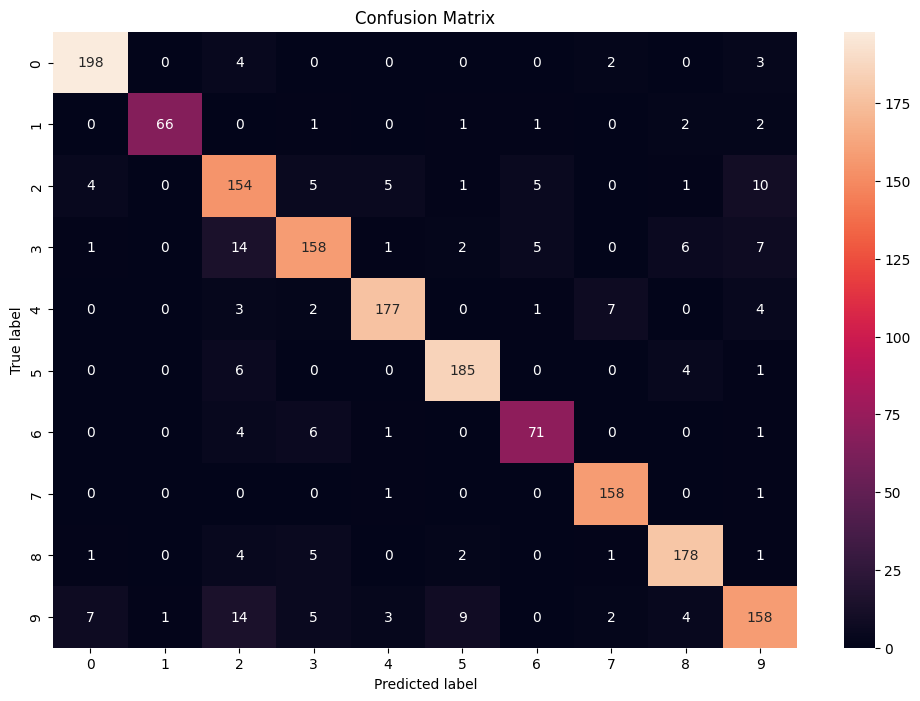

In [29]:
# Predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Classification report
print(classification_report(np.argmax(y_test, axis=1), predicted_classes))

# Confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), predicted_classes)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


In [30]:
# Save the model
# Save the model
model.save('final_audio_classification_model.h5')



In [50]:
# Load the saved model
from tensorflow.keras.models import load_model

model = load_model('final_audio_classification_model.h5')

# Load and preprocess the specific audio file
filename = '/content/194732-9-0-95.wav'
audio, sample_rate = librosa.load(filename, sr=None, res_type='kaiser_fast')

# Extract MFCC features
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)  # Reshape for prediction

# Make the prediction
predicted_label = model.predict(mfccs_scaled_features)

# Get the class with the highest probability (numeric label)
predicted_label = predicted_label.argmax(axis=1)

# Print the numeric predicted label
print(f"Predicted numeric class for {filename}: {predicted_label[0]}")

# Manually map numeric labels to class names
class_mapping = {0: 'air_conditioner', 1: 'car_horn', 2: 'children_playing', 3: 'dog_bark',
                 4: 'drilling', 5: 'engine_idling', 6: 'gun_shot', 7: 'jackhammer',
                 8: 'siren', 9: 'street_music'}

# Get the predicted class name
predicted_class_name = class_mapping[predicted_label[0]]
print(f"Predicted class for {filename}: {predicted_class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Predicted numeric class for /content/194732-9-0-95.wav: 8
Predicted class for /content/194732-9-0-95.wav: siren
